In [14]:
%matplotlib inline

import pandas as pd
from IPython.display import HTML
import numpy as np
import matplotlib.image as mimg
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import os, random, math, glob, tqdm
from base64 import b64encode
import warnings
warnings.filterwarnings('ignore')

In [15]:
class NFL:
  def __init__(self):
    """
    https://www.kaggle.com/competitions/nfl-big-data-bowl-2022/data
    """
    self.game_link = "games.csv"
    self.play_link = "plays.csv"
    self.player_link = "players.csv"
    self.track_link = "track.csv"
    self.download()

  def download(self):
    self.game = pd.read_csv(self.game_link)
    self.play = pd.read_csv(self.play_link)
    self.player = pd.read_csv(self.player_link)
    self.track = pd.read_csv(self.track_link)

  def import_pbp_data(self, ls):
    season = self.game[self.game["season"].isin(ls)]
    game = self.play[self.play["gameId"].isin(season["gameId"])]
    play = self.track
    return play

In [16]:
def modified_image(img_):
  width, height = img_.shape[0], img_.shape[1]
  # Calculate the size of the new image
  left, right = 13.05/120, (141.41-120)/120
  up, down = 7.58/53.3, (65.32-53.3)/53.3
  new_width = int(width * (1 + left + right))
  new_height = int(height * (1 + up + down))

  # Create a new image with a white background
  img = np.zeros((new_width, new_height, 3))

  # Calculate the position to paste the original image on the new image
  left = int(width * left)
  up = int(height * up)
  img[left:left+width, up:up+height, :] = img_[:, :, :]
  cv2.imwrite("img.png", img)

In [17]:
def save_play(penalty, game_id, play_id):
  nfl = NFL()
  pbp_data = nfl.import_pbp_data([2020])
  game_data = pbp_data[pbp_data["gameId"] == game_id] # Filter the data by game id
  mot = game_data[game_data["playId"] == play_id]
  img = mimg.imread('nfl.png')

  # Paste the original image onto the new image
  #mot["new_time"] = pd.to_datetime(mot["time"])
  #mot["frame"] = mot.new_time.dt.hour*60*60*1000+mot.new_time.dt.minute*60*1000+mot.new_time.dt.second*1000+mot.new_time.dt.microsecond//1000
  #65.32 -7.58
  #141.41 -13.05

  mot["new_x"] = (mot["x"]+13.05)/(141.41+13.05)*img.shape[1]
  mot["new_y"] = (mot["y"]+7.58)/(65.32+7.58)*img.shape[0]
  total_time = mot["frameId"].max()-mot["frameId"].min()
  min_time = mot["frameId"].min()
  fig, ax = plt.subplots(figsize=(12*2, 5.3*2))
  os.makedirs("animations", exist_ok=True)
  penalty_pre = penalty.split(";")[0]
  os.makedirs("animations/"+penalty_pre, exist_ok=True)
  if os.path.exists("animations/"+penalty_pre+"/"+str(game_id)+"_"+str(play_id)+".mp4"):
      return
  def animate(i):
      ax.clear()
      ax.imshow(img)
      trck = mot[mot["frameId"]==min_time+i]
      sns.scatterplot(data=trck, x="new_x", y="new_y", hue="team", s=2).legend_.remove()
      for i in range(trck.shape[0]):
        id = trck['nflId'].iloc[i]
        if not math.isnan(id):
            label = nfl.player[nfl.player["nflId"]==id].Position.values[0]
        else:
            label = "O"
        col = "green"
        if trck["team"].iloc[i]=="home":
            col="red"
        elif trck["team"].iloc[i]=="away":
            col="blue"
        ax.text(trck['new_x'].iloc[i], trck['new_y'].iloc[i], label, ha='center', va='center', color=col, weight='bold')
        theta = np.pi*(trck['o'].iloc[i]-90)/180.0
        dx = 10*trck['s'].iloc[i]*np.cos(theta)
        dy = 10*trck['s'].iloc[i]*np.sin(theta)
        ax.arrow(trck['new_x'].iloc[i], trck['new_y'].iloc[i], dx, dy)
        ax.axis('off')
  #animate(10)
  ani = animation.FuncAnimation(fig, animate, frames=total_time, interval=100)
  ani.save("animations/"+penalty_pre+"/"+str(game_id)+"_"+str(play_id)+".mp4")

In [18]:
def find_all_penalties():
  nfl = NFL()
  season = nfl.game[nfl.game["season"].isin([2020])].gameId.unique()
  penalty_mask = nfl.play[nfl.play["gameId"].isin(season)]
  penalty_plays = penalty_mask[penalty_mask["penaltyCodes"].notnull()]
  for index, row in tqdm.tqdm(penalty_plays[["gameId", "playId", "penaltyCodes"]].iterrows()):
    try:
        save_play(row.penaltyCodes, row.gameId, row.playId)
    except:
        print(row.penaltyCodes, row.gameId, row.playId)

13it [00:18,  1.43s/it]

IBW 2020091700 1324


14it [00:20,  1.43s/it]

ITK 2020092000 2010


15it [00:21,  1.43s/it]

UNR 2020092001 778


16it [00:23,  1.45s/it]

FMM 2020092001 1030


17it [00:24,  1.43s/it]

DOF 2020092002 969


18it [00:26,  1.44s/it]

UNRd 2020092002 2683


19it [00:27,  1.42s/it]

TRP 2020092003 1265


20it [00:28,  1.43s/it]

IBW 2020092004 1862


21it [00:30,  1.46s/it]

OH 2020092005 2306


22it [00:32,  1.48s/it]

ILF 2020092006 847


23it [00:33,  1.50s/it]

DOF 2020092006 3254


24it [00:35,  1.48s/it]

OH 2020092006 3405


25it [00:36,  1.47s/it]

IBW 2020092007 1589


26it [00:37,  1.45s/it]

IBW 2020092008 2769


27it [00:39,  1.47s/it]

IBW 2020092010 40


28it [00:40,  1.50s/it]

OH 2020092010 140


29it [00:42,  1.46s/it]

IDT 2020092011 2117


30it [00:43,  1.48s/it]

OH 2020092012 3362


31it [00:45,  1.47s/it]

OH 2020092013 3120


32it [00:46,  1.50s/it]

OH 2020092400 1883


33it [00:48,  1.51s/it]

OH 2020092700 3130


34it [00:49,  1.52s/it]

UNR 2020092700 4452


35it [00:51,  1.50s/it]

IBW 2020092704 3619


36it [00:52,  1.49s/it]

UNRd 2020092706 1310


37it [00:54,  1.50s/it]

UNRd 2020092708 2761


38it [00:55,  1.50s/it]

OH 2020092708 3050


39it [00:57,  1.50s/it]

OH 2020092708 3271


40it [00:58,  1.50s/it]

DOF 2020092710 1488


41it [01:00,  1.51s/it]

OH 2020092710 3173


42it [01:01,  1.49s/it]

OH 2020092711 229


43it [01:03,  1.50s/it]

IBW 2020092711 2428


44it [01:04,  1.50s/it]

DOF 2020092711 3178


45it [01:06,  1.52s/it]

IBW 2020092712 3168


46it [01:07,  1.51s/it]

UNSd 2020092713 990


47it [01:09,  1.52s/it]

POK;OH 2020100100 916


48it [01:10,  1.51s/it]

OH 2020100401 1182


49it [01:12,  1.52s/it]

UNSd 2020100401 1988


50it [01:14,  1.52s/it]

OH 2020100401 2670


51it [01:15,  1.49s/it]

IBW 2020100401 4121


52it [01:17,  1.57s/it]

POK;ILF 2020100402 2475


53it [01:18,  1.57s/it]

CHB 2020100402 2806


54it [01:20,  1.57s/it]

IBW 2020100403 3725


55it [01:21,  1.59s/it]

DOF 2020100403 4451


56it [01:23,  1.56s/it]

ILF 2020100404 3745


57it [01:25,  1.57s/it]

ILF 2020100406 995


58it [01:26,  1.55s/it]

IBW 2020100407 817


59it [01:28,  1.54s/it]

OH 2020100407 1020


60it [01:29,  1.55s/it]

ILF 2020100407 1970


61it [01:31,  1.53s/it]

IBW 2020100412 3702


62it [01:32,  1.50s/it]

FMM 2020100500 2407


63it [01:34,  1.52s/it]

IBW 2020100800 2875


64it [01:35,  1.51s/it]

DOF 2020101100 3815


65it [01:37,  1.54s/it]

OH 2020101103 546


66it [01:38,  1.52s/it]

IBW 2020101103 813


67it [01:40,  1.50s/it]

OH 2020101103 2518


68it [01:41,  1.47s/it]

OFK 2020101103 4162


69it [01:43,  1.49s/it]

RNK 2020101105 2309


70it [01:44,  1.50s/it]

IBW 2020101105 3656


71it [01:46,  1.49s/it]

IDT 2020101108 965


72it [01:47,  1.53s/it]

IBW 2020101109 122


73it [01:49,  1.52s/it]

IBW 2020101112 1876


74it [01:50,  1.53s/it]

OH 2020101200 1428


75it [01:52,  1.55s/it]

OH 2020101200 2583


76it [01:53,  1.56s/it]

OH 2020101300 1788


77it [01:55,  1.55s/it]

IDT 2020101300 2367


78it [01:56,  1.51s/it]

OH 2020101300 3116


79it [01:58,  1.49s/it]

IDT 2020101800 41


80it [01:59,  1.52s/it]

OH 2020101801 1004


81it [02:01,  1.51s/it]

OH 2020101801 2592


82it [02:03,  1.58s/it]

OFK 2020101804 3632


83it [02:04,  1.60s/it]

RNK 2020101805 3008


84it [02:06,  1.75s/it]

ILF 2020101806 1942


85it [02:09,  1.86s/it]

ILF 2020101806 3742


86it [02:10,  1.81s/it]

OH 2020101807 1315


87it [02:12,  1.81s/it]

HC 2020101811 1028


88it [02:14,  1.78s/it]

POK 2020101811 2523


89it [02:15,  1.77s/it]

KCI 2020101812 2757


90it [02:18,  1.87s/it]

OH 2020101813 209


91it [02:20,  1.96s/it]

FMM 2020101813 894


92it [02:22,  2.05s/it]

ILF 2020101813 1510


93it [02:24,  2.09s/it]

OH 2020101901 2920


94it [02:26,  2.04s/it]

UOHd 2020102200 3921


95it [02:28,  2.09s/it]

POK 2020102500 2699


96it [02:30,  1.95s/it]

ILF 2020102500 4362


97it [02:32,  1.90s/it]

OH 2020102503 537


98it [02:33,  1.82s/it]

ILH 2020102503 3082


99it [02:35,  1.81s/it]

OH 2020102506 2484


100it [02:37,  1.86s/it]

OH 2020102506 3004


101it [02:39,  1.92s/it]

DOF 2020102507 3186


102it [02:41,  1.90s/it]

RNK 2020102508 2417


103it [02:43,  1.93s/it]

OH 2020102508 3175


104it [02:45,  1.92s/it]

OH 2020102512 553


105it [02:47,  1.84s/it]

IDP 2020102512 1929


106it [02:48,  1.81s/it]

UNRd 2020102512 3007


107it [02:50,  1.73s/it]

OH 2020102512 3410


108it [02:52,  1.73s/it]

UNRd;ILF 2020102900 816


109it [02:53,  1.71s/it]

DOF 2020110102 2725


110it [02:55,  1.68s/it]

FCI;OH 2020110103 1557


111it [02:57,  1.73s/it]

TRPd 2020110103 2351


112it [02:58,  1.69s/it]

FMM 2020110105 41


113it [03:00,  1.72s/it]

DOF 2020110105 2109


114it [03:02,  1.70s/it]

OH 2020110105 3274


115it [03:03,  1.71s/it]

OH 2020110106 763


116it [03:05,  1.70s/it]

OH 2020110106 3136


117it [03:07,  1.69s/it]

WED 2020110108 809


118it [03:08,  1.66s/it]

OH;IBW 2020110110 918


119it [03:10,  1.65s/it]

IBW 2020110111 422


120it [03:12,  1.66s/it]

ILF 2020110112 2432


121it [03:14,  1.72s/it]

ILF 2020110112 4733


122it [03:15,  1.73s/it]

OH 2020110800 2714


123it [03:17,  1.72s/it]

FMM 2020110802 656


124it [03:19,  1.73s/it]

OH 2020110802 1773


125it [03:20,  1.72s/it]

UNR 2020110804 3323


126it [03:22,  1.76s/it]

OFK 2020110804 3353


127it [03:24,  1.72s/it]

ITK 2020110804 3603


128it [03:26,  1.68s/it]

OH 2020110805 1905


129it [03:28,  1.78s/it]

UNRd 2020110805 3219


130it [03:30,  2.04s/it]

OH 2020110805 3456


131it [03:32,  1.92s/it]

UNRd 2020110808 651


132it [03:34,  1.91s/it]

IBW 2020110809 3367


133it [03:36,  1.89s/it]

IBW 2020110810 1270


134it [03:38,  1.92s/it]

OH 2020110900 894


135it [03:39,  1.89s/it]

IDT 2020110900 1984


136it [03:41,  1.93s/it]

DOF 2020111200 2164


137it [03:44,  2.04s/it]

DOF 2020111500 3461


138it [03:46,  2.03s/it]

UNRd 2020111500 3864


139it [03:48,  1.99s/it]

OH 2020111501 1946


140it [03:49,  1.93s/it]

OH 2020111502 3905


141it [03:51,  1.90s/it]

IBW 2020111503 718


142it [03:53,  1.80s/it]

IBW 2020111503 3389


143it [03:54,  1.73s/it]

OH 2020111504 953


144it [03:57,  1.91s/it]

IBW 2020111504 2213


145it [03:58,  1.80s/it]

OH 2020111506 4183


146it [04:00,  1.78s/it]

IDT 2020111507 40


147it [04:02,  1.78s/it]

OH 2020111507 143


148it [04:04,  1.81s/it]

IBB 2020111507 1107


149it [04:05,  1.77s/it]

UNRd 2020111511 148


150it [04:07,  1.69s/it]

OH 2020111511 3015


151it [04:08,  1.68s/it]

IBW 2020111512 179


152it [04:10,  1.64s/it]

UNSd 2020111900 803


153it [04:12,  1.67s/it]

OH 2020112200 3329


154it [04:13,  1.70s/it]

OH 2020112201 445


155it [04:15,  1.68s/it]

DOF 2020112203 2095


156it [04:17,  1.66s/it]

OH 2020112203 2408


157it [04:18,  1.62s/it]

OH 2020112210 215


158it [04:20,  1.62s/it]

IDT 2020112210 2116


159it [04:22,  1.63s/it]

OH 2020112210 3024


160it [04:23,  1.66s/it]

IBB 2020112211 1708


161it [04:25,  1.66s/it]

OH 2020112211 2323


162it [04:27,  1.72s/it]

OH 2020112212 4173


163it [04:29,  1.77s/it]

OH 2020112900 1306


164it [04:30,  1.73s/it]

IDT 2020112900 3162


165it [04:32,  1.70s/it]

OH 2020112900 3576


166it [04:34,  1.69s/it]

DSQd 2020112903 2140


167it [04:35,  1.69s/it]

UNRd 2020112905 145


168it [04:37,  1.65s/it]

IBW 2020112905 674


169it [04:38,  1.65s/it]

OH 2020112905 1258


170it [04:40,  1.61s/it]

DOF 2020112905 4320


171it [04:41,  1.57s/it]

IBB 2020112906 2142


172it [04:43,  1.55s/it]

IBW 2020112907 1746


173it [04:44,  1.52s/it]

OFK 2020113000 4261


174it [04:46,  1.53s/it]

OH 2020120200 216


175it [04:48,  1.59s/it]

OH 2020120200 2011


176it [04:49,  1.56s/it]

IBW 2020120200 2512


177it [04:52,  1.95s/it]

OH 2020120600 123


178it [04:54,  1.98s/it]

IBW 2020120602 2726


179it [04:56,  1.91s/it]

OH 2020120602 3734


180it [04:57,  1.82s/it]

IBW 2020120603 270


181it [04:59,  1.72s/it]

OH 2020120603 1188


182it [05:01,  1.71s/it]

UNRd 2020120603 2737


183it [05:03,  1.85s/it]

OH 2020120604 689


184it [05:05,  2.01s/it]

IBW 2020120604 2652


185it [05:07,  2.00s/it]

OH 2020120604 4746


186it [05:09,  1.94s/it]

UNRd 2020120605 2610


187it [05:11,  1.89s/it]

OH 2020120607 1306


188it [05:12,  1.81s/it]

IBW;OH 2020120607 3548


189it [05:14,  1.78s/it]

IBW 2020120608 510


190it [05:16,  1.78s/it]

IBW 2020120608 3532


191it [05:19,  2.04s/it]

OH 2020120609 1183


192it [05:23,  2.72s/it]

IBW 2020120610 1090


193it [05:25,  2.57s/it]

OH 2020120610 1250


194it [05:27,  2.36s/it]

OFK 2020120610 3464


195it [05:30,  2.47s/it]

OH 2020120611 2175


196it [05:31,  2.29s/it]

IBW 2020120702 378


197it [05:33,  2.10s/it]

OH 2020120702 604


198it [05:36,  2.22s/it]

OH 2020120702 842


199it [05:38,  2.11s/it]

ILF 2020120702 2334


200it [05:39,  1.97s/it]

DOF 2020120702 4443


201it [05:41,  1.87s/it]

OH 2020120800 1791


202it [05:42,  1.78s/it]

OH 2020120800 2194


203it [05:44,  1.76s/it]

DOF 2020120800 3823


204it [05:46,  1.74s/it]

OH 2020121000 3438


205it [05:47,  1.72s/it]

IDK 2020121300 186


206it [05:49,  1.71s/it]

OH 2020121300 3782


207it [05:51,  1.69s/it]

OH 2020121301 3661


208it [05:52,  1.64s/it]

UNR 2020121304 832


209it [05:54,  1.61s/it]

UNRd 2020121304 2369


210it [05:56,  1.75s/it]

RNK 2020121304 2908


211it [05:58,  1.87s/it]

IBW 2020121306 636


212it [06:00,  1.80s/it]

DOF 2020121308 3149


213it [06:02,  1.82s/it]

OH 2020121309 2588


214it [06:03,  1.80s/it]

OH 2020121309 3292


215it [06:05,  1.80s/it]

IBW 2020121310 2075


216it [06:07,  1.92s/it]

UNSd 2020121311 4083


217it [06:09,  1.84s/it]

OH 2020121313 141


218it [06:11,  1.97s/it]

IBW 2020121313 2577


219it [06:13,  1.84s/it]

IBW 2020121900 1506


220it [06:14,  1.78s/it]

OH 2020121900 3023


221it [06:16,  1.80s/it]

OH 2020121901 3893


222it [06:19,  1.93s/it]

OH 2020122005 3787


223it [06:20,  1.93s/it]

IDK 2020122006 3262


224it [06:22,  1.88s/it]

ILF 2020122006 3769


225it [06:24,  1.80s/it]

IBW 2020122009 2107


226it [06:25,  1.73s/it]

POK;UNR 2020122009 2728


227it [06:27,  1.69s/it]

UNR 2020122009 3218


228it [06:29,  1.72s/it]

OH 2020122010 2767


229it [06:31,  1.76s/it]

TAU 2020122600 2547


230it [06:33,  1.81s/it]

IBW 2020122600 2768


231it [06:34,  1.82s/it]

OH 2020122602 899


232it [06:36,  1.82s/it]

OH 2020122602 2656


233it [06:38,  1.81s/it]

OH 2020122702 193


234it [06:40,  1.81s/it]

OH 2020122702 3477


235it [06:42,  1.78s/it]

DOF 2020122704 886


236it [06:43,  1.73s/it]

IBW;OH 2020122705 781


237it [06:45,  1.67s/it]

OH 2020122706 2718


238it [06:46,  1.65s/it]

UNS 2020122707 1492


239it [06:48,  1.63s/it]

UOHd 2020122707 2312


240it [06:50,  1.72s/it]

UOHd 2020122707 2476


241it [06:52,  1.76s/it]

UNRd 2020122707 2945


242it [06:54,  1.82s/it]

DTM;DOF 2020122707 3197


243it [06:55,  1.84s/it]

OH 2020122709 988


244it [06:58,  1.90s/it]

IBW 2020122709 1394


245it [07:01,  2.24s/it]

IBW;OH 2020122709 1503


246it [07:02,  2.12s/it]

OH 2020122709 2319


247it [07:04,  2.05s/it]

DOF 2020122710 1600


248it [07:06,  2.00s/it]

IDT 2020122711 41


249it [07:08,  1.90s/it]

OH 2020122711 4034


250it [07:09,  1.81s/it]

IBW 2020122800 1750


251it [07:11,  1.73s/it]

OH 2020122800 3234


252it [07:13,  1.74s/it]

IBW 2021010303 507


253it [07:15,  1.76s/it]

IBW 2021010305 371


254it [07:16,  1.78s/it]

OH 2021010306 2329


255it [07:18,  1.75s/it]

IBW 2021010307 1131


256it [07:20,  1.74s/it]

OH 2021010307 2270


257it [07:21,  1.71s/it]

OH 2021010308 1079


258it [07:23,  1.78s/it]

OFK 2021010308 2029


259it [07:25,  1.79s/it]

OH 2021010309 2935


260it [07:27,  1.87s/it]

UNRd 2021010310 930


261it [07:29,  1.84s/it]

UNR 2021010311 3782


262it [07:31,  1.84s/it]

DOF 2021010311 3900


263it [07:33,  1.91s/it]

ILF 2021010312 3758


264it [07:36,  2.13s/it]

OH 2021010312 3785


265it [07:38,  1.73s/it]

IBW 2021010315 1359


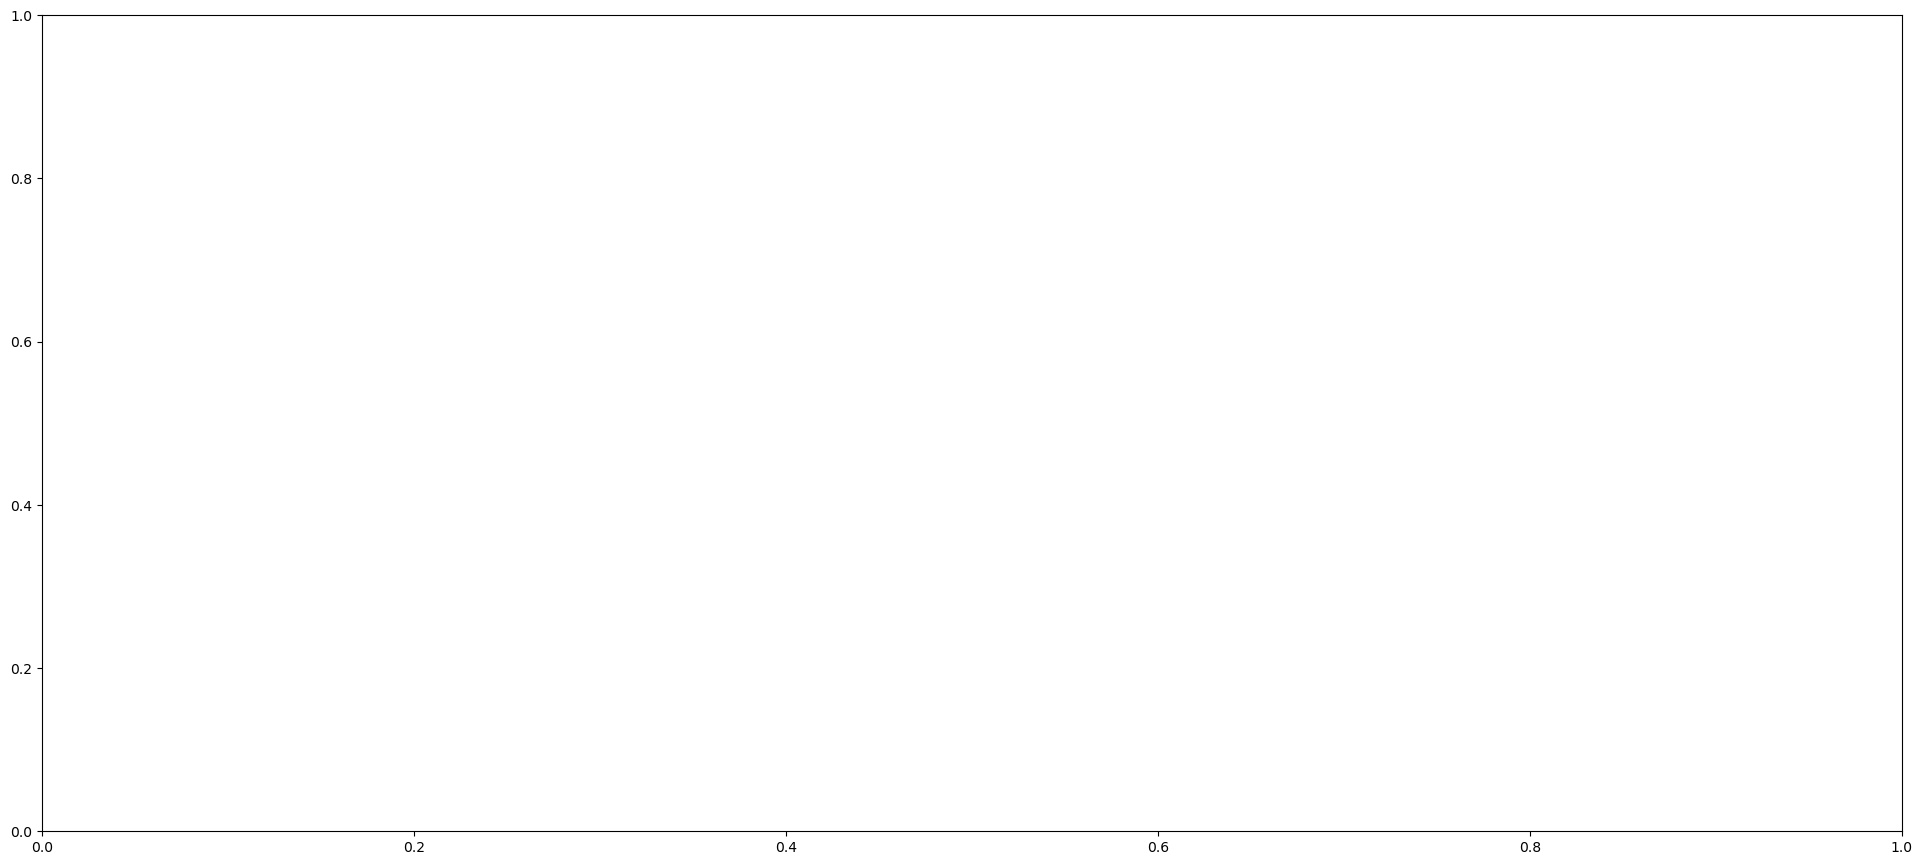

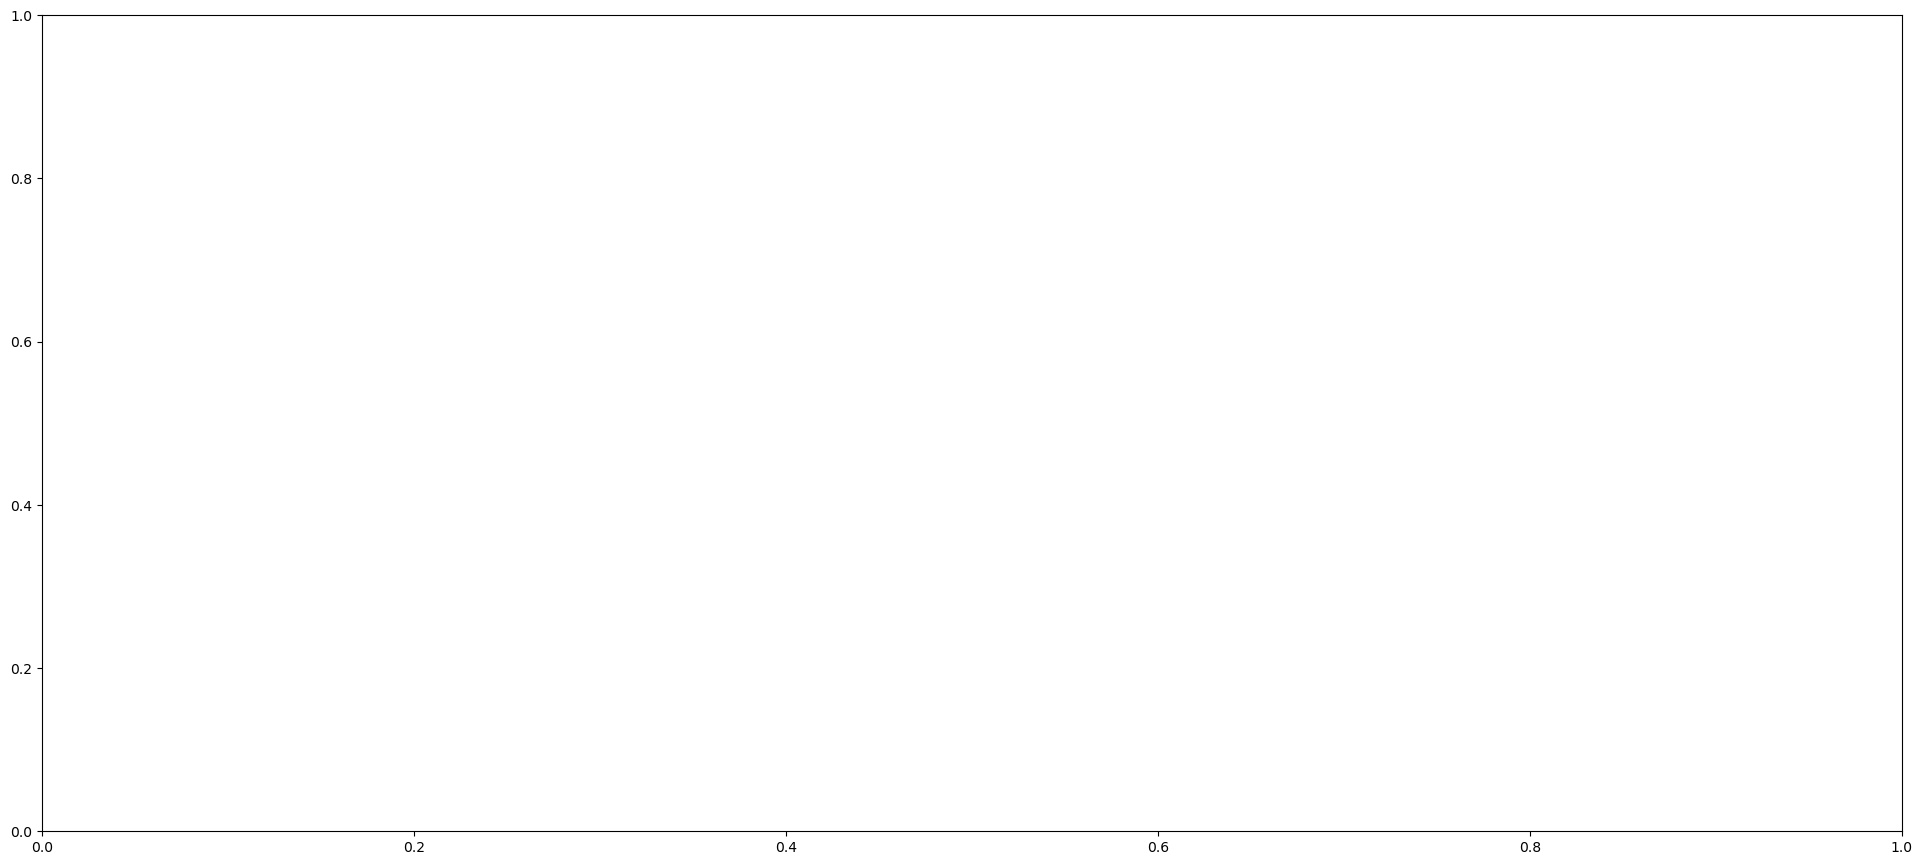

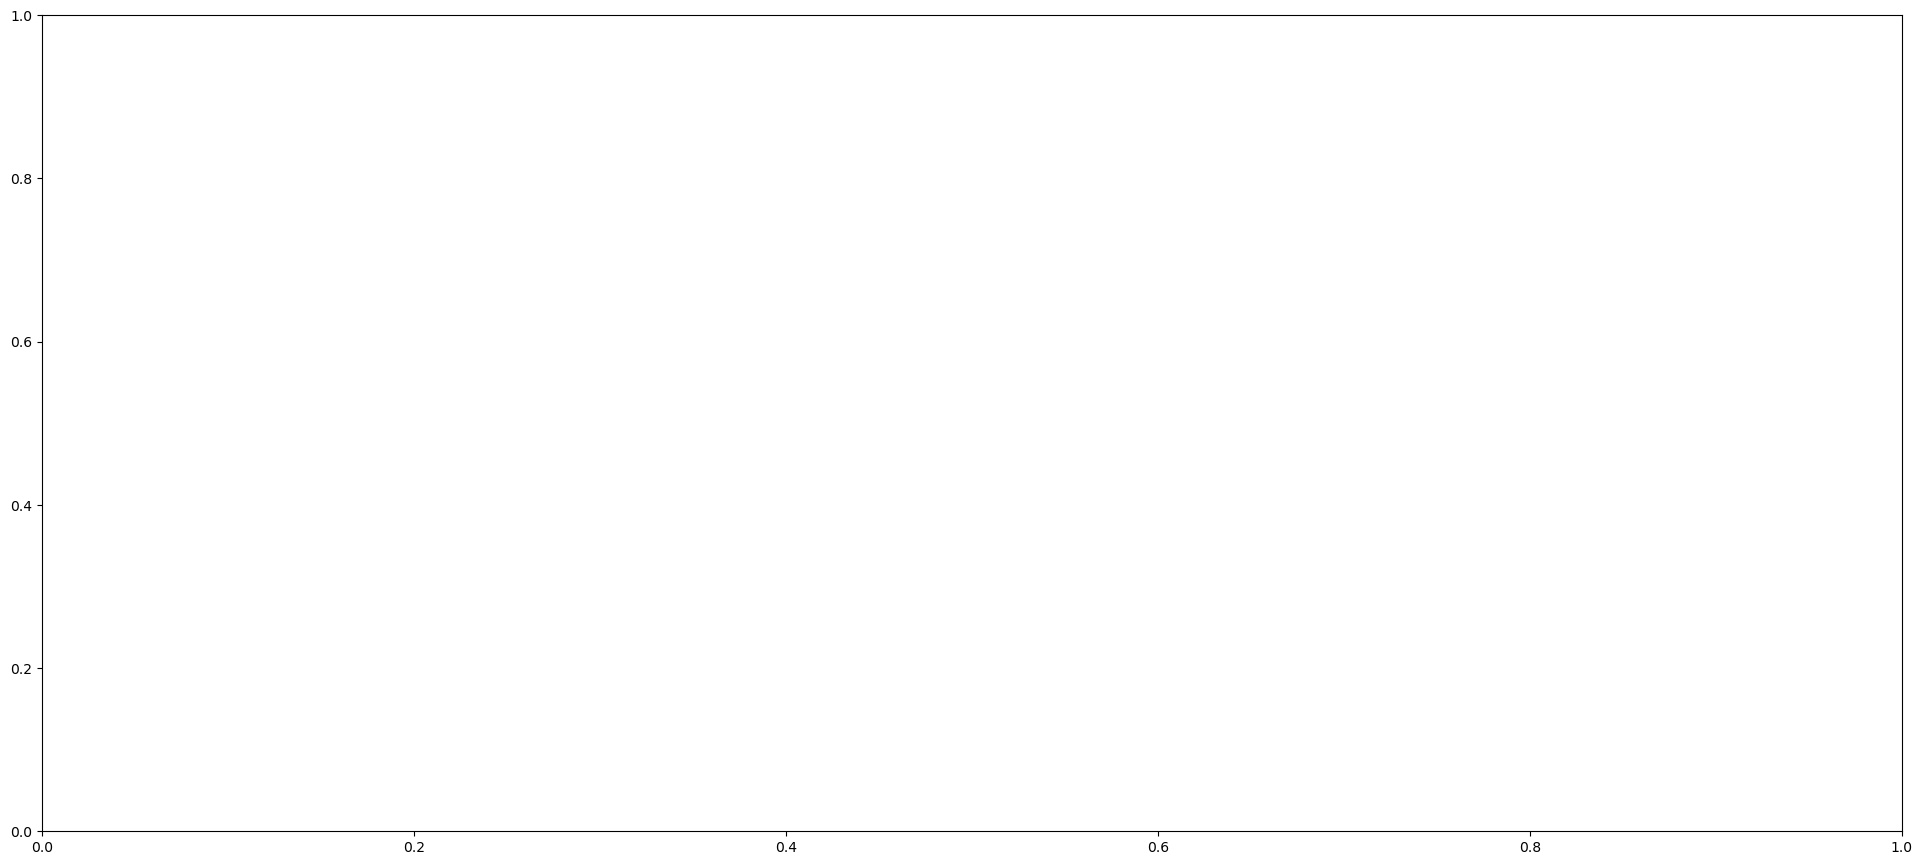

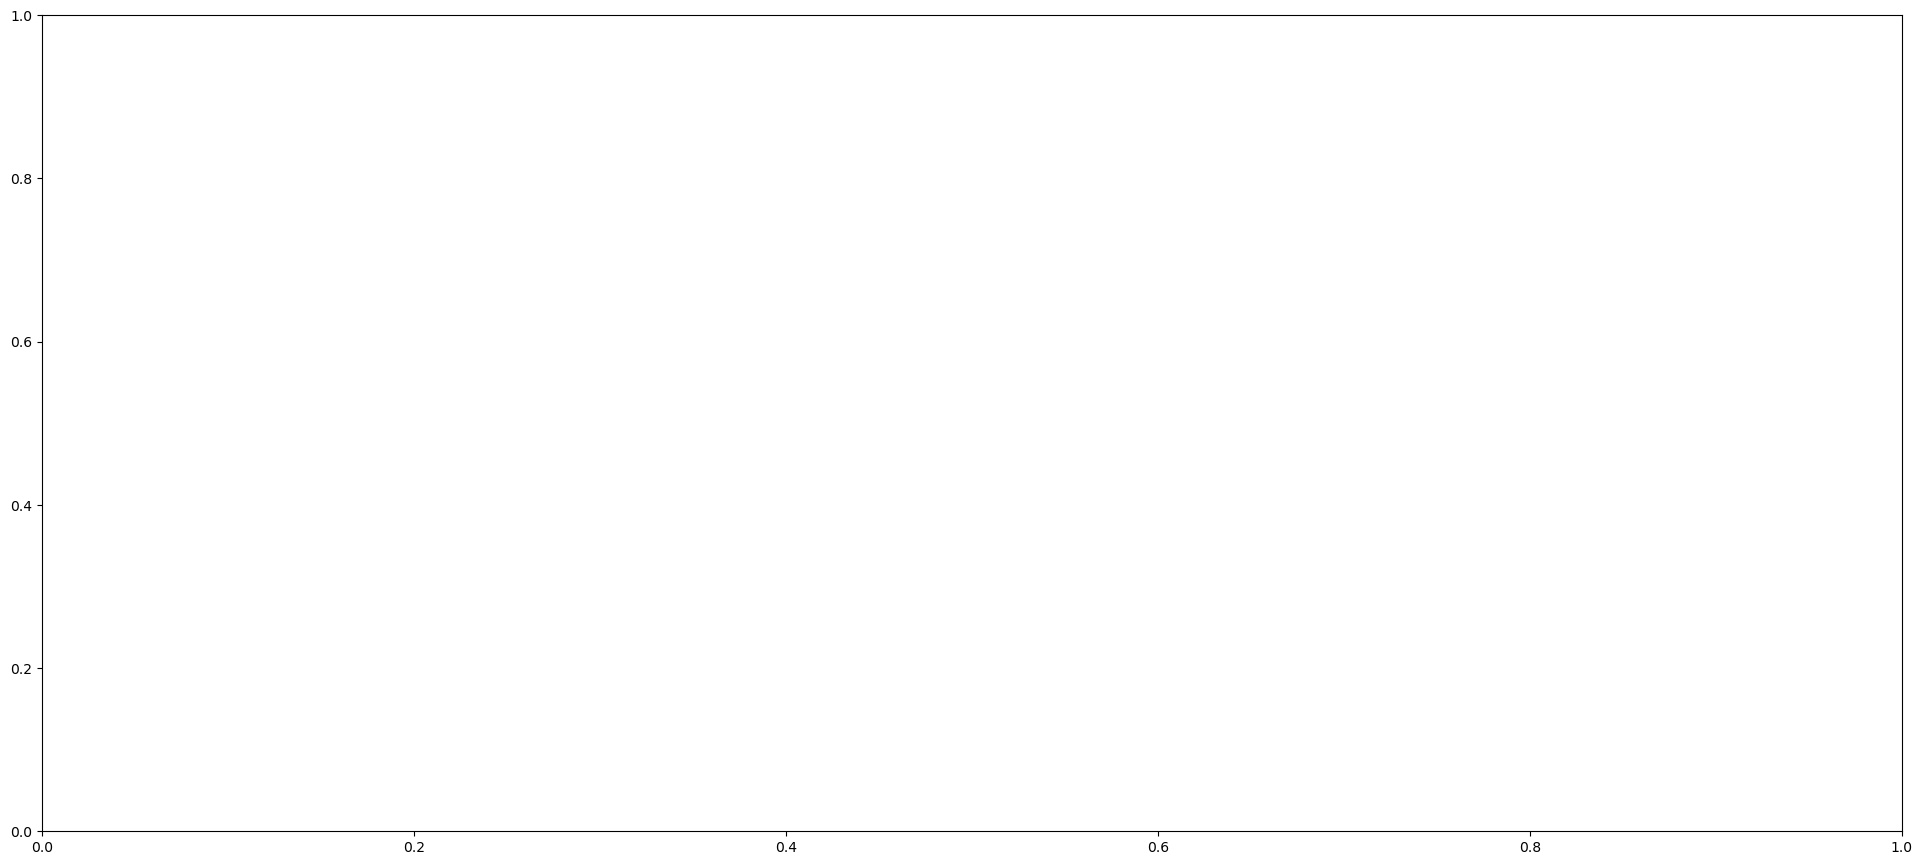

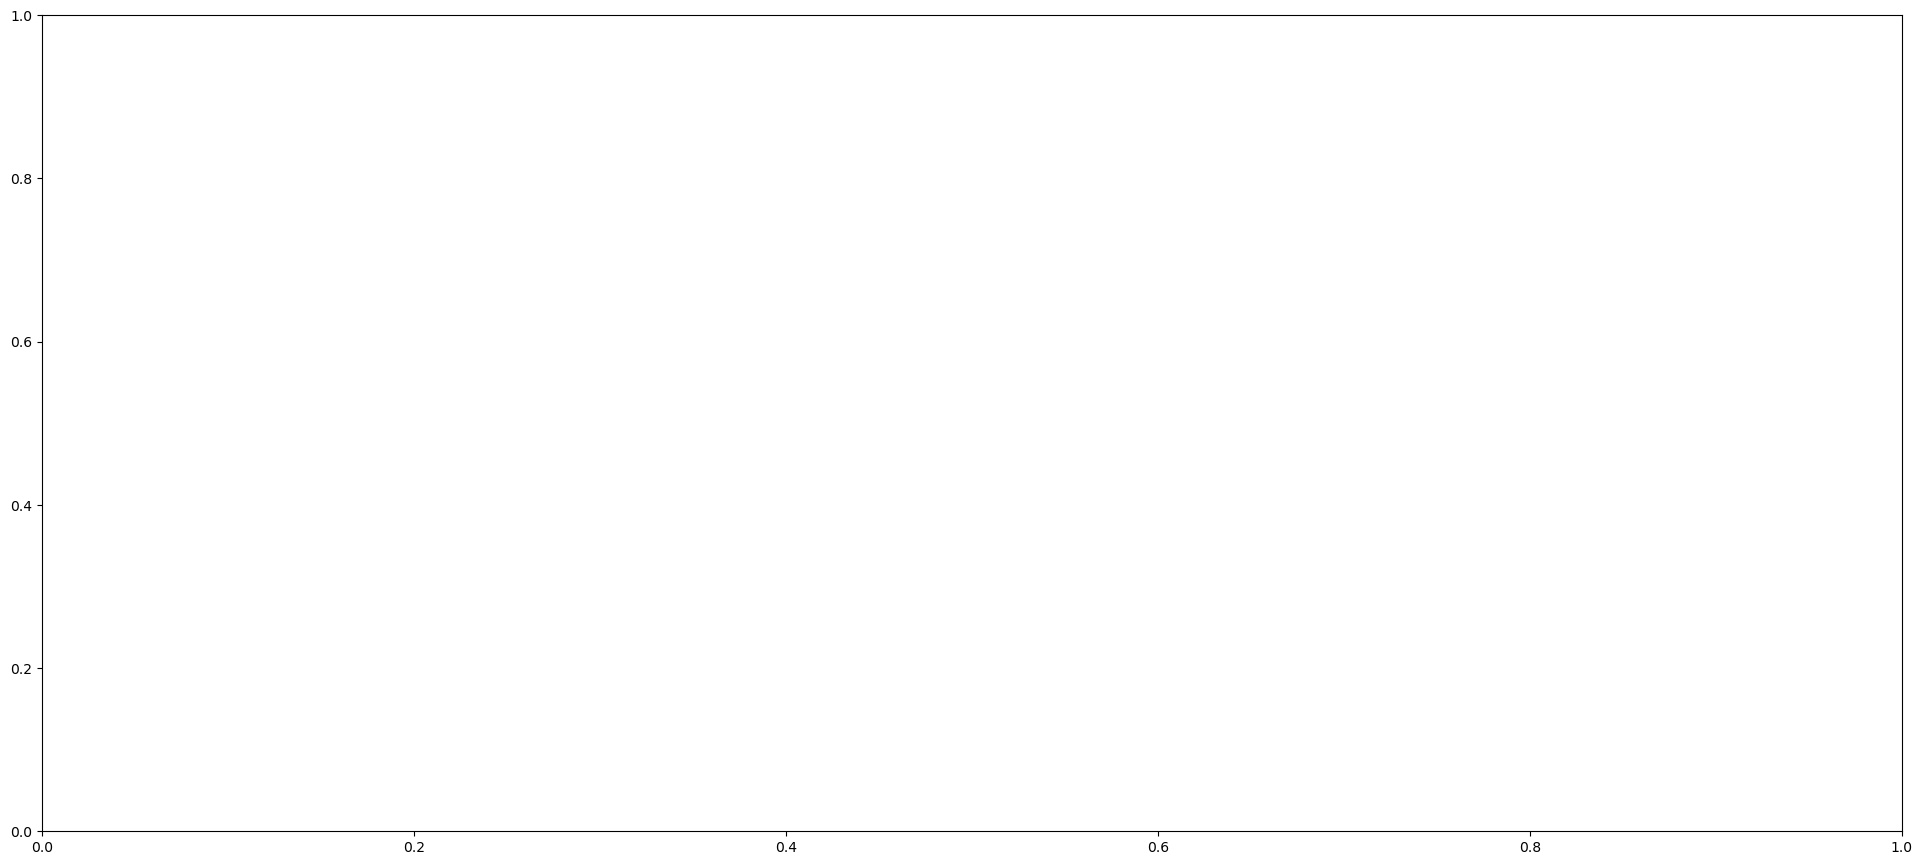

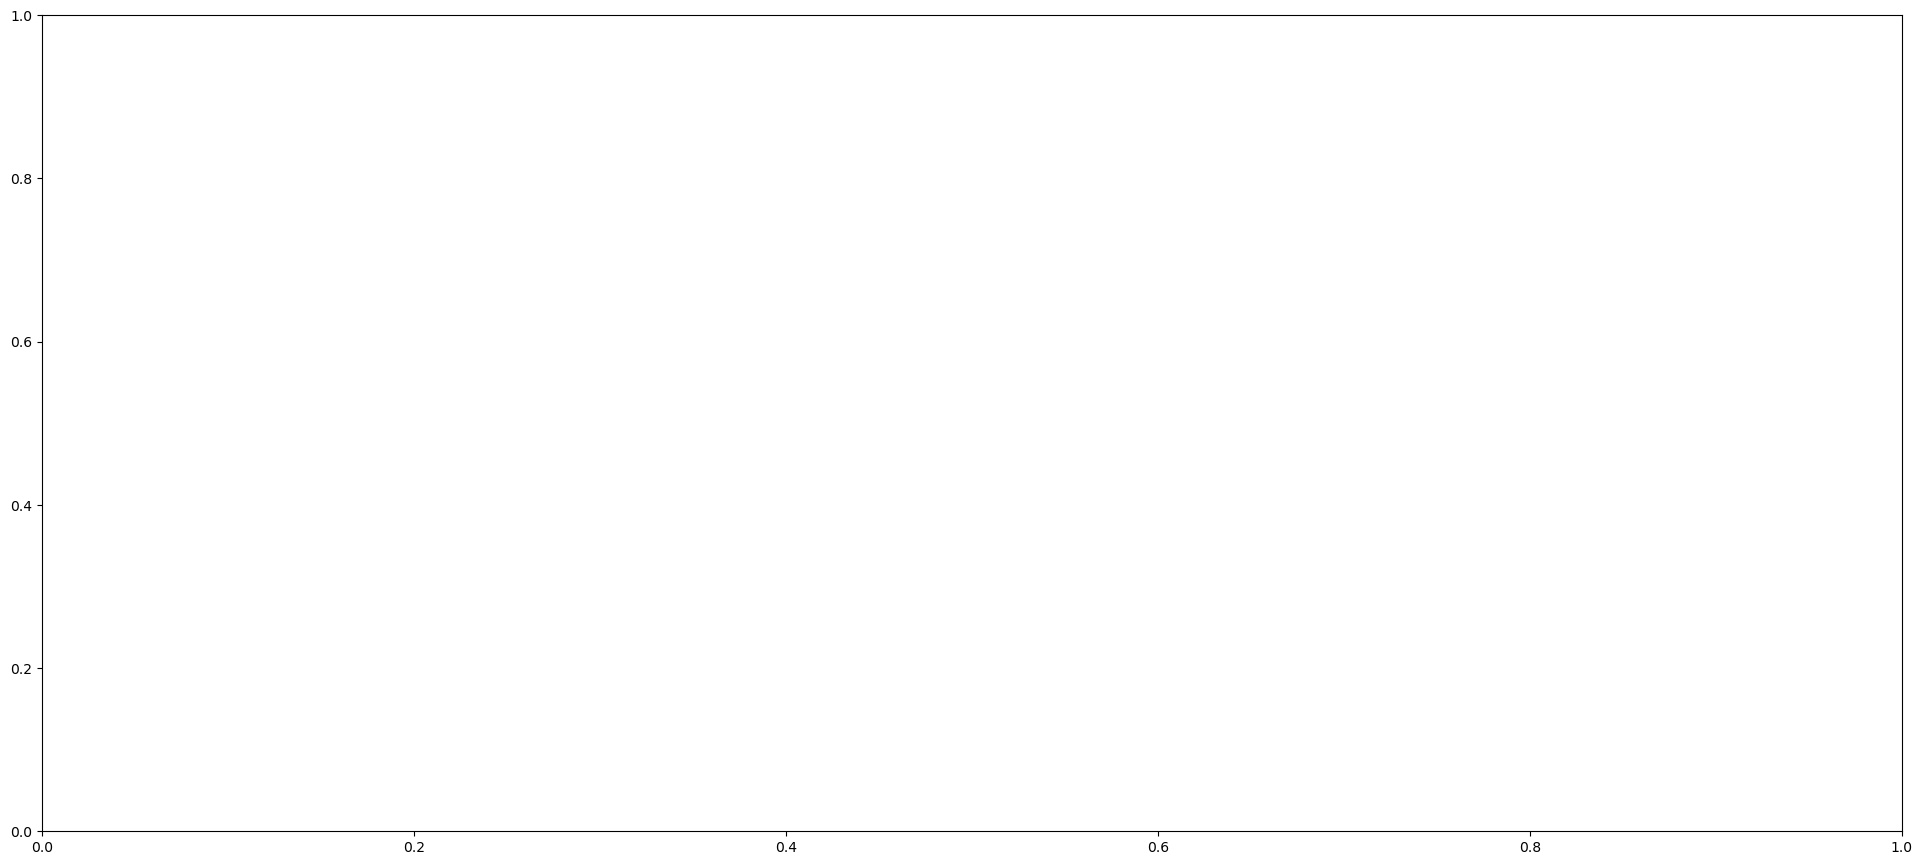

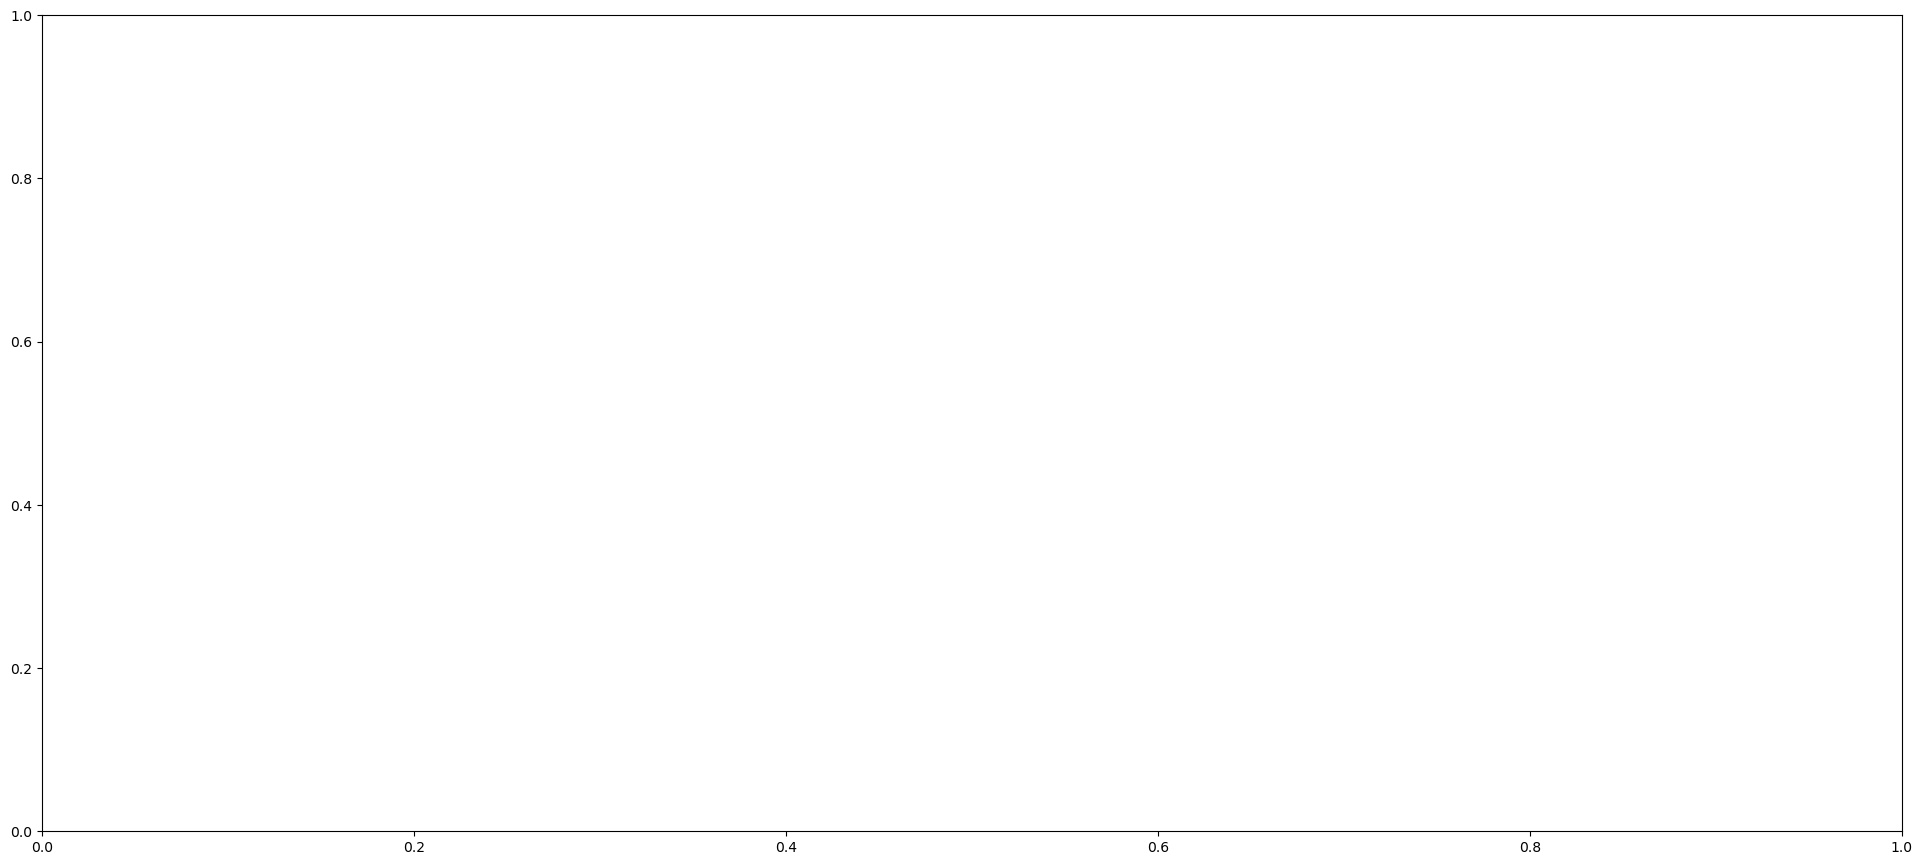

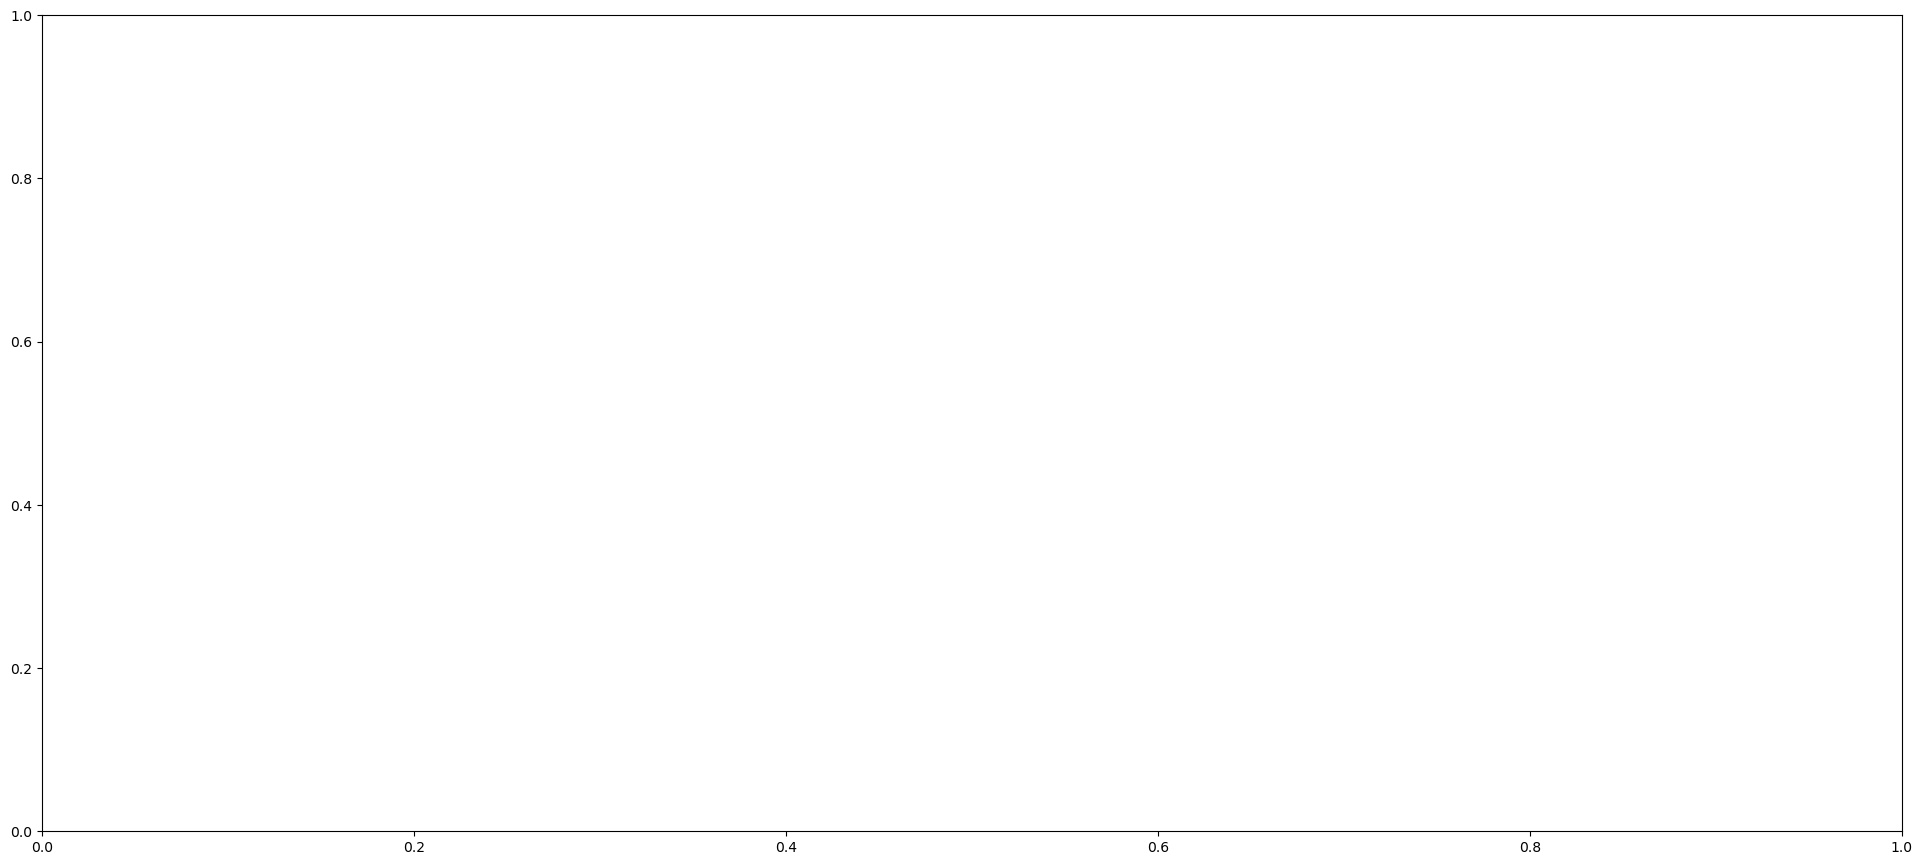

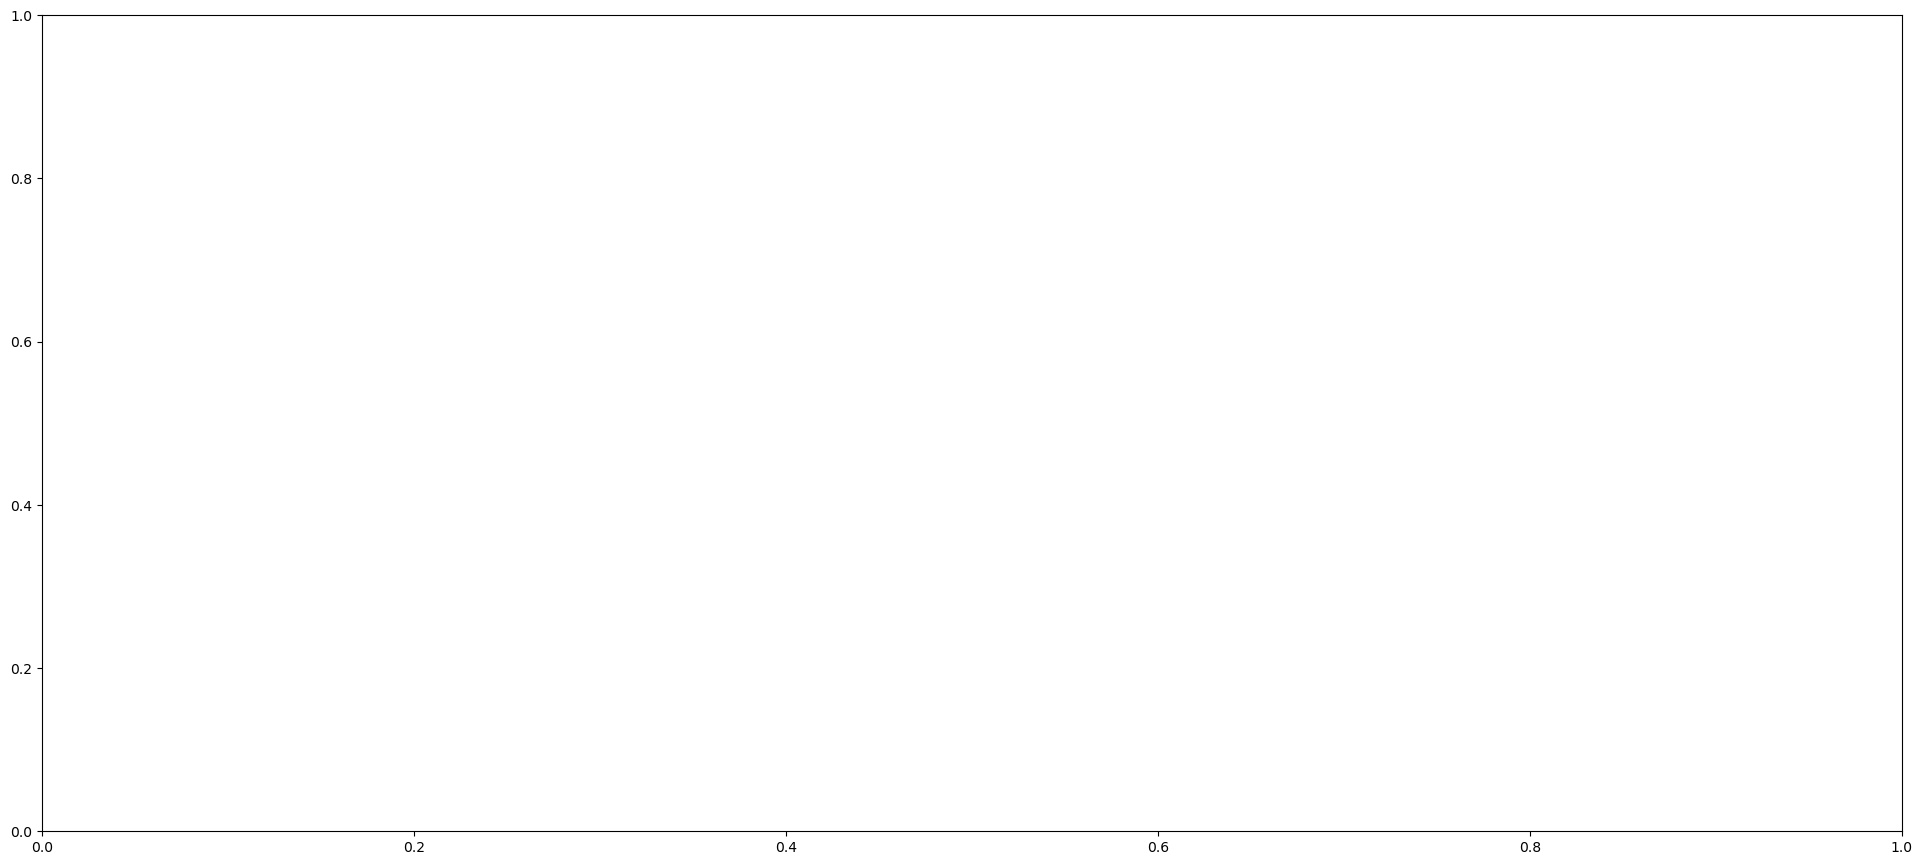

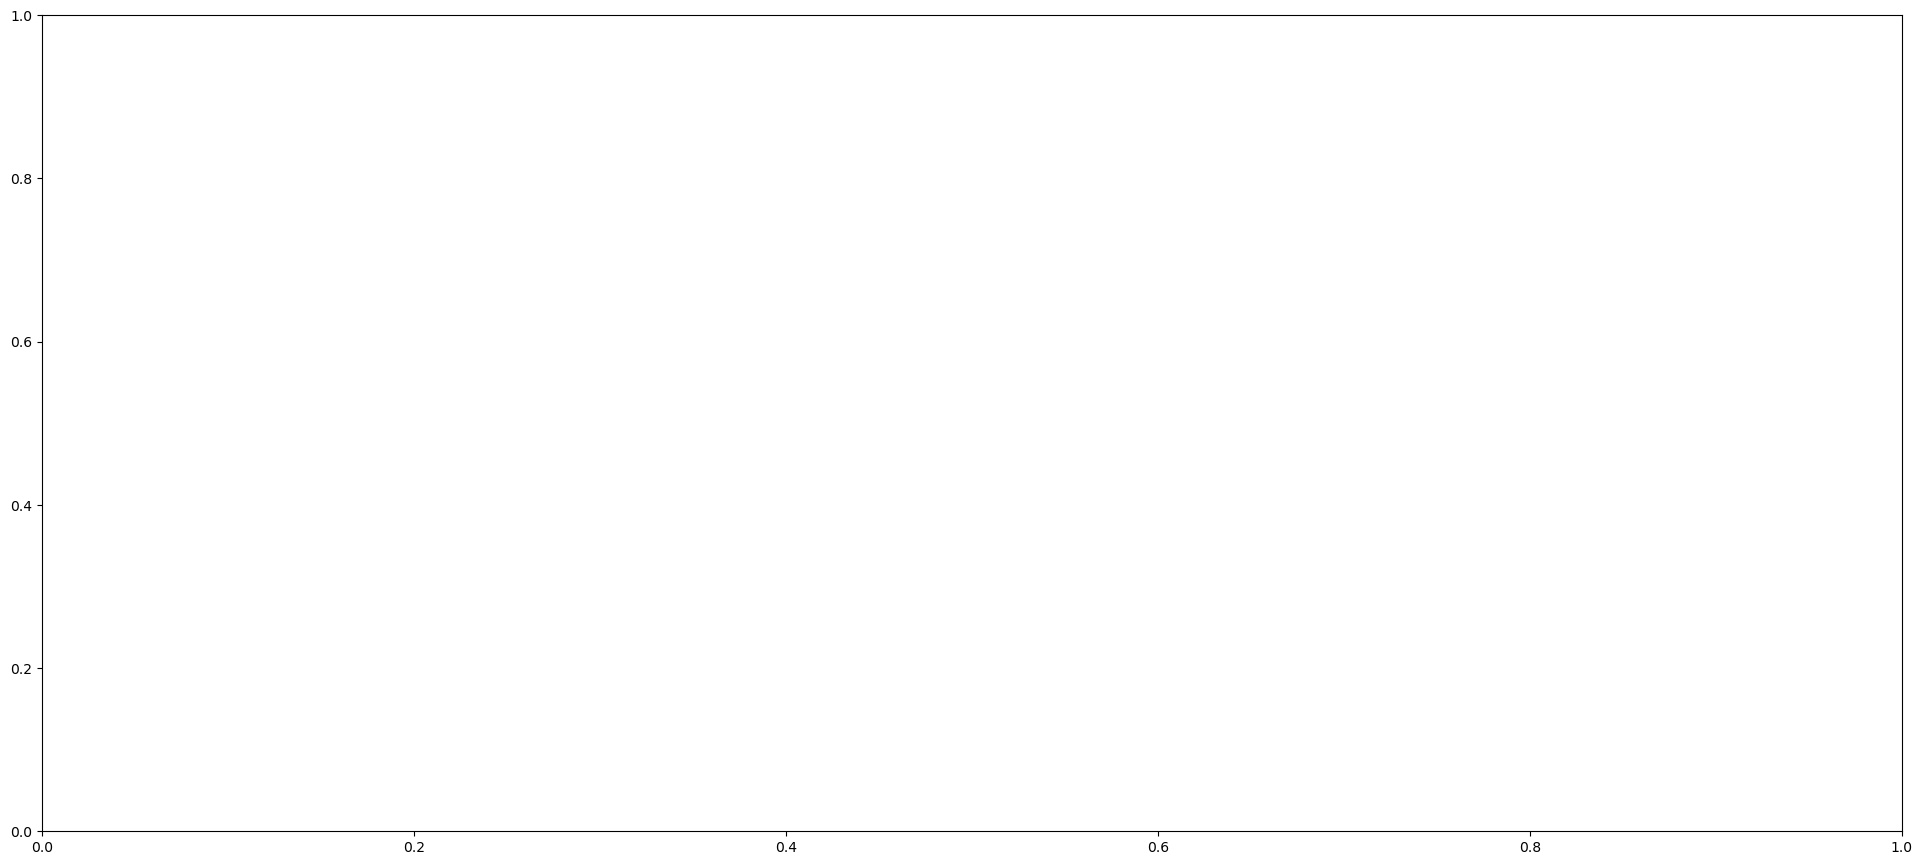

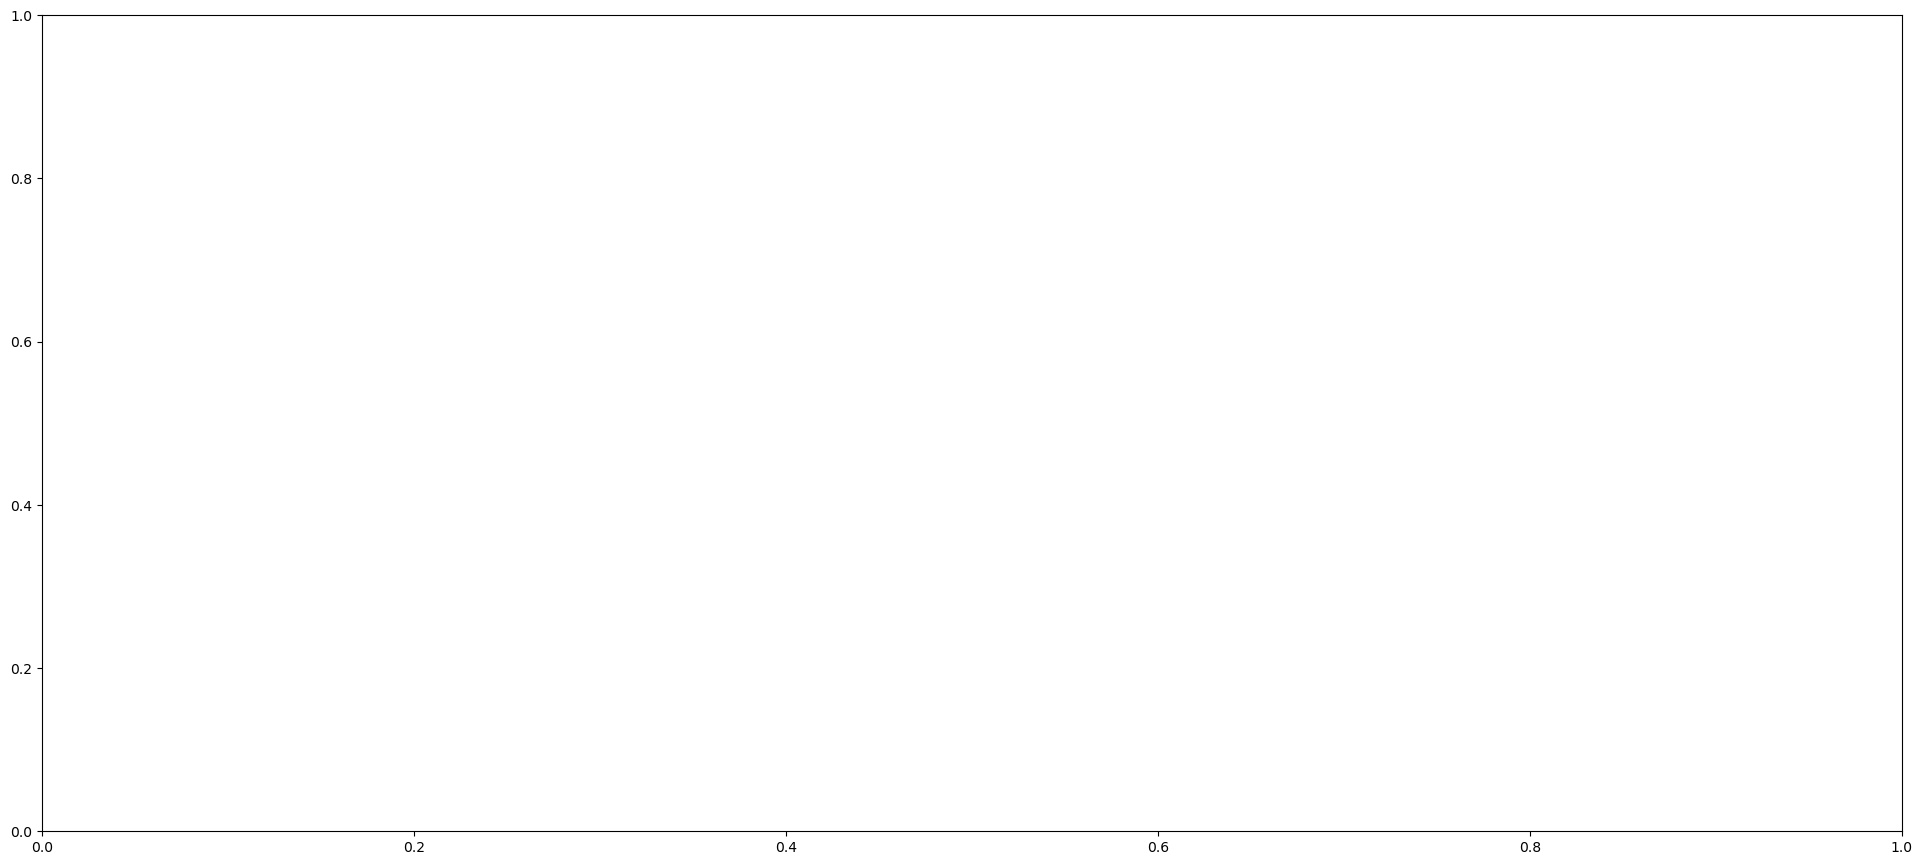

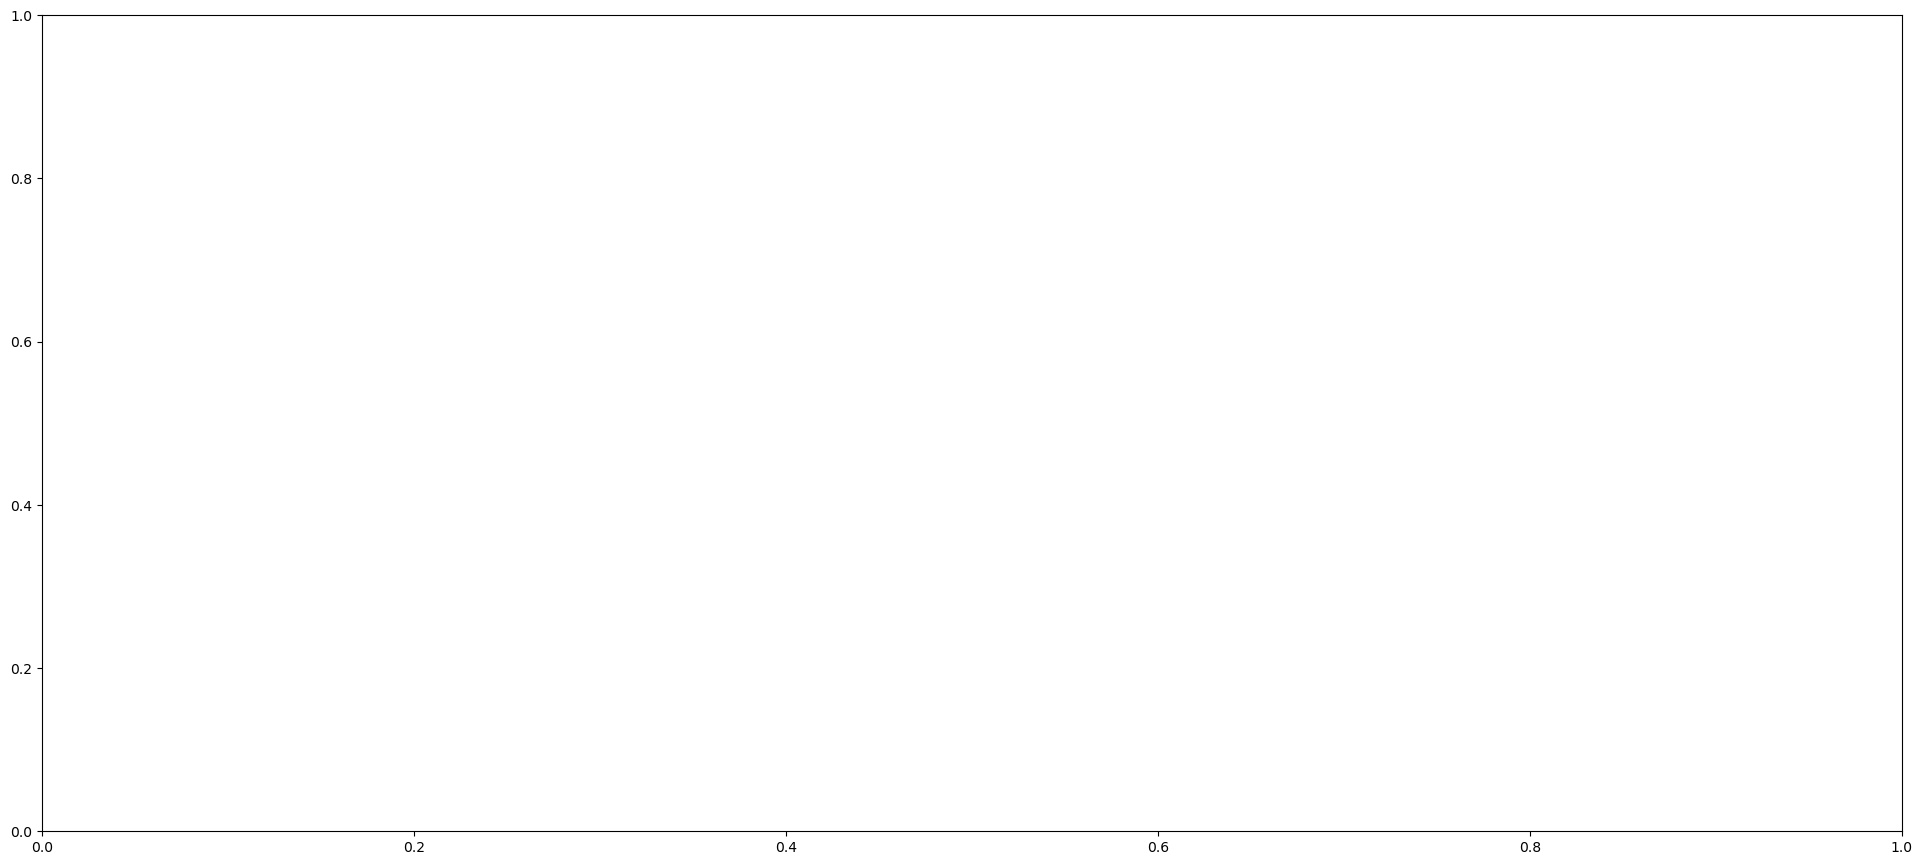

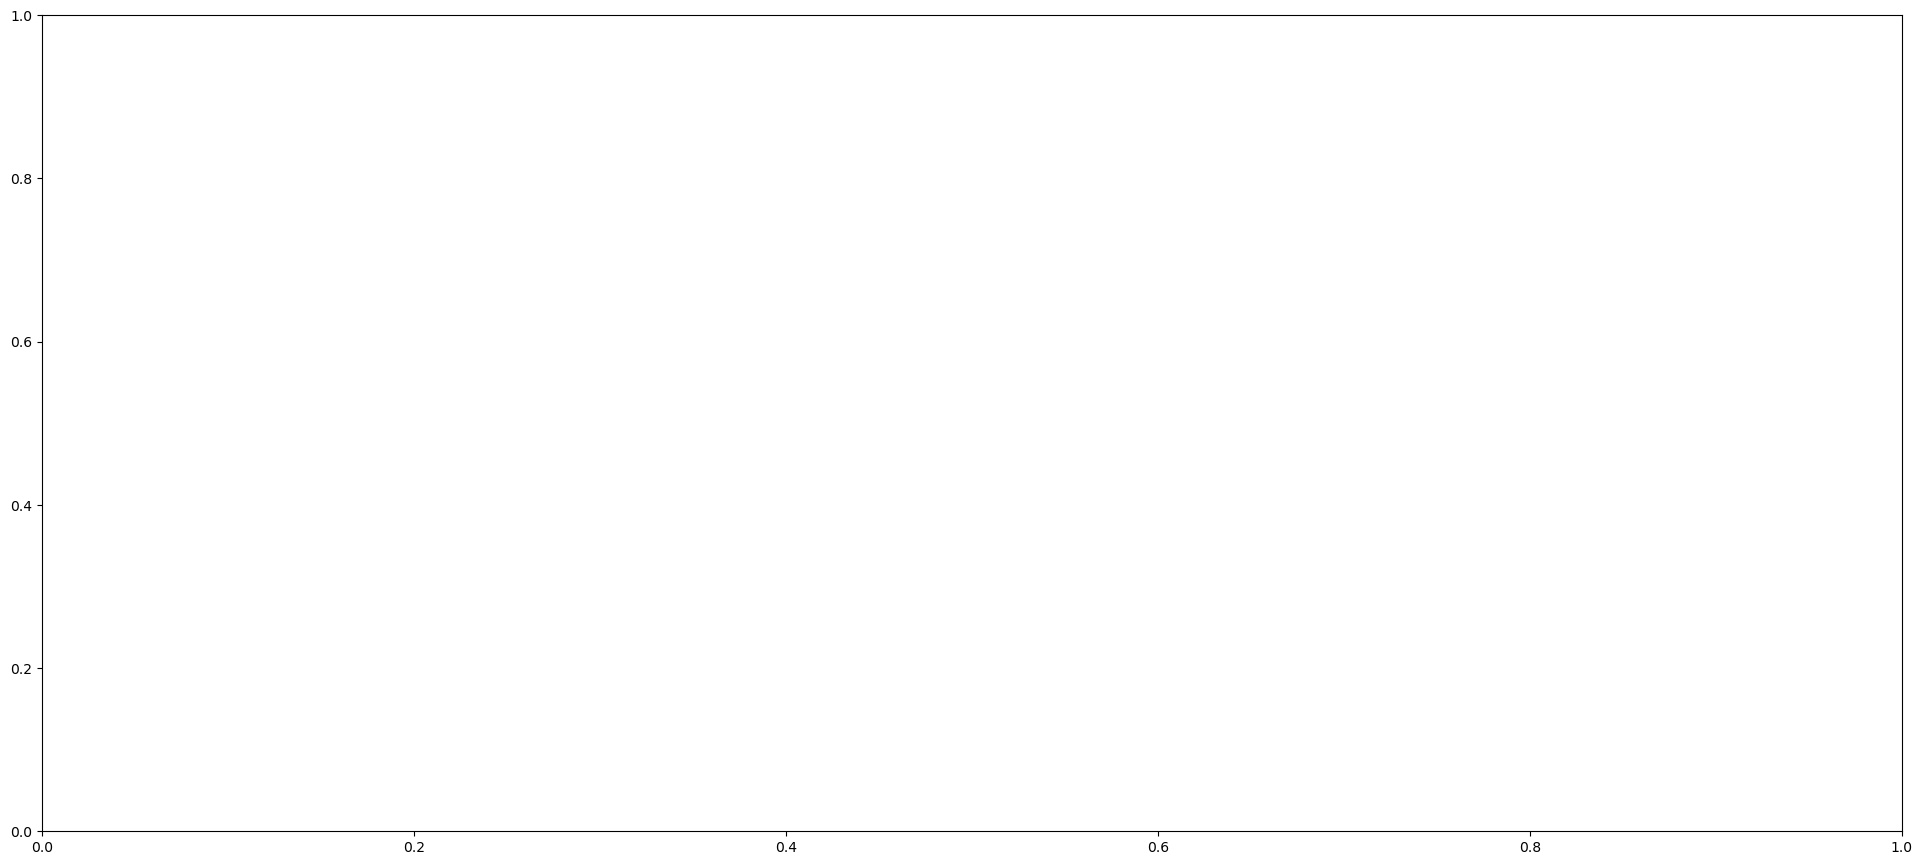

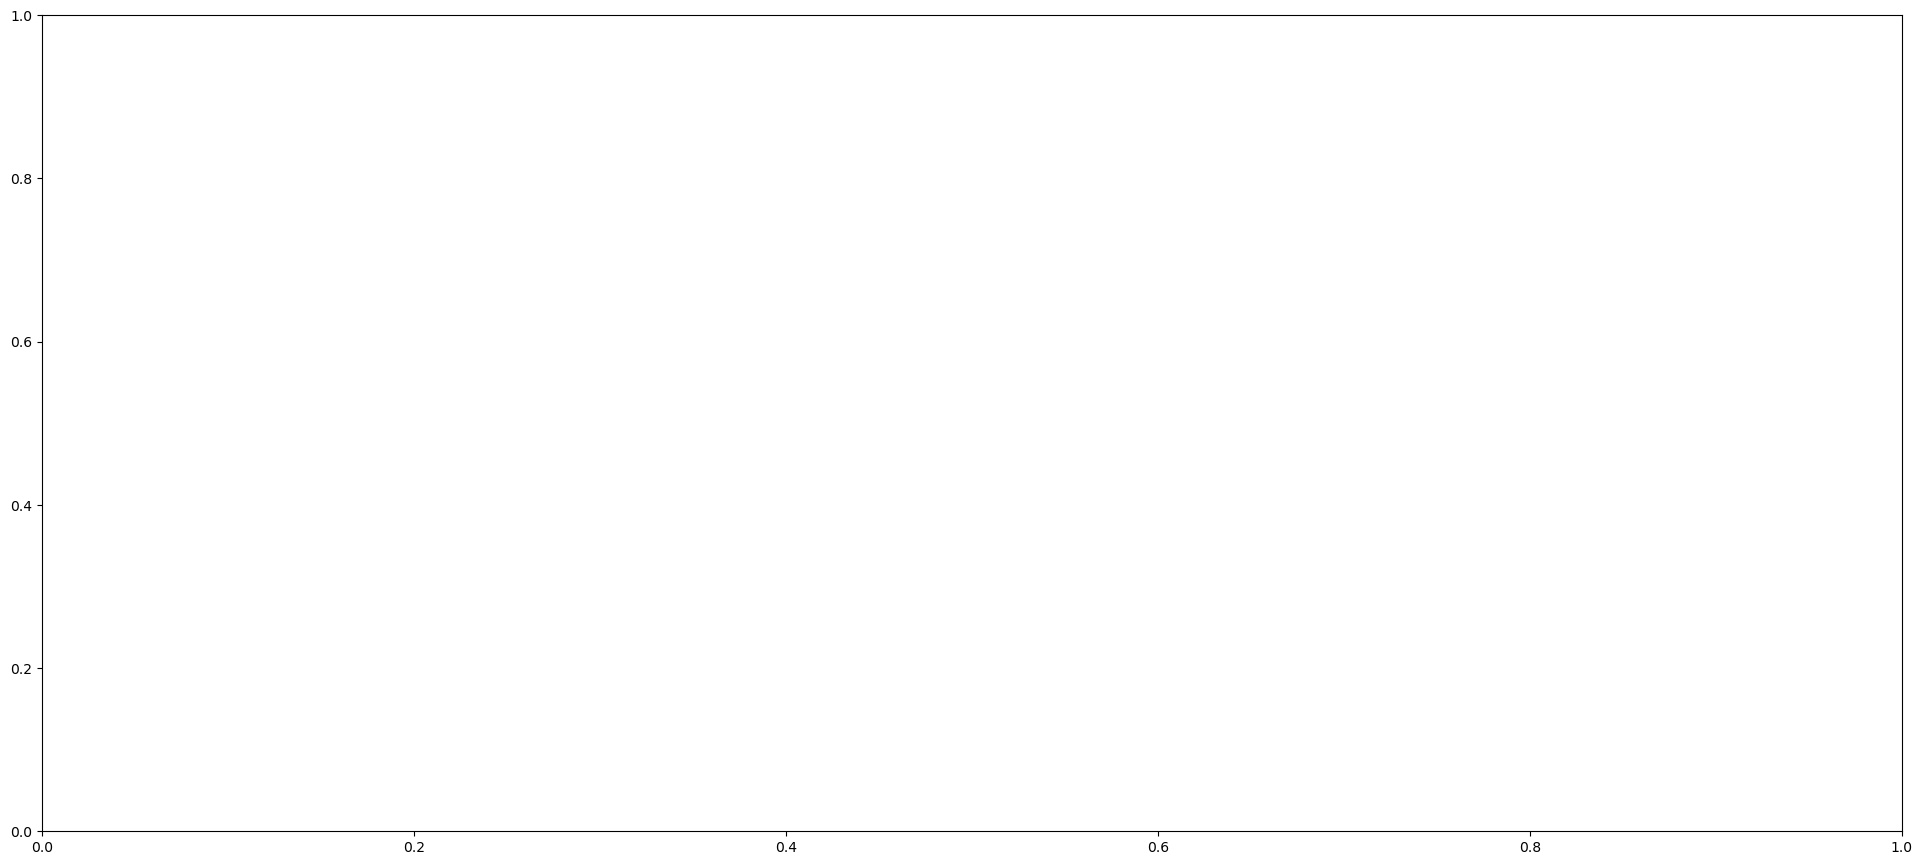

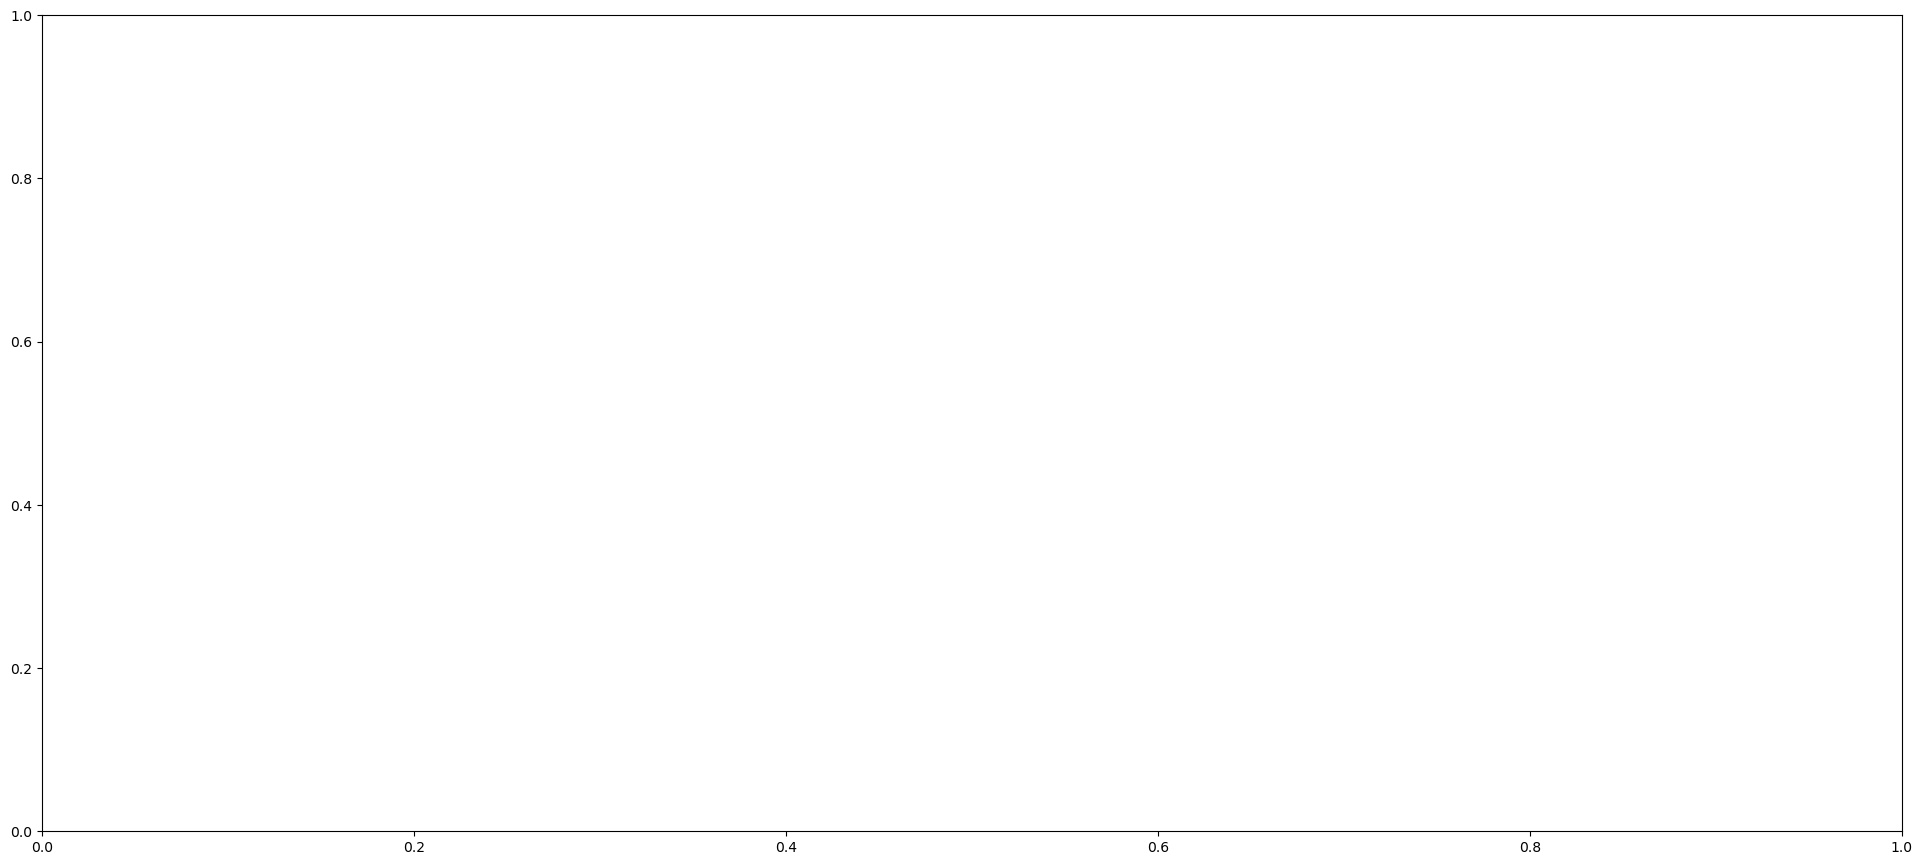

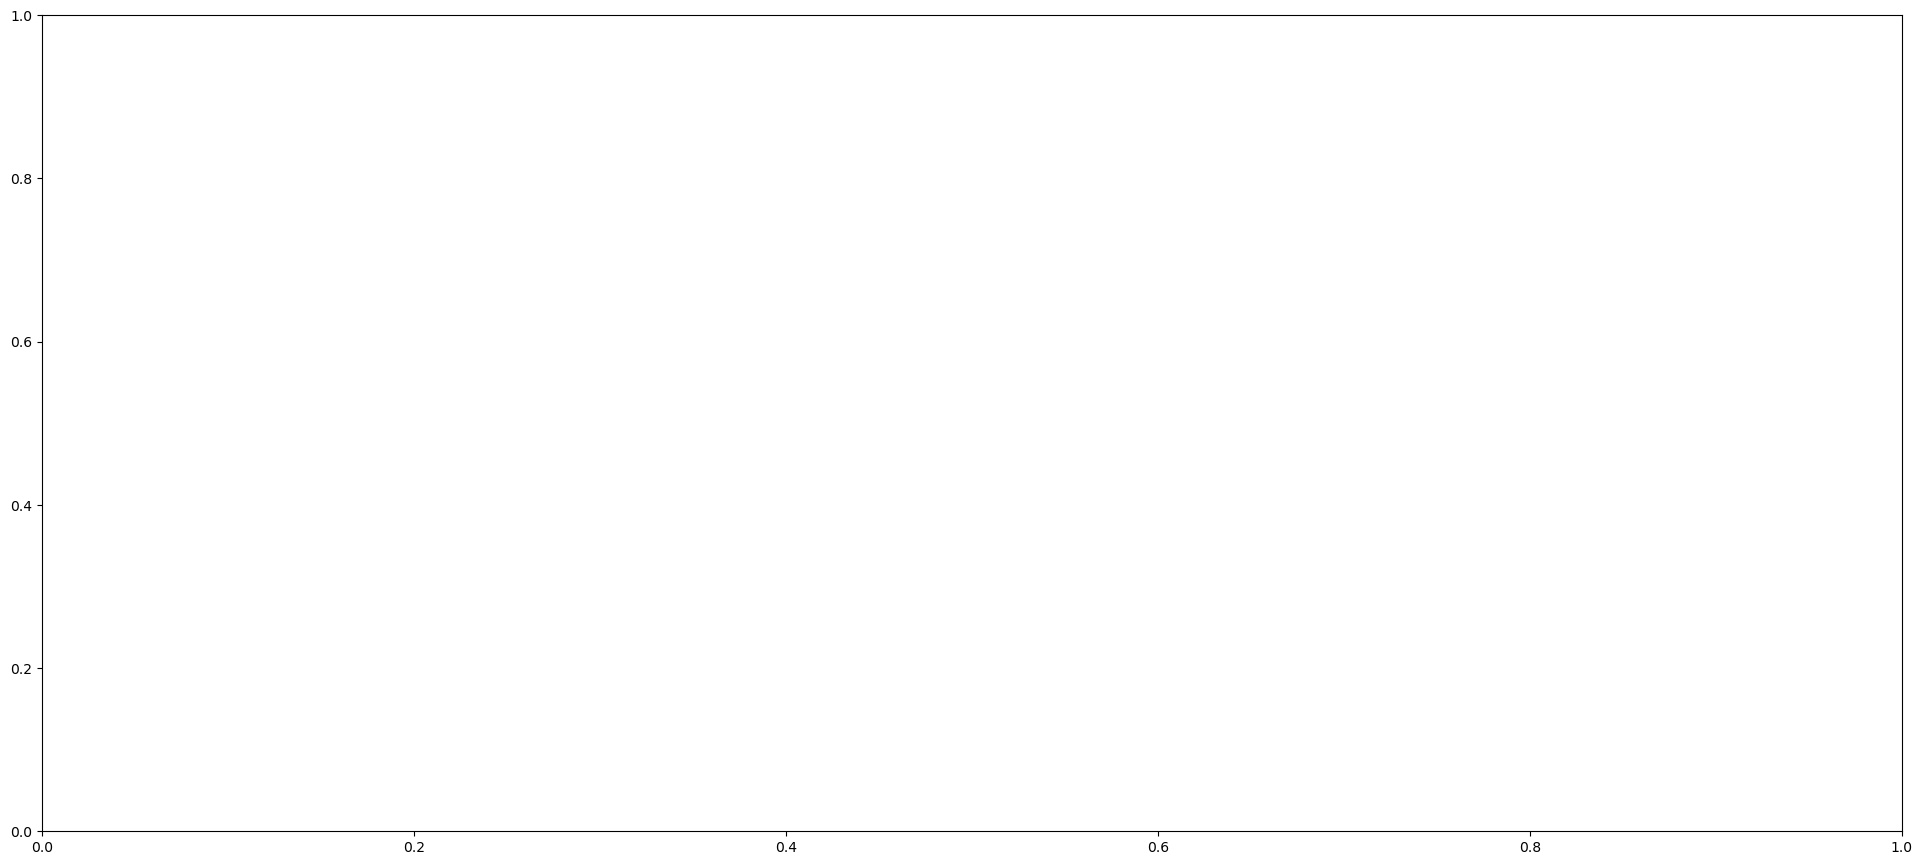

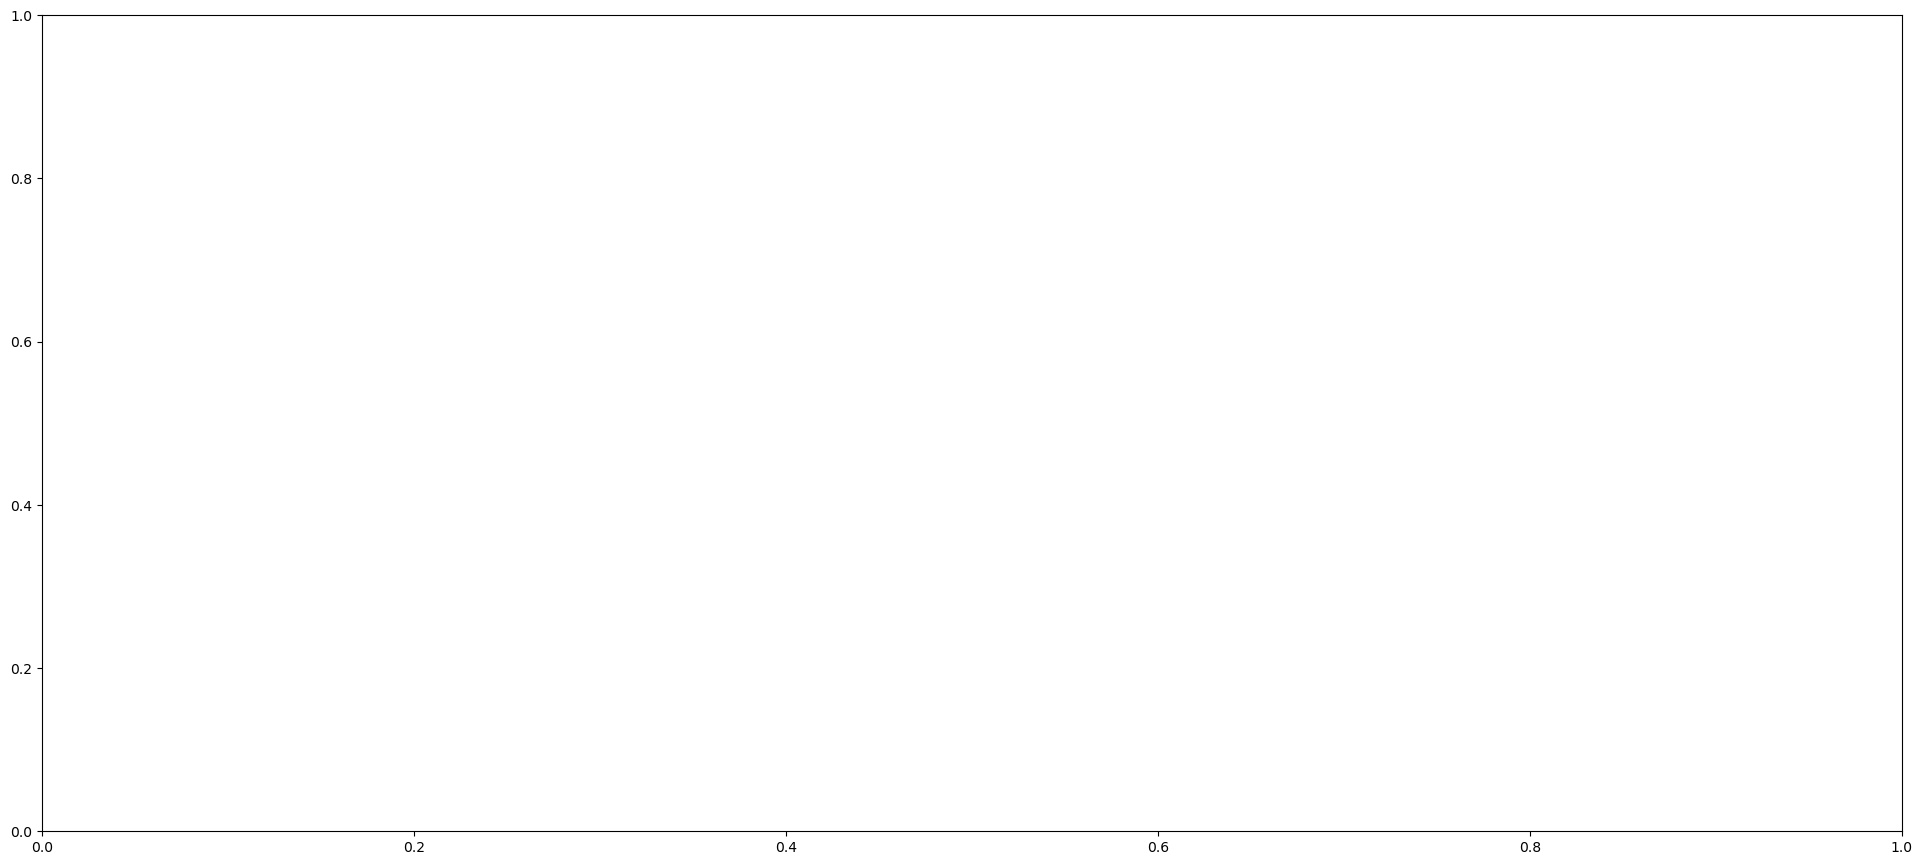

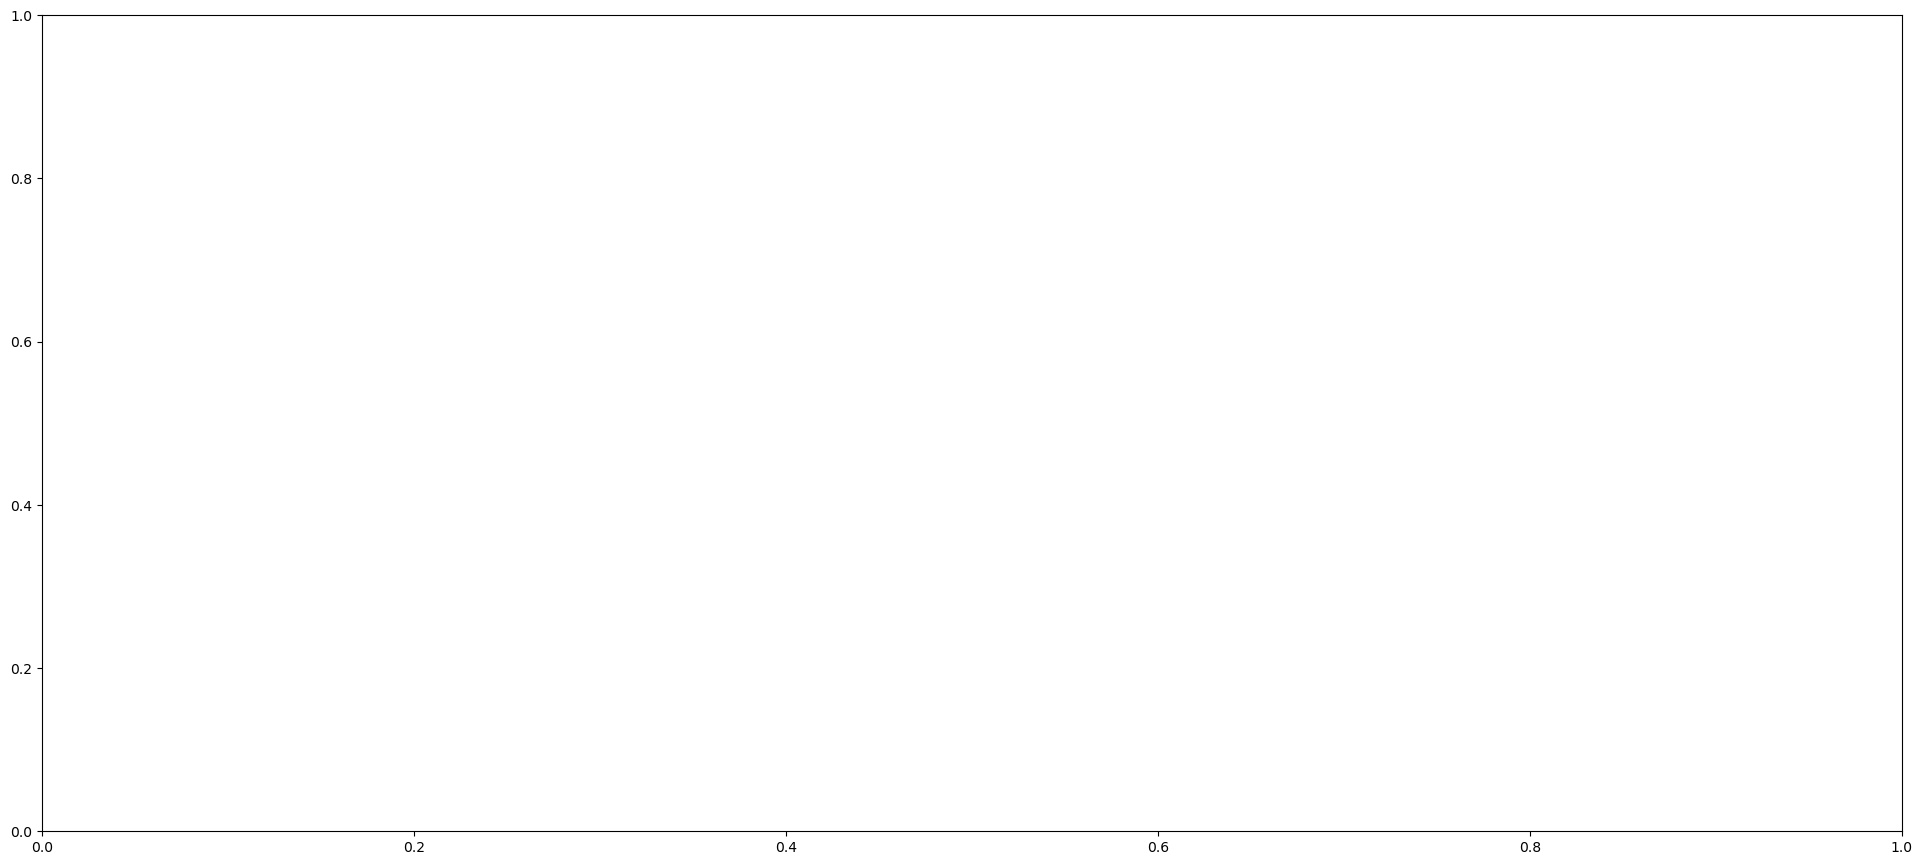

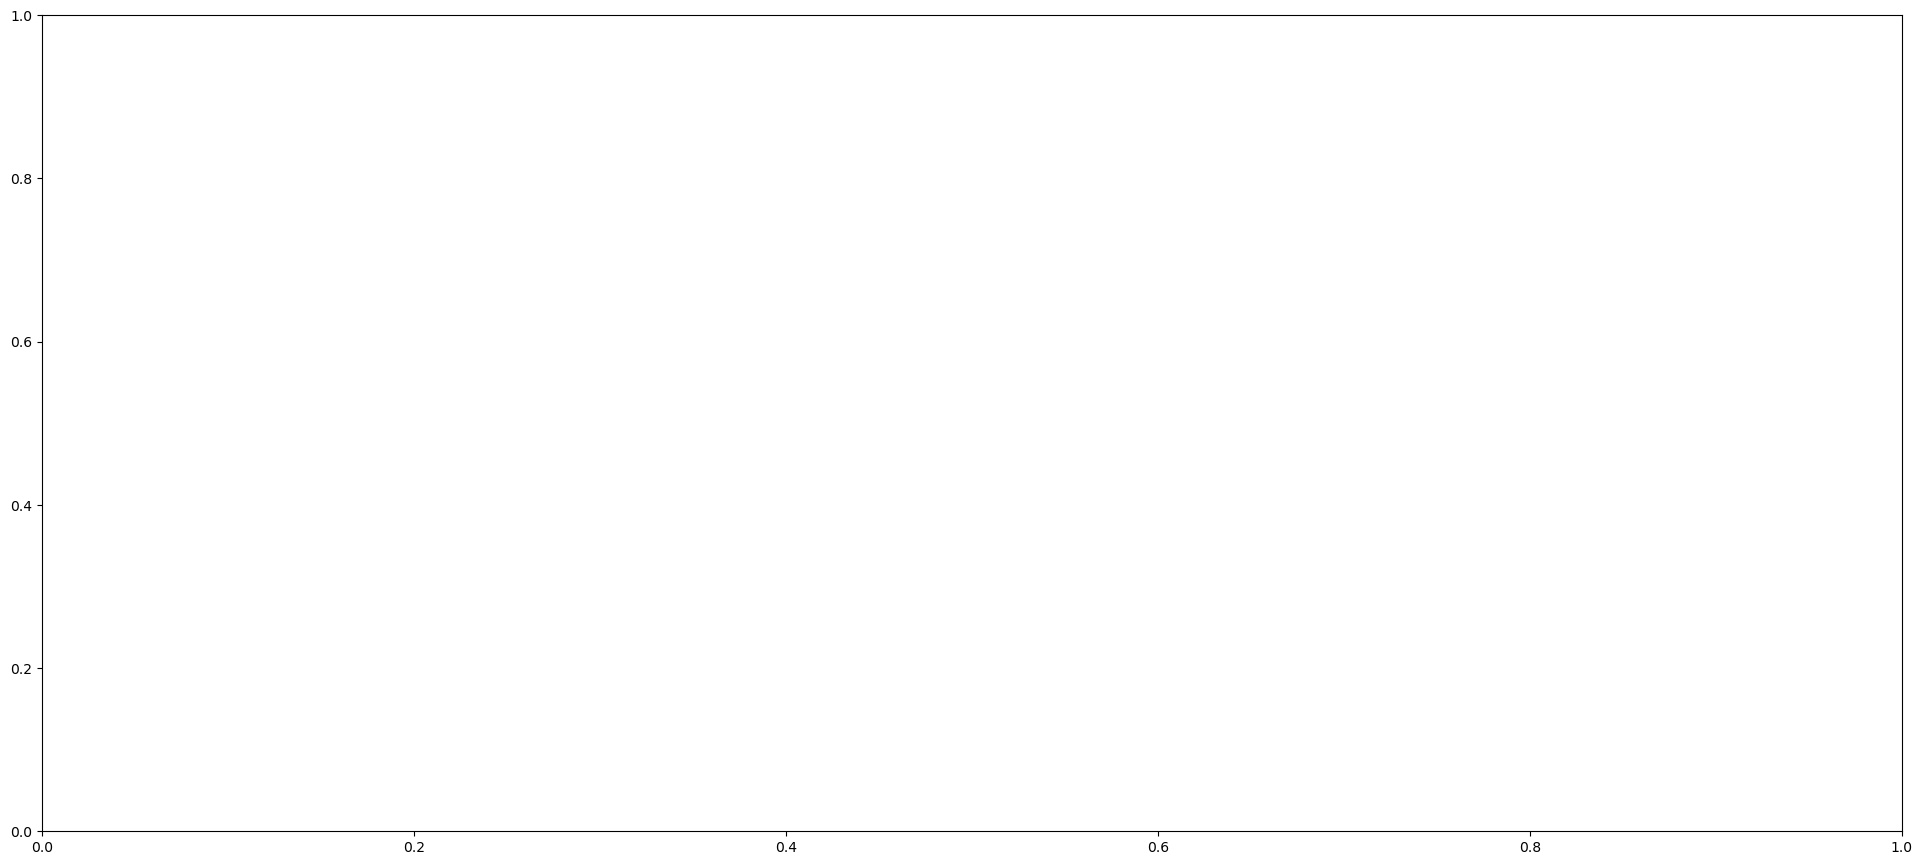

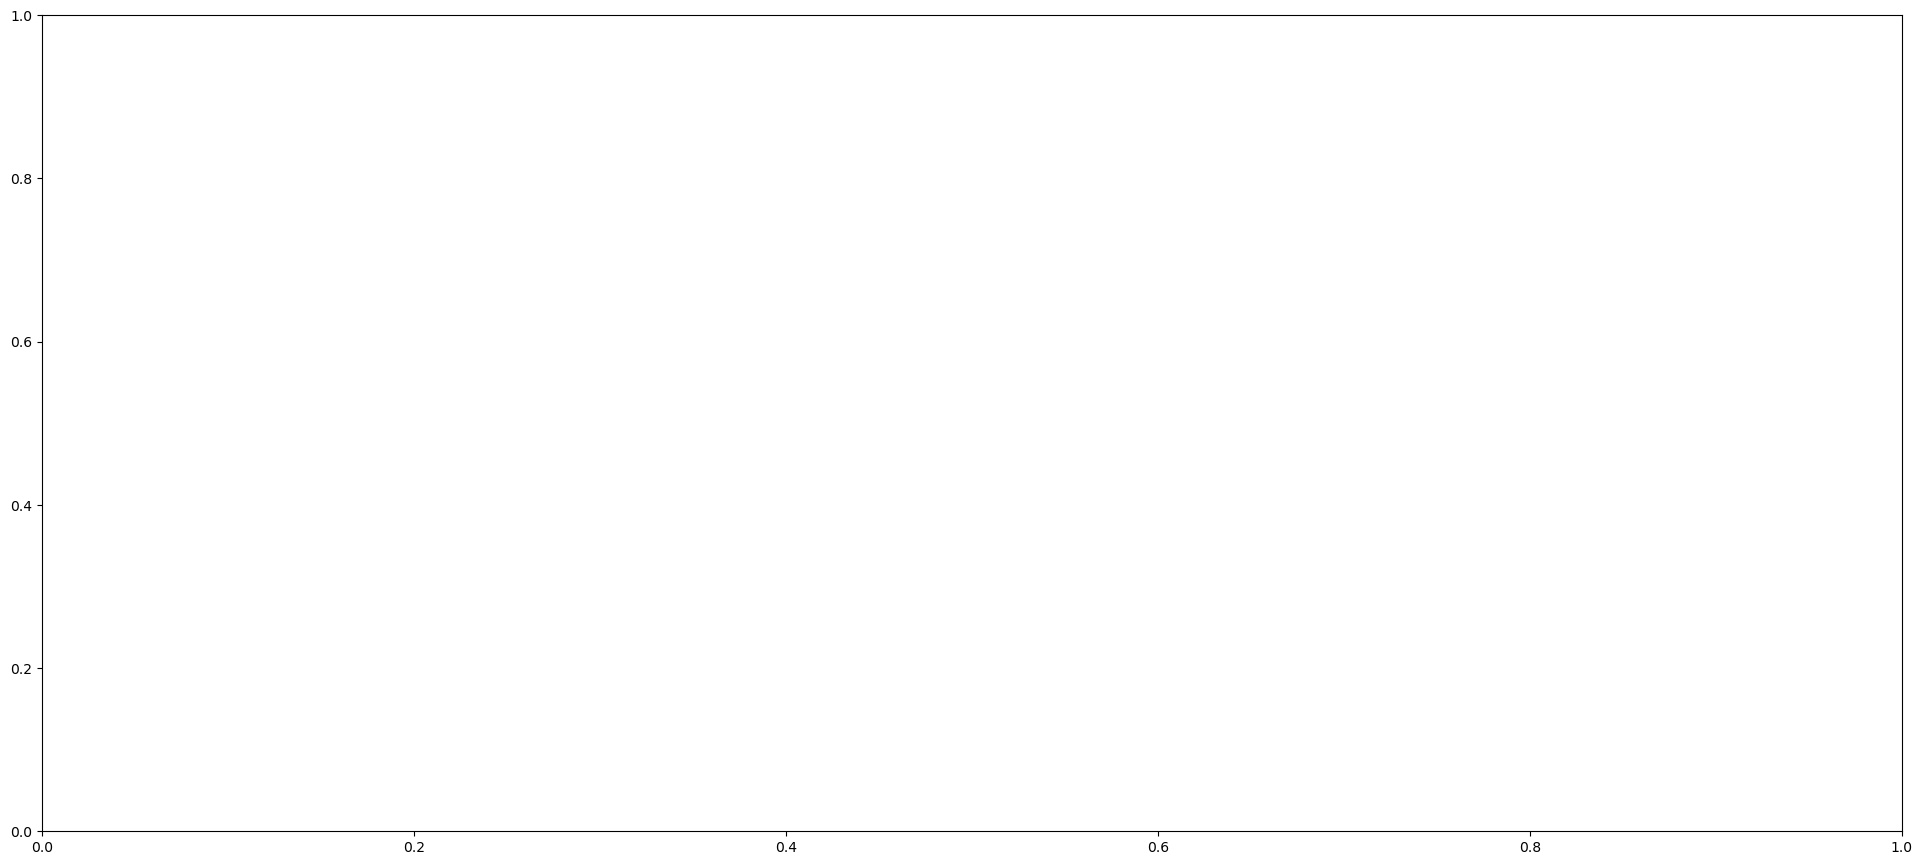

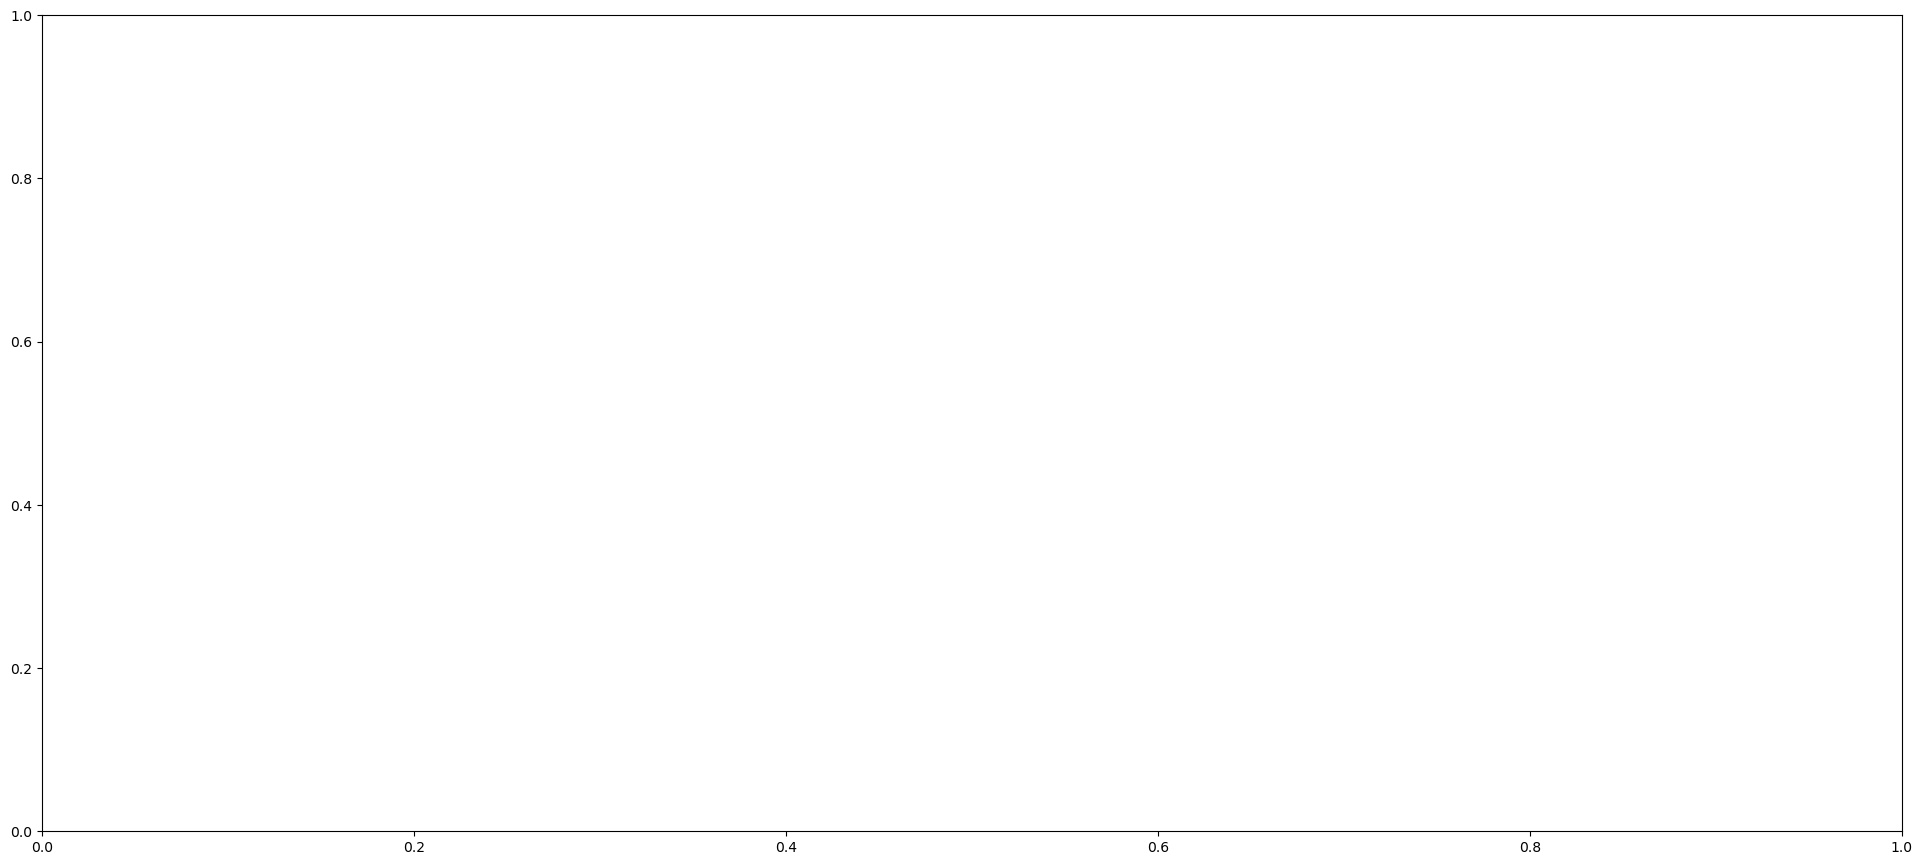

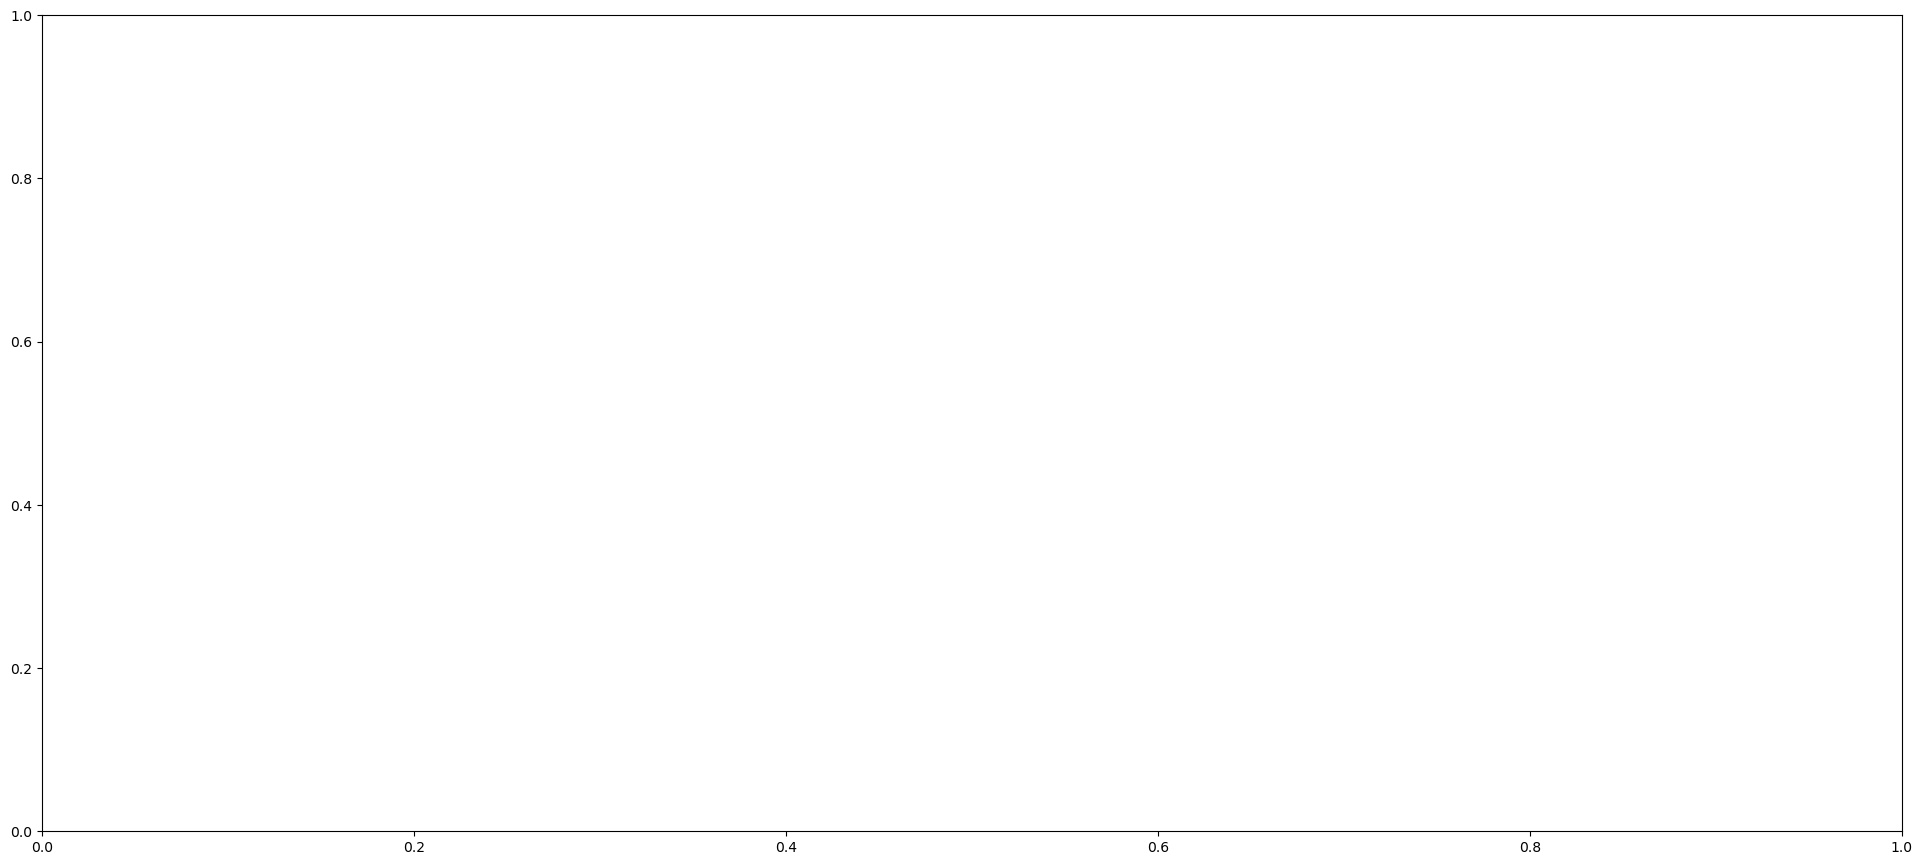

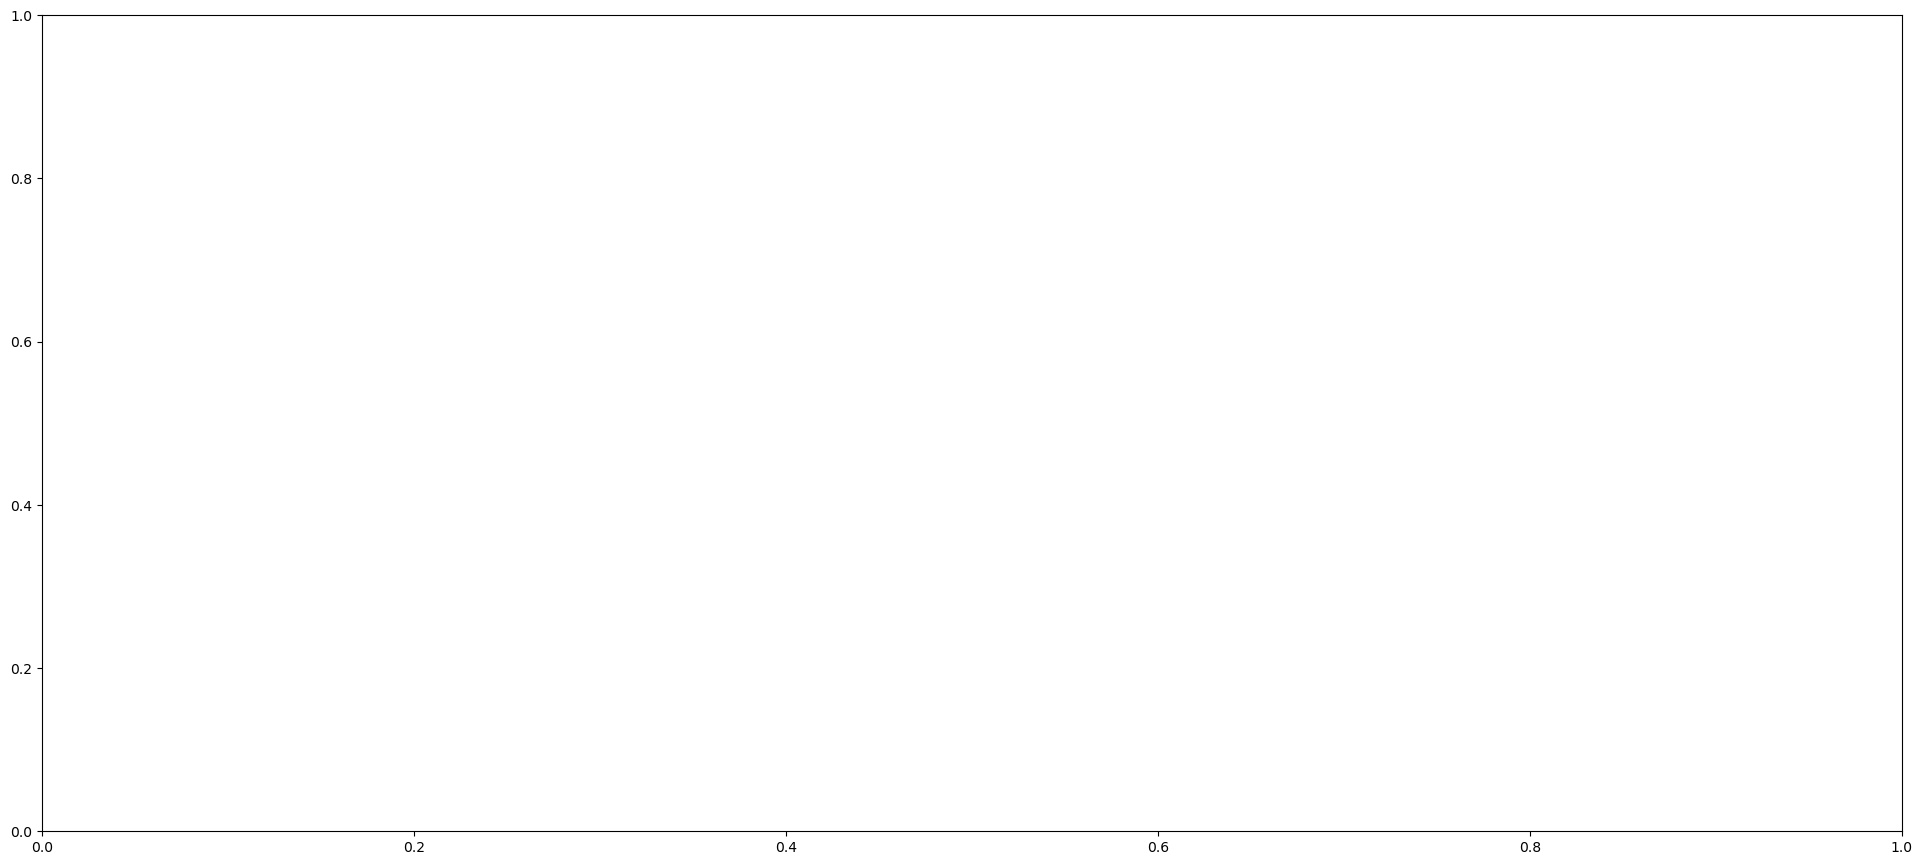

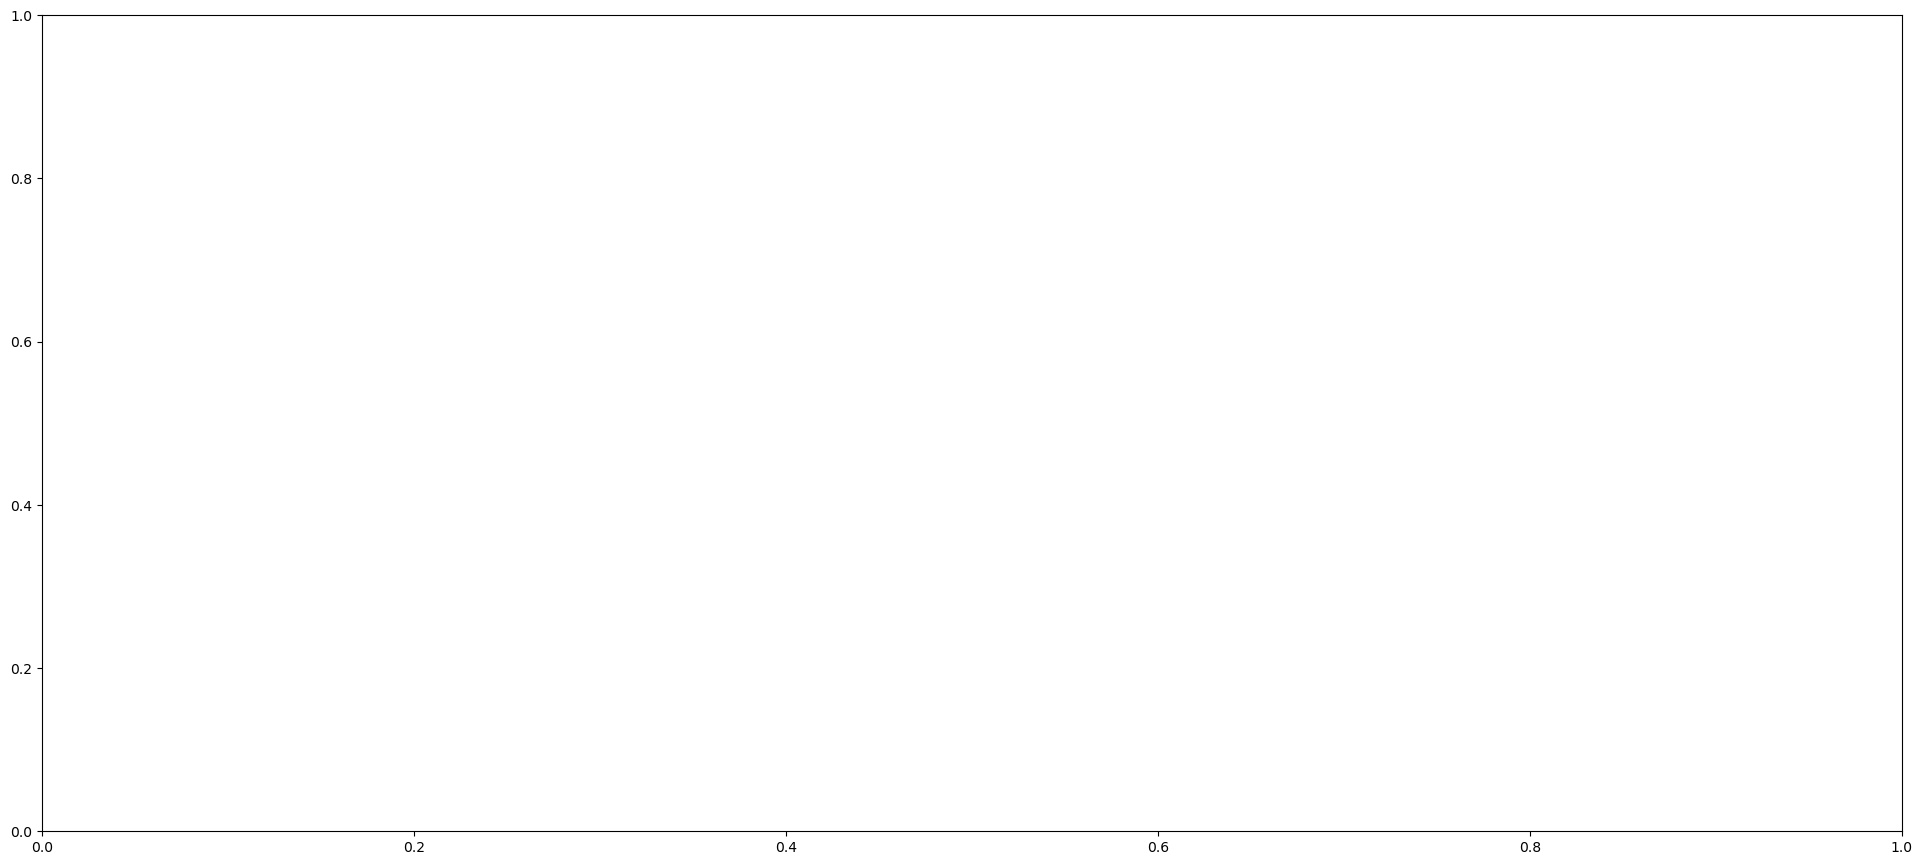

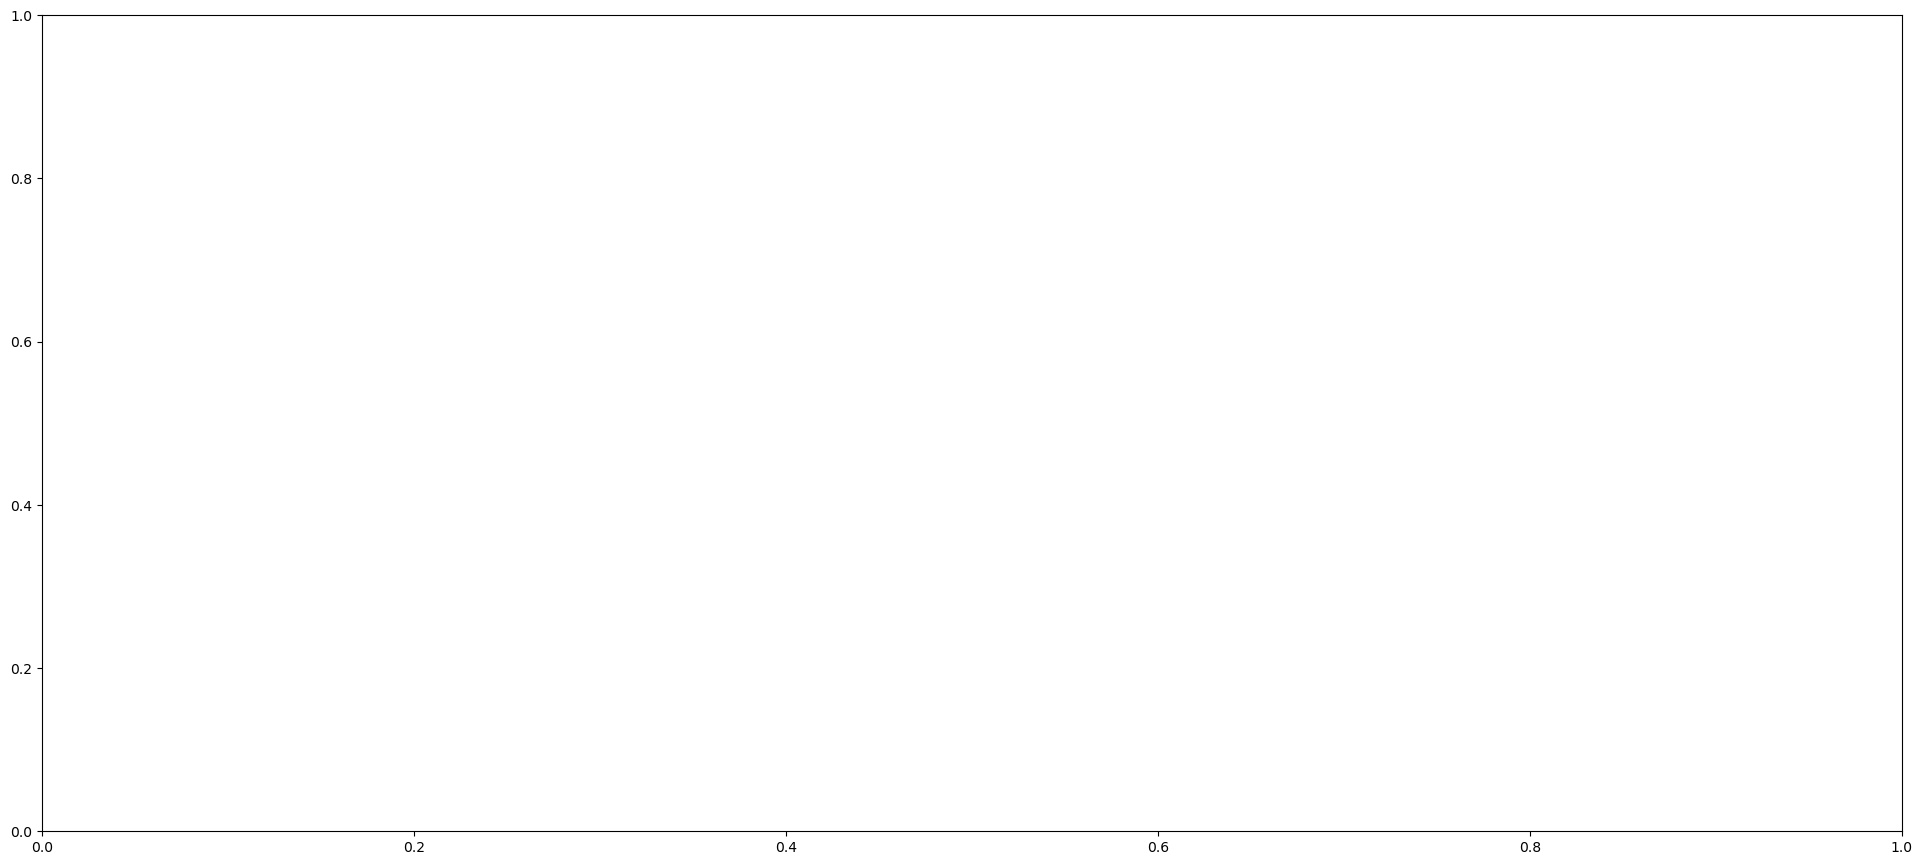

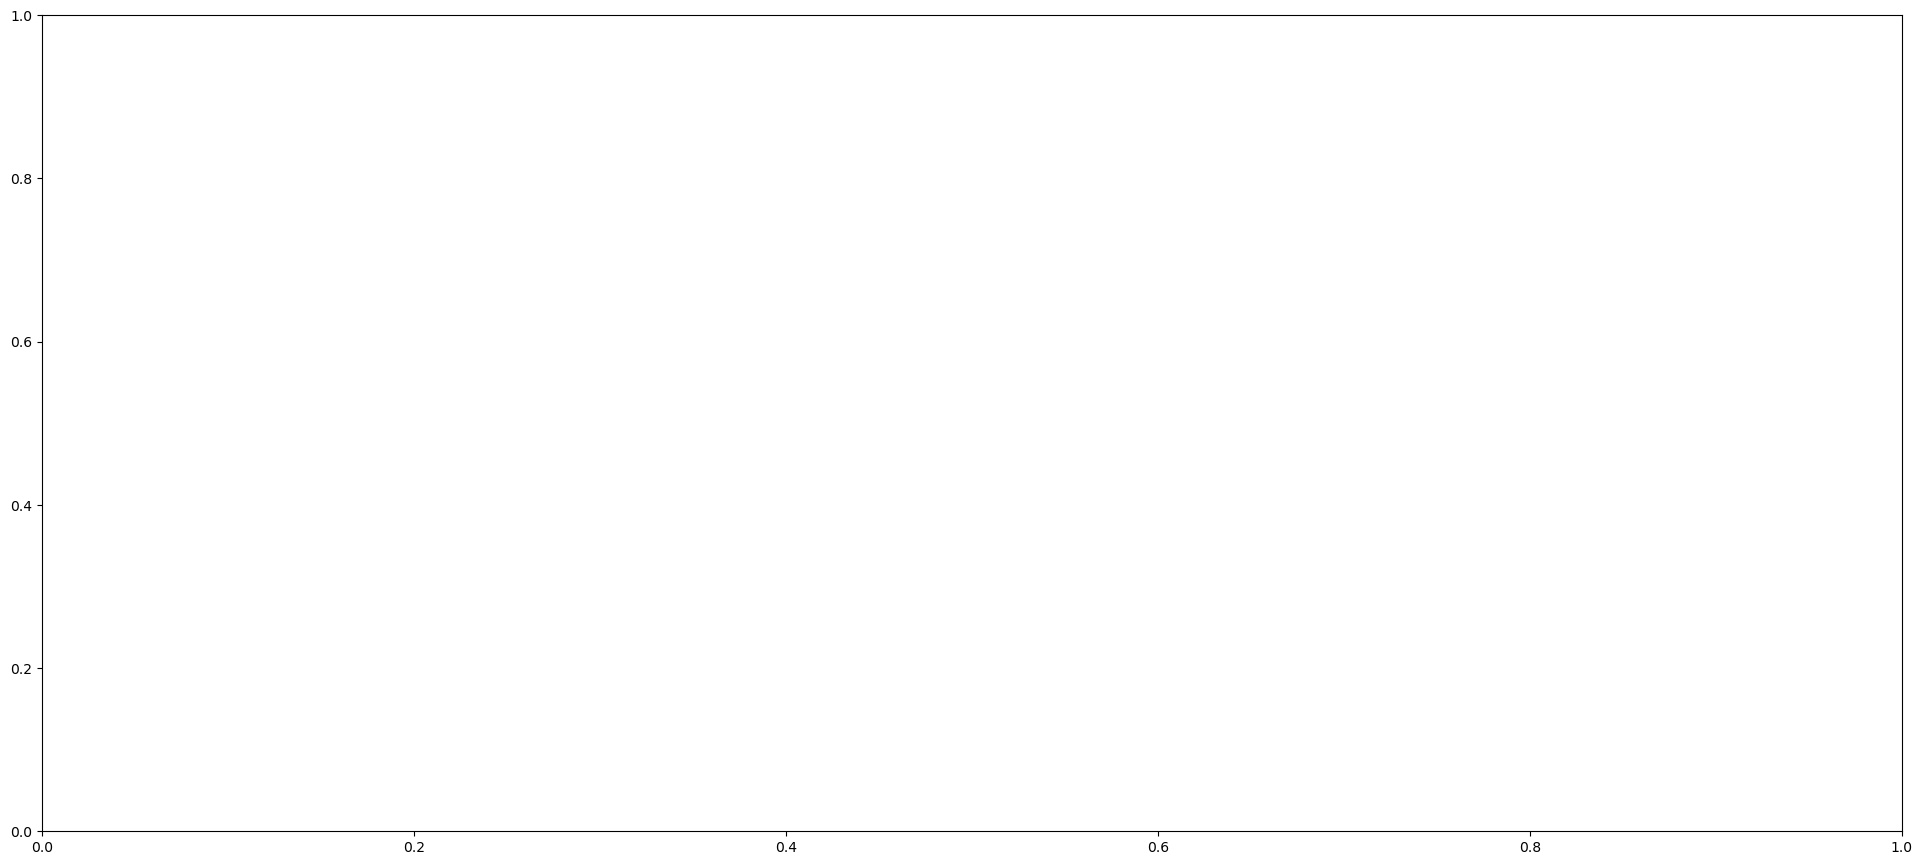

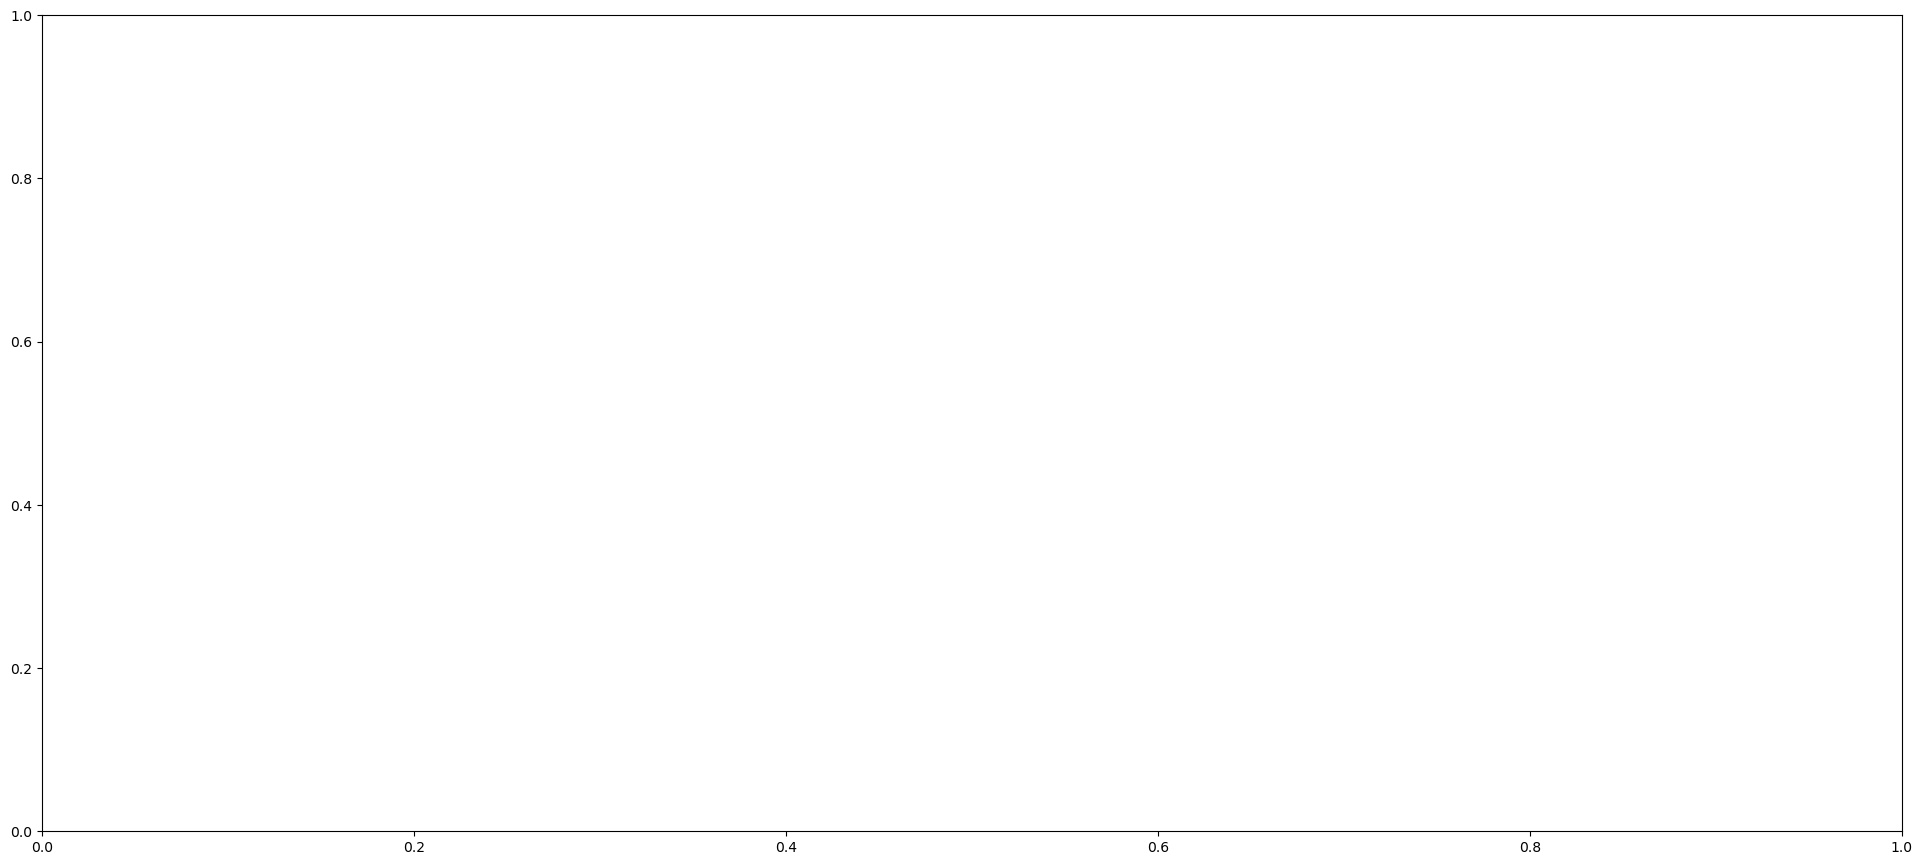

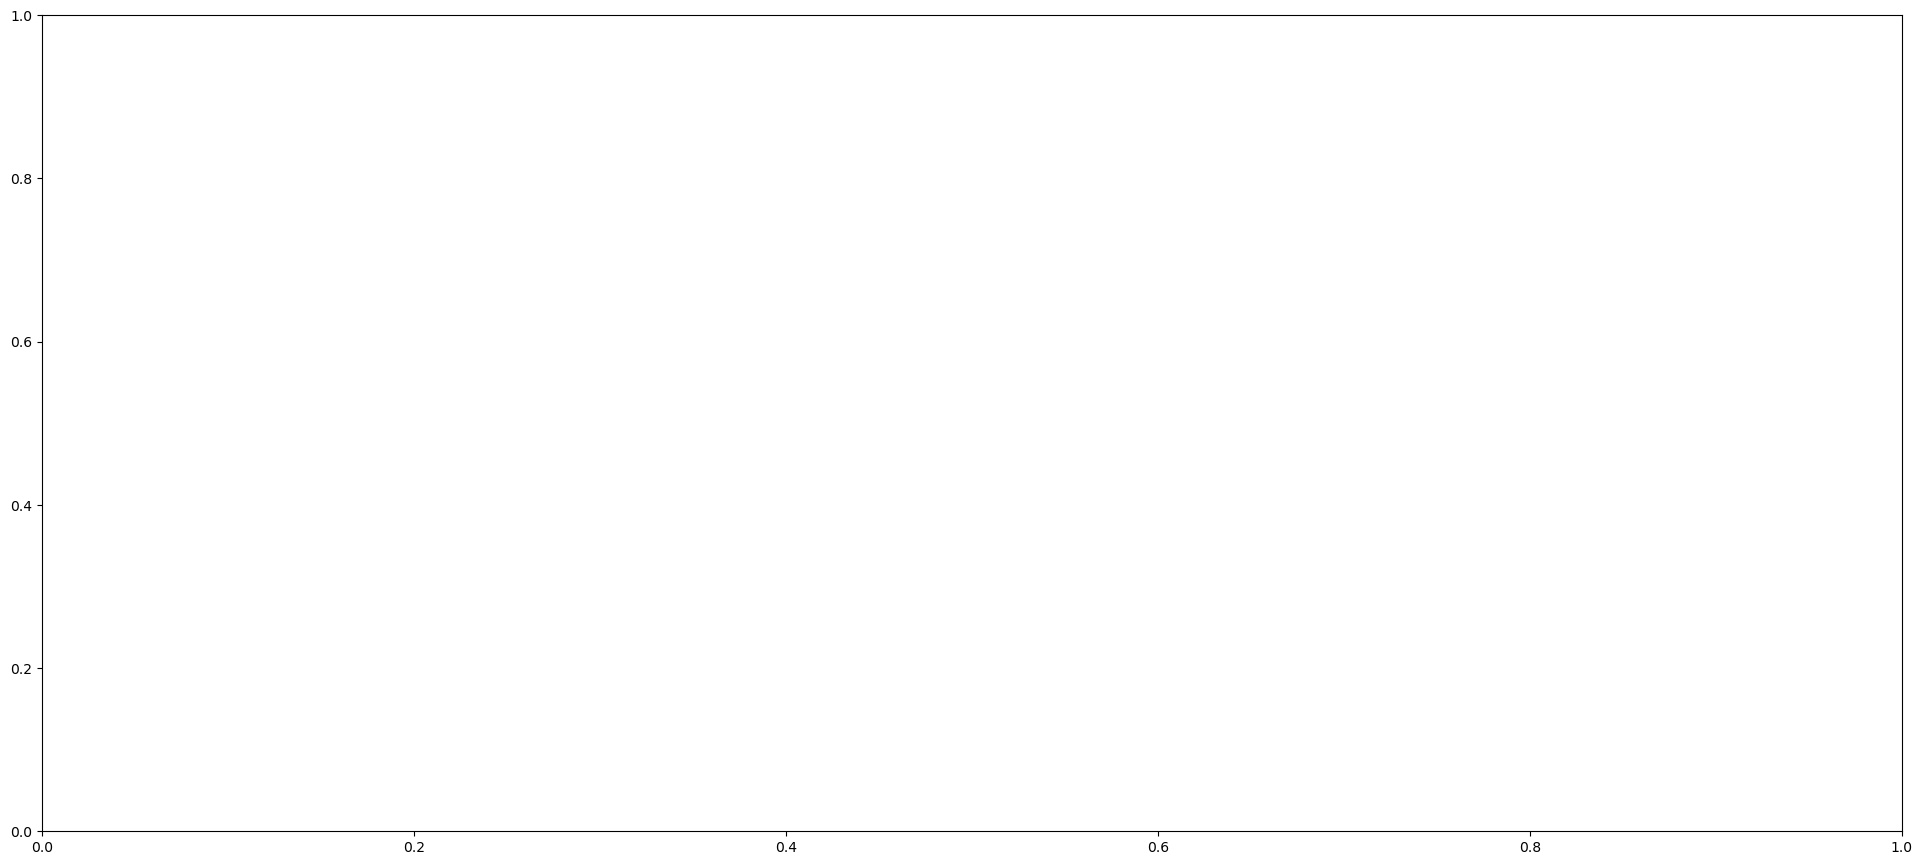

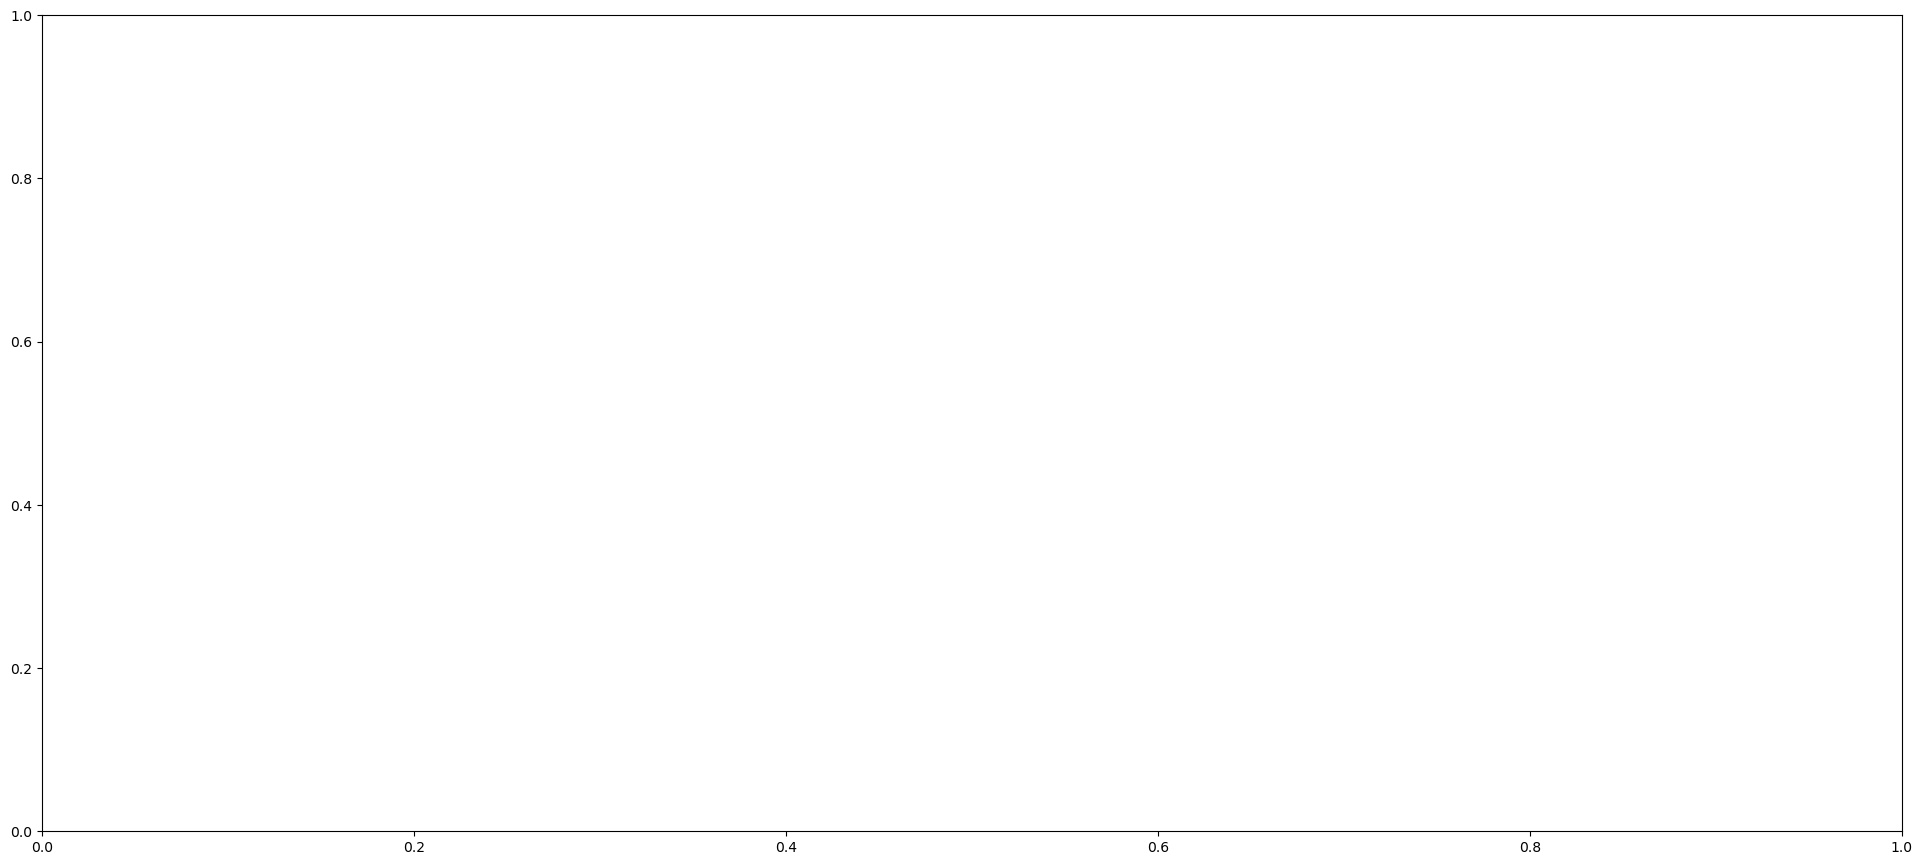

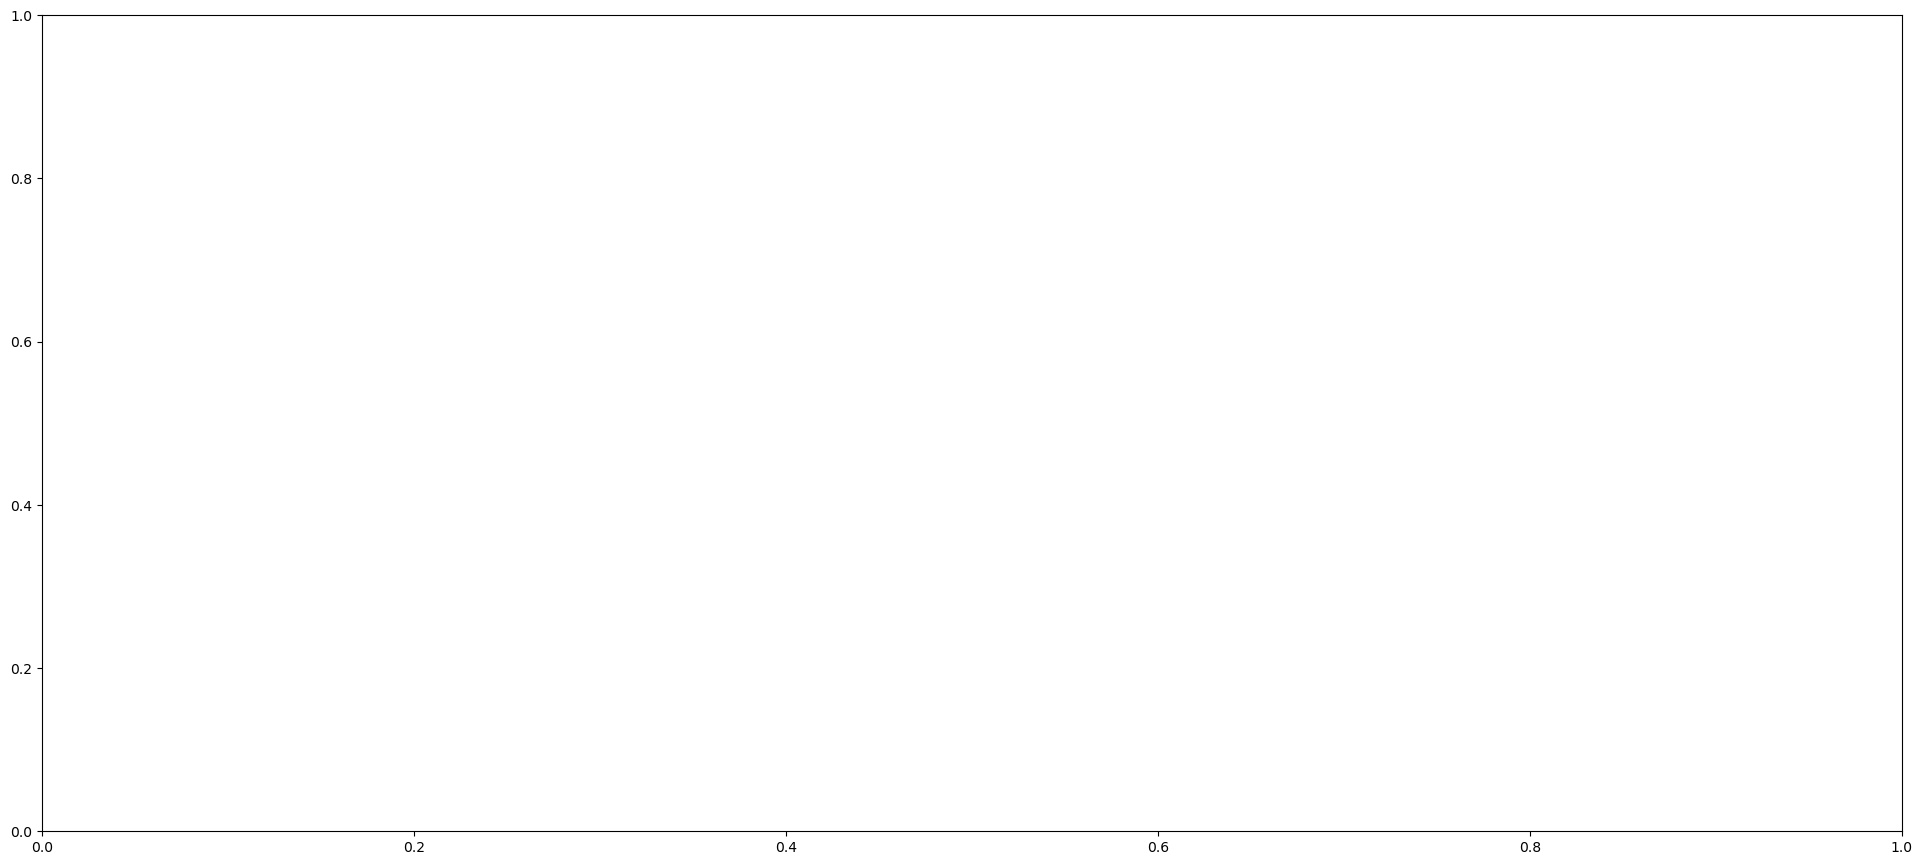

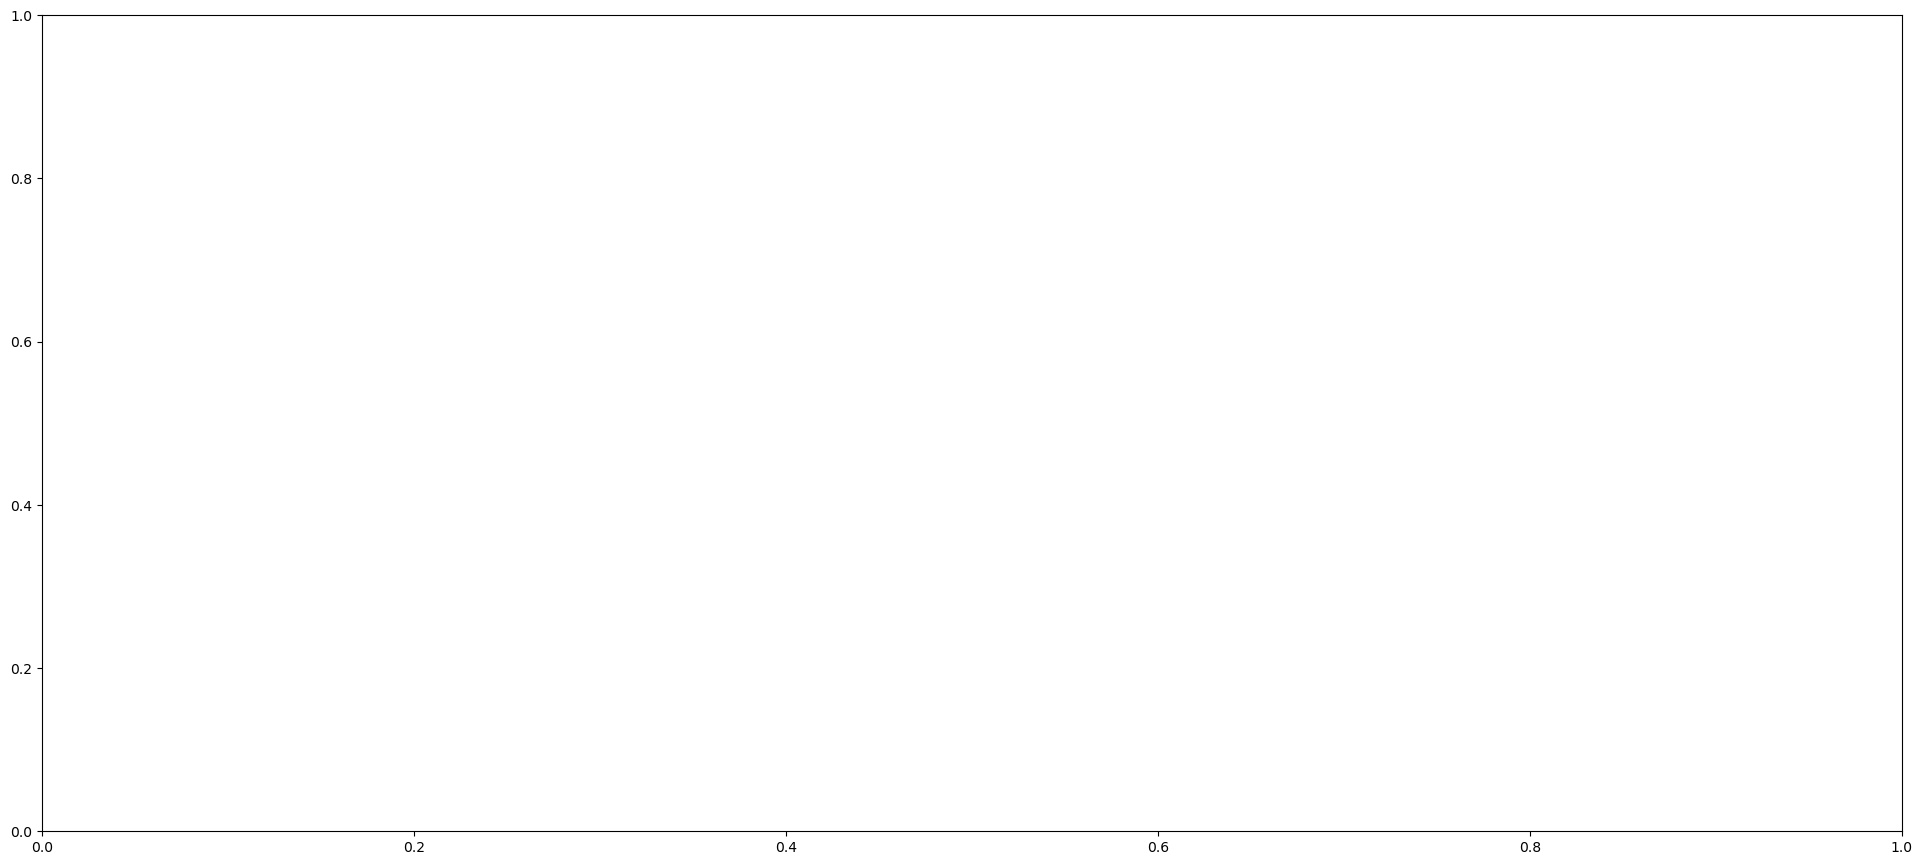

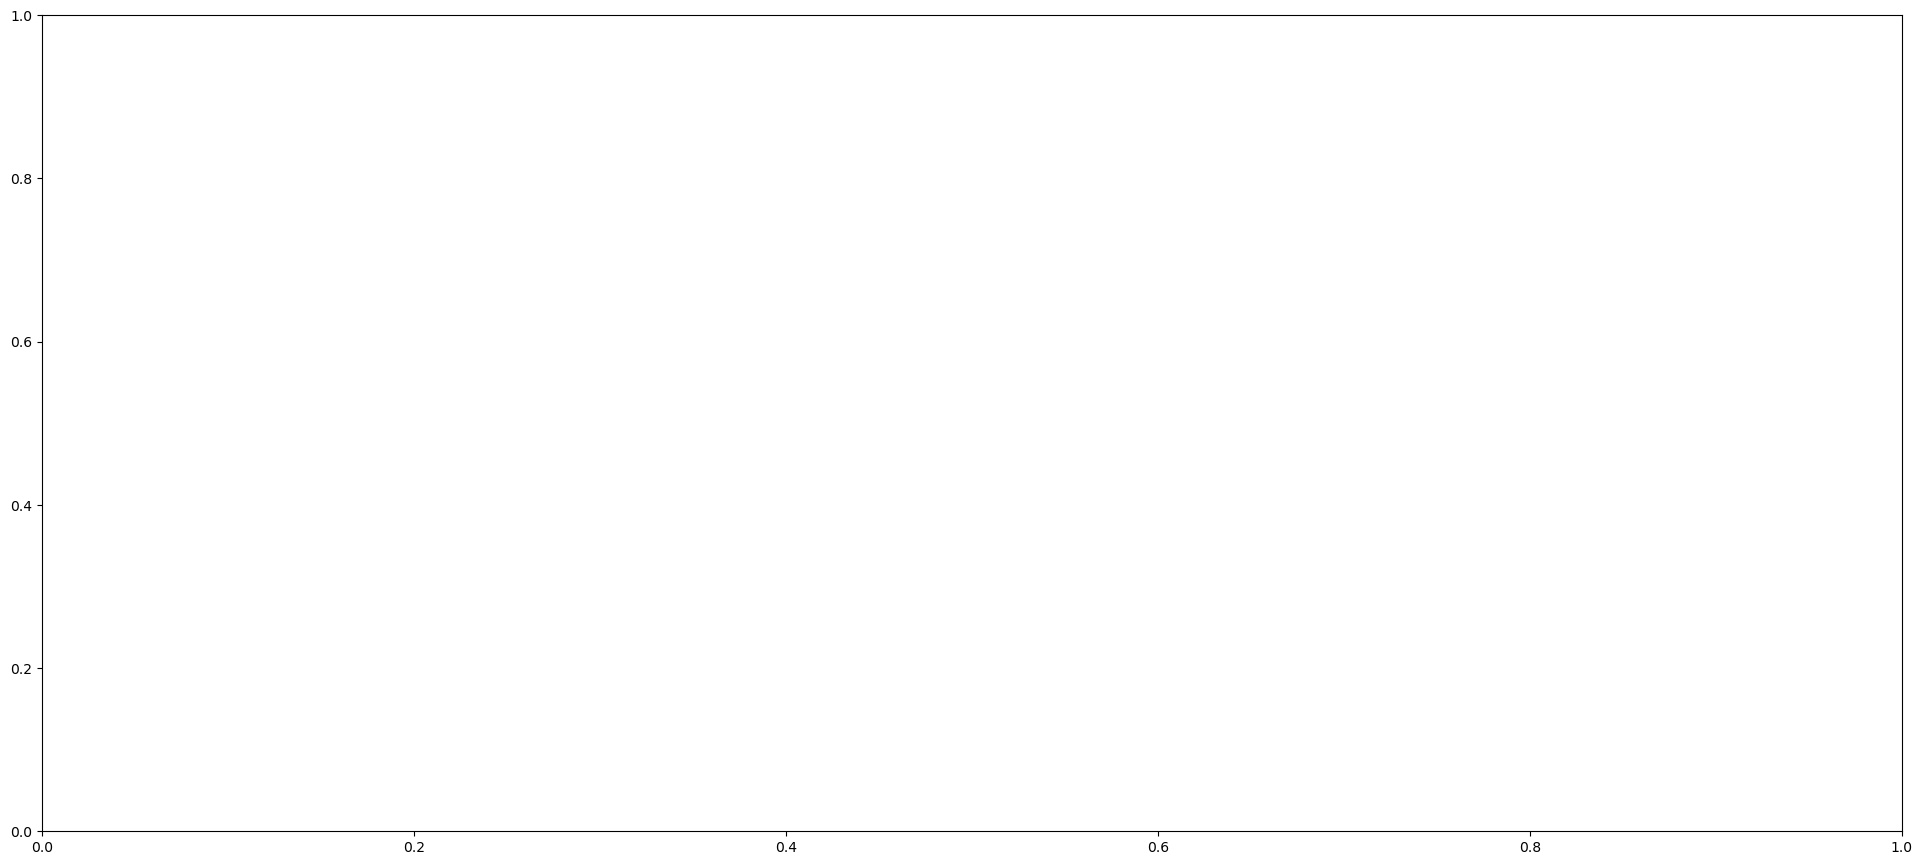

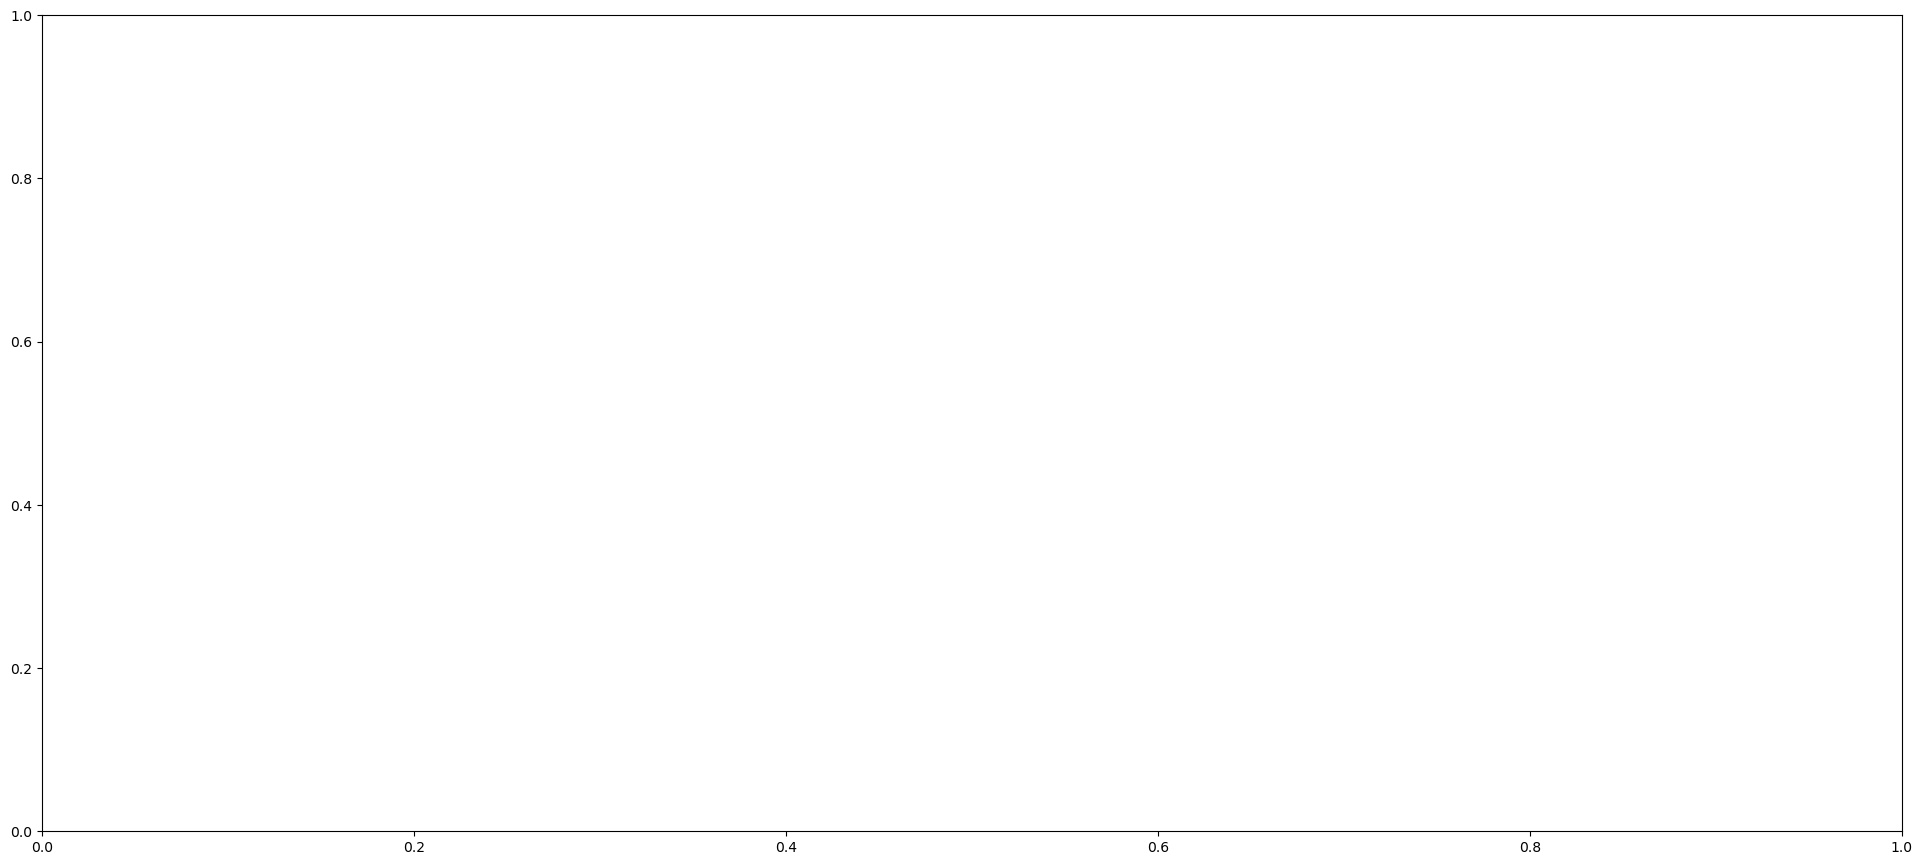

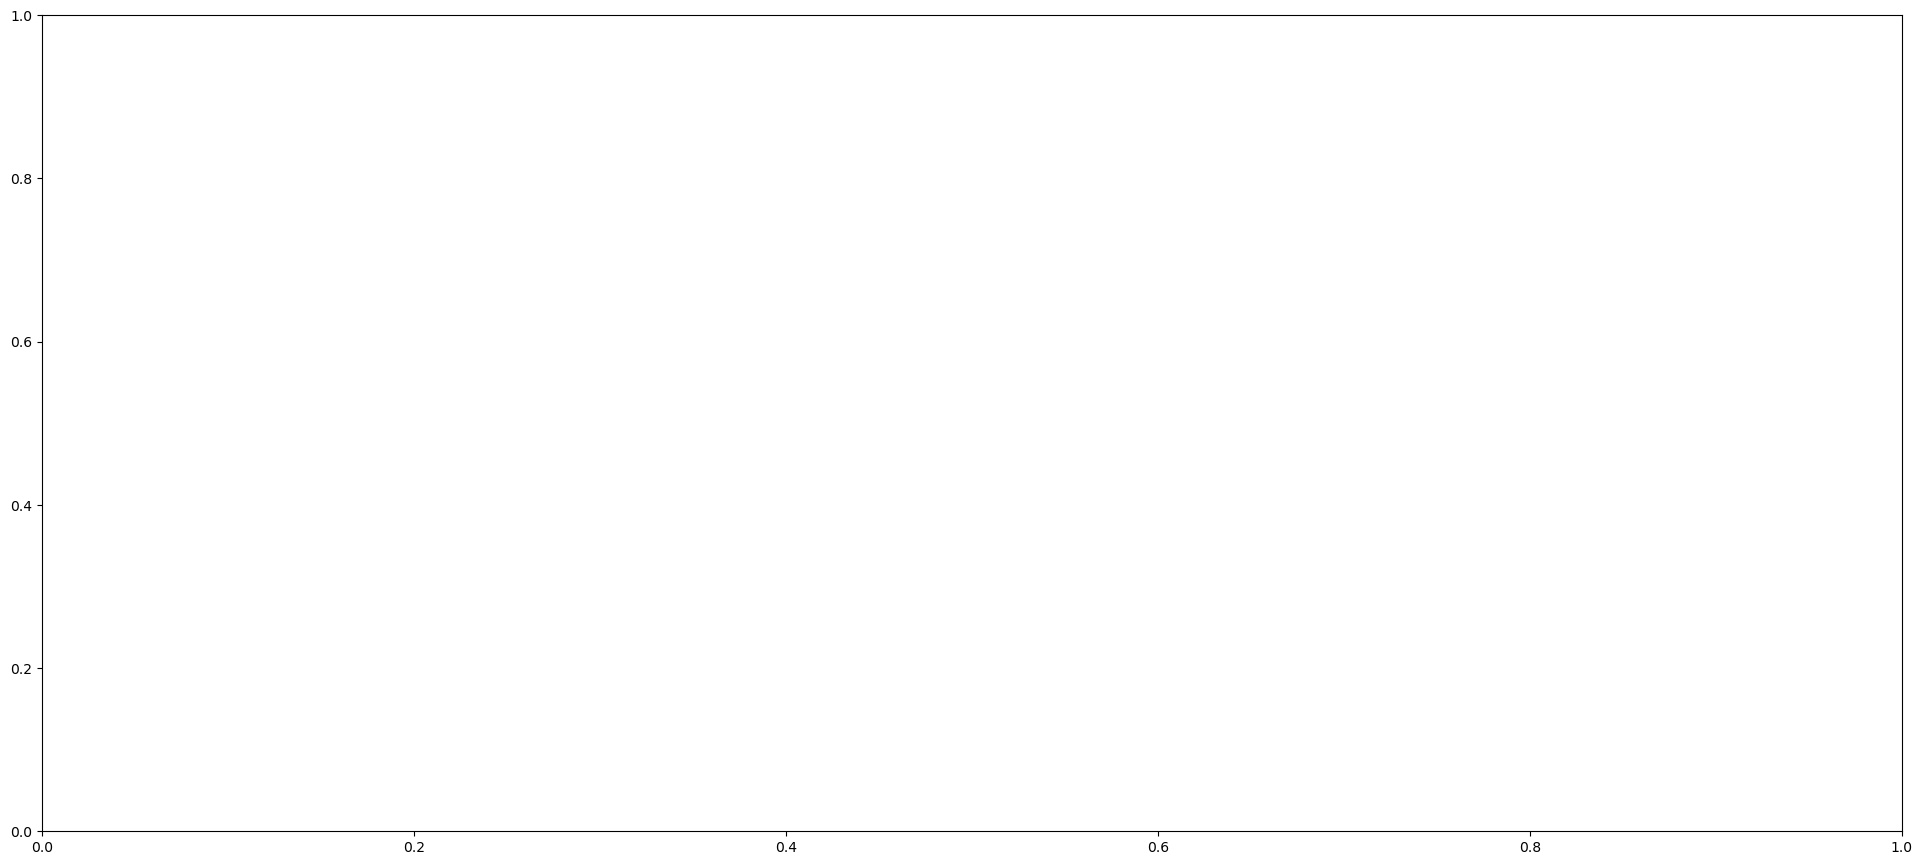

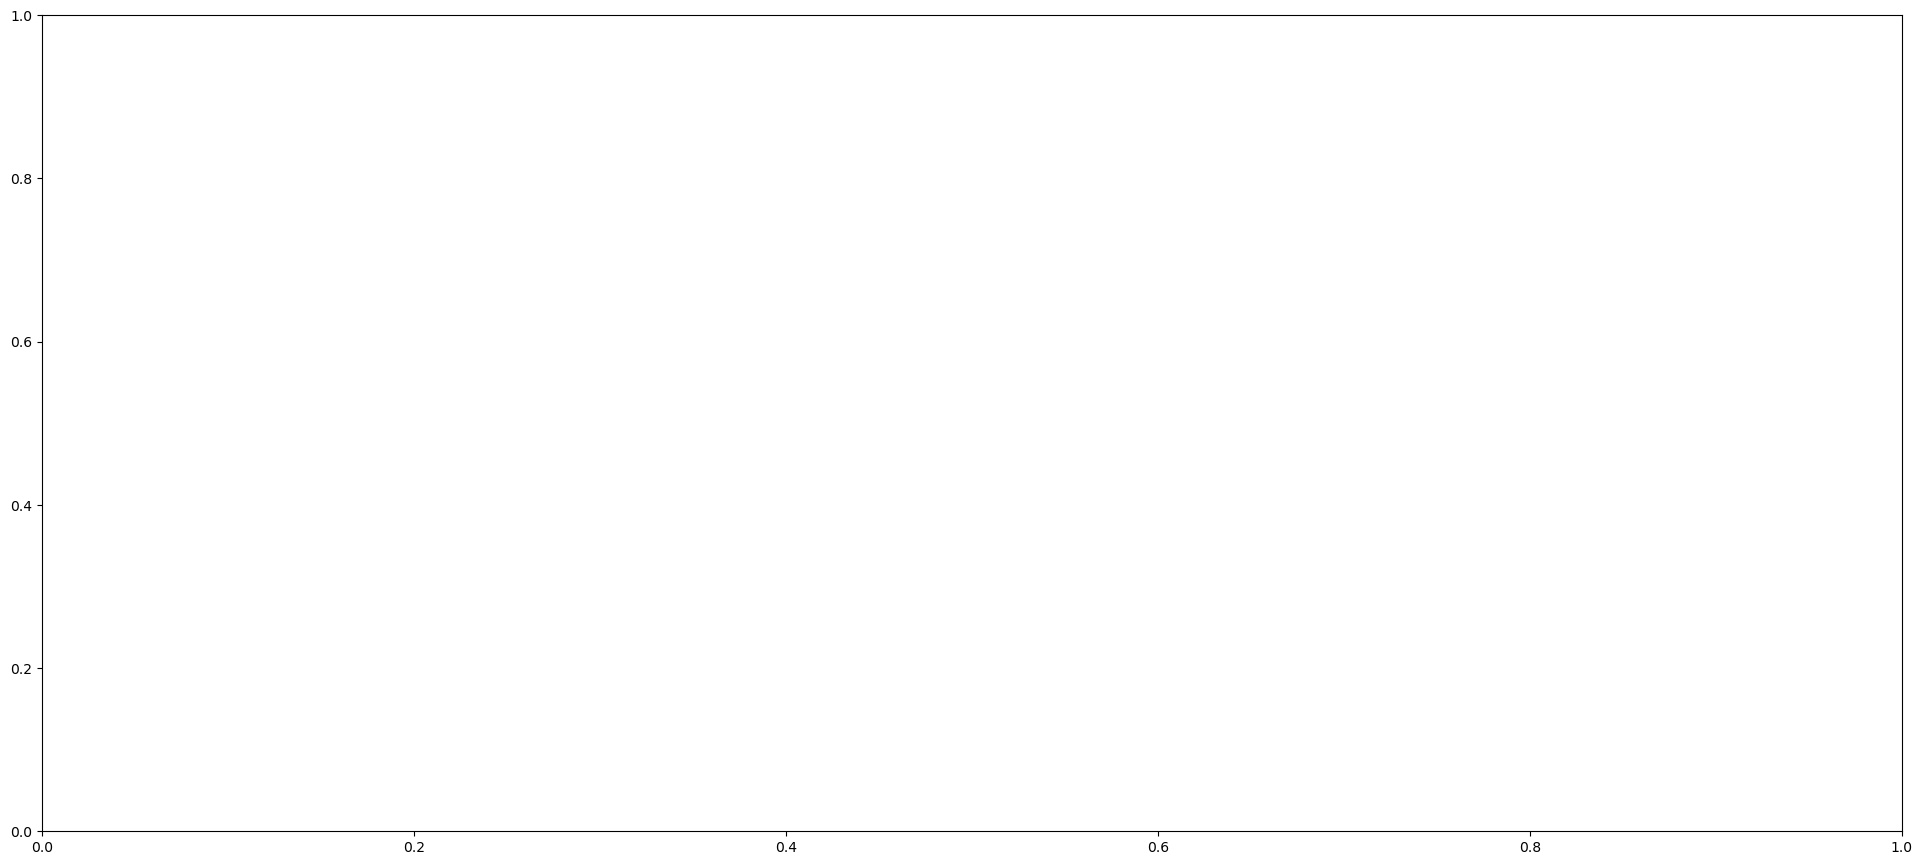

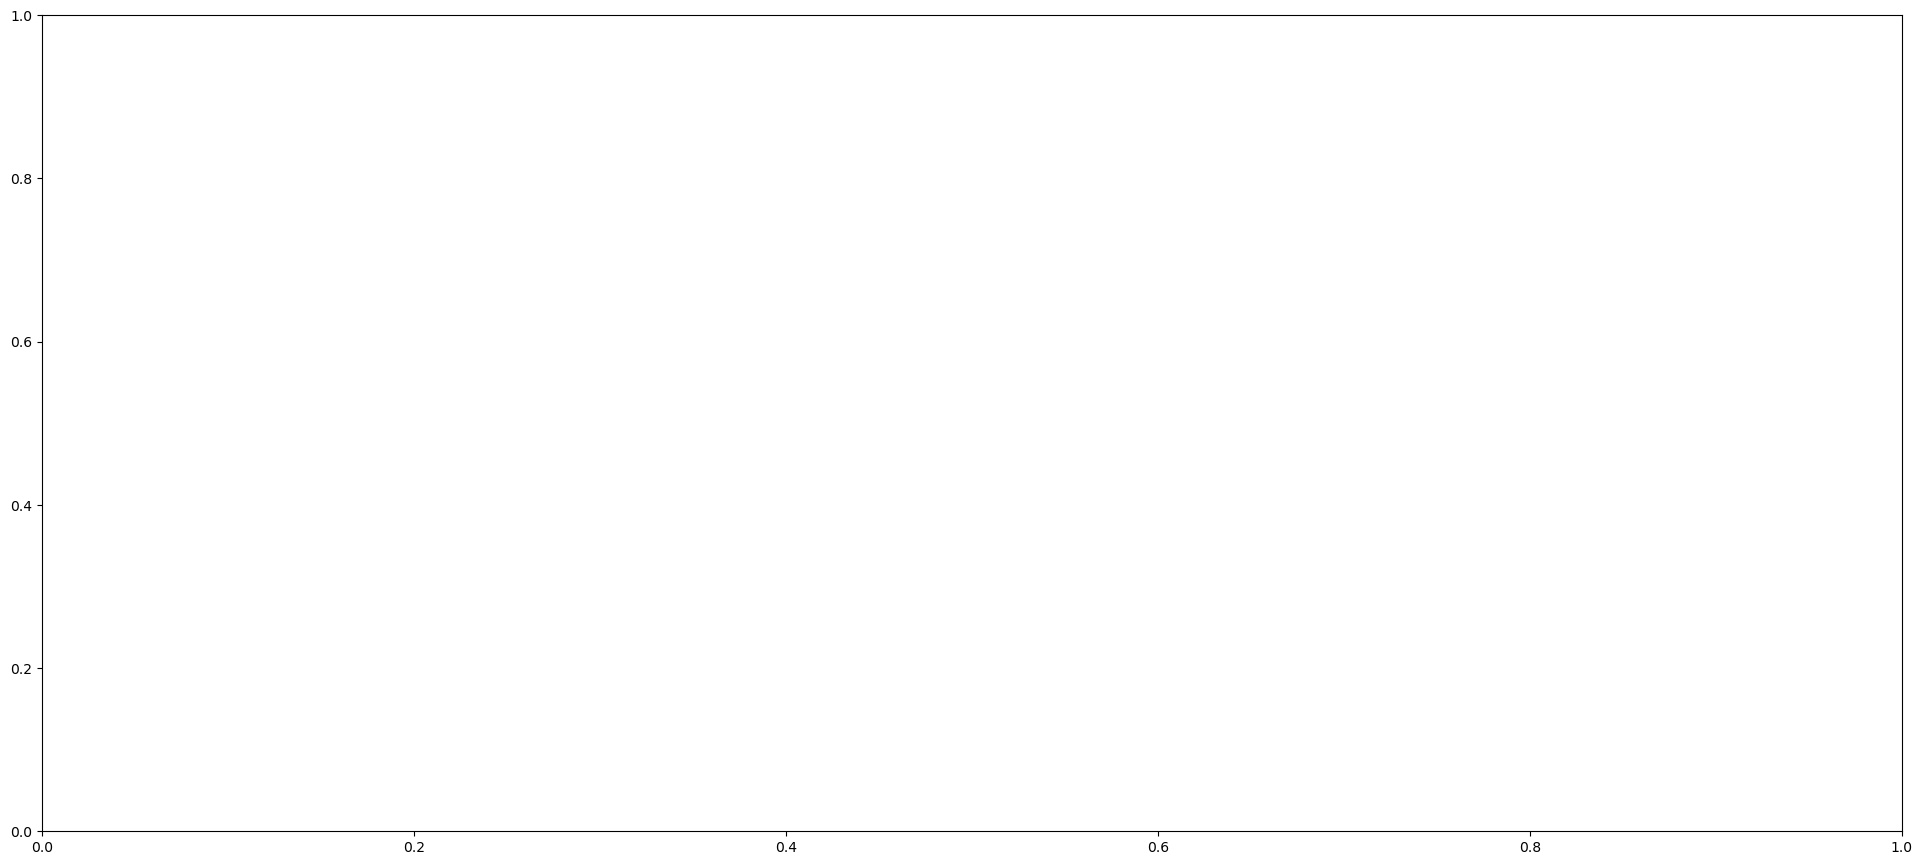

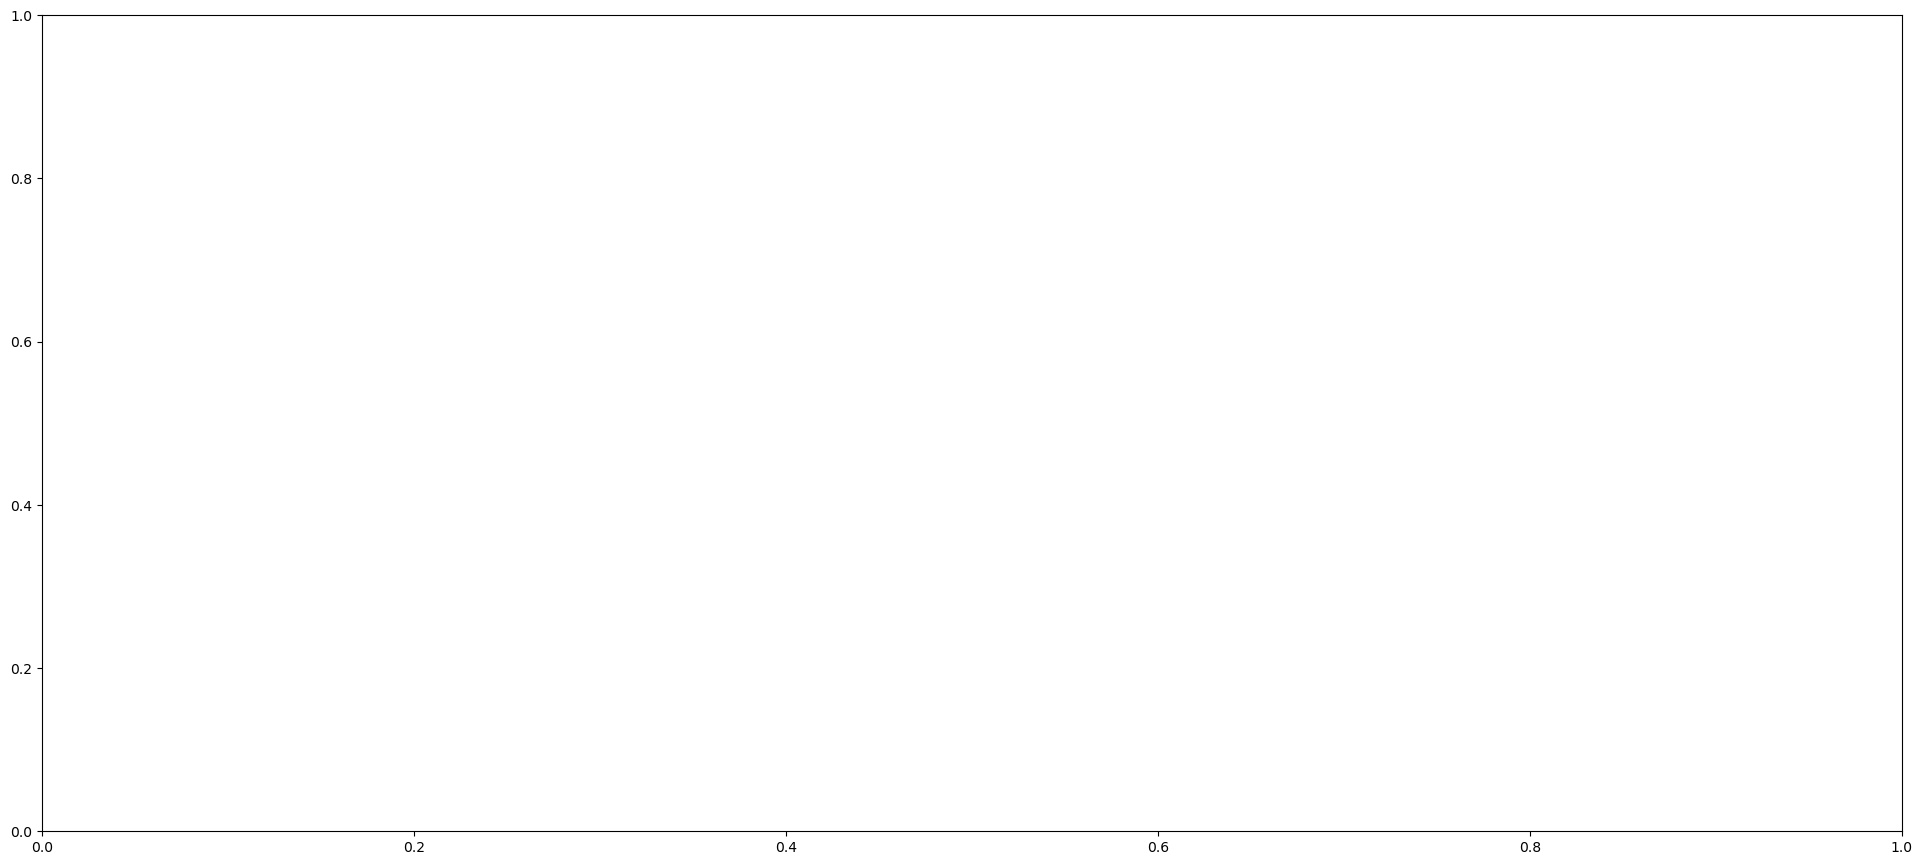

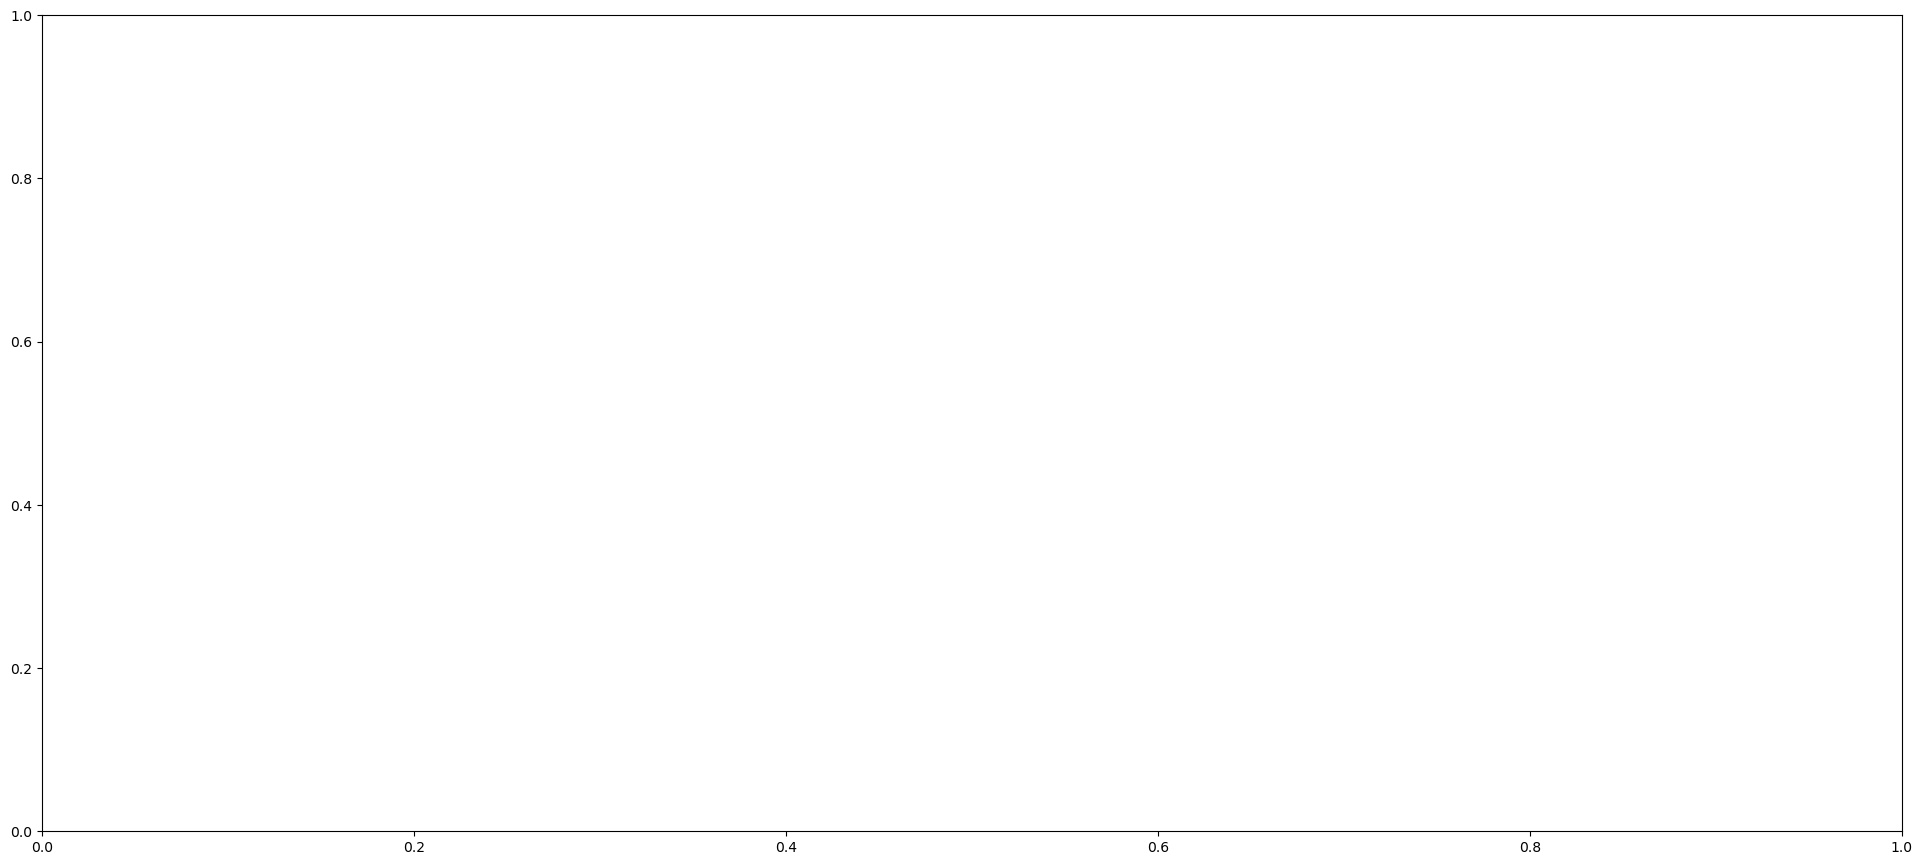

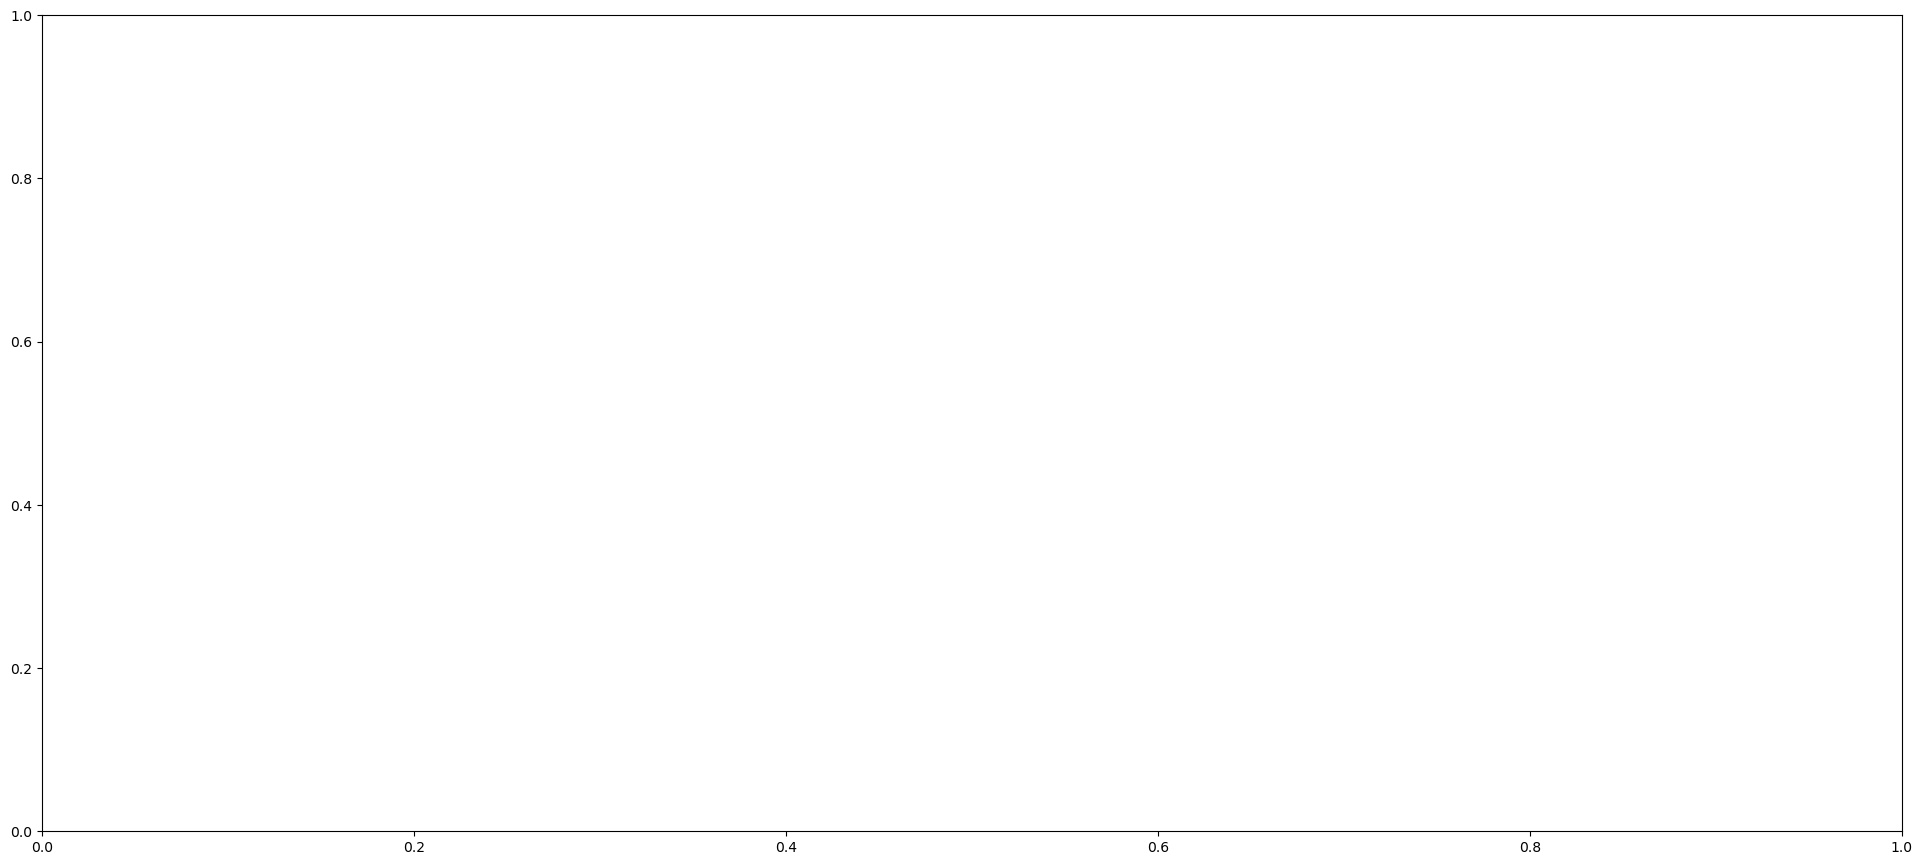

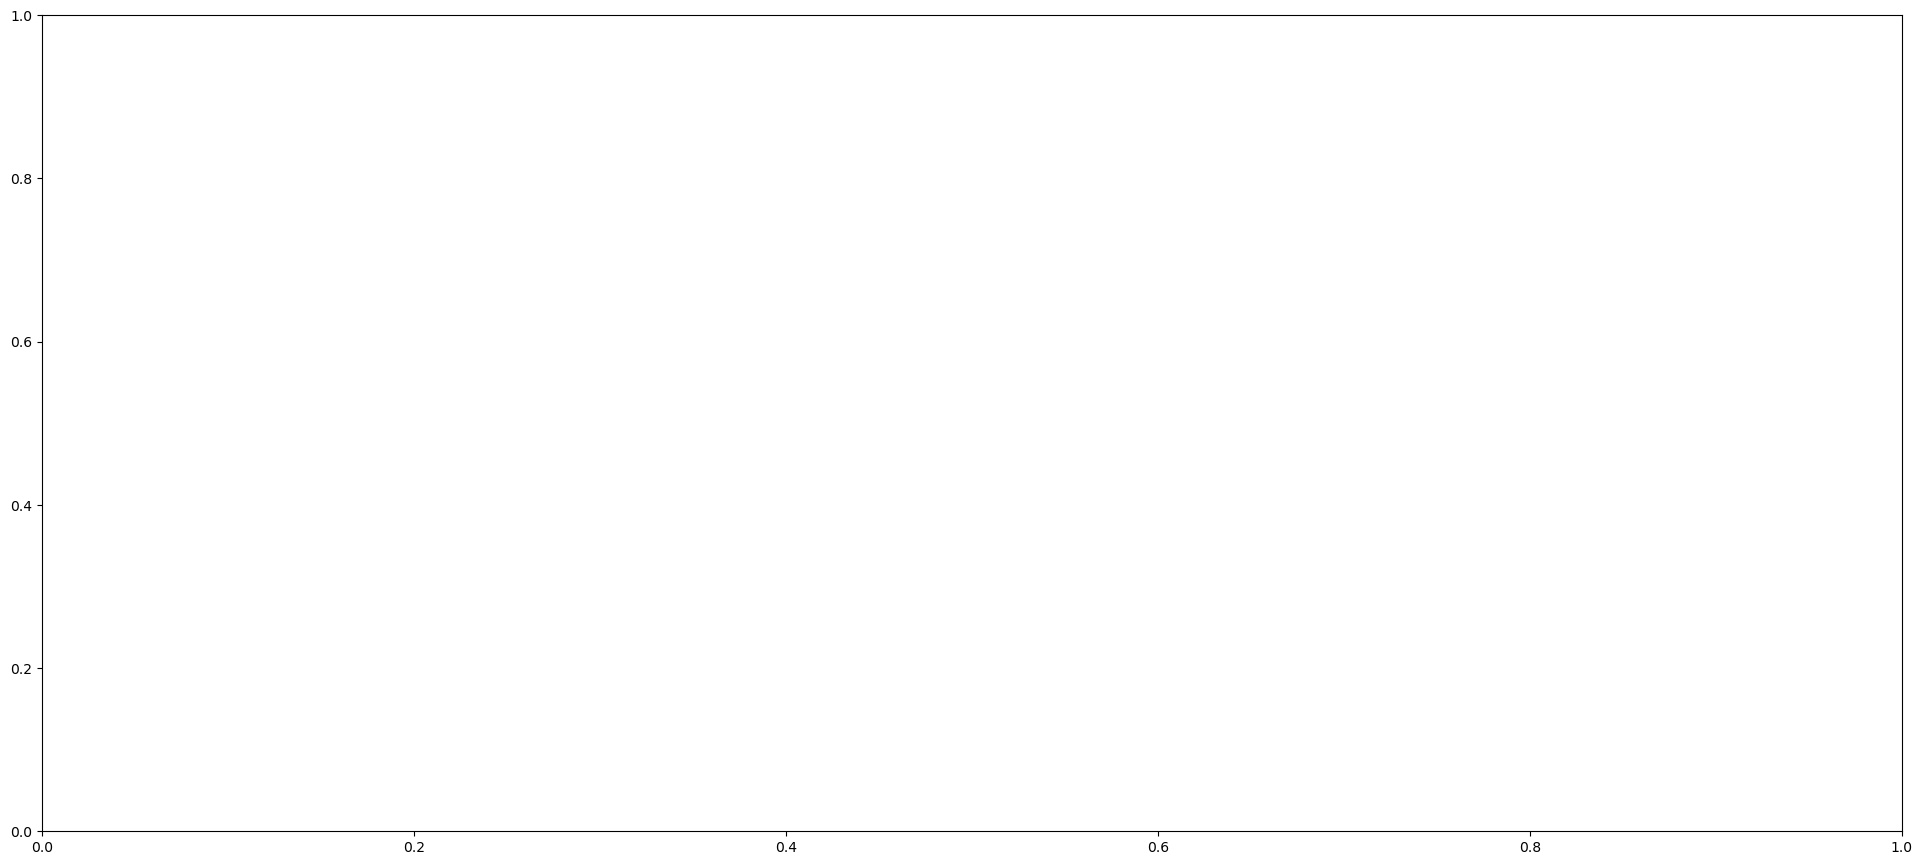

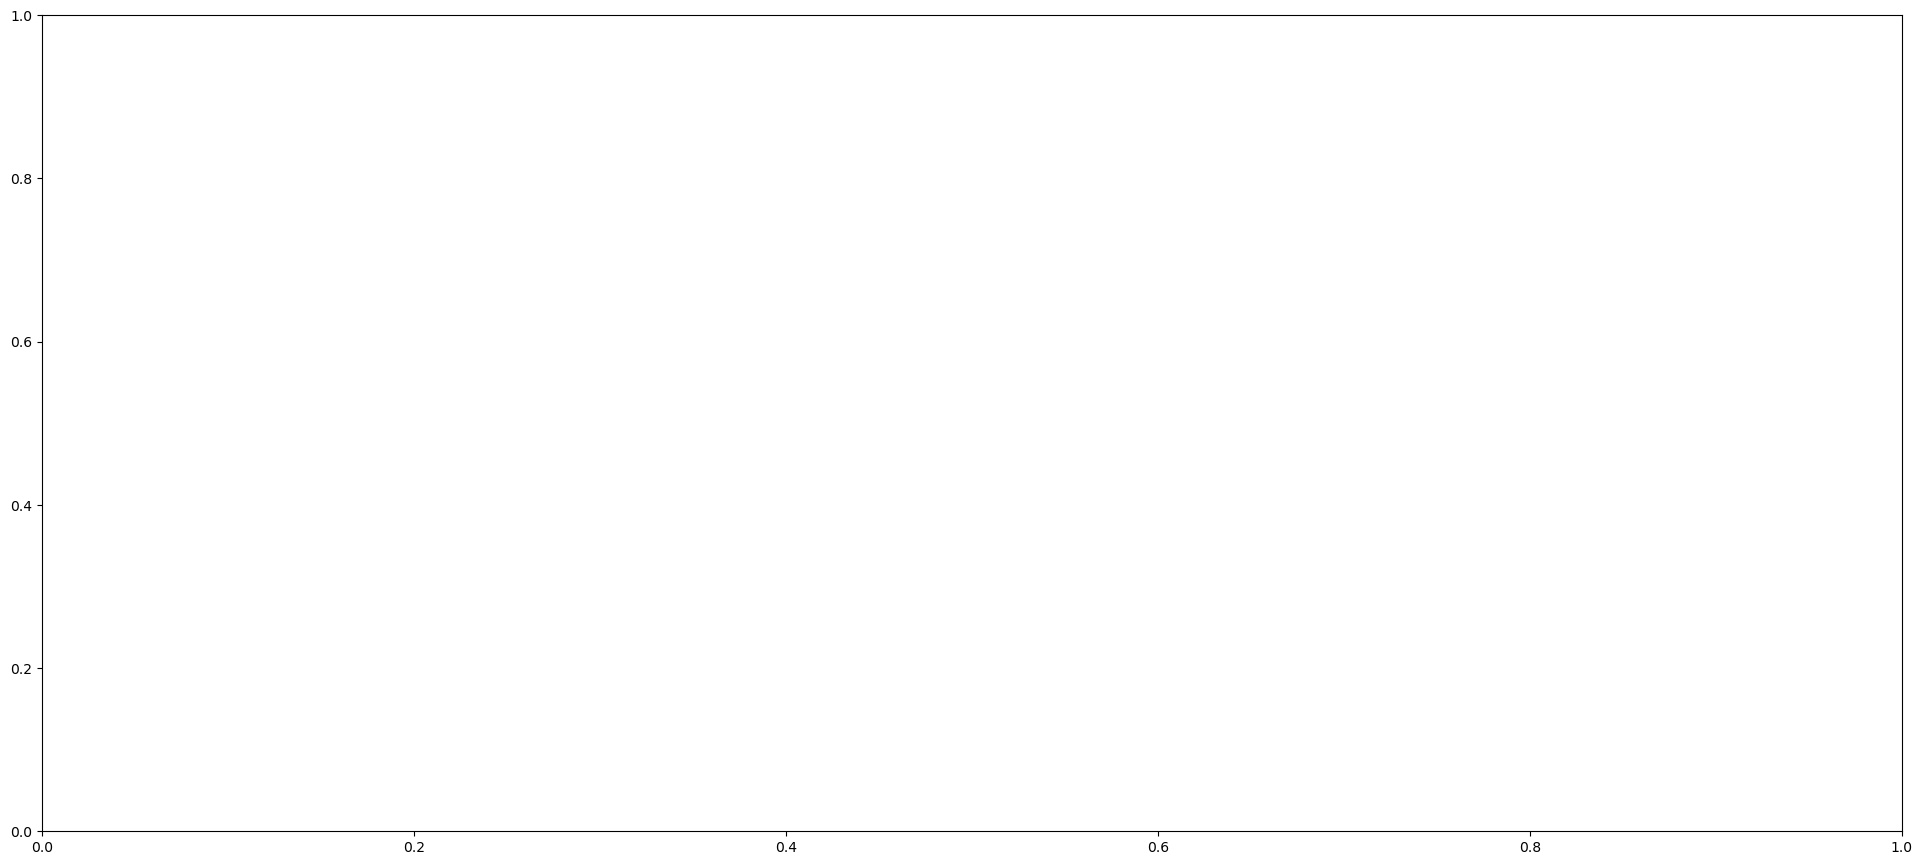

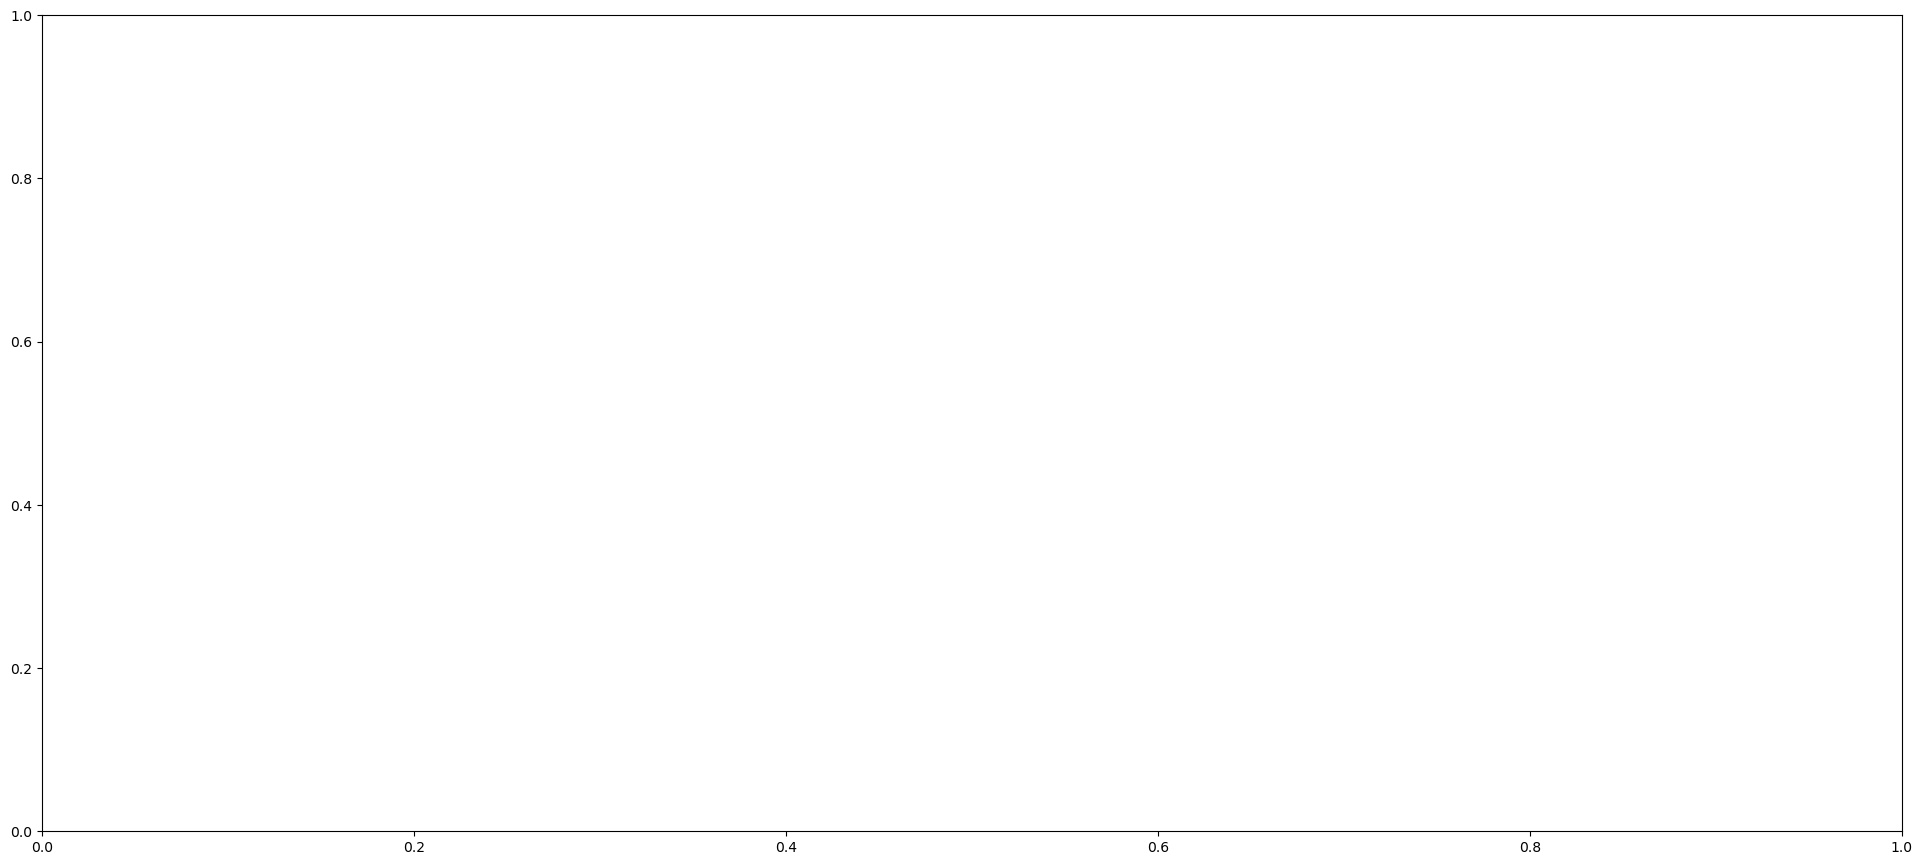

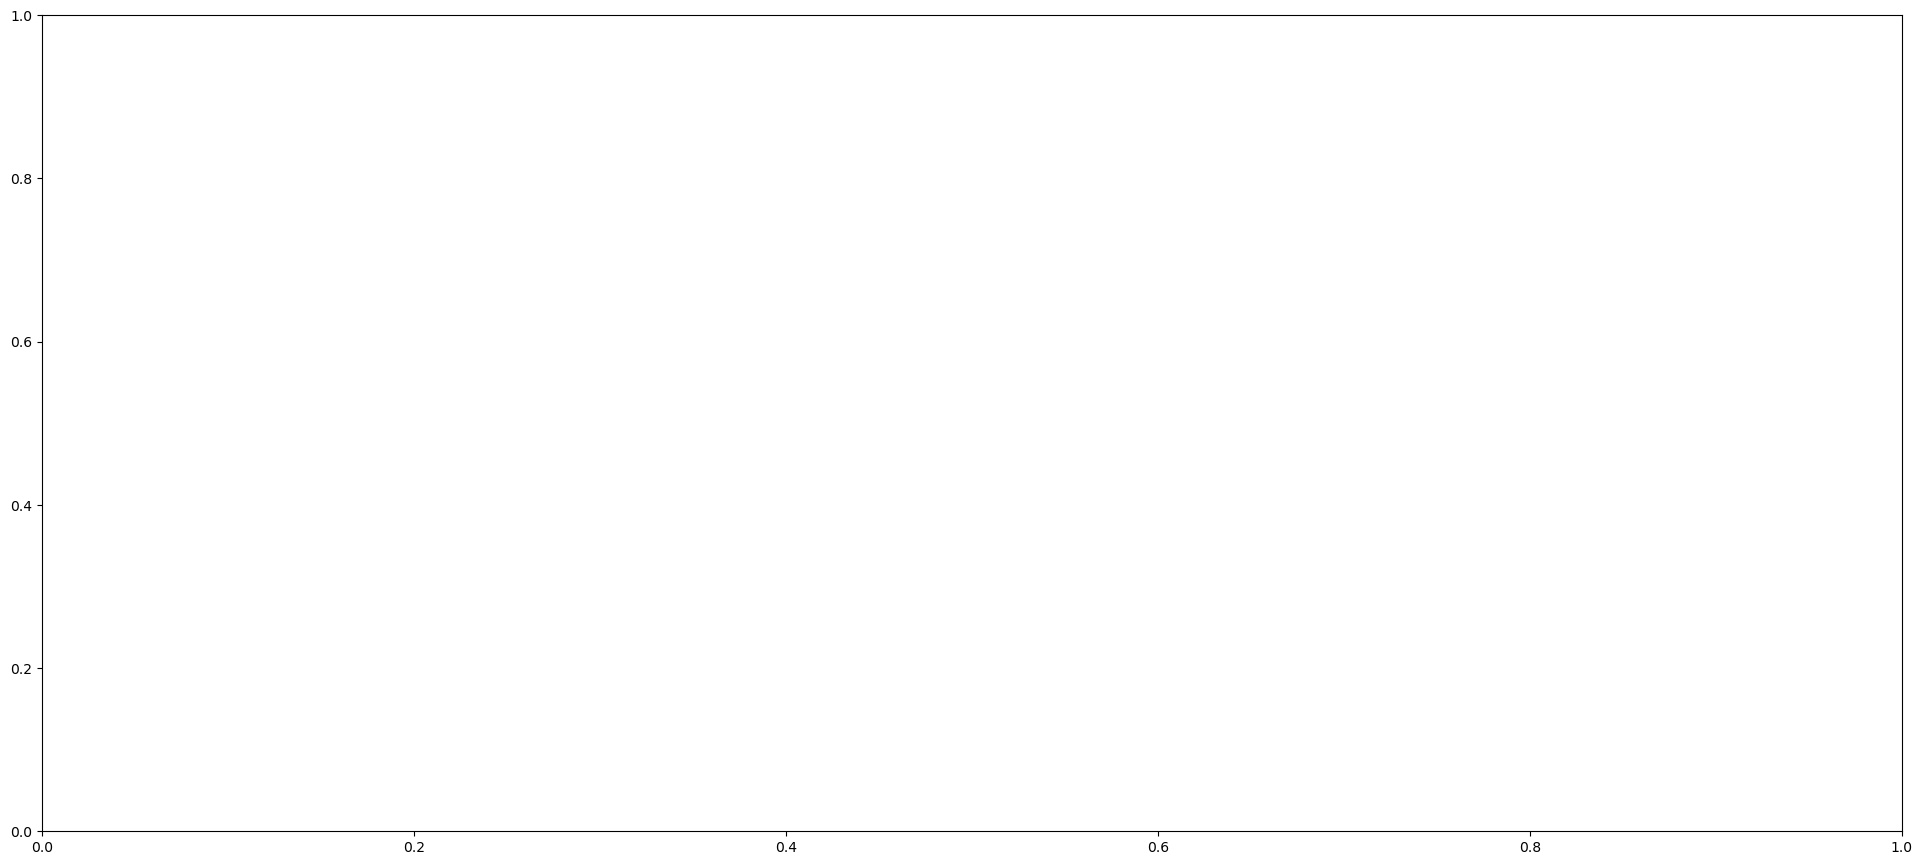

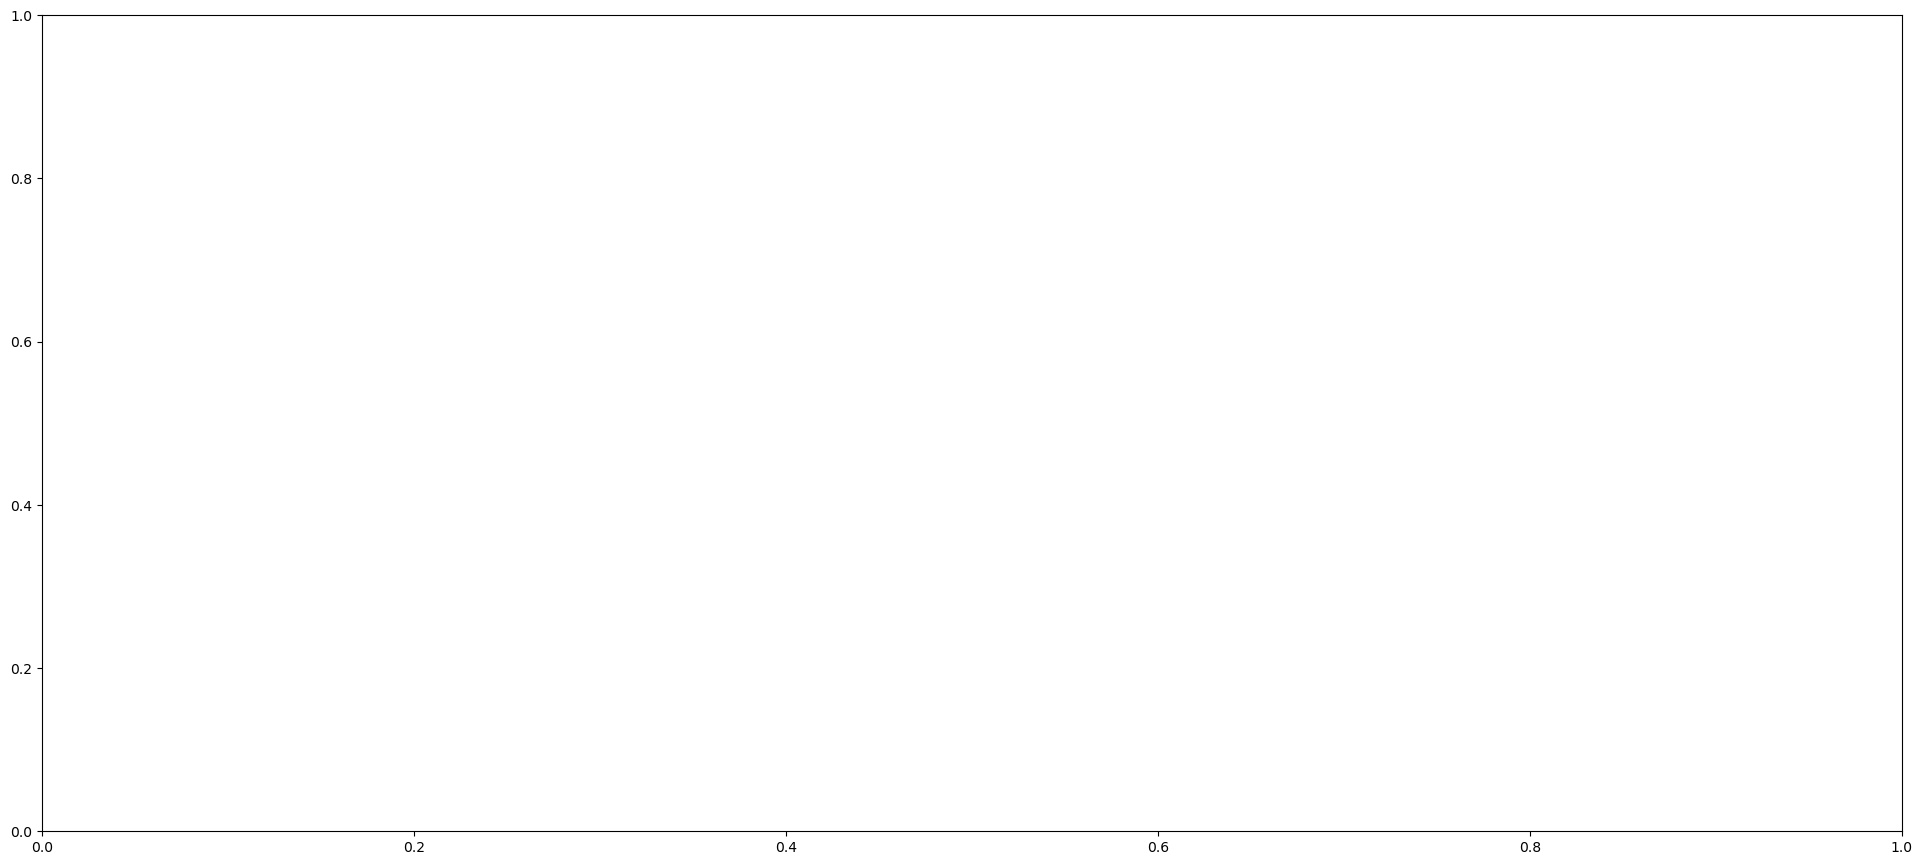

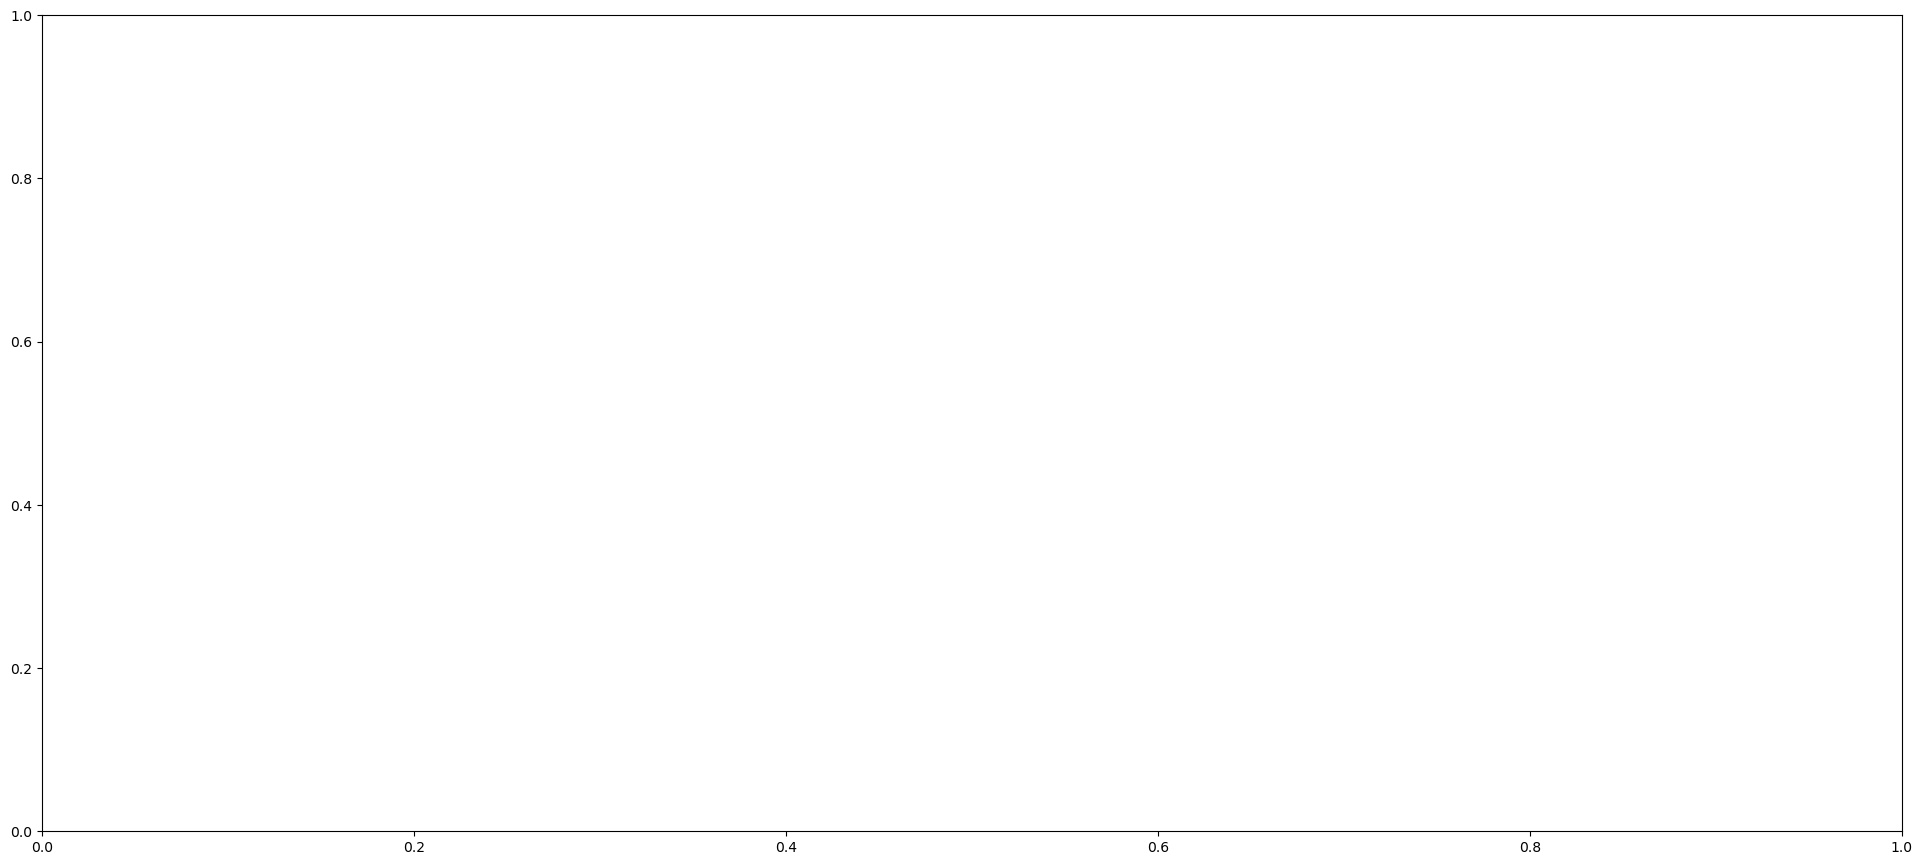

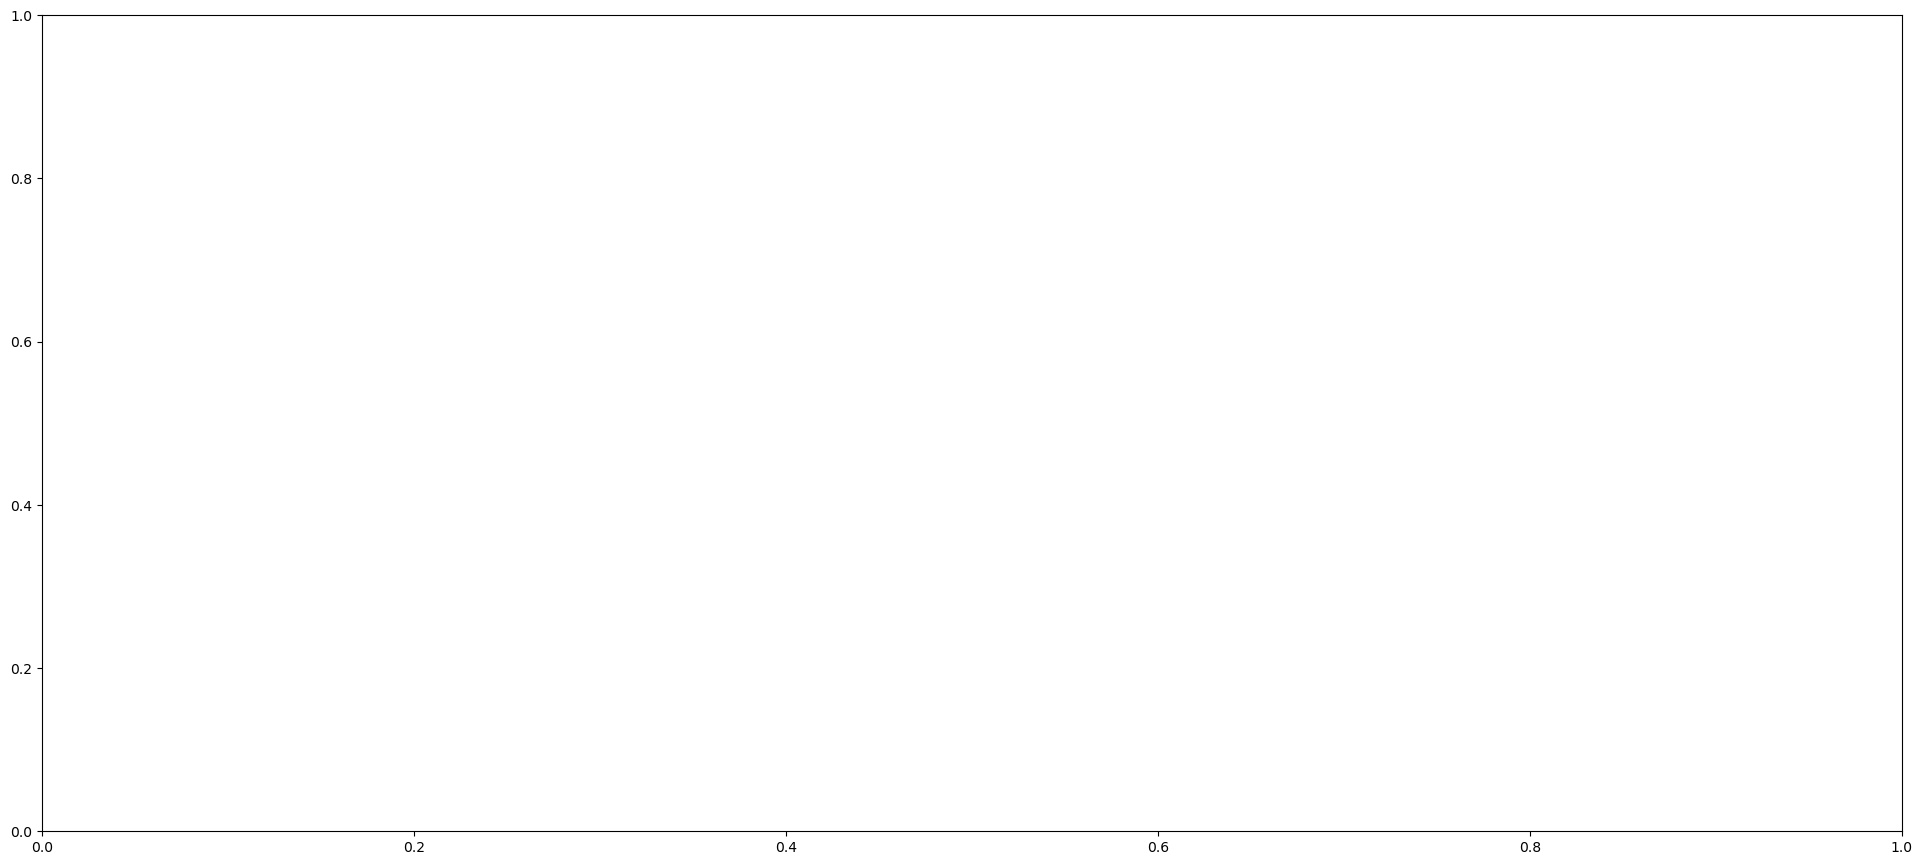

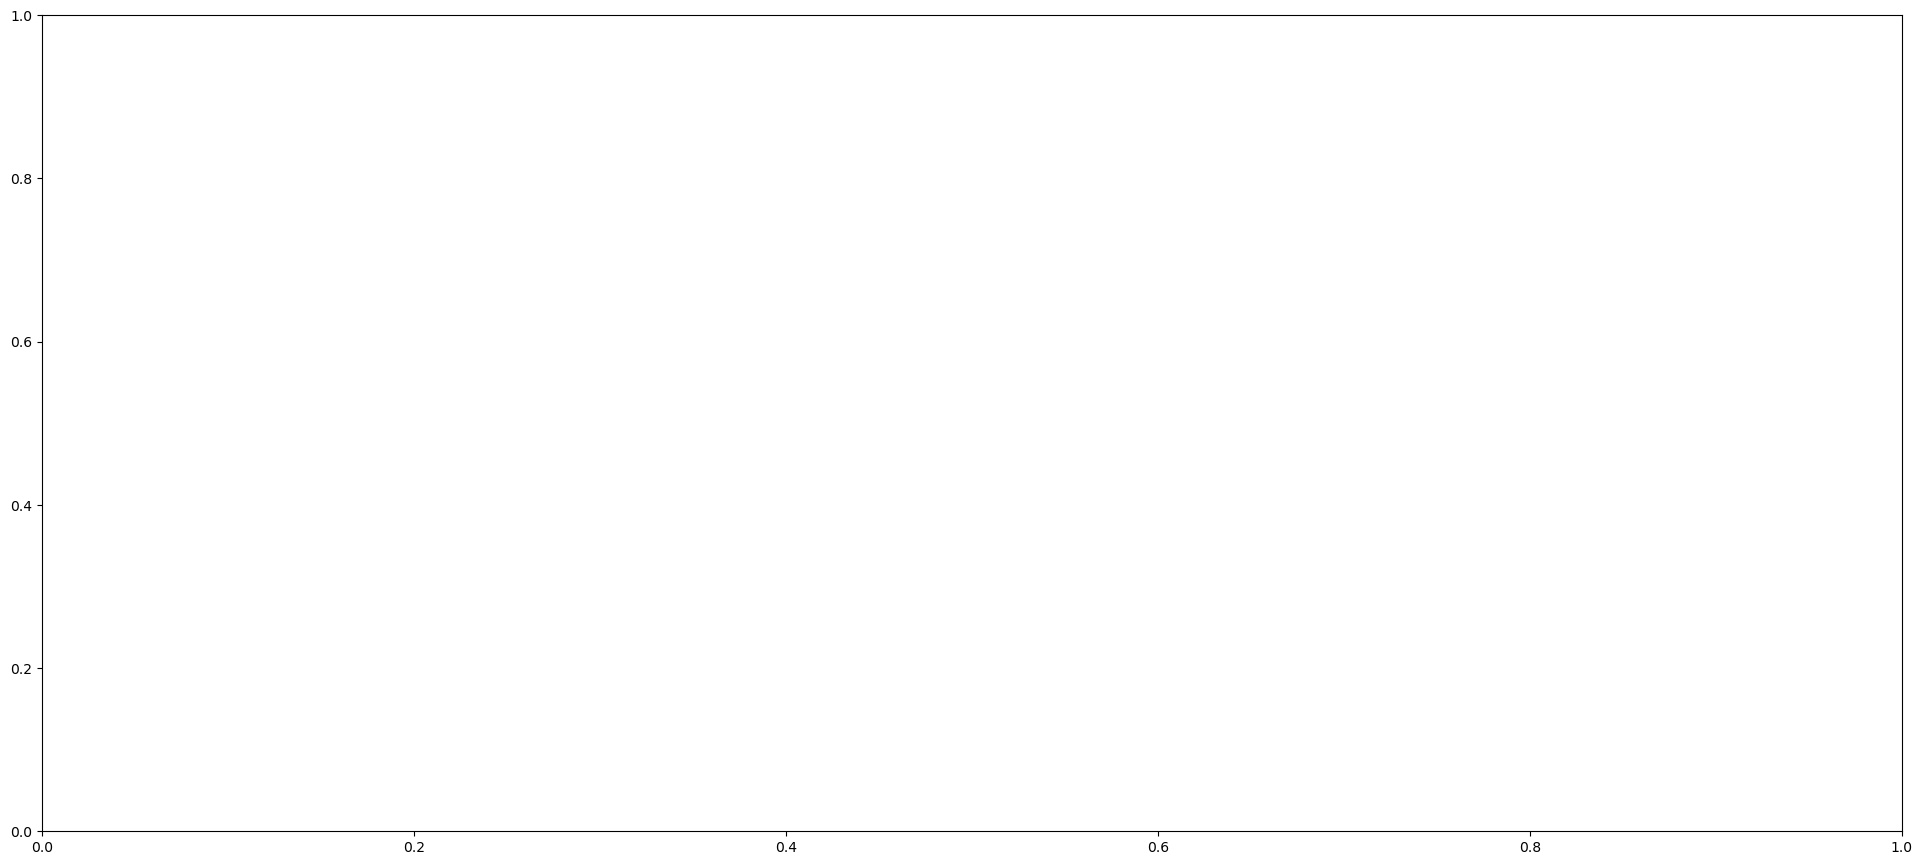

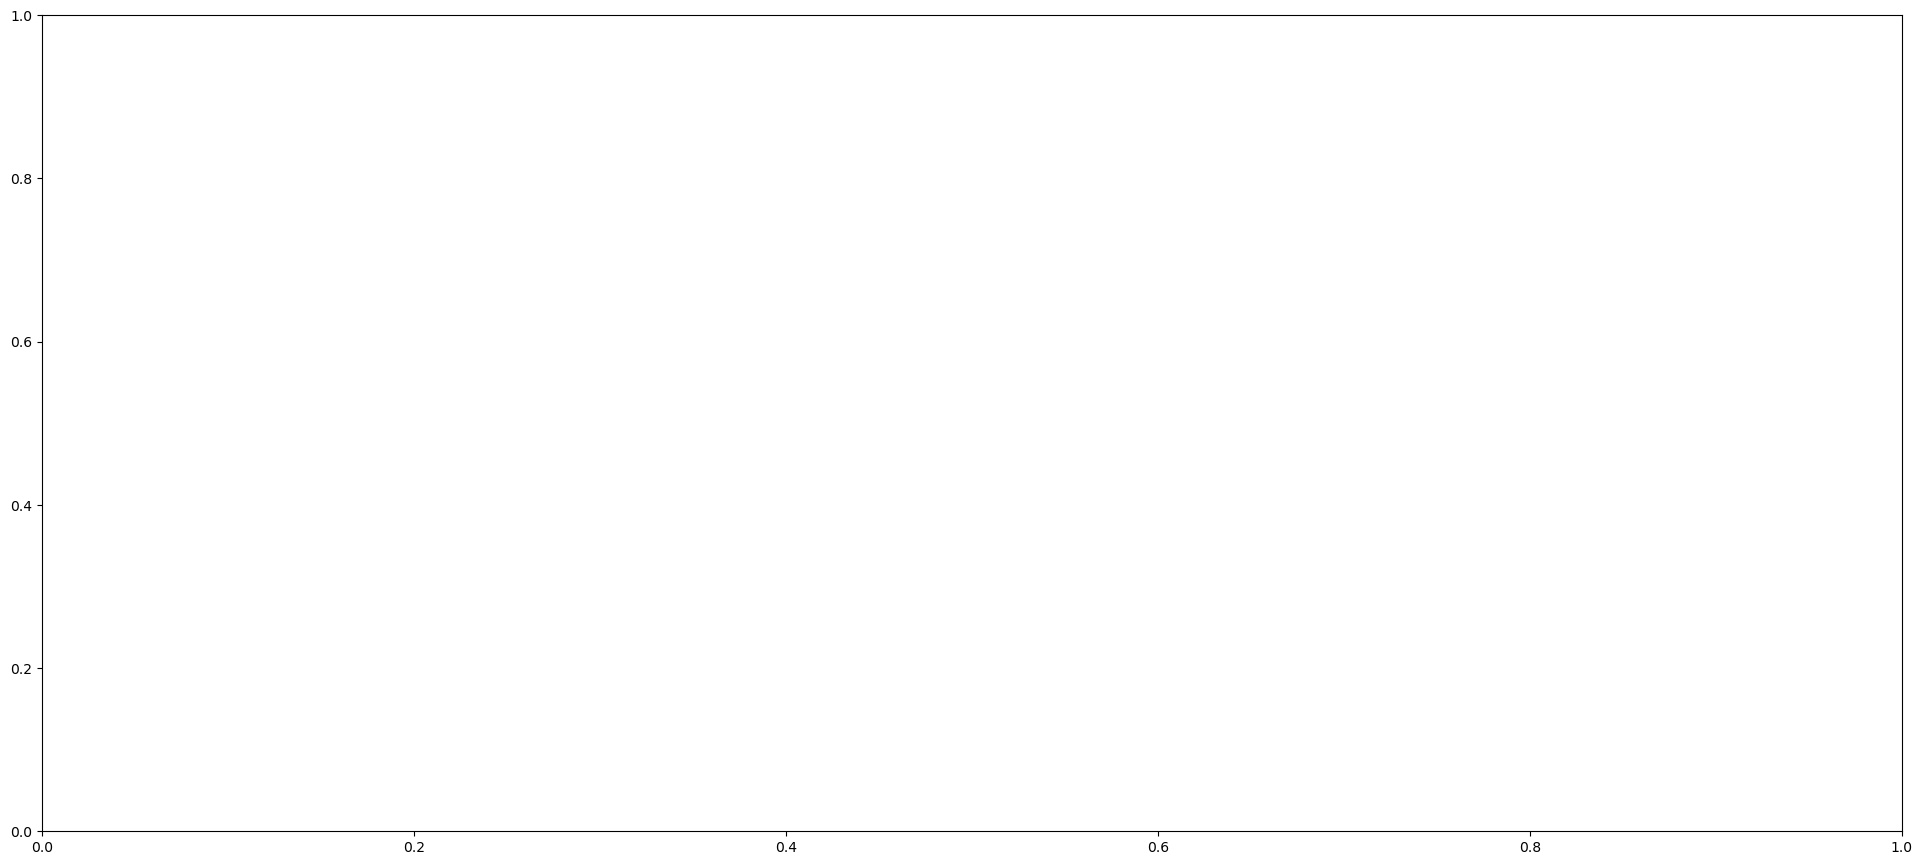

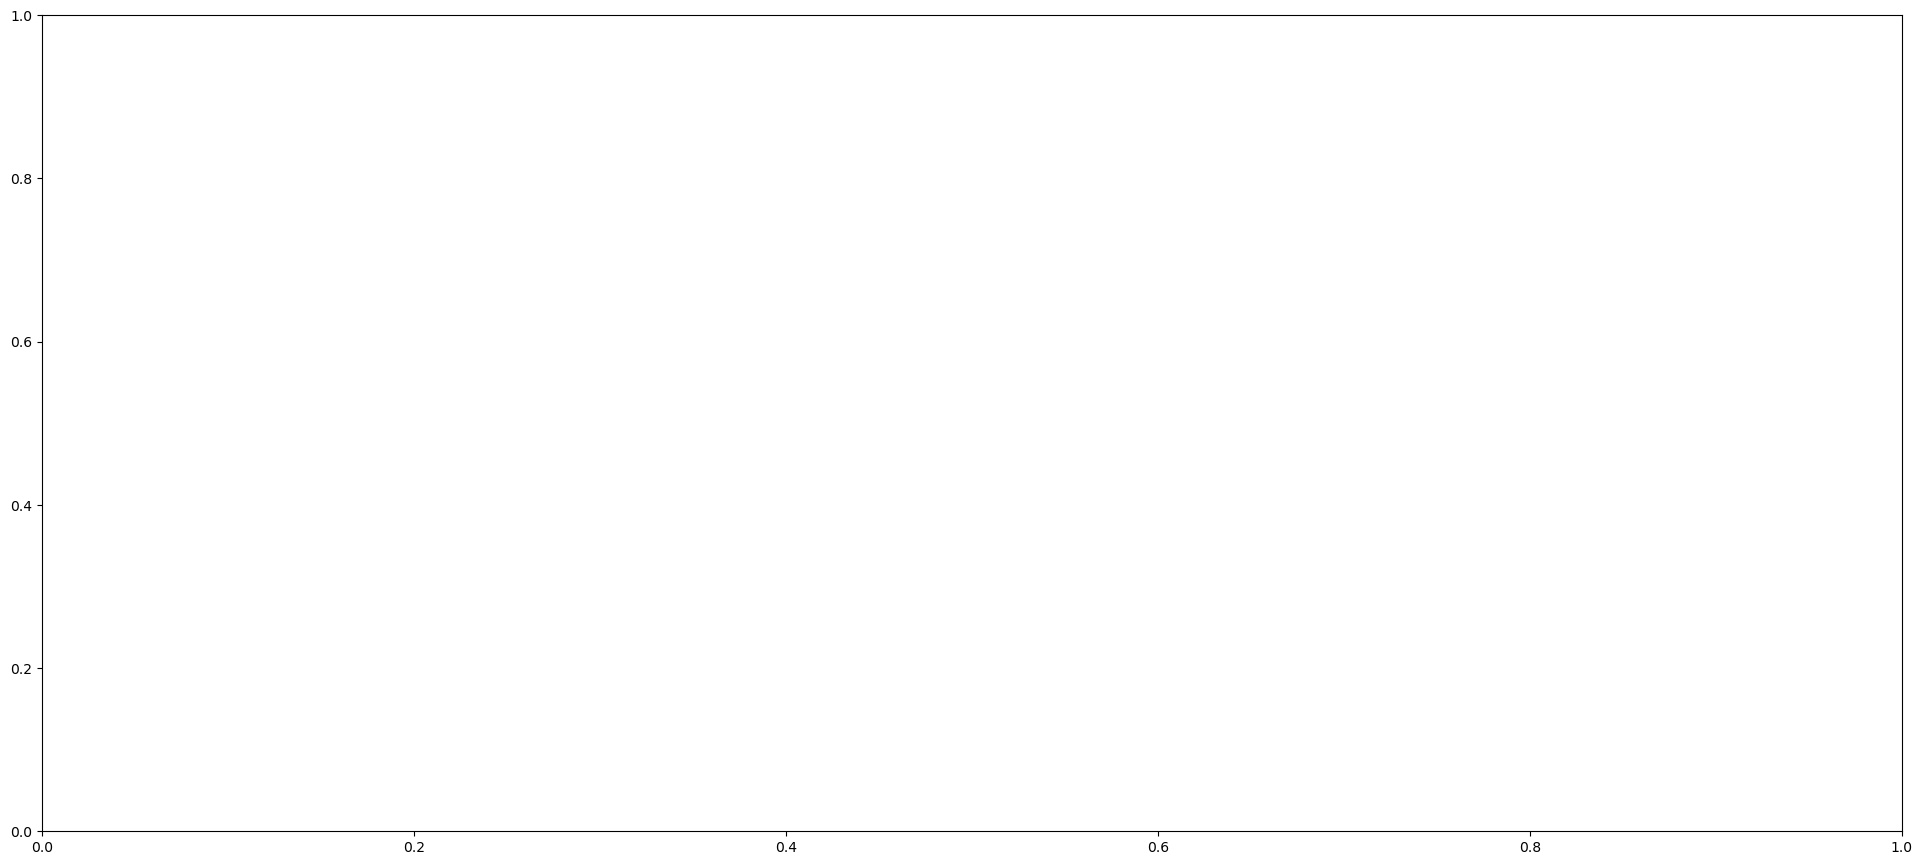

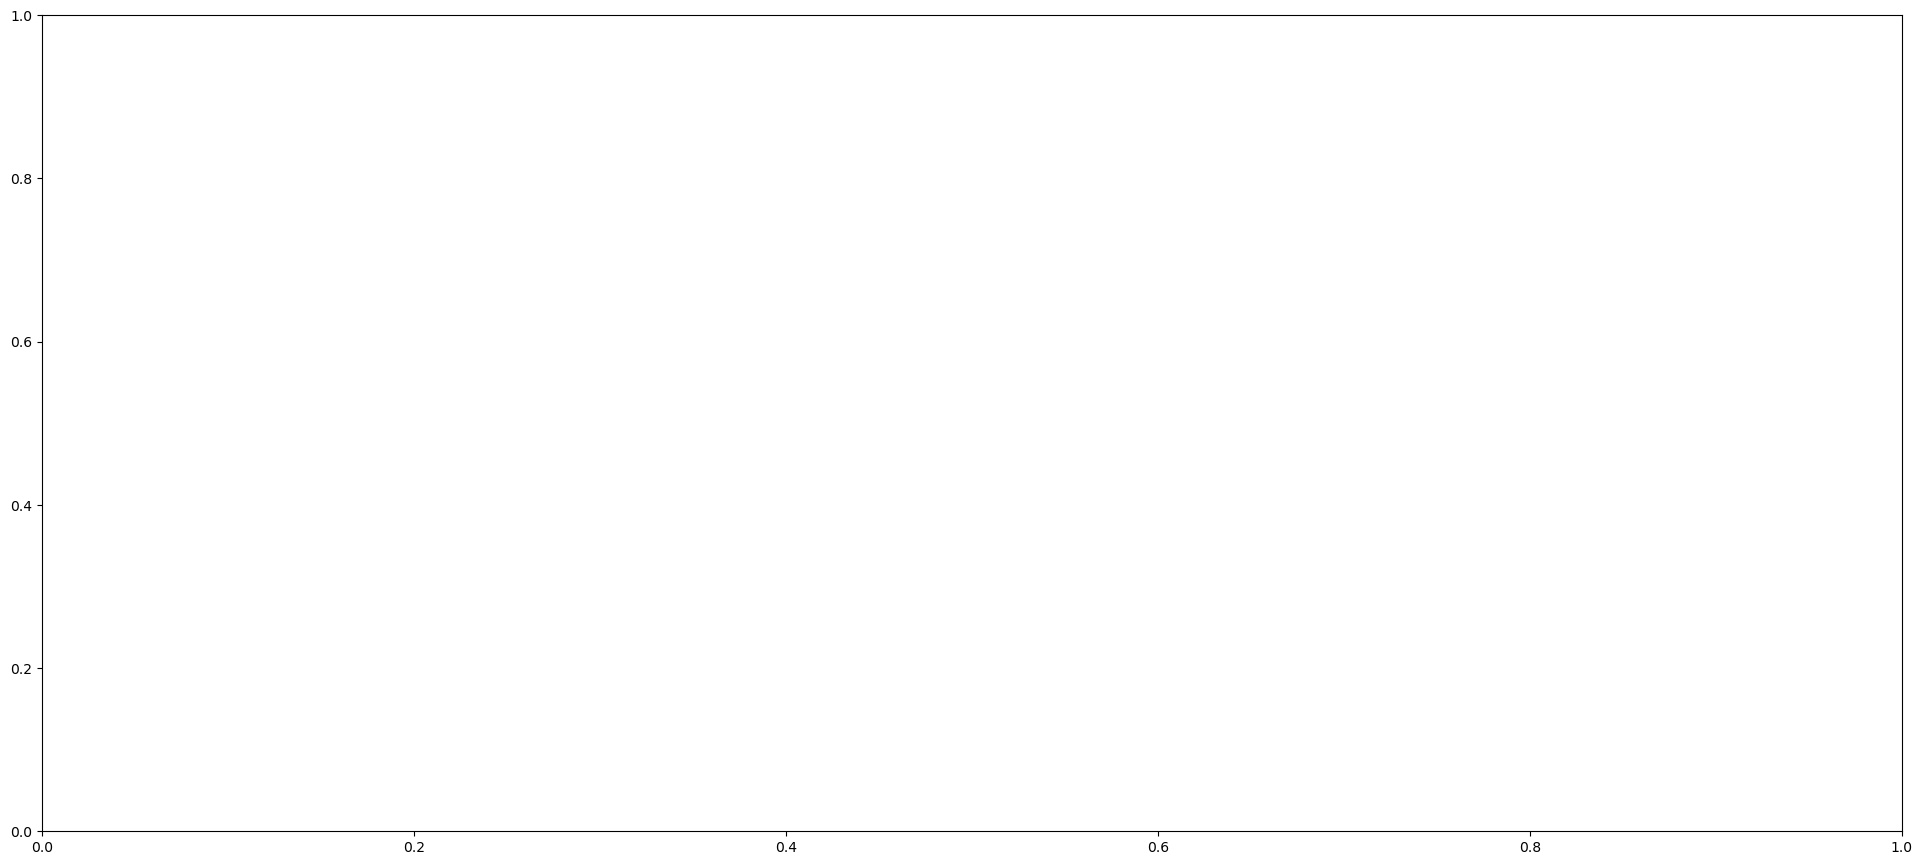

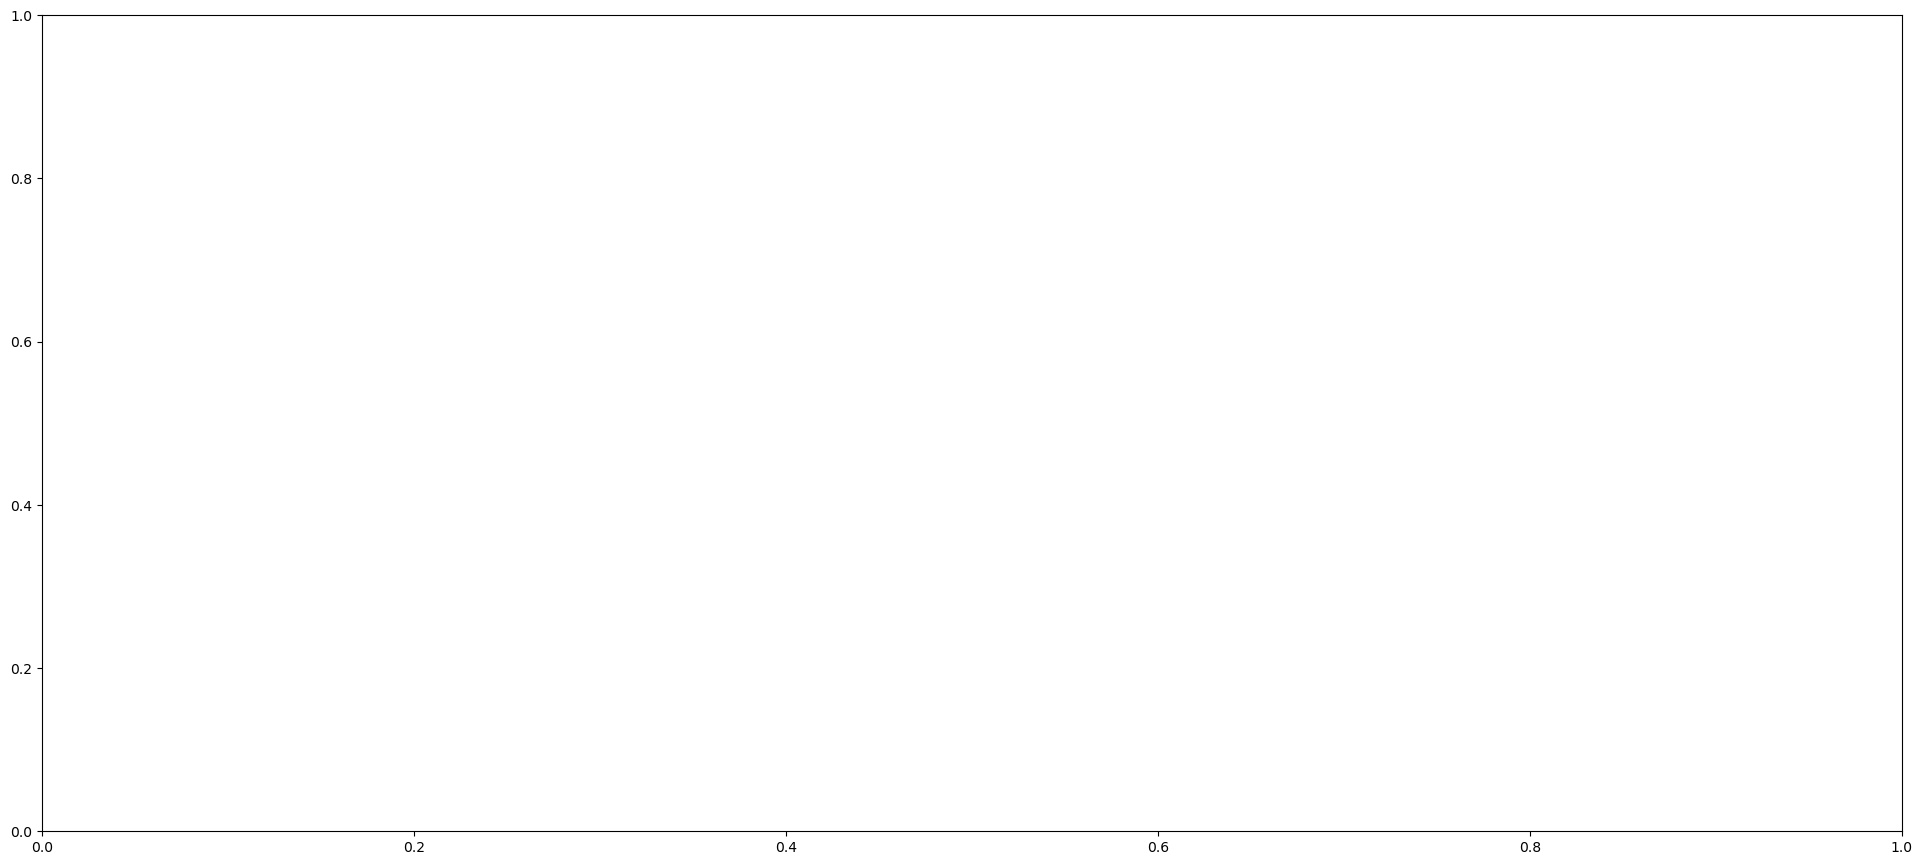

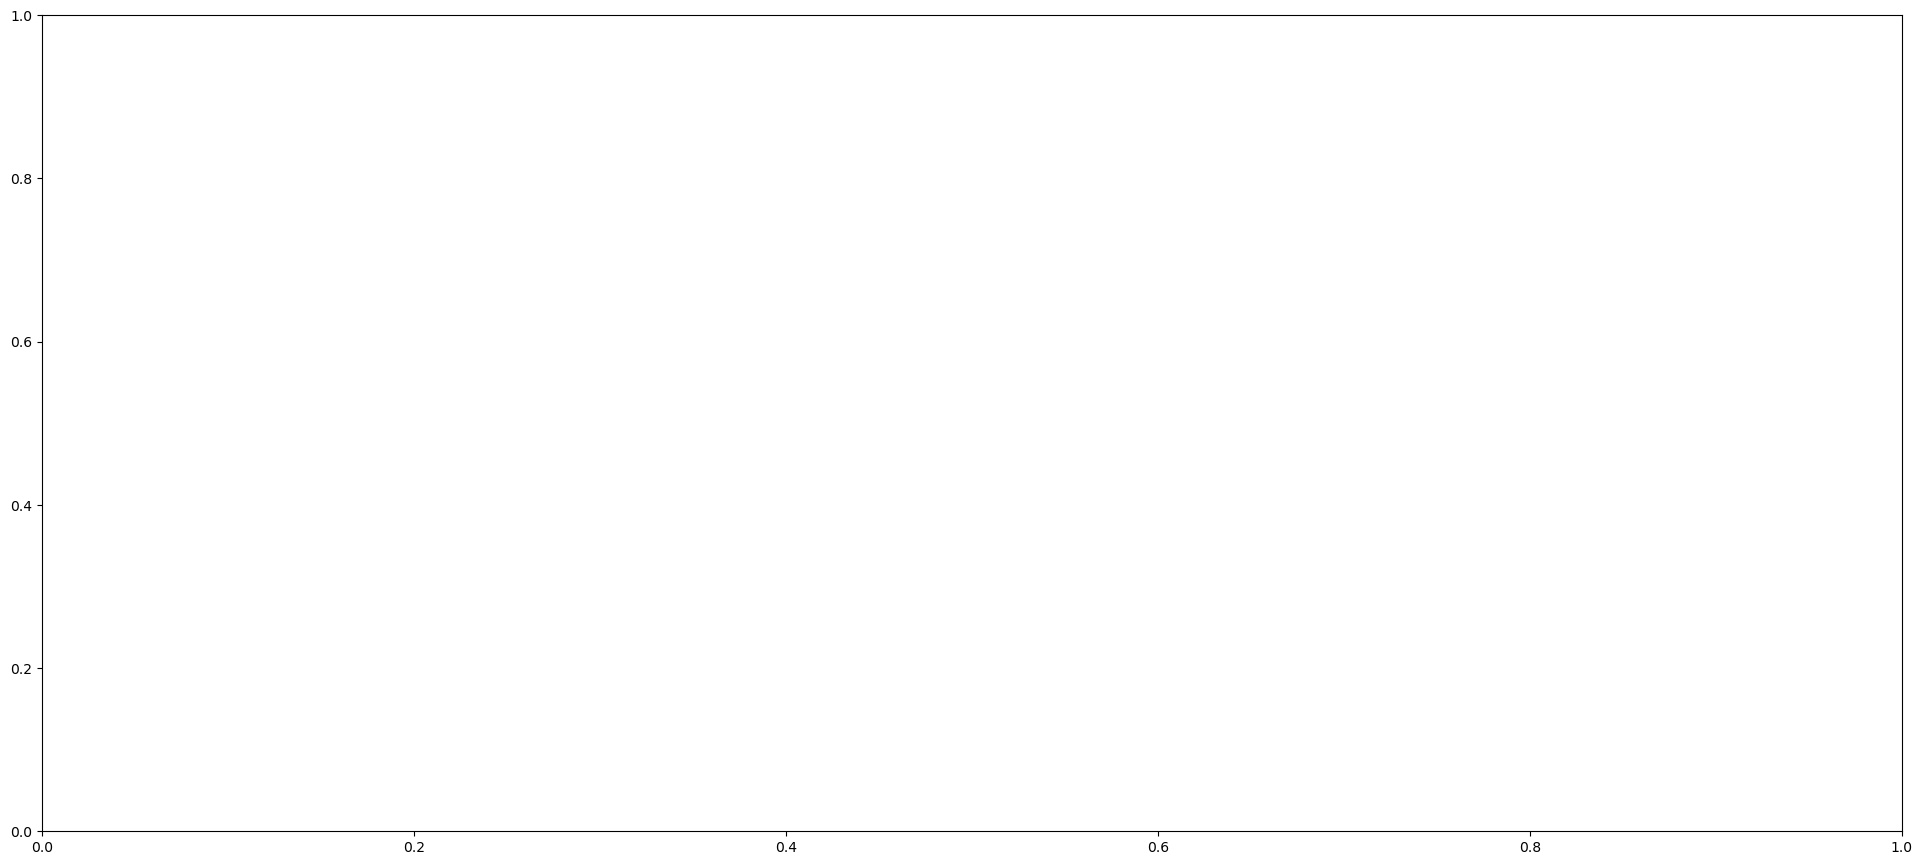

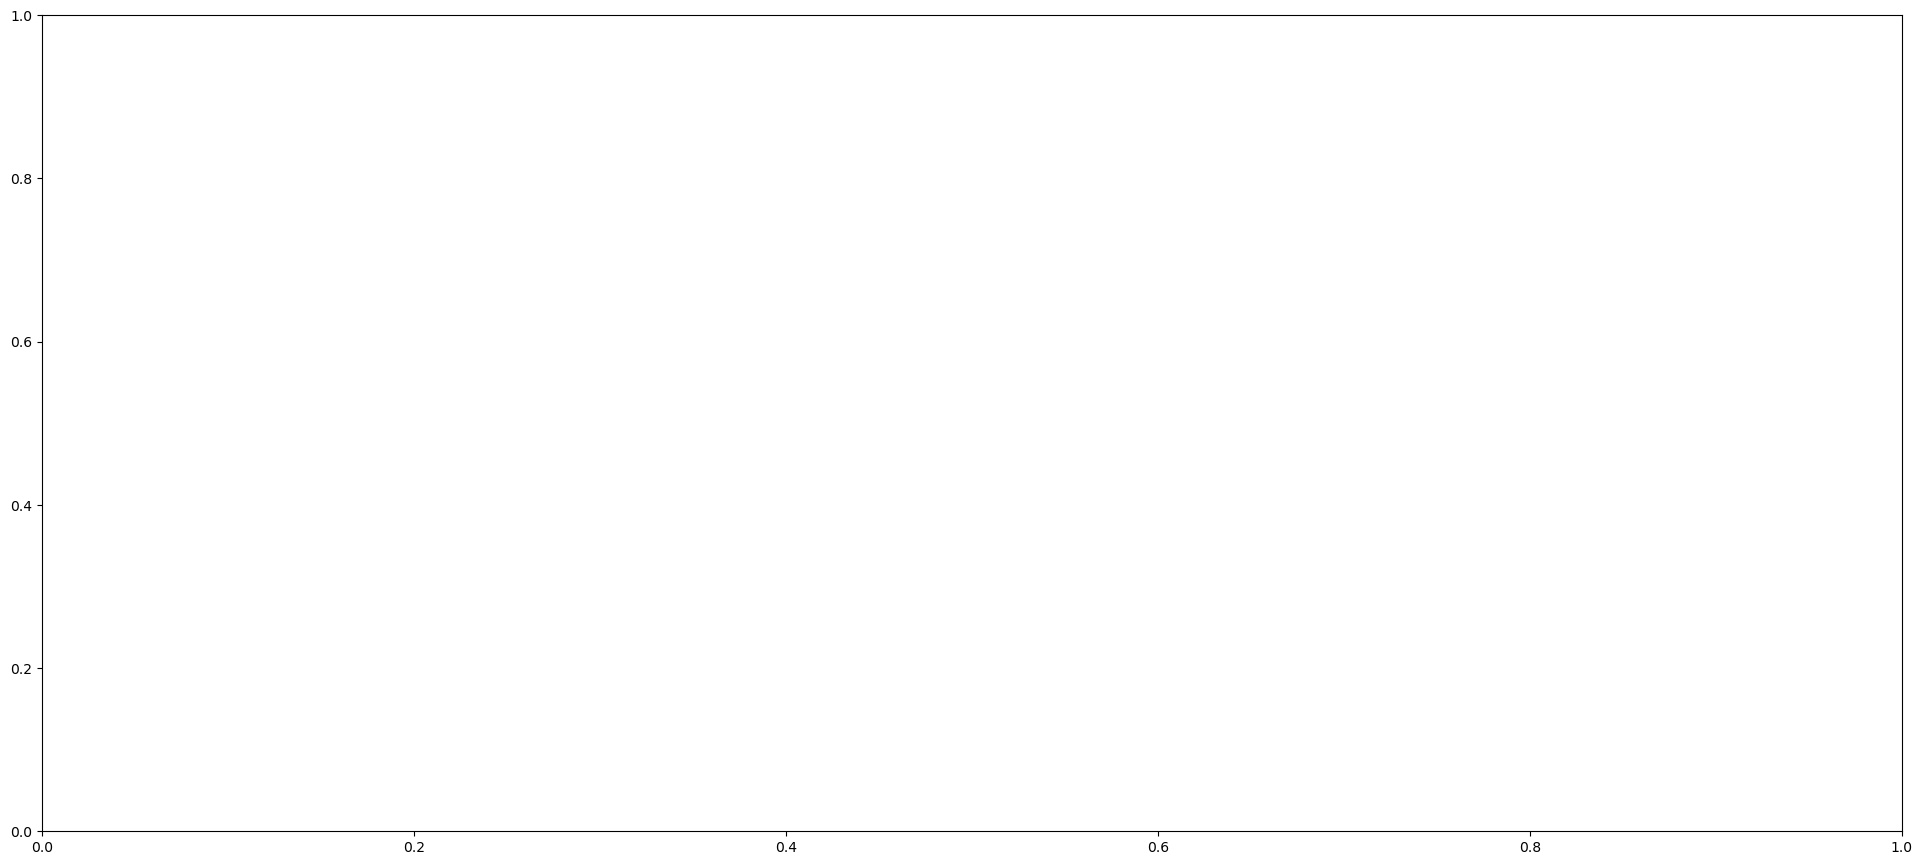

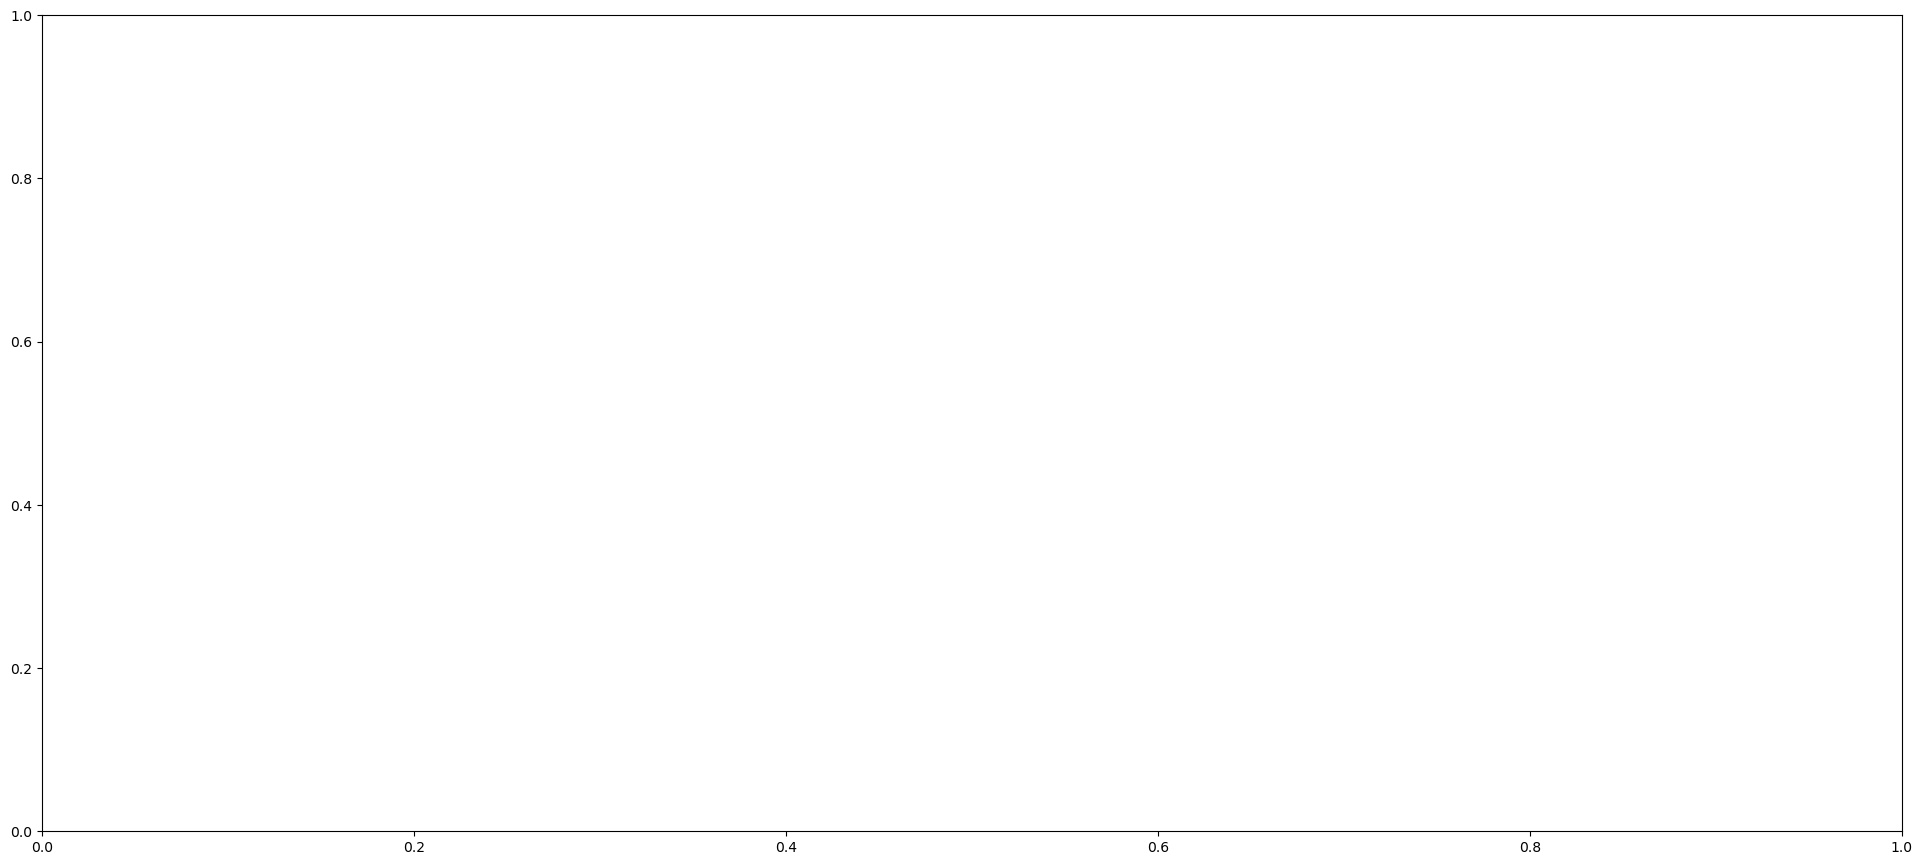

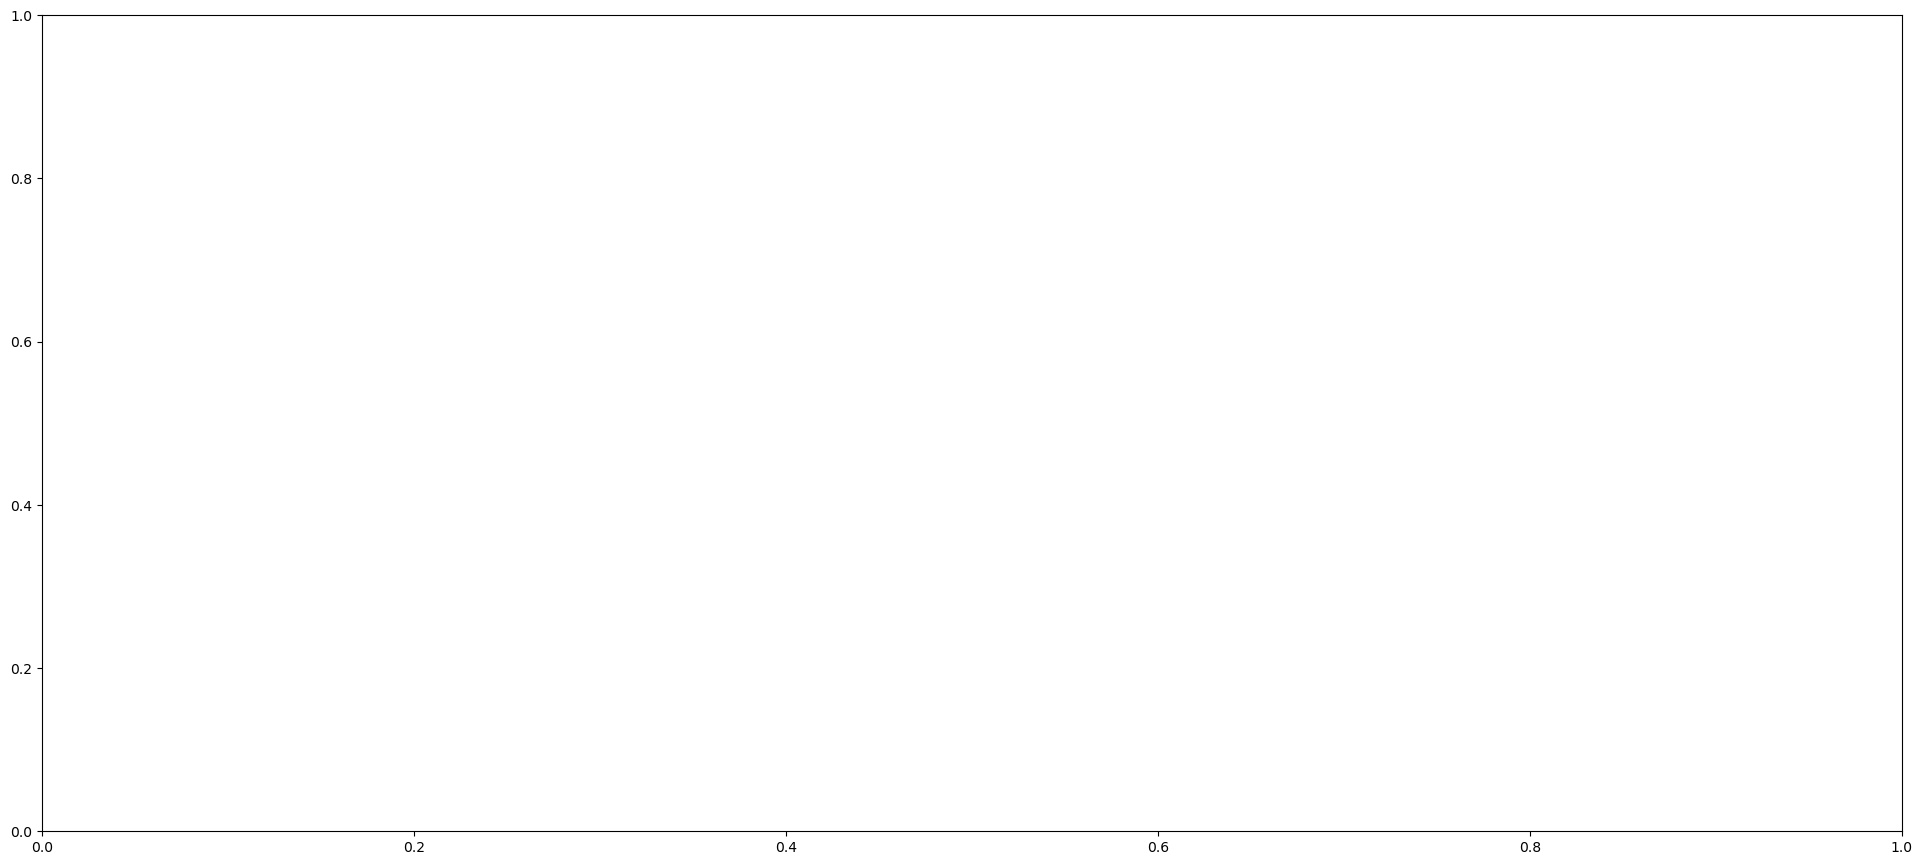

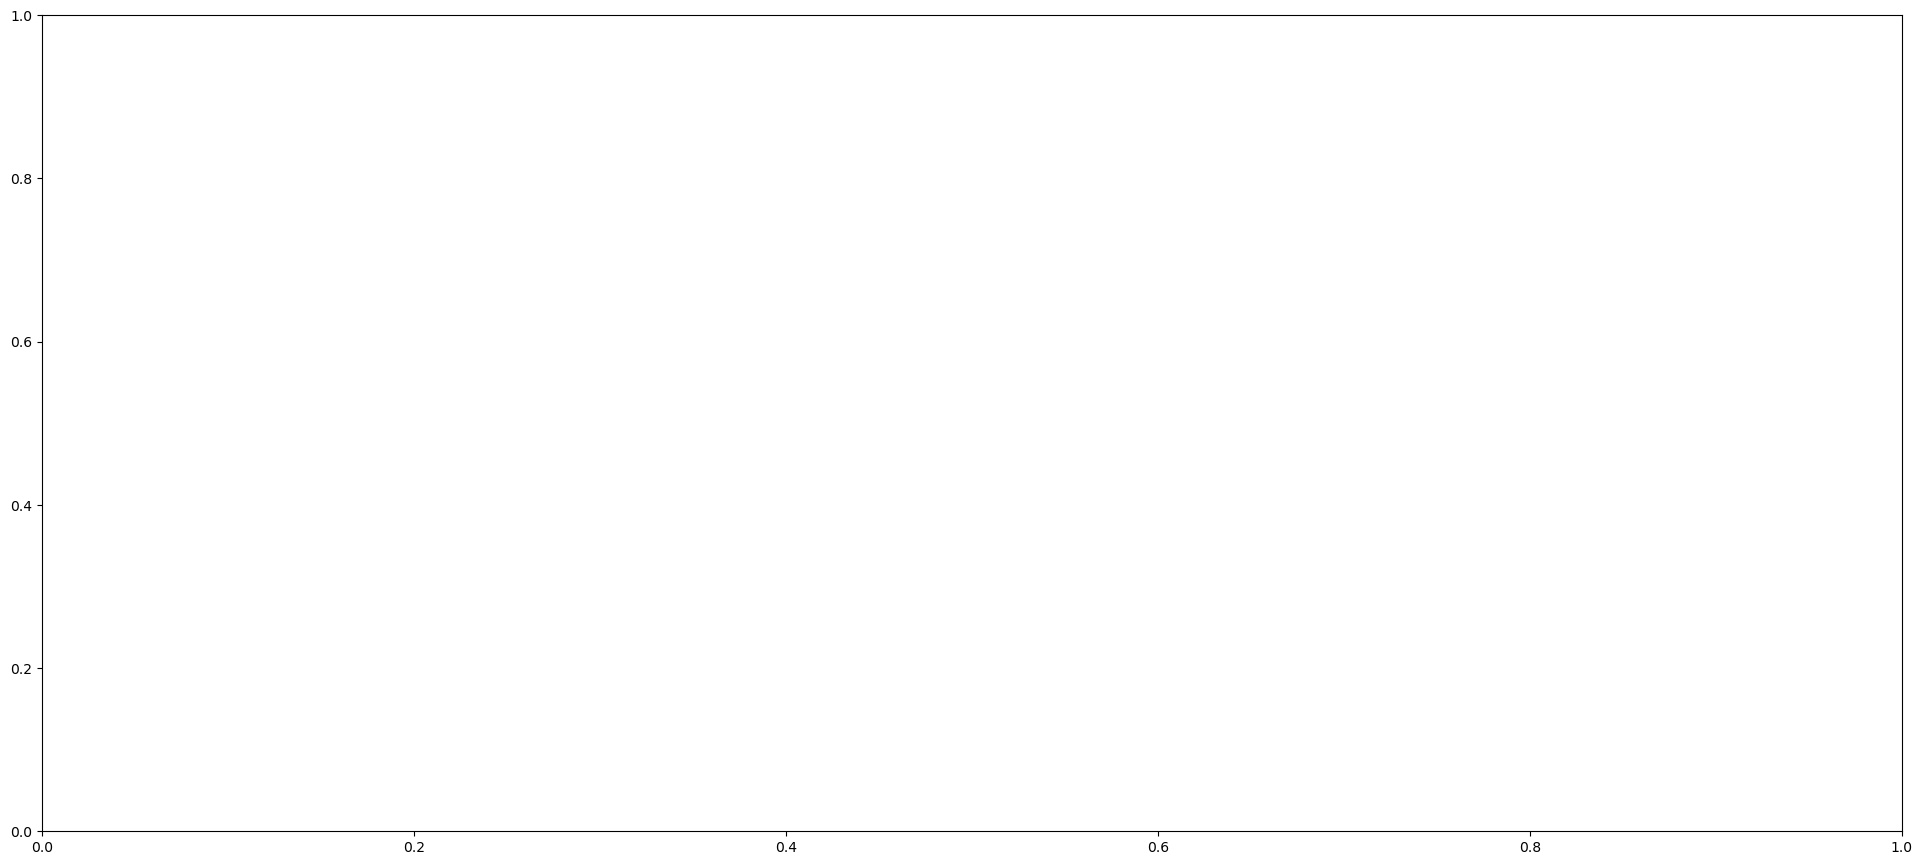

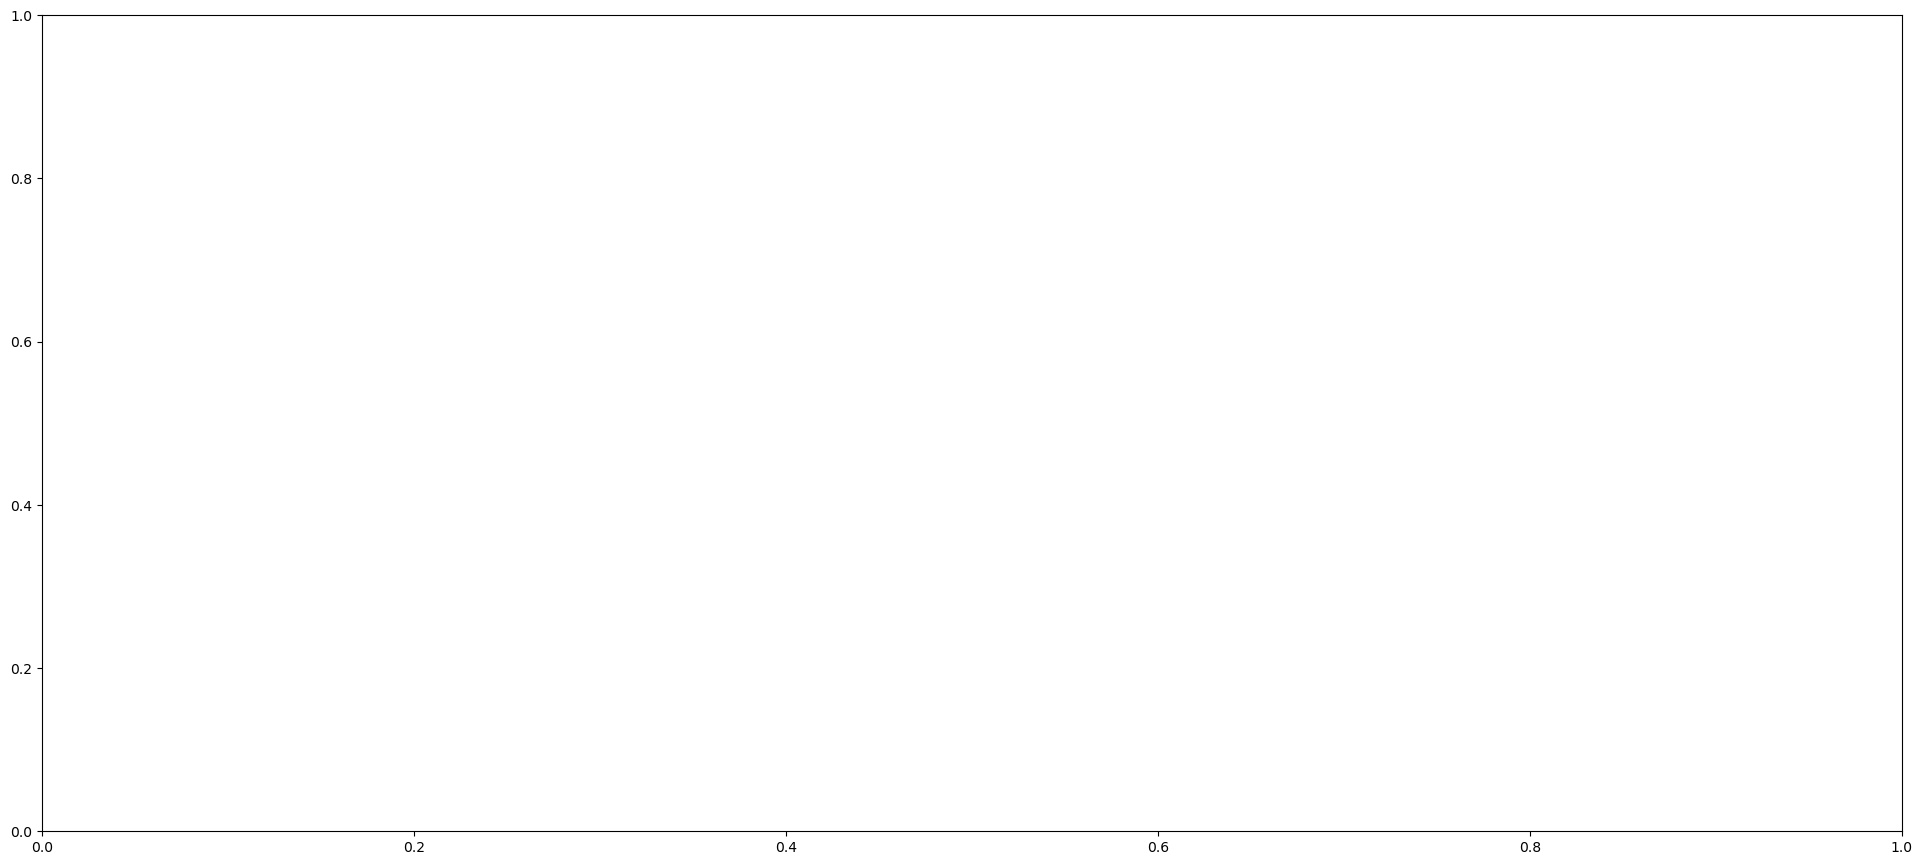

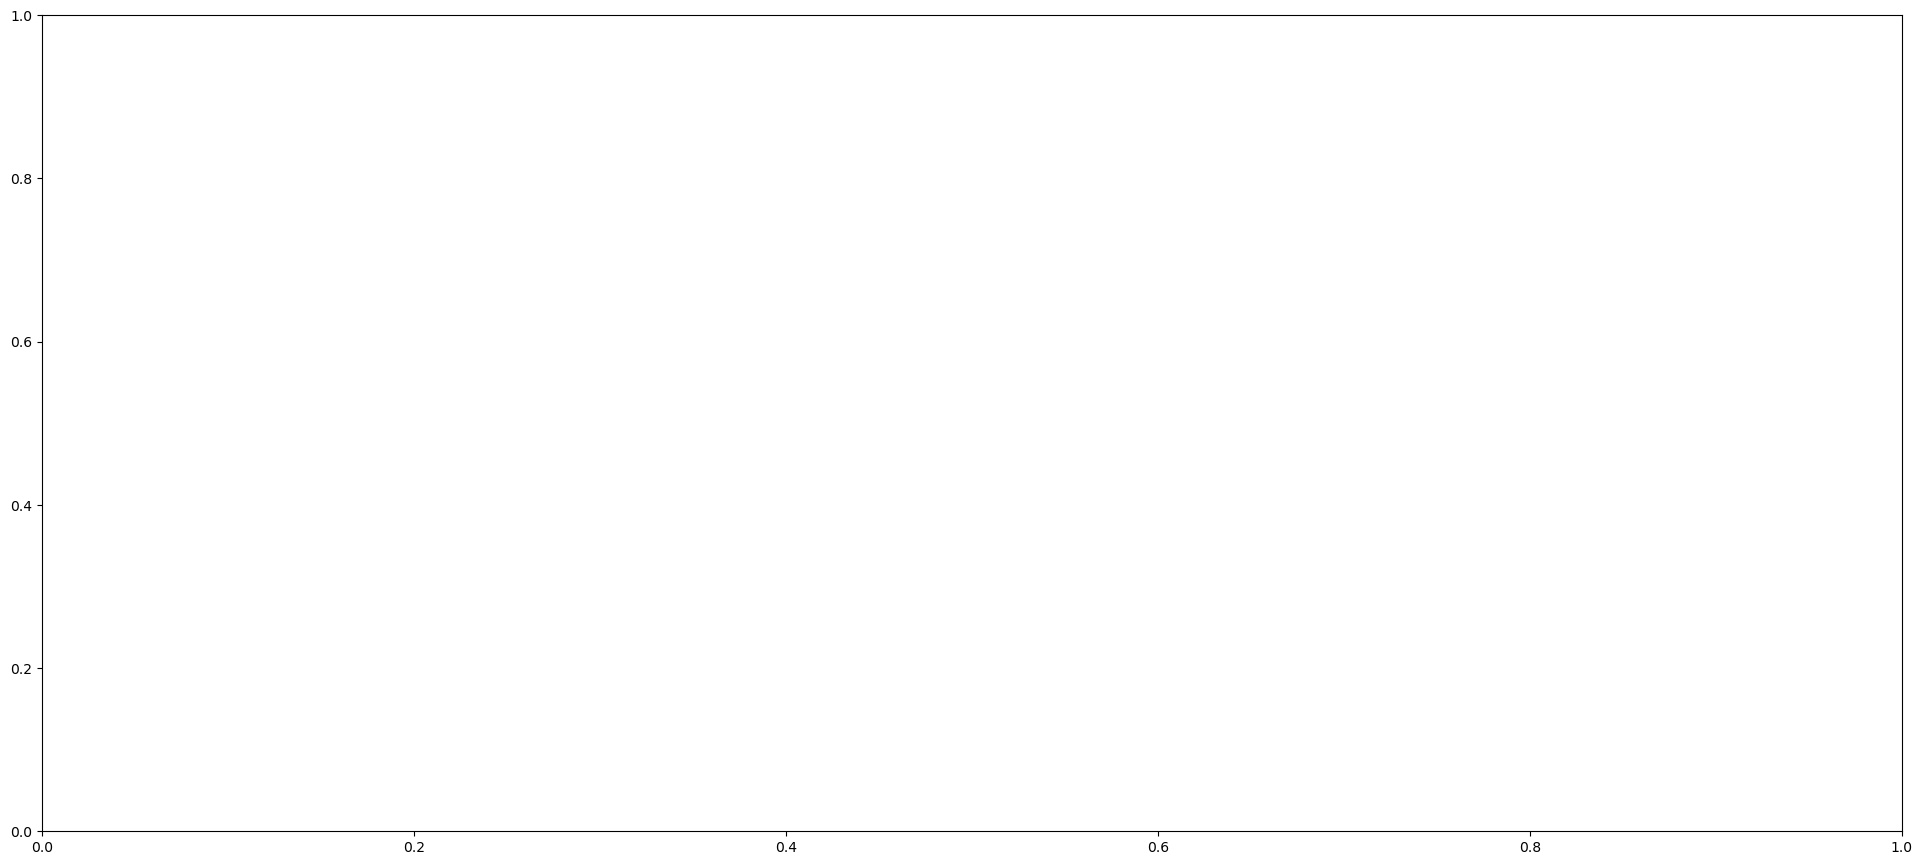

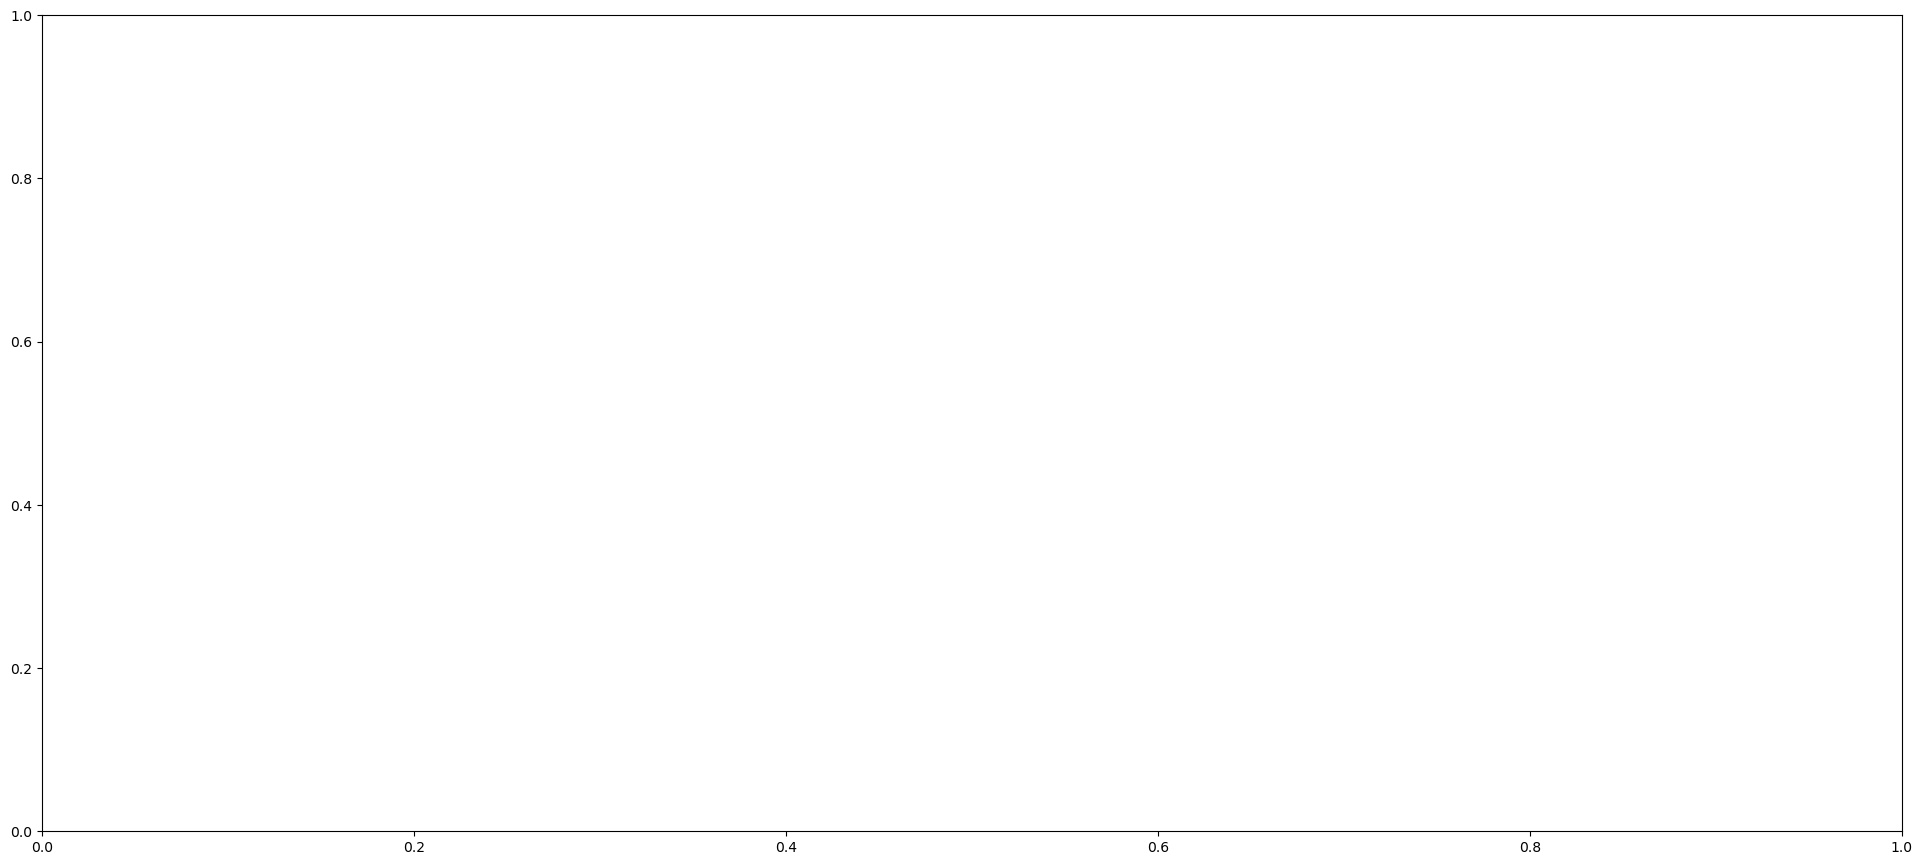

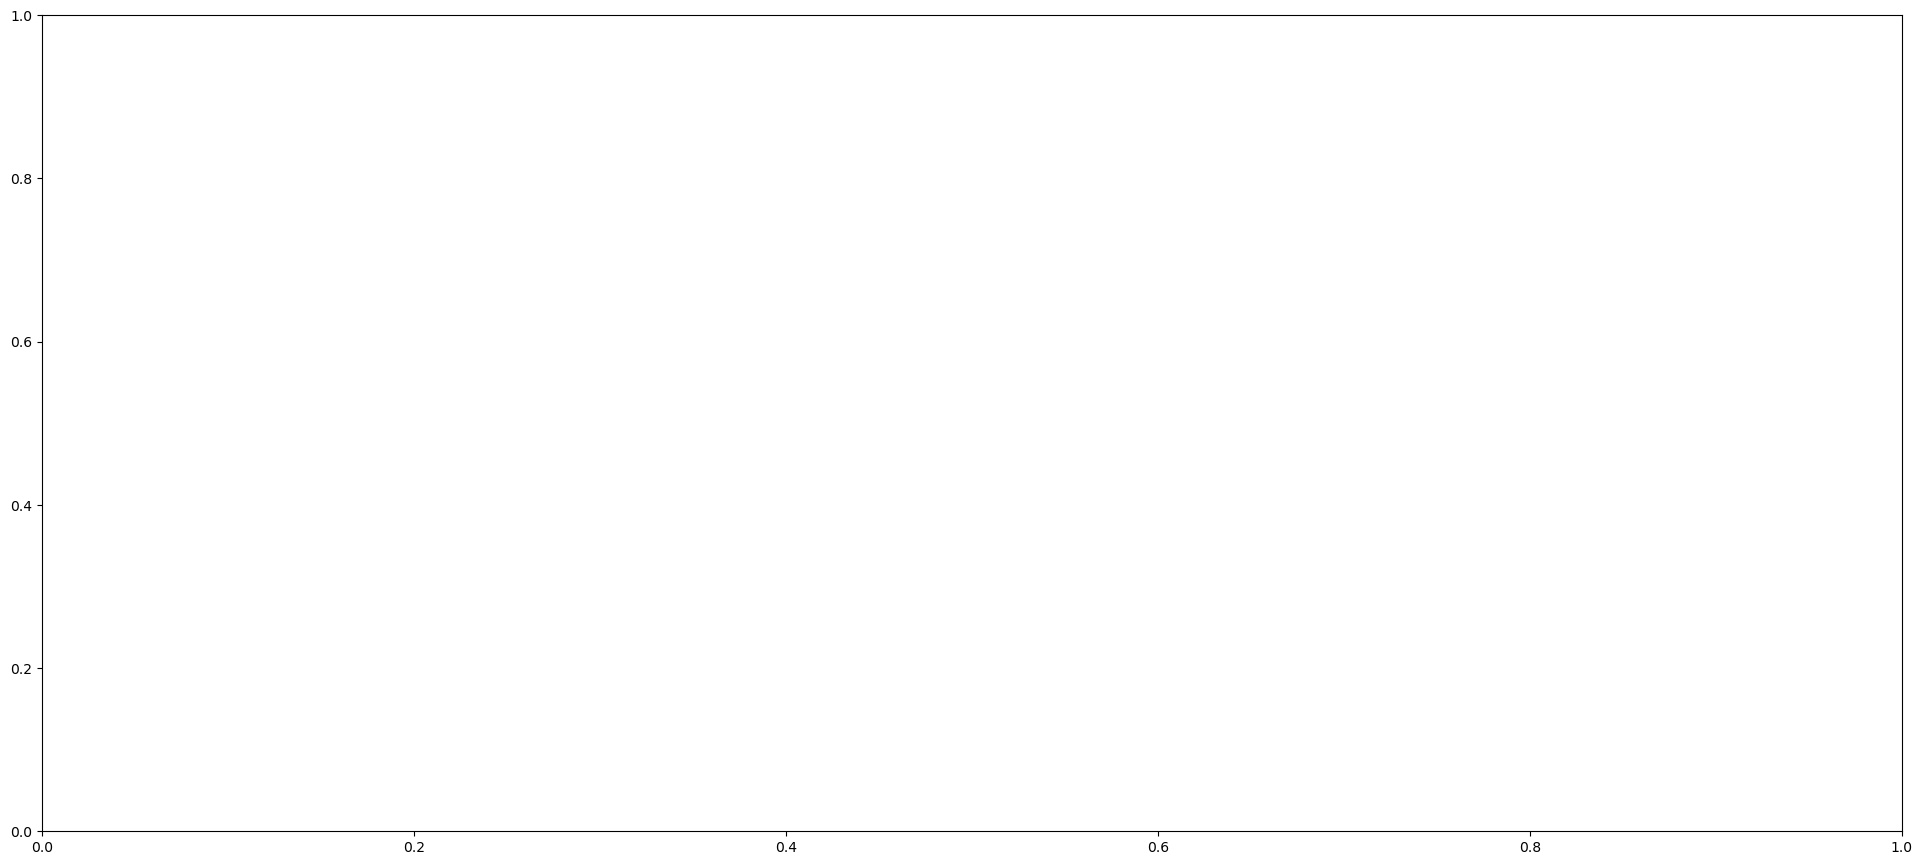

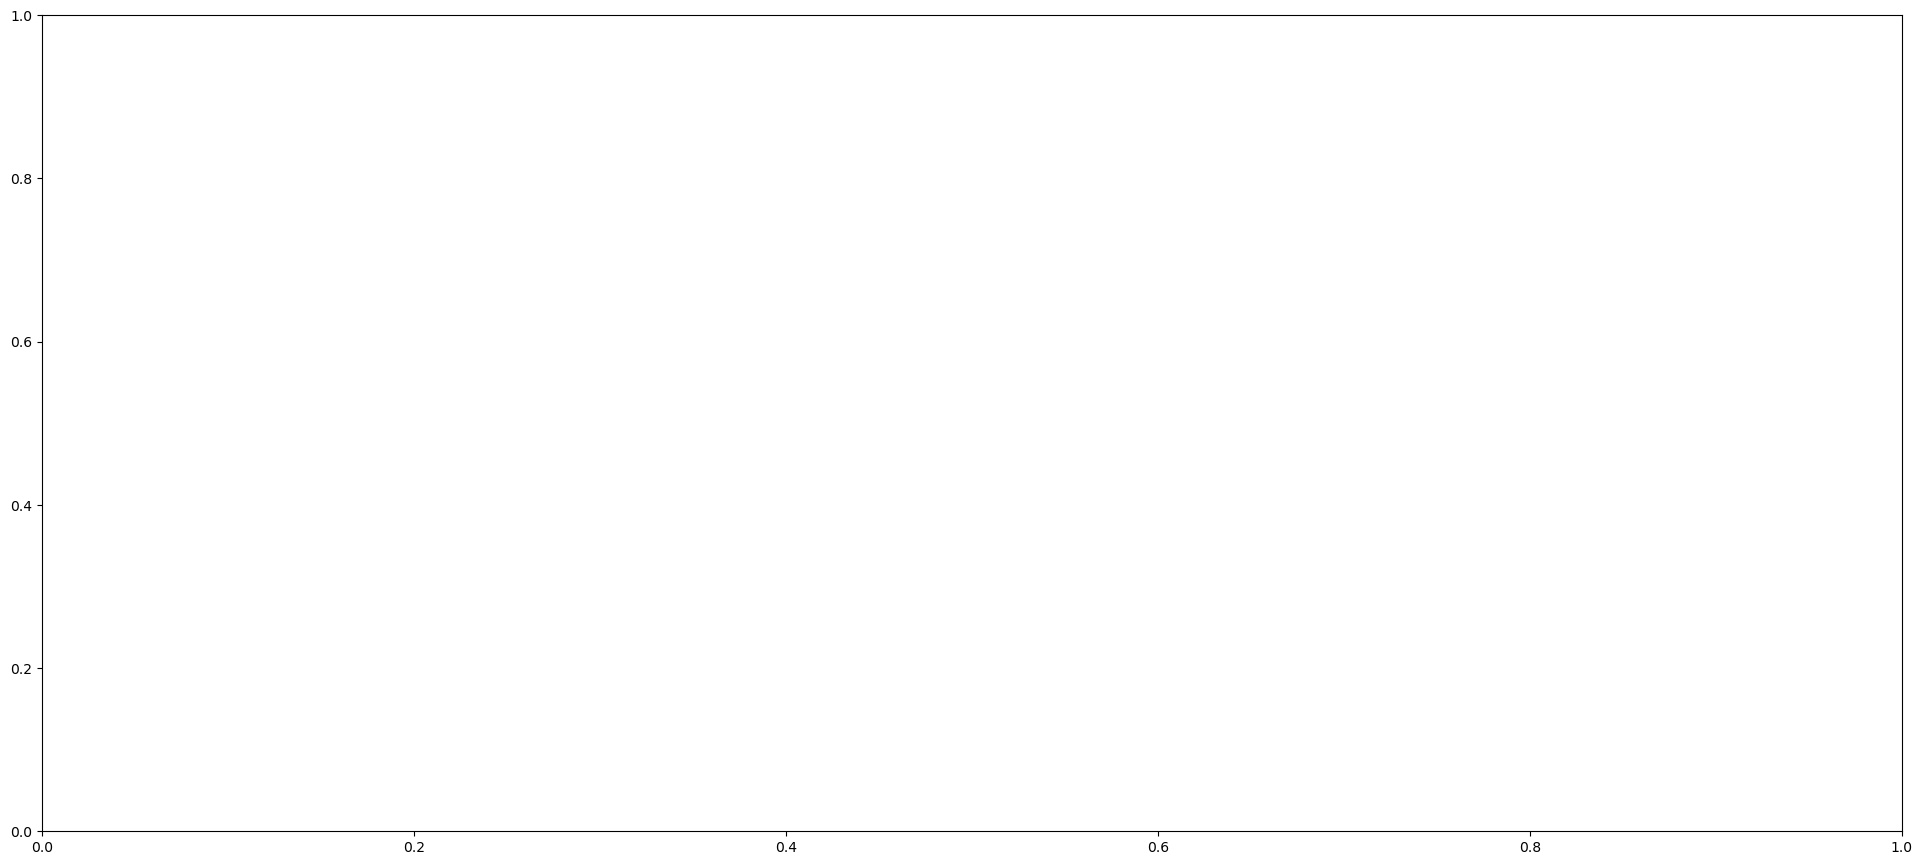

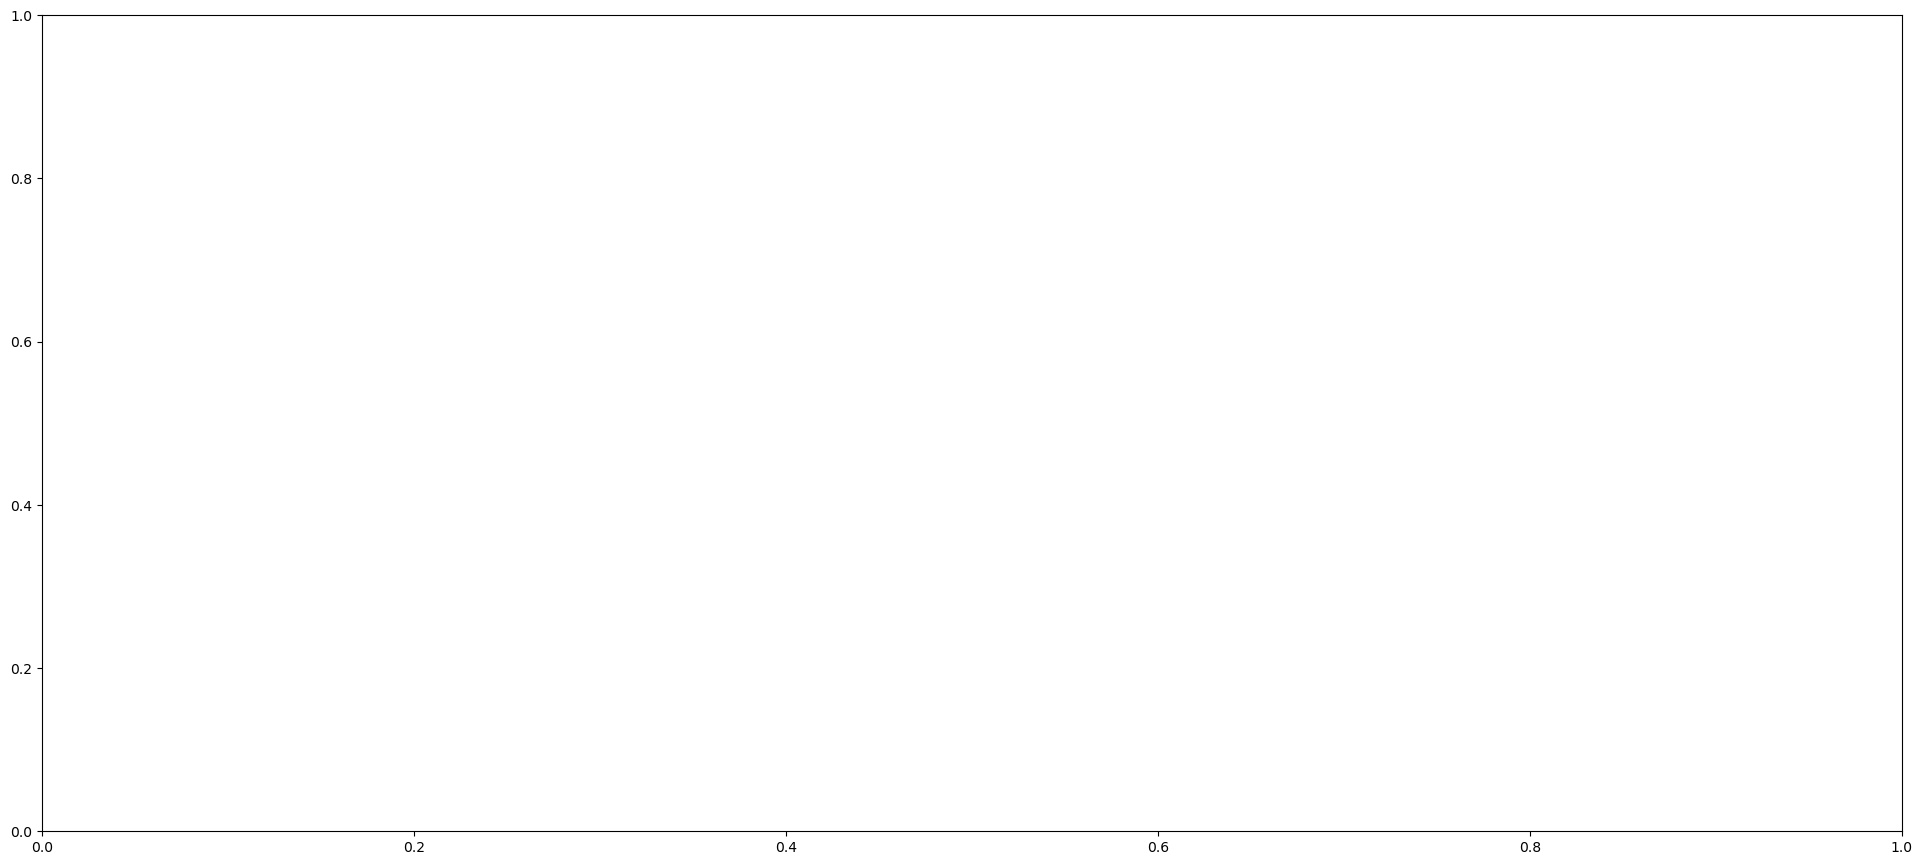

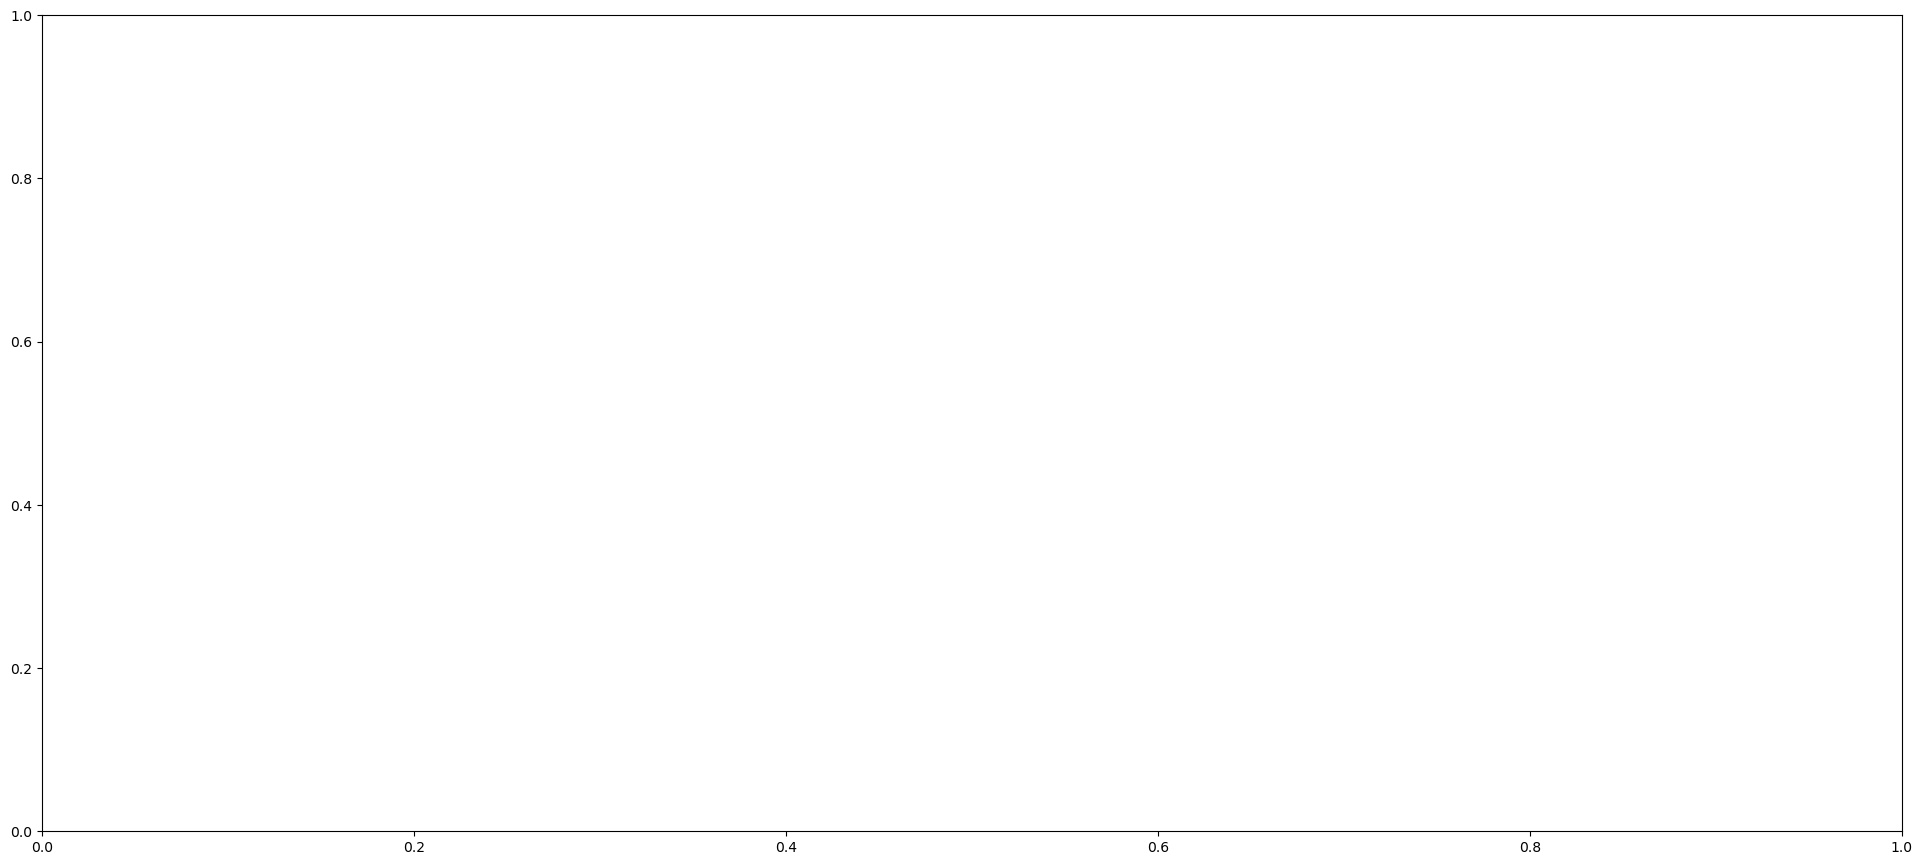

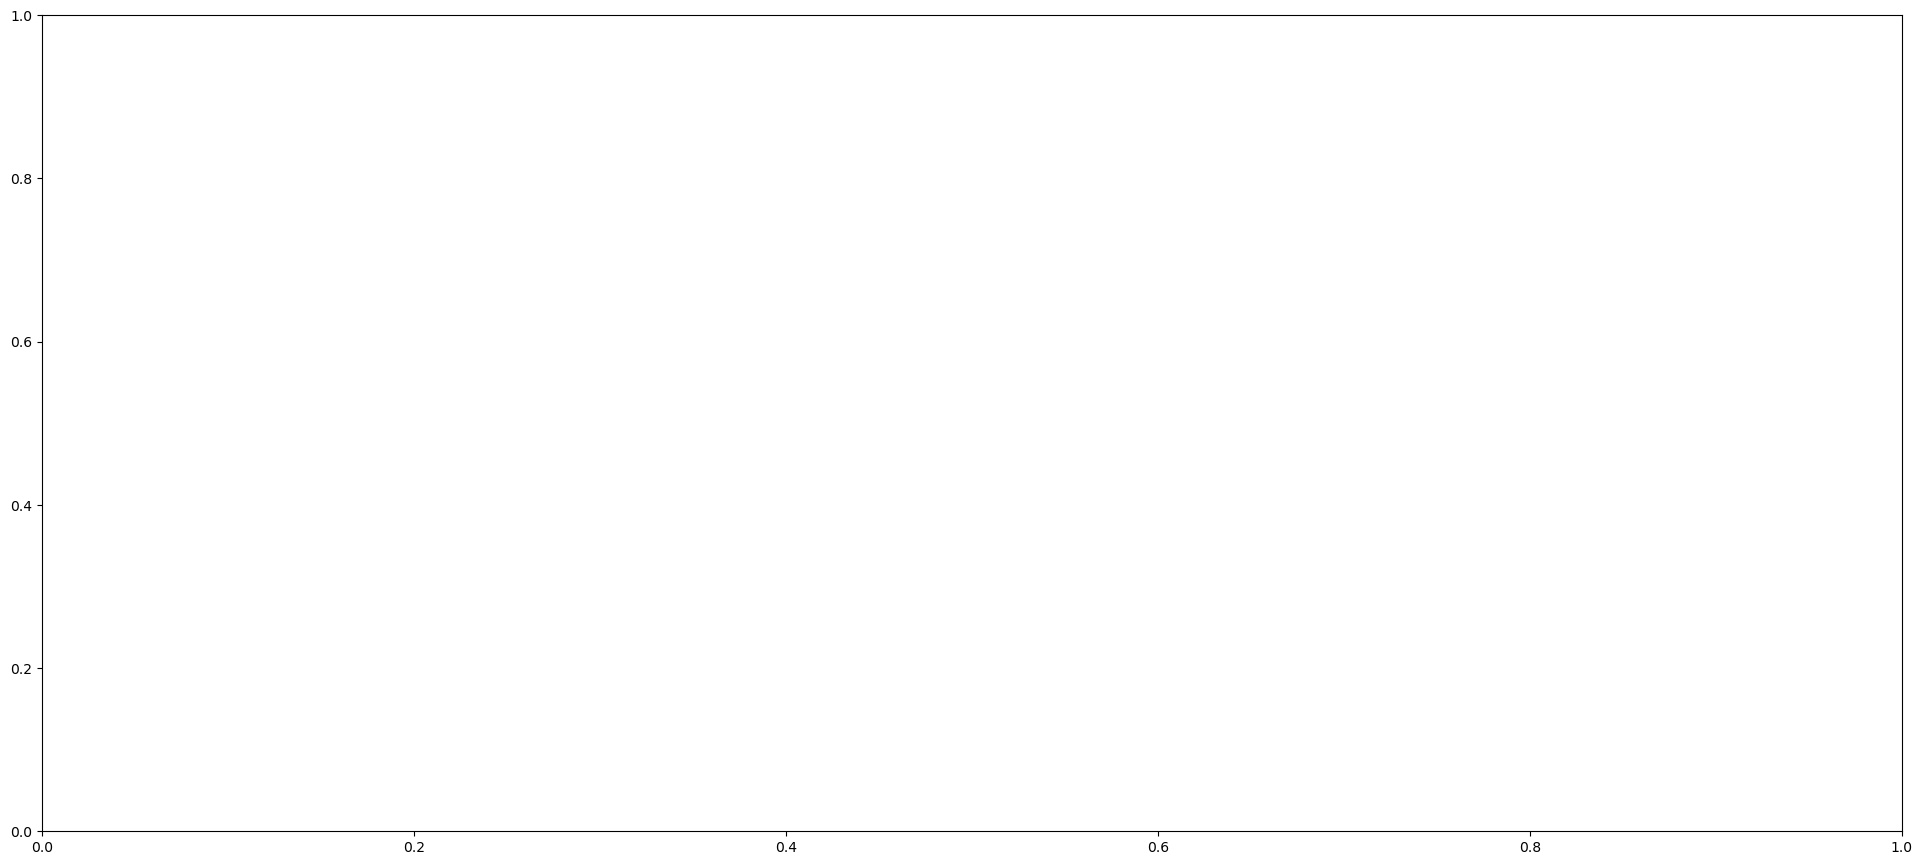

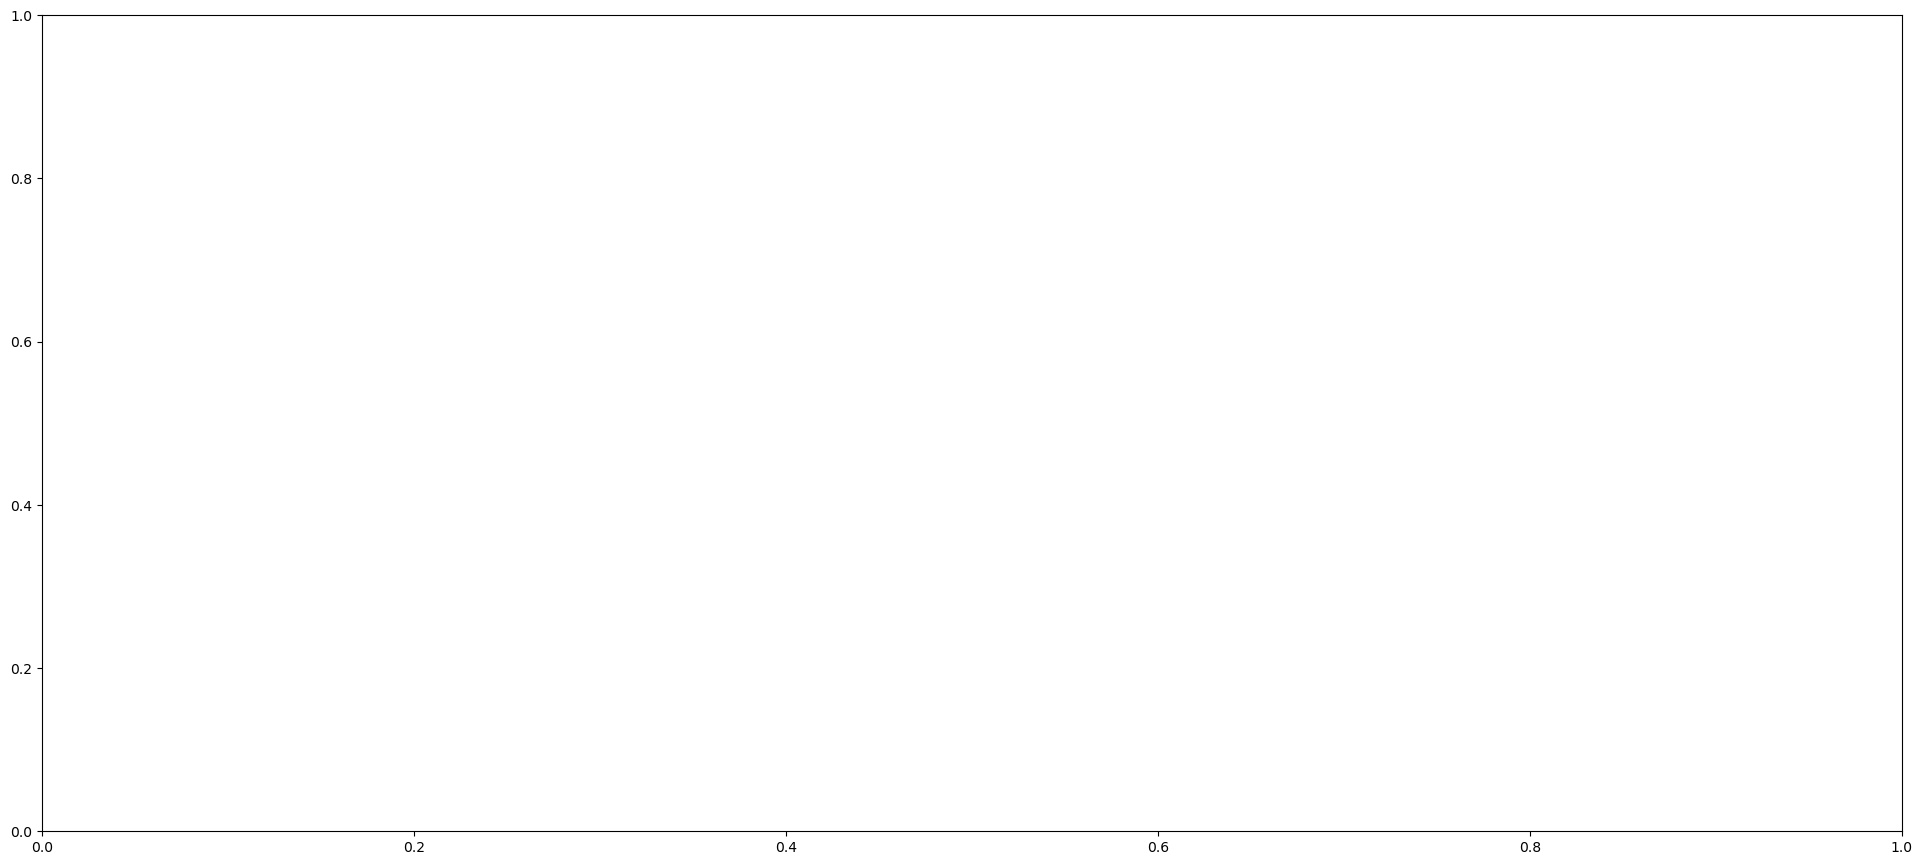

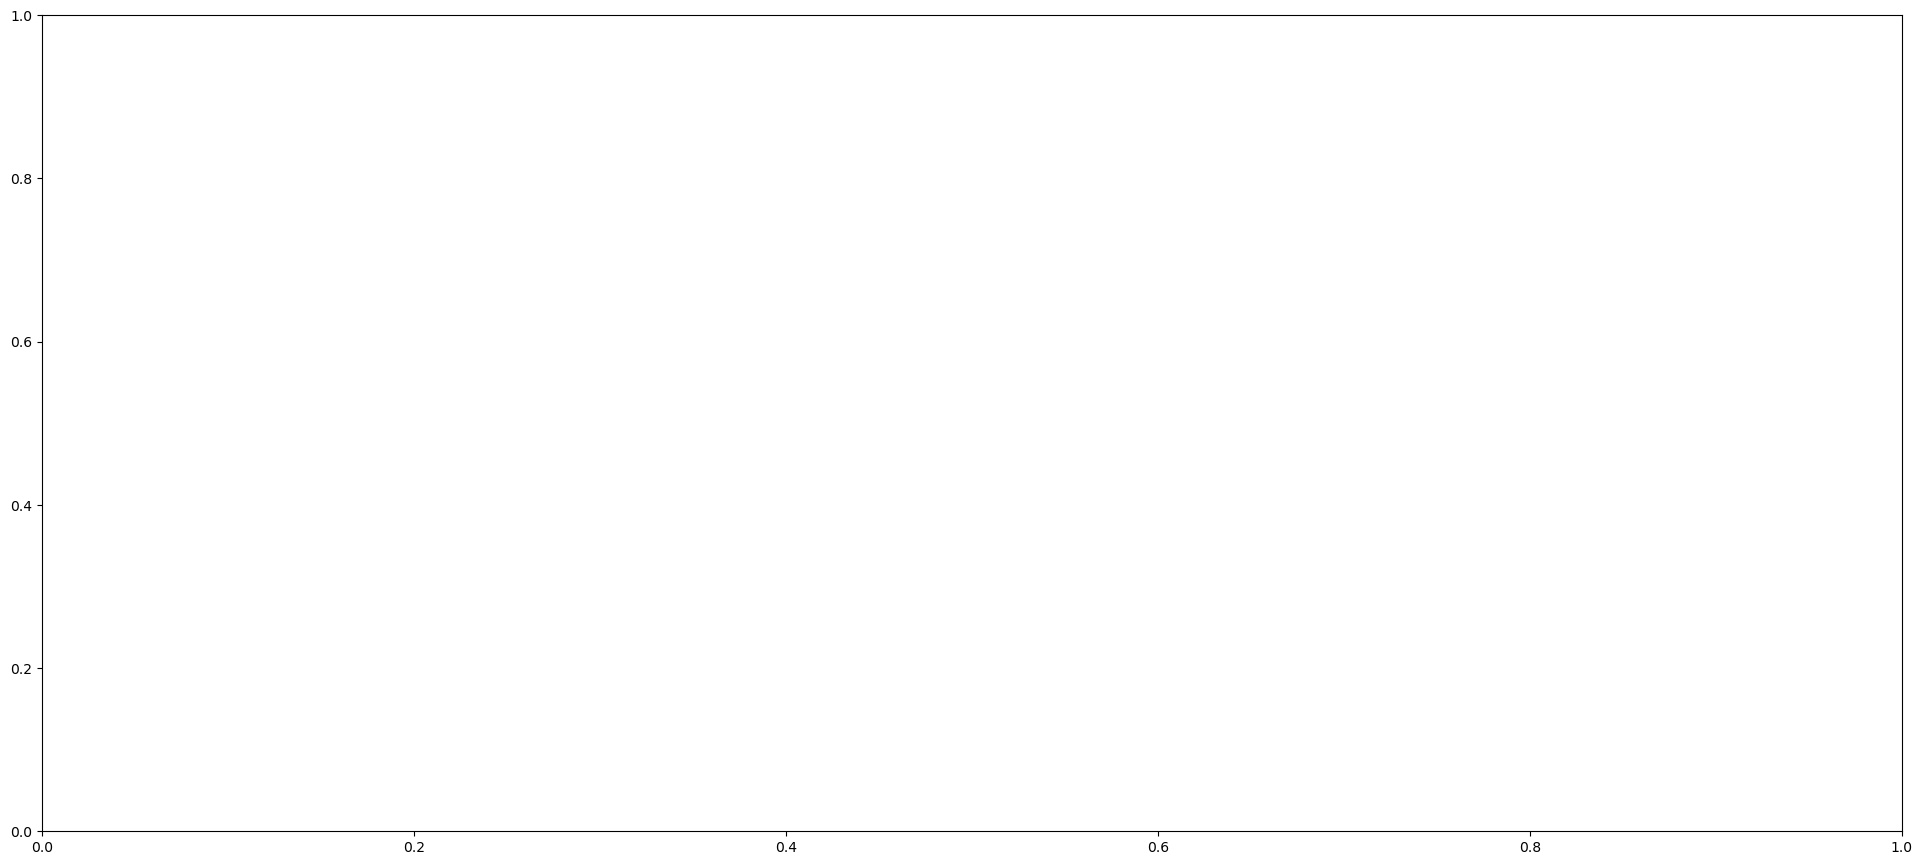

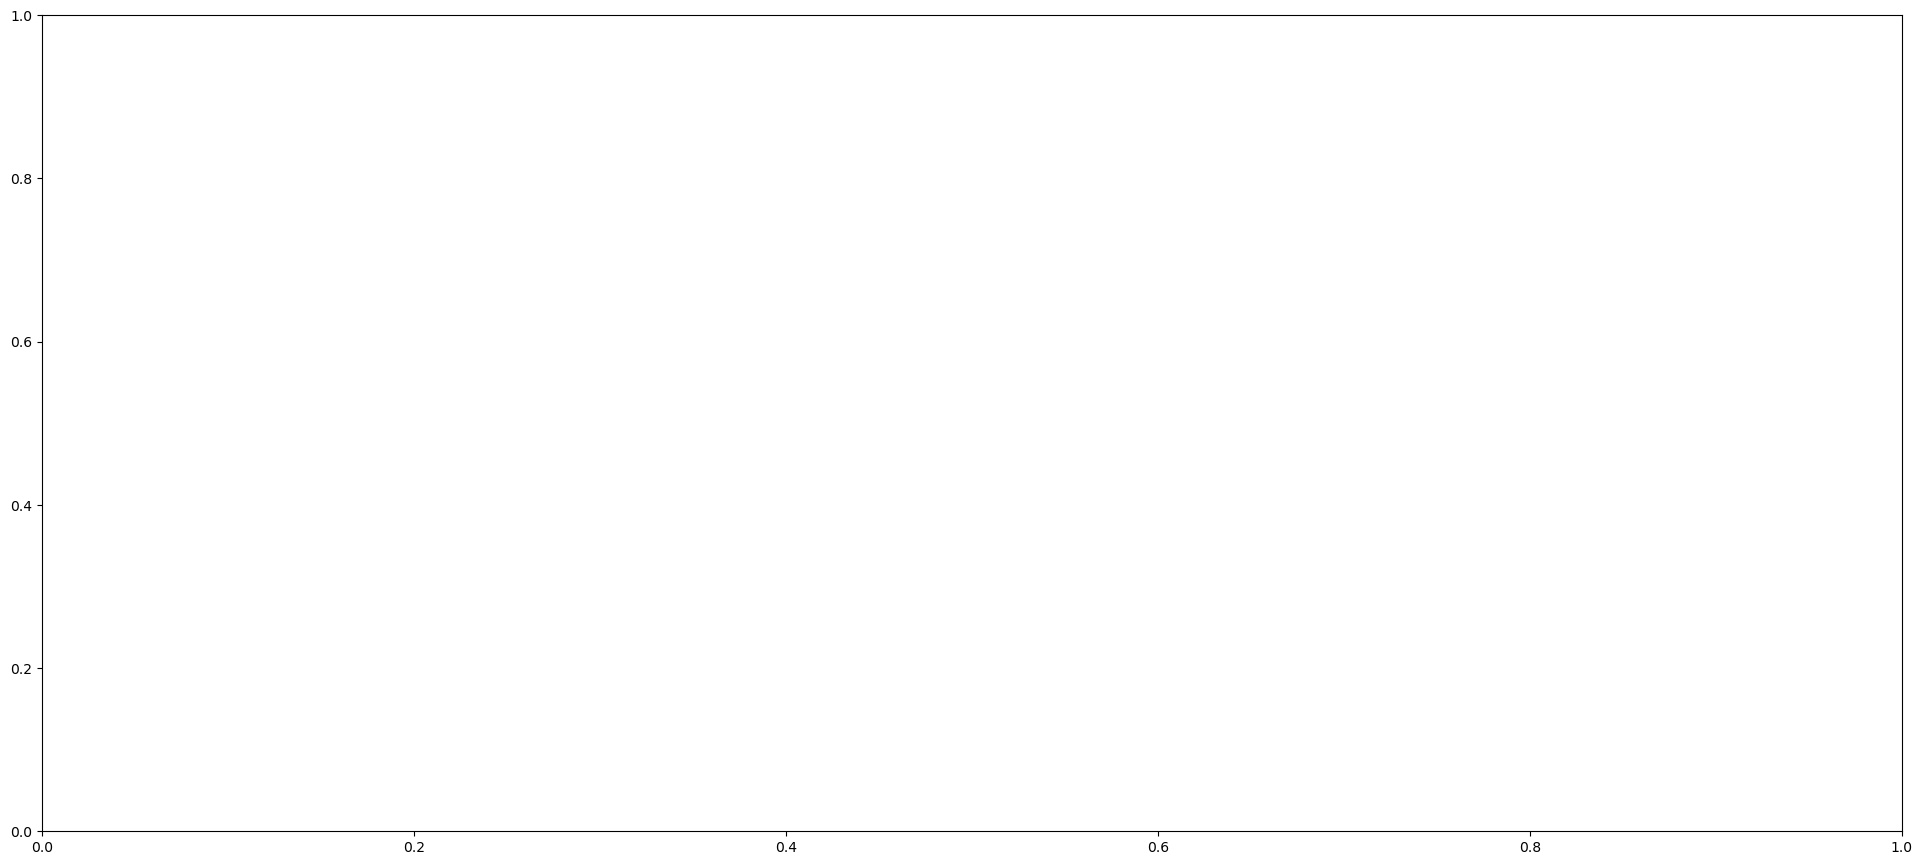

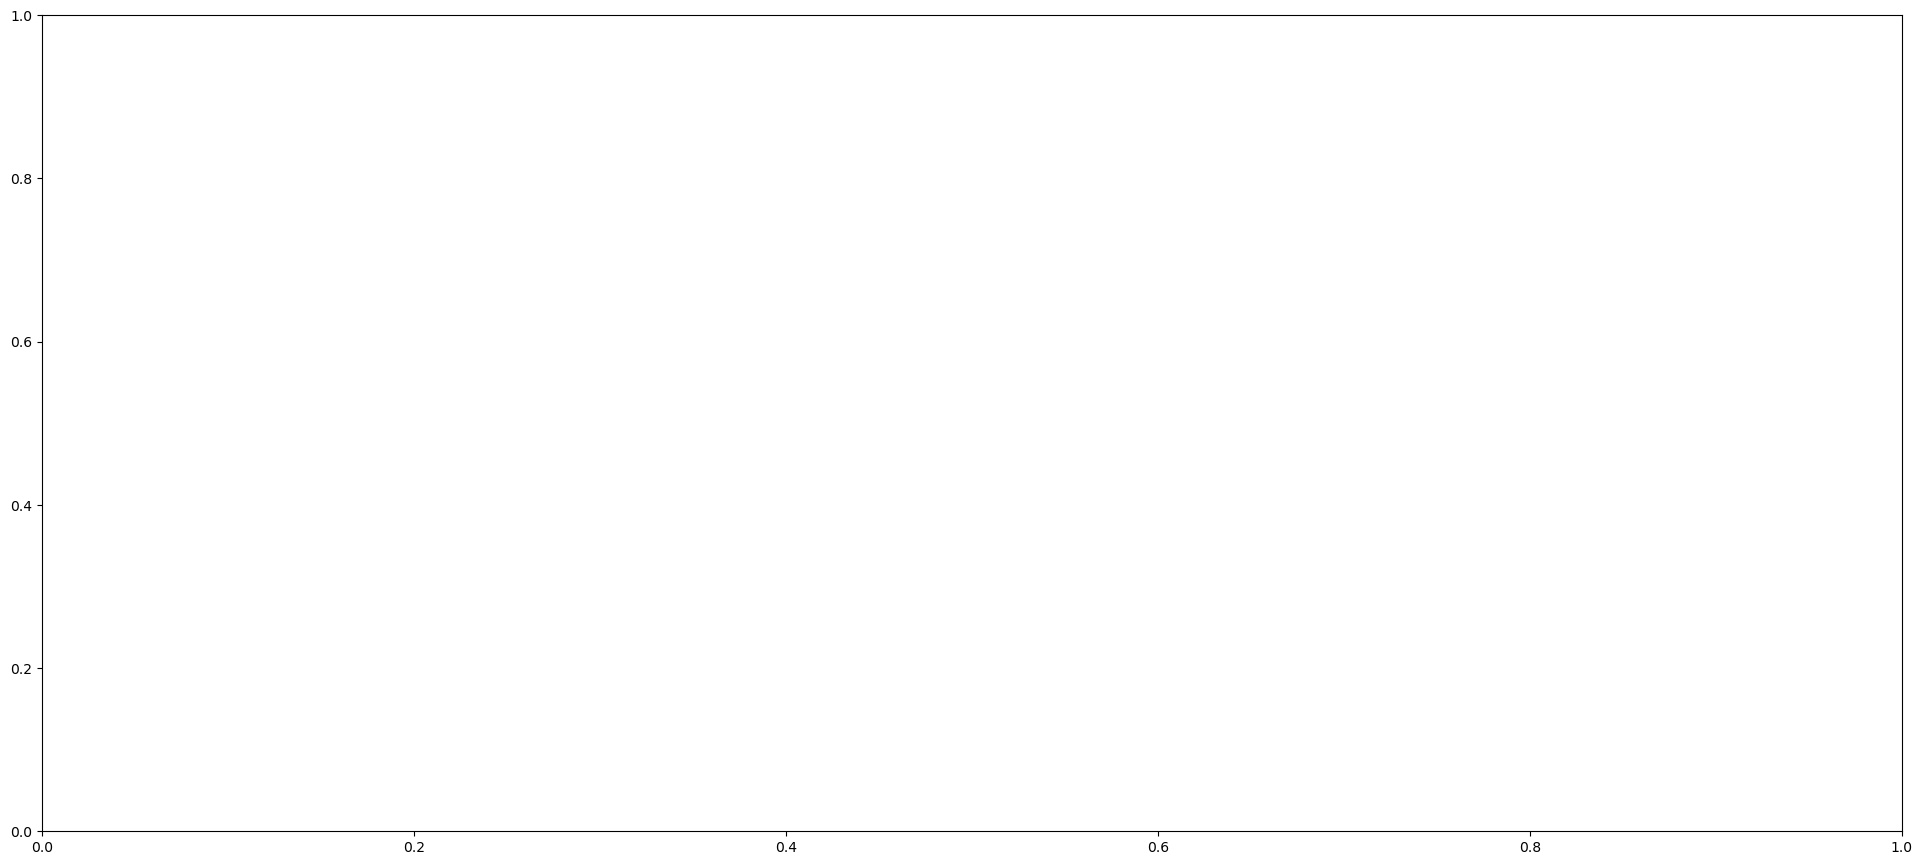

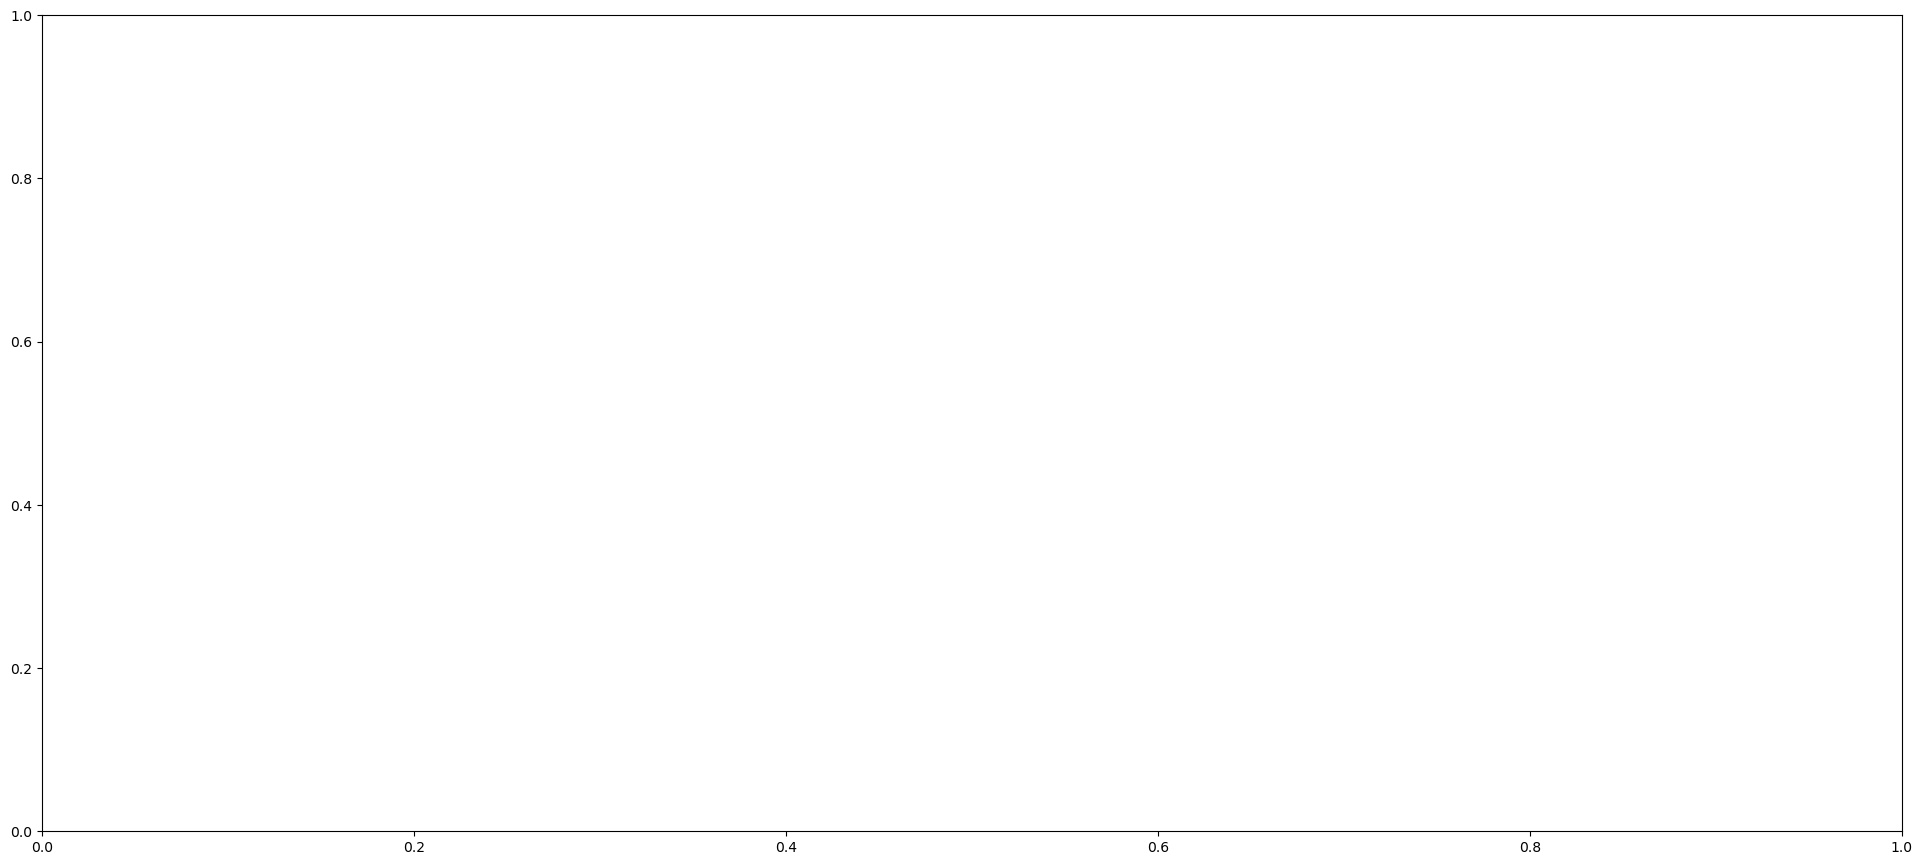

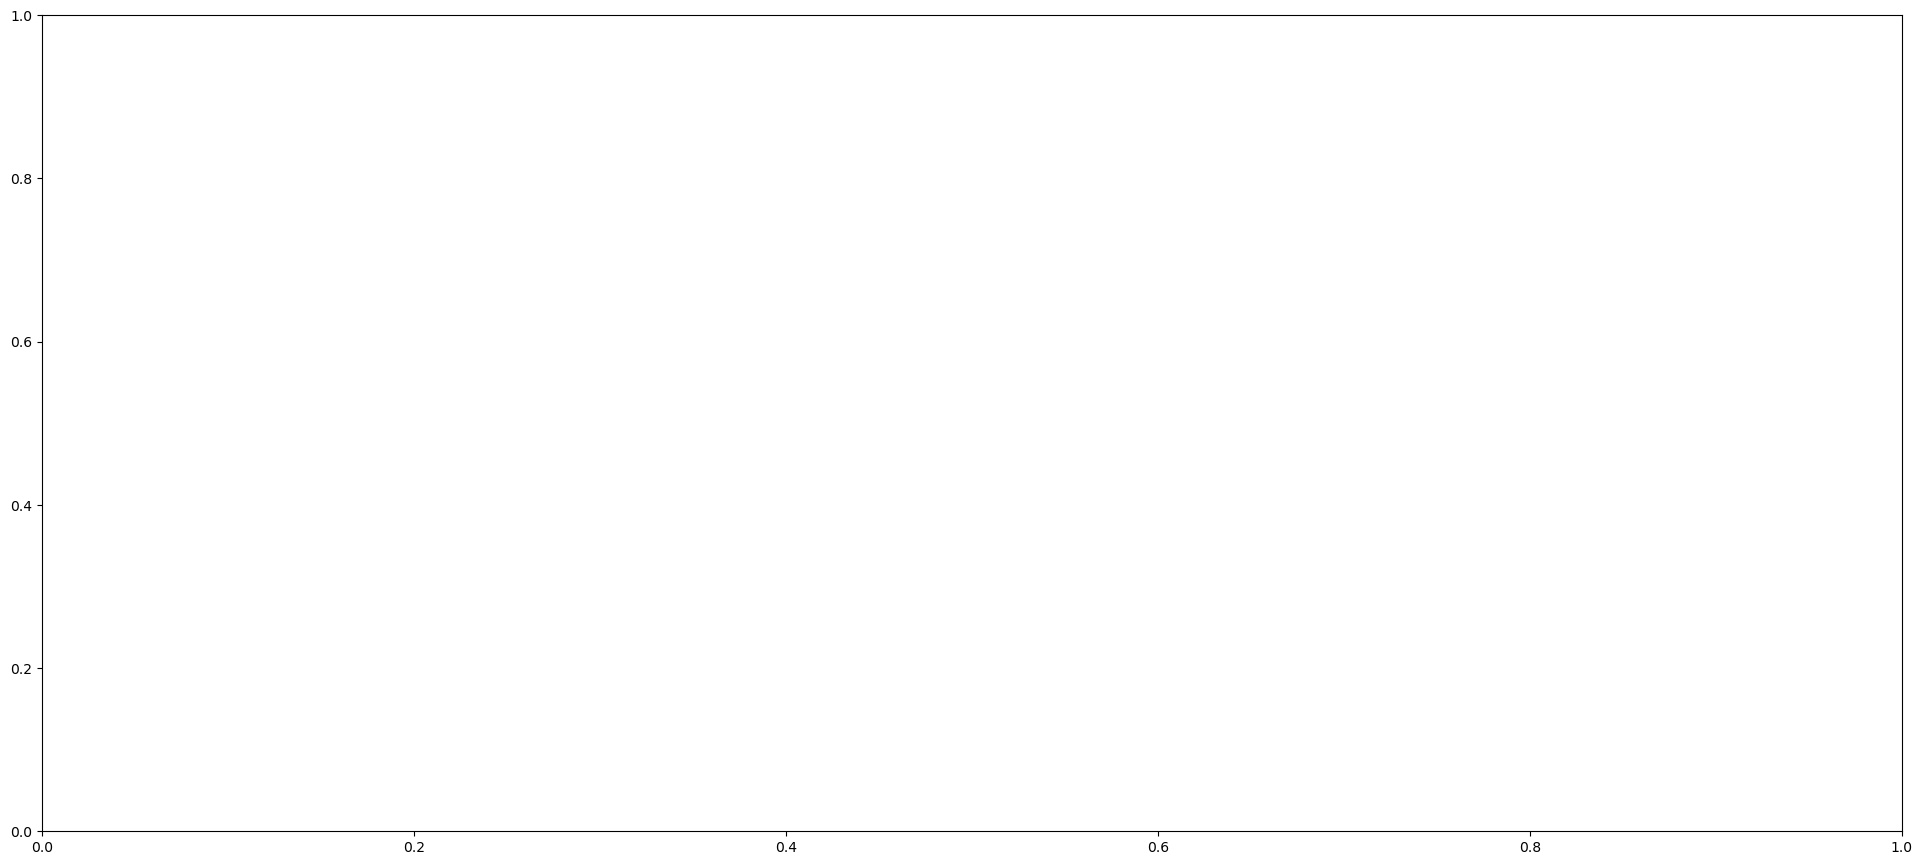

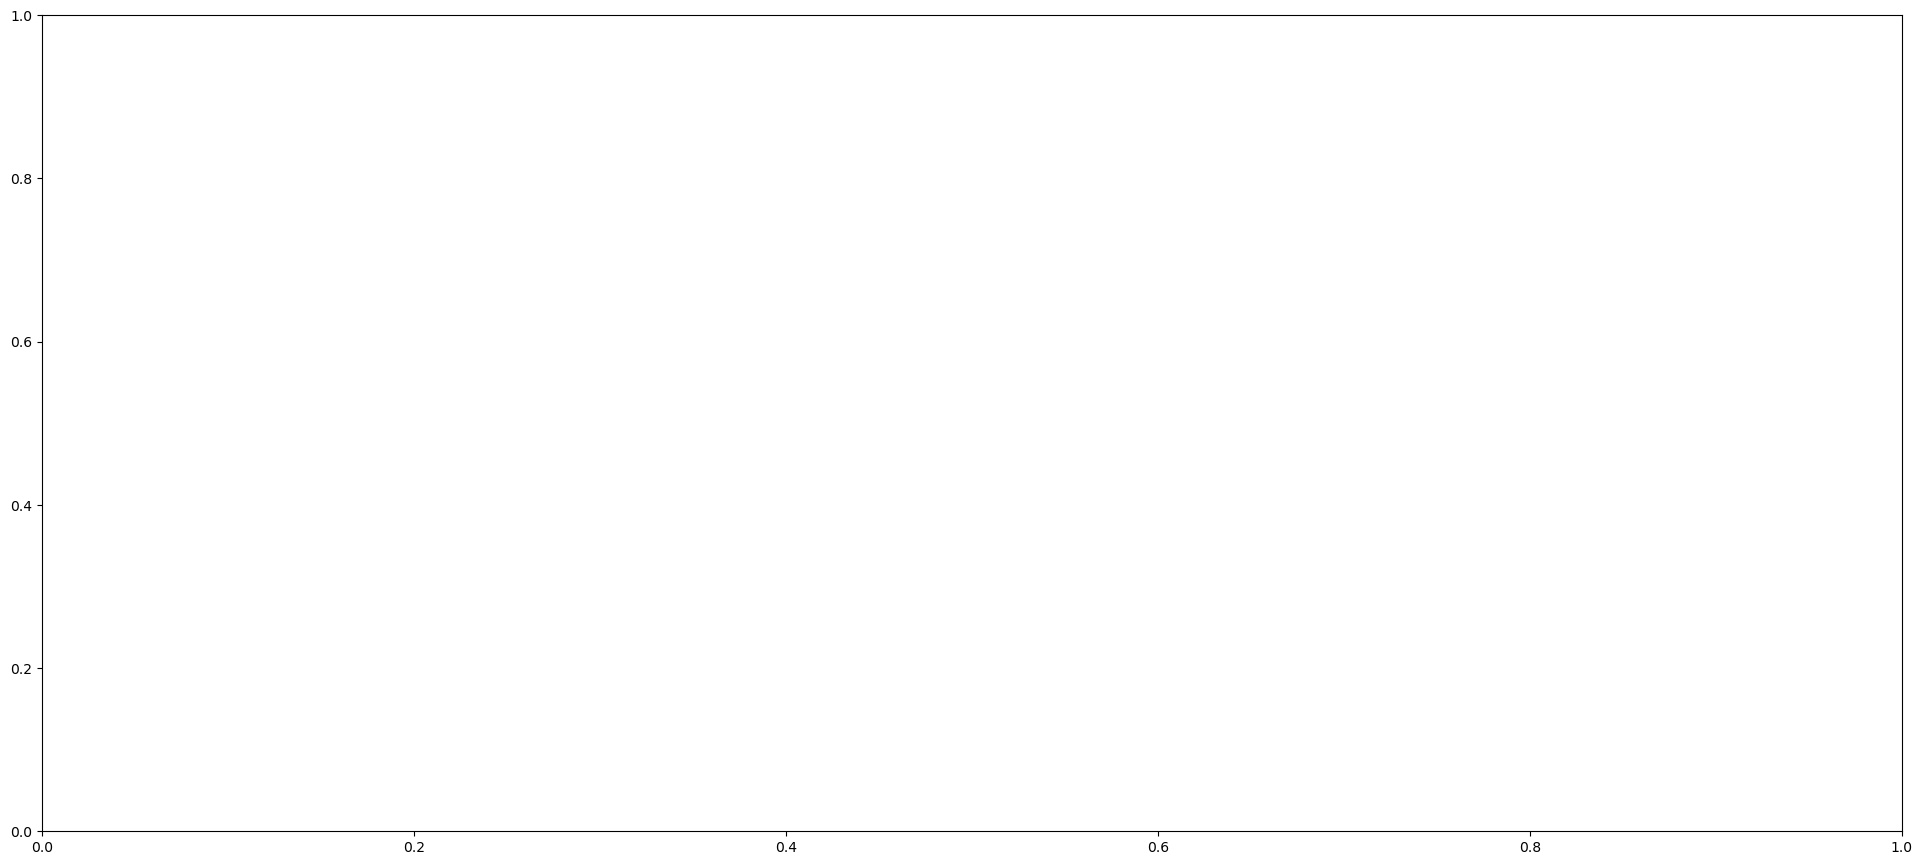

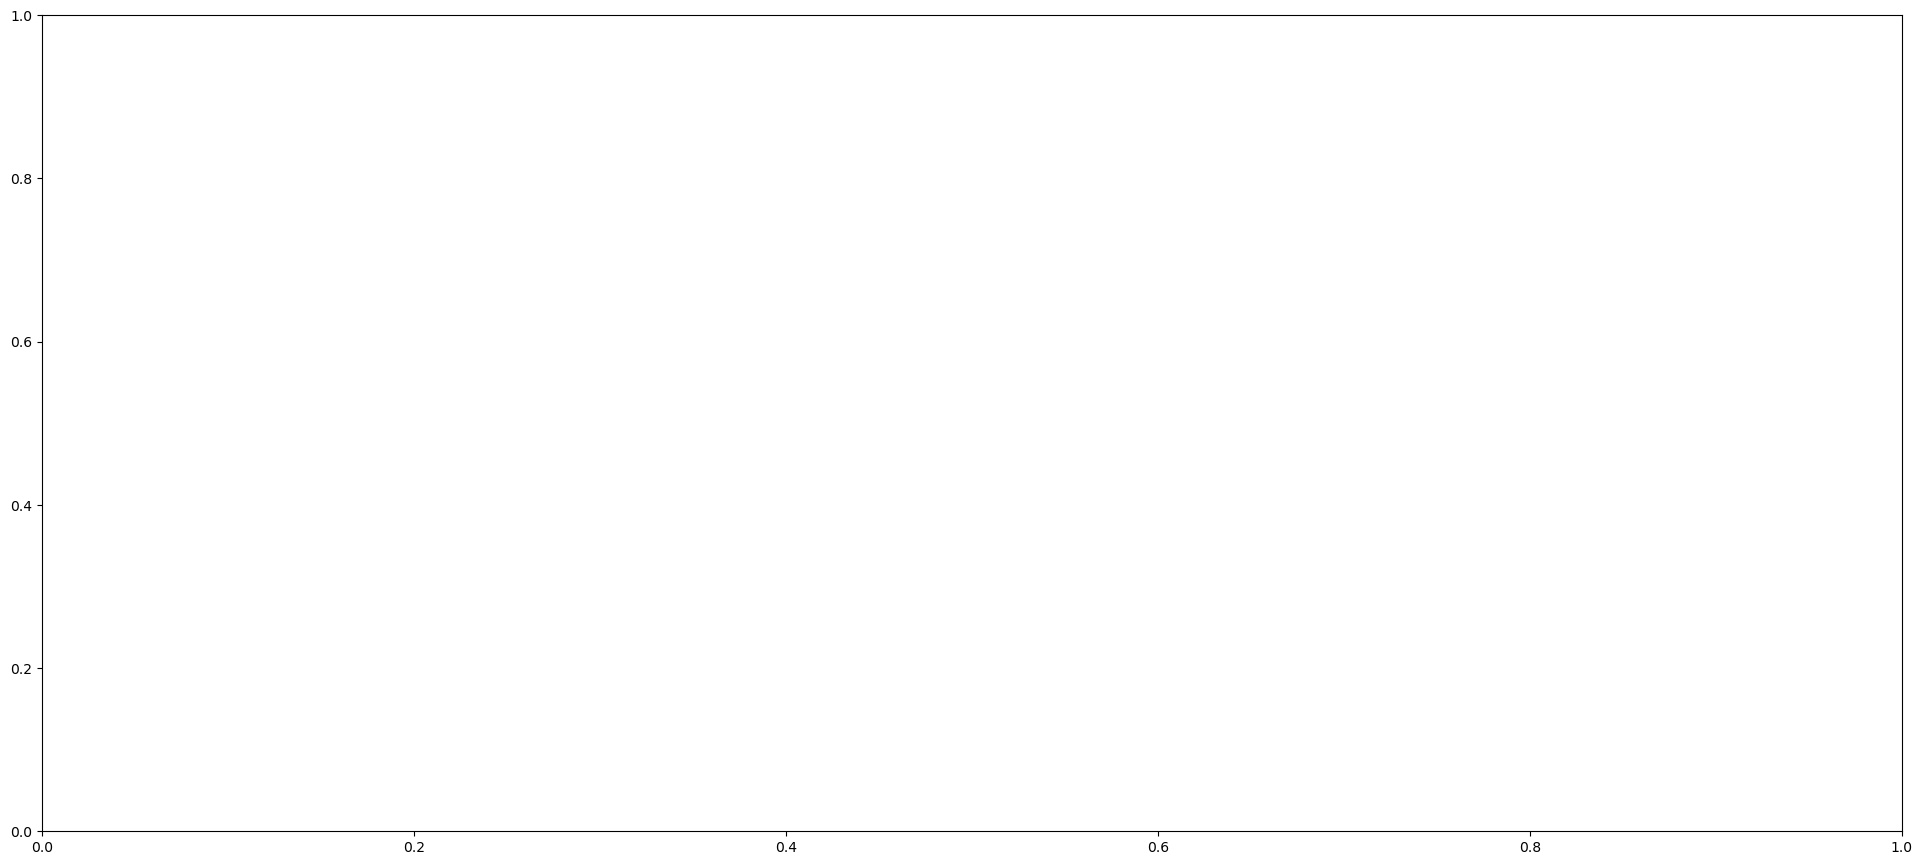

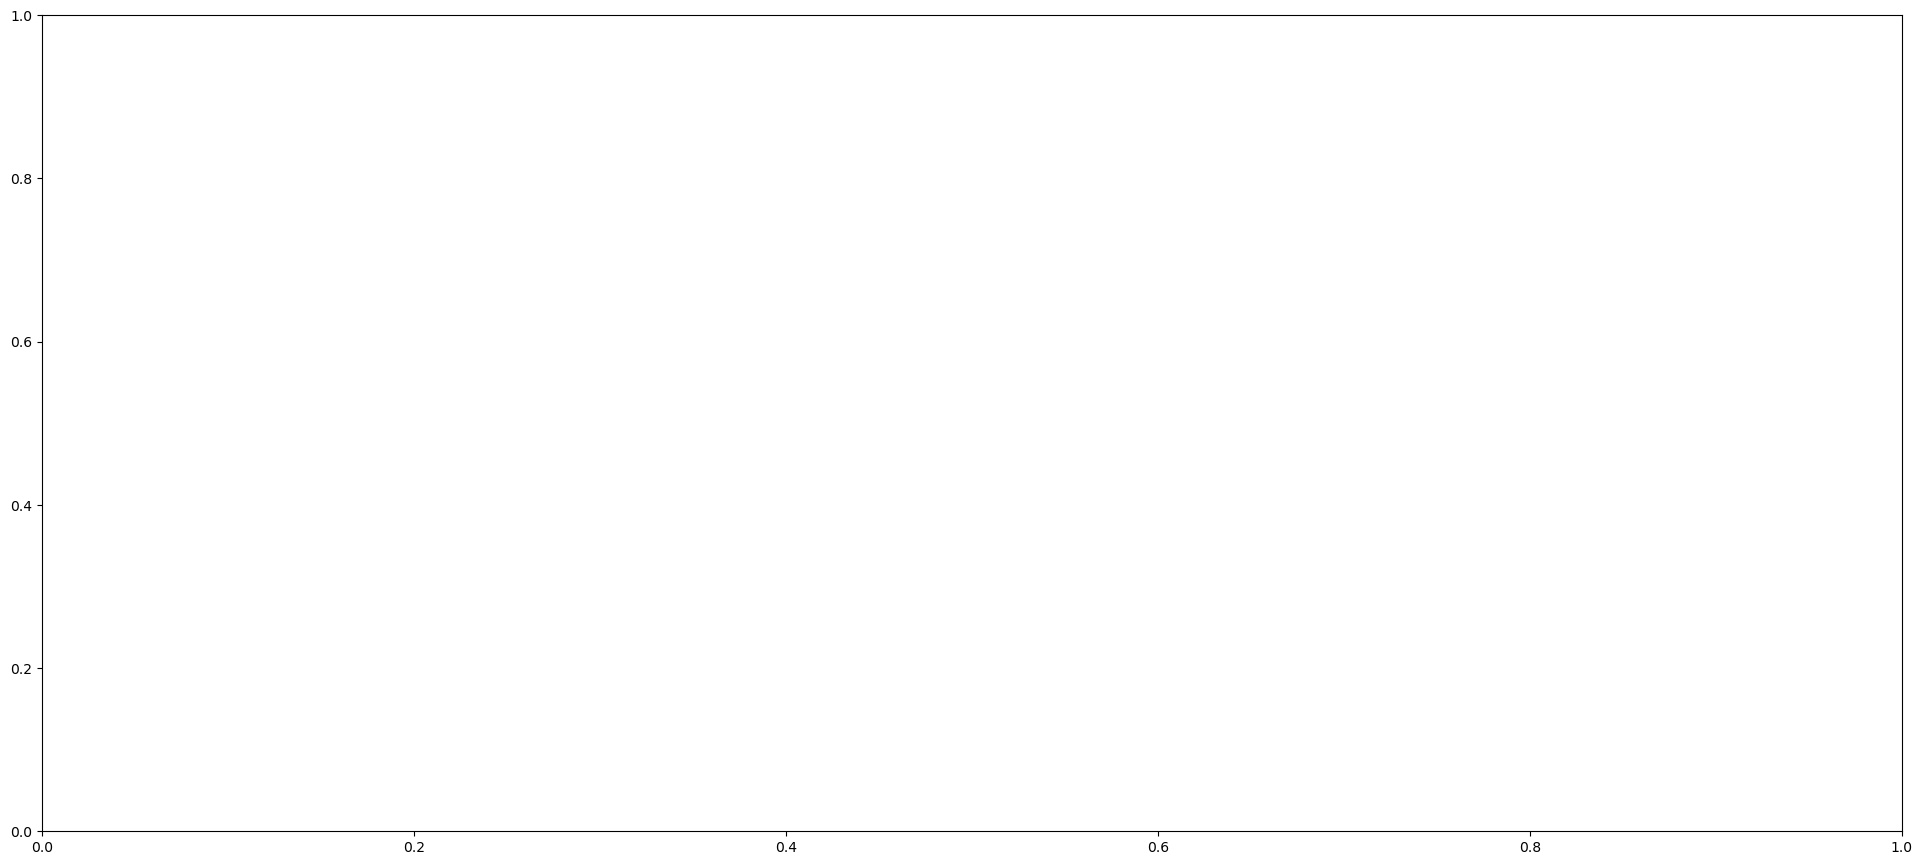

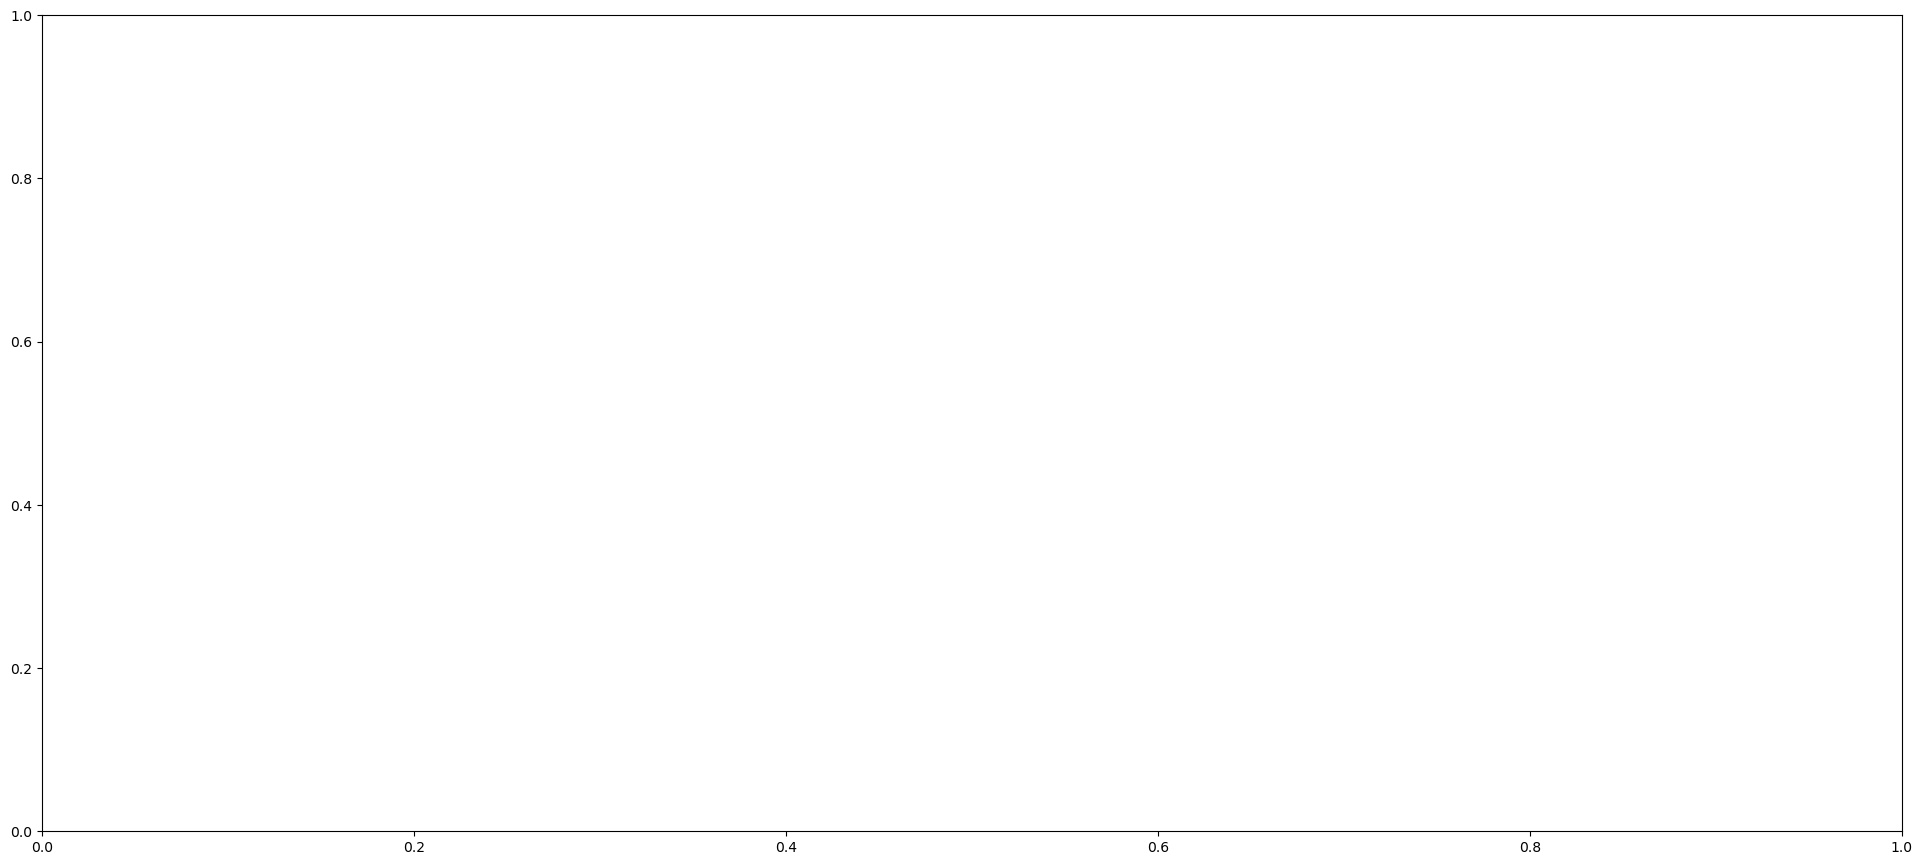

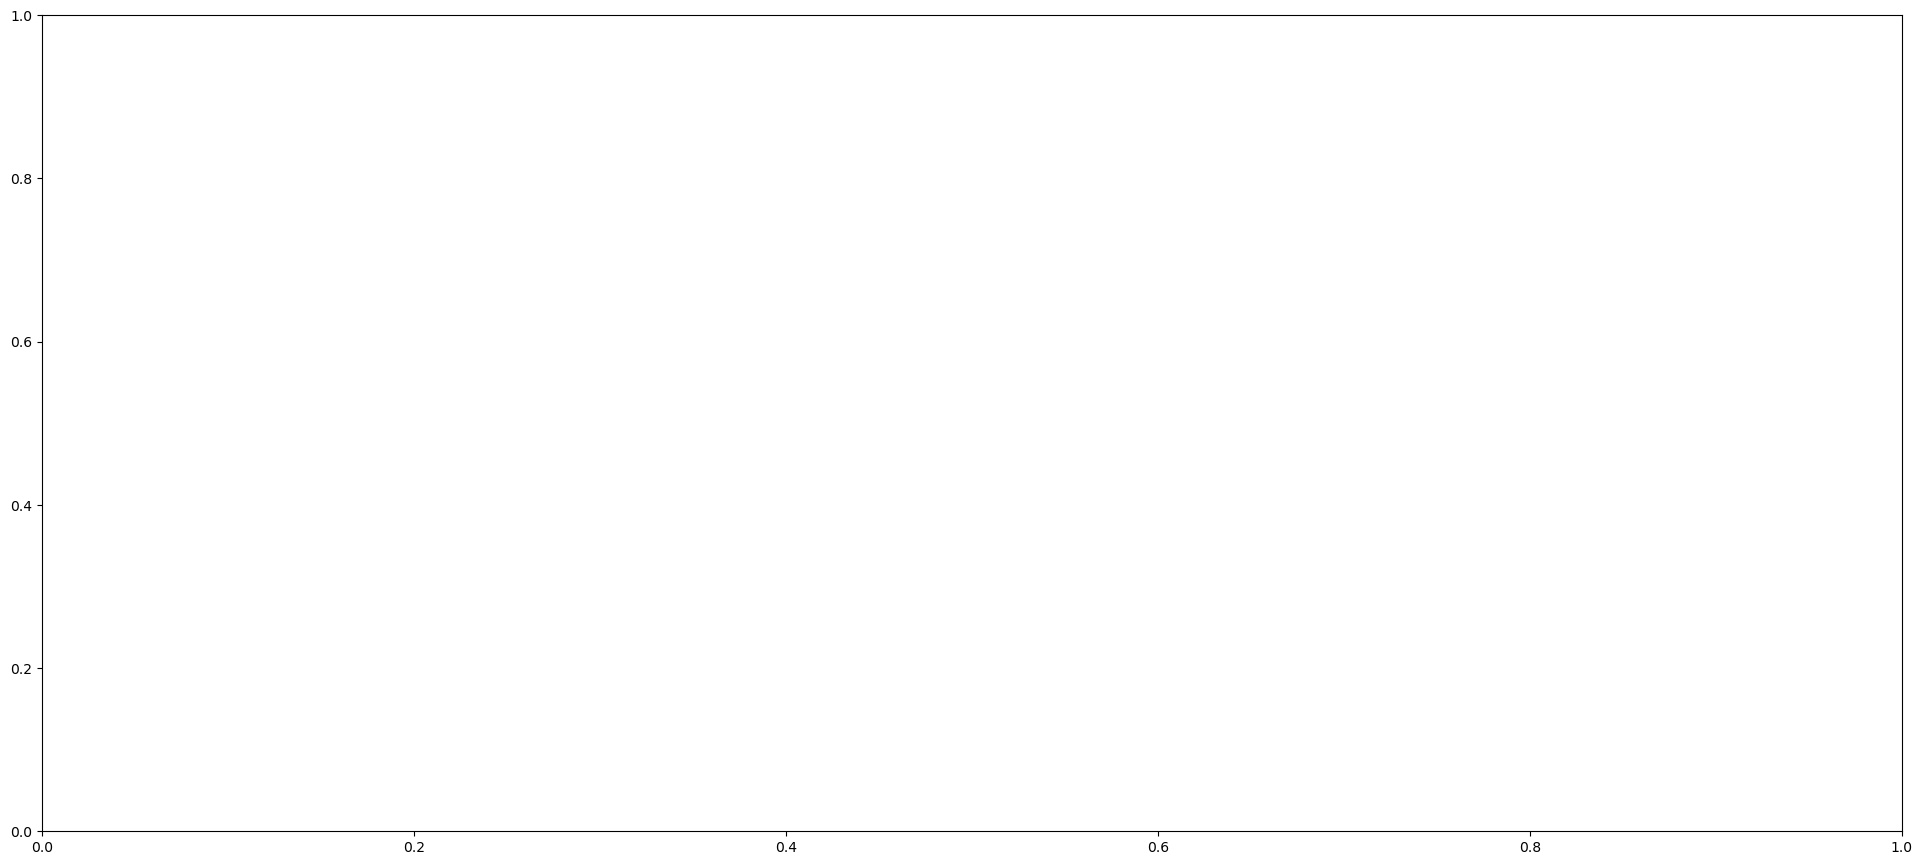

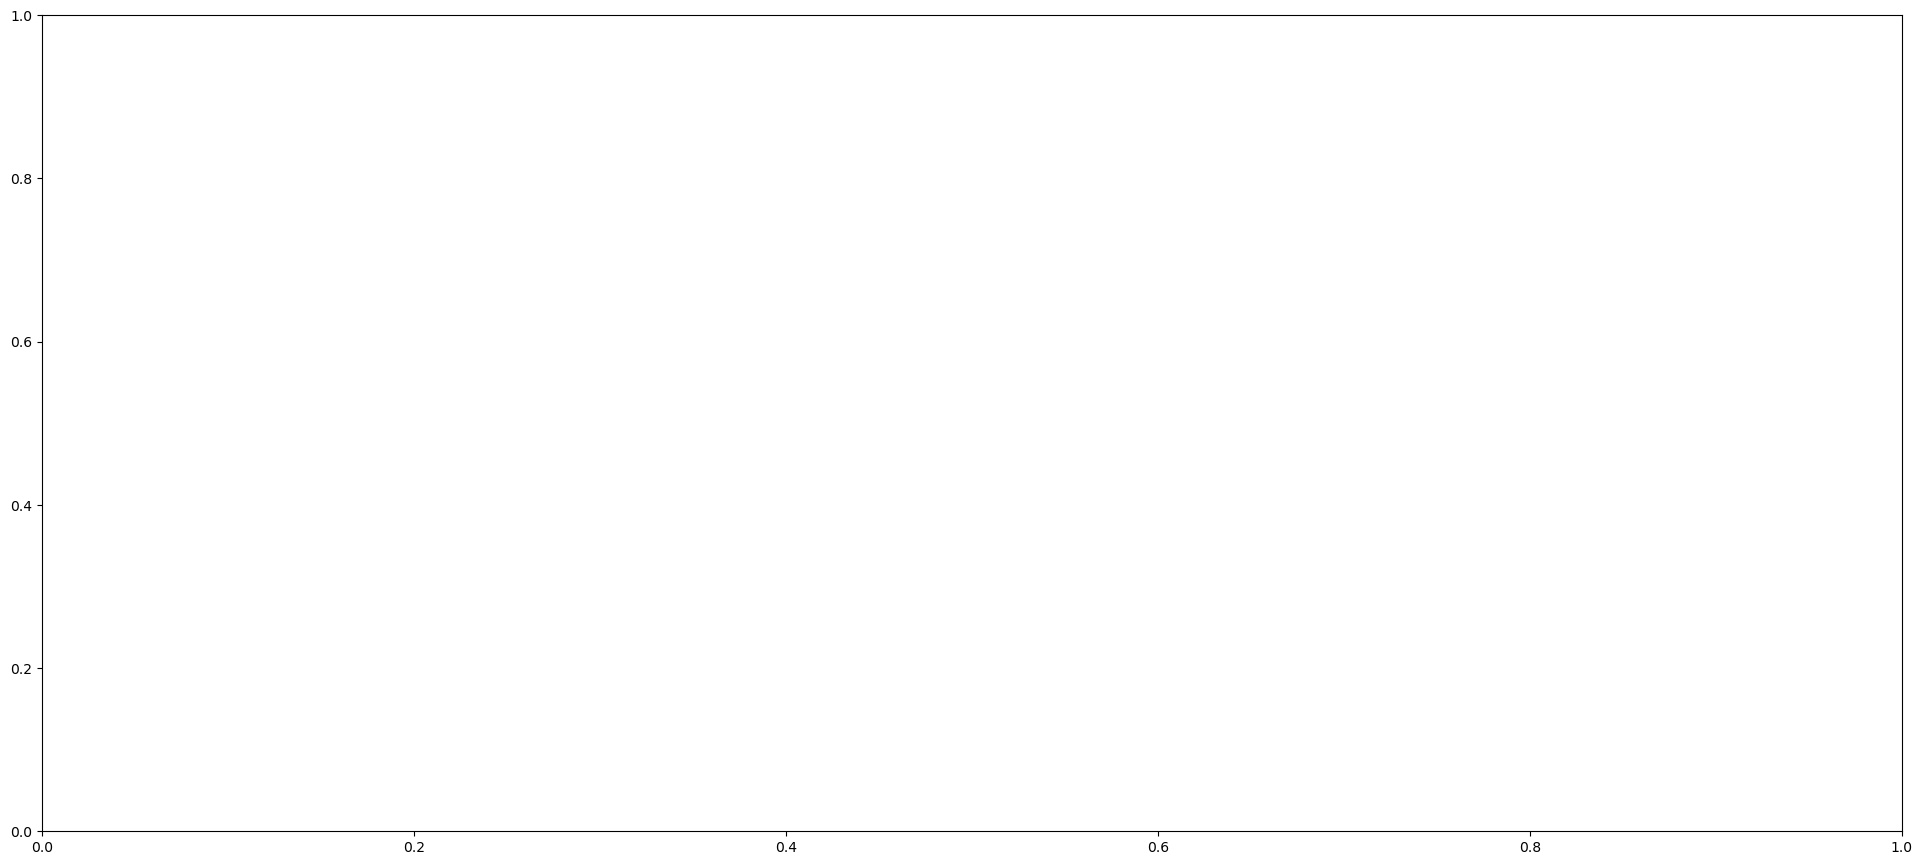

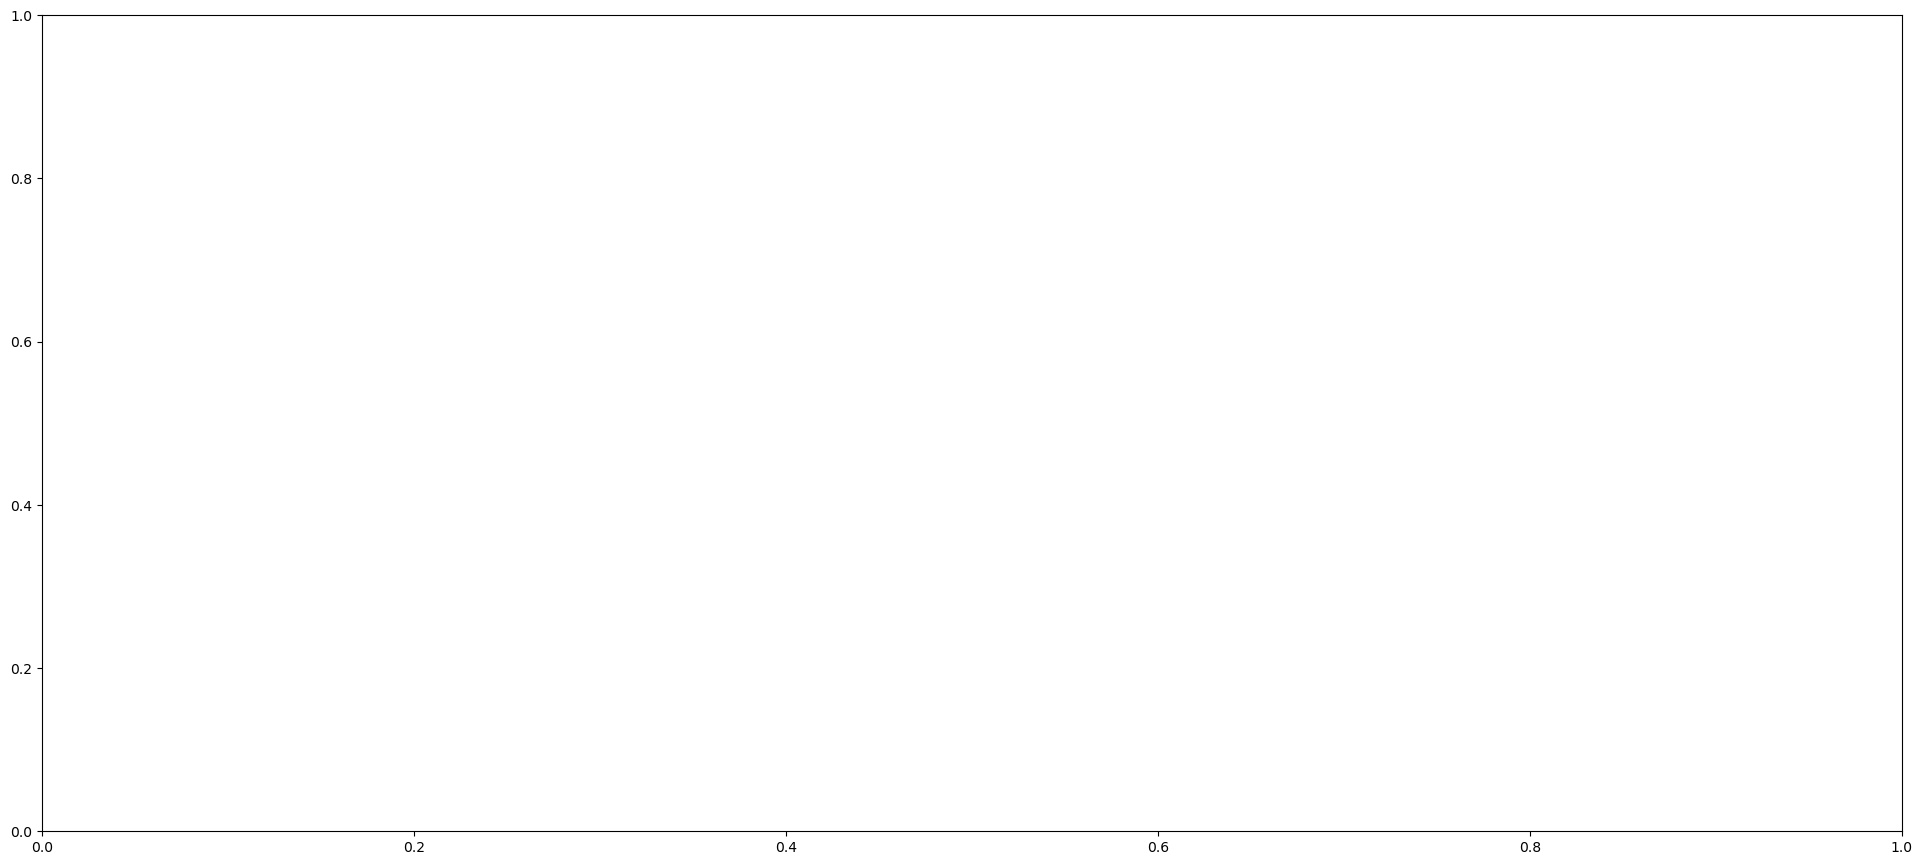

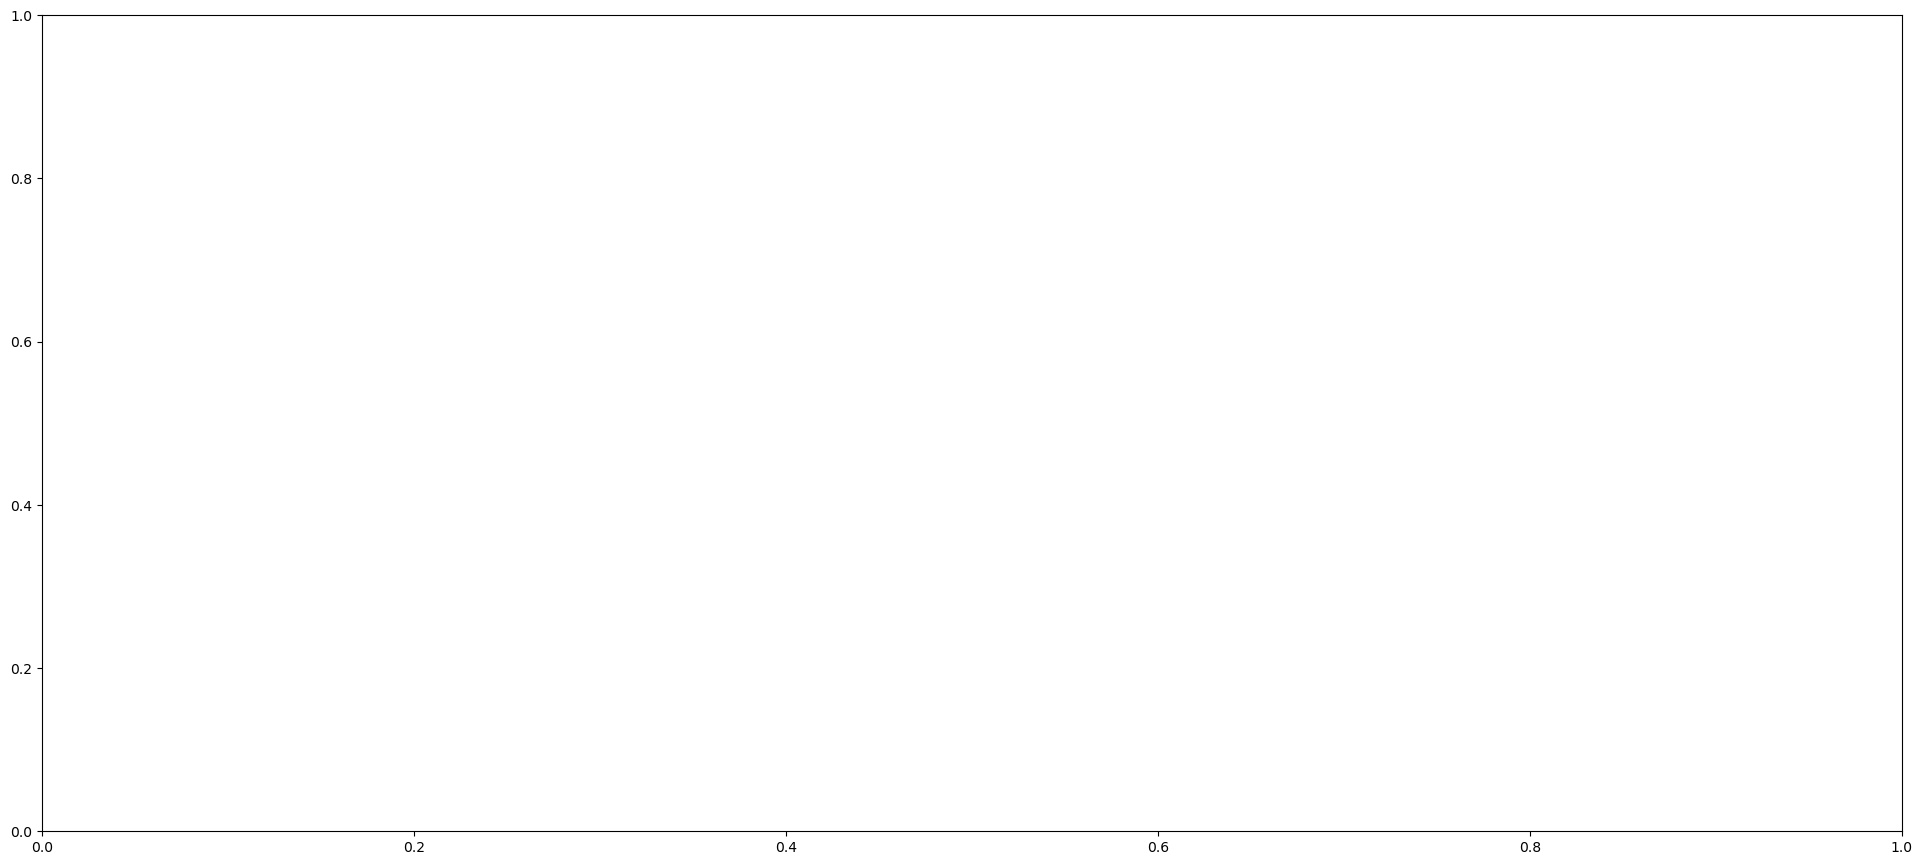

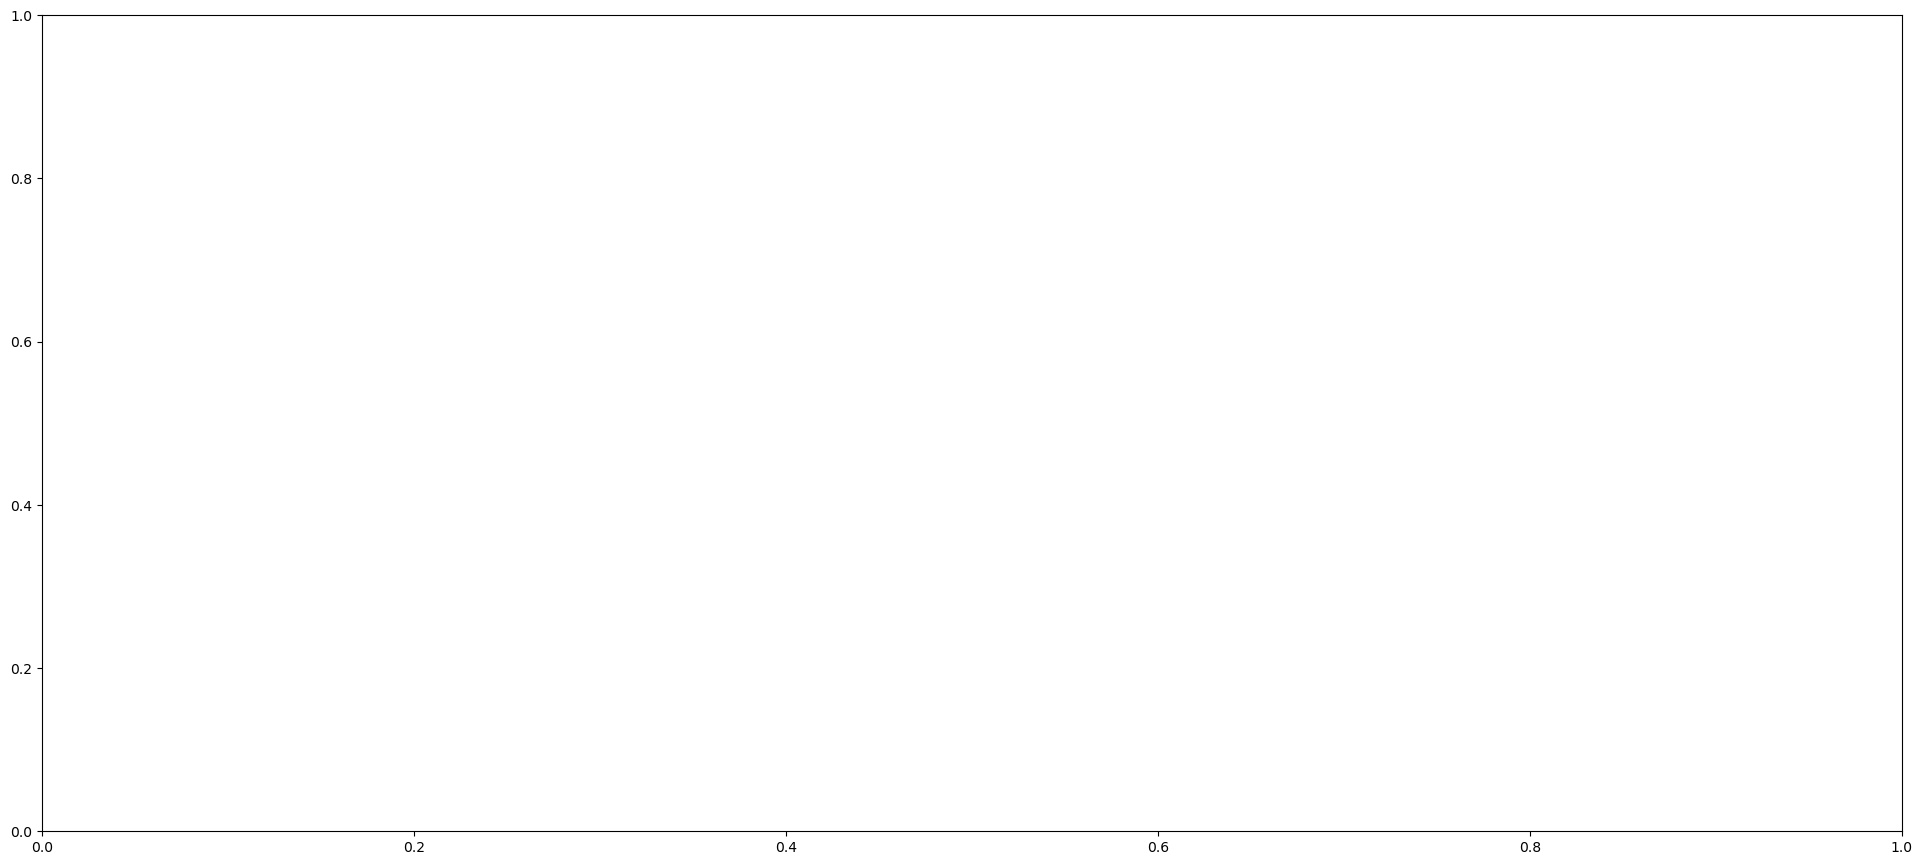

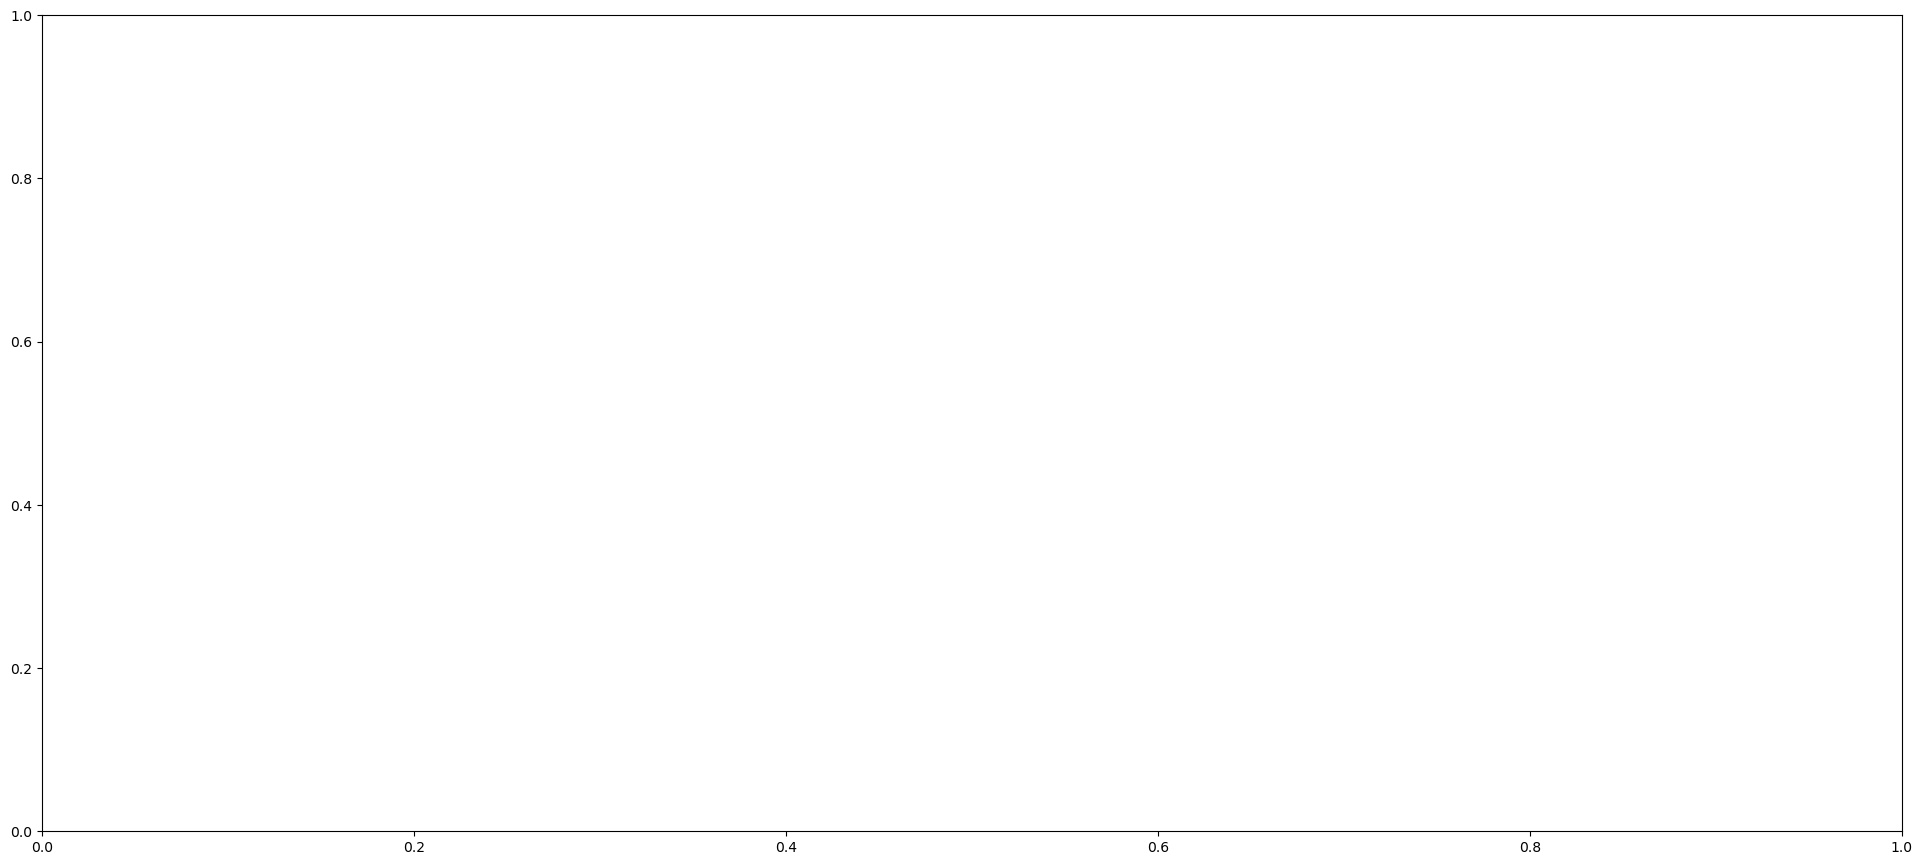

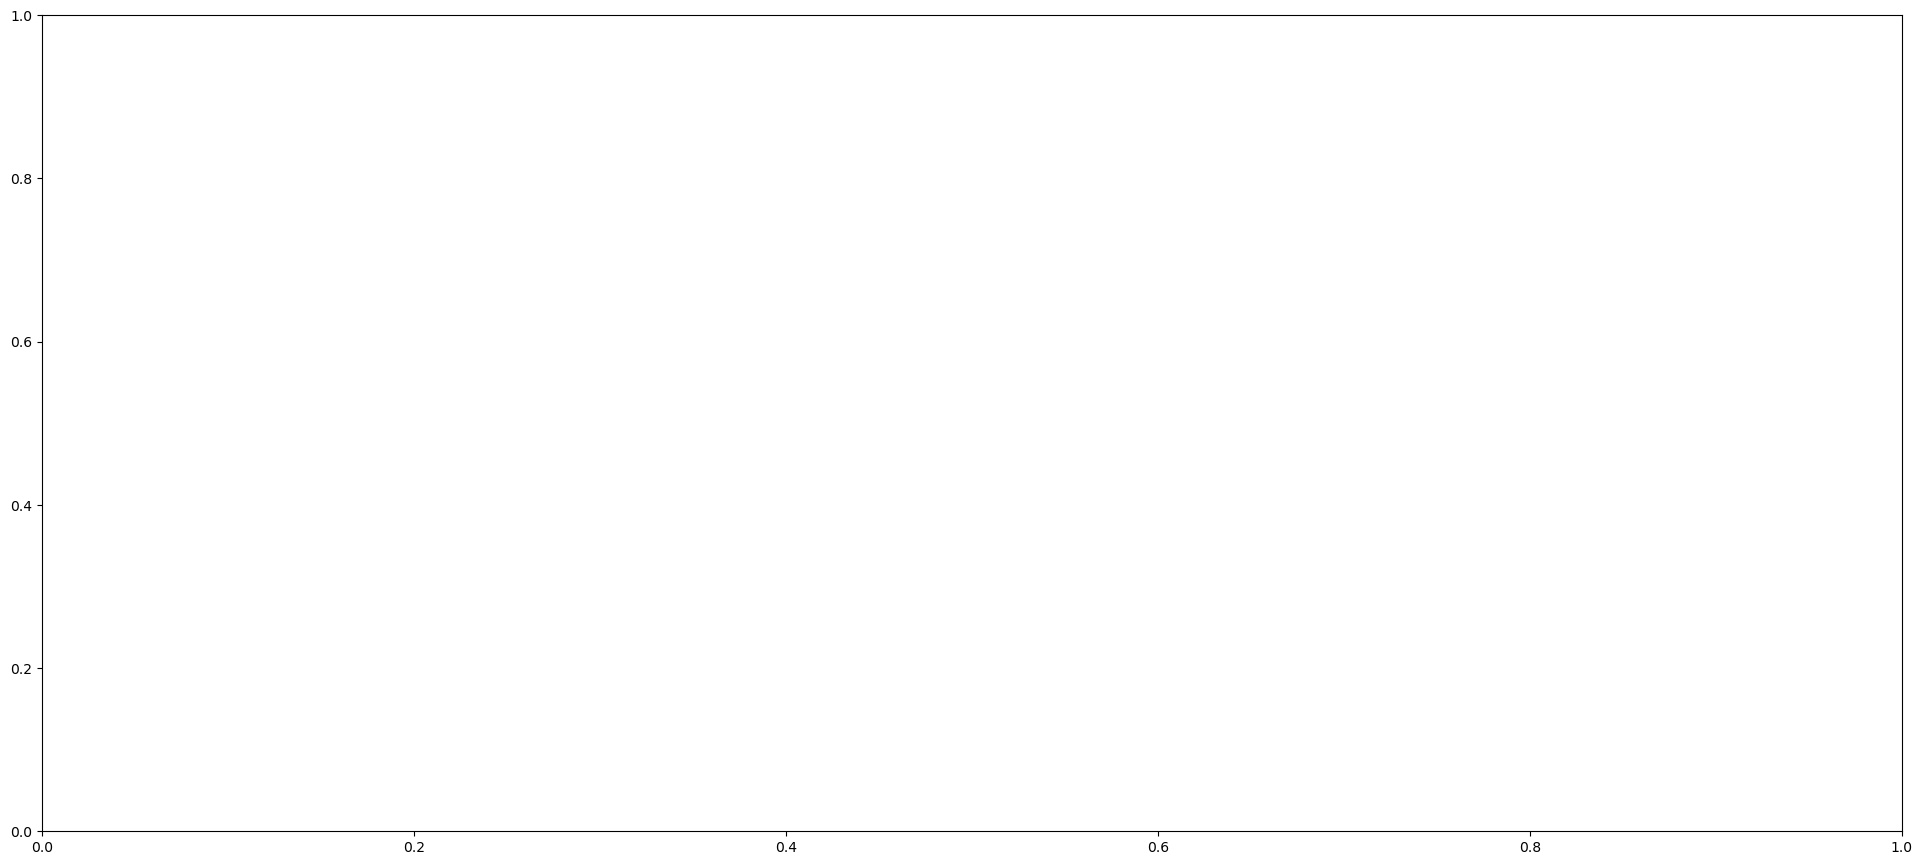

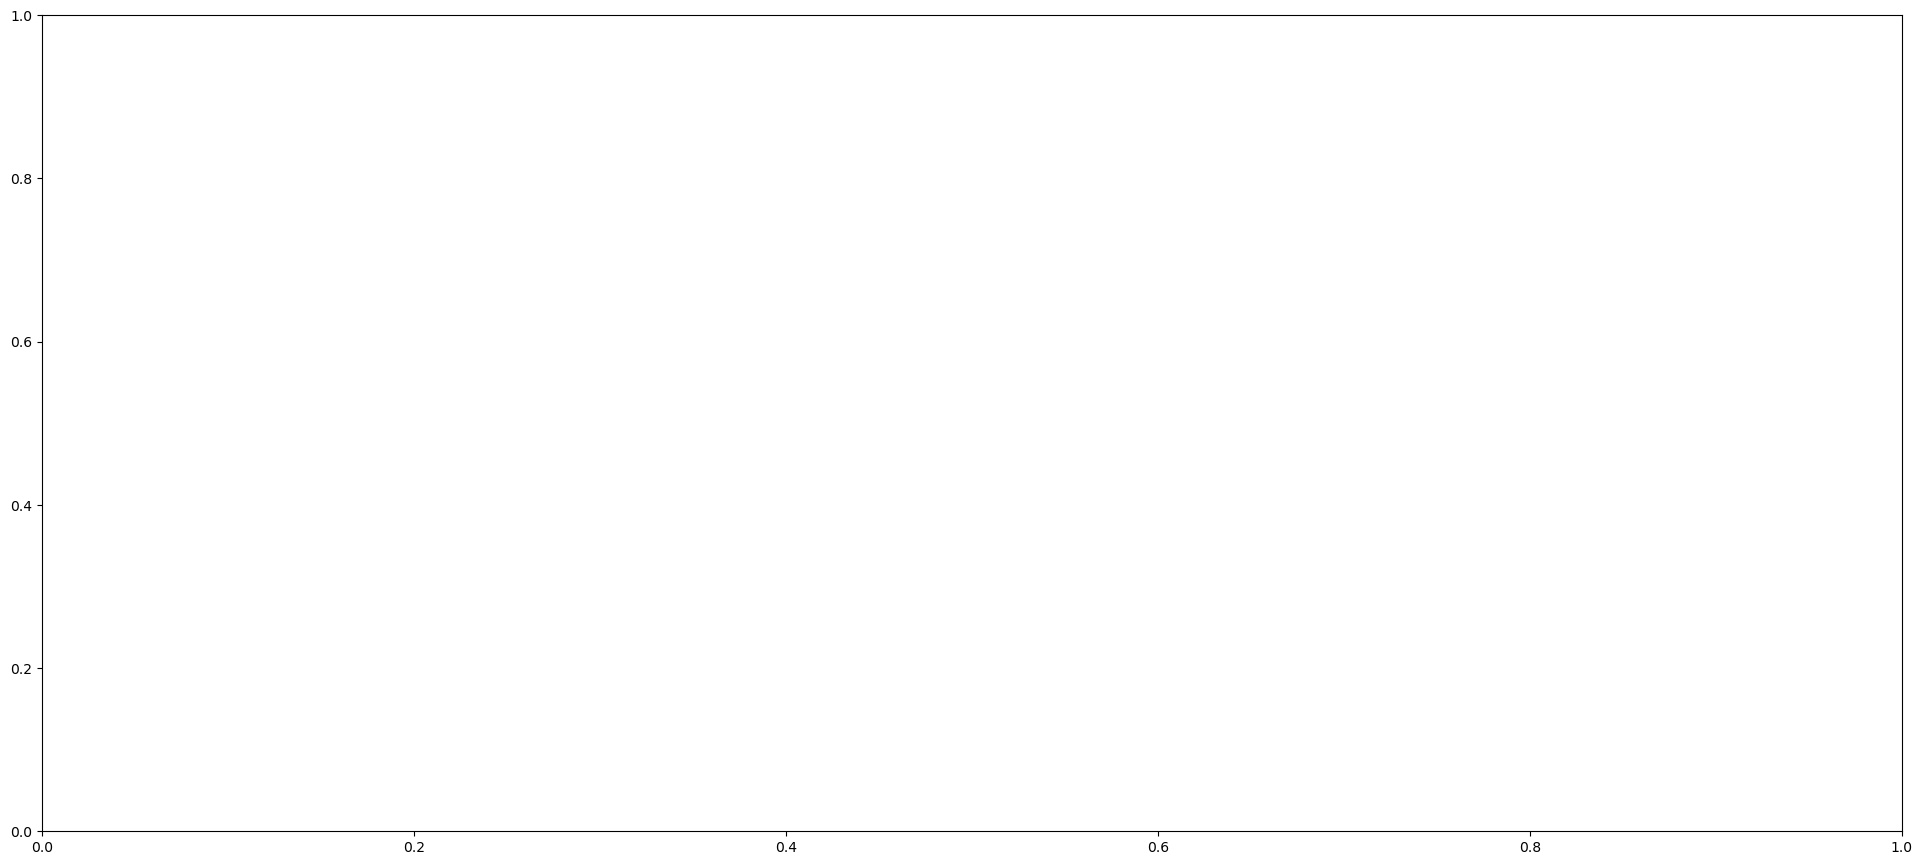

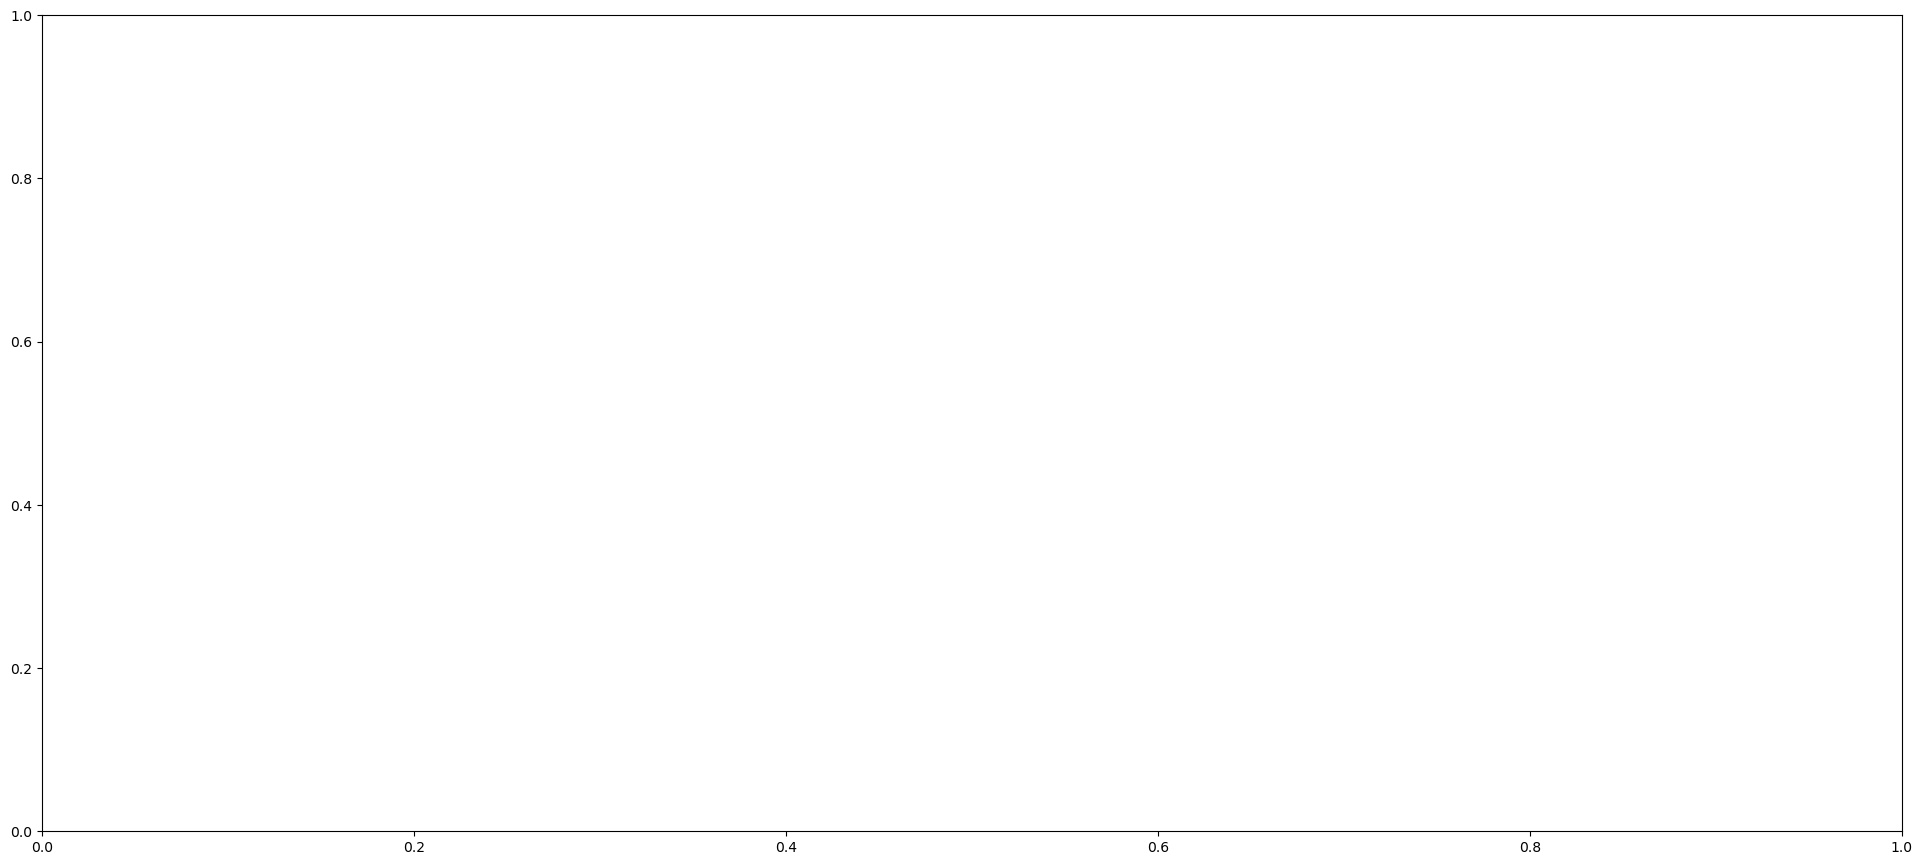

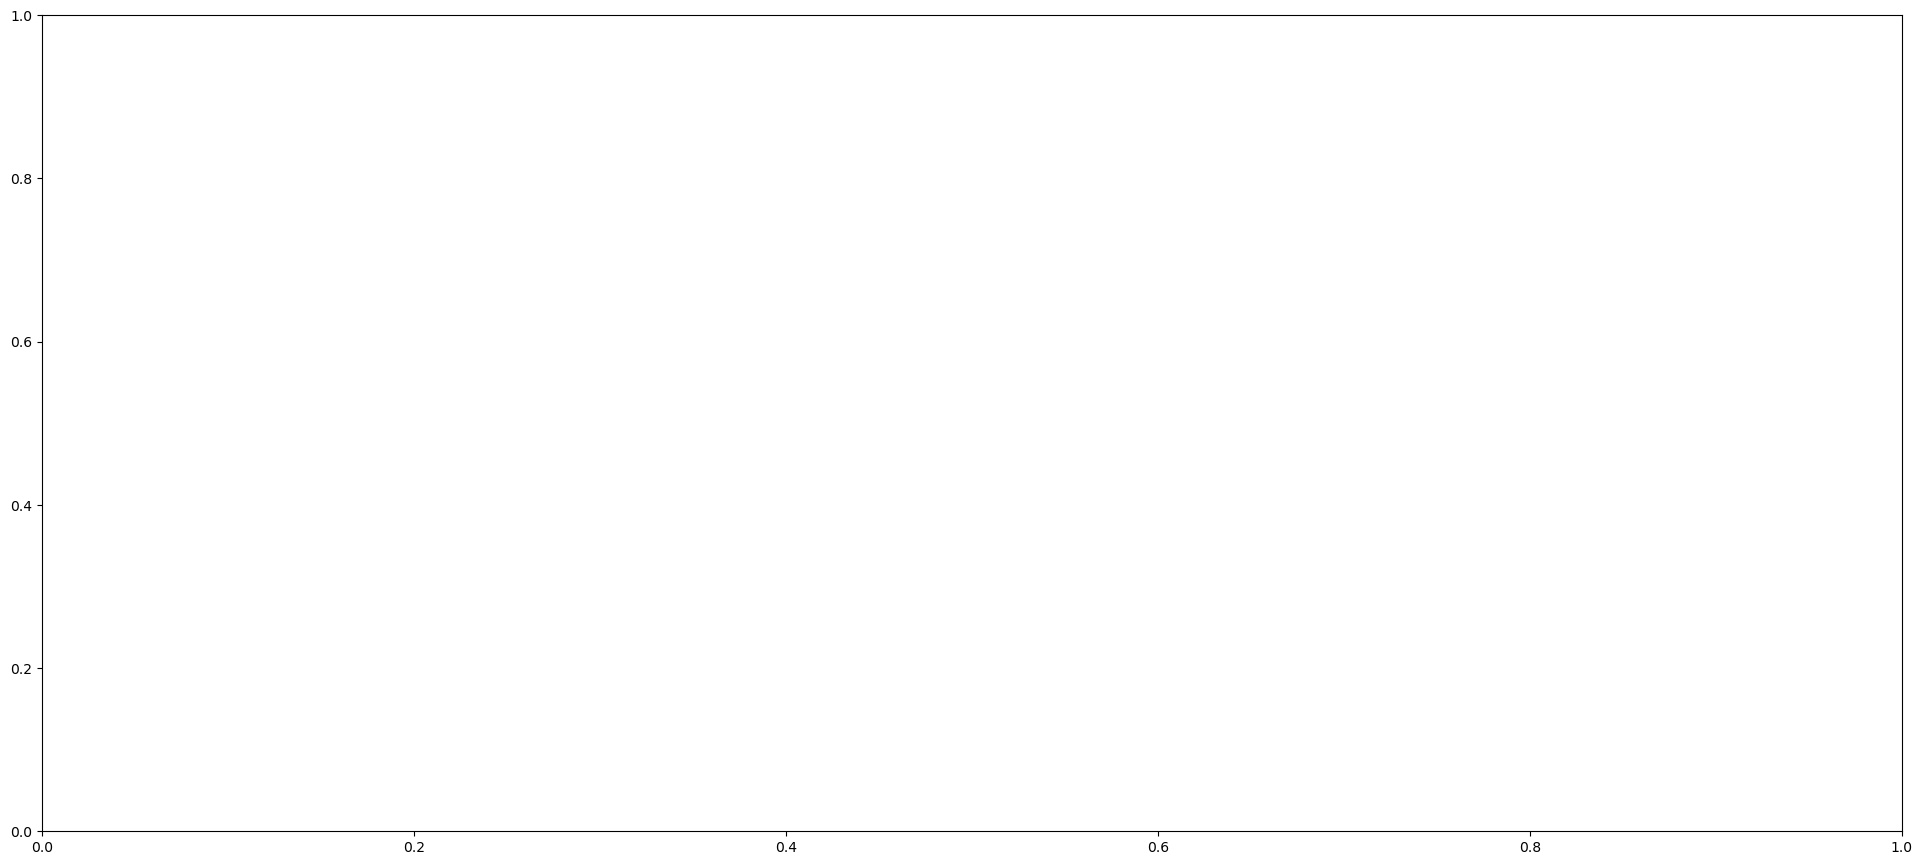

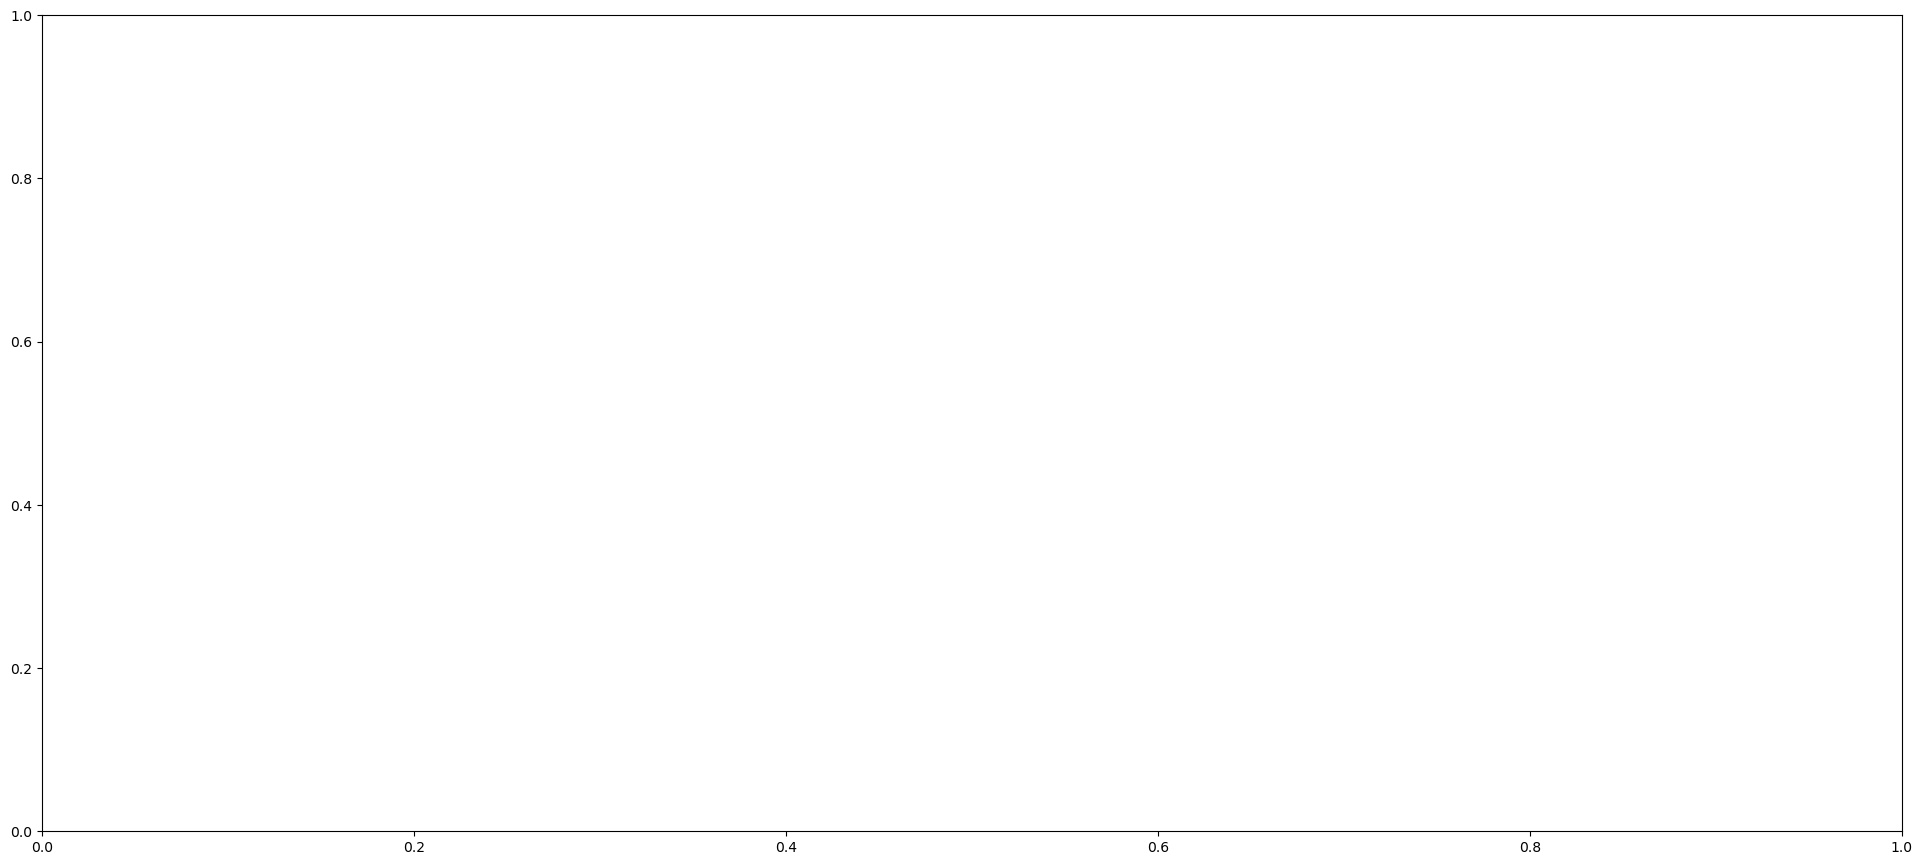

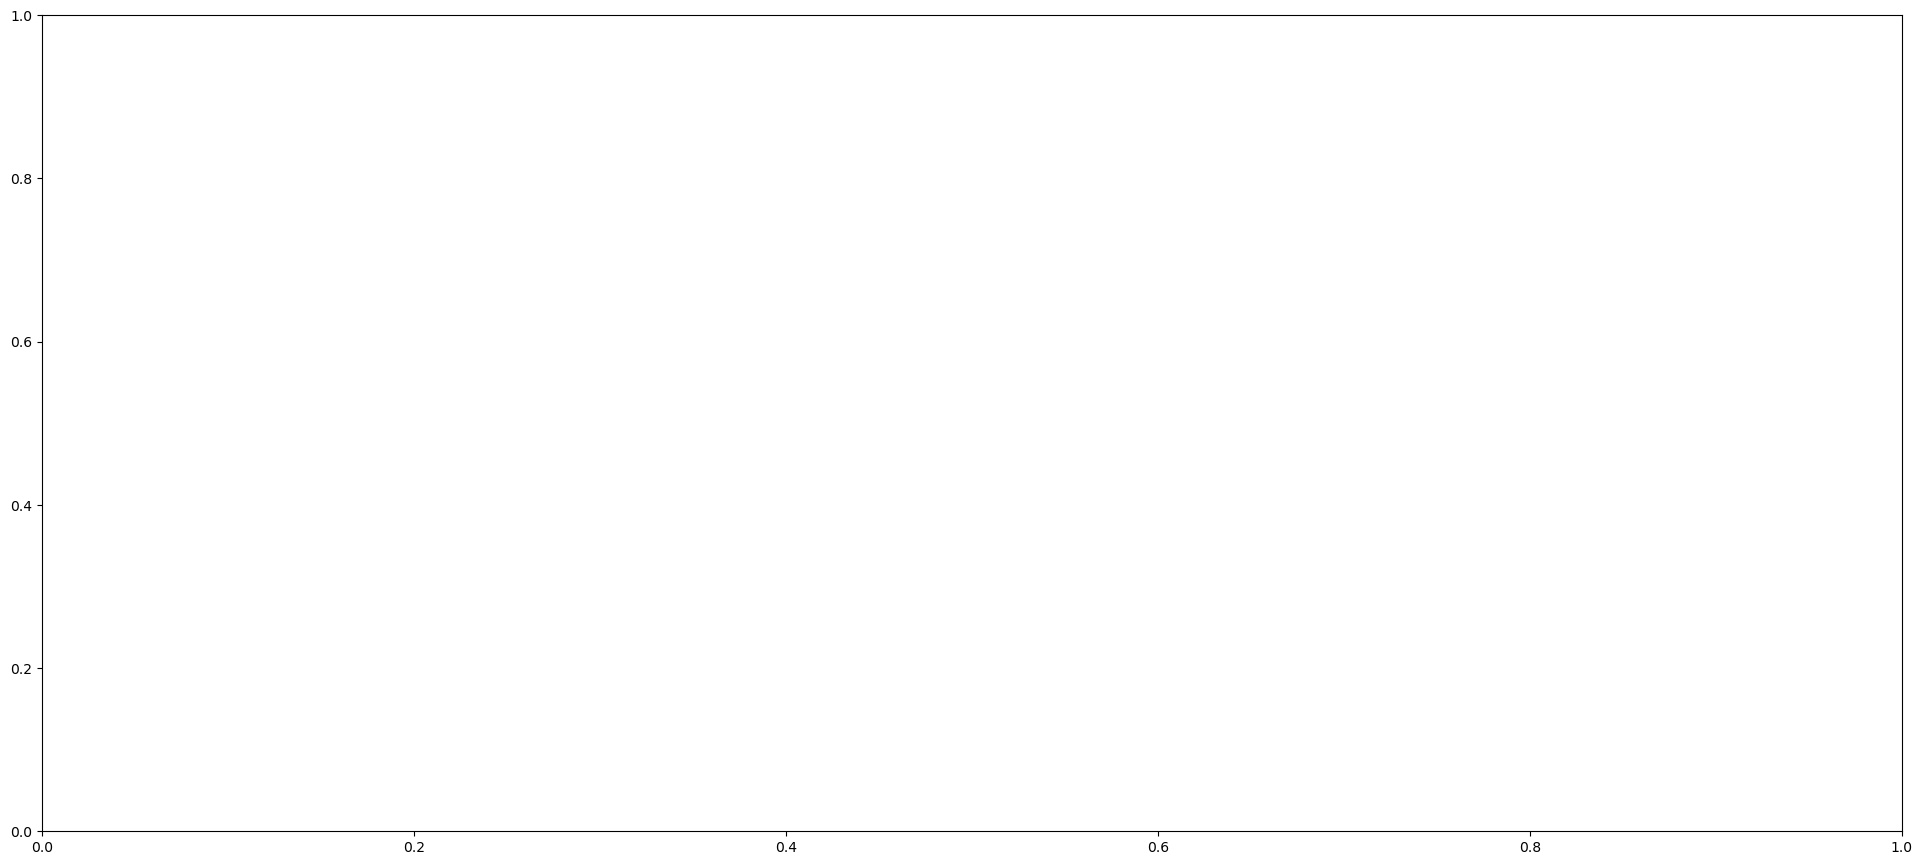

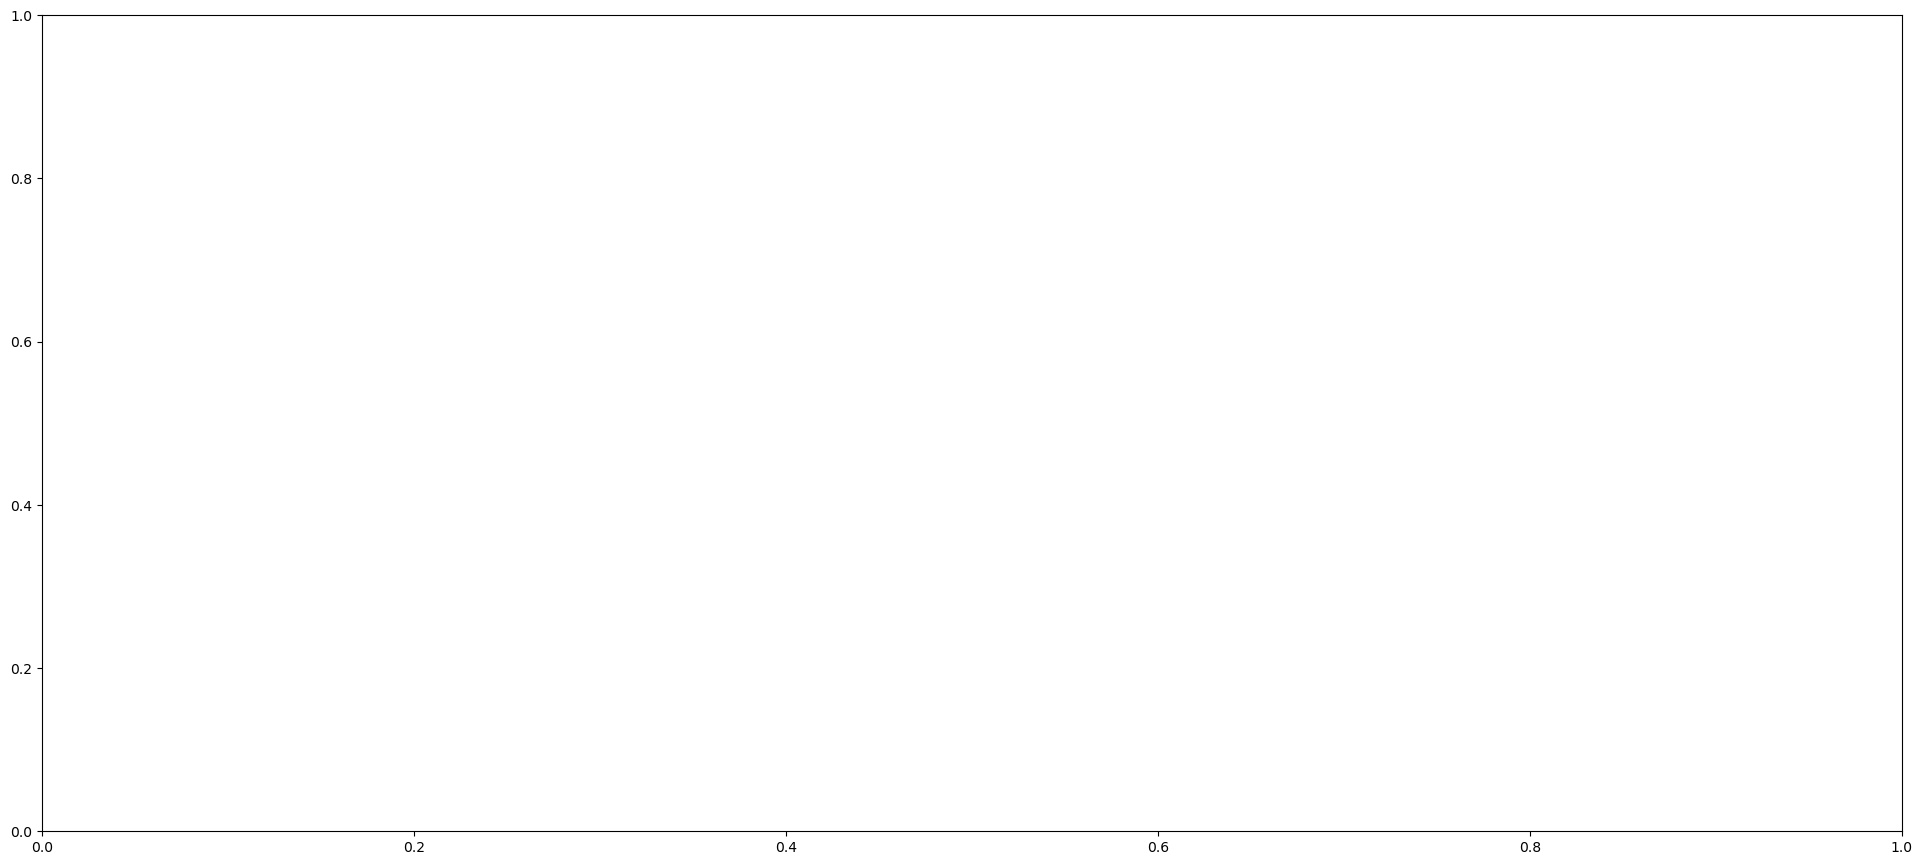

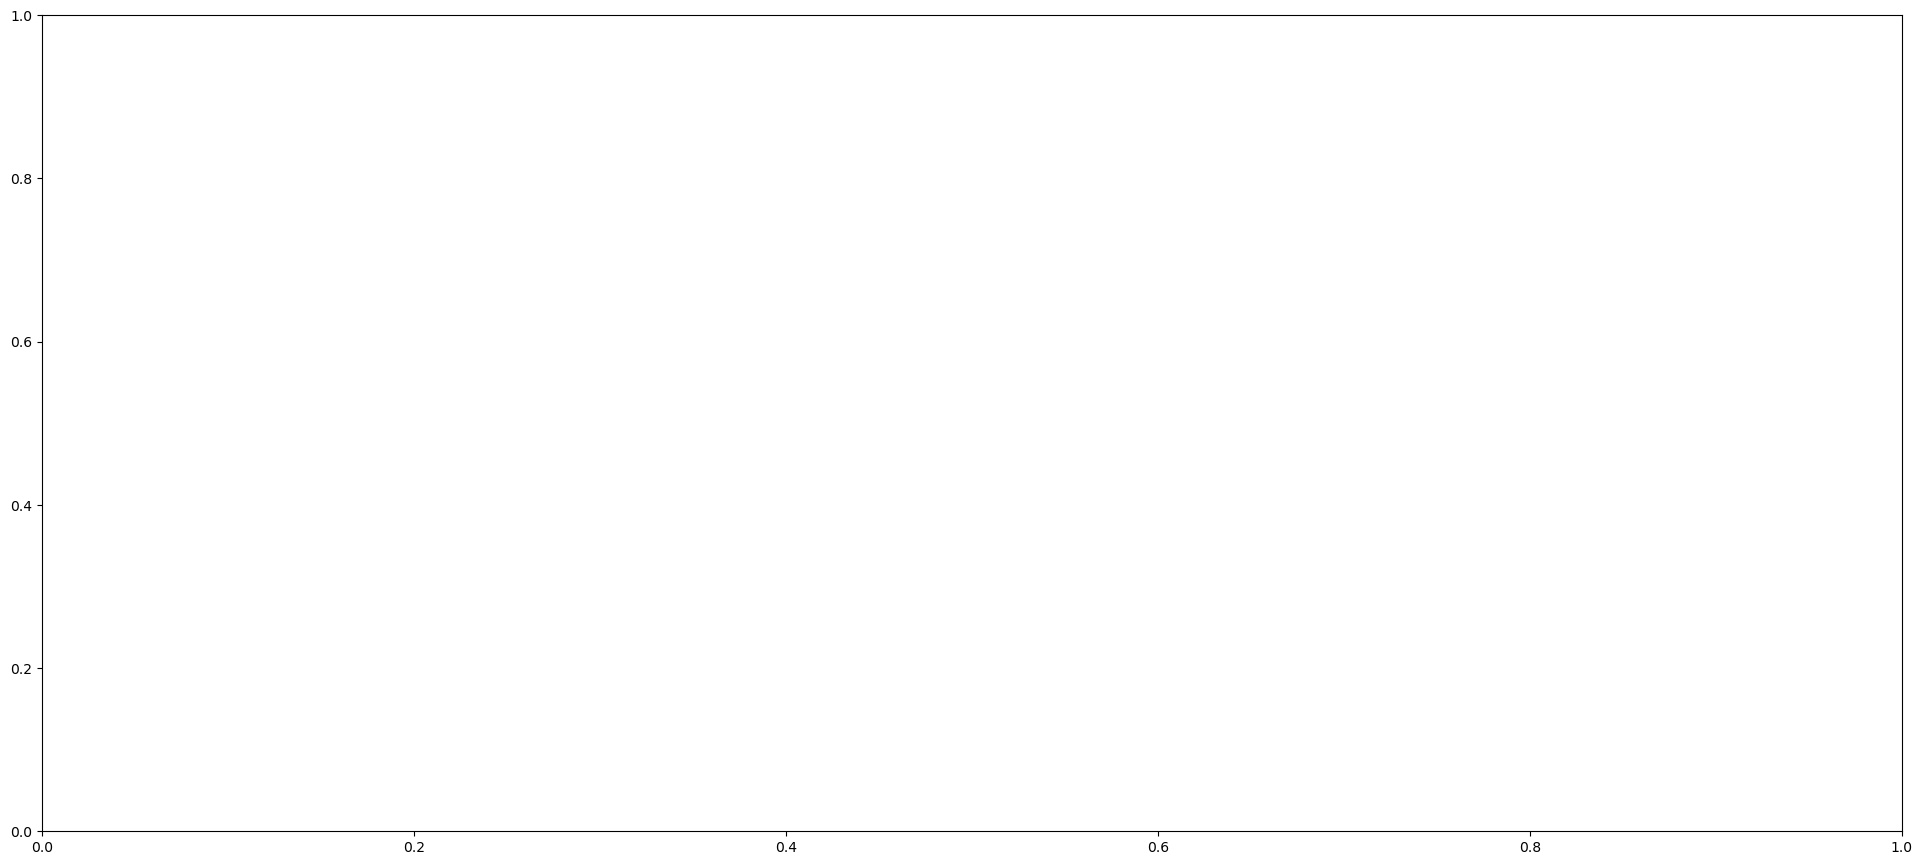

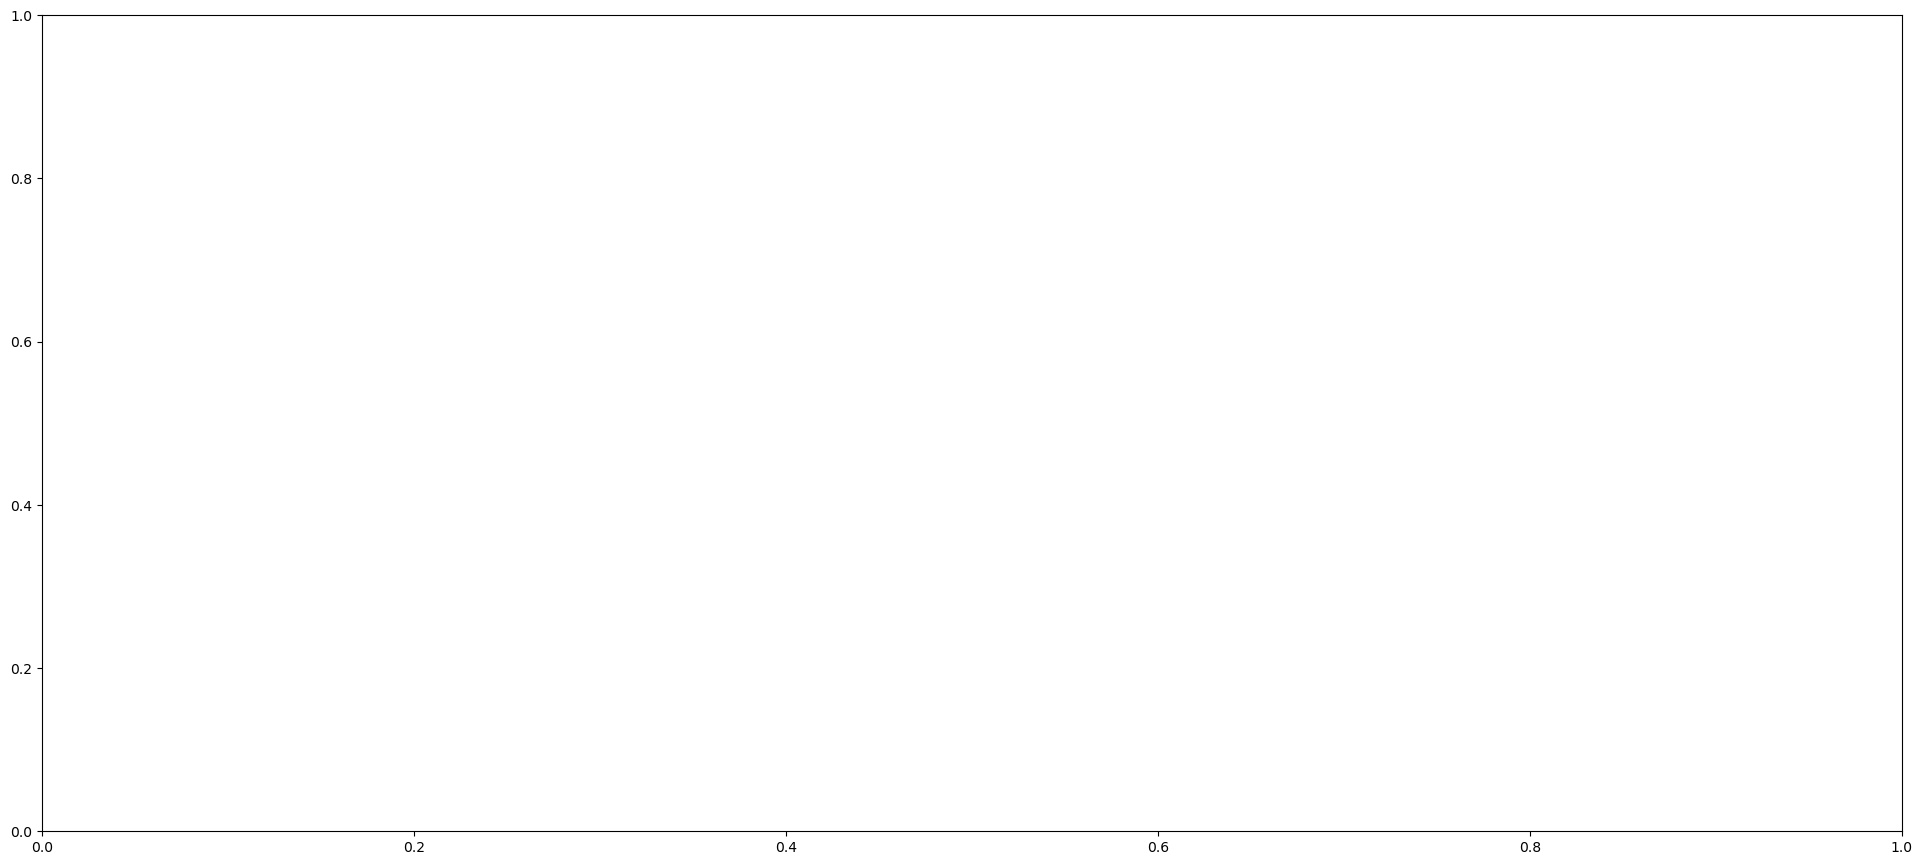

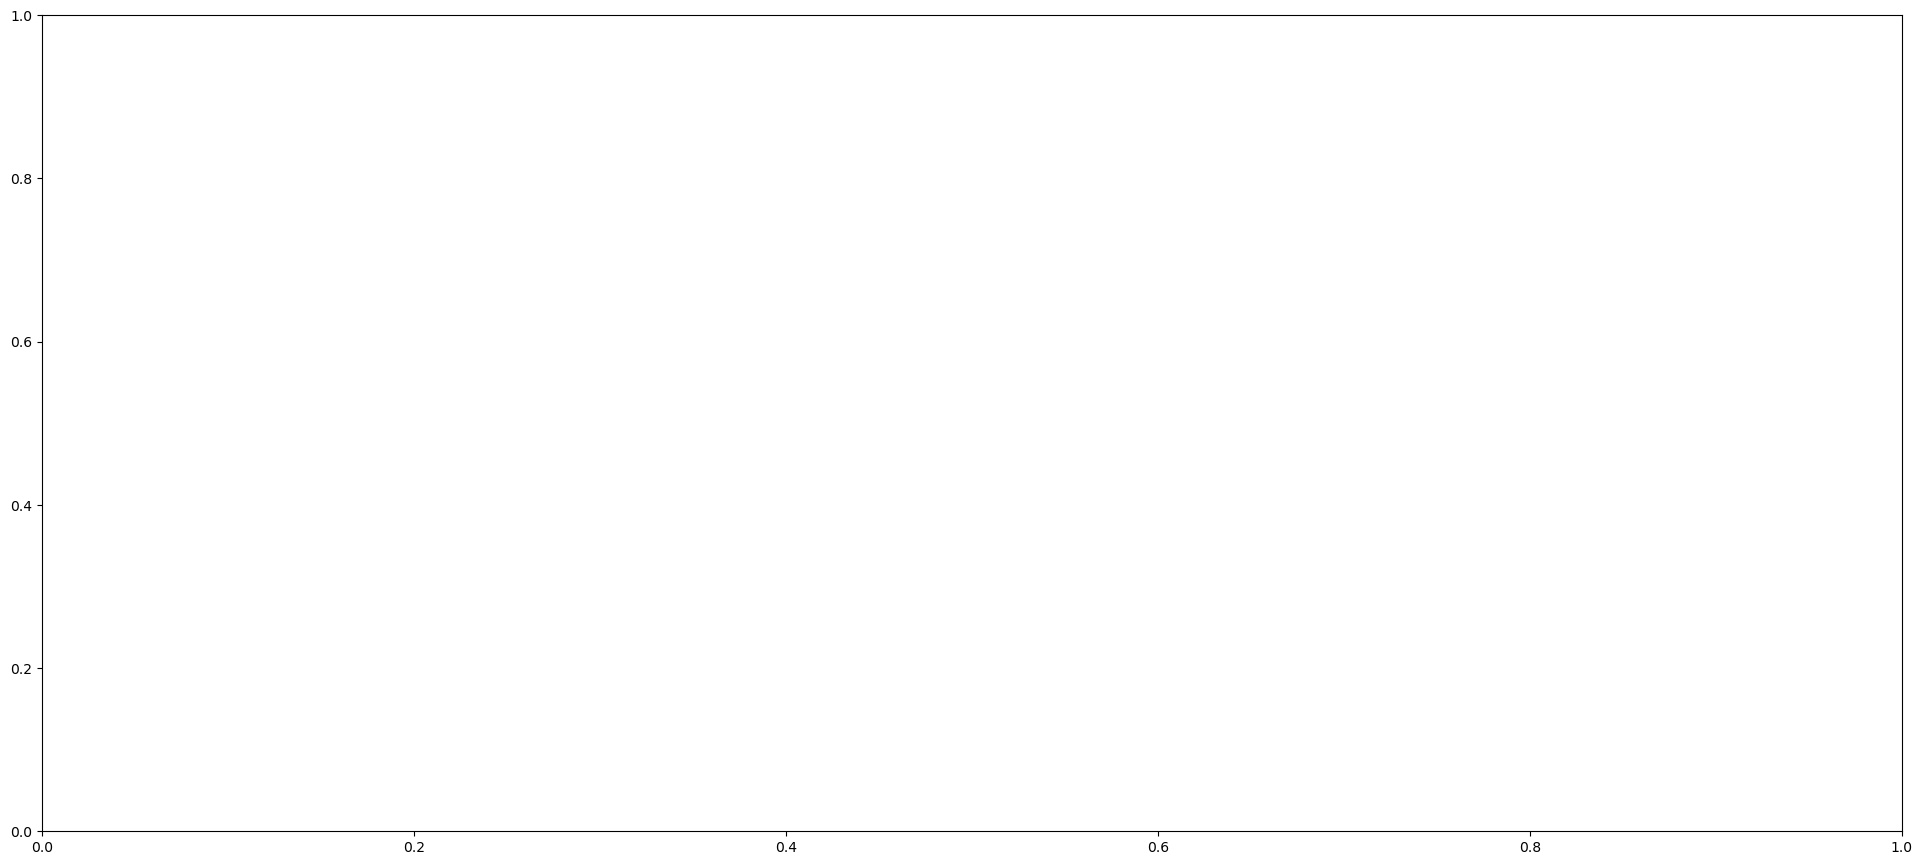

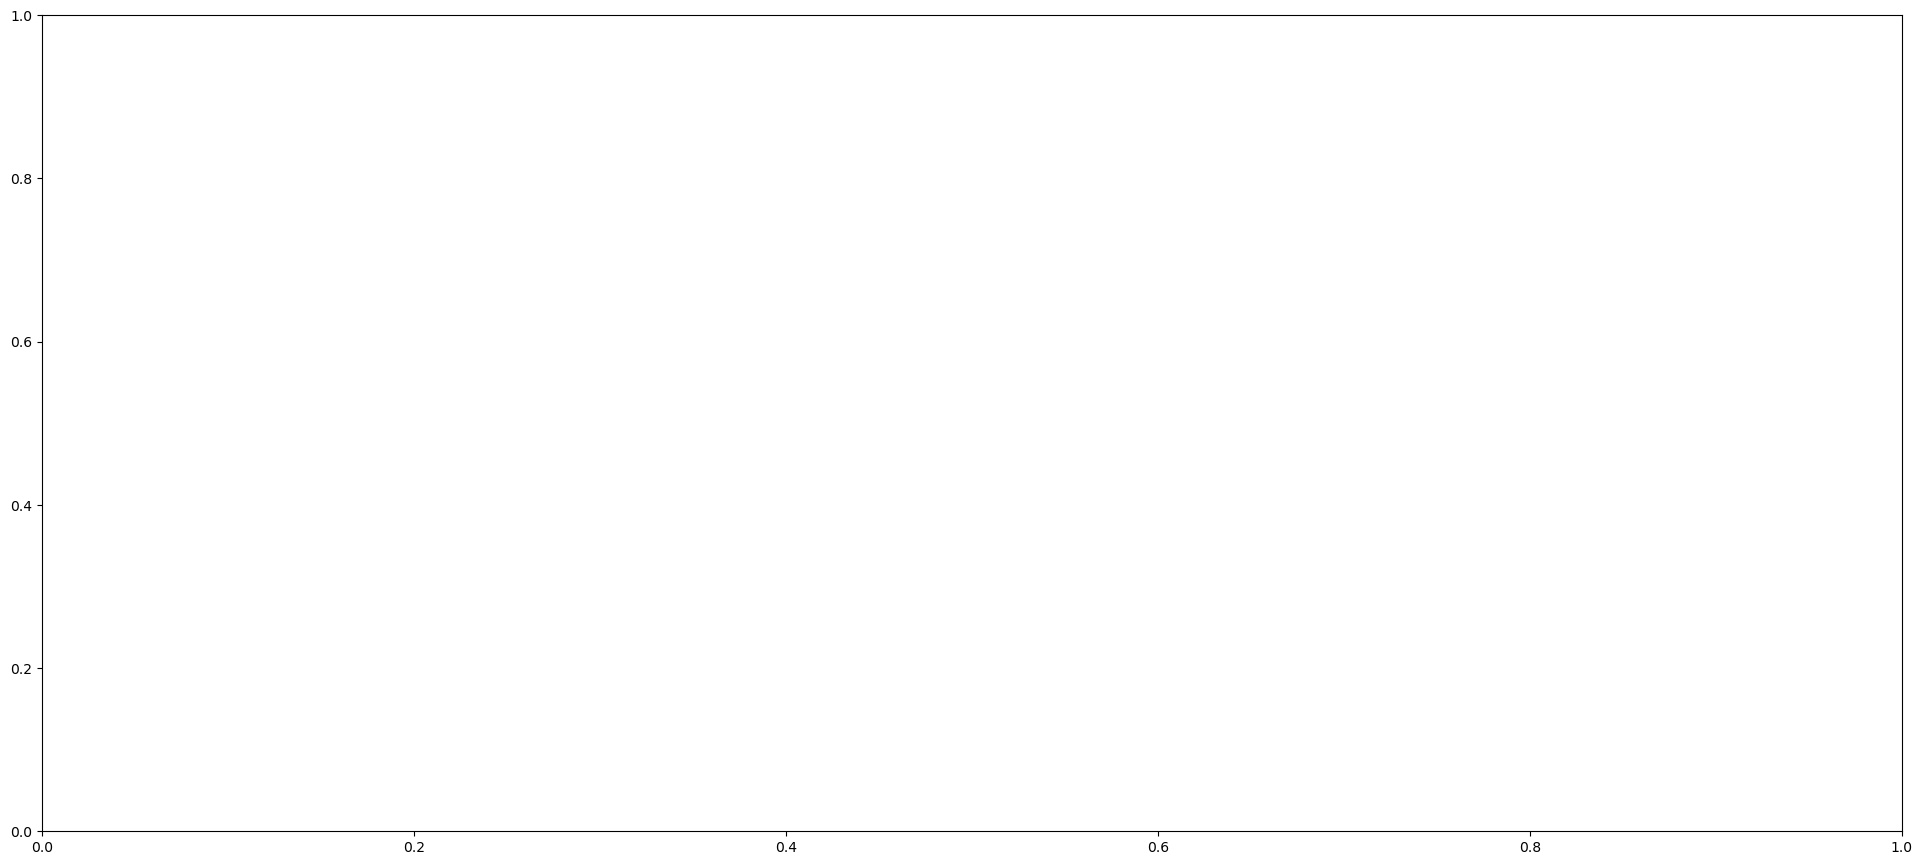

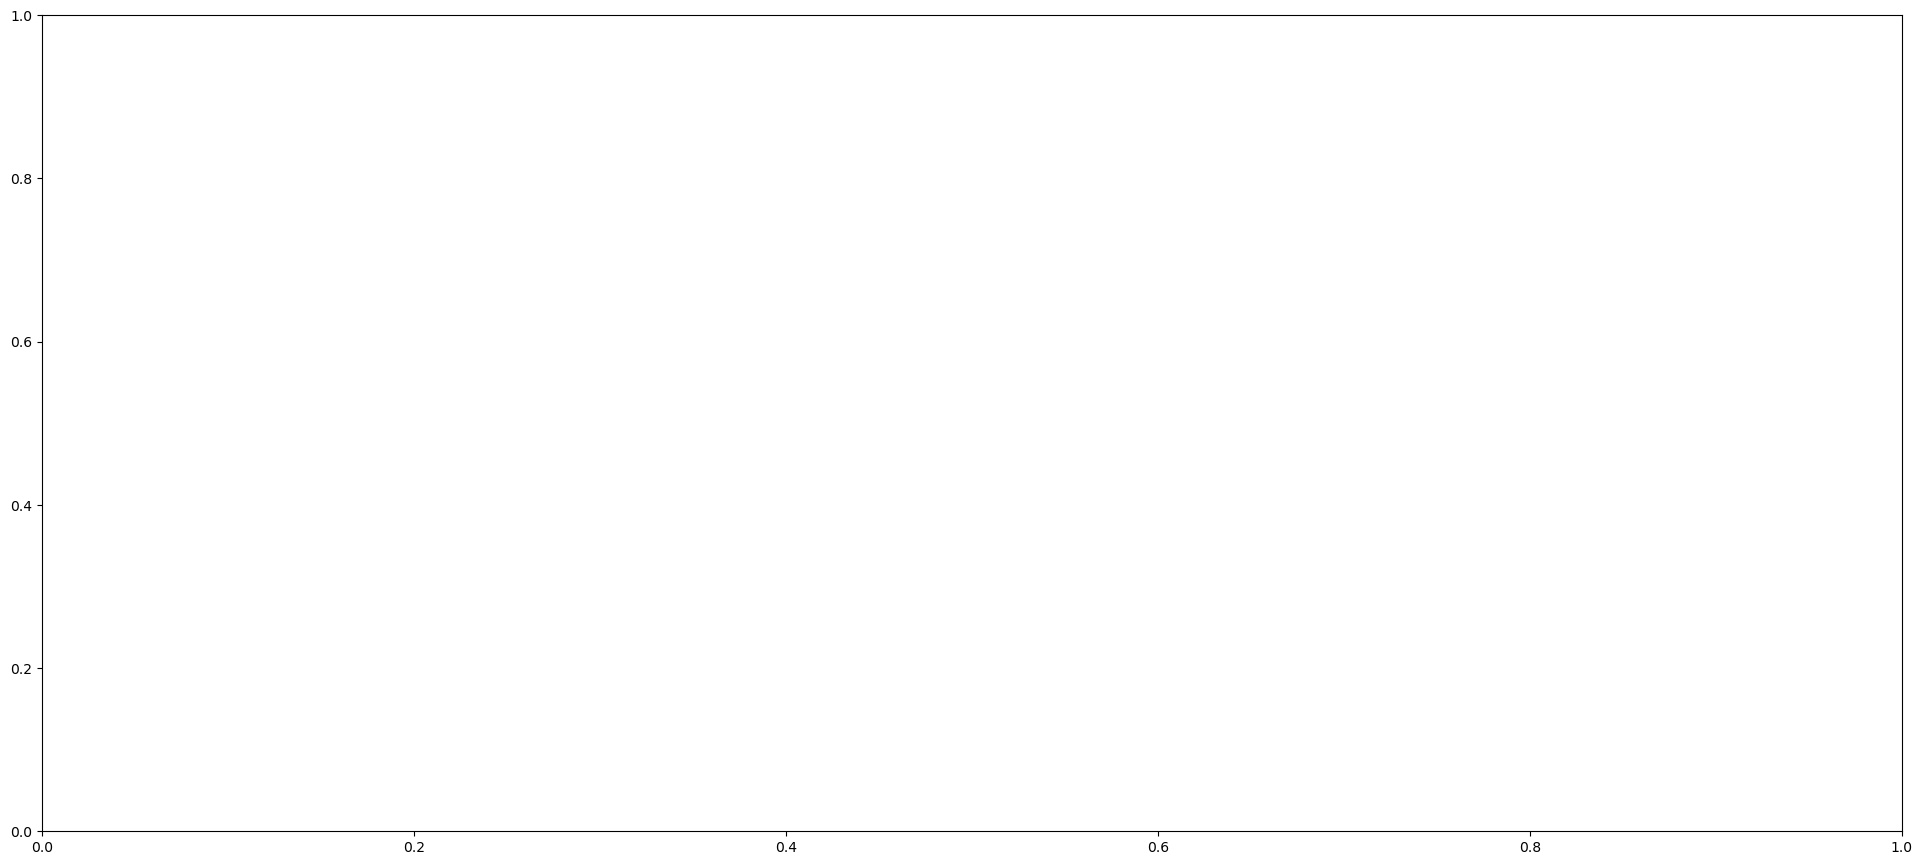

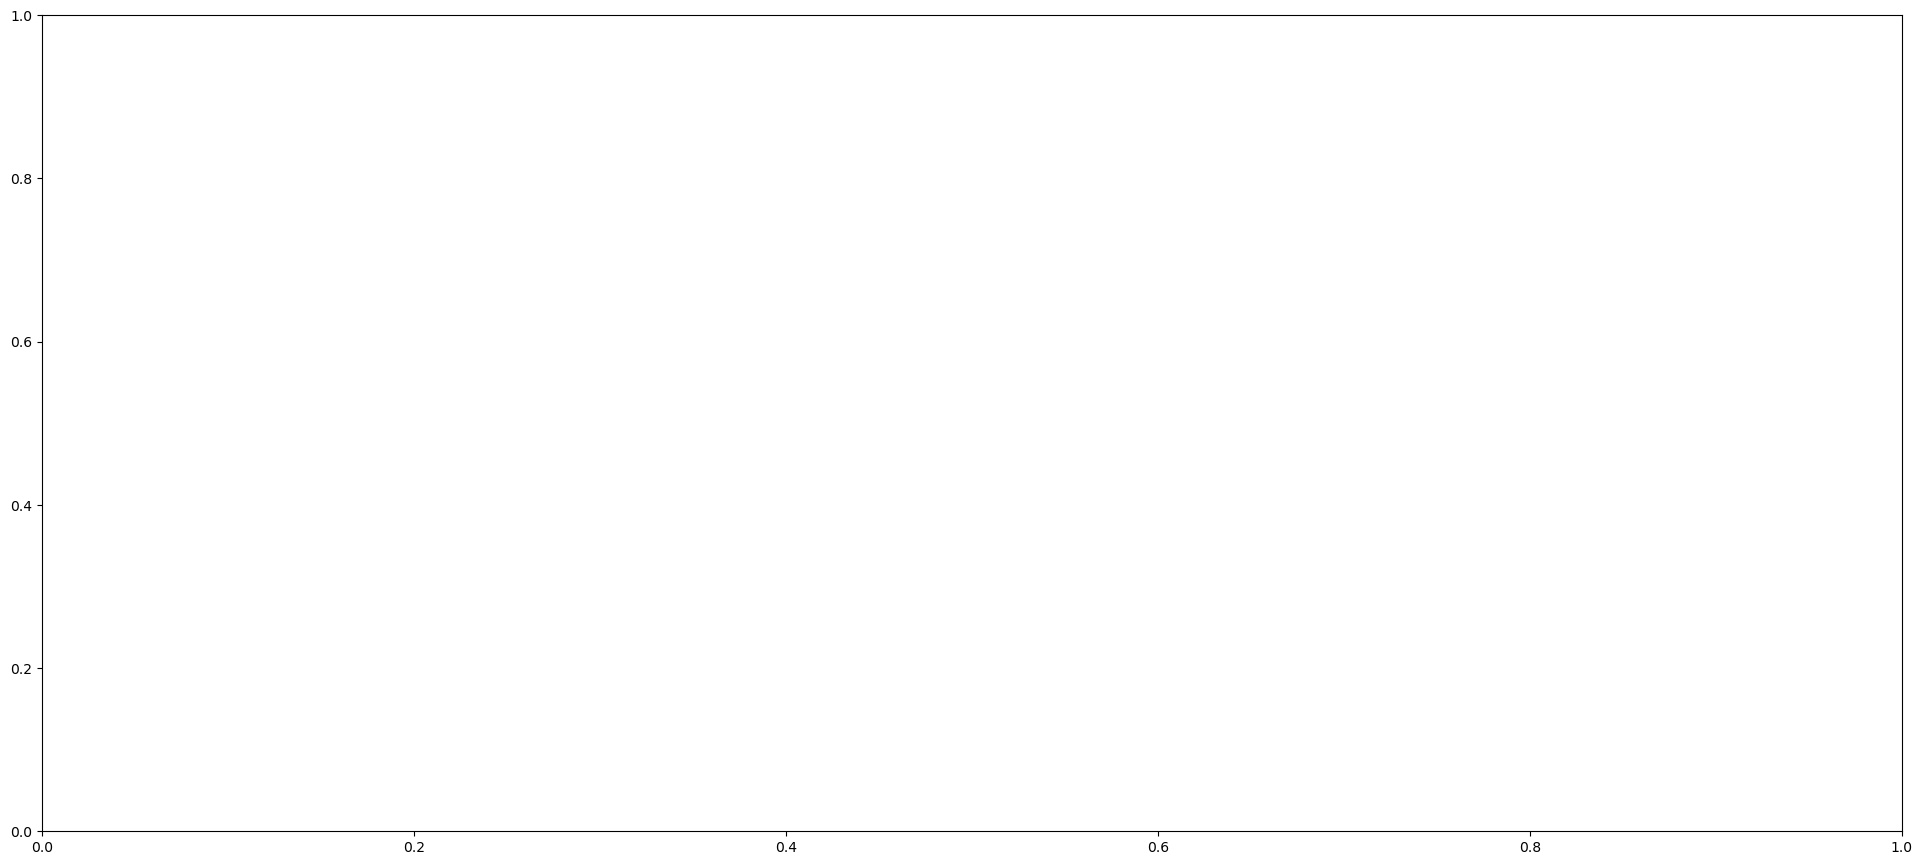

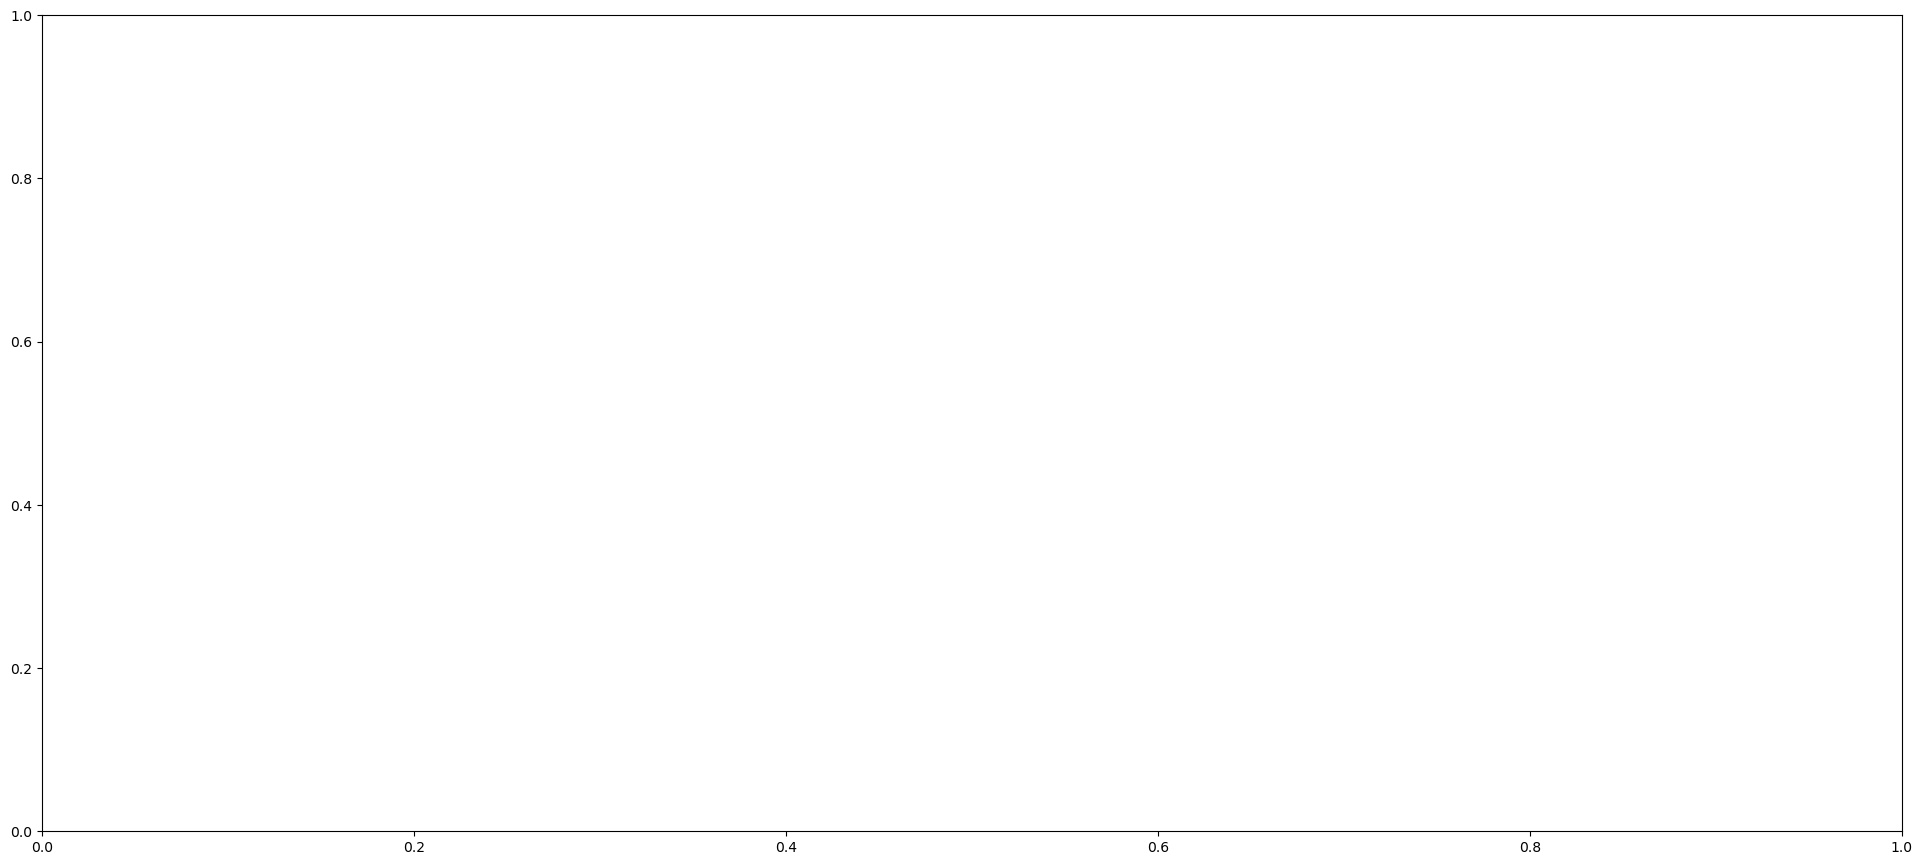

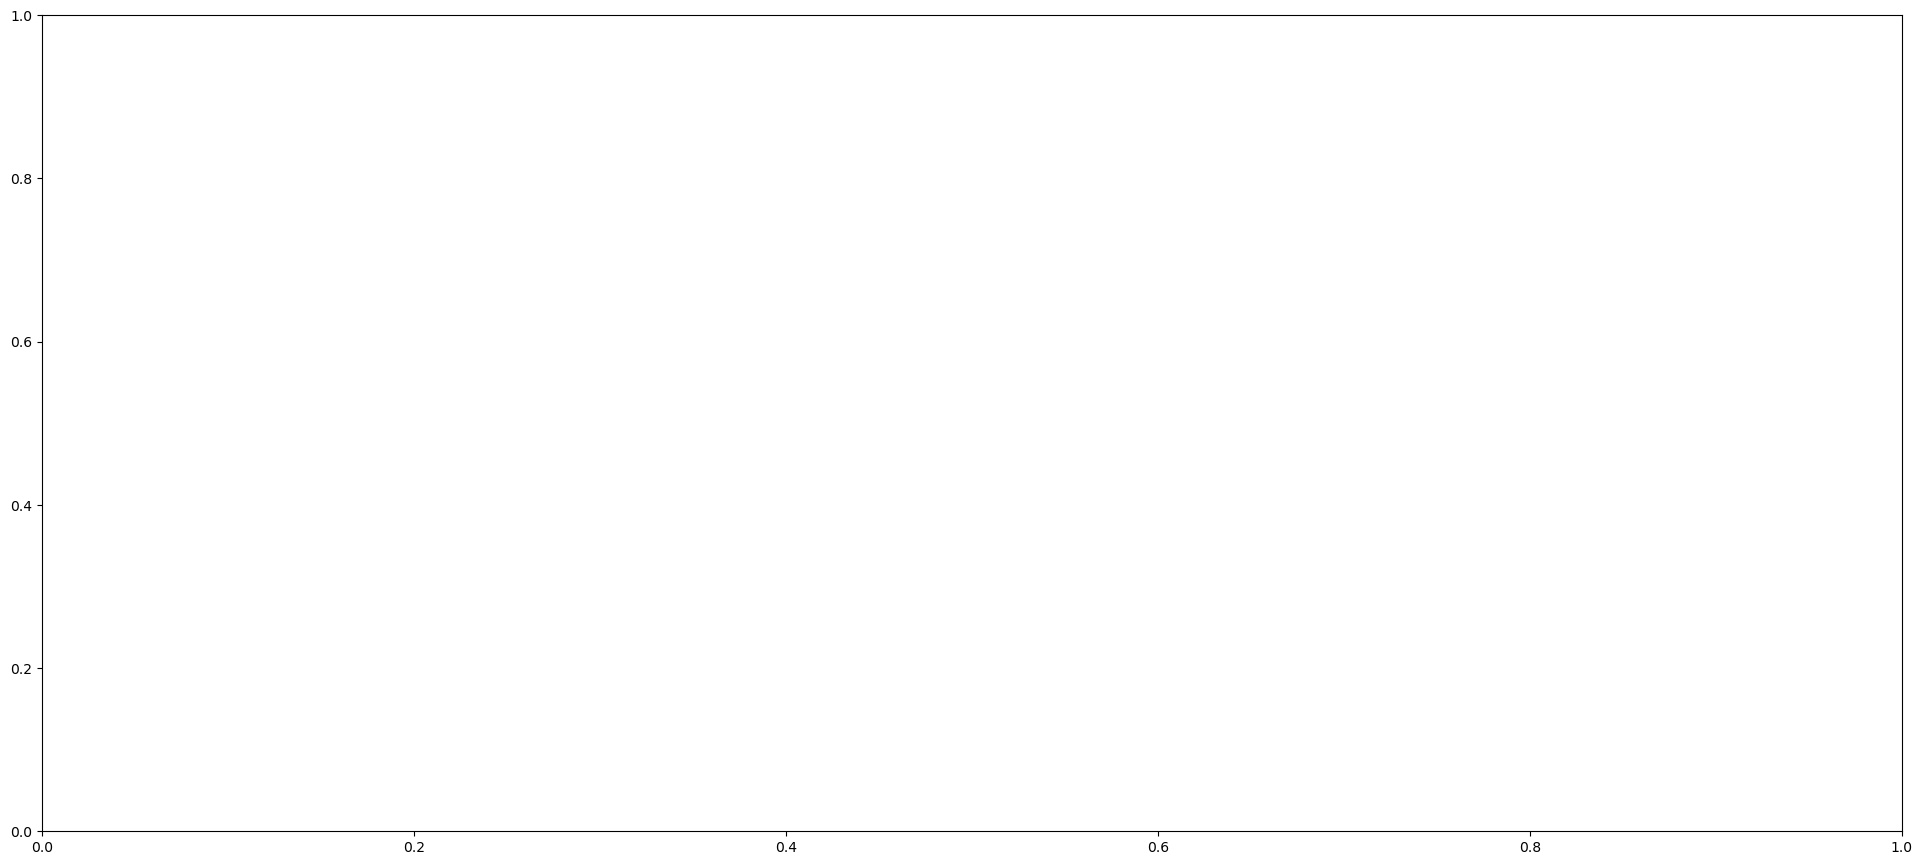

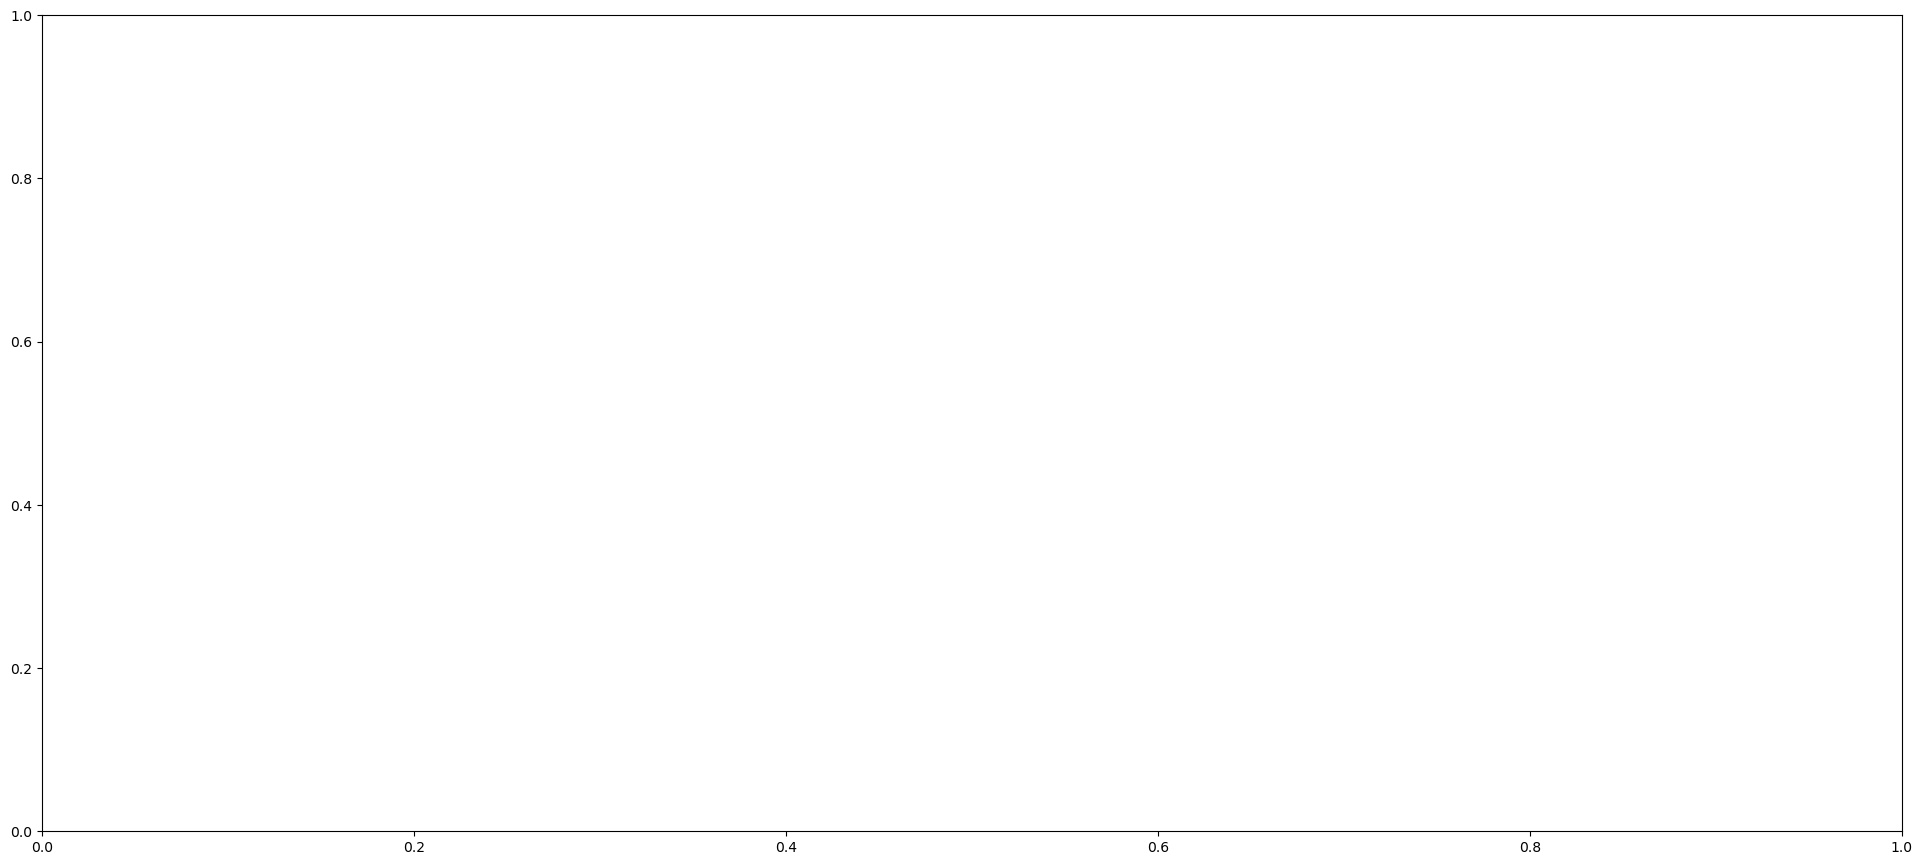

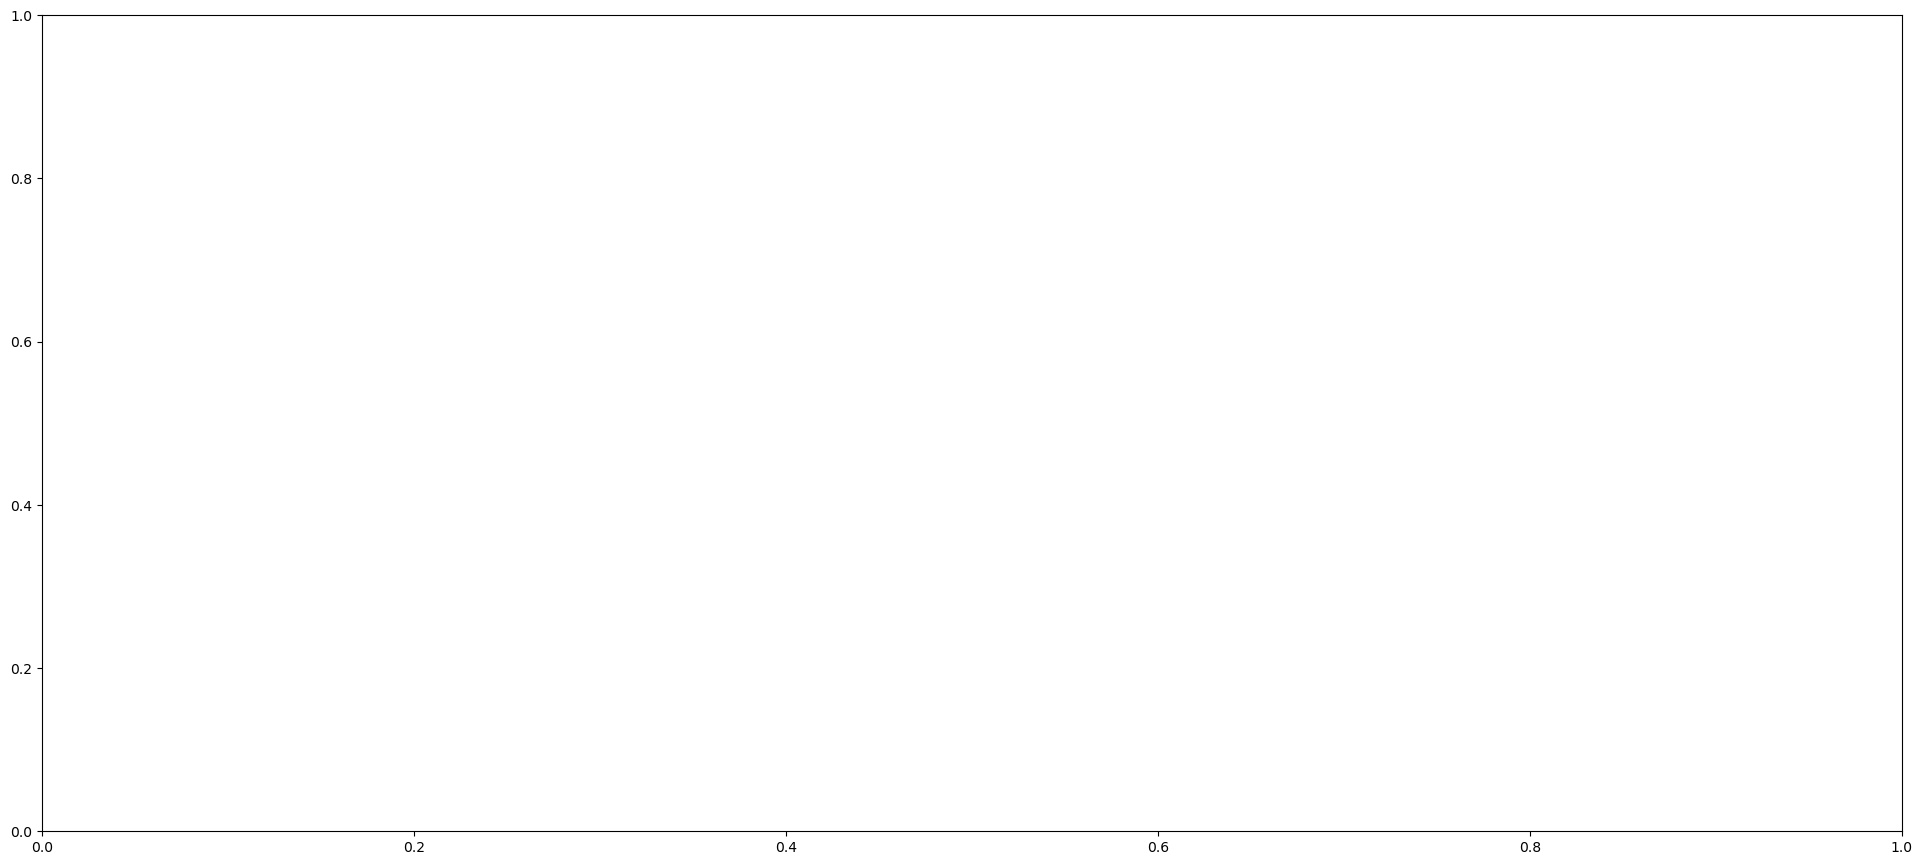

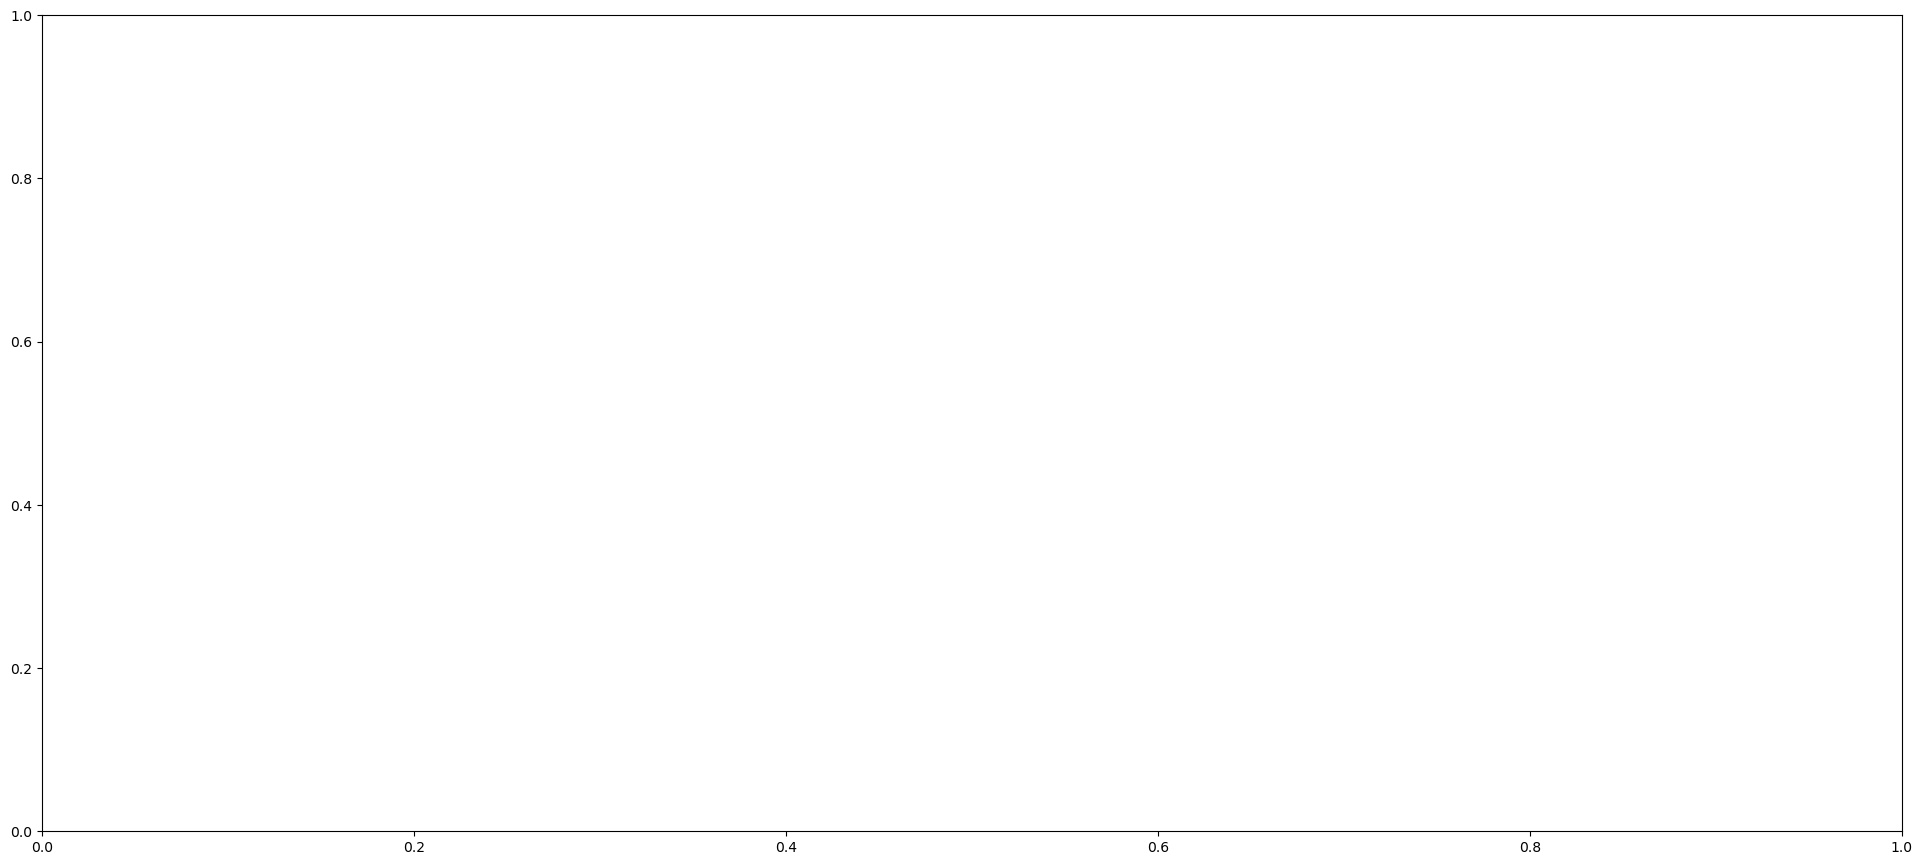

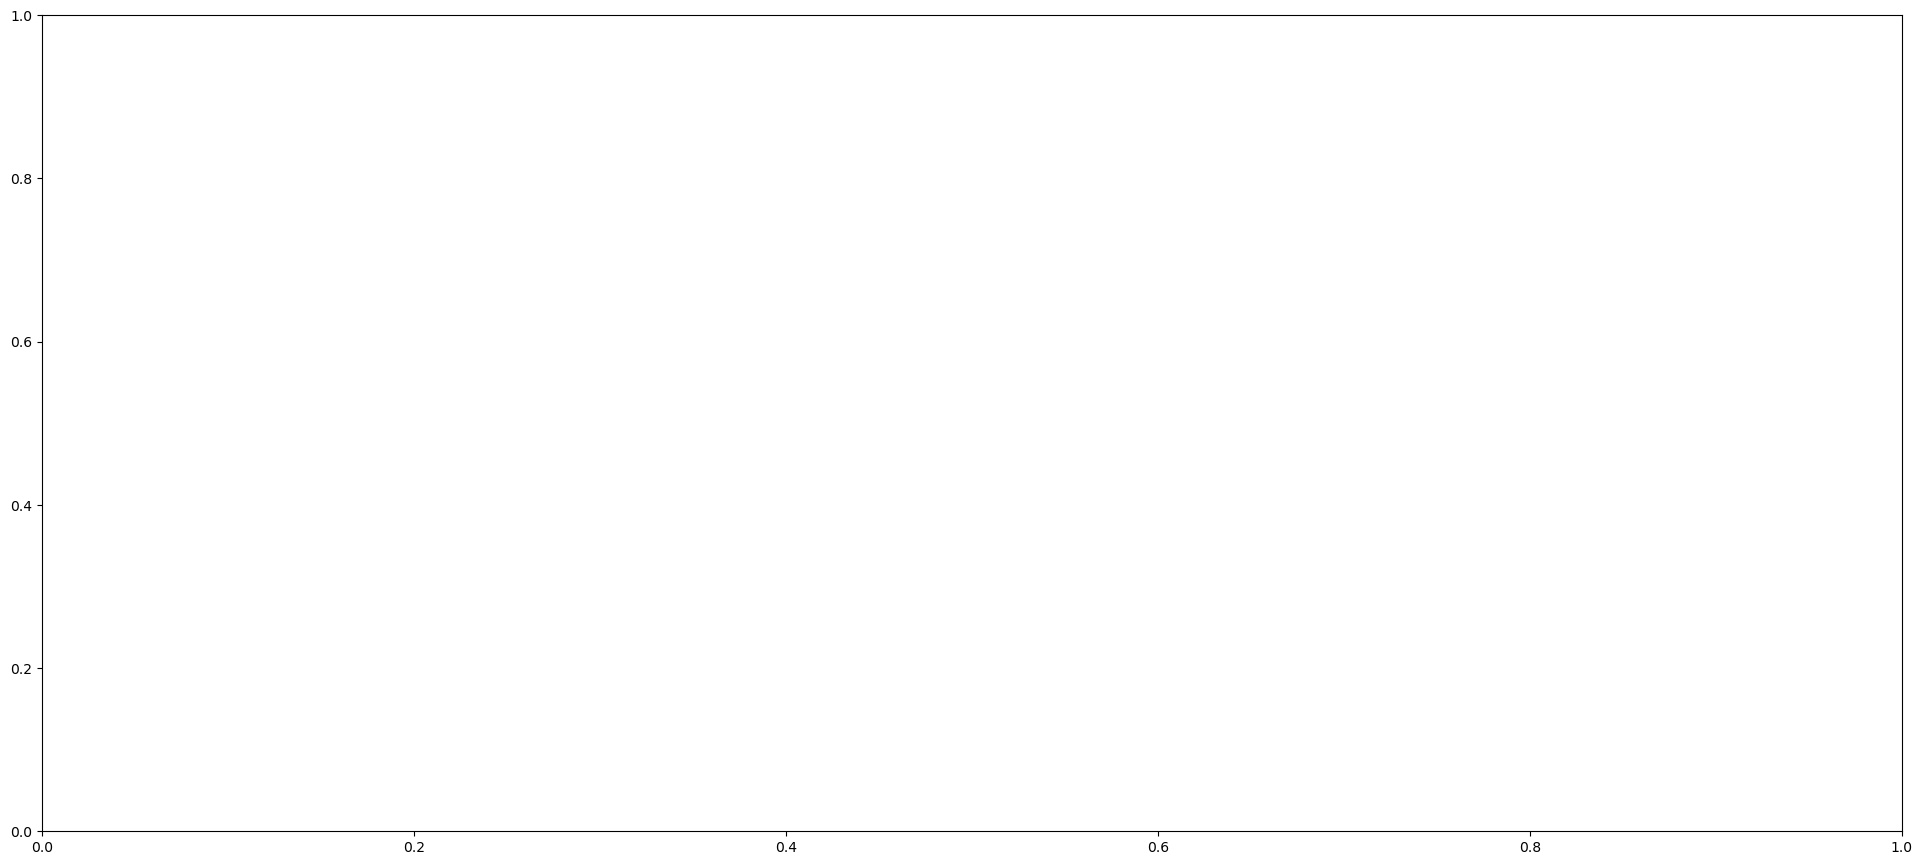

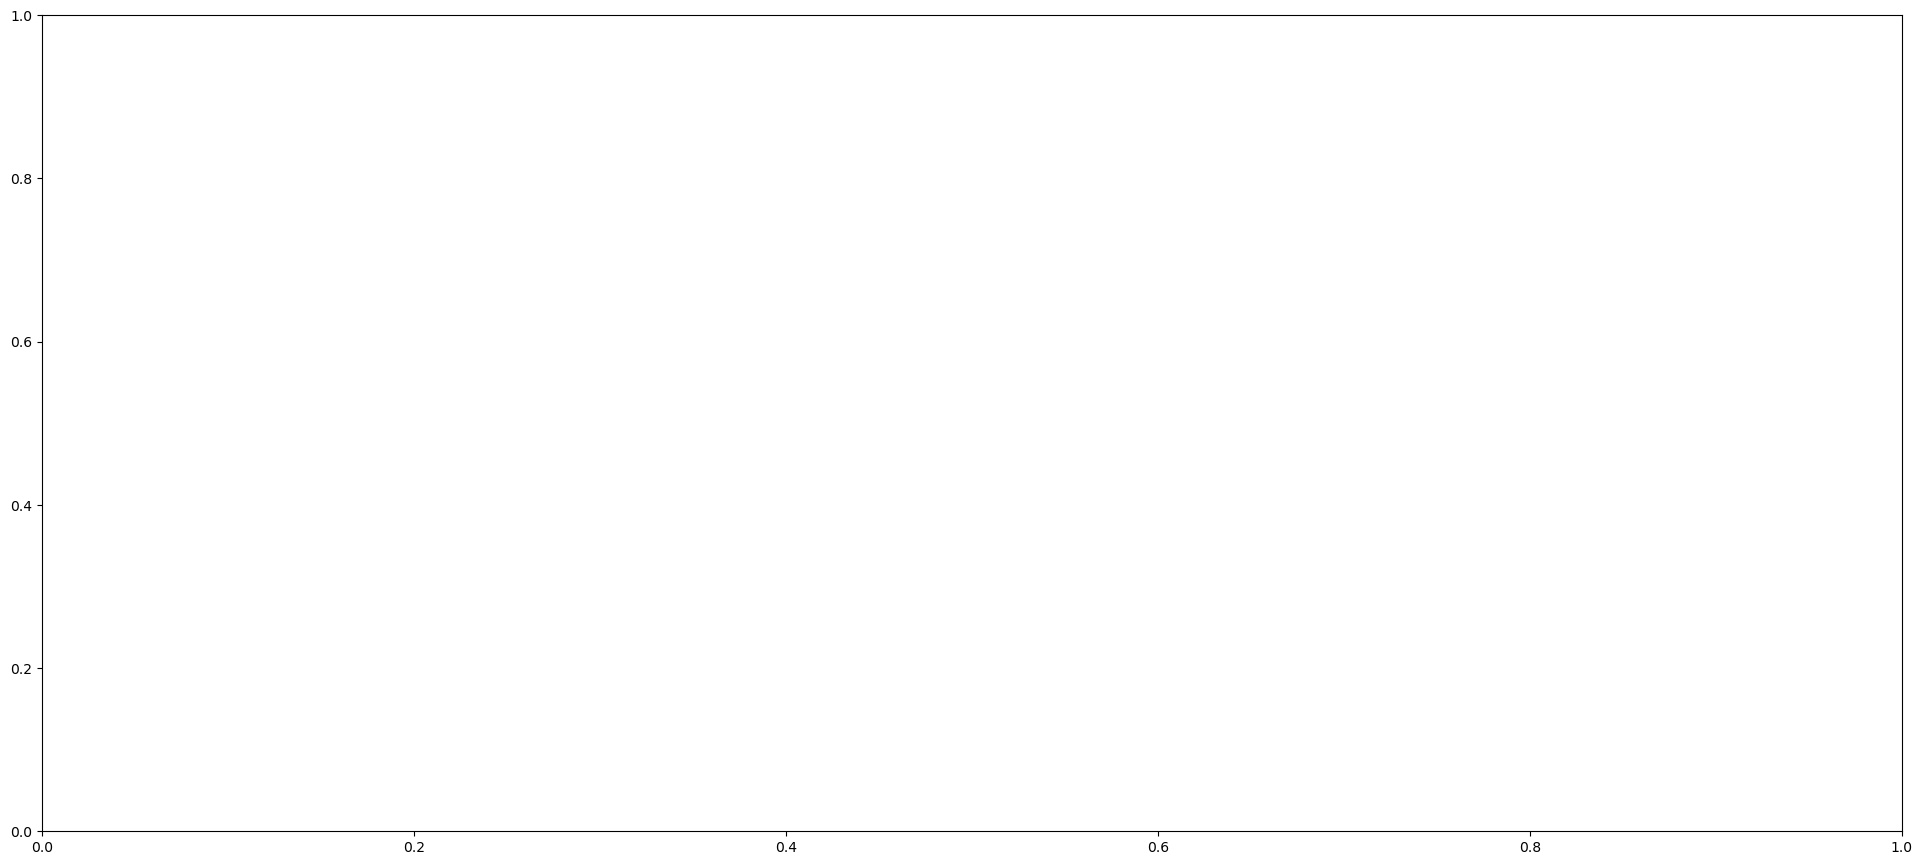

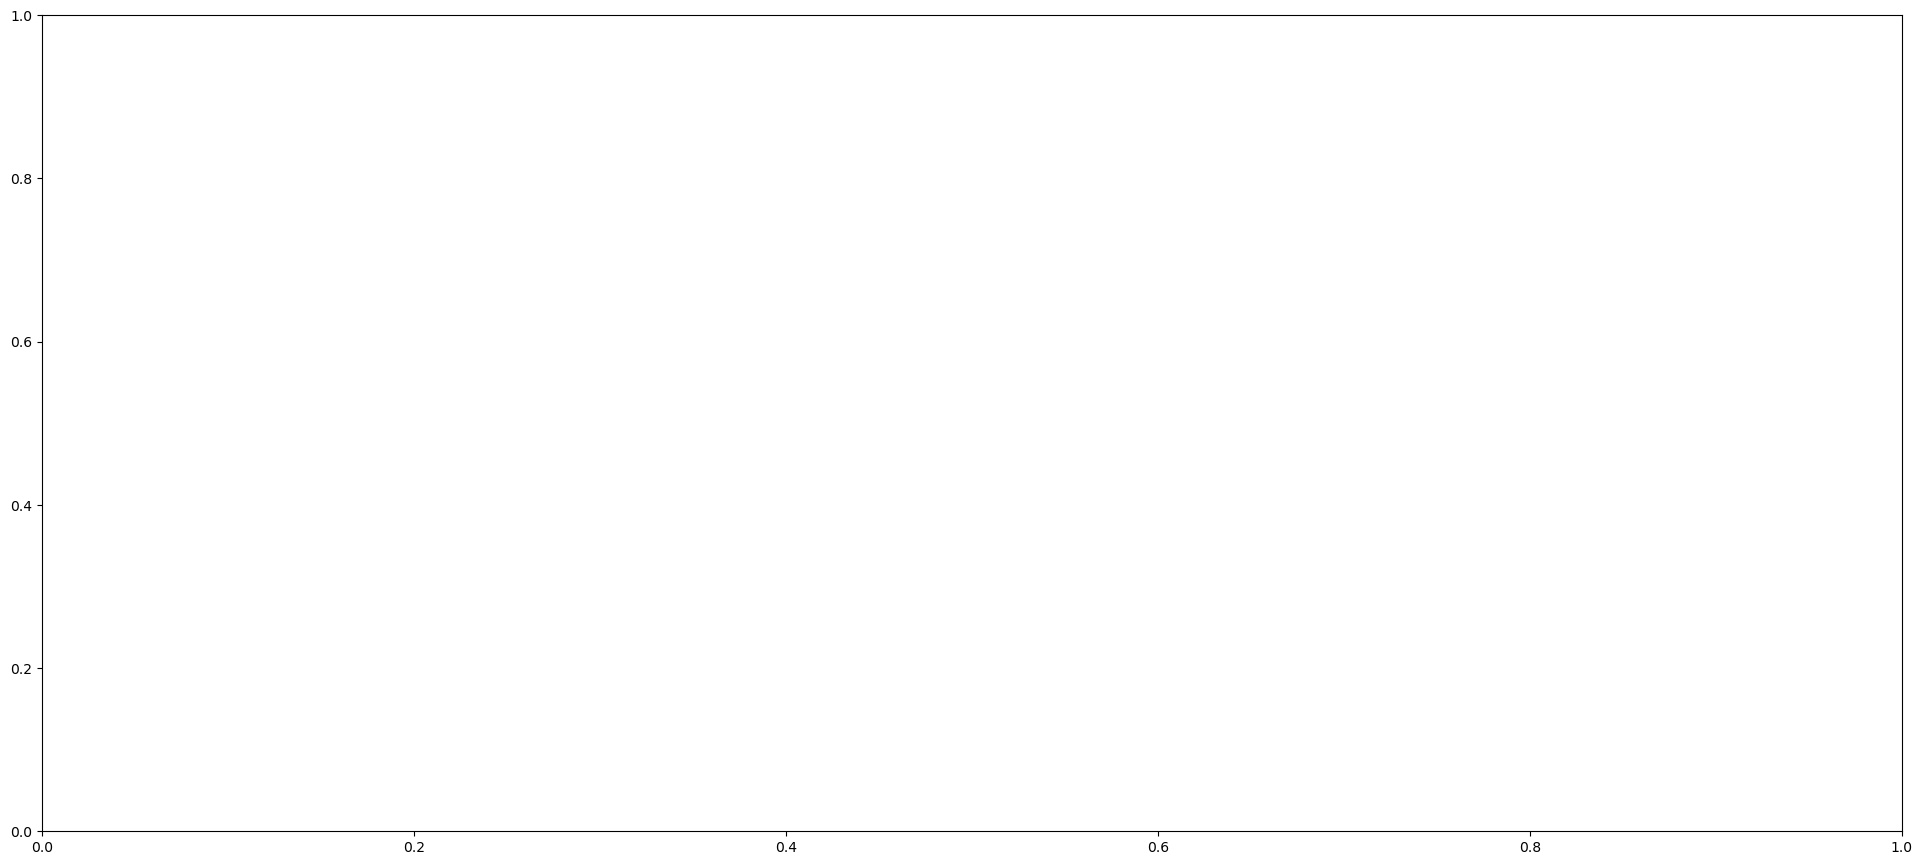

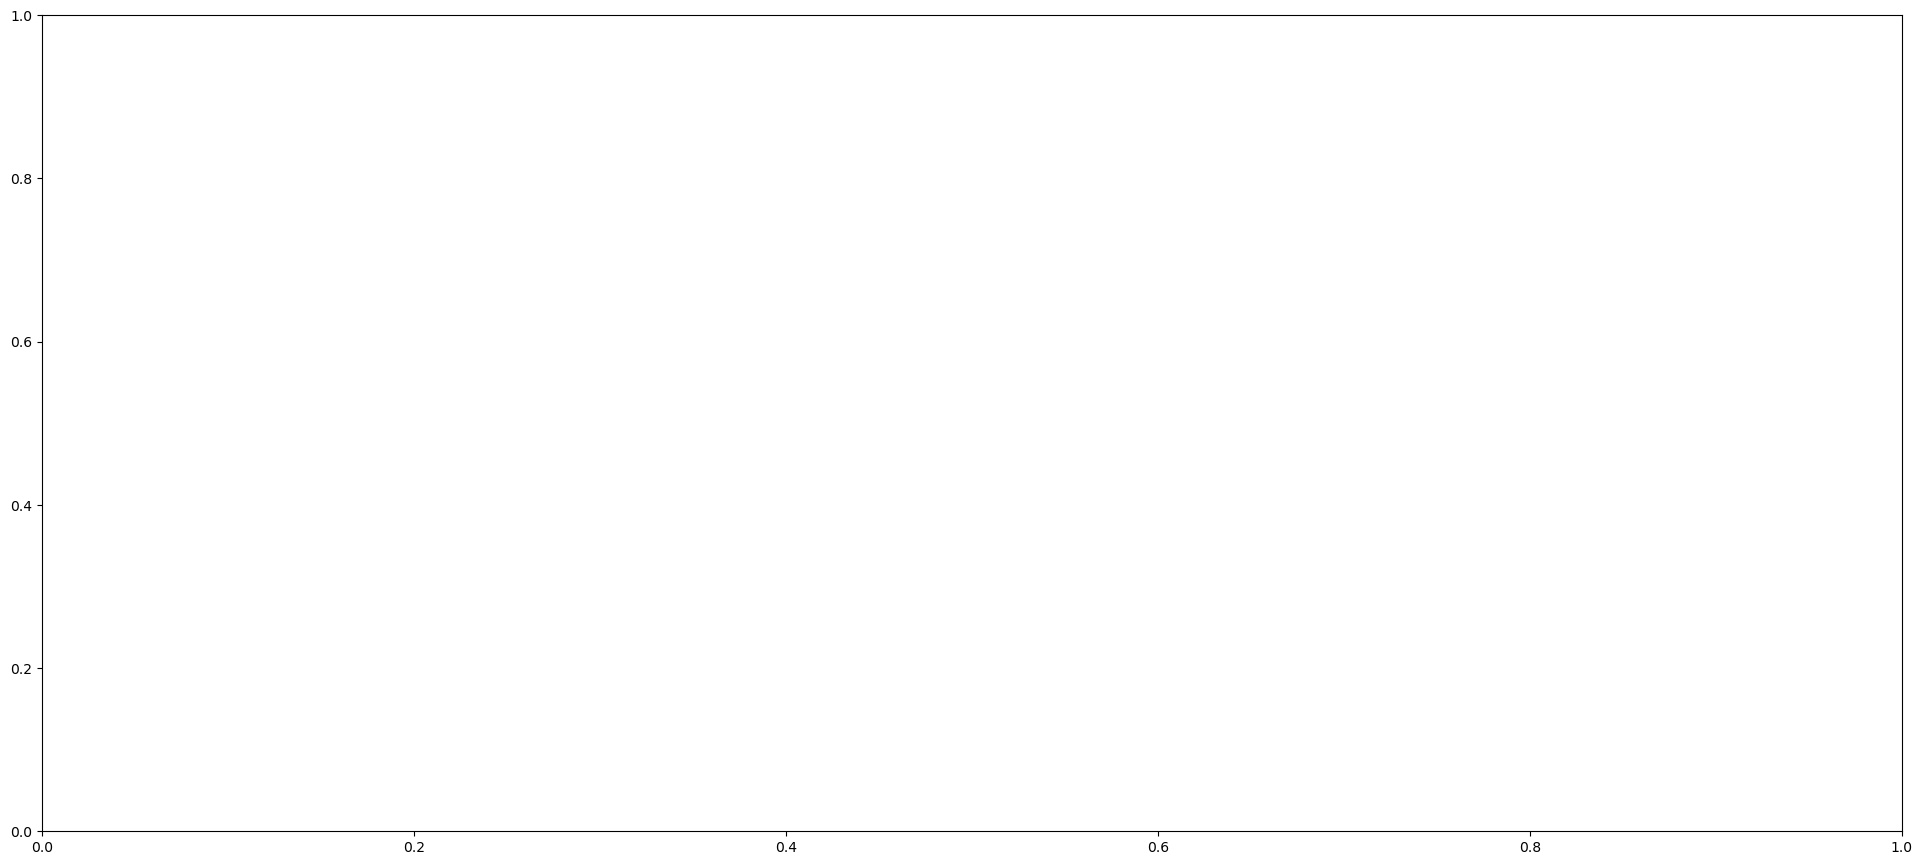

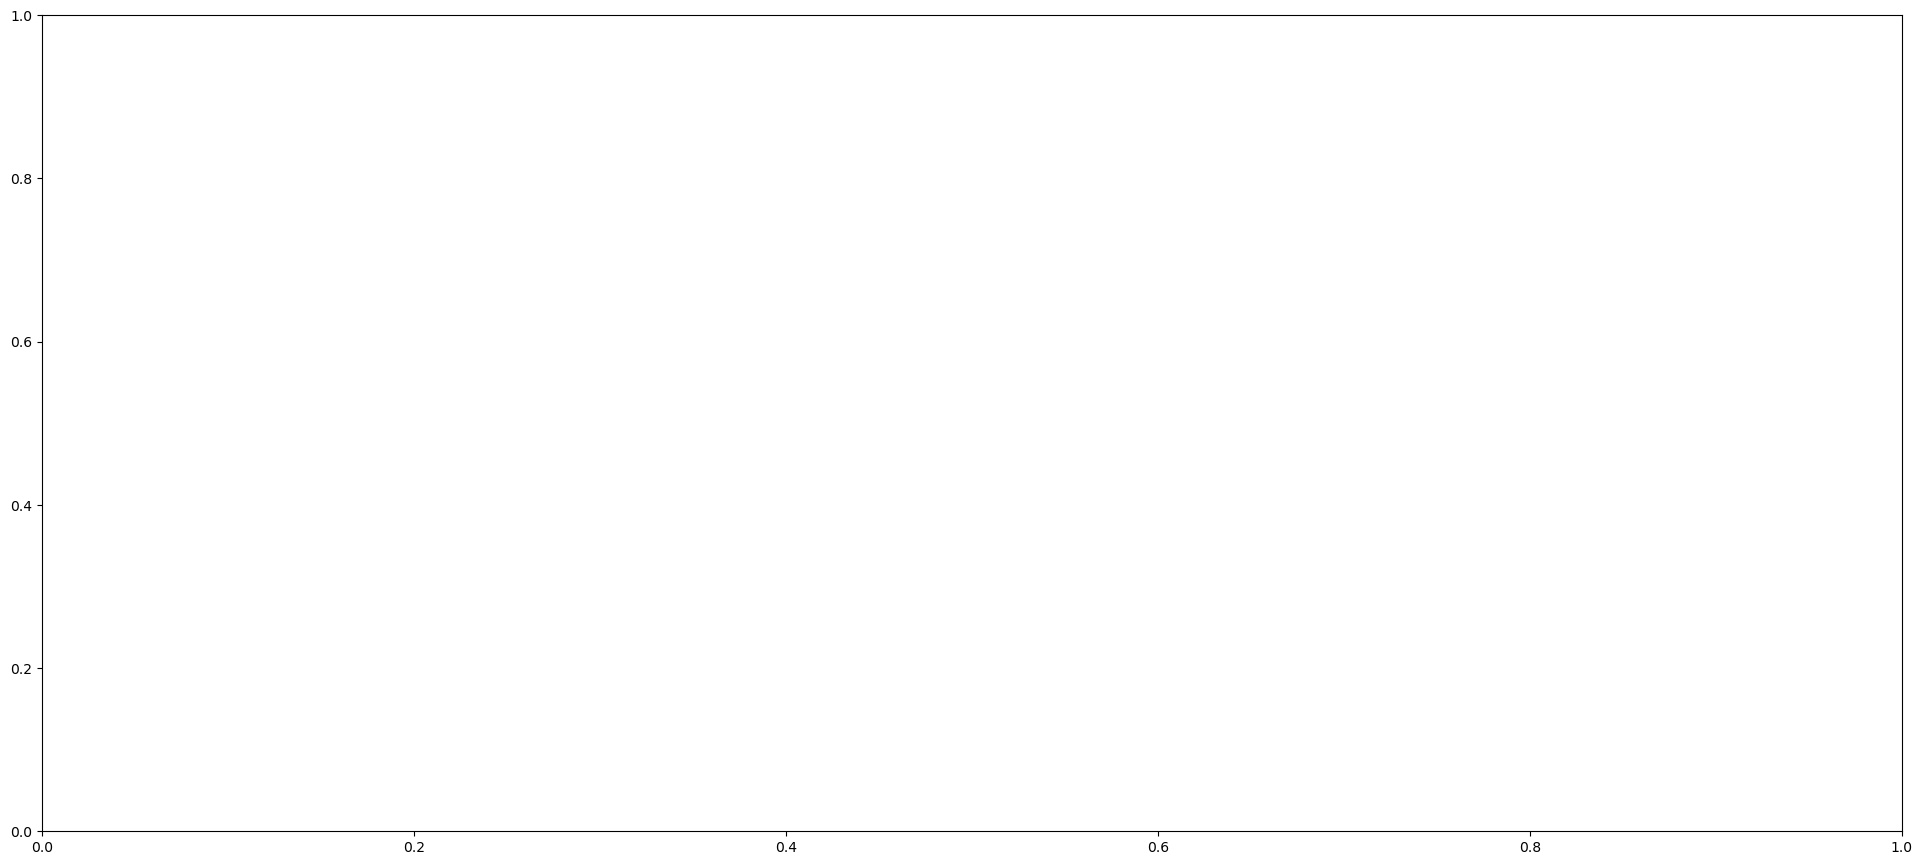

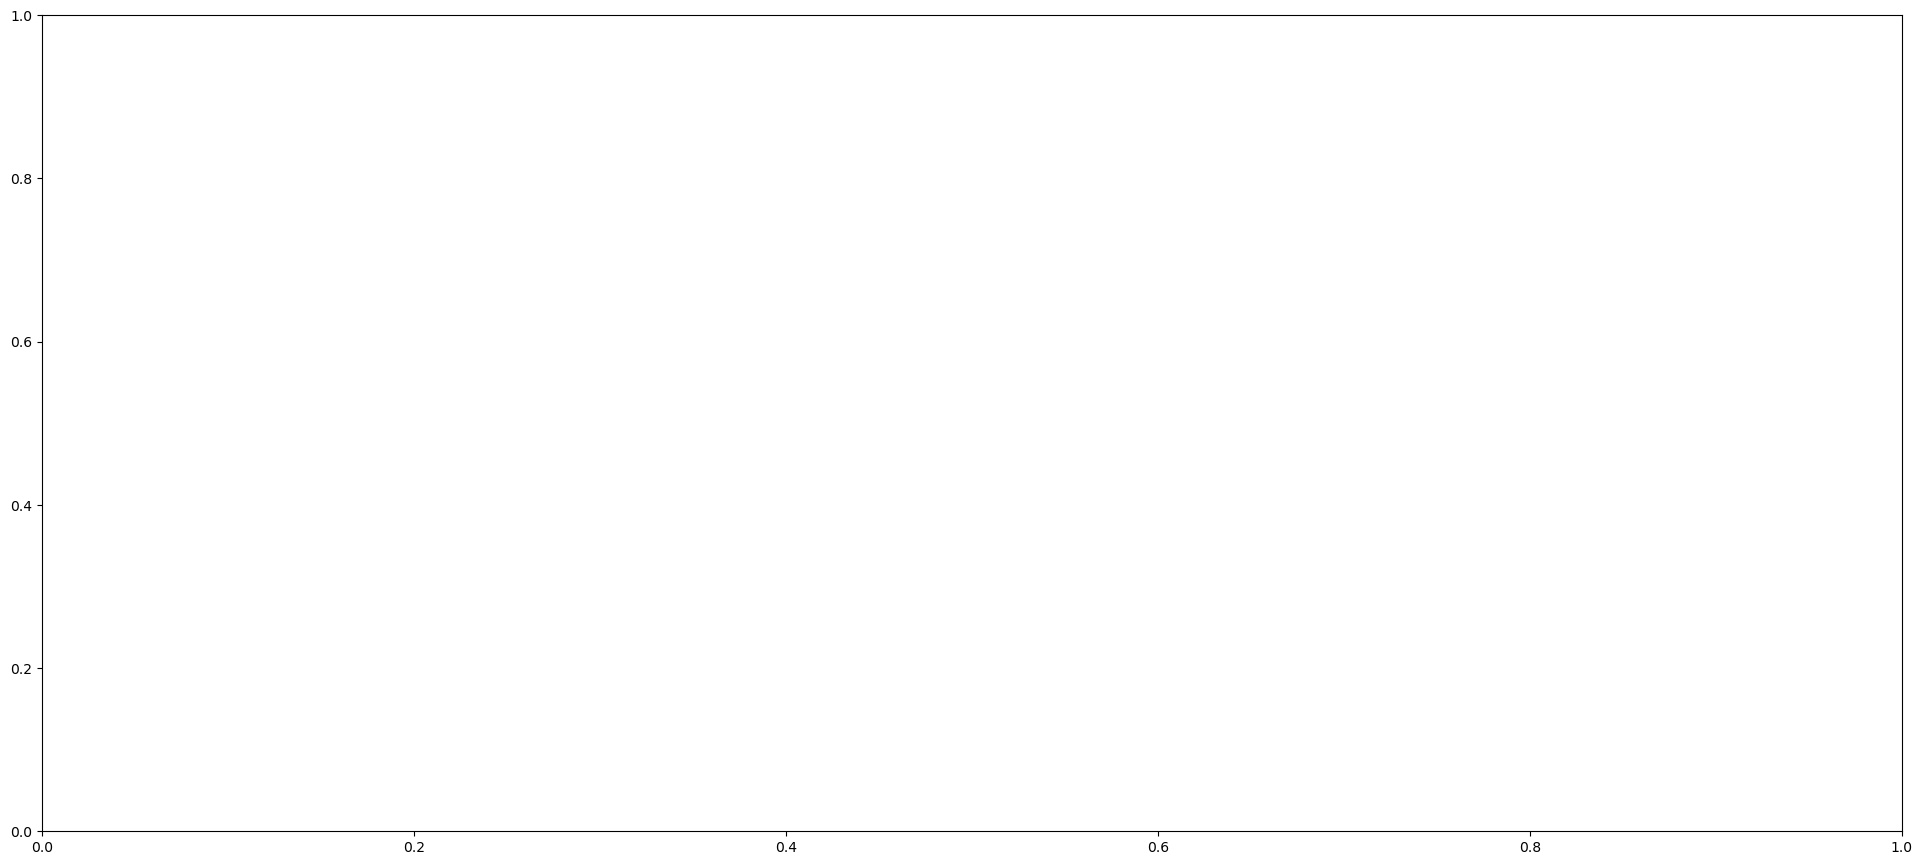

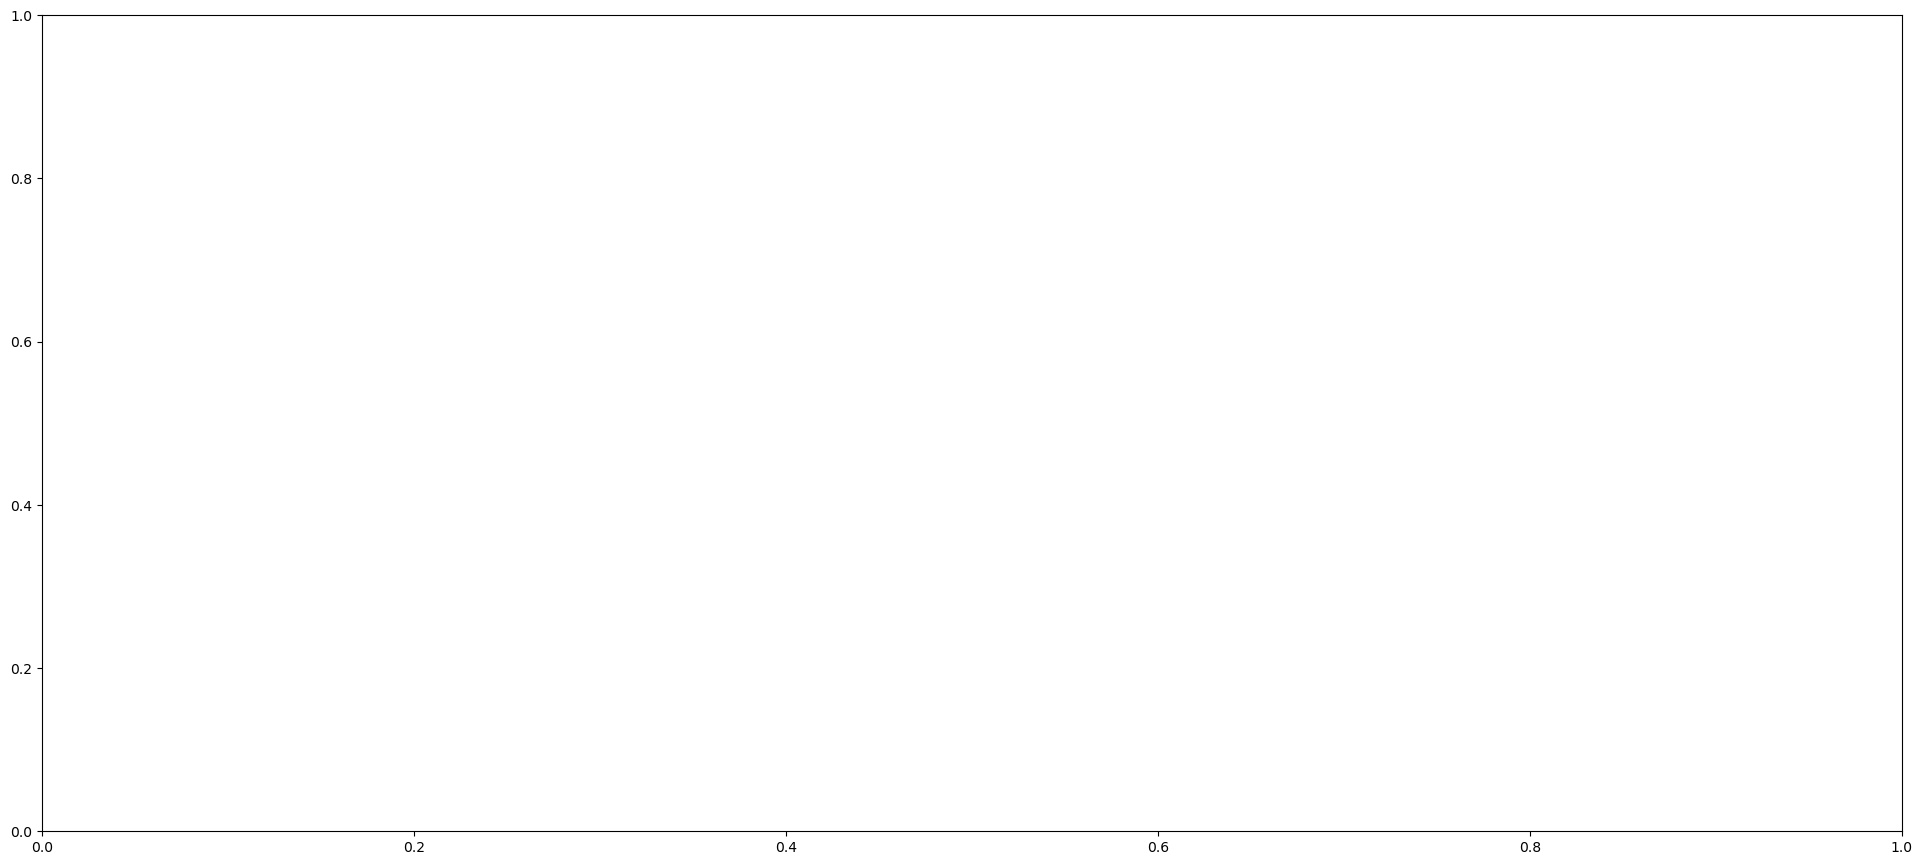

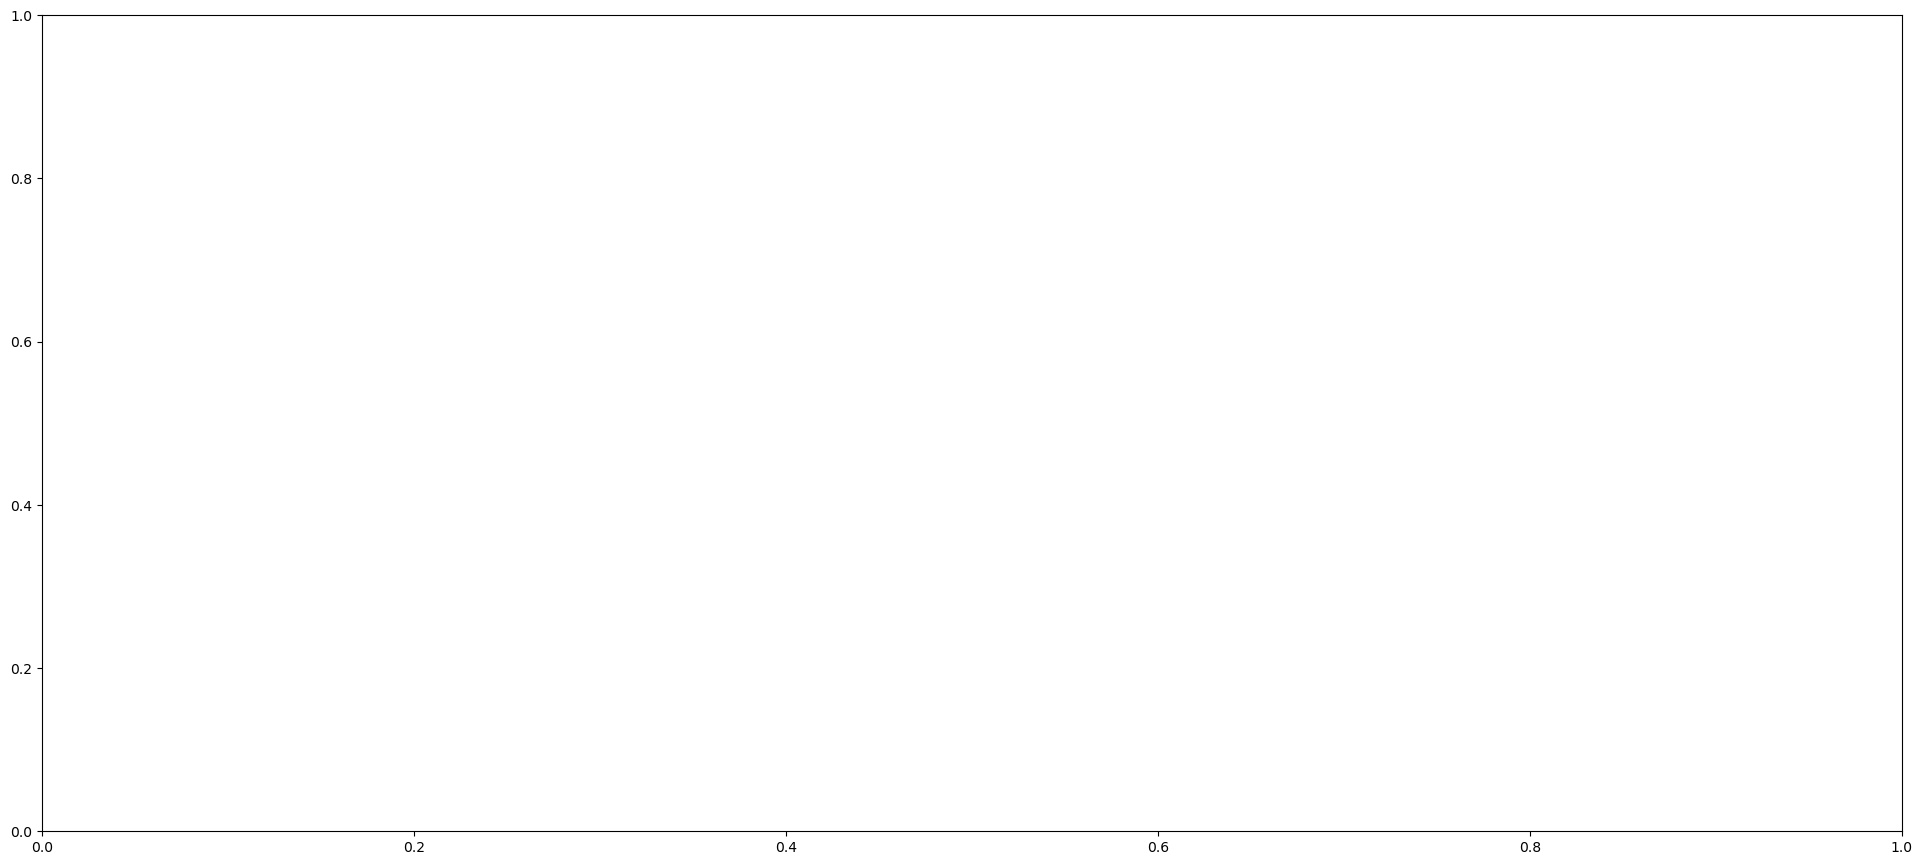

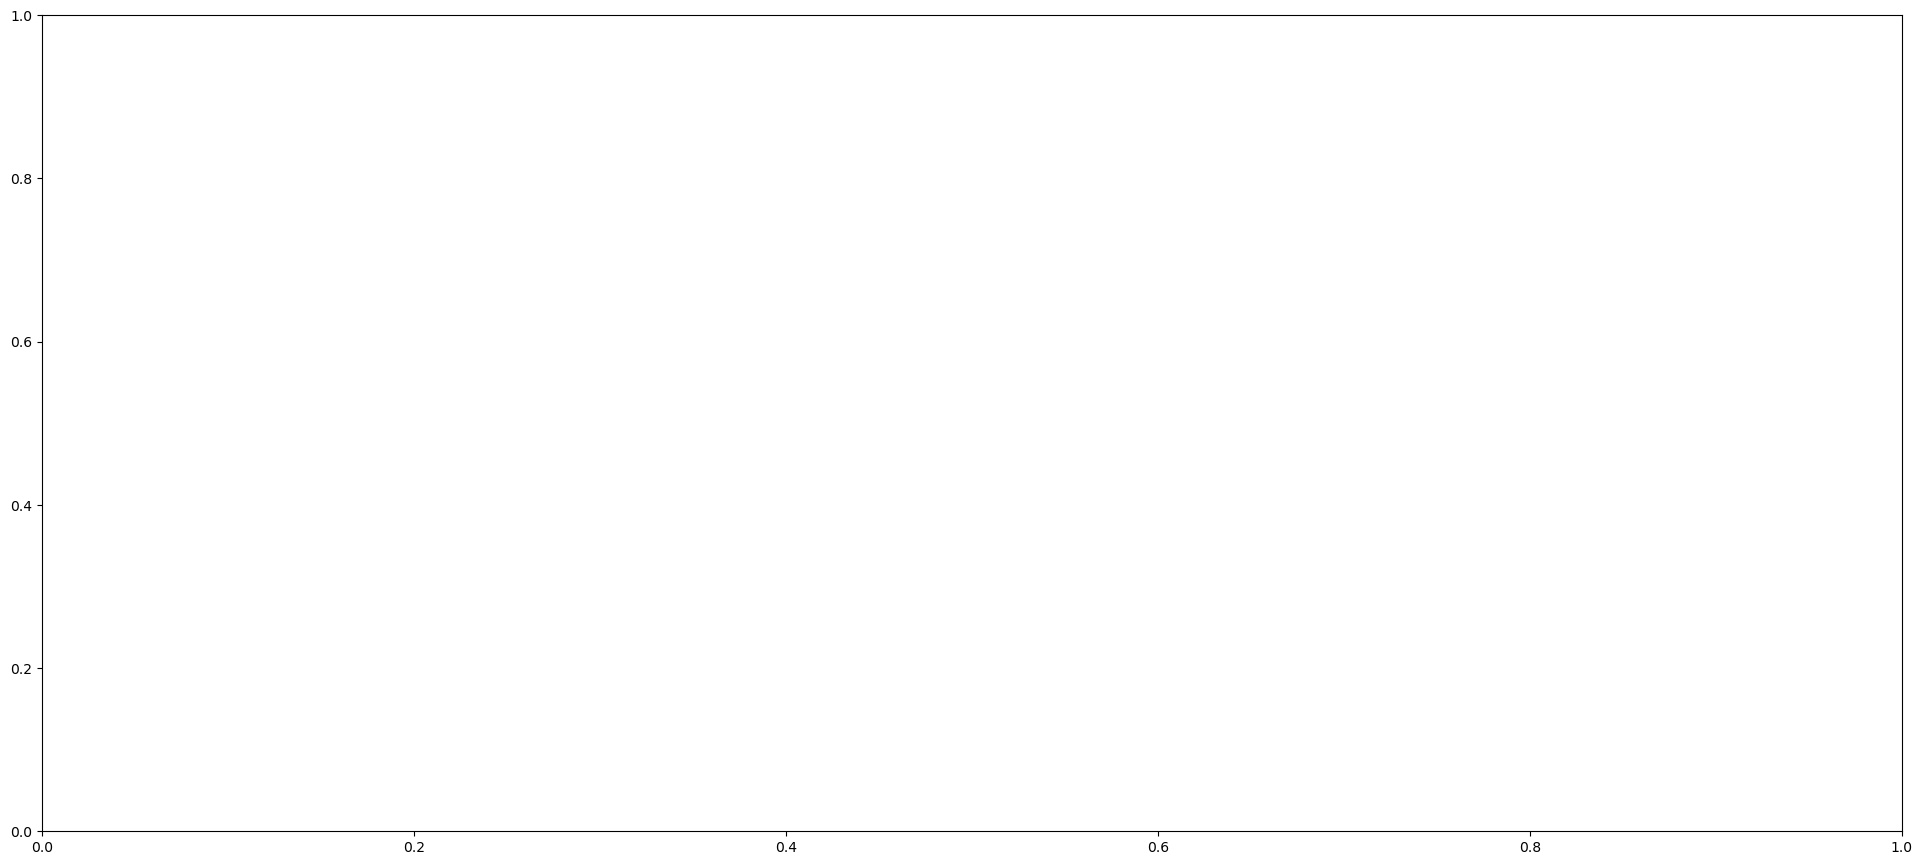

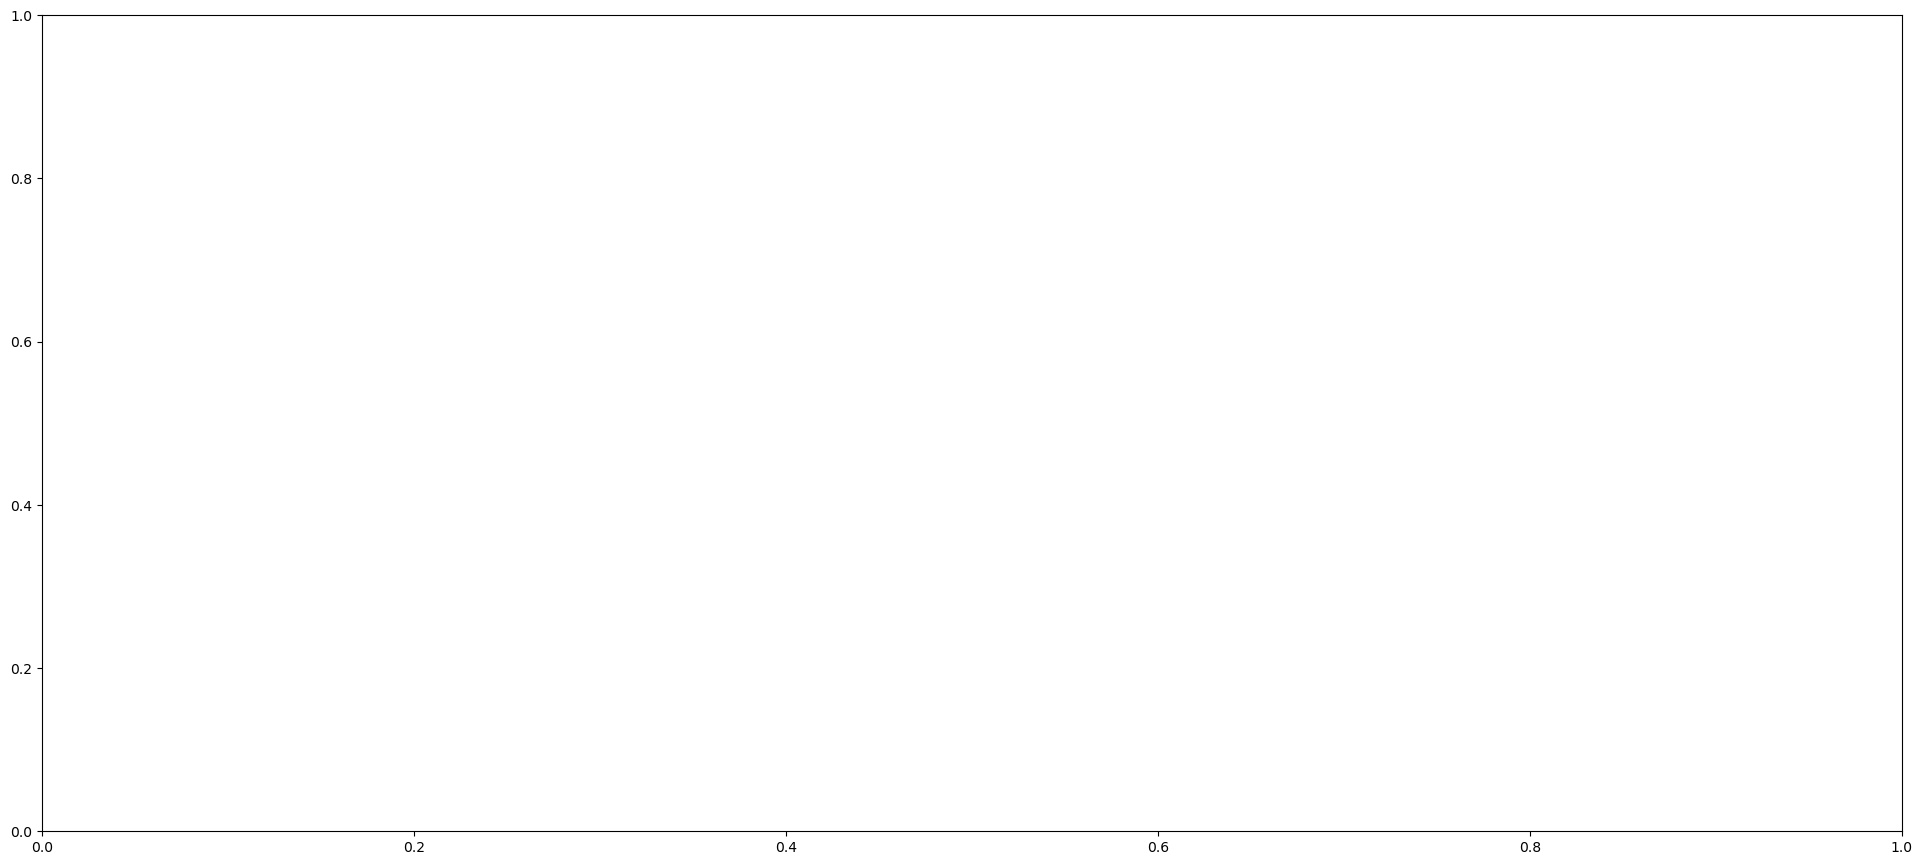

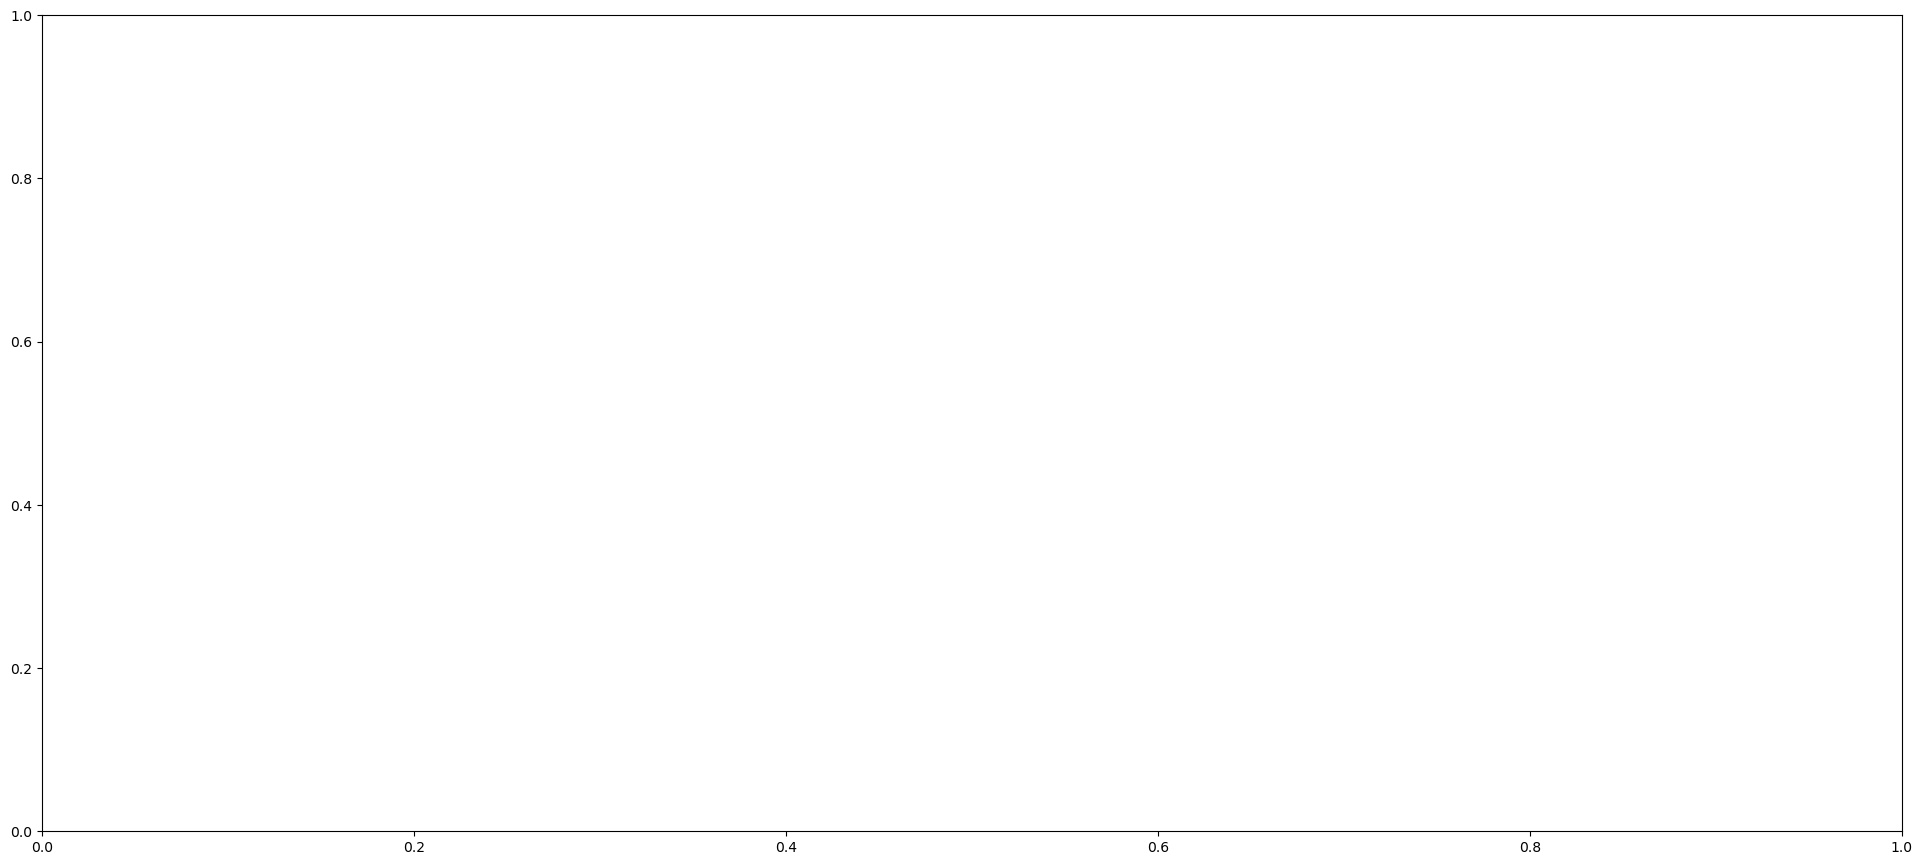

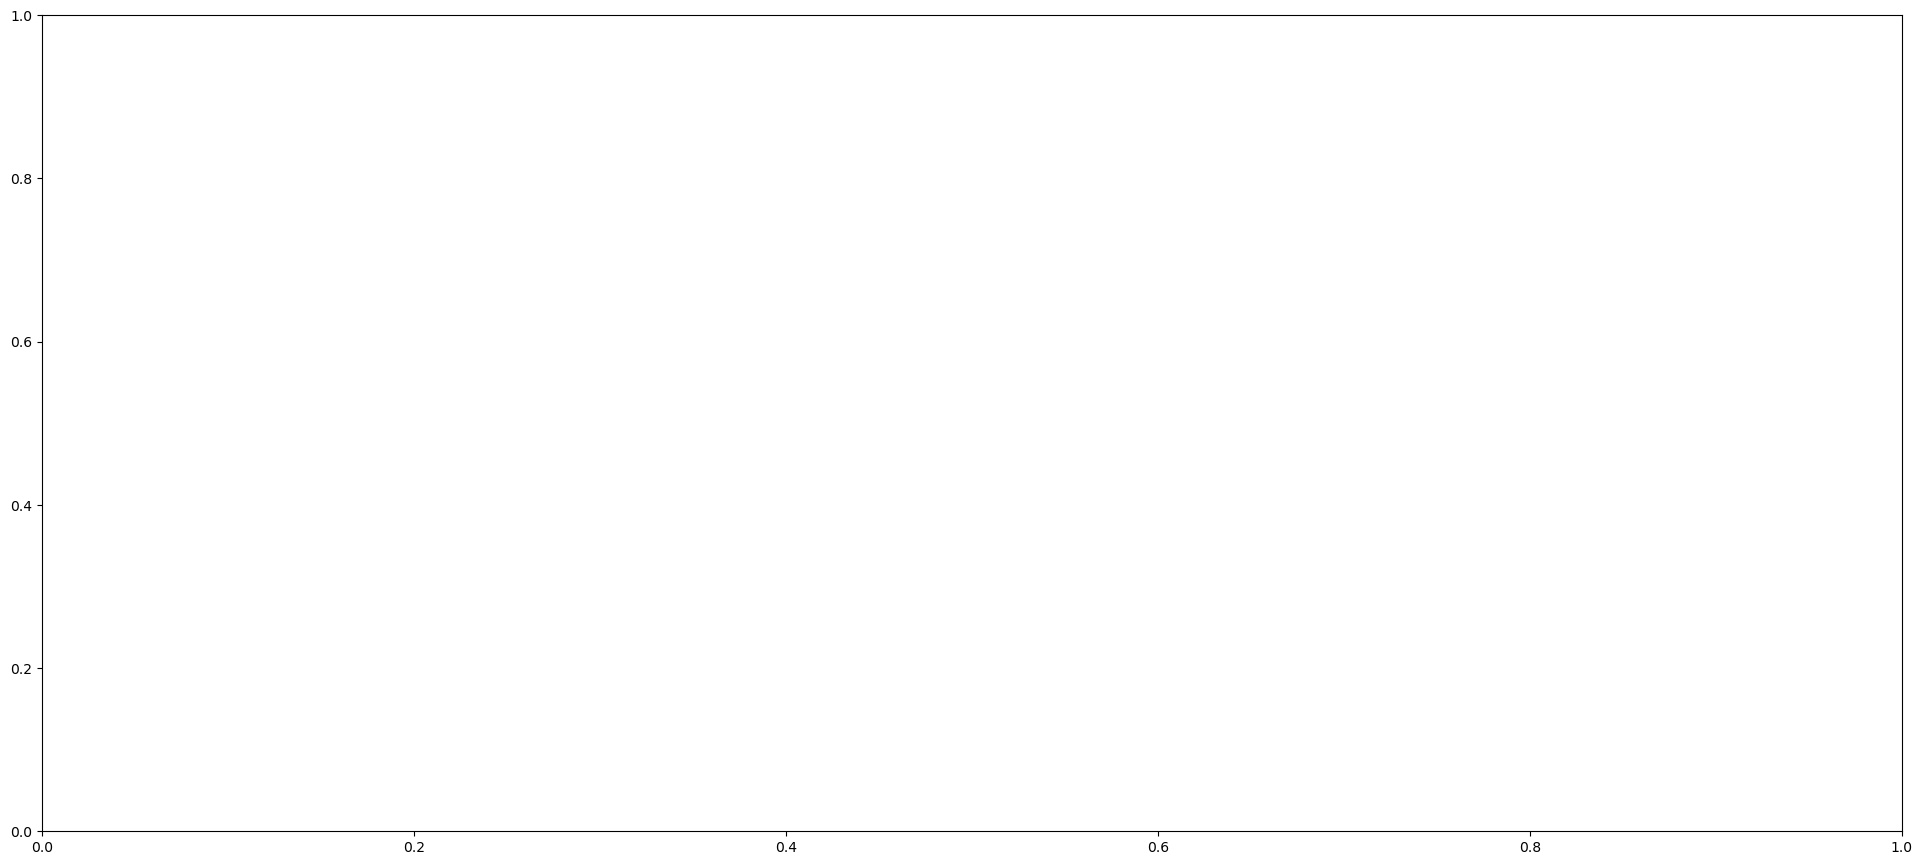

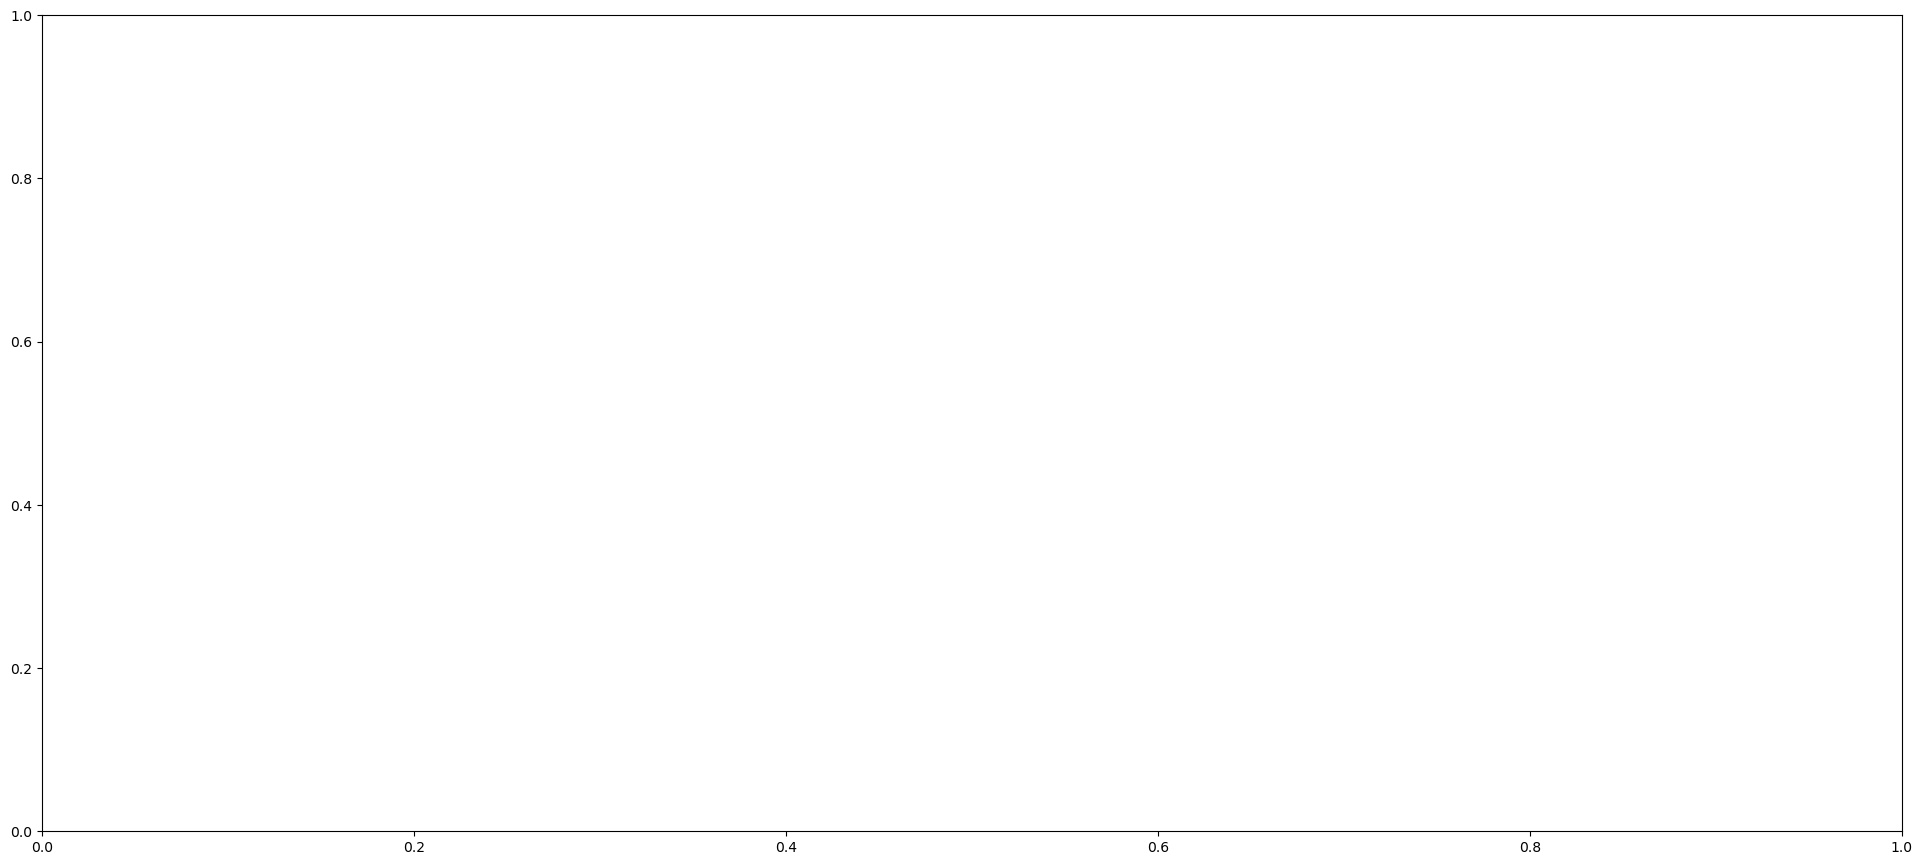

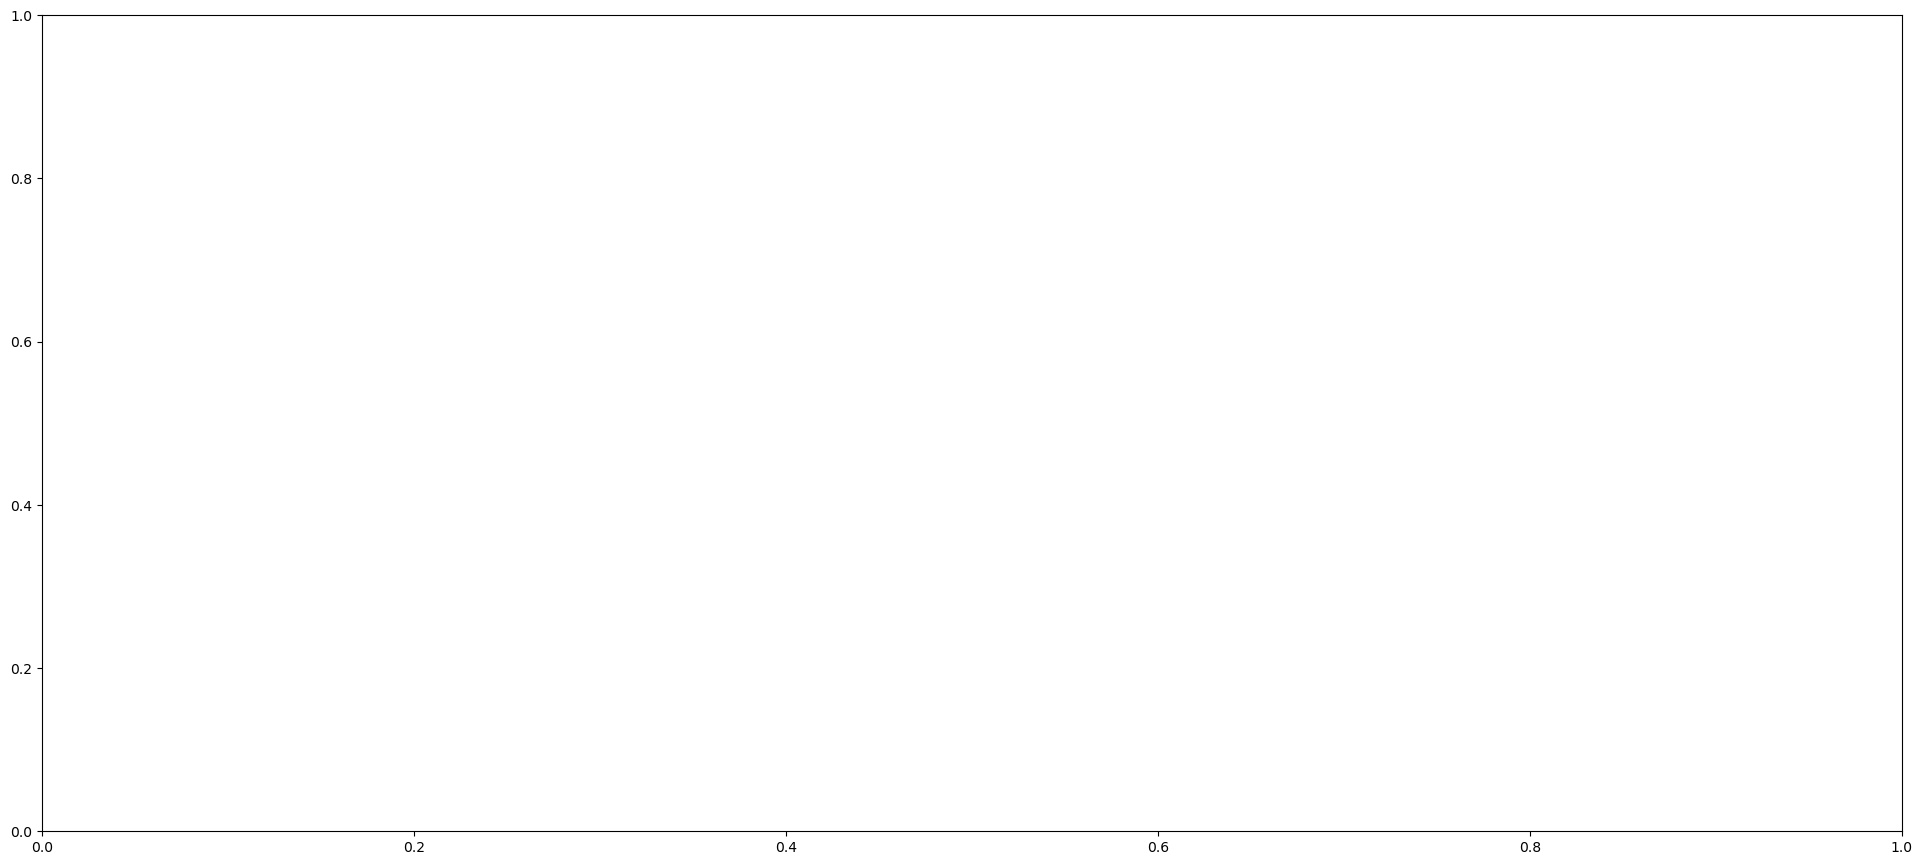

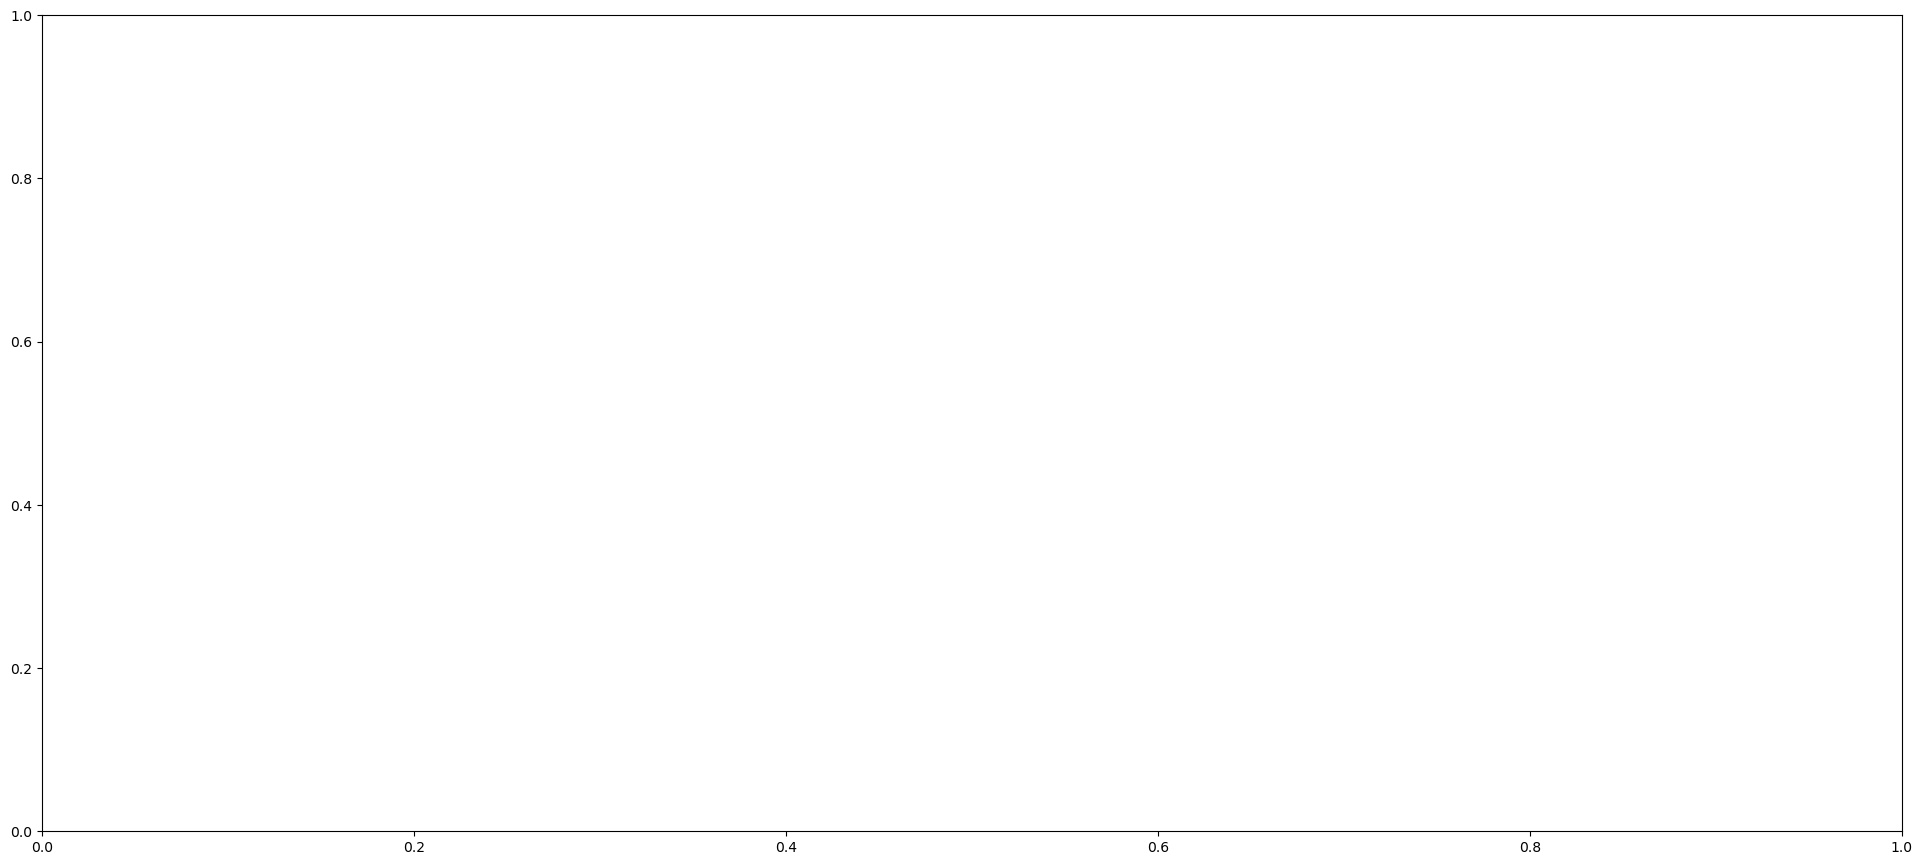

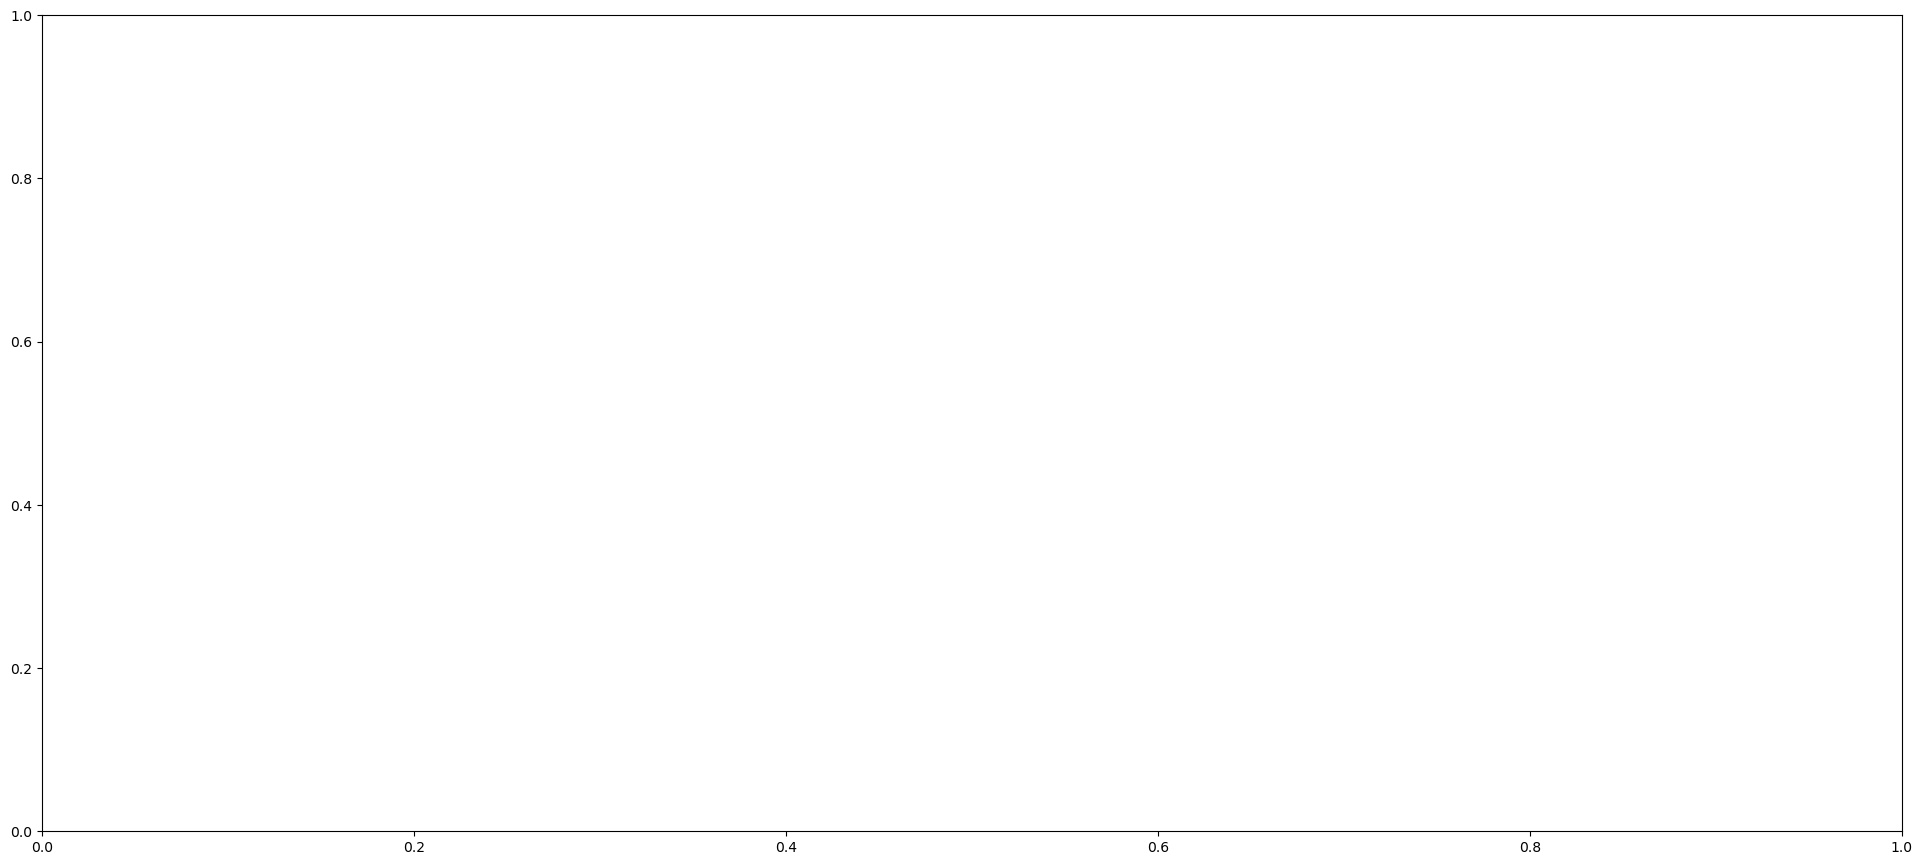

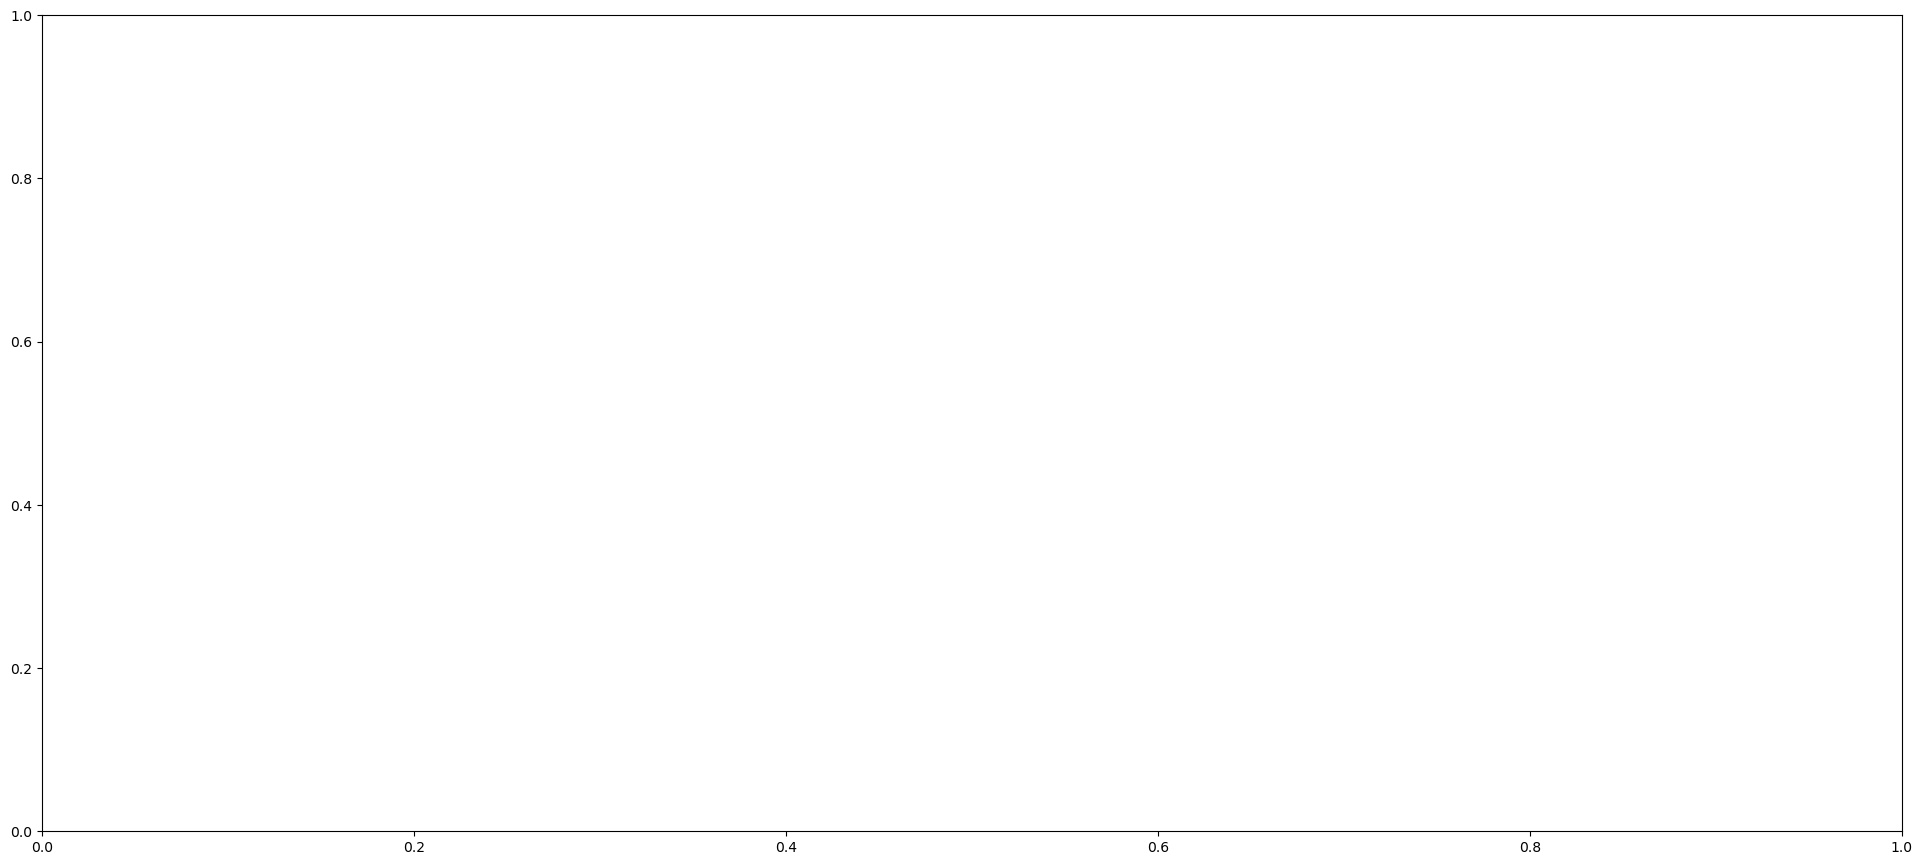

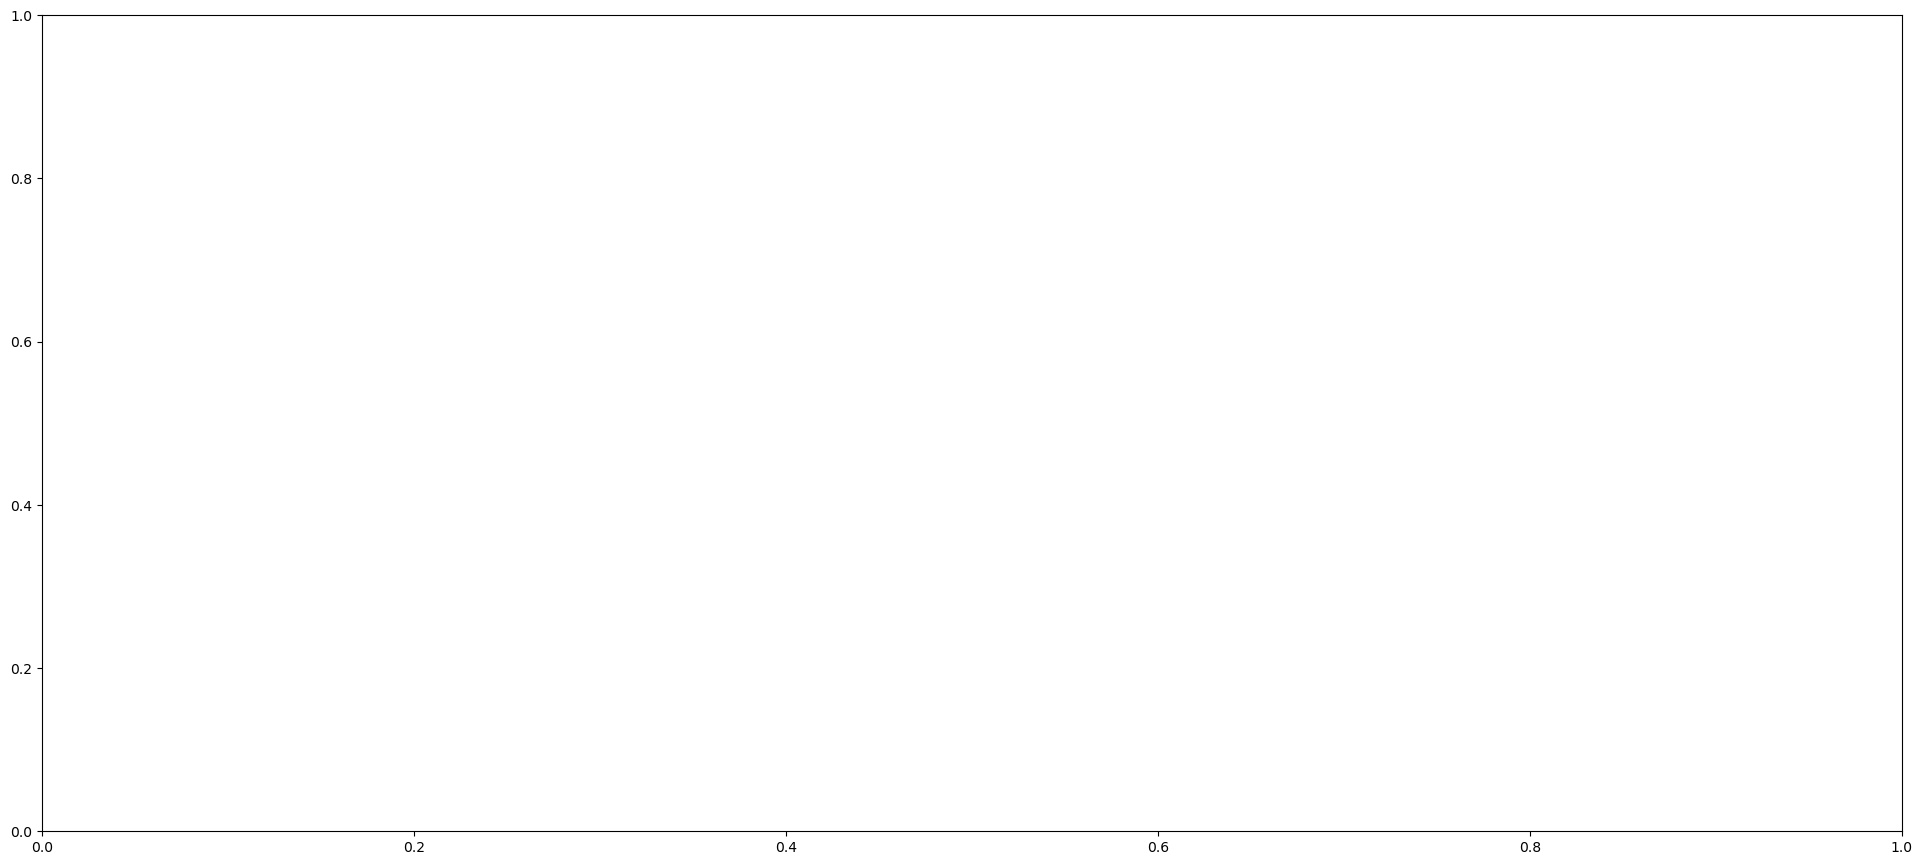

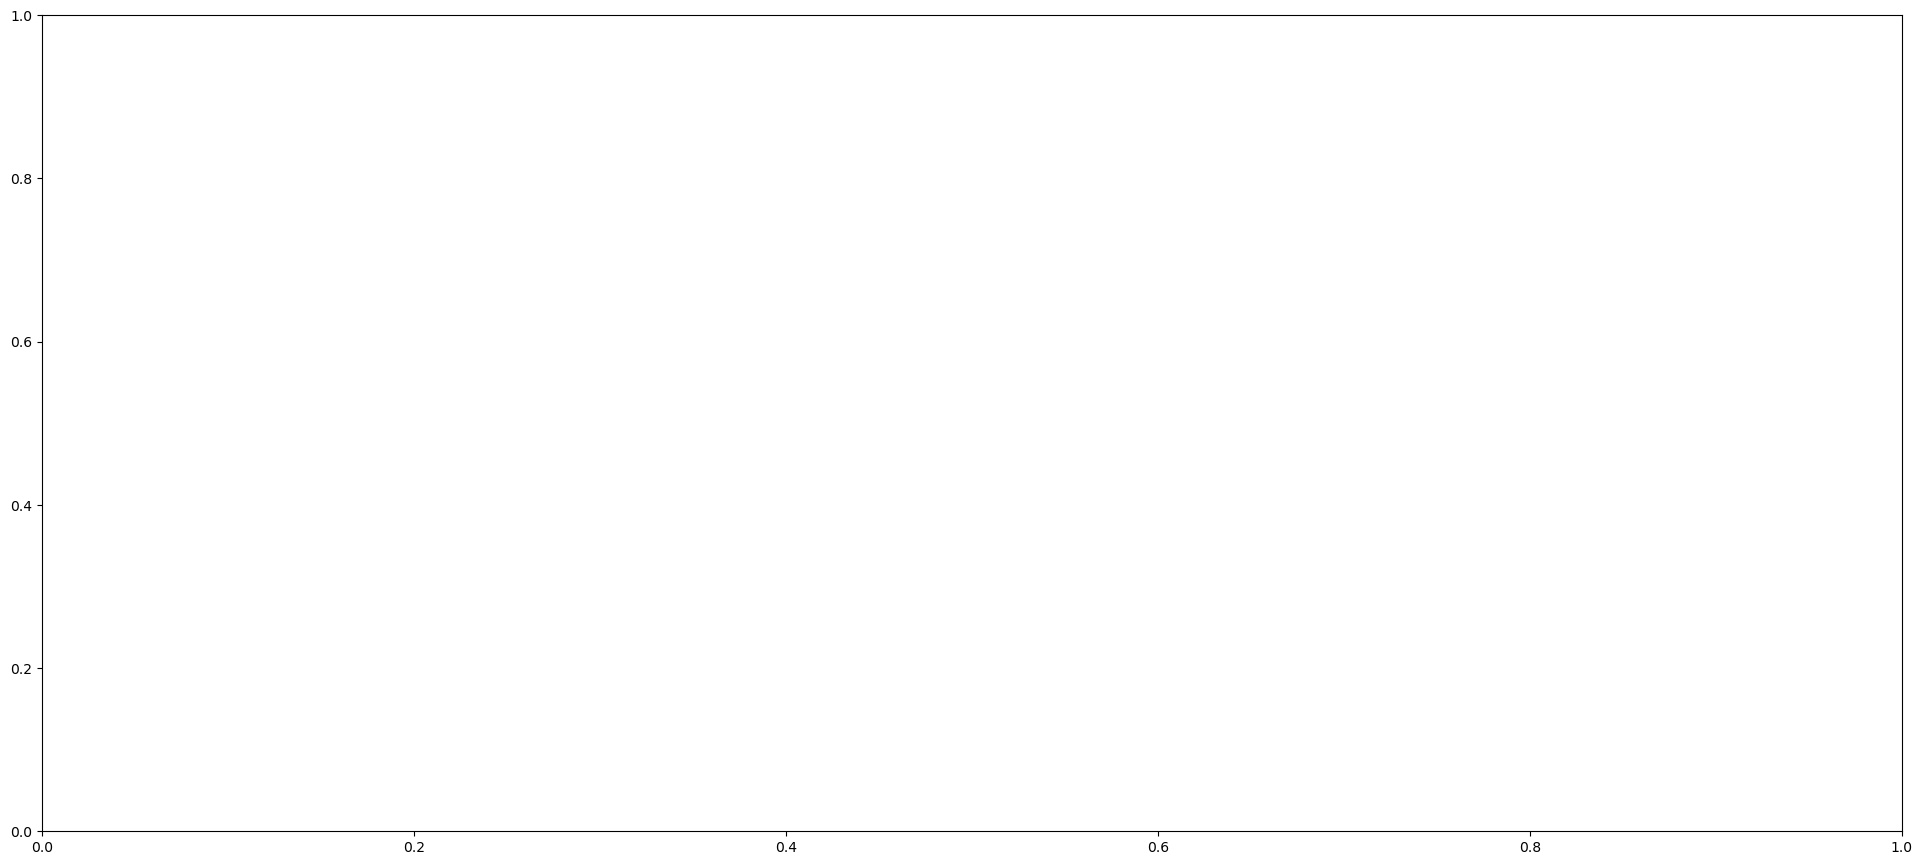

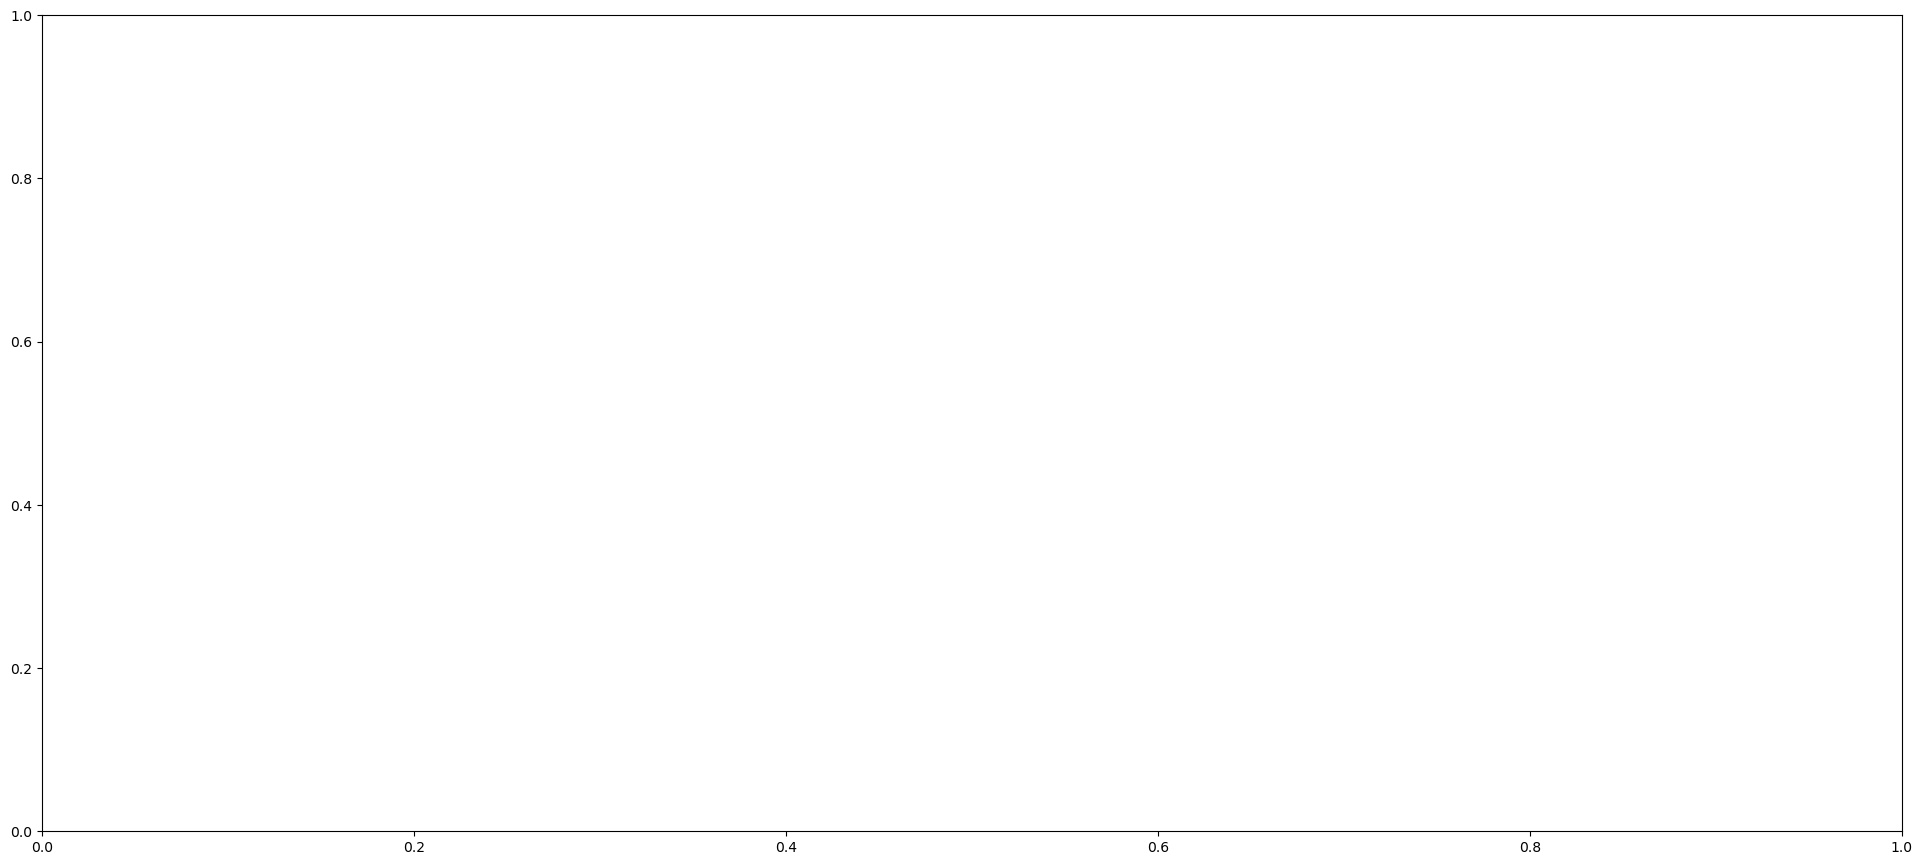

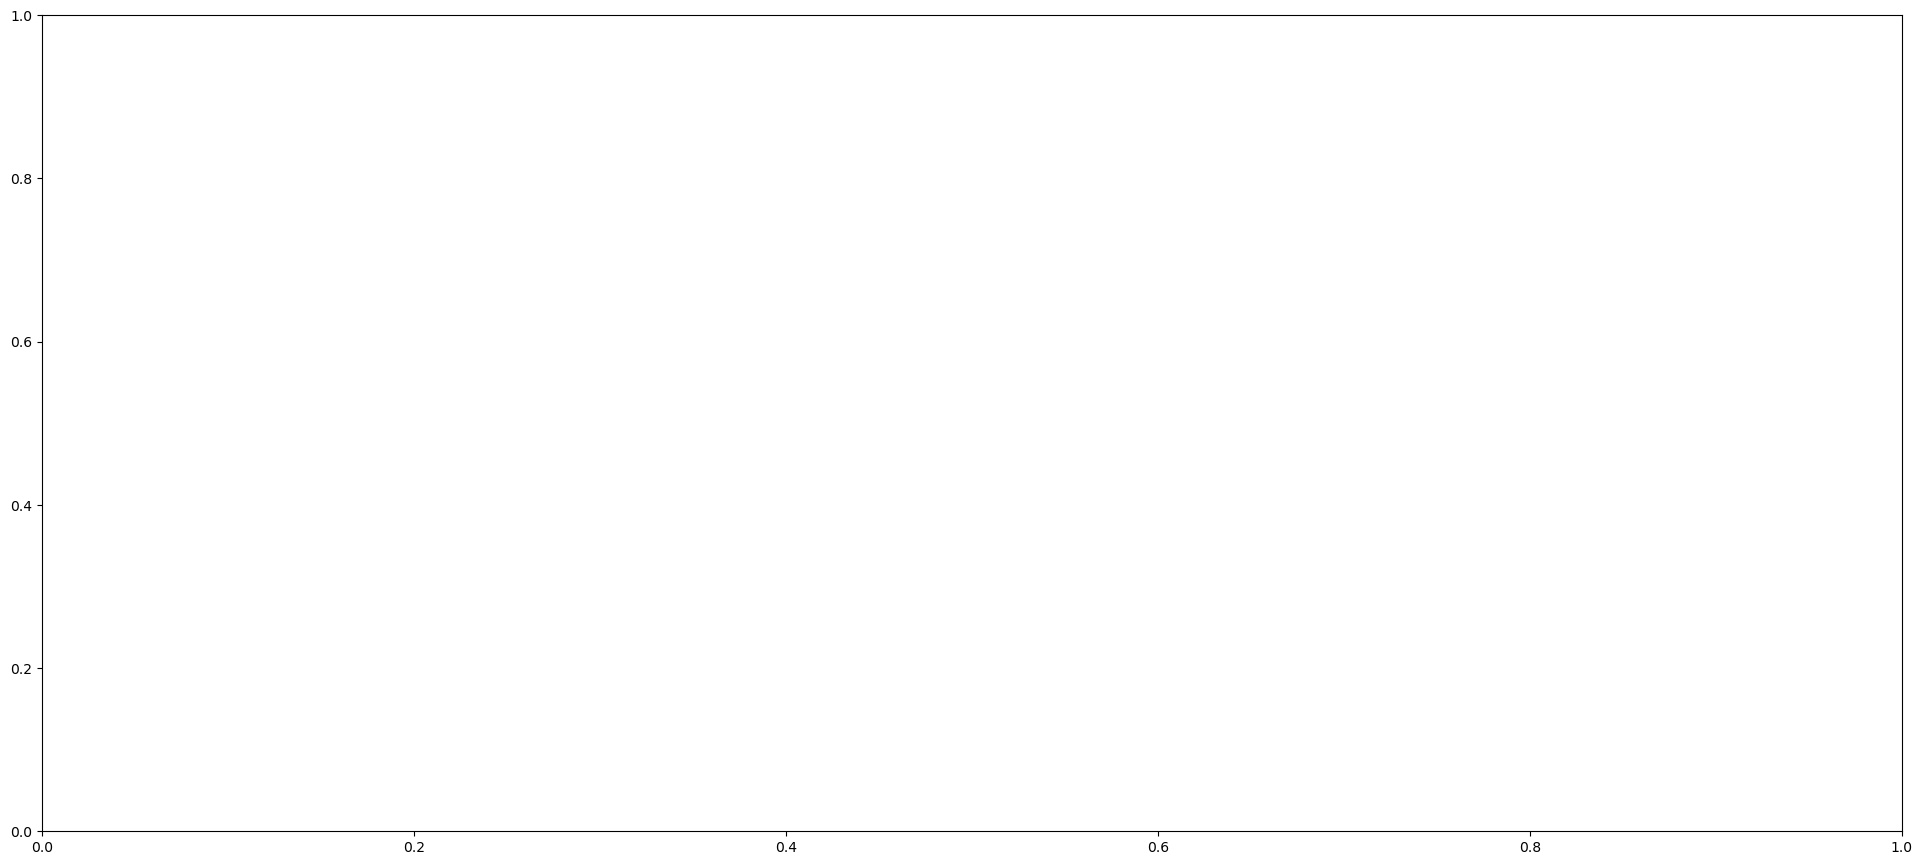

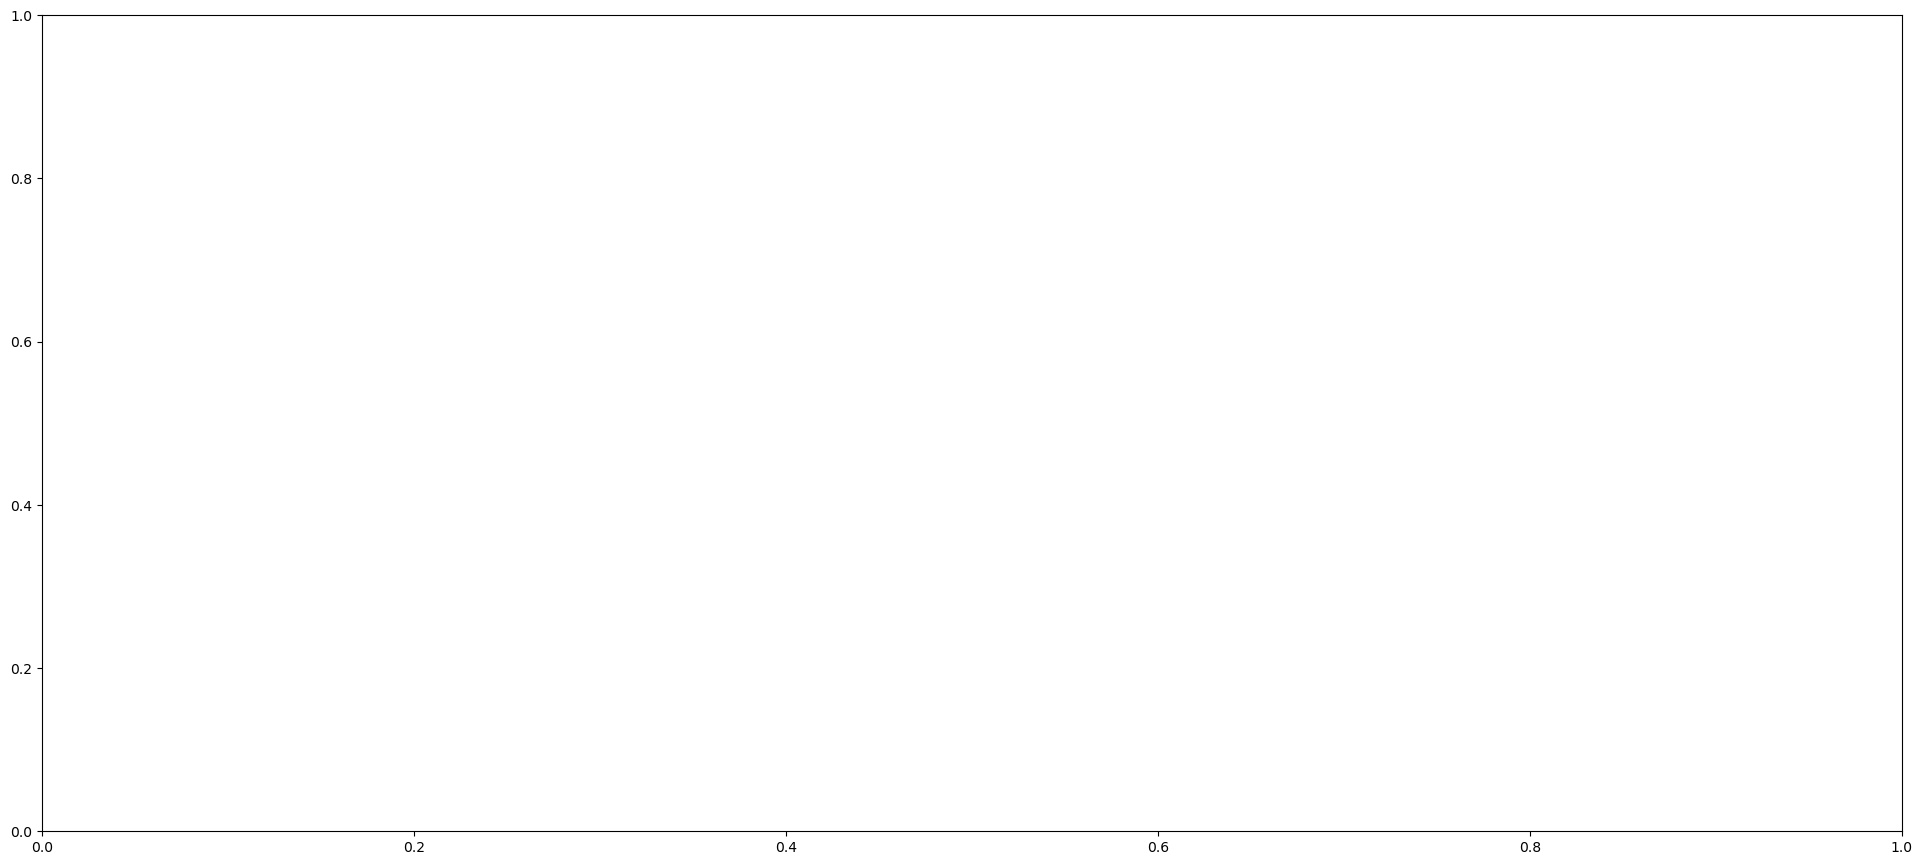

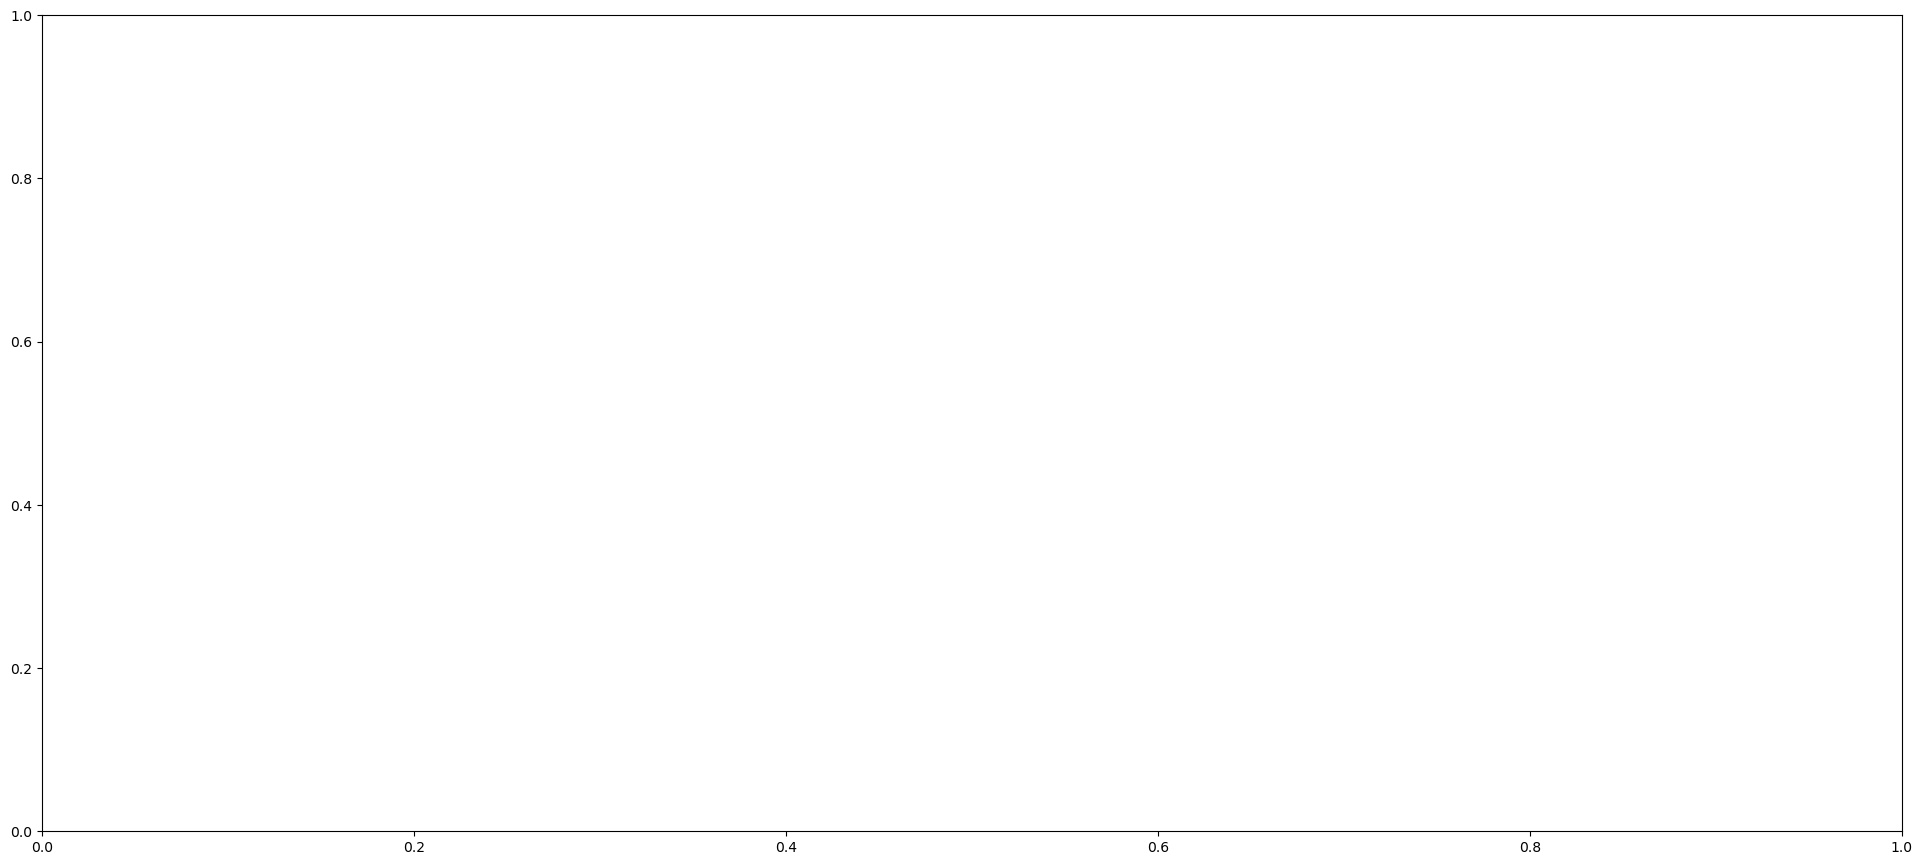

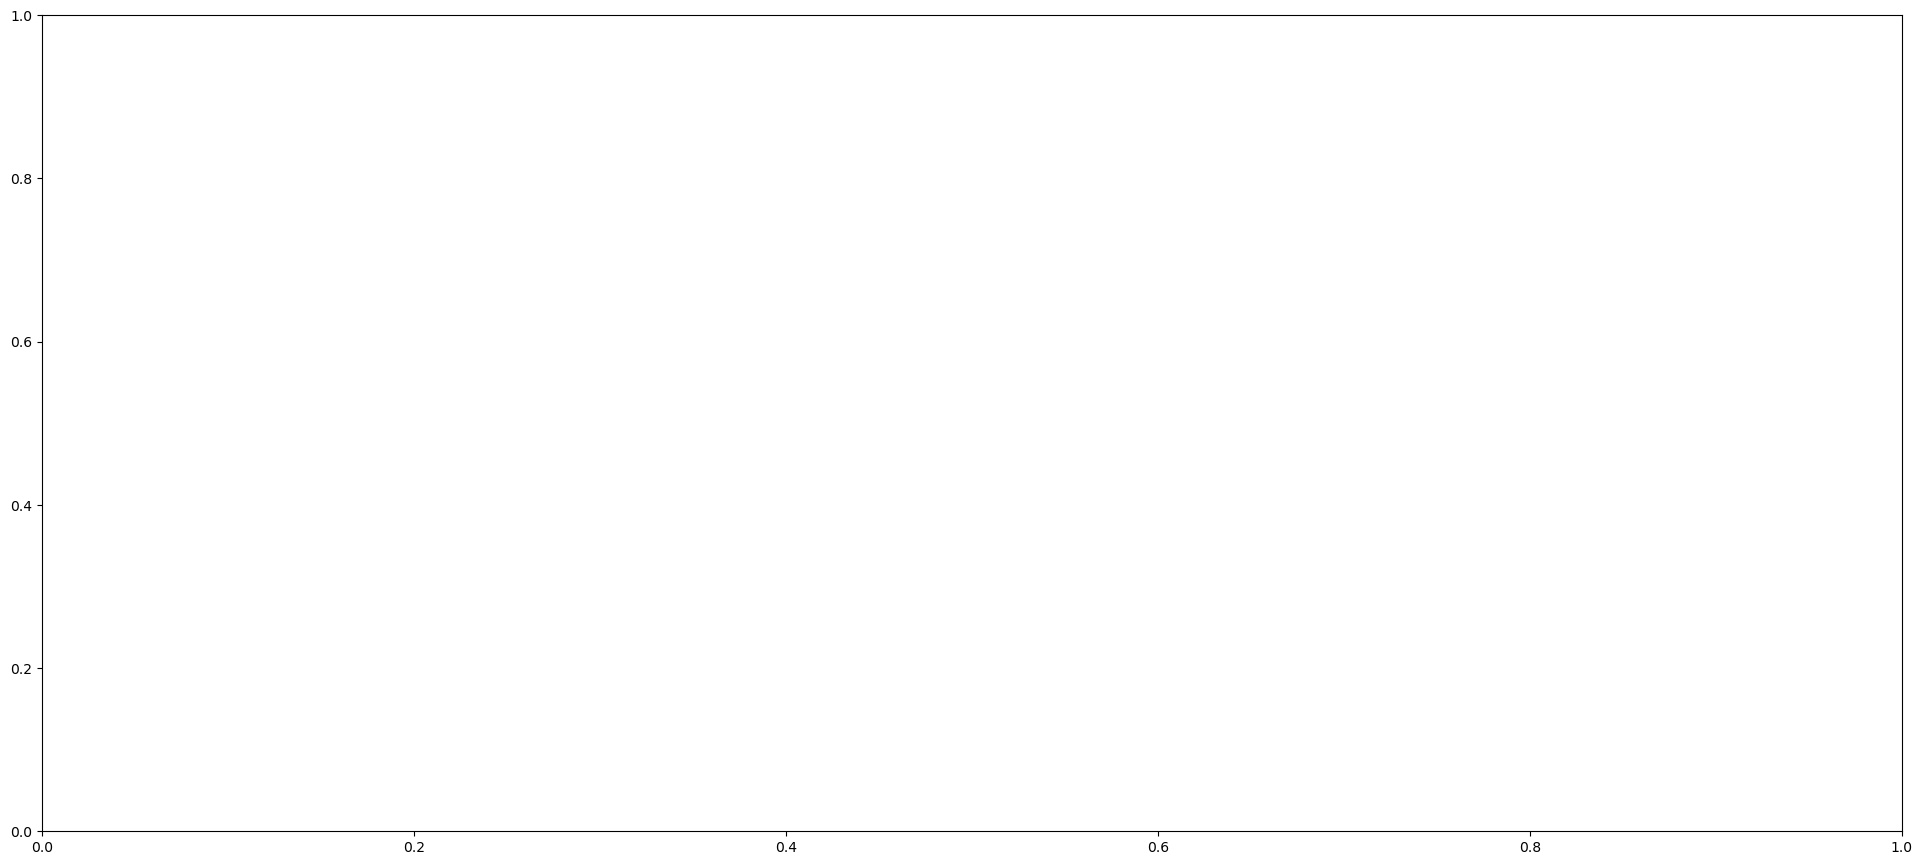

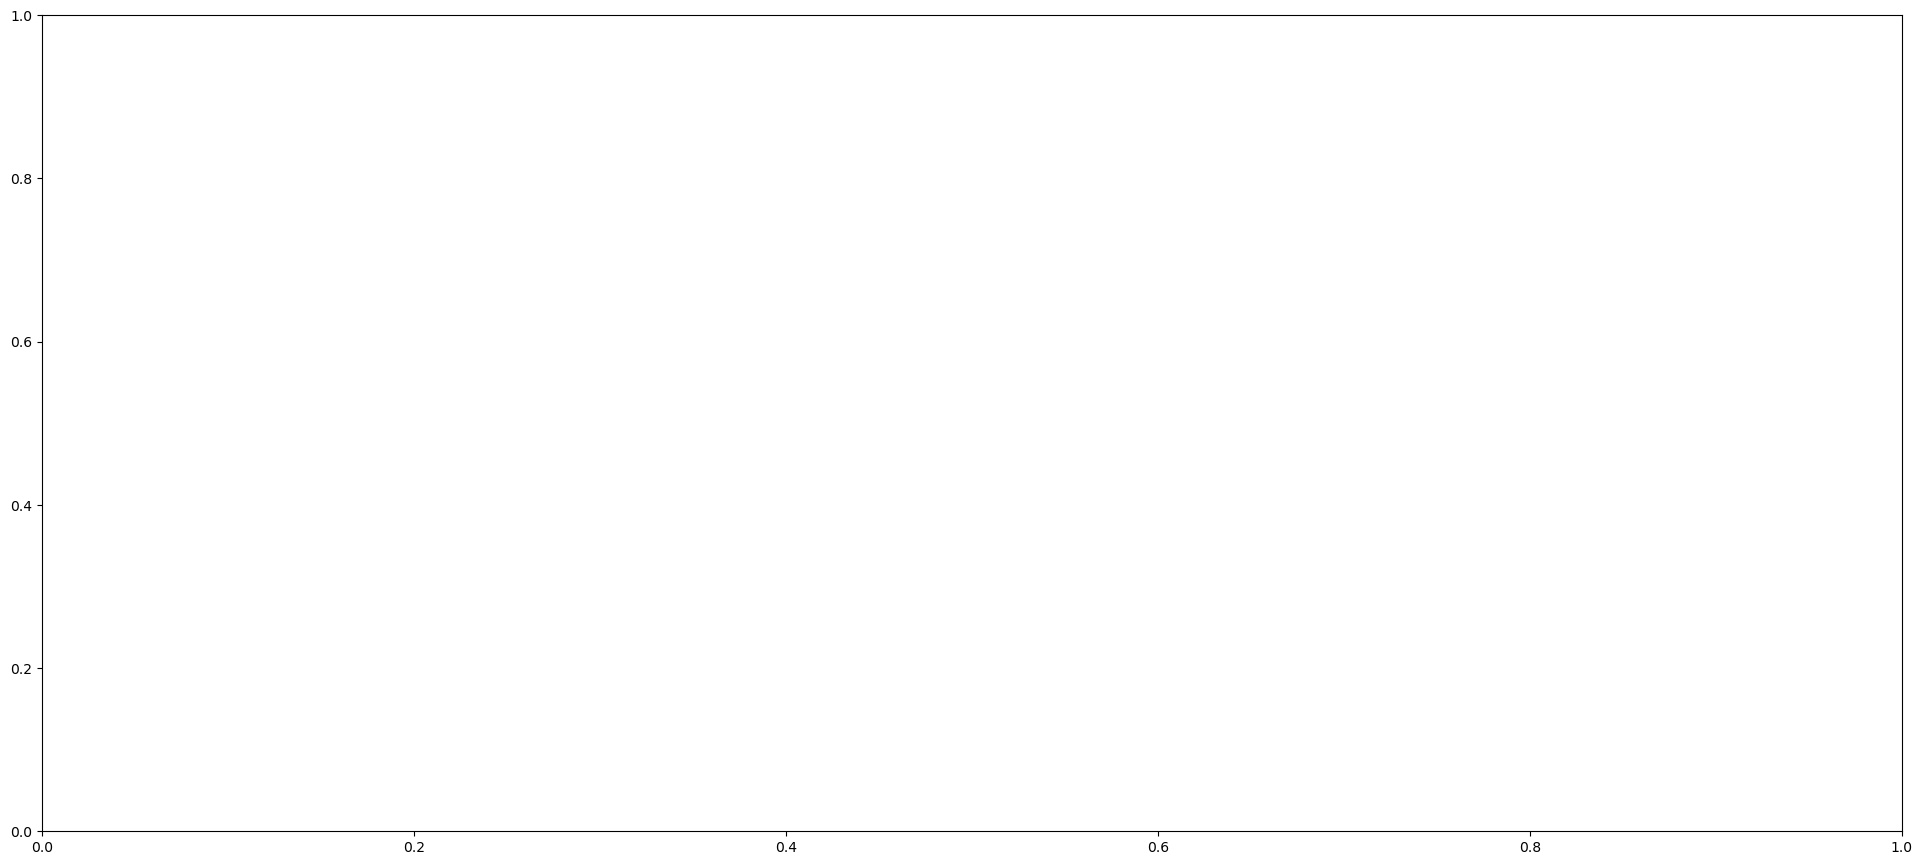

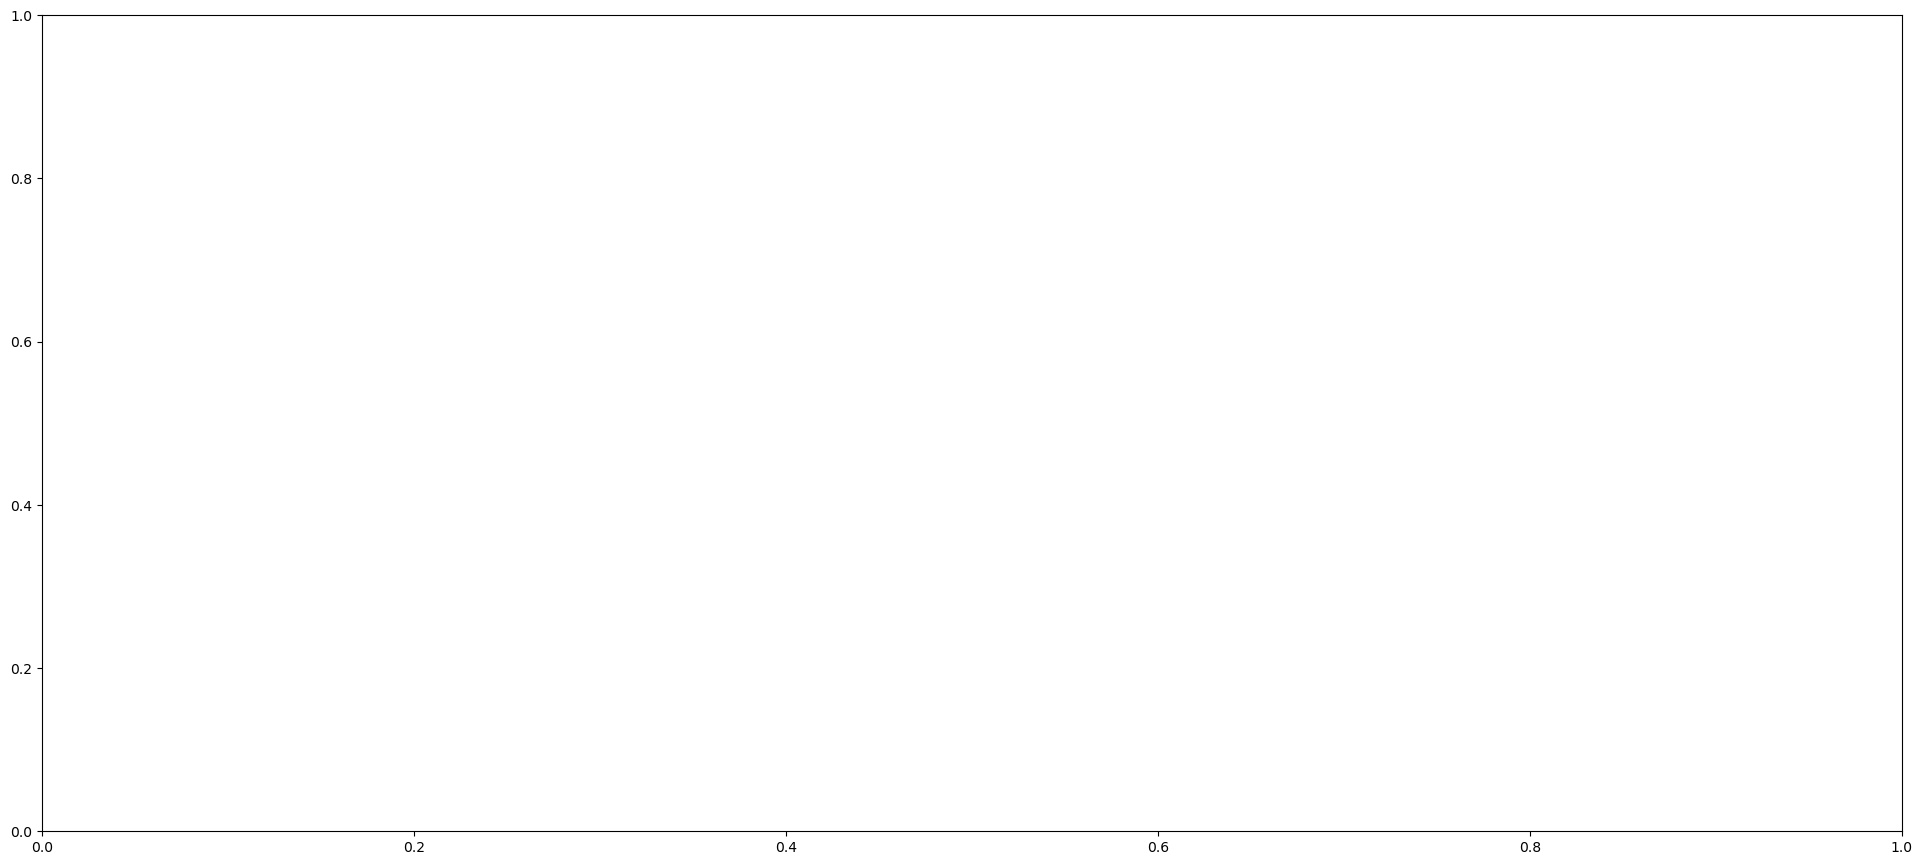

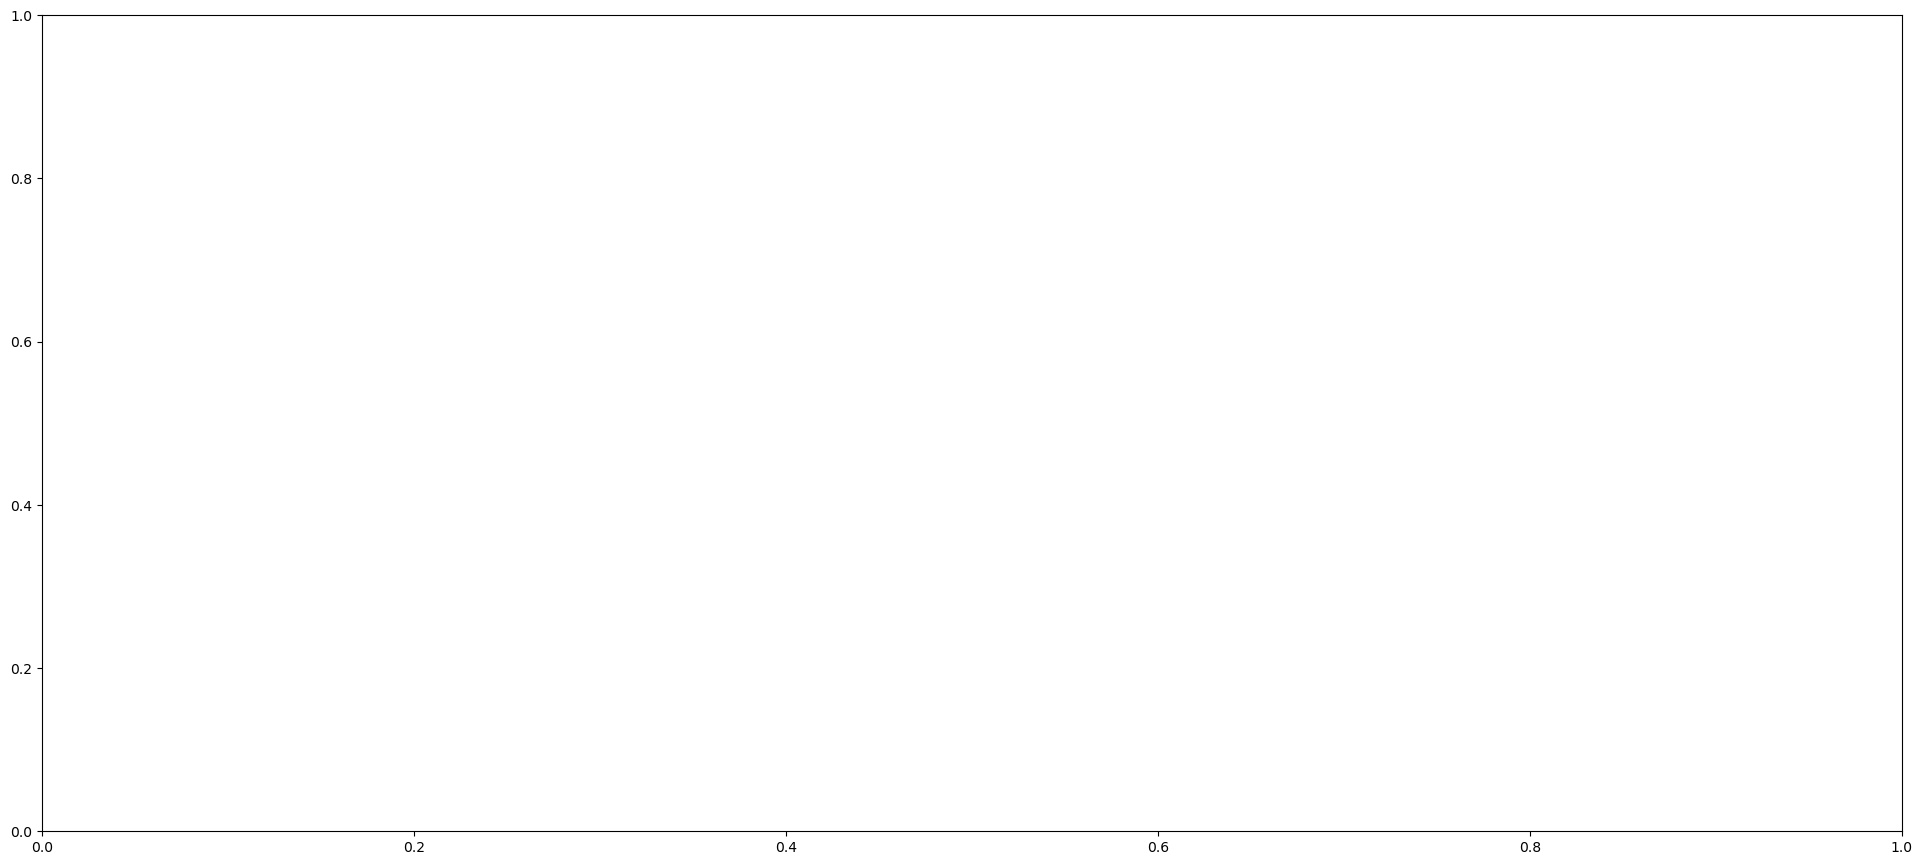

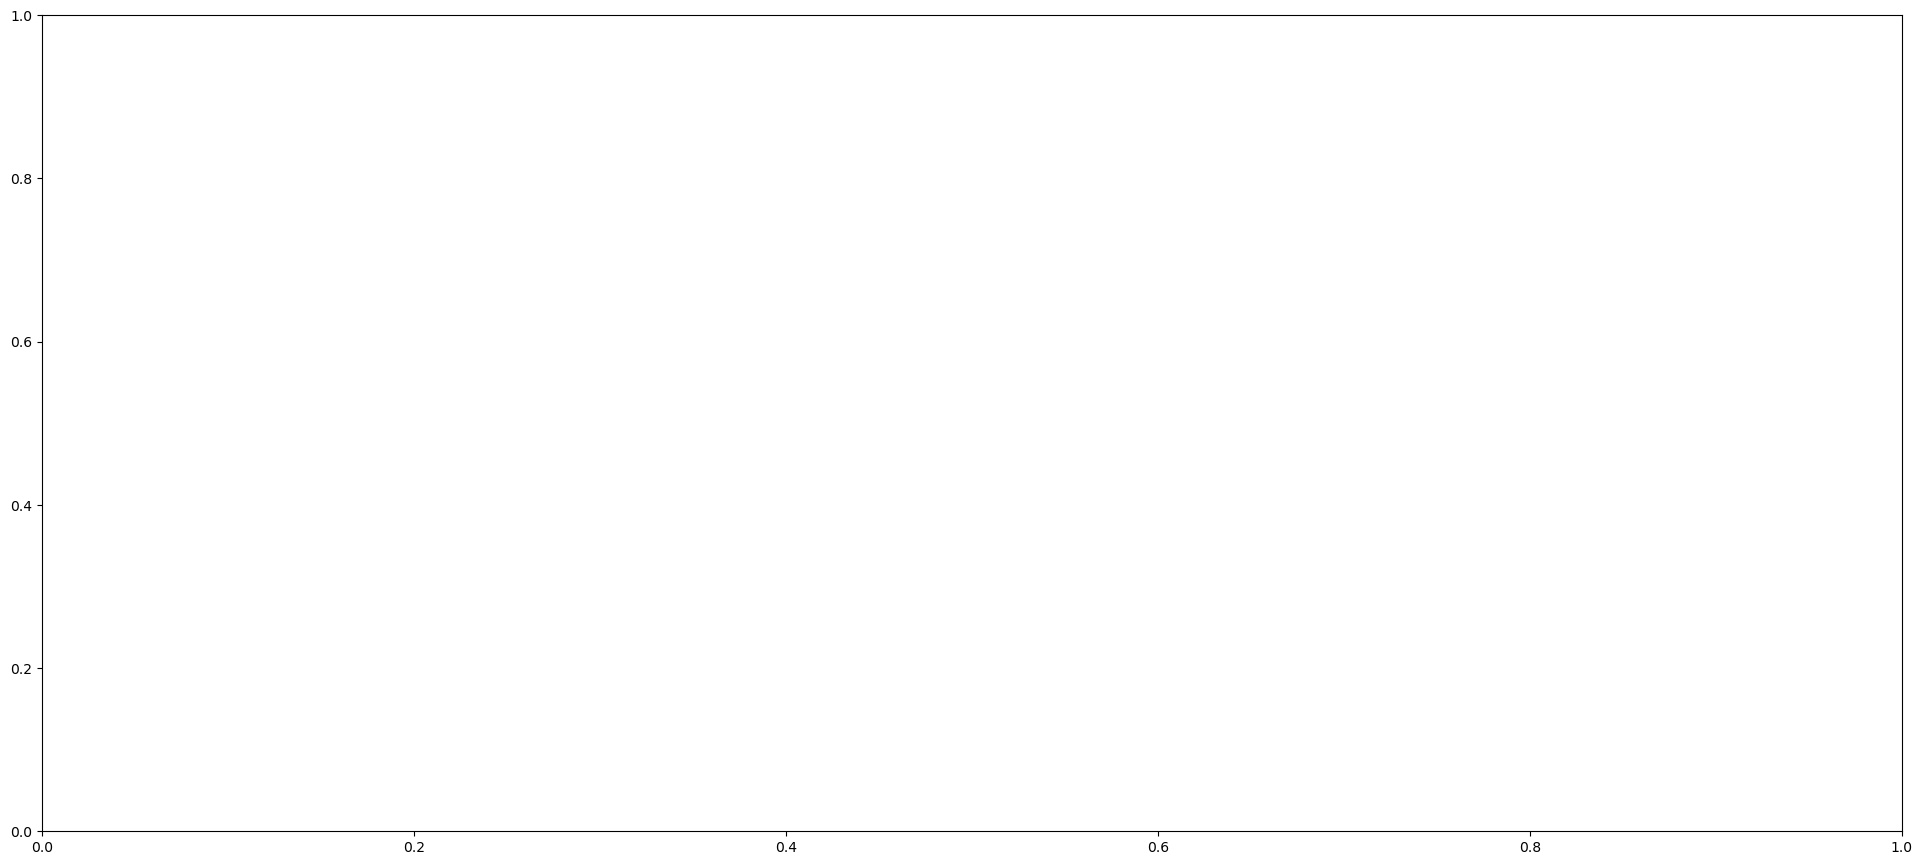

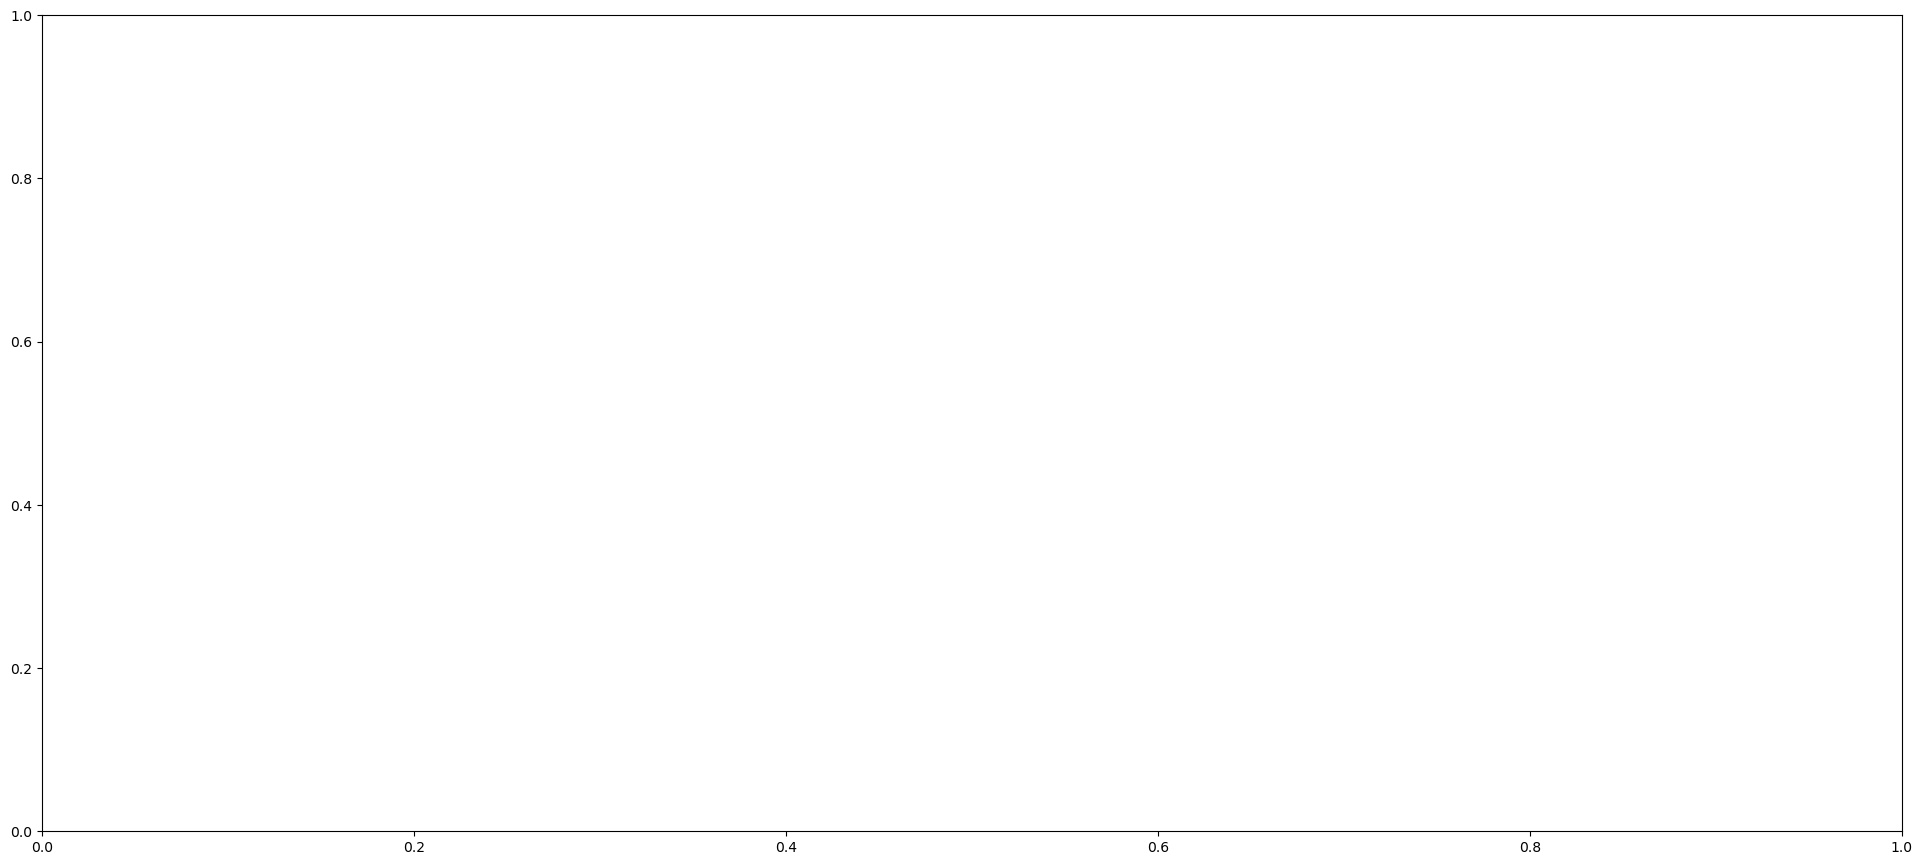

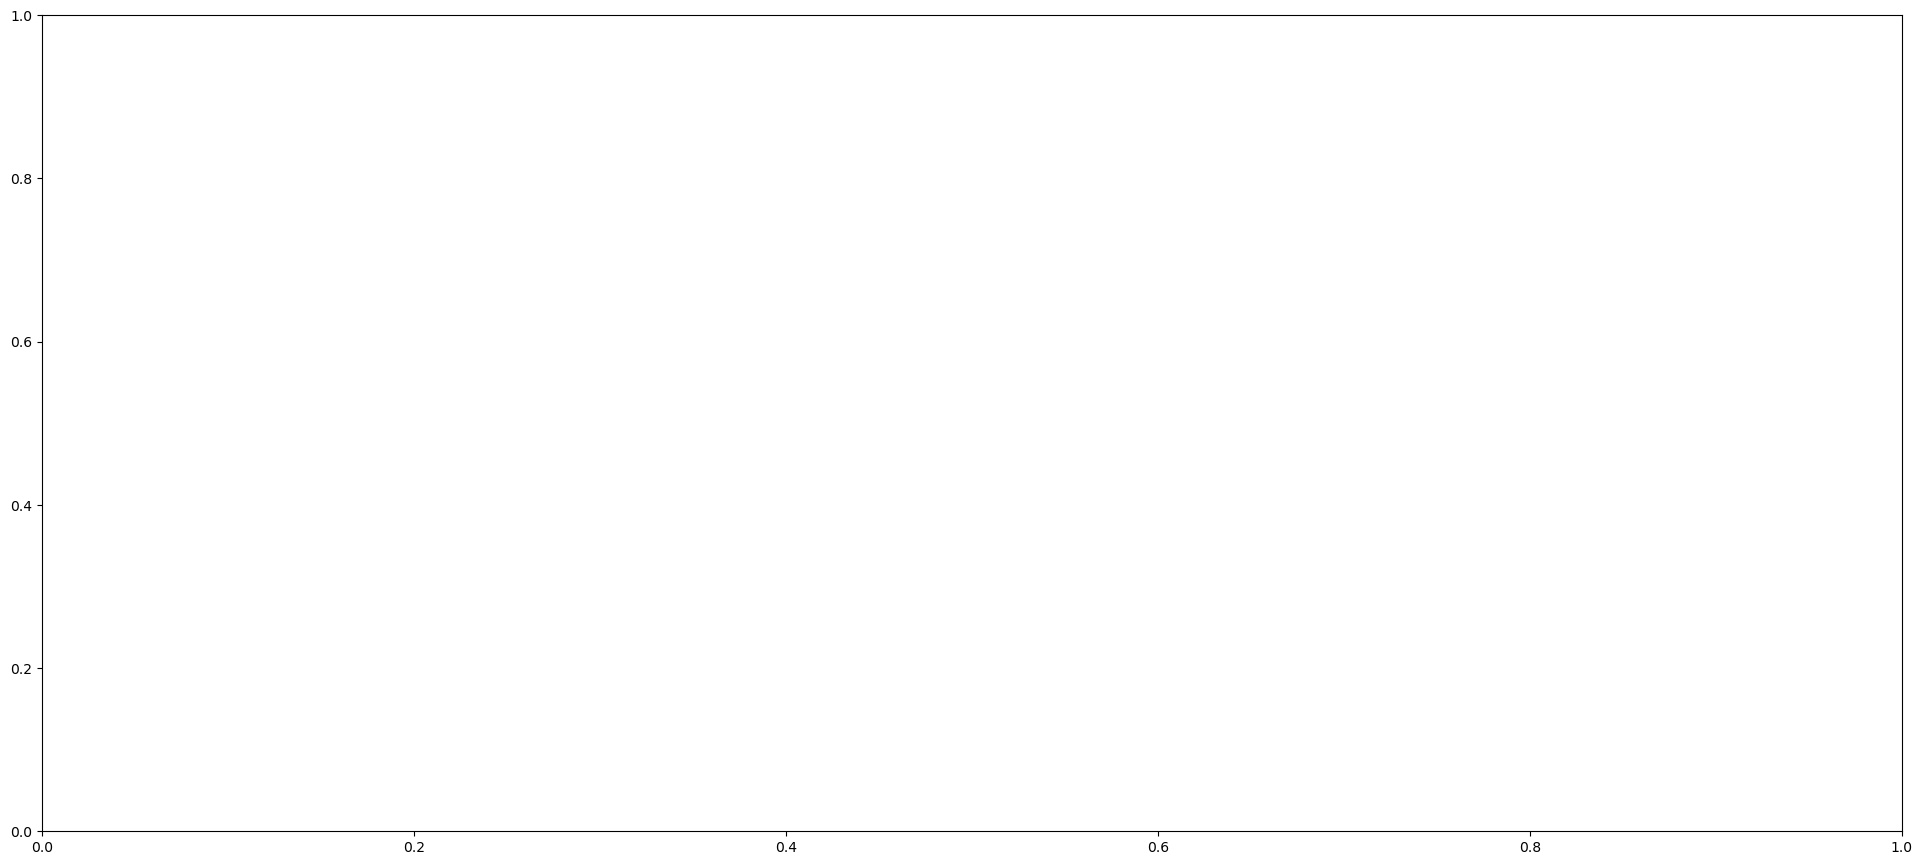

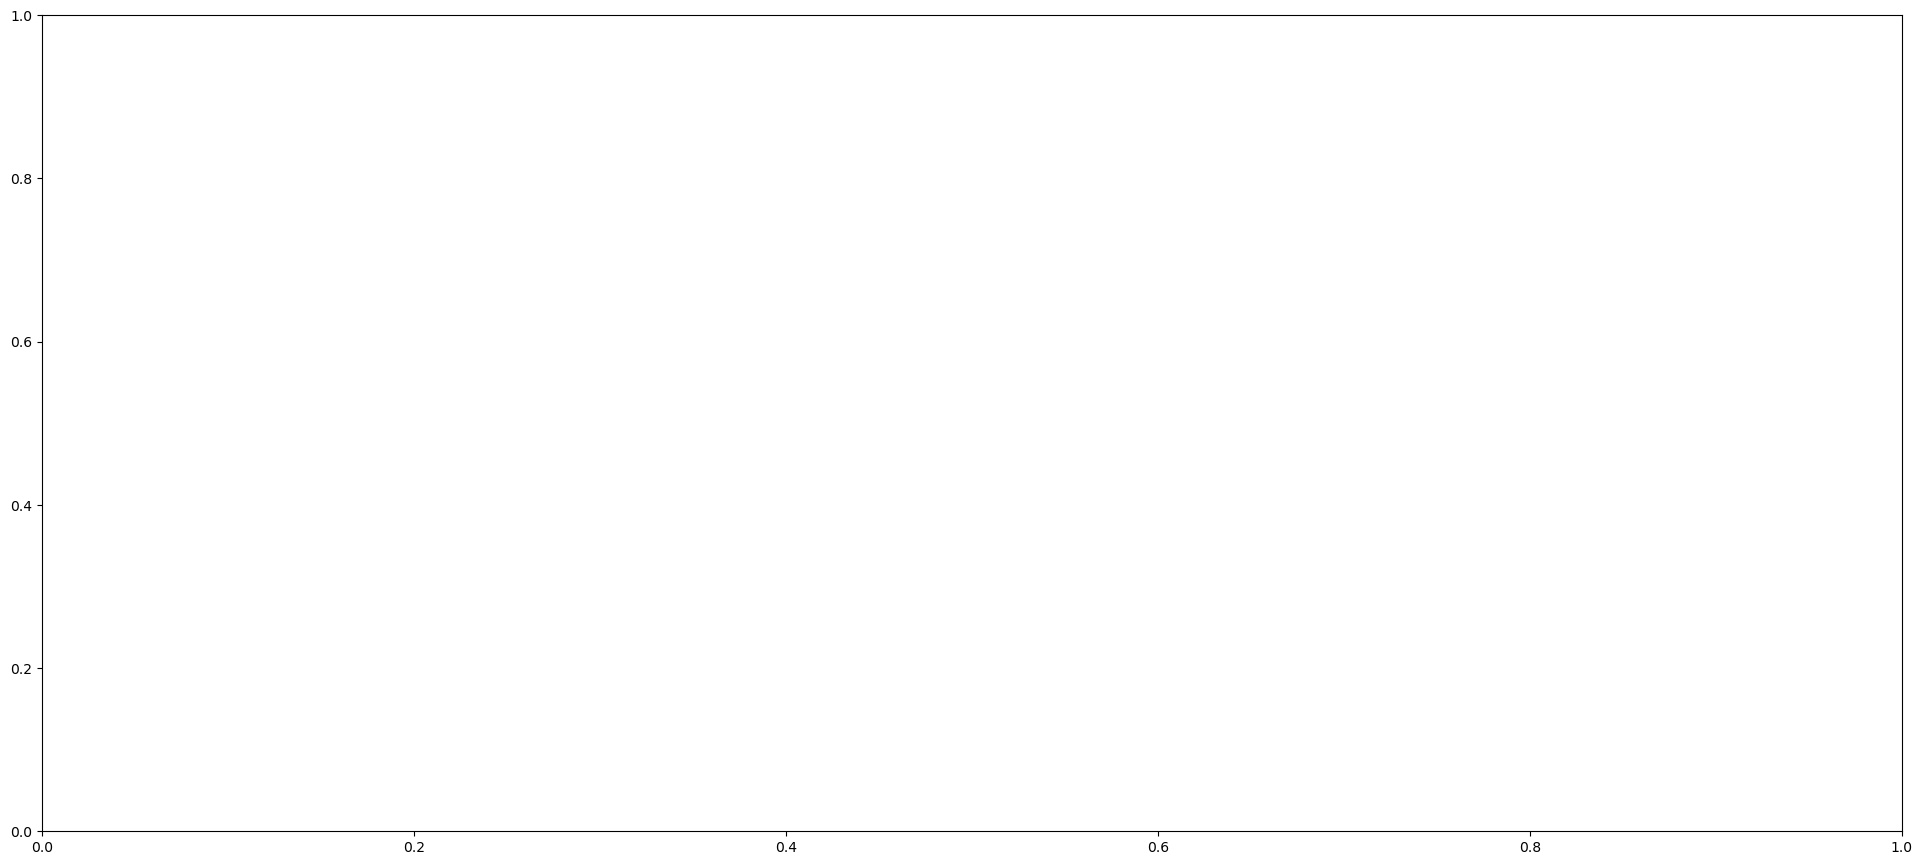

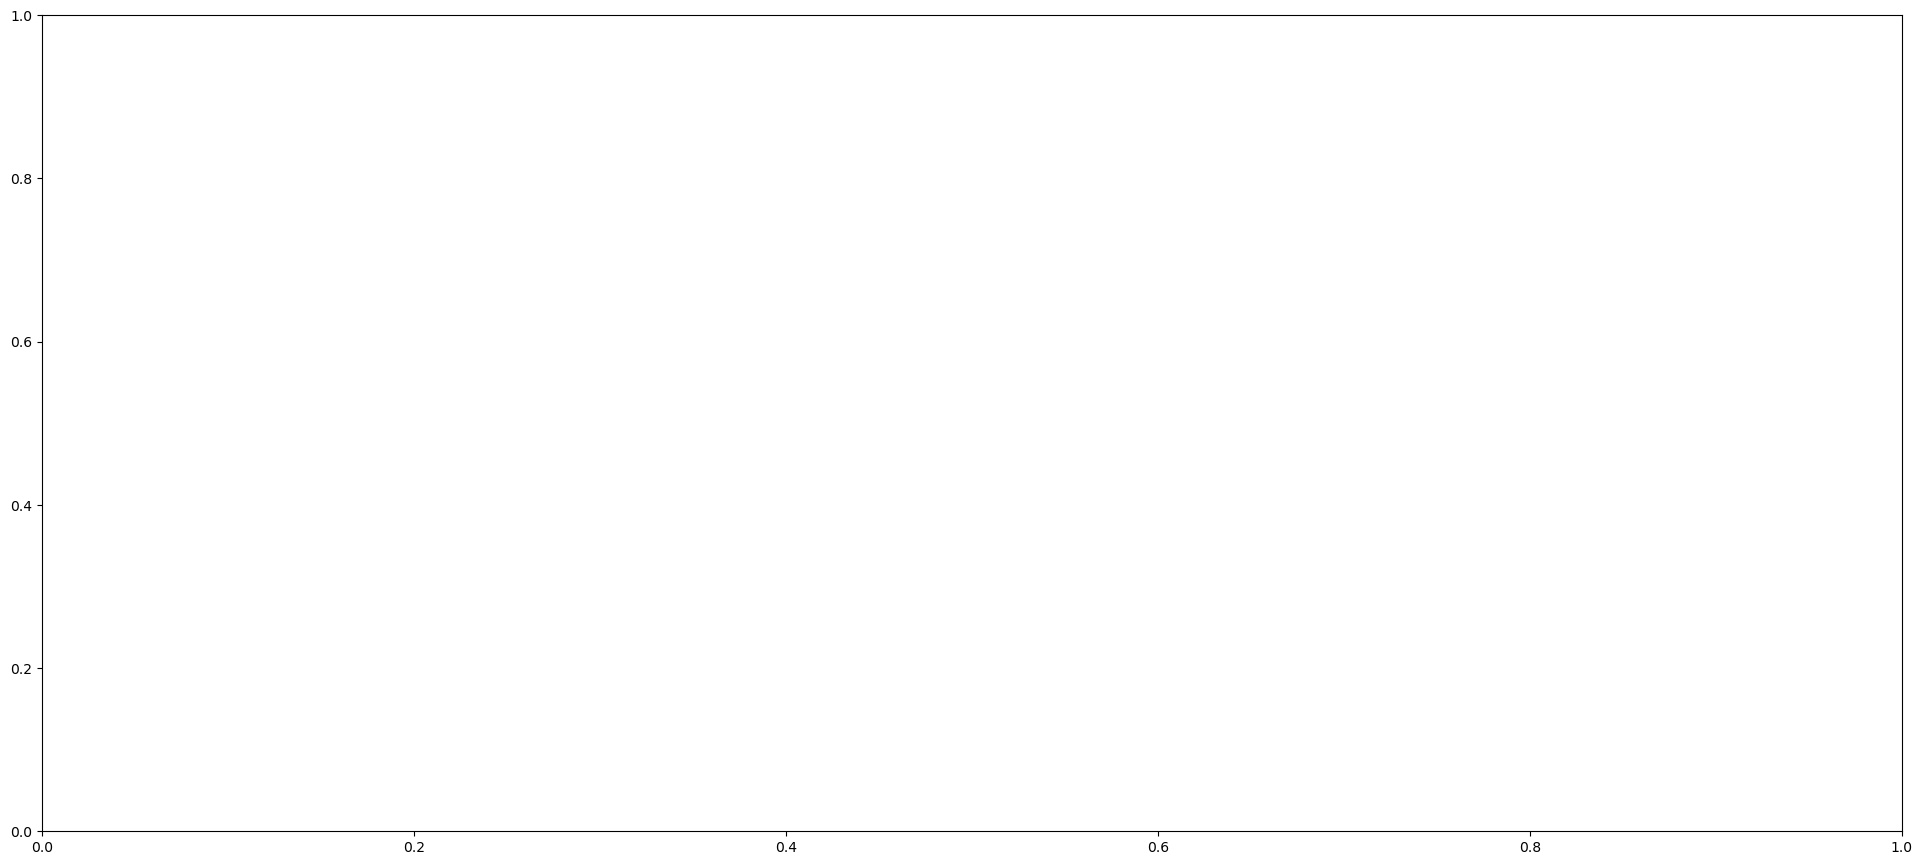

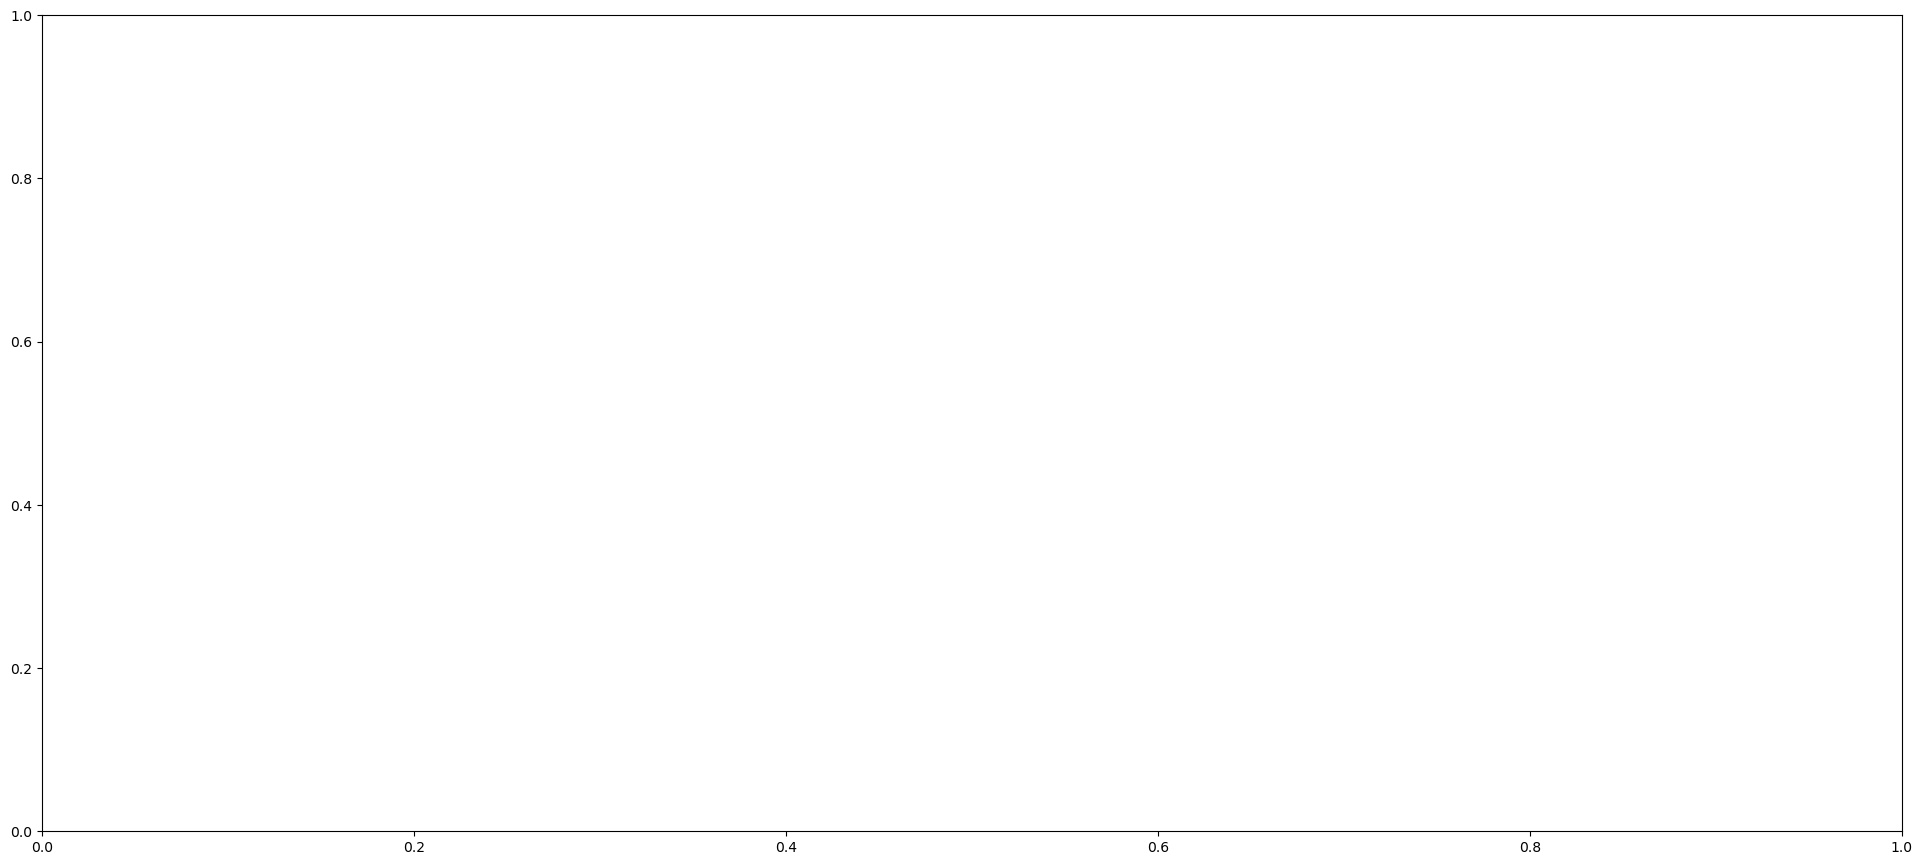

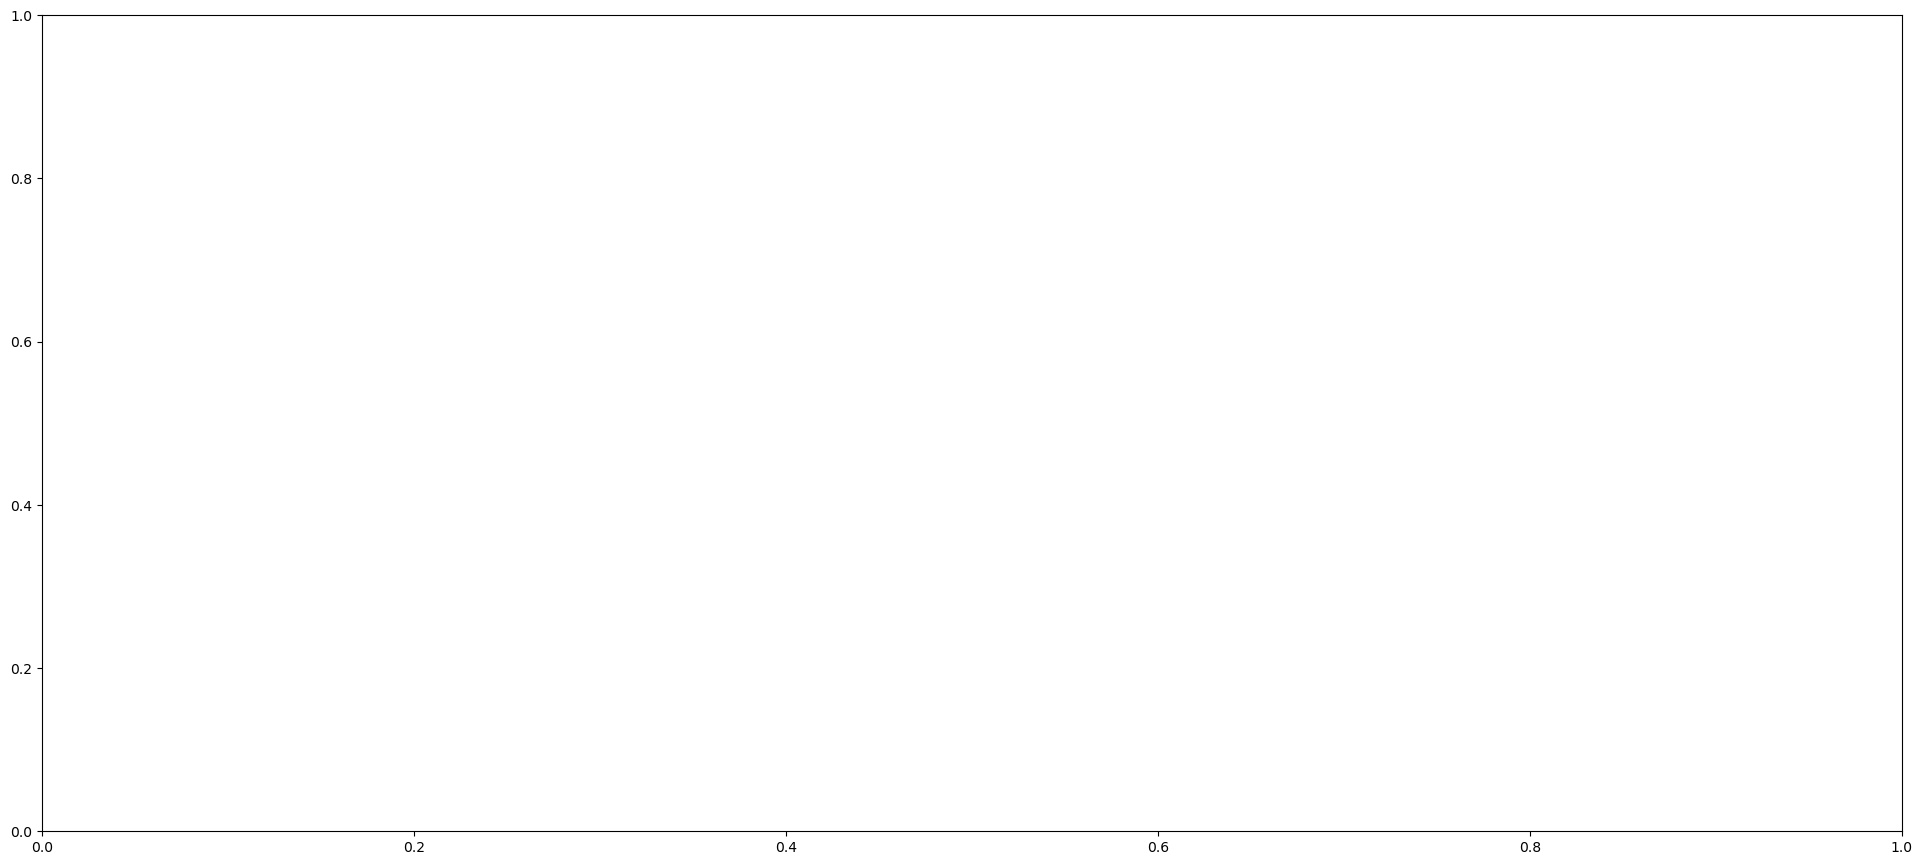

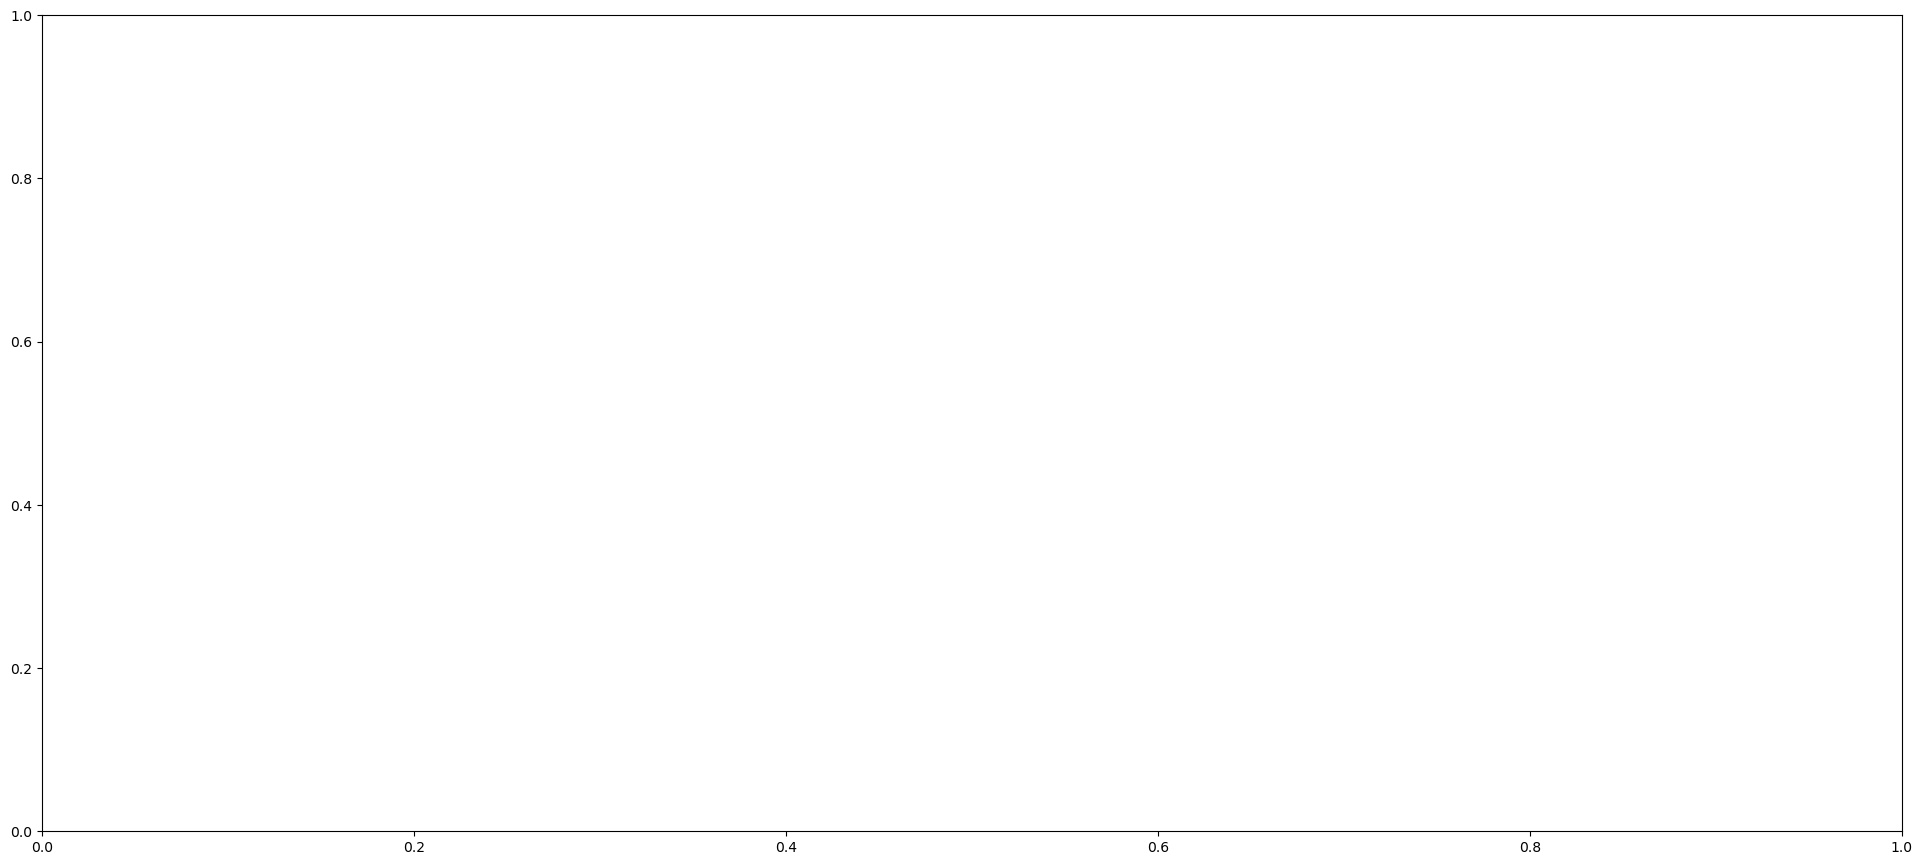

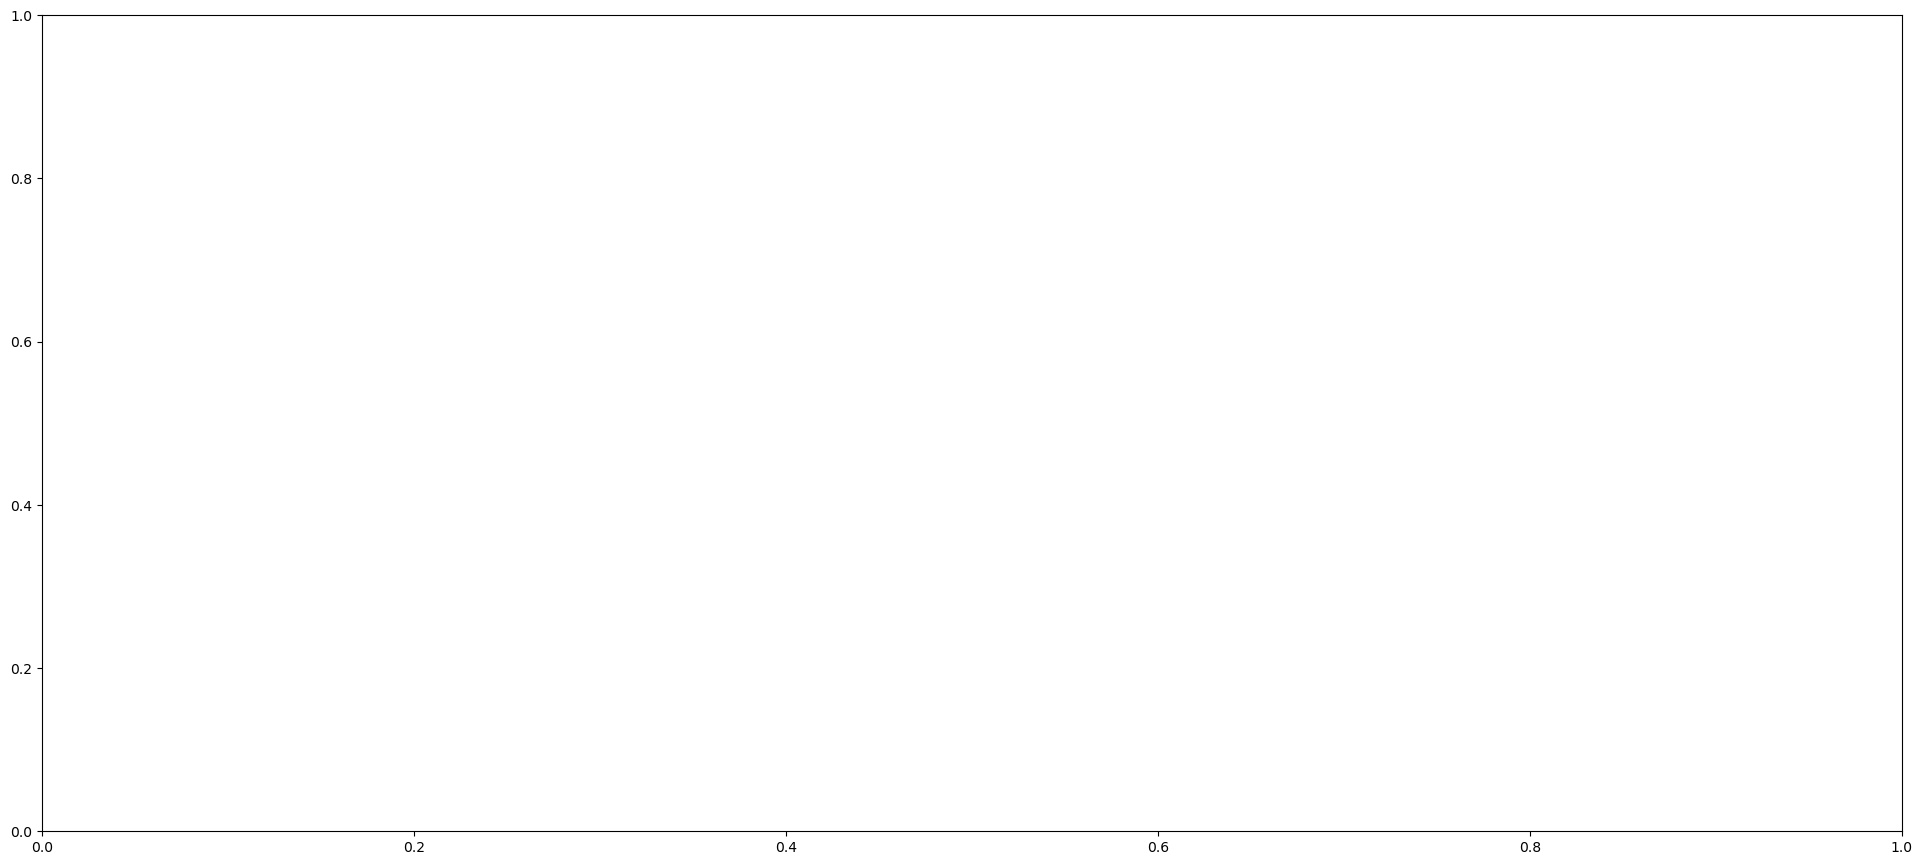

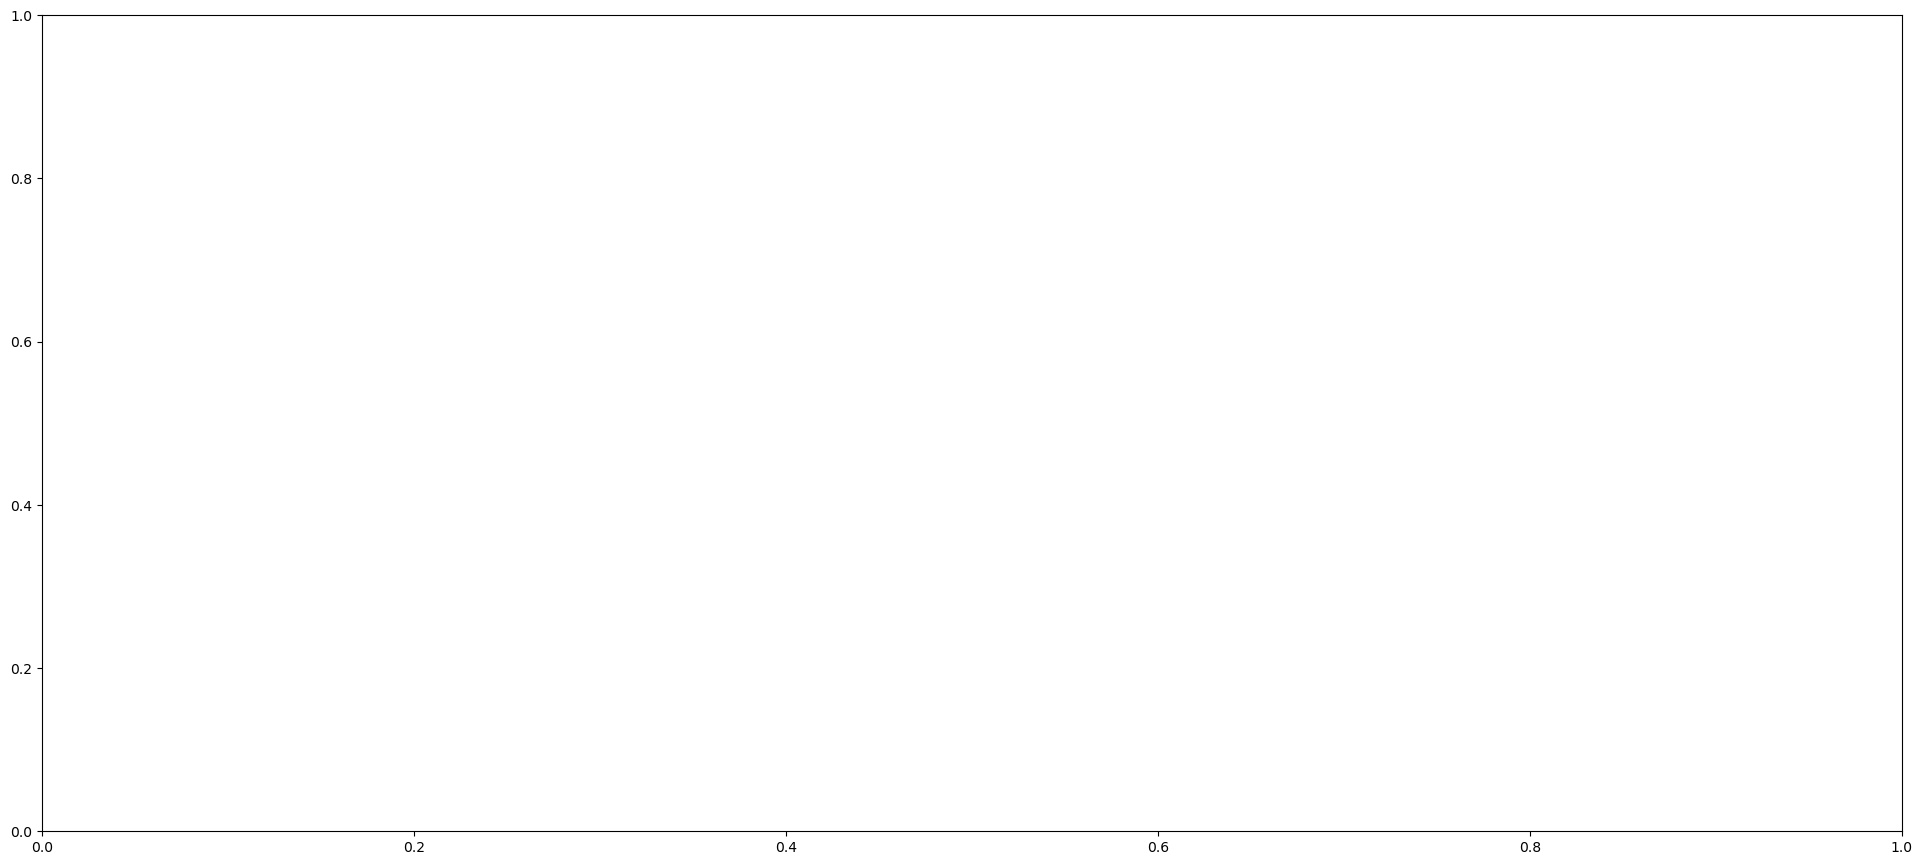

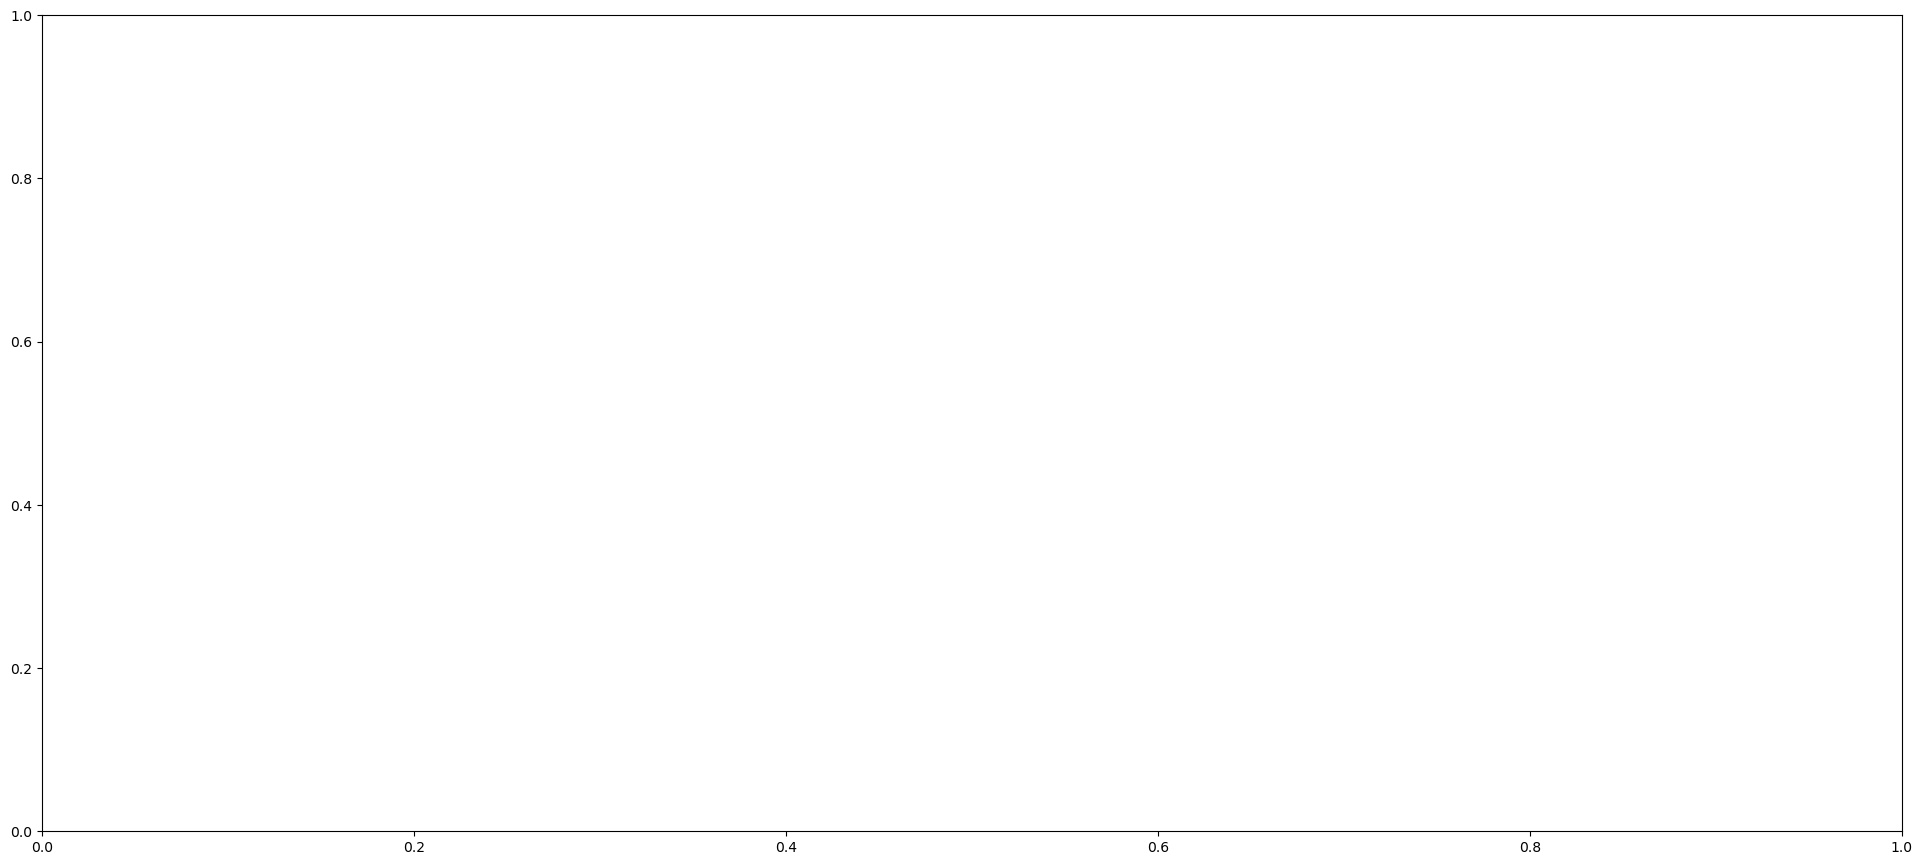

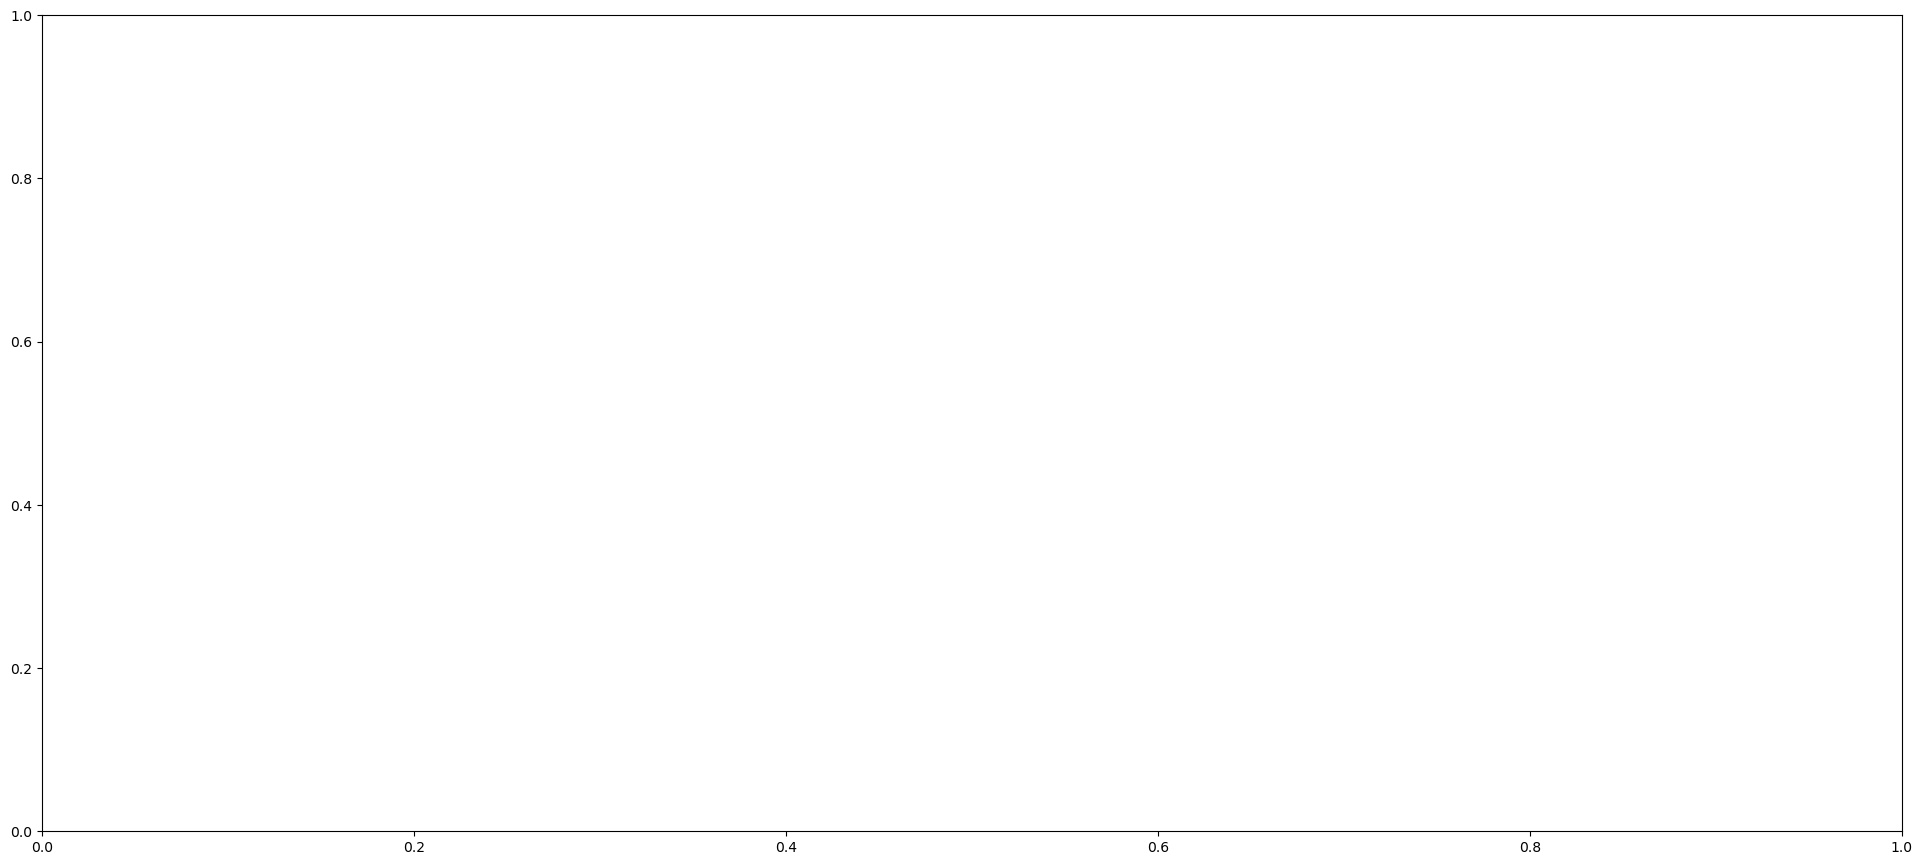

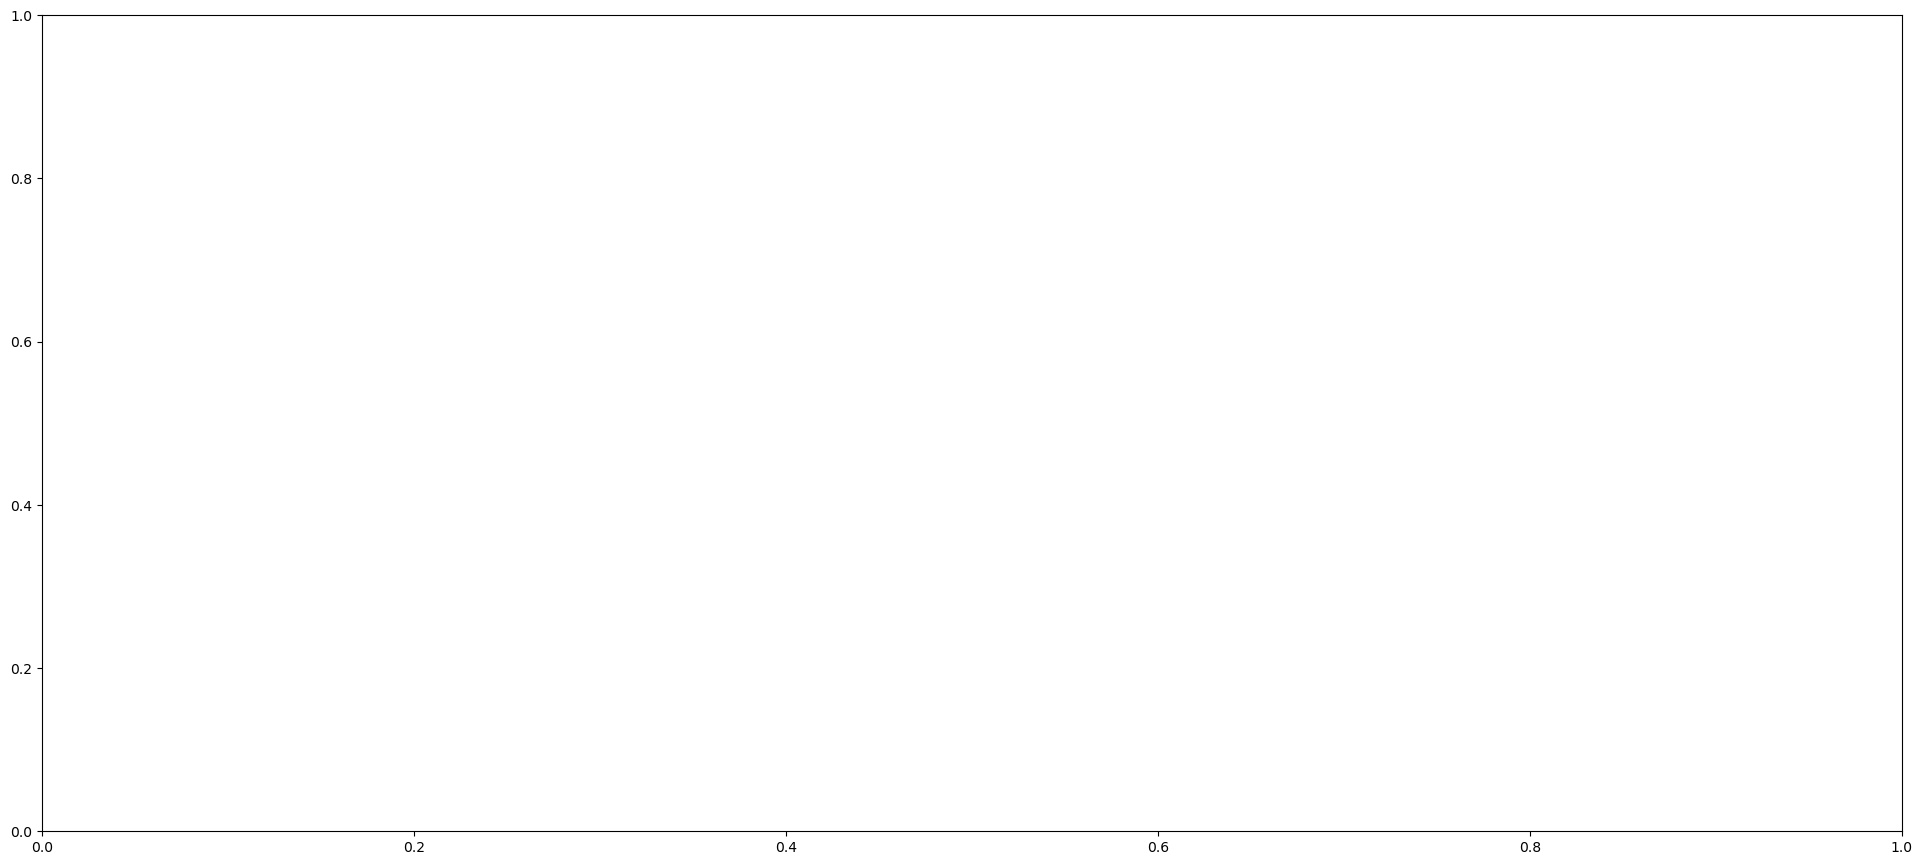

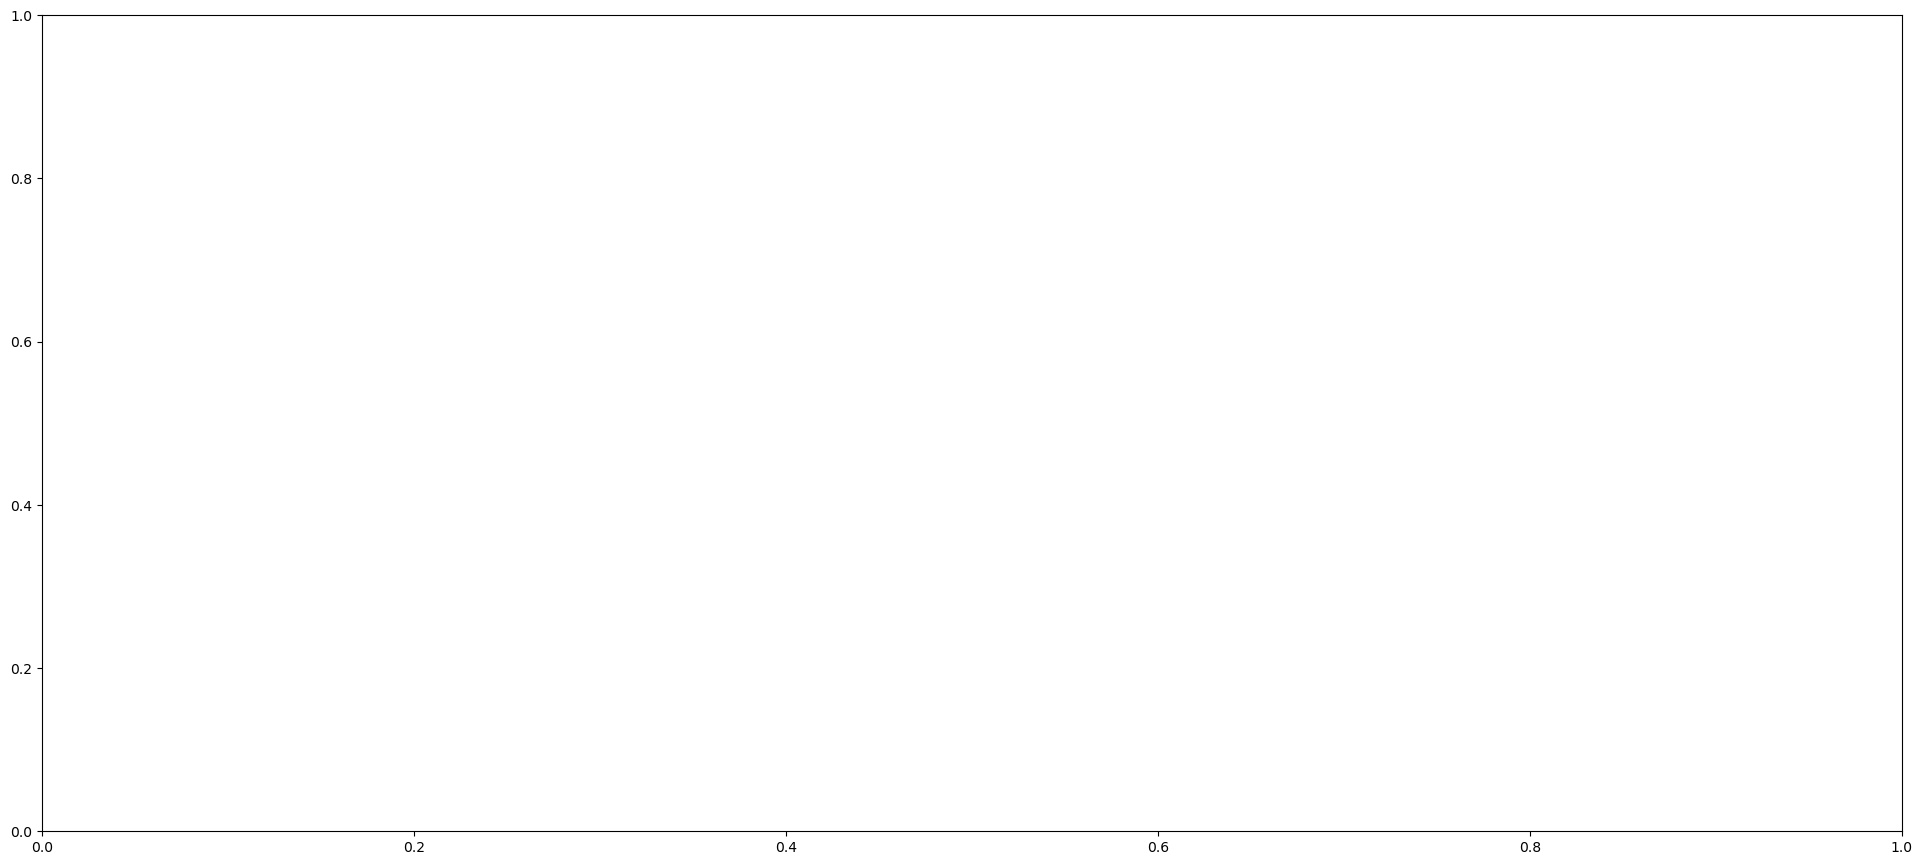

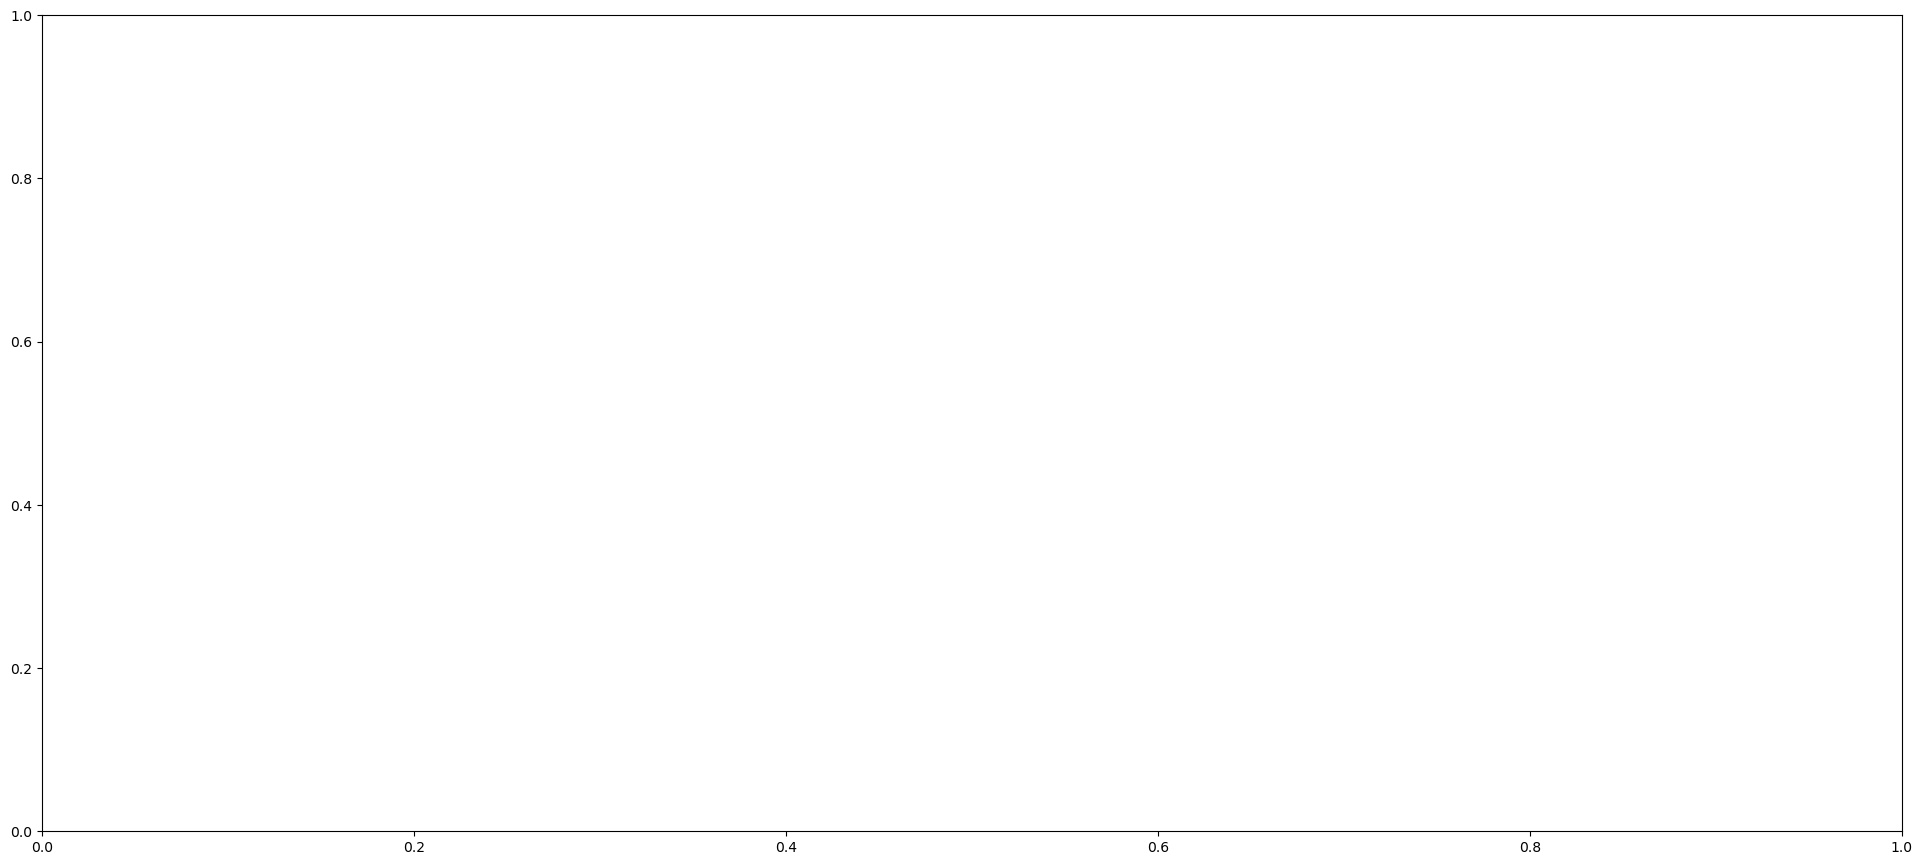

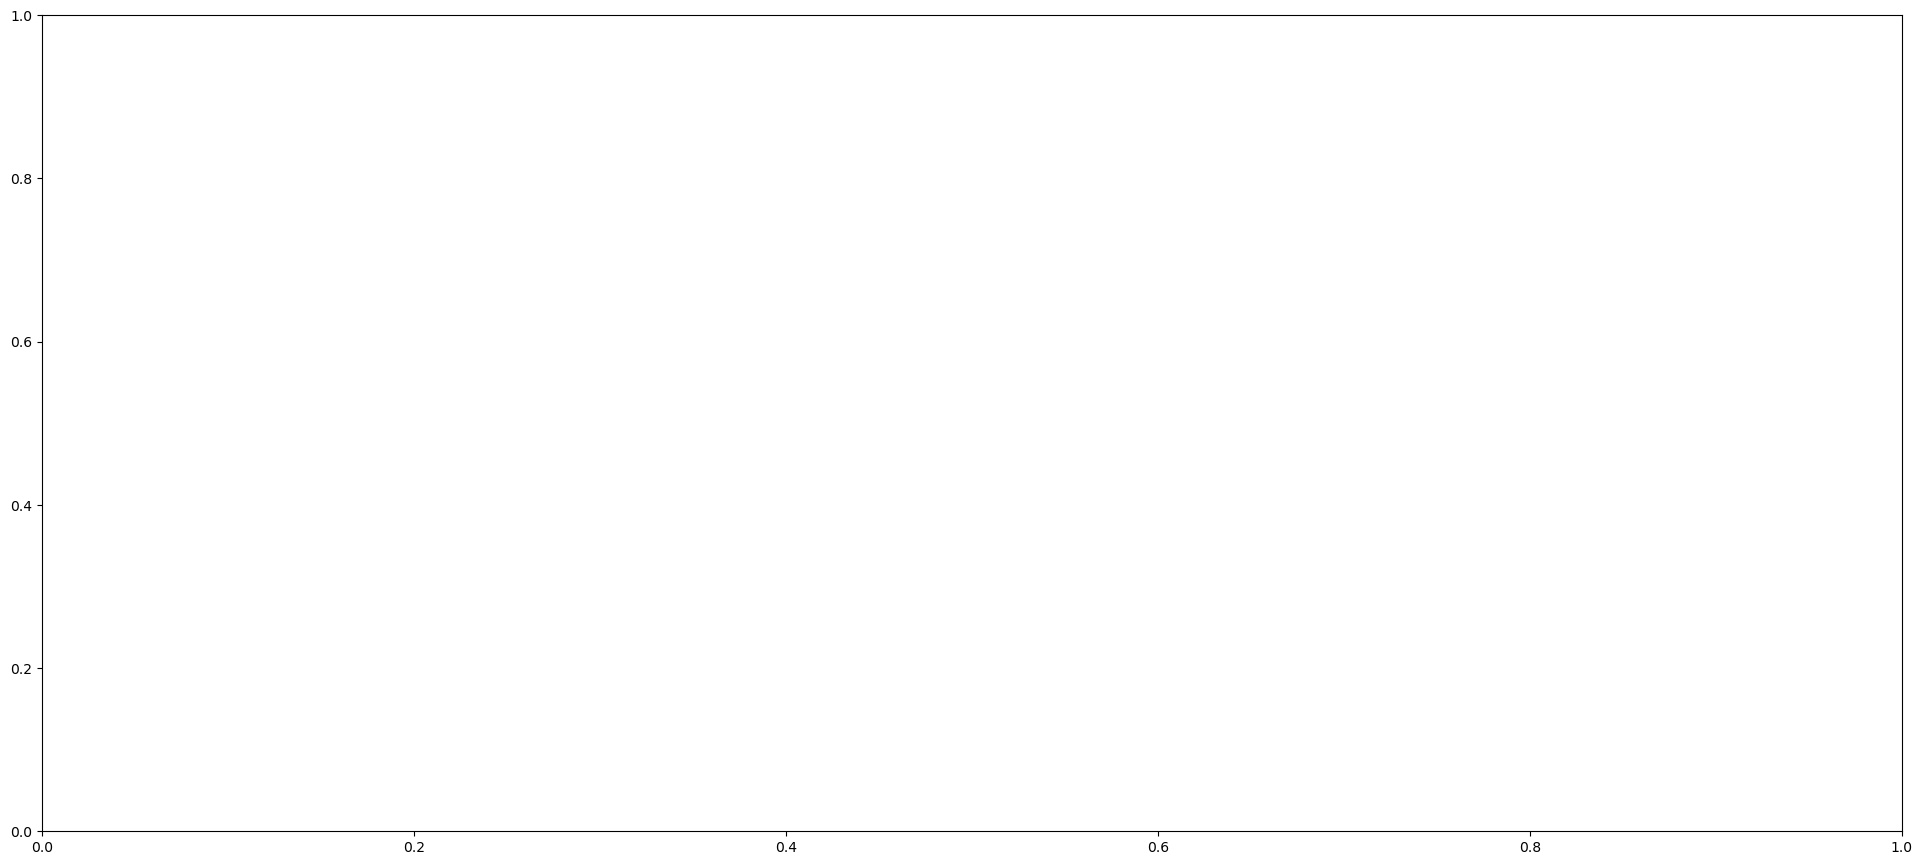

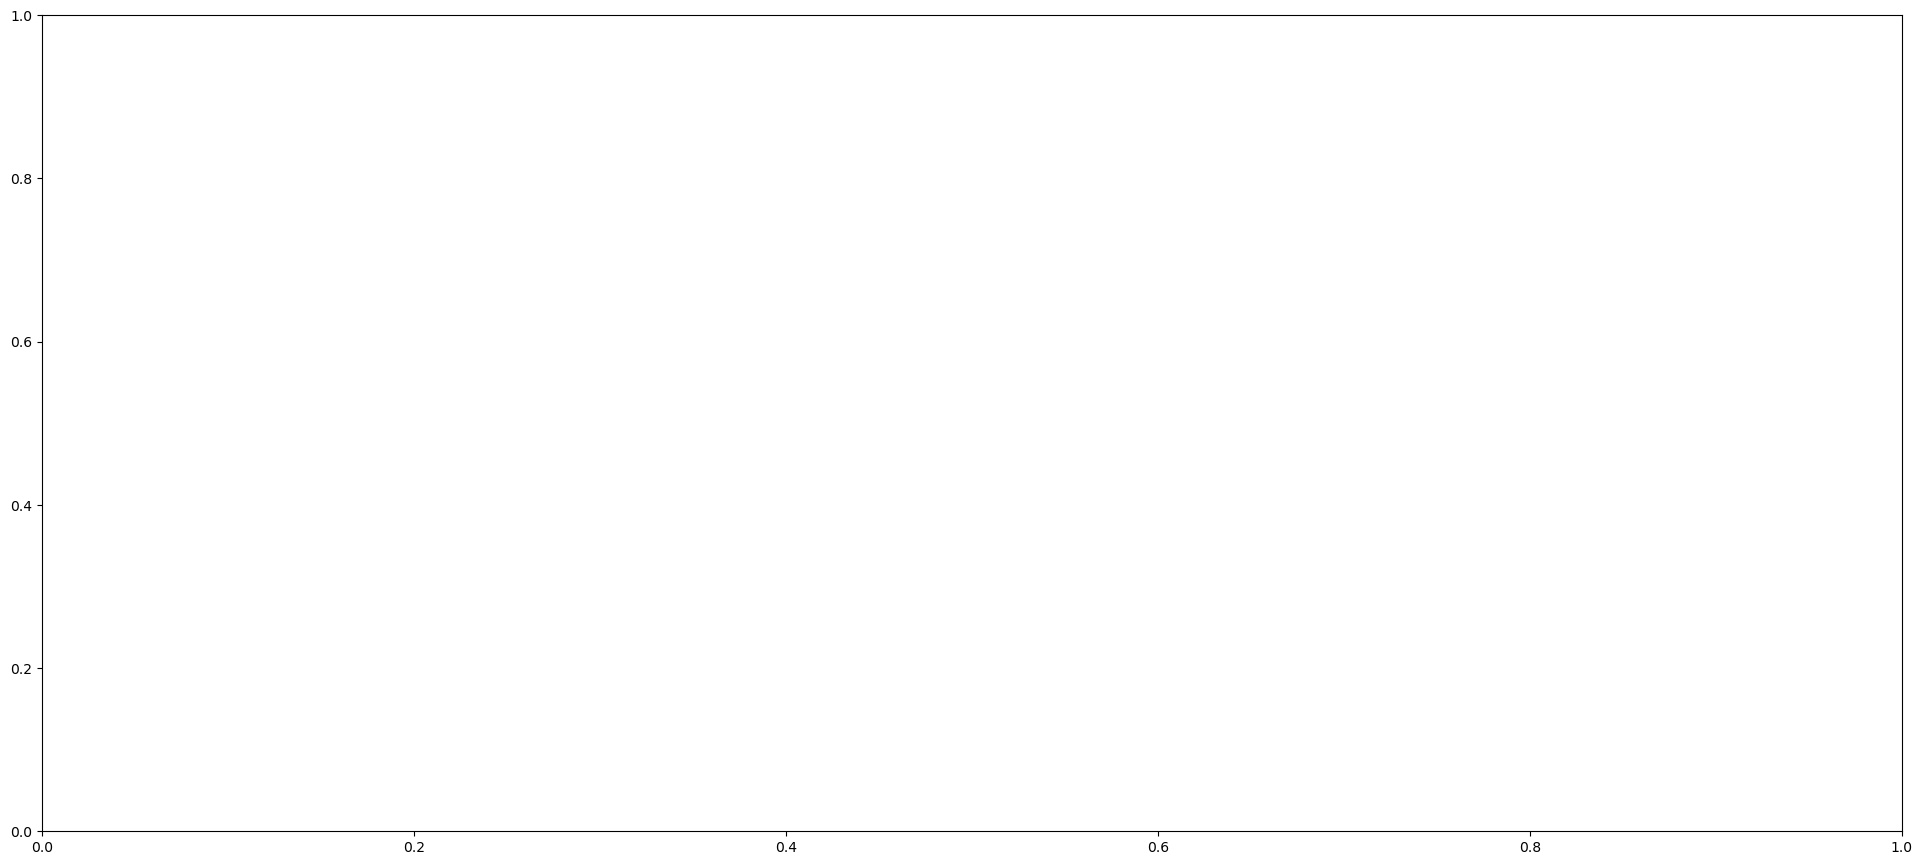

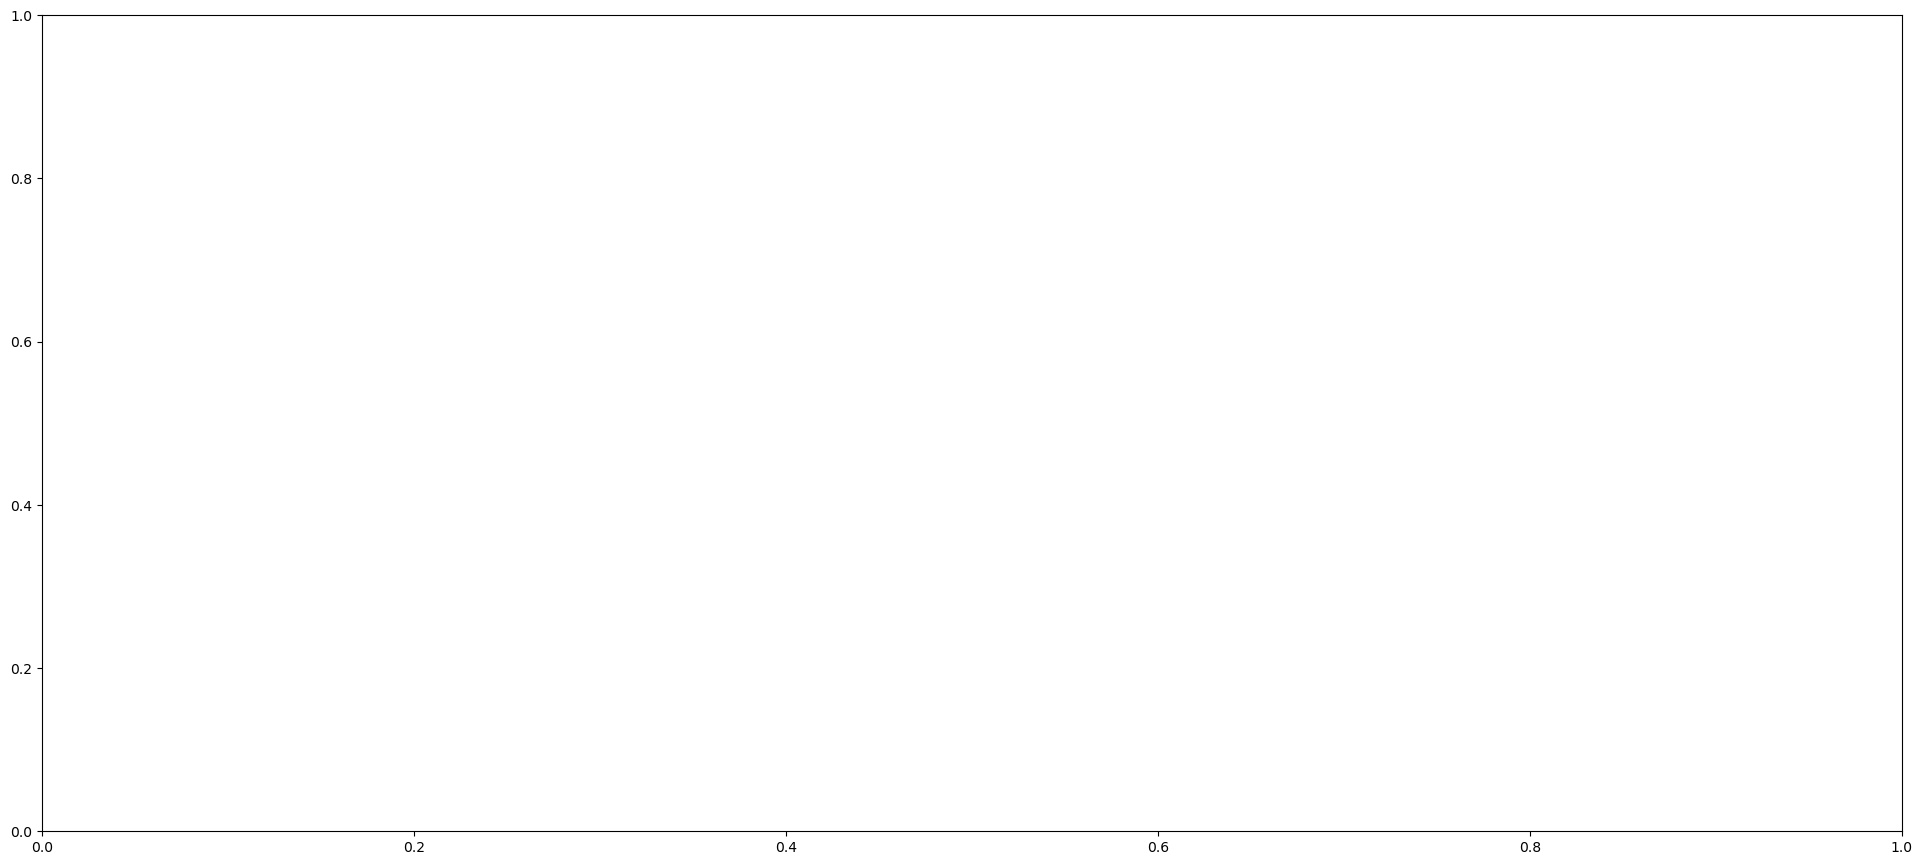

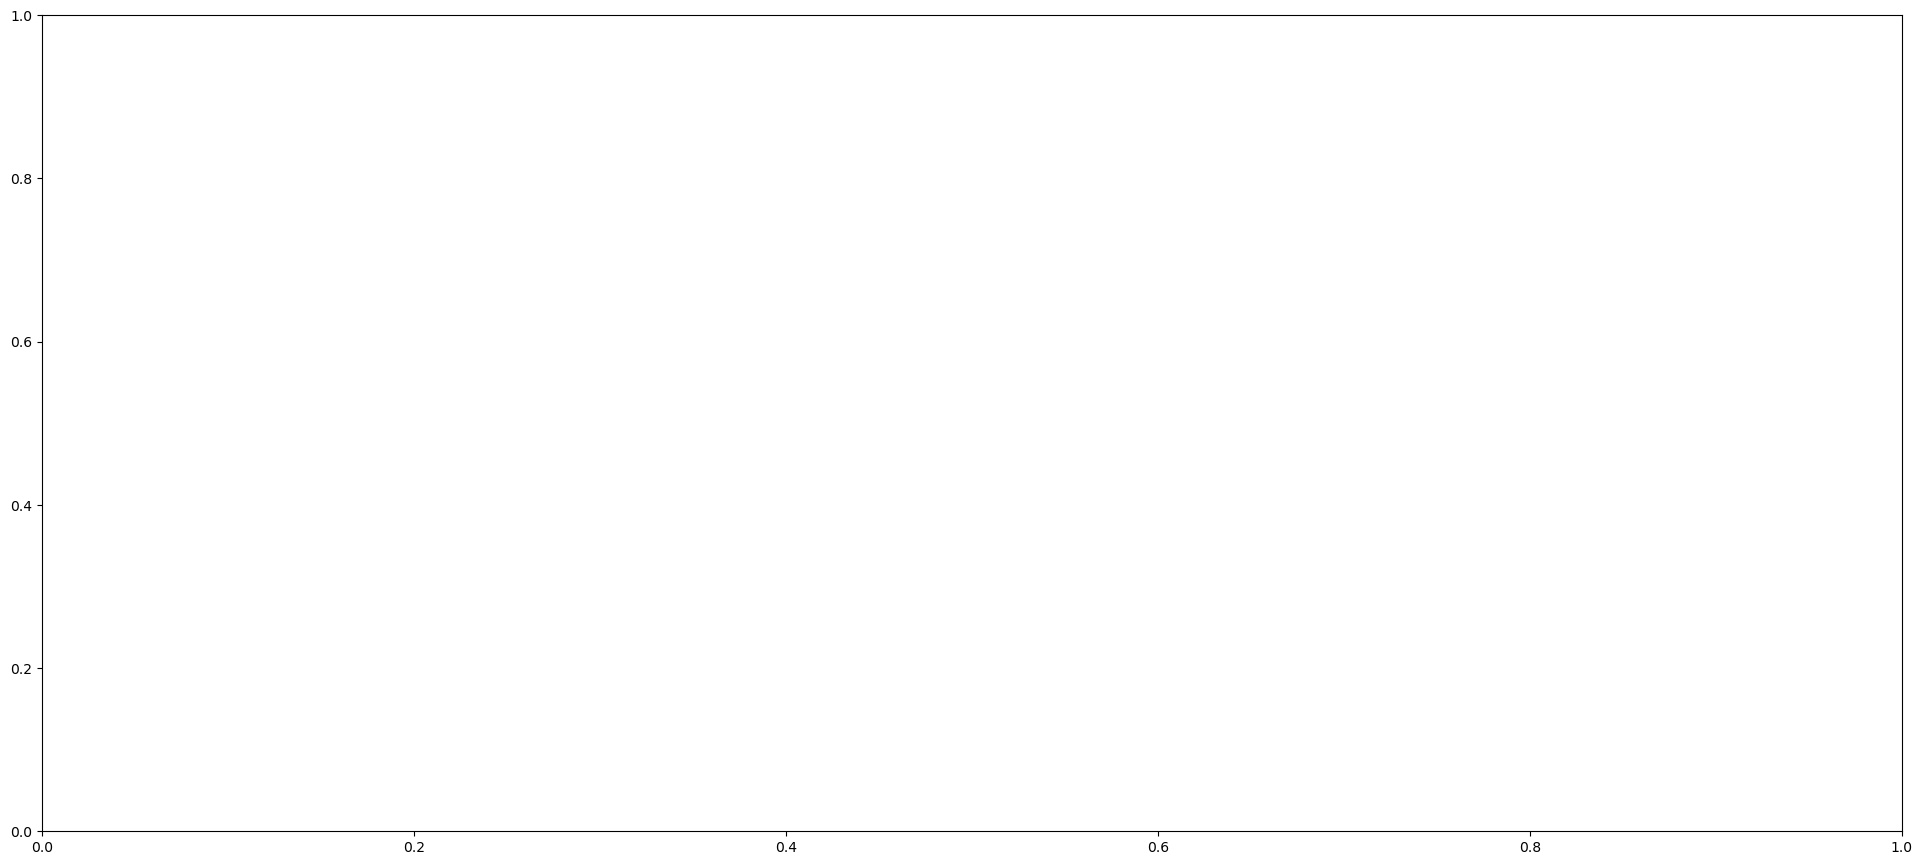

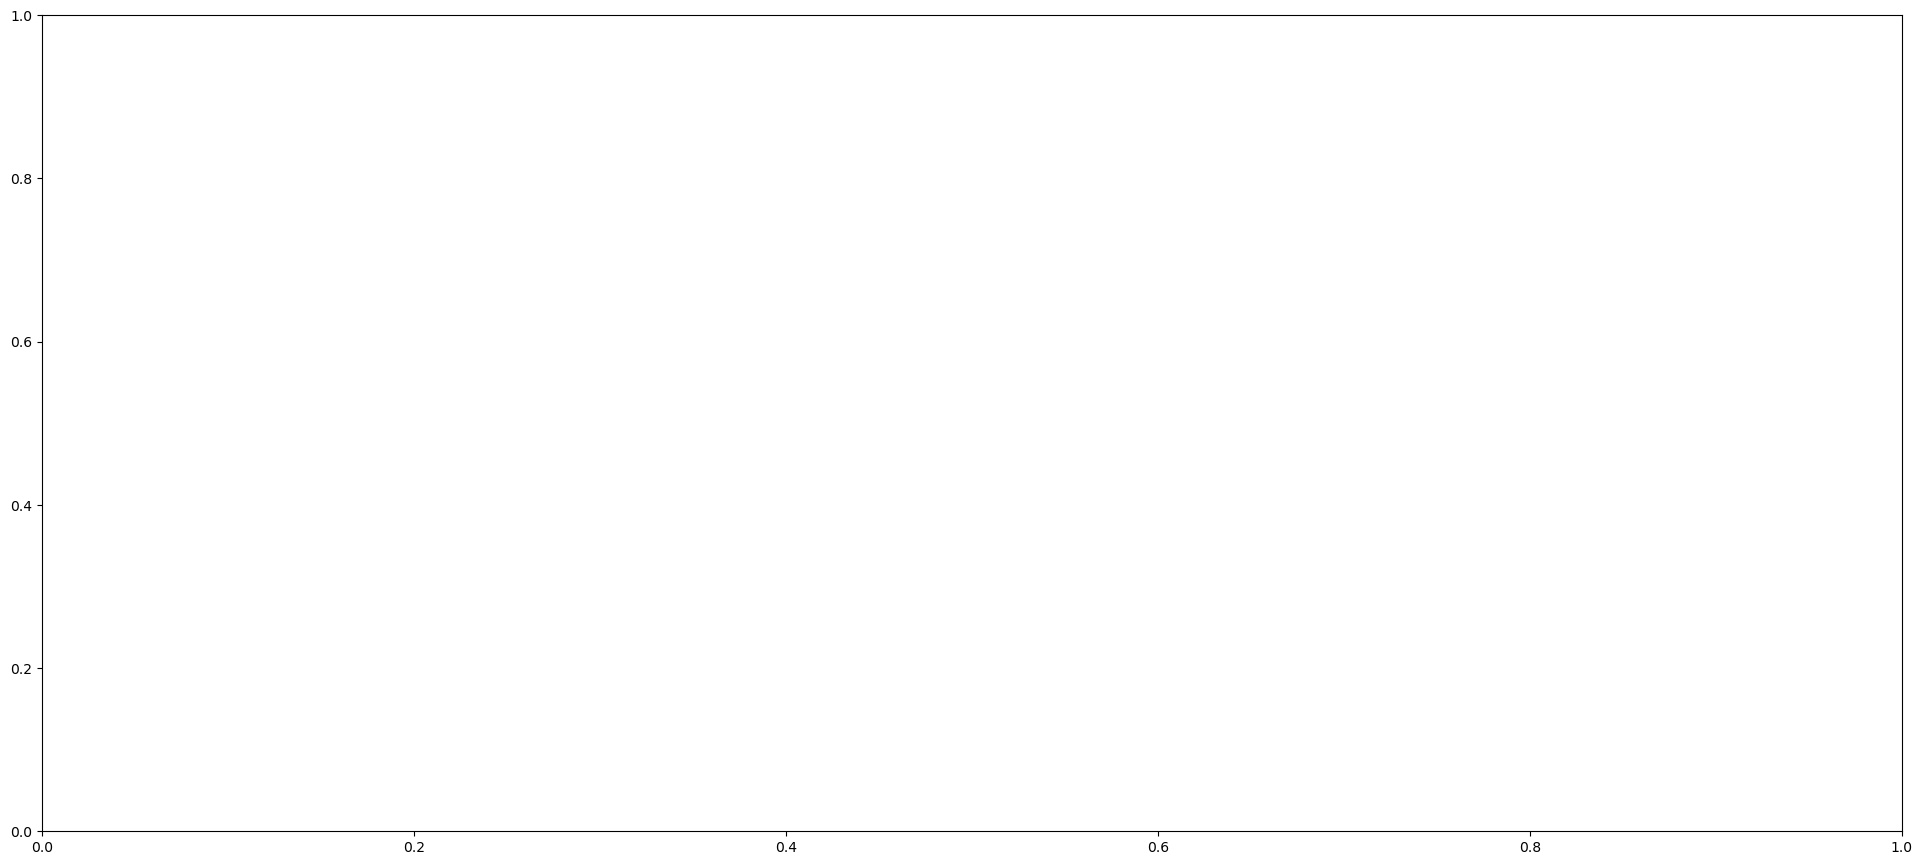

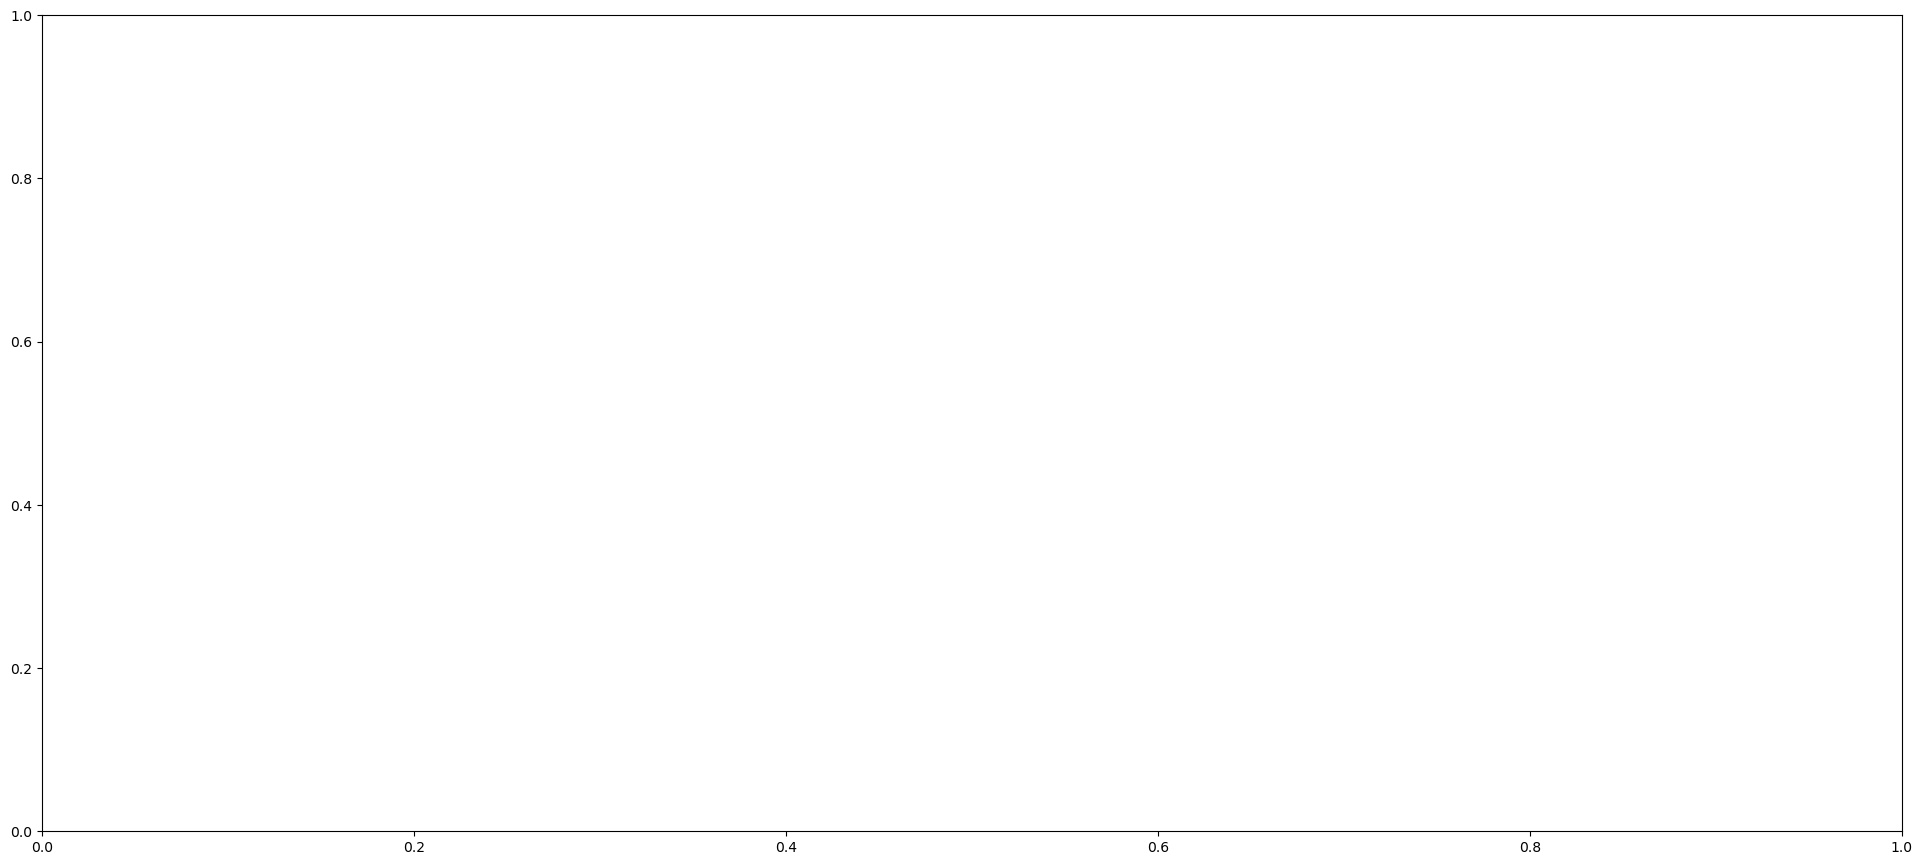

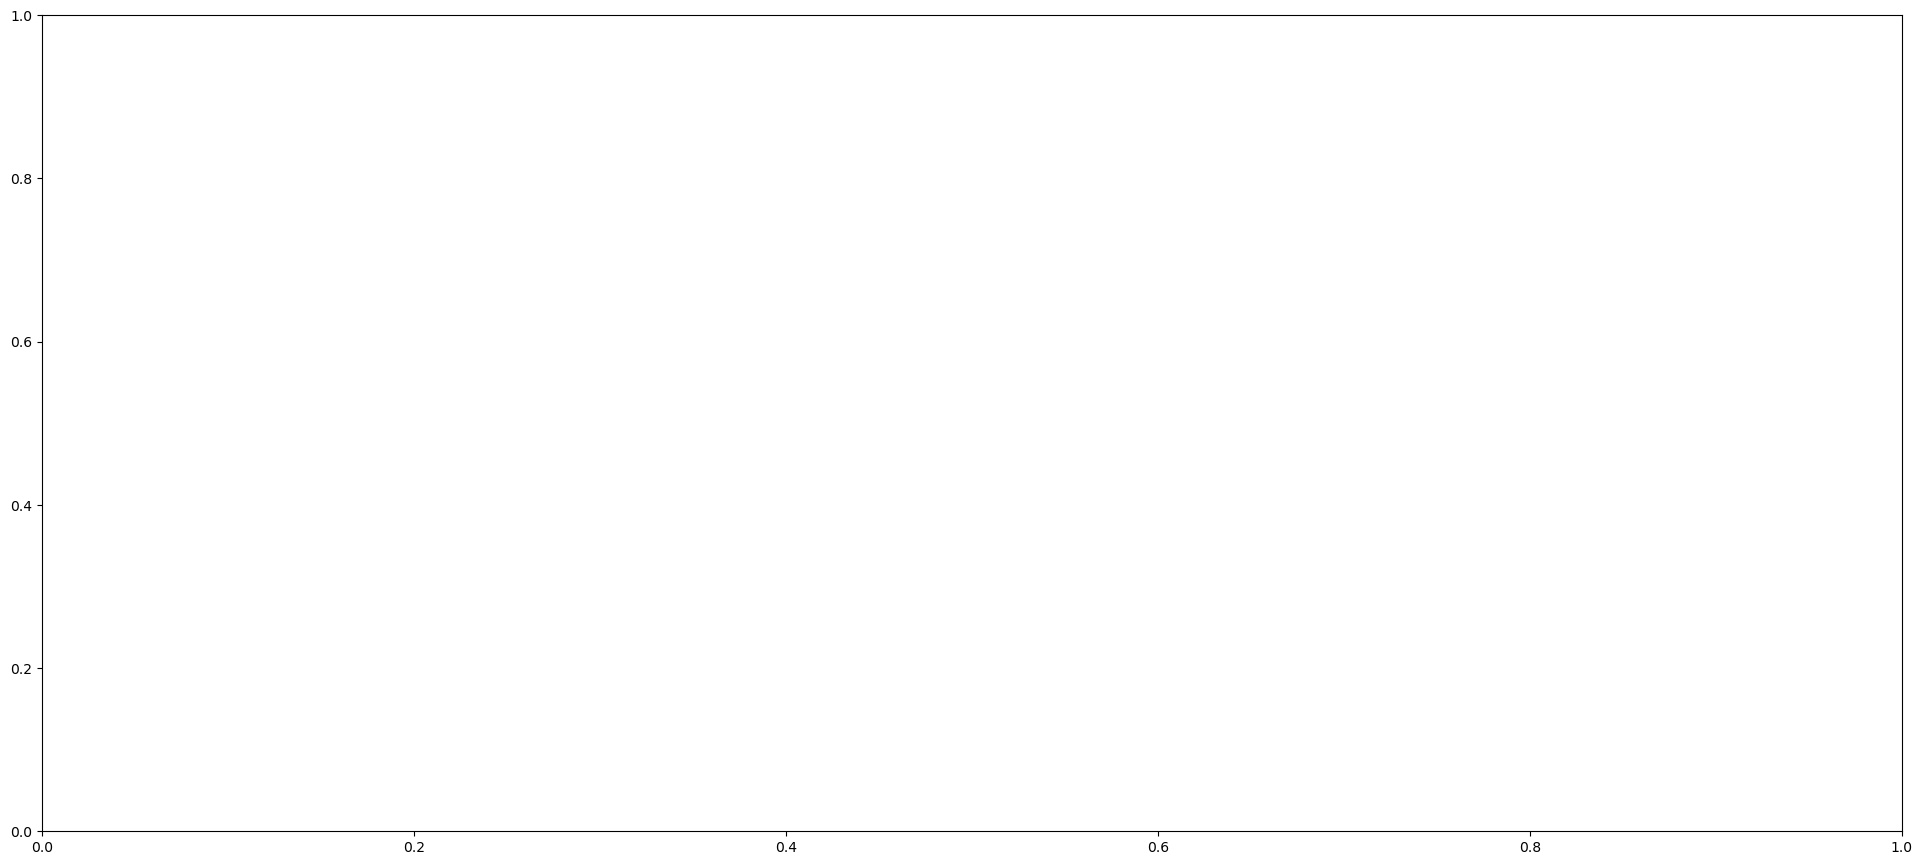

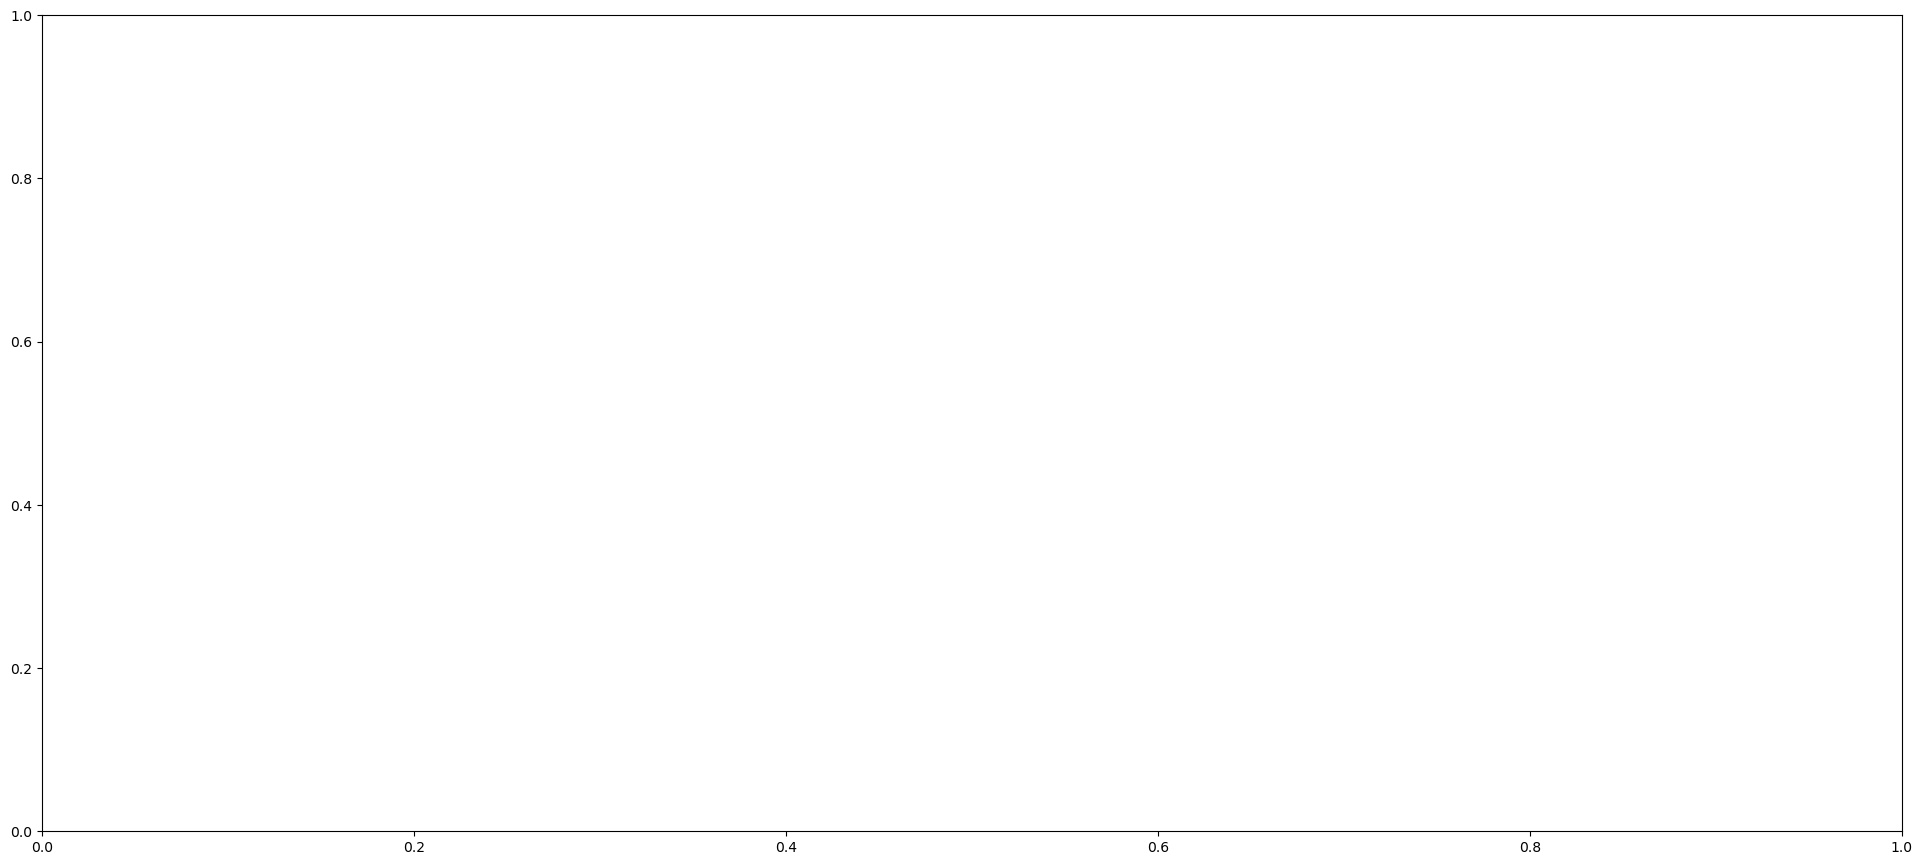

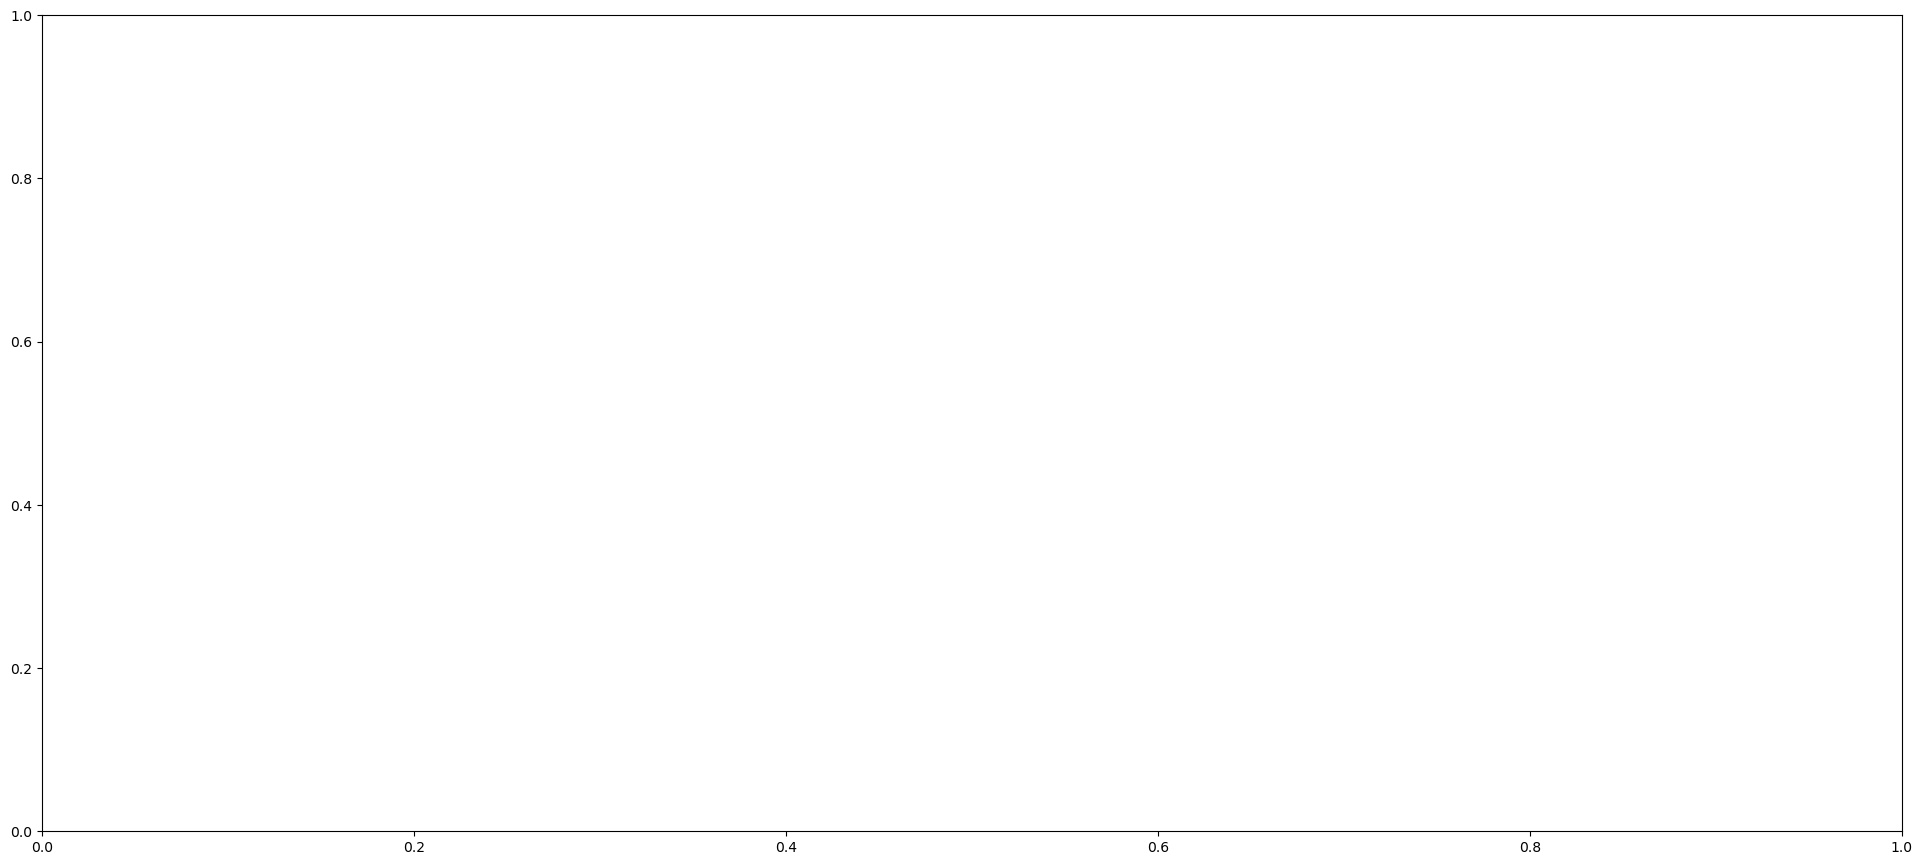

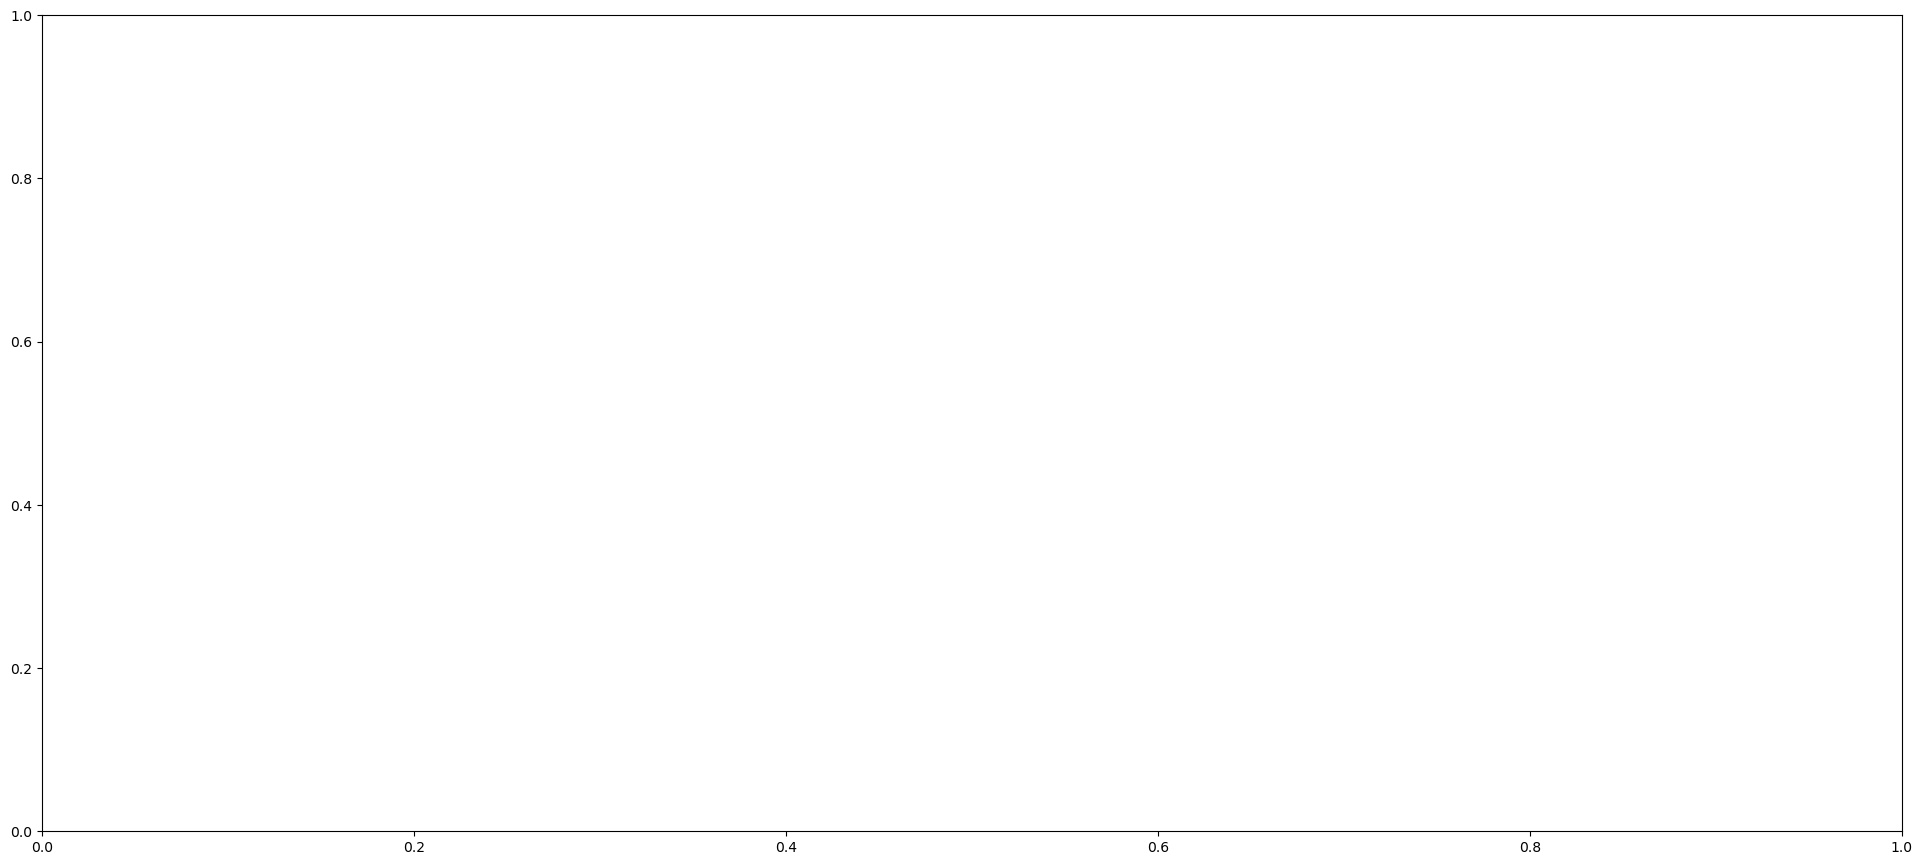

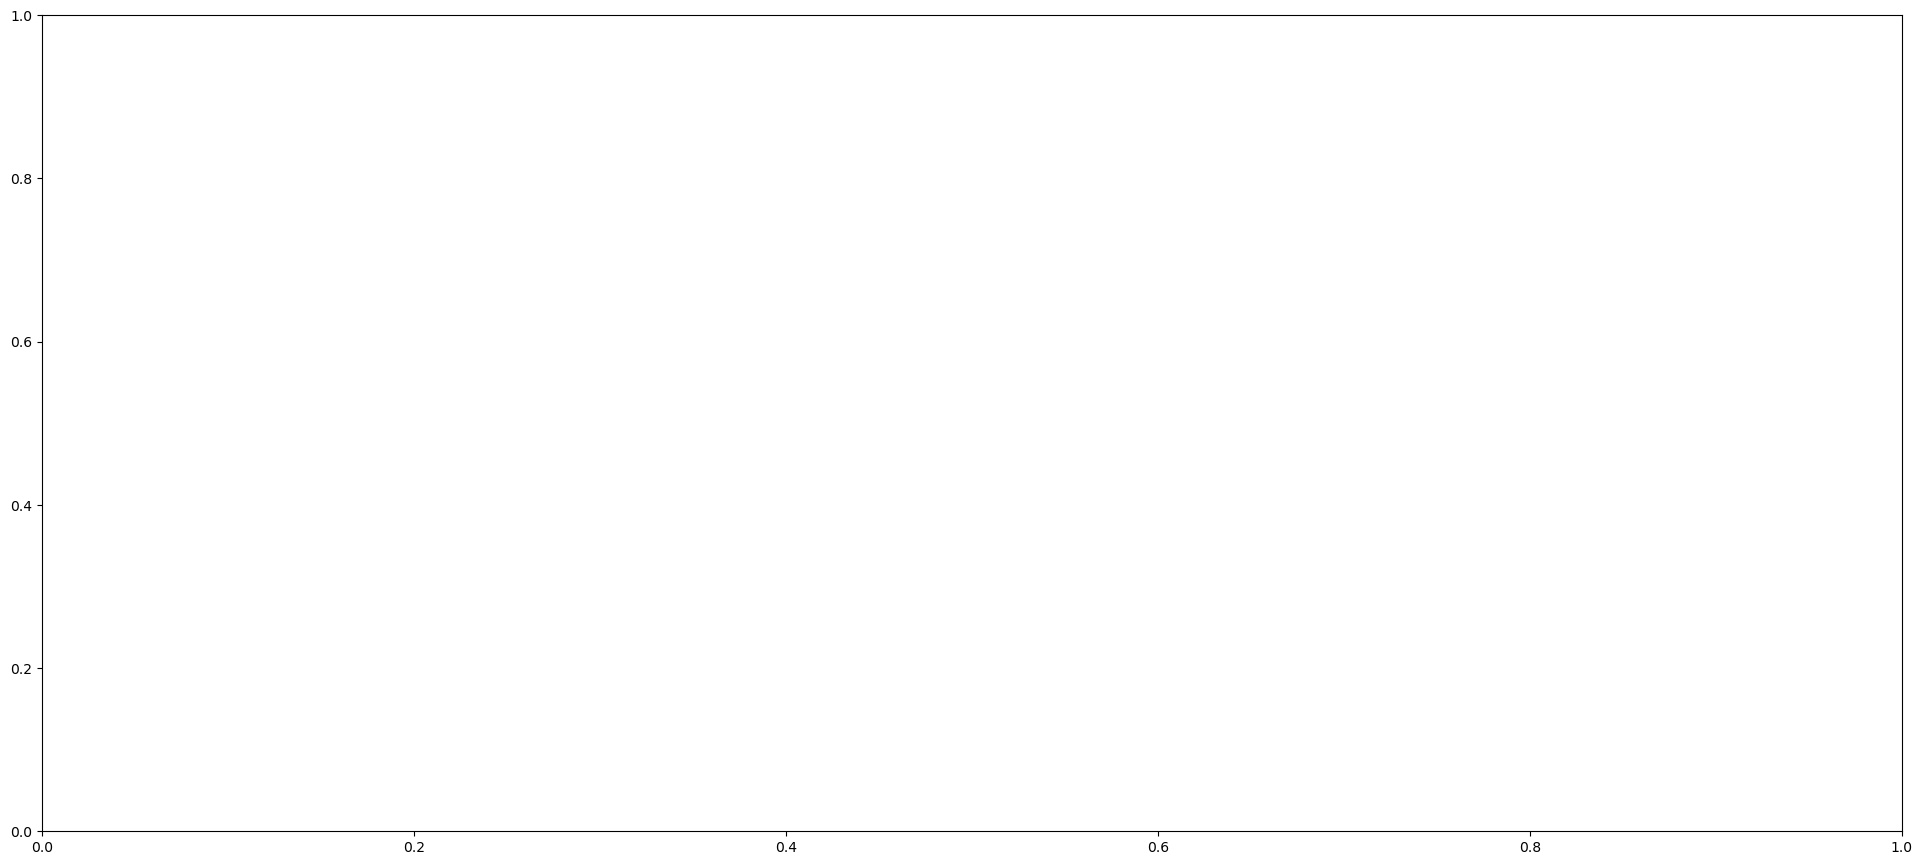

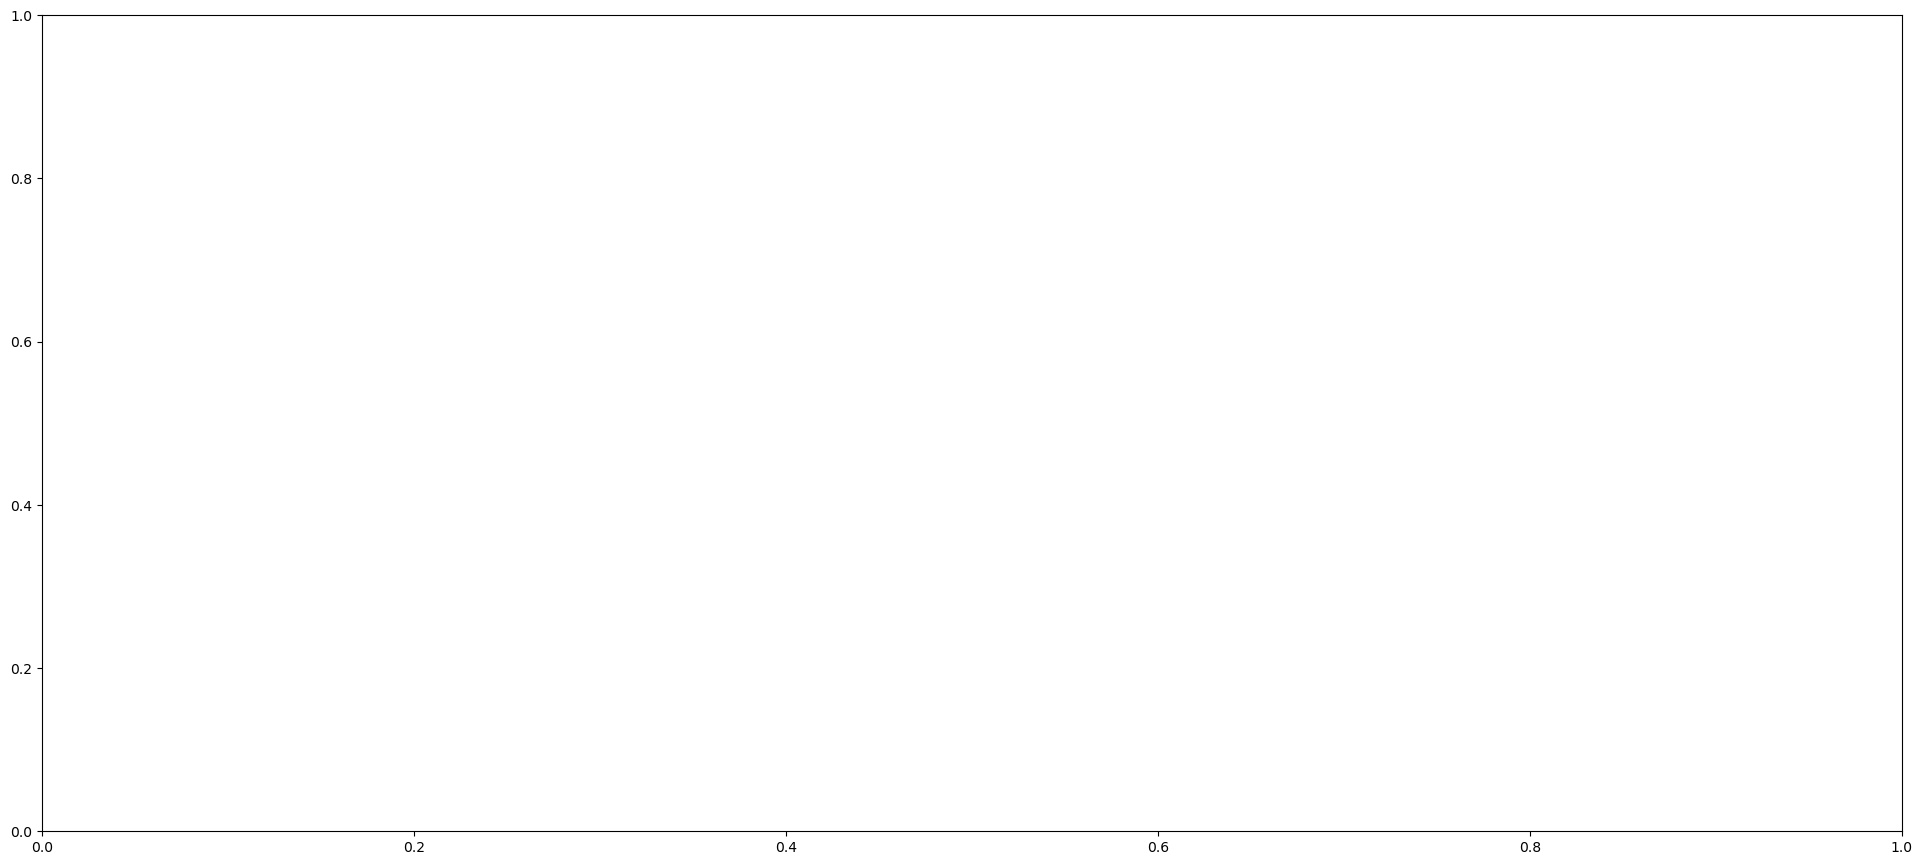

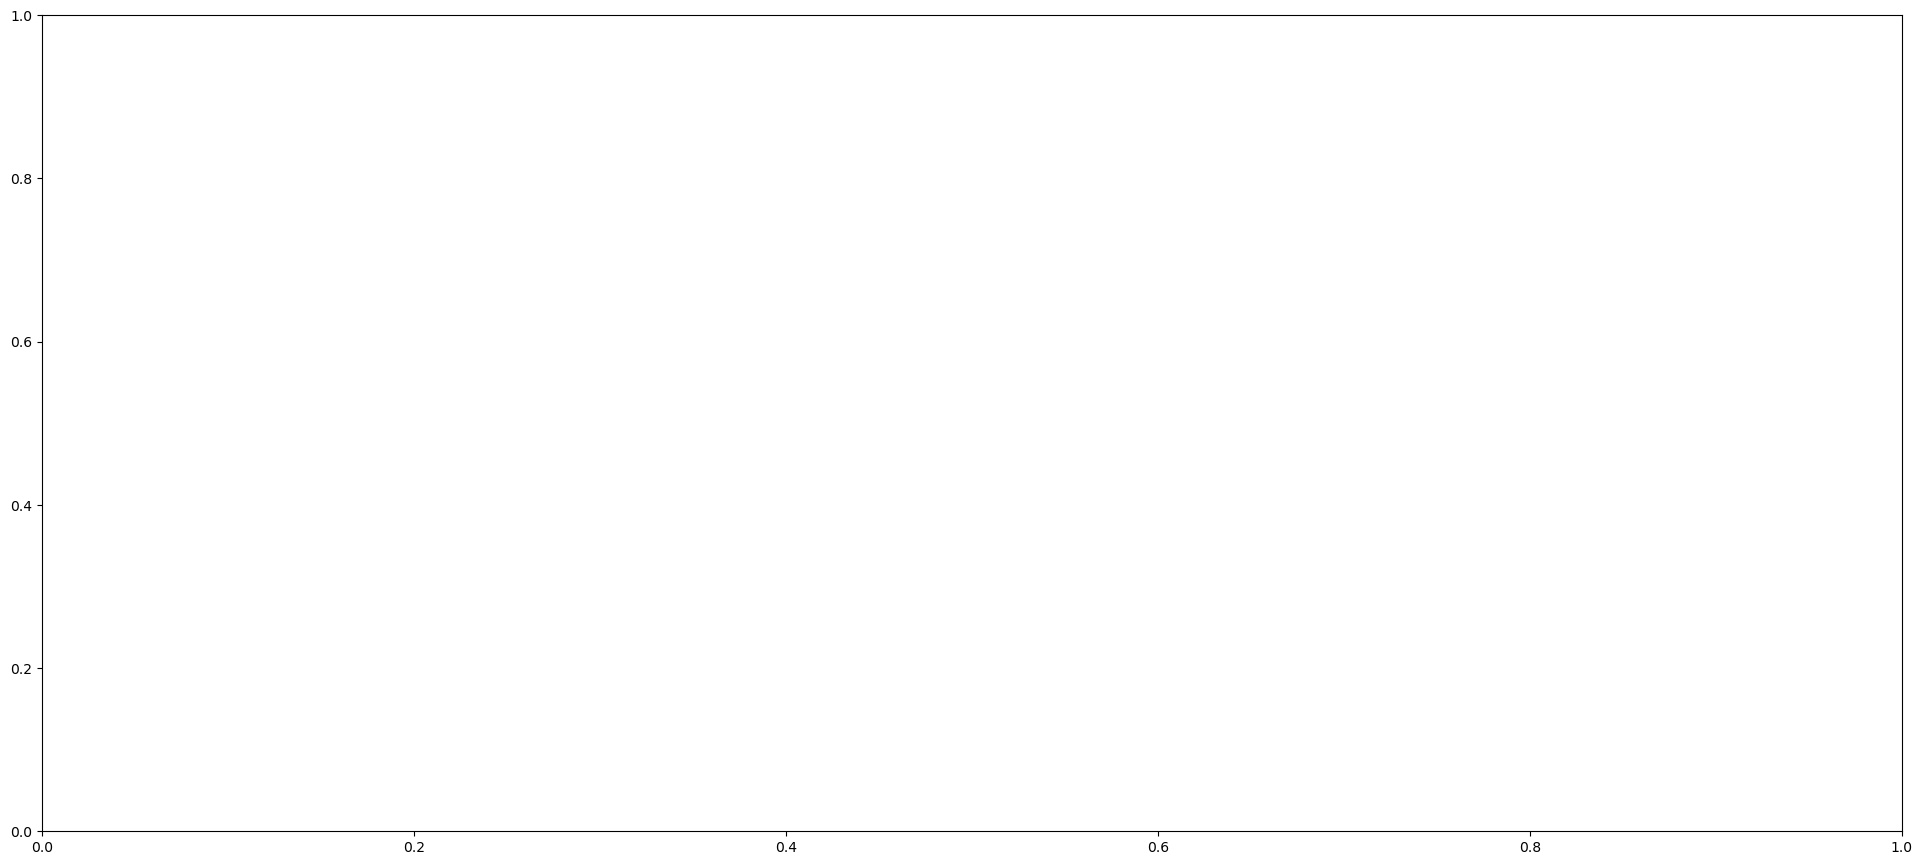

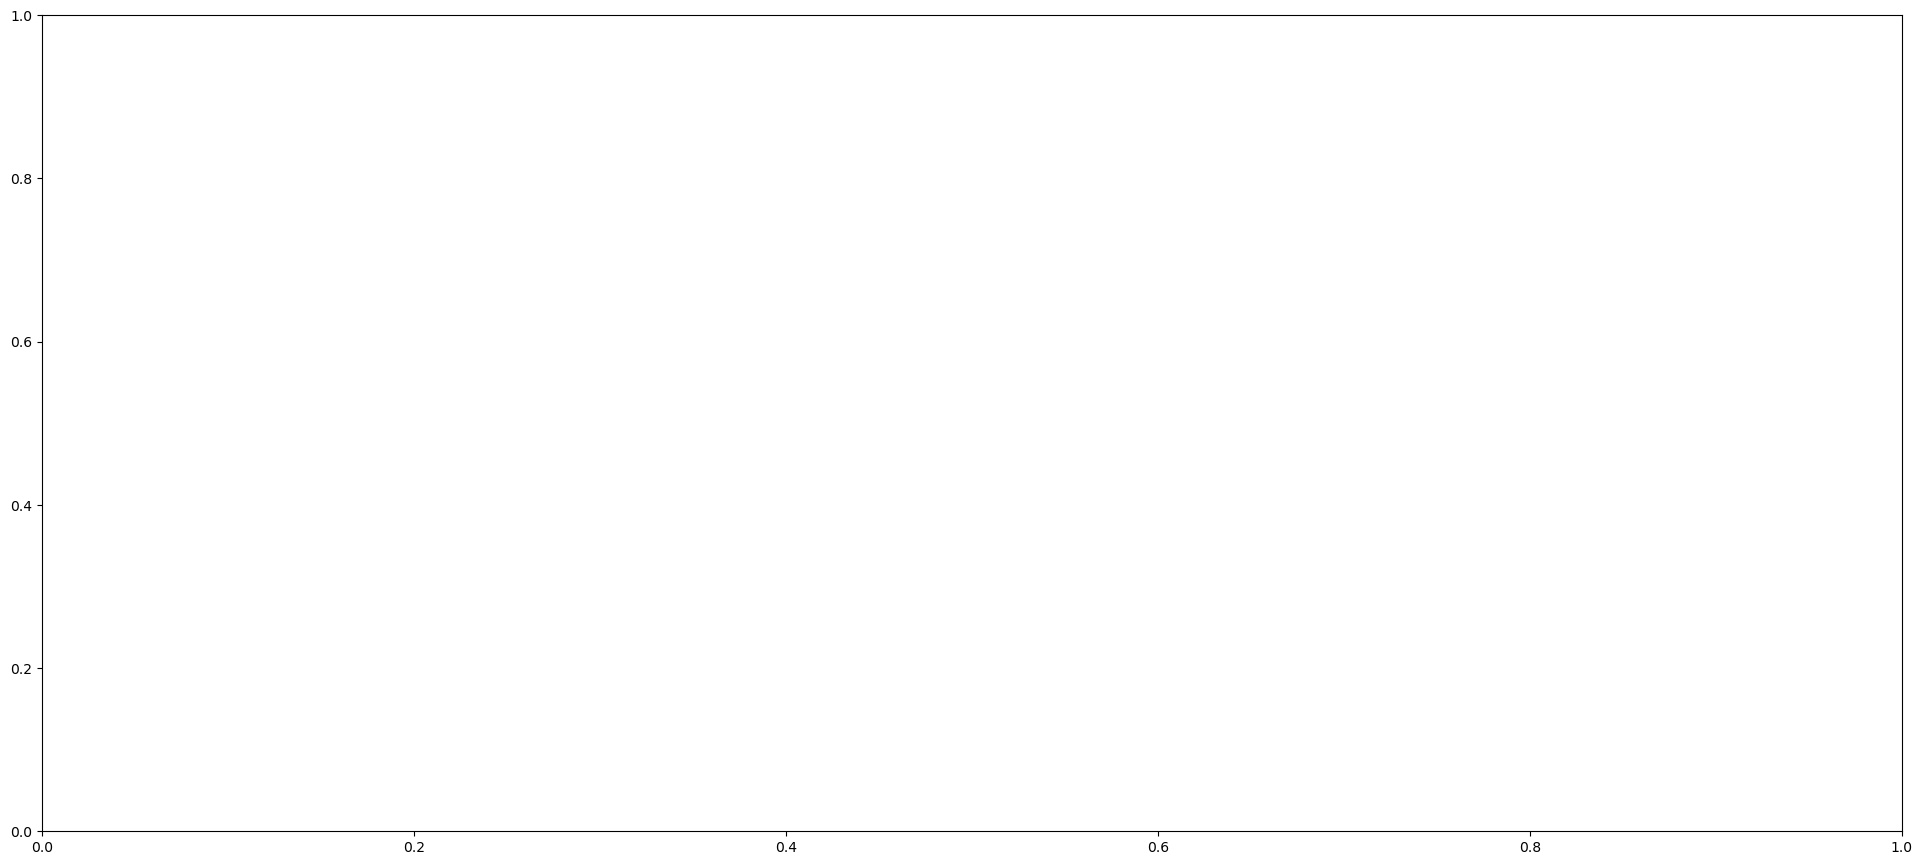

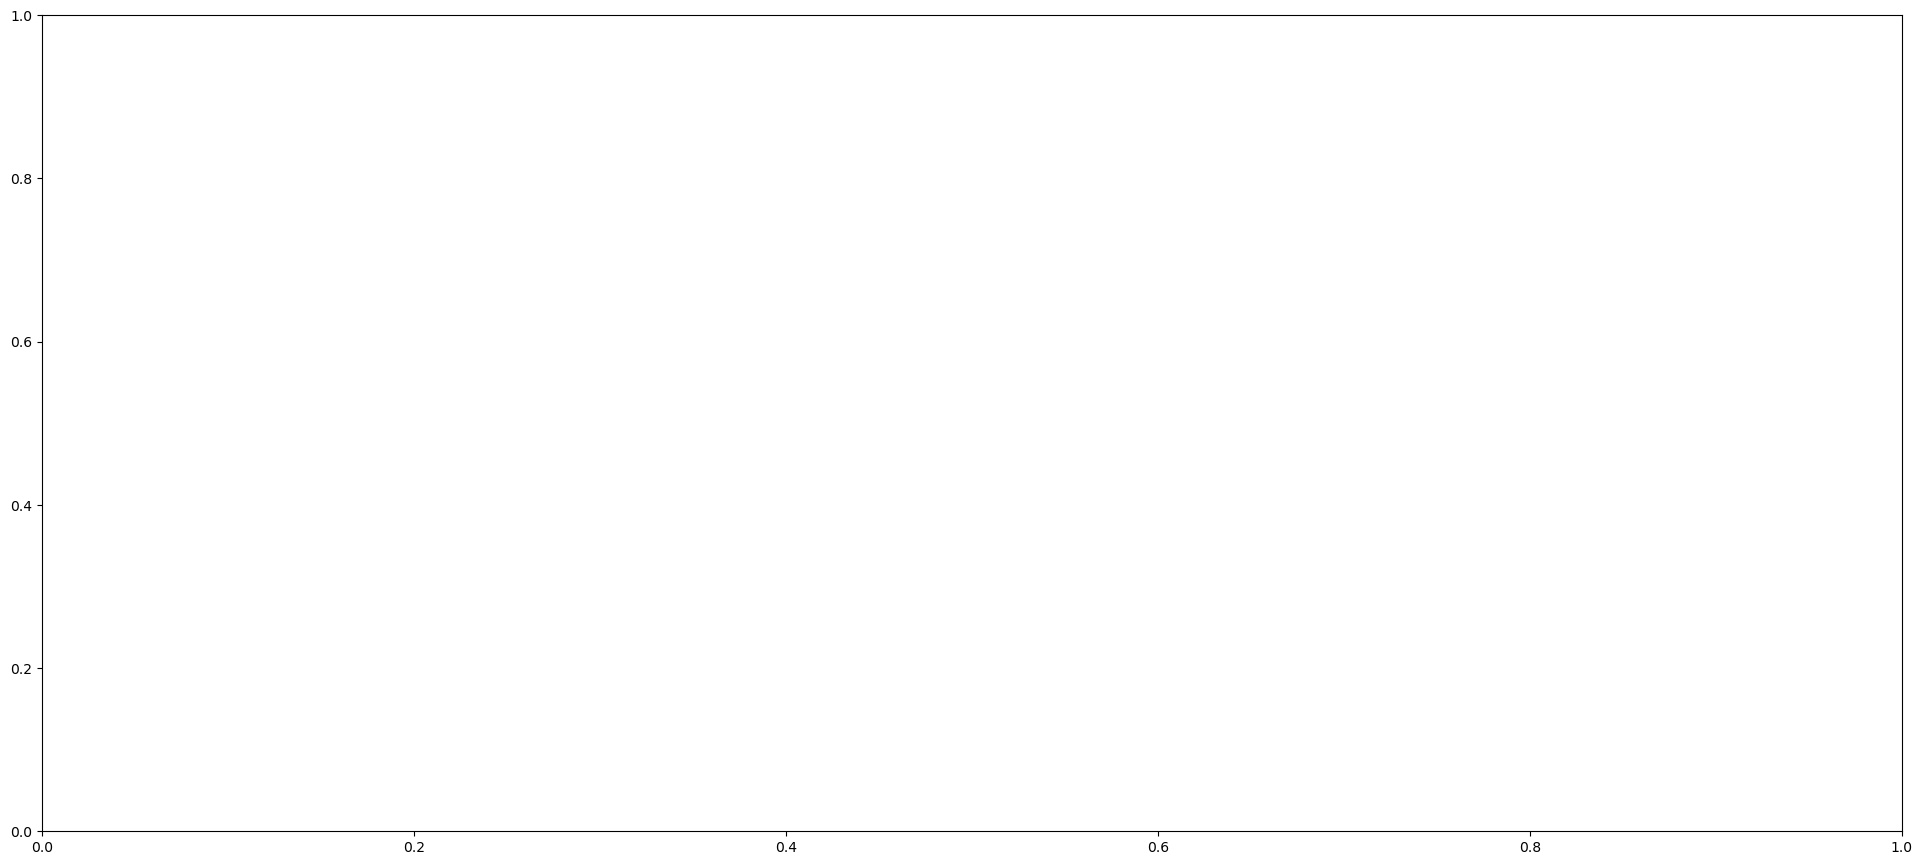

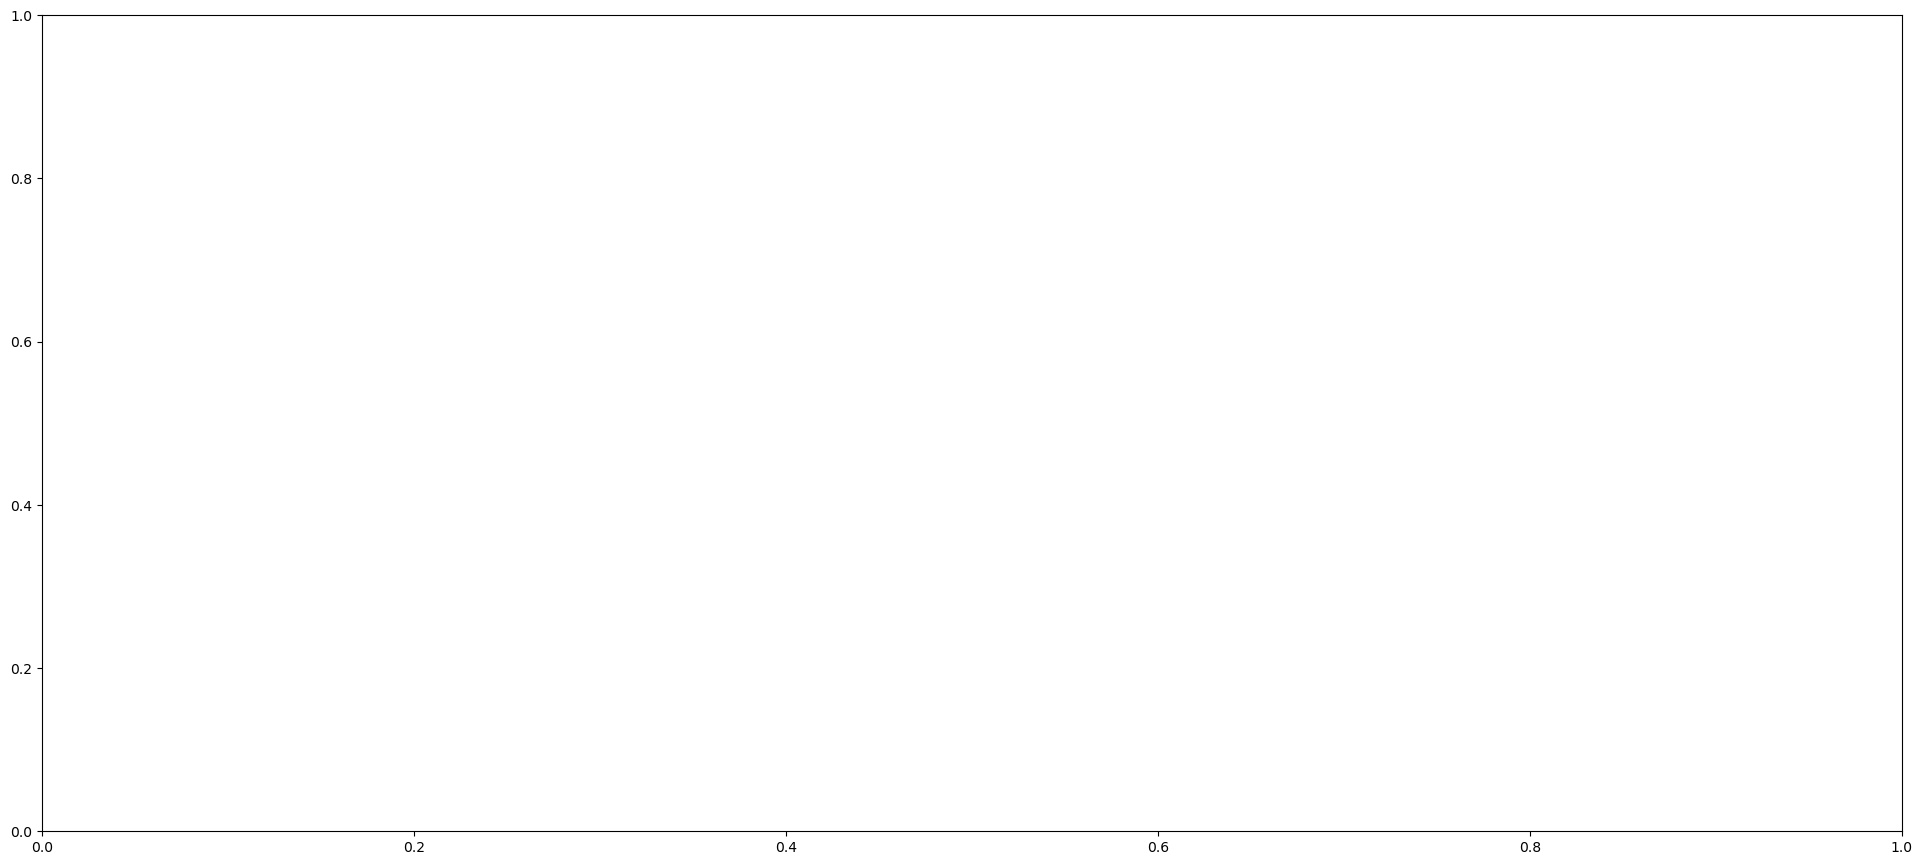

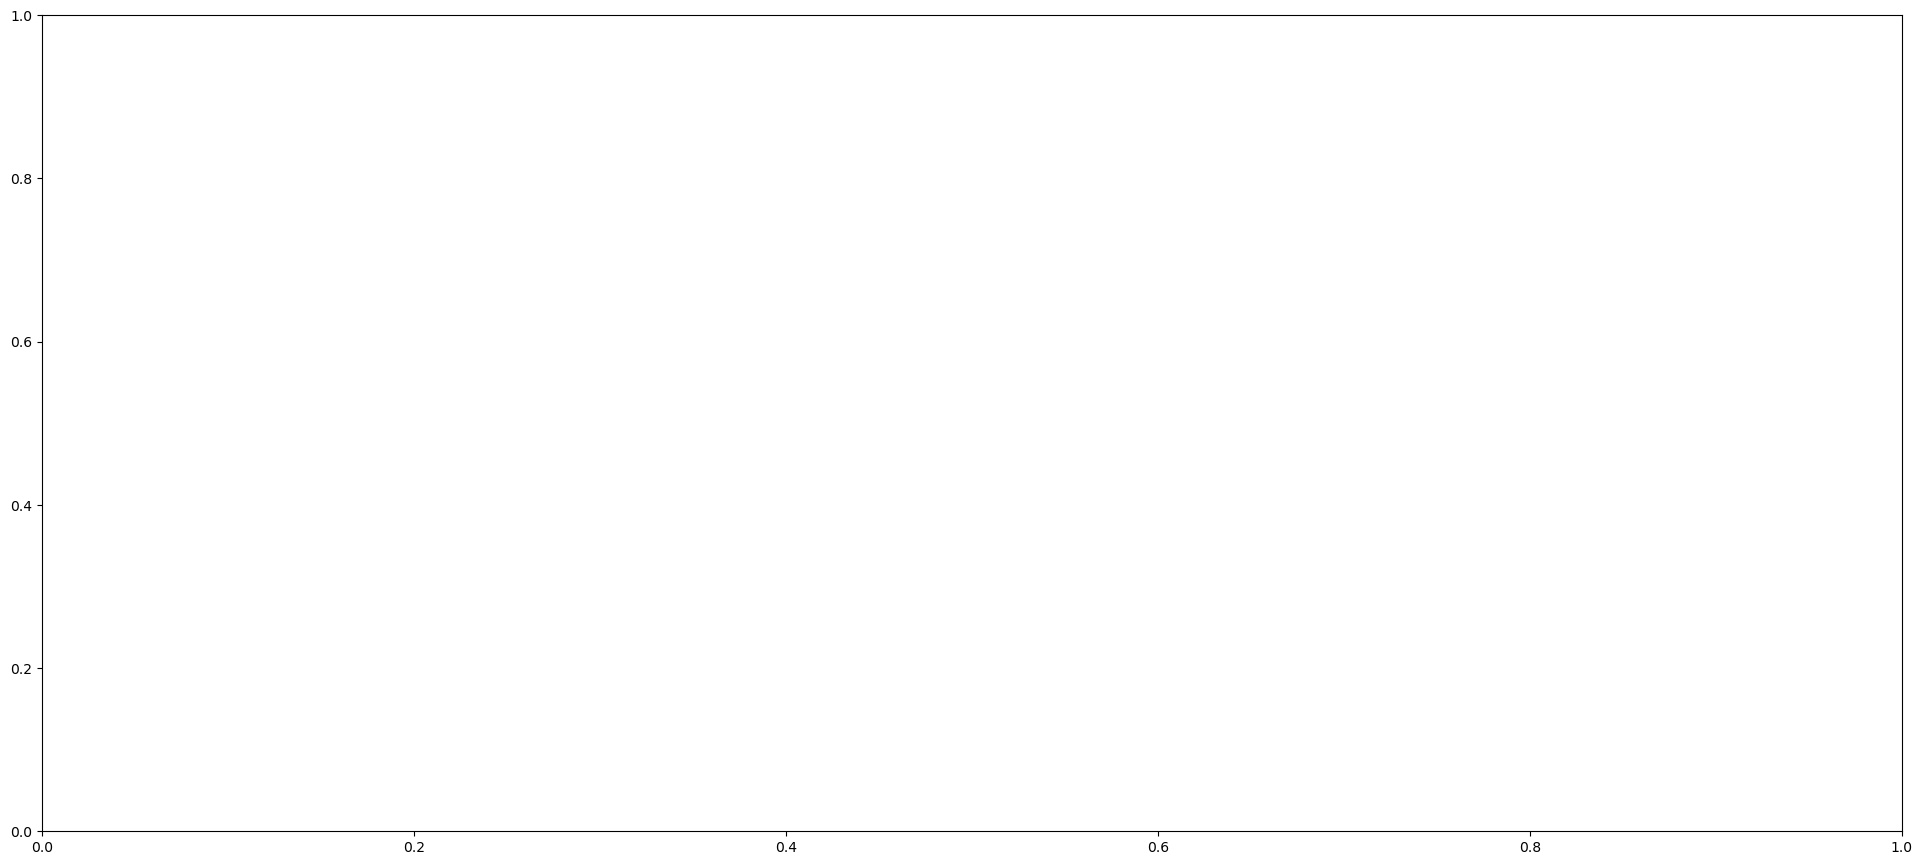

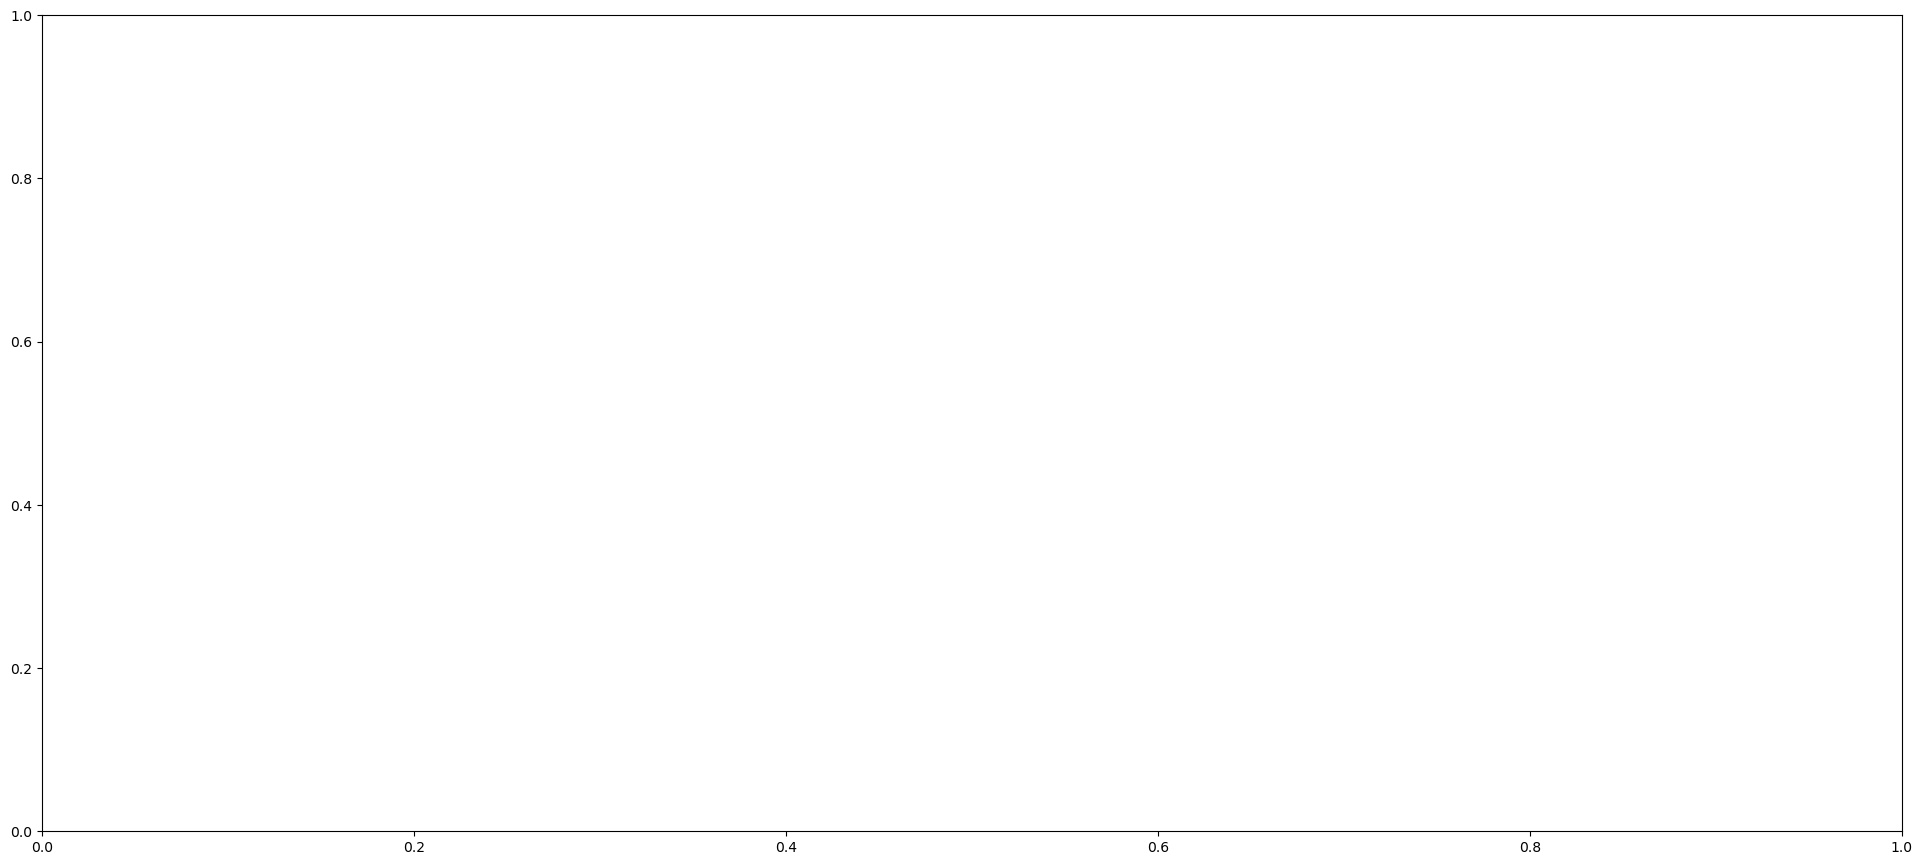

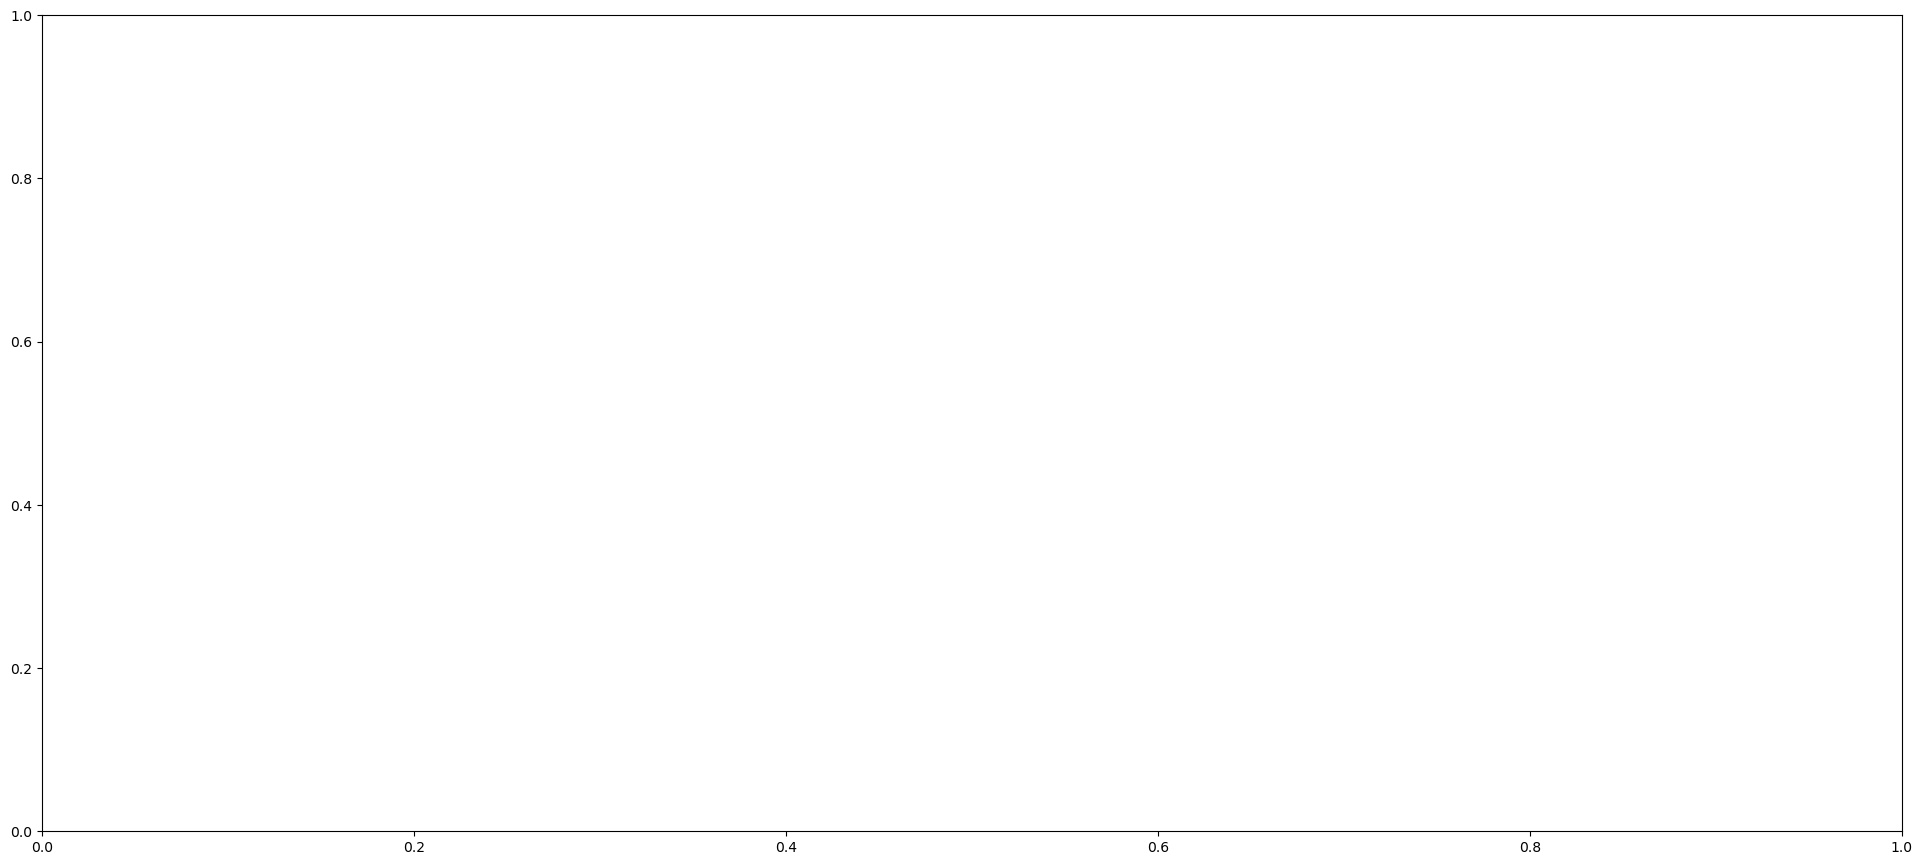

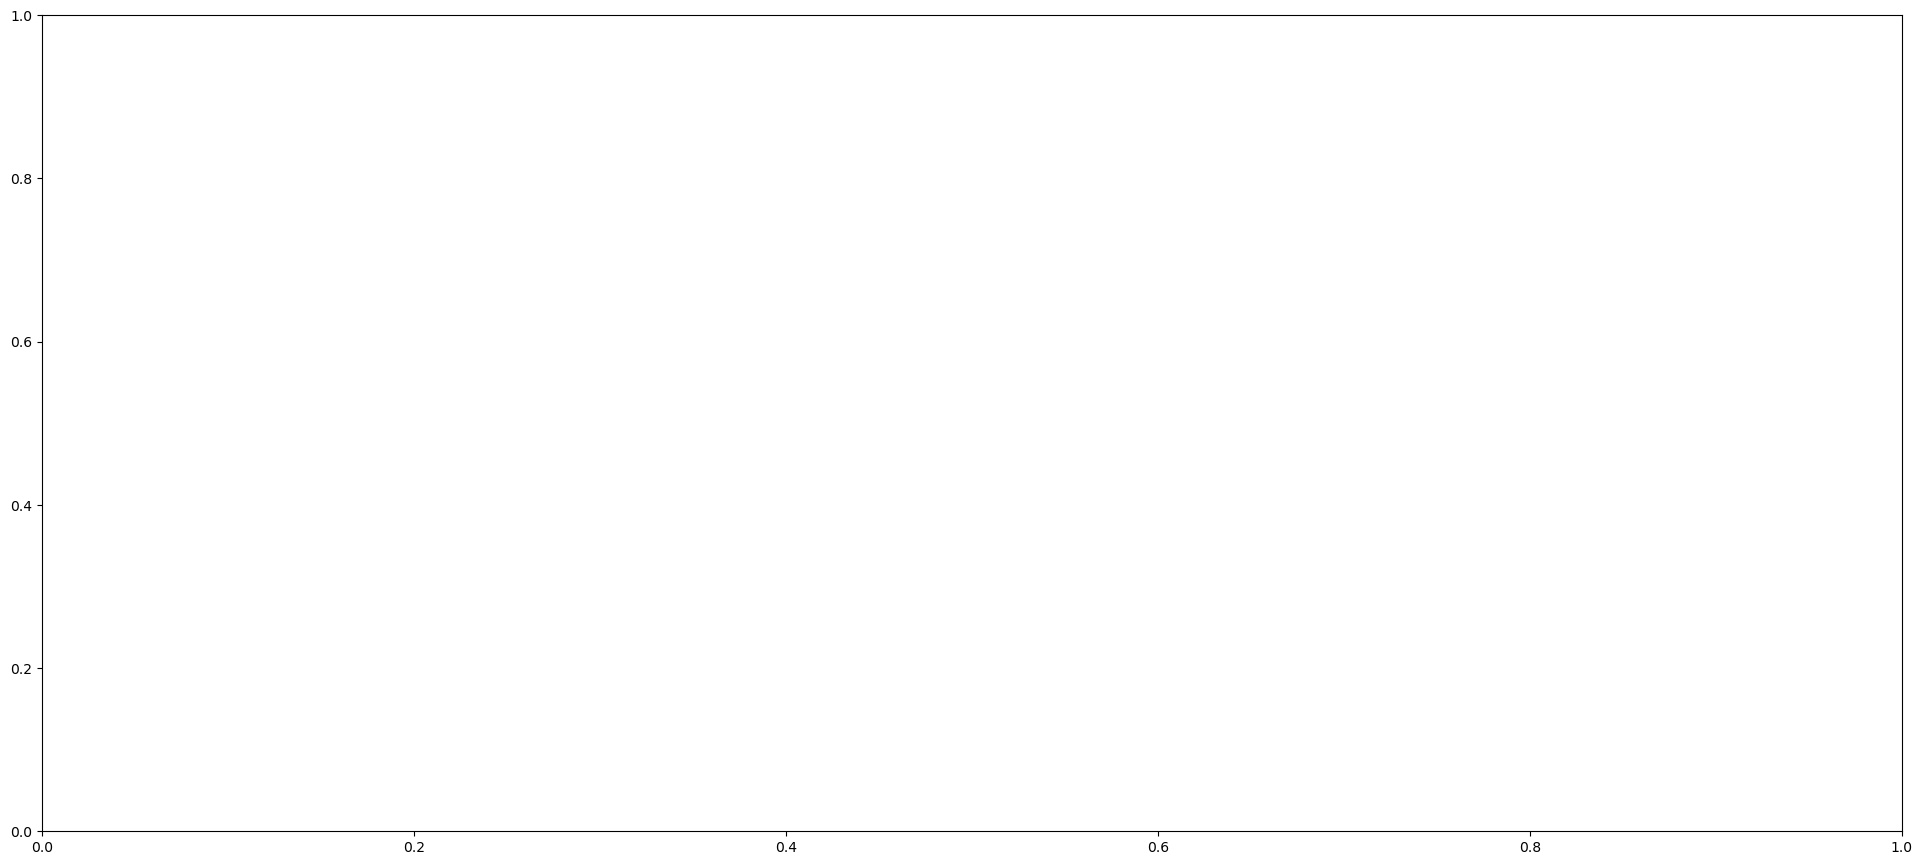

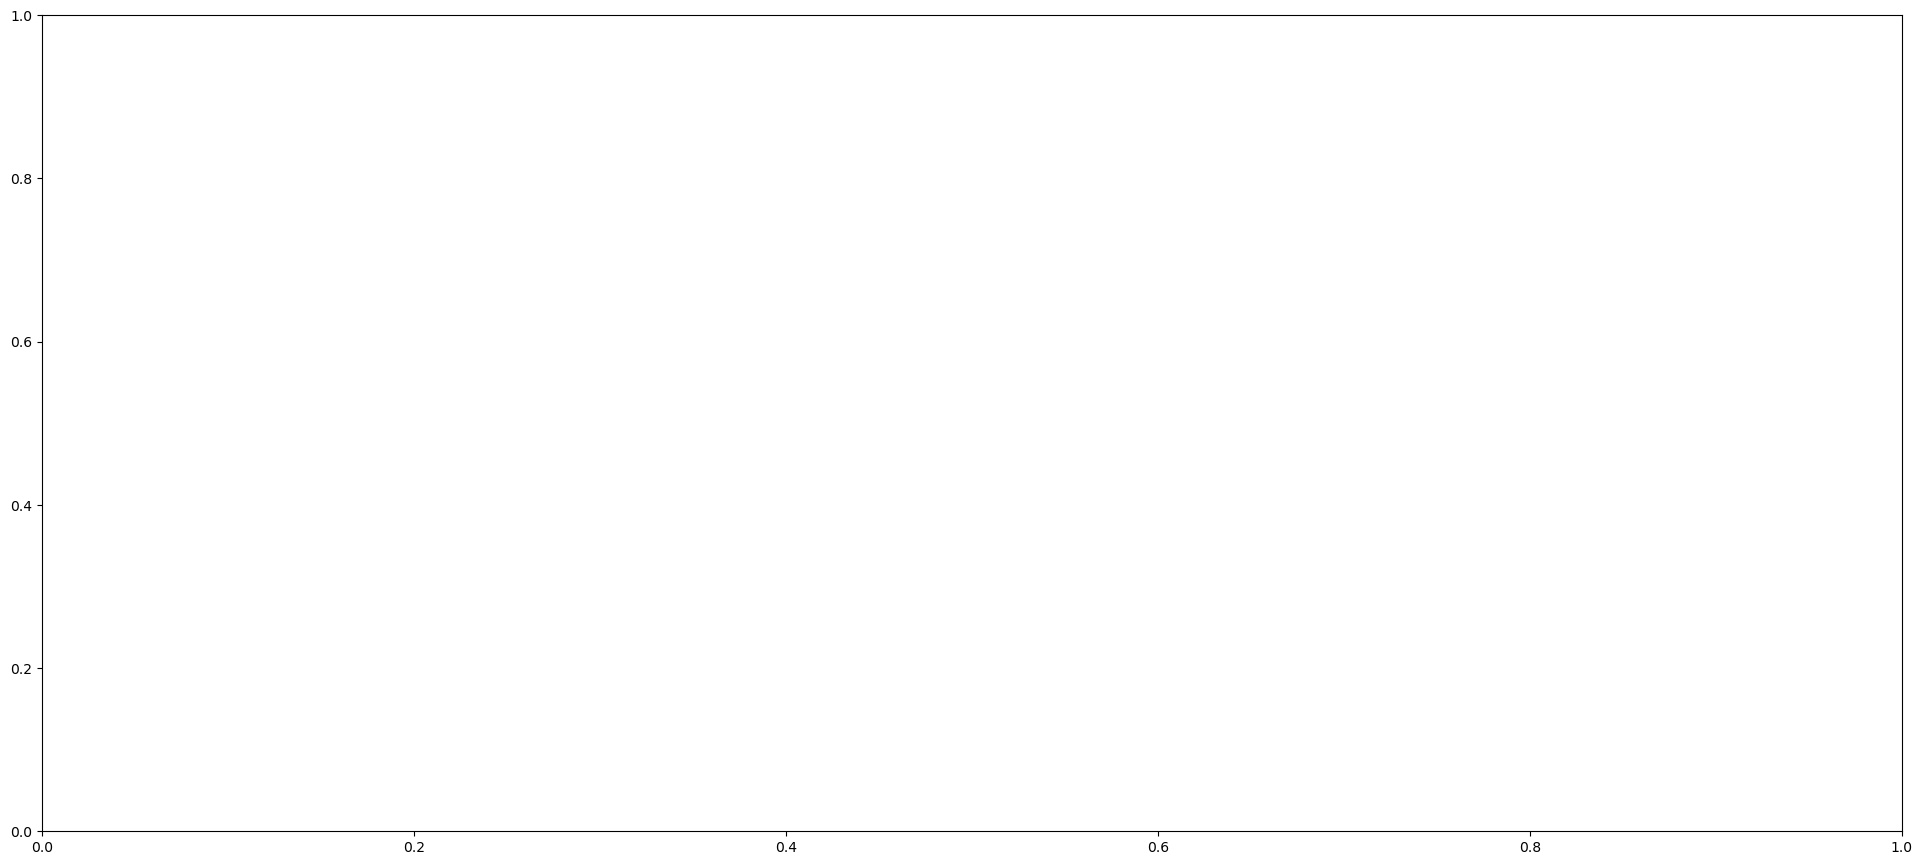

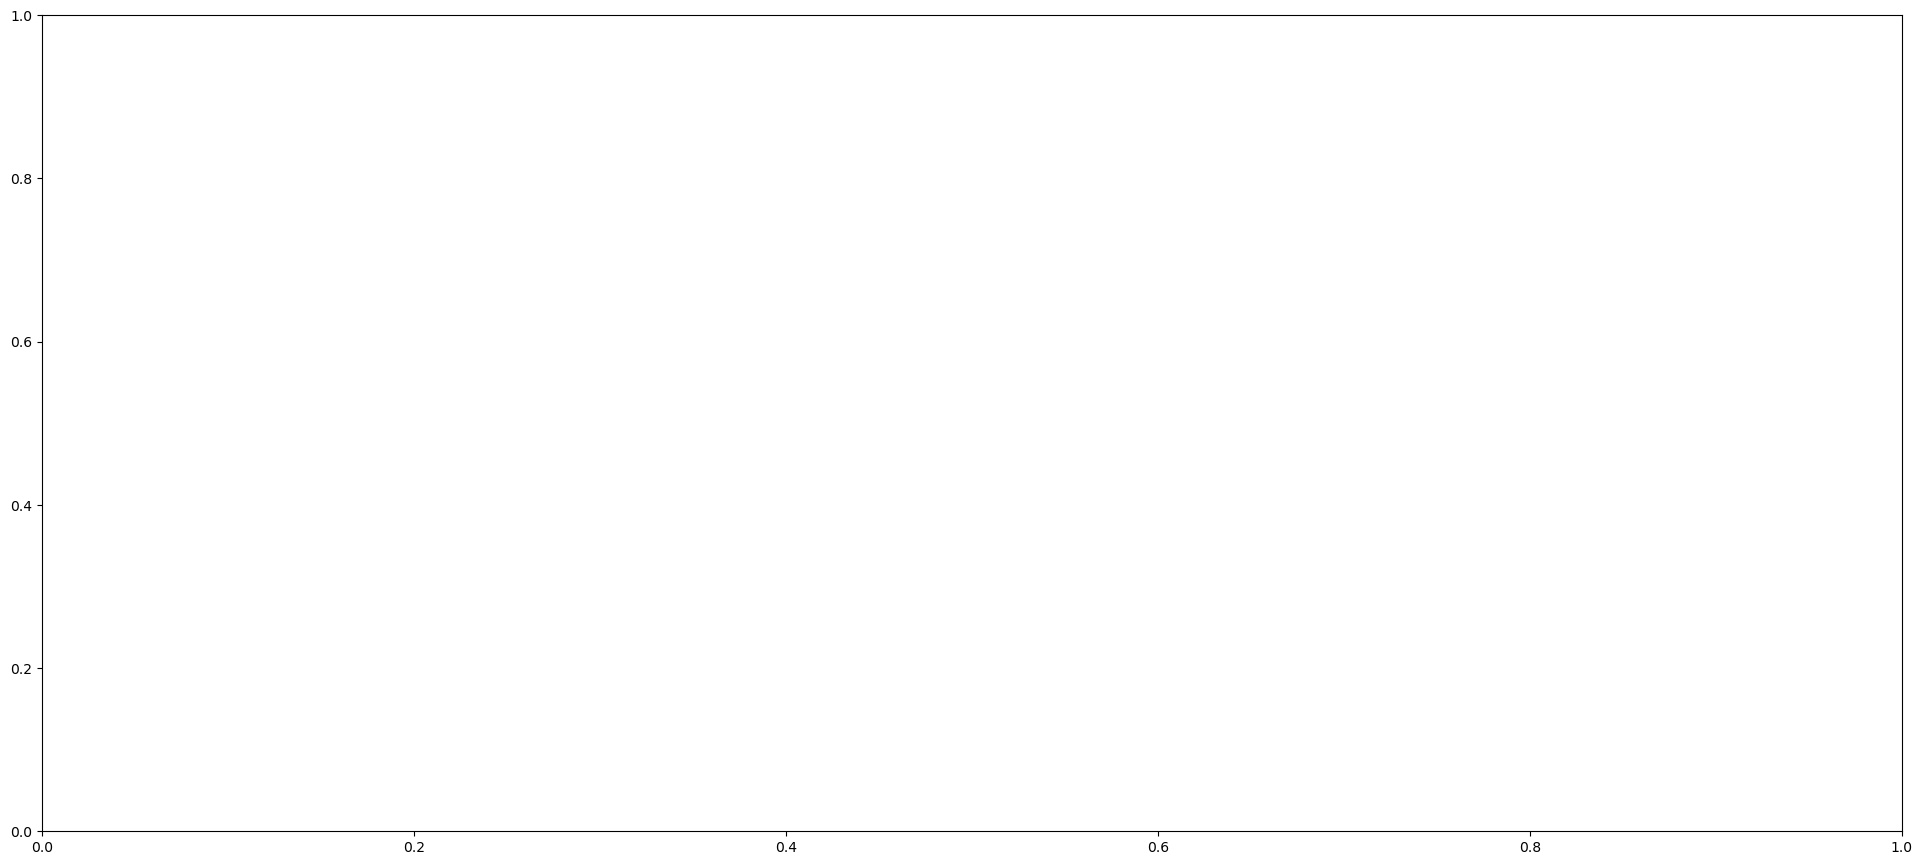

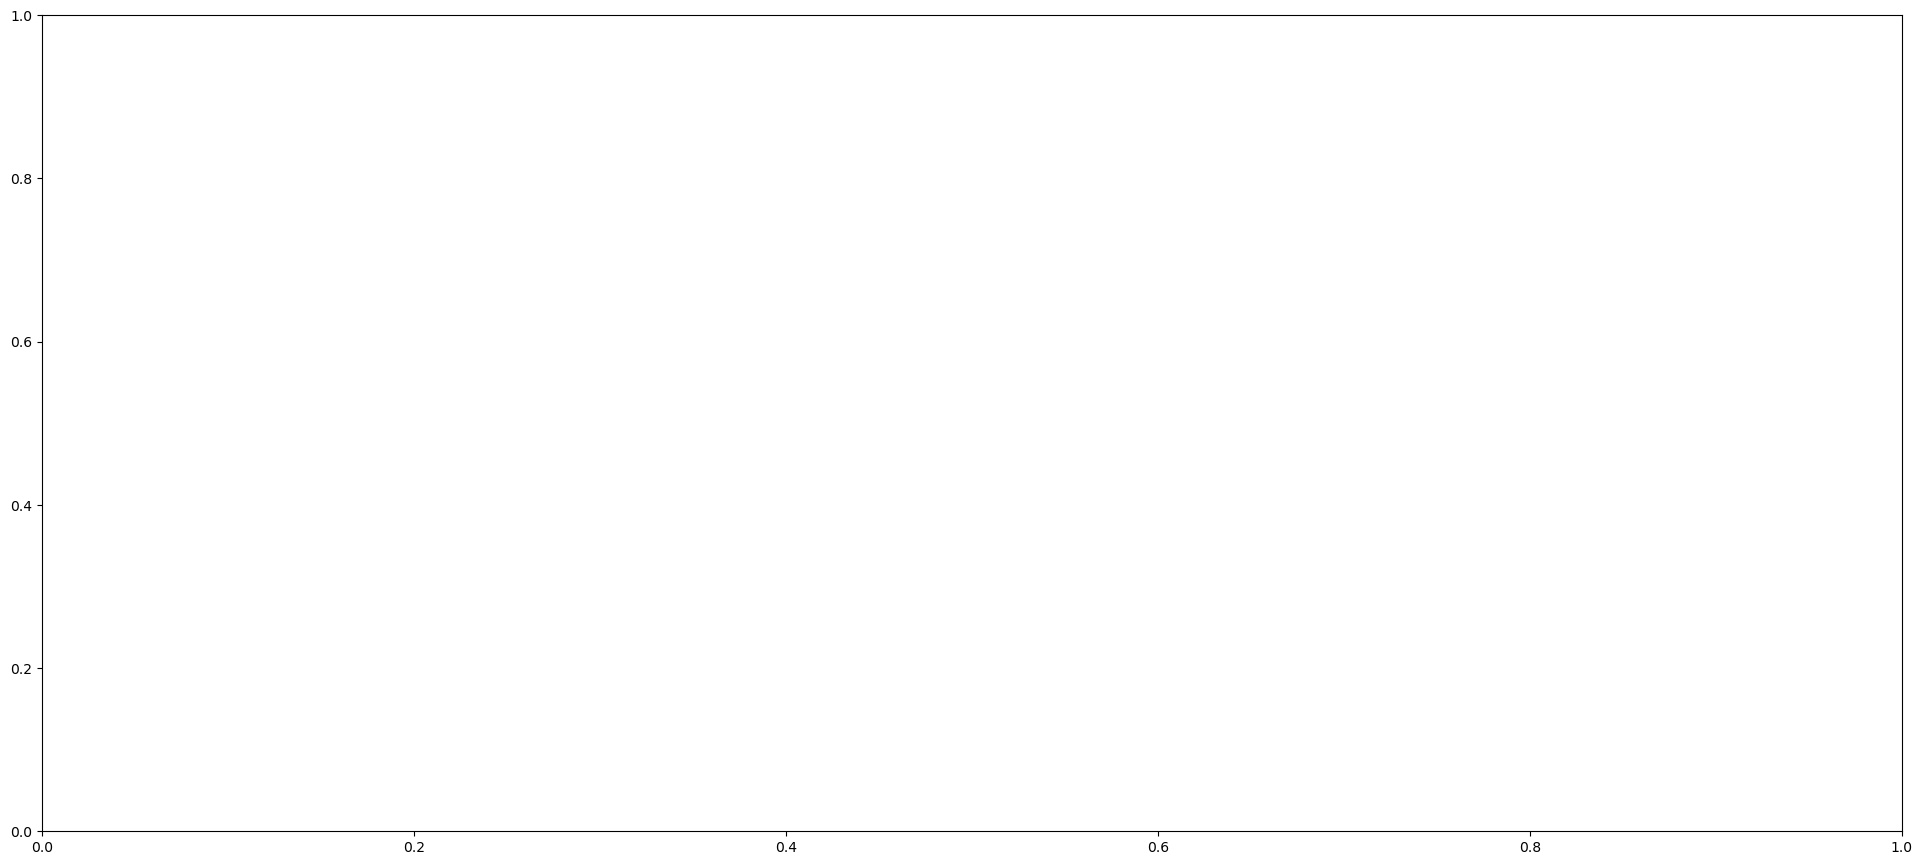

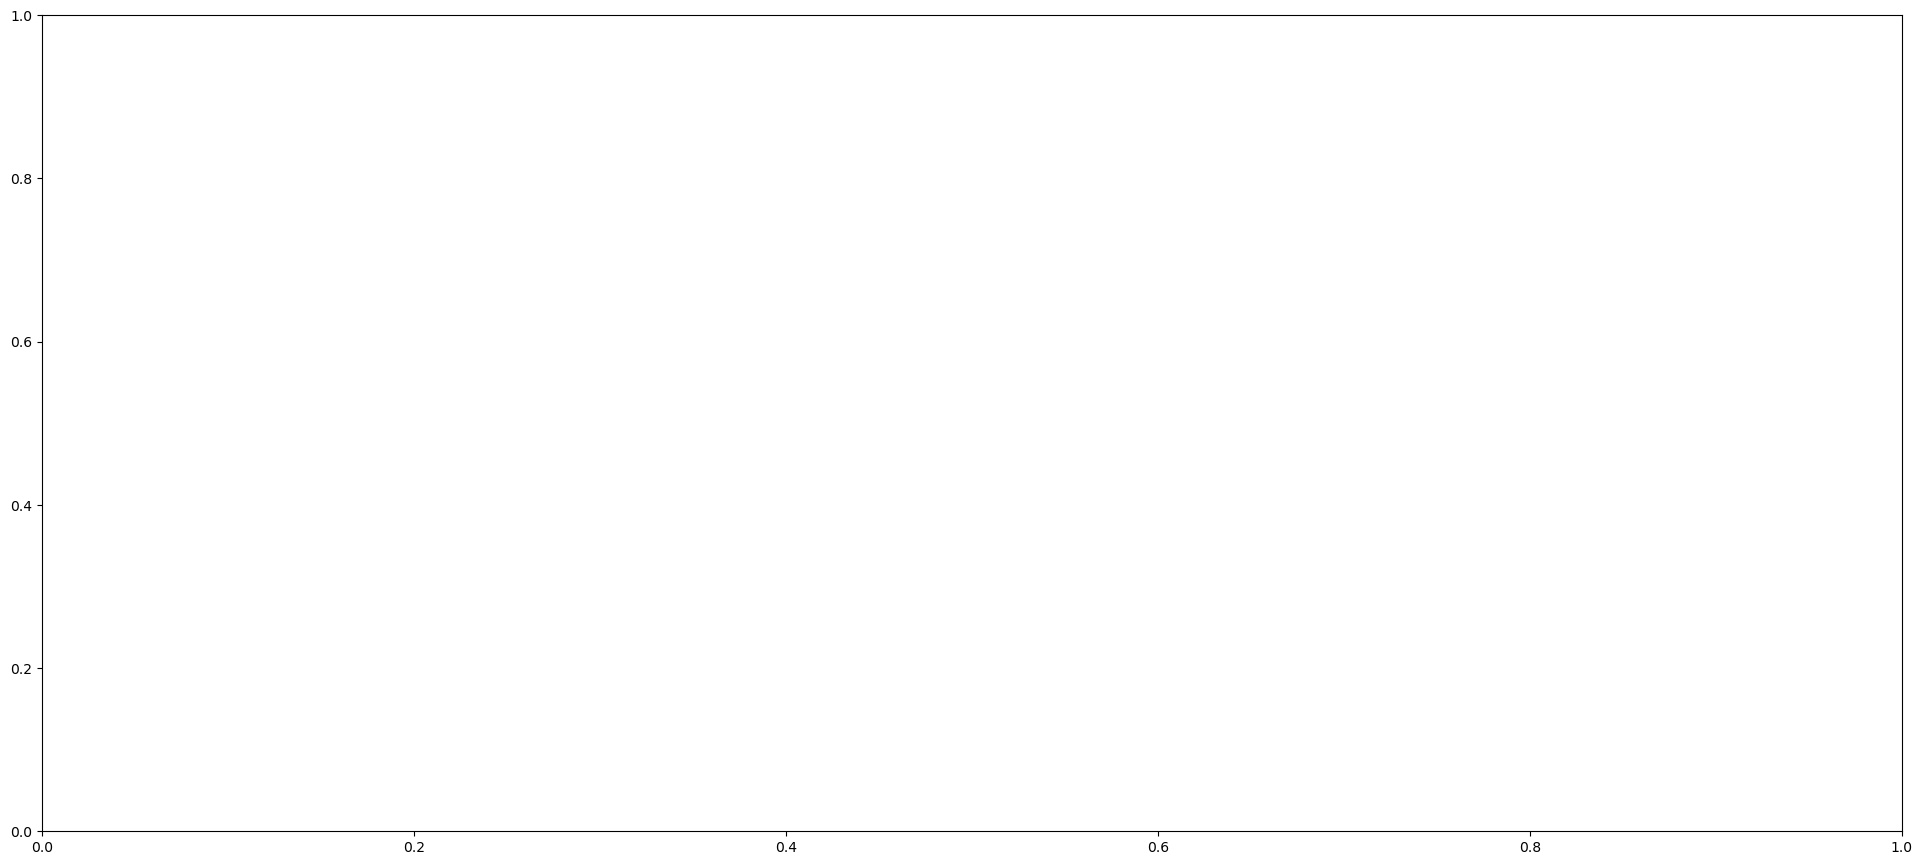

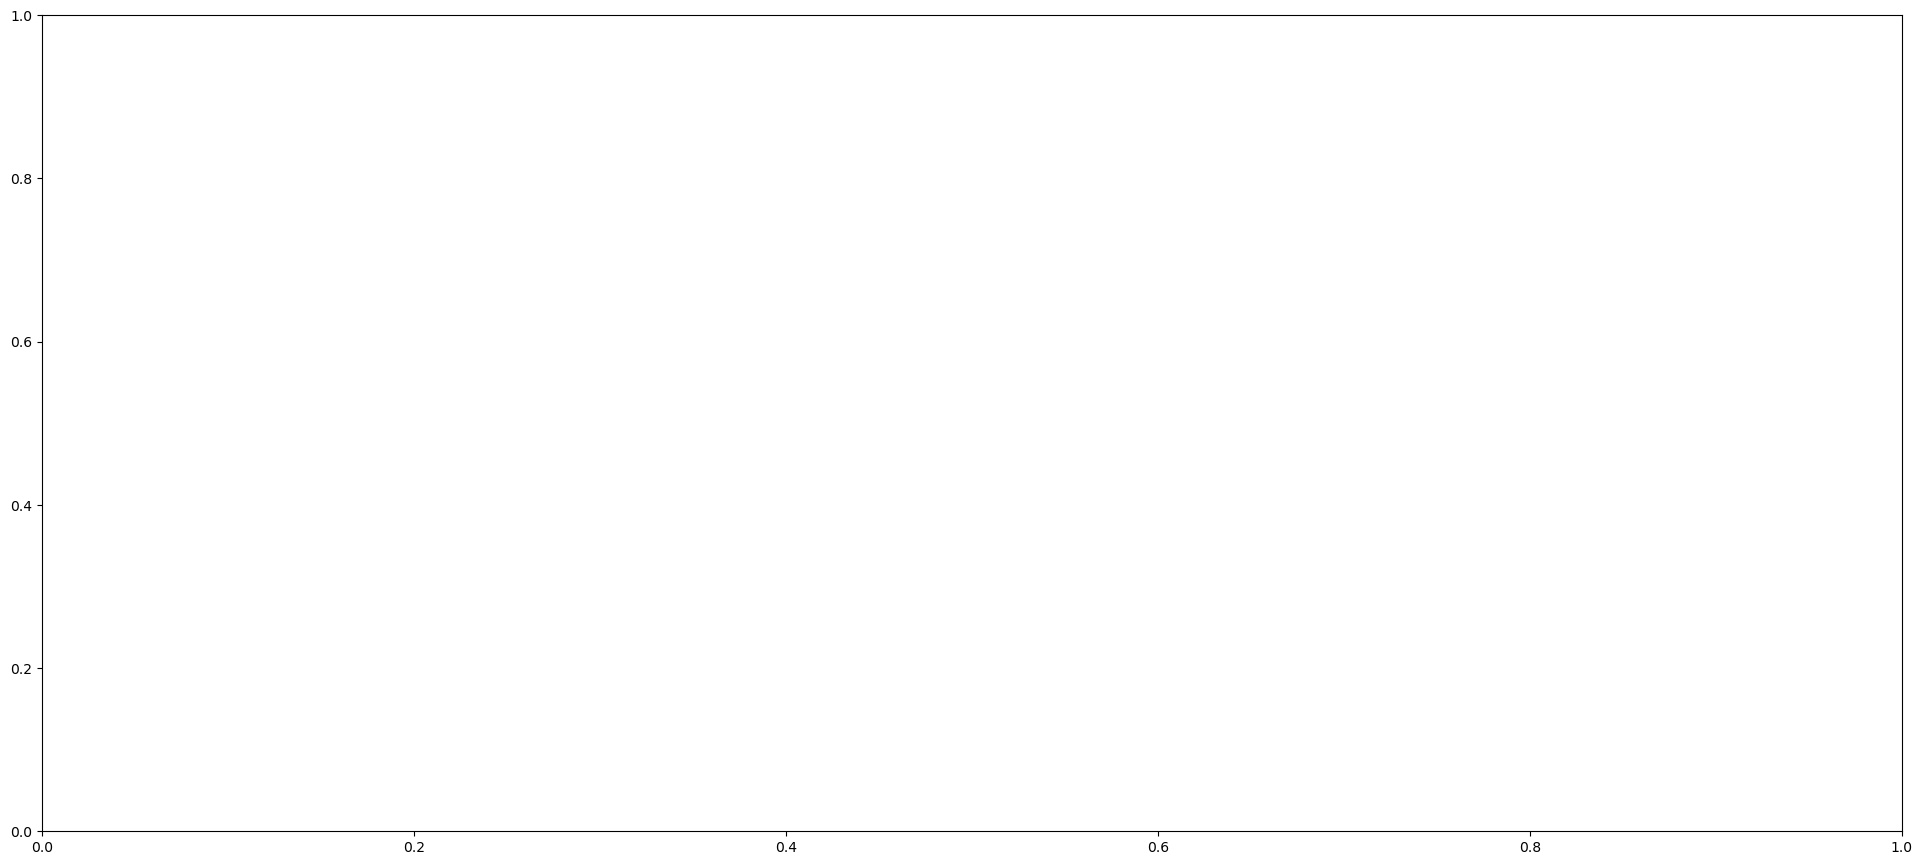

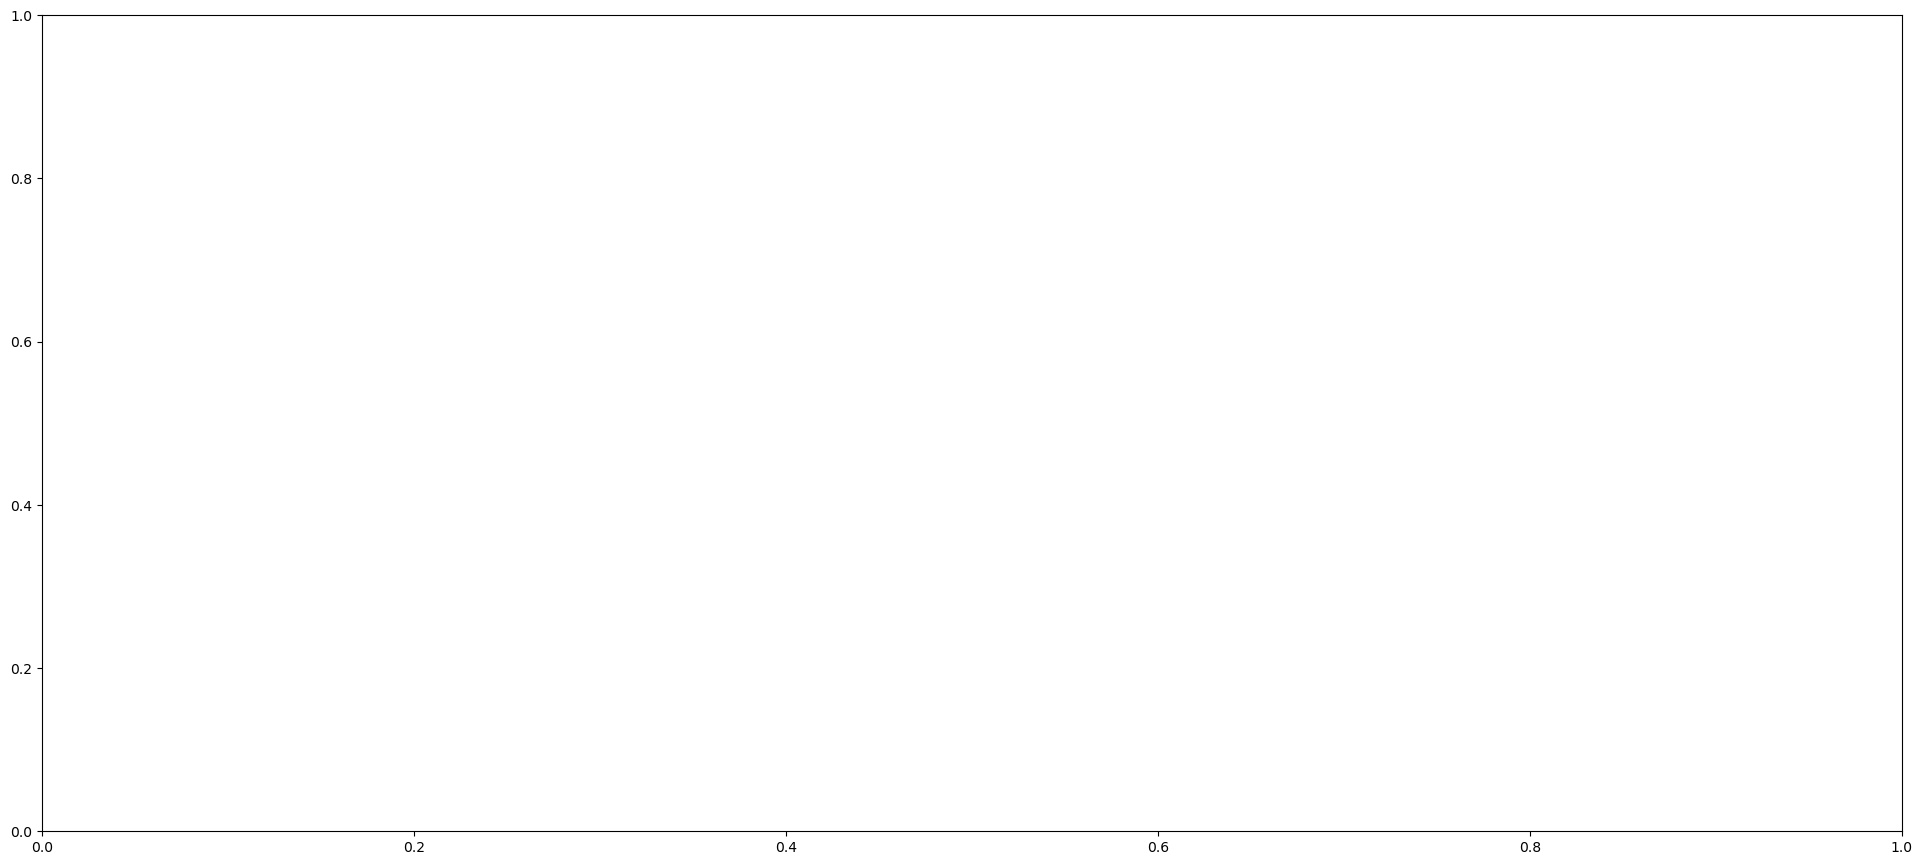

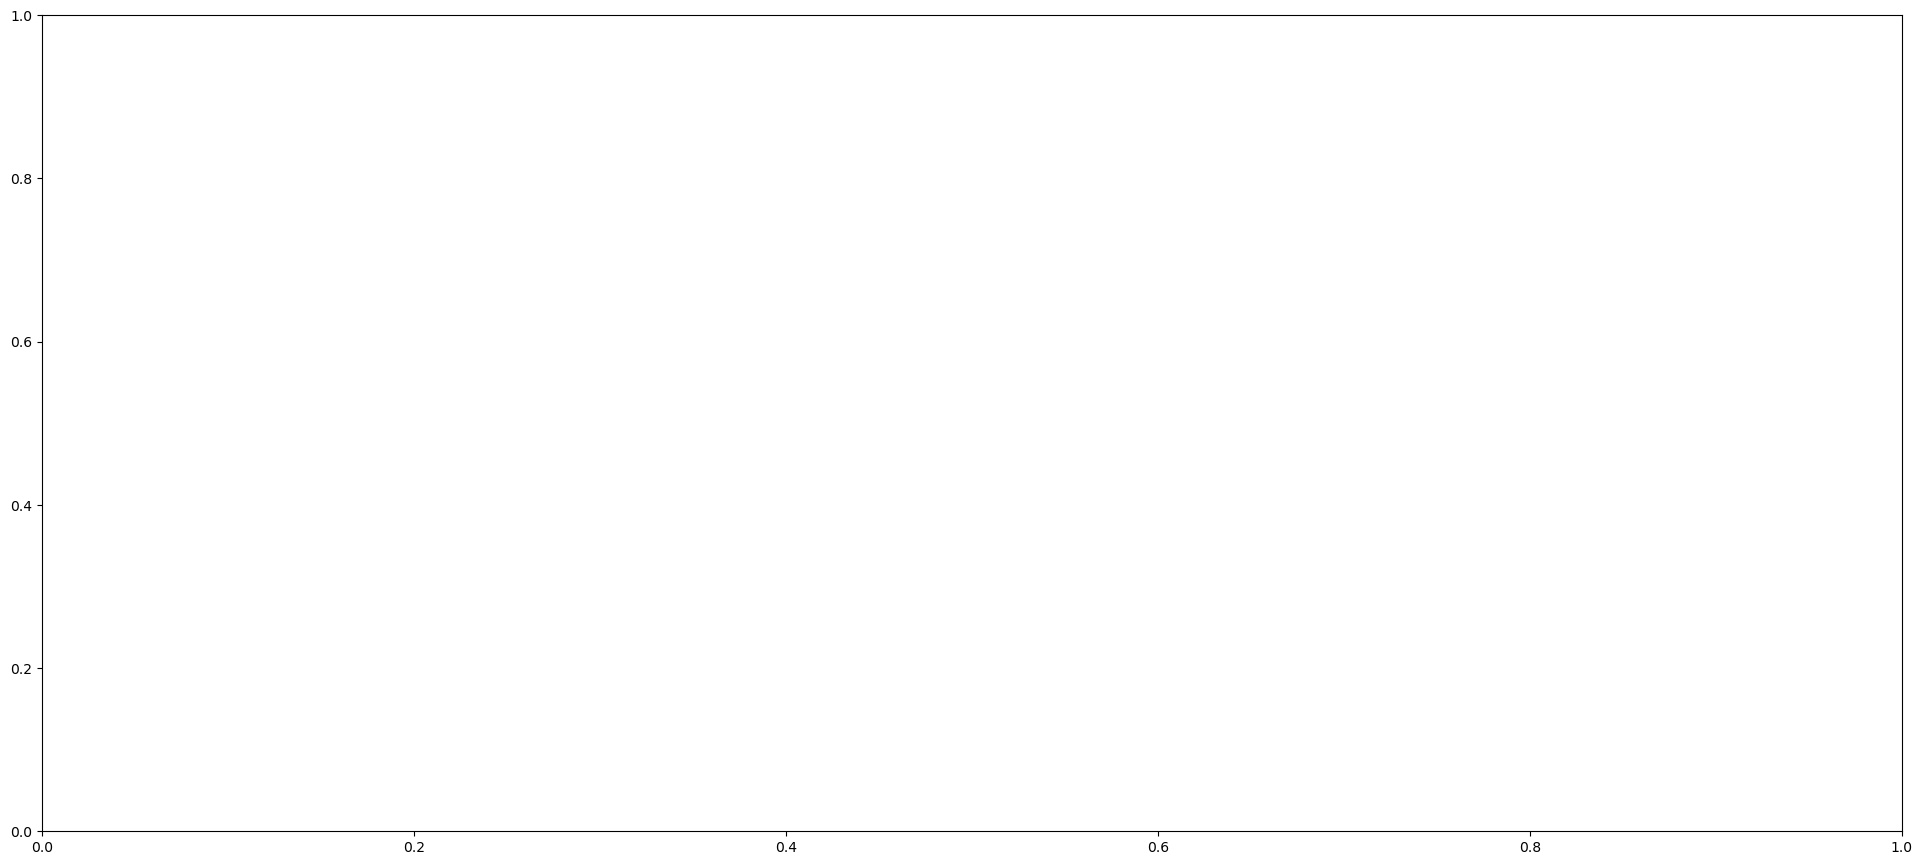

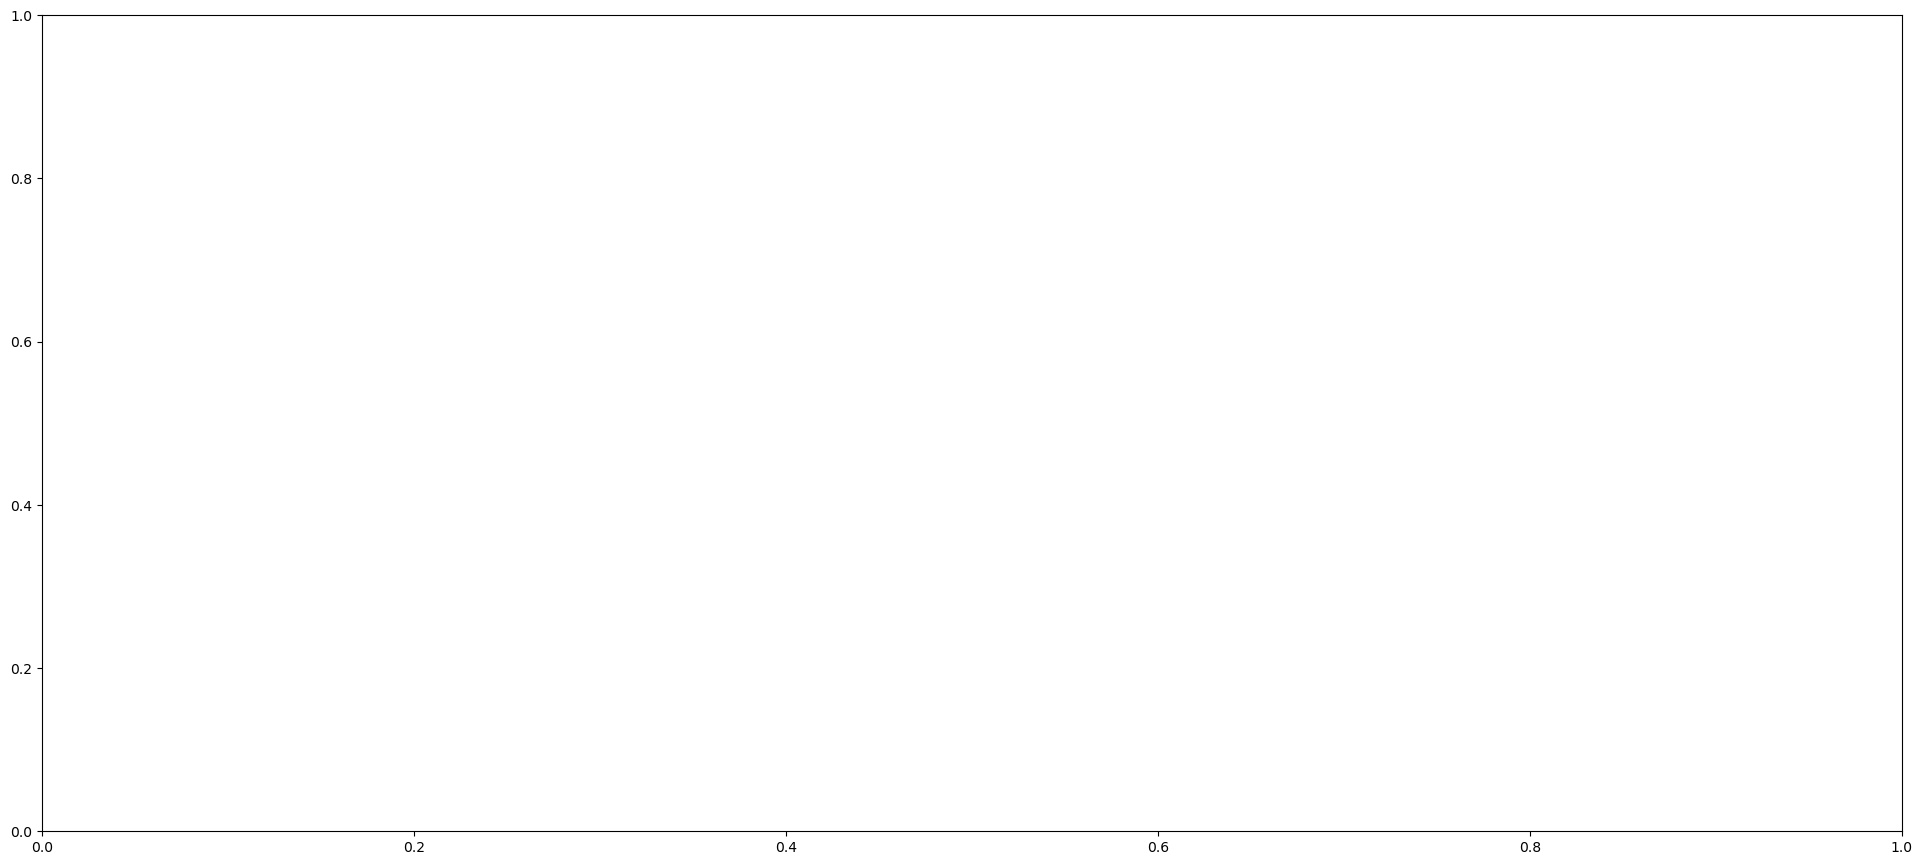

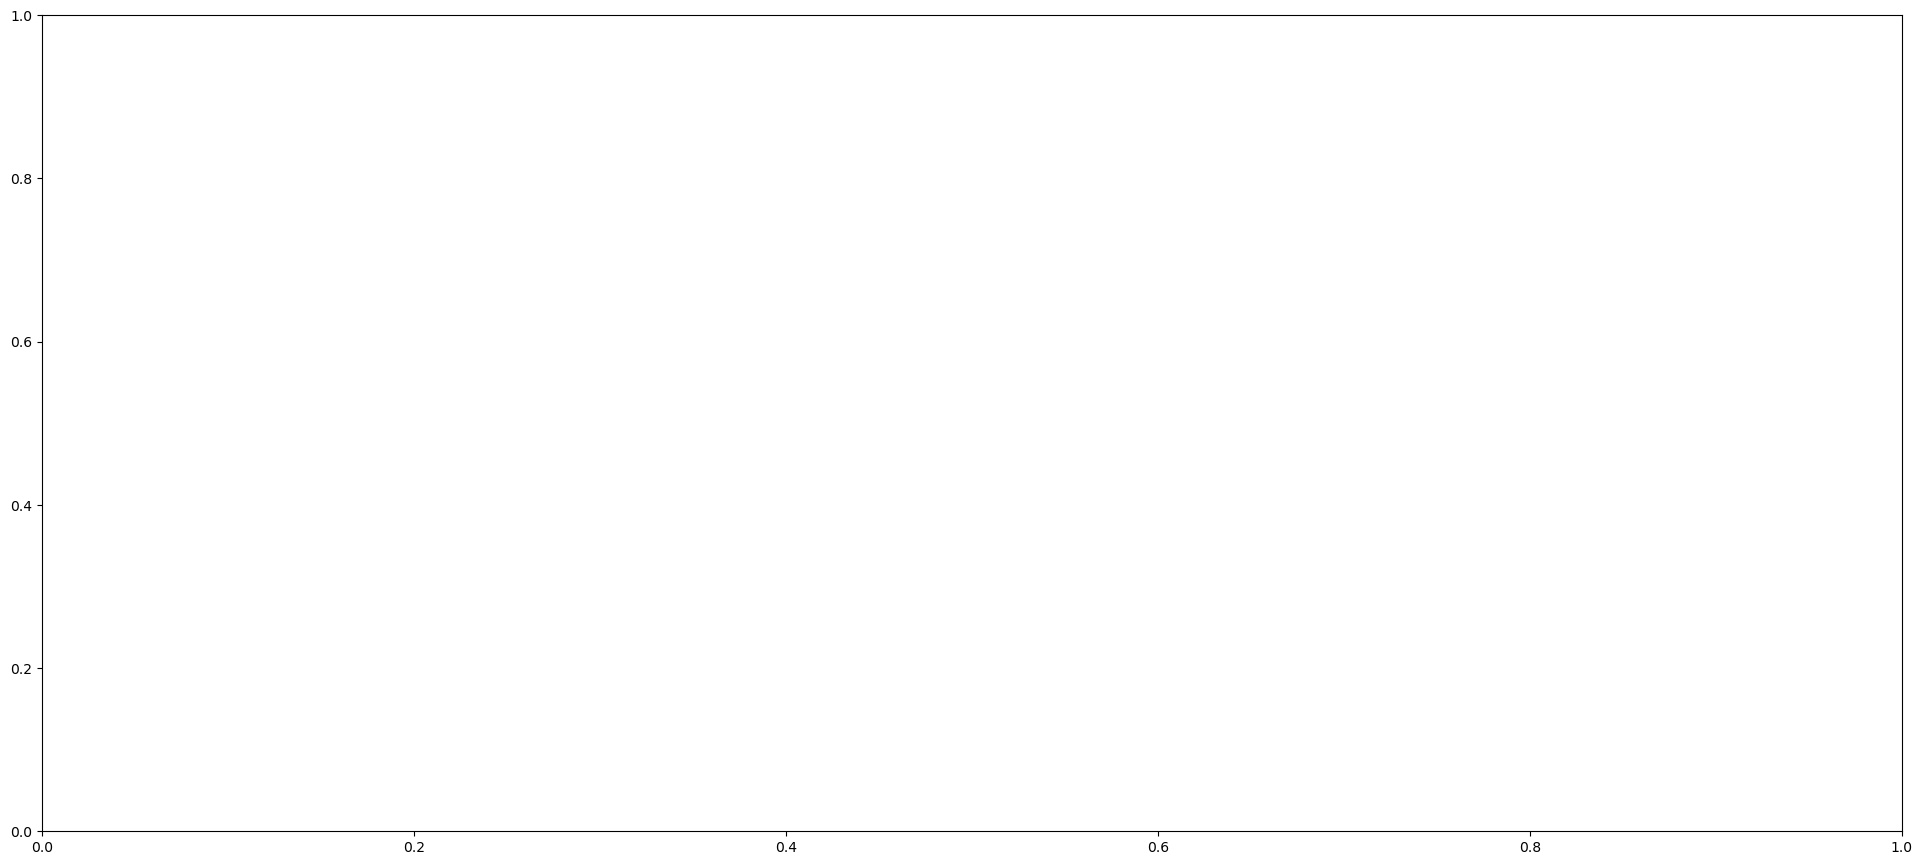

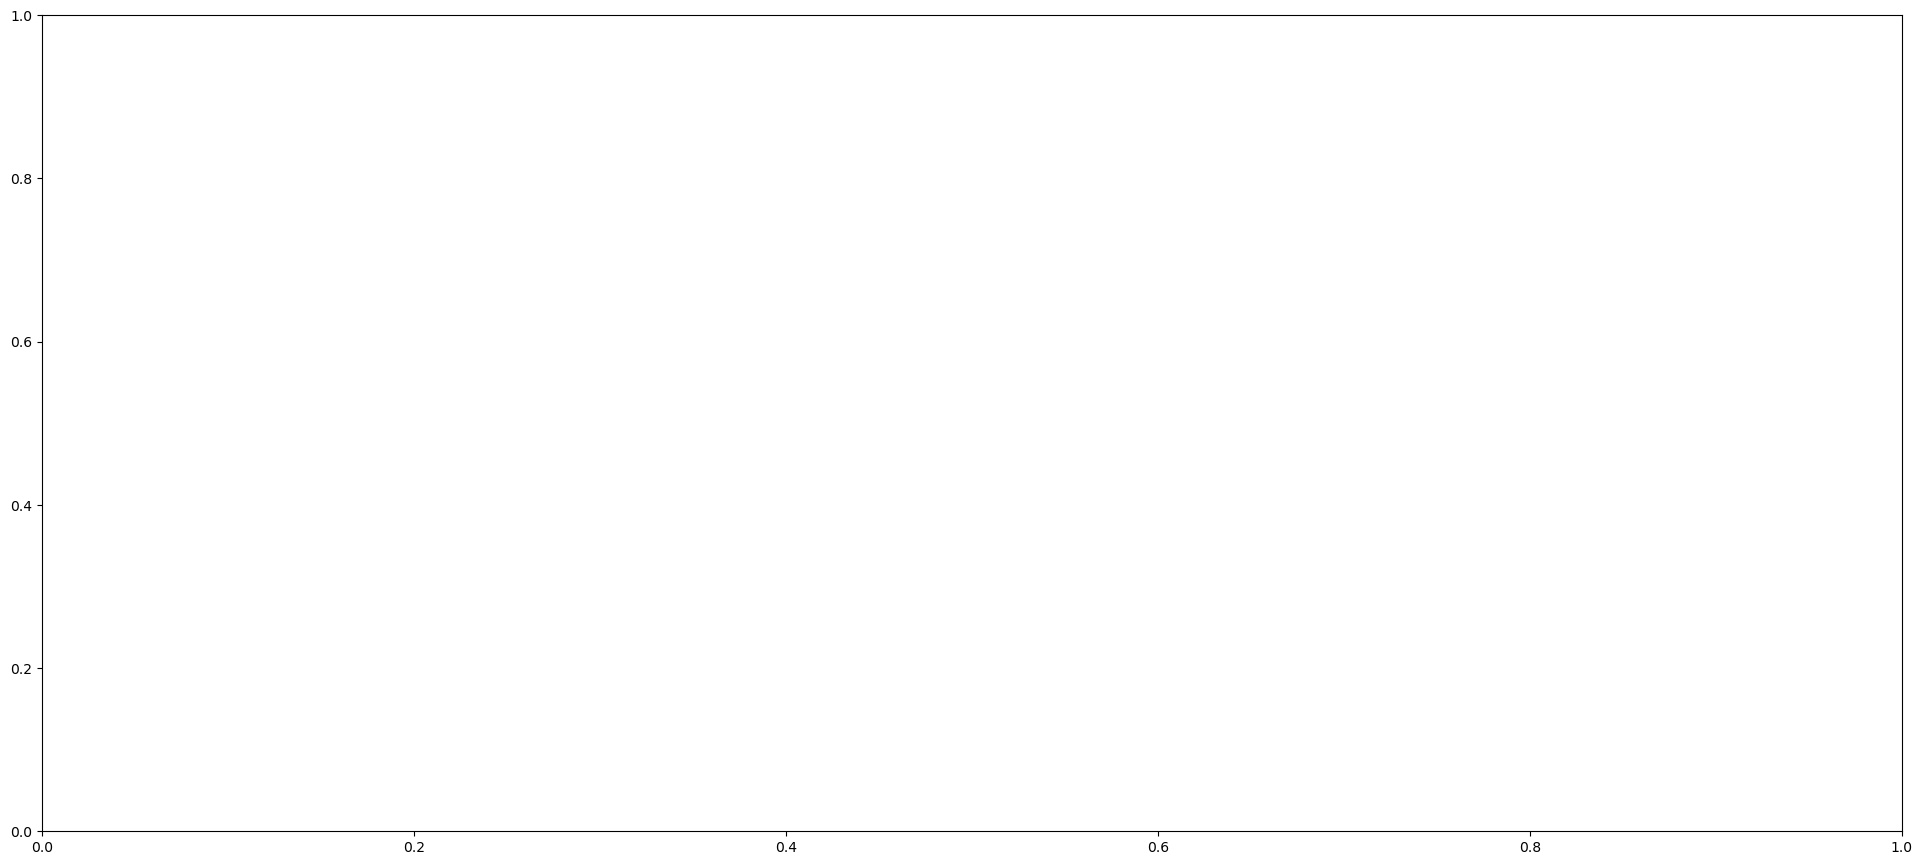

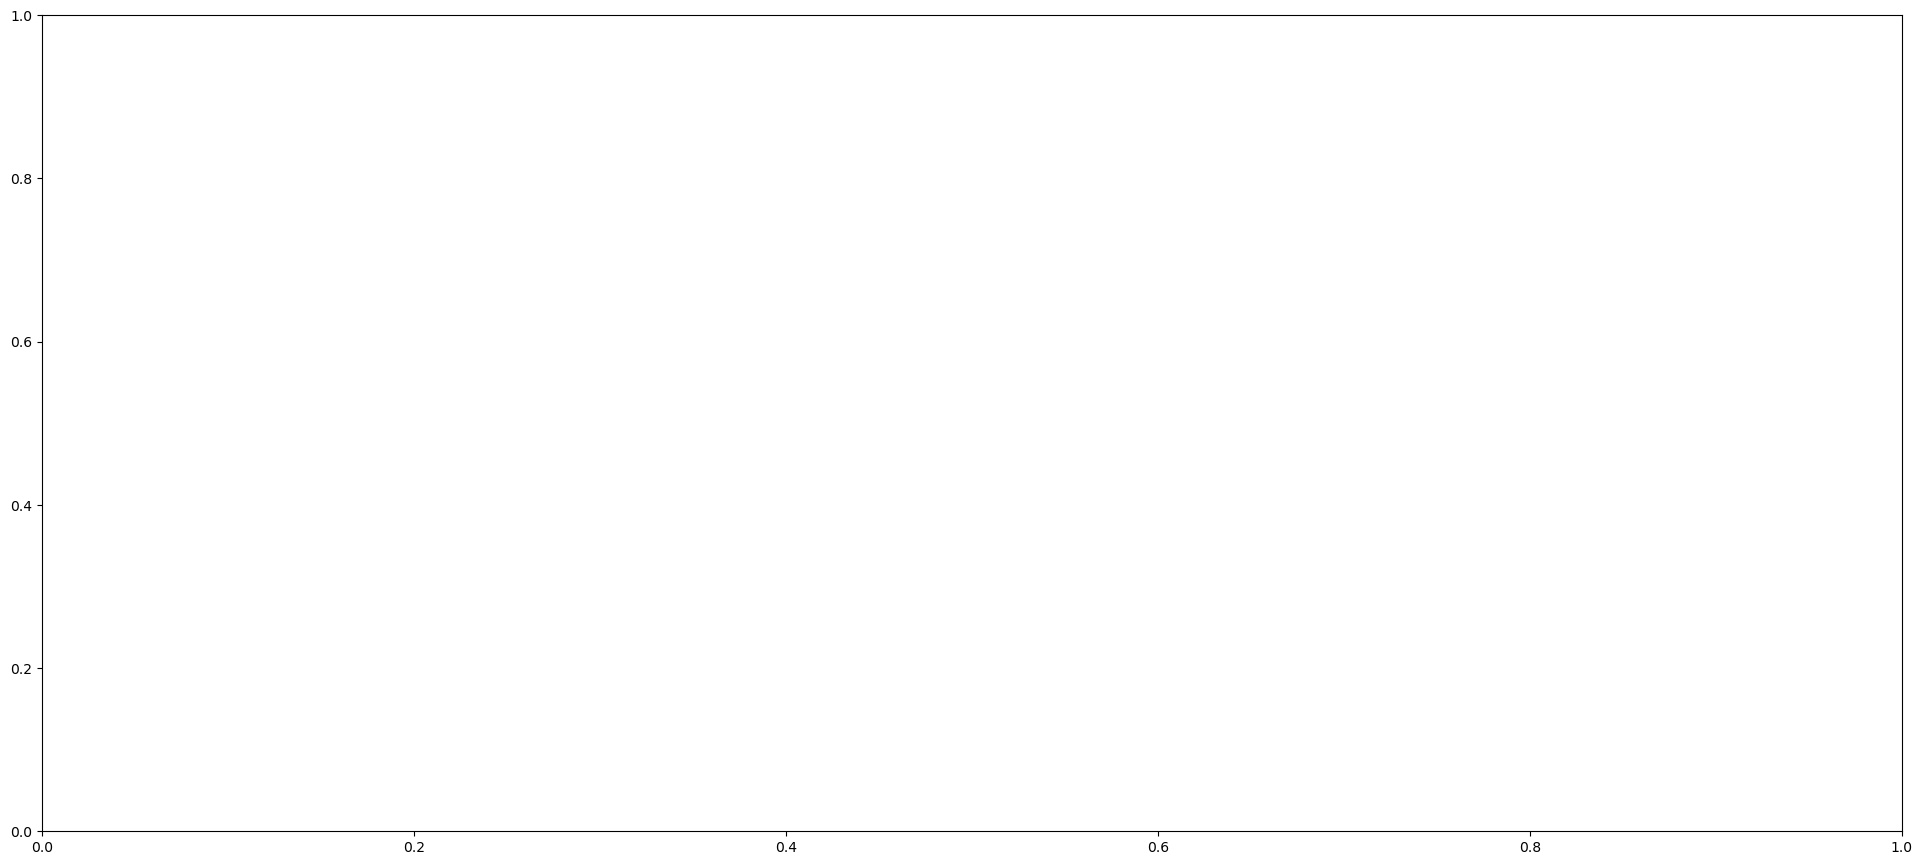

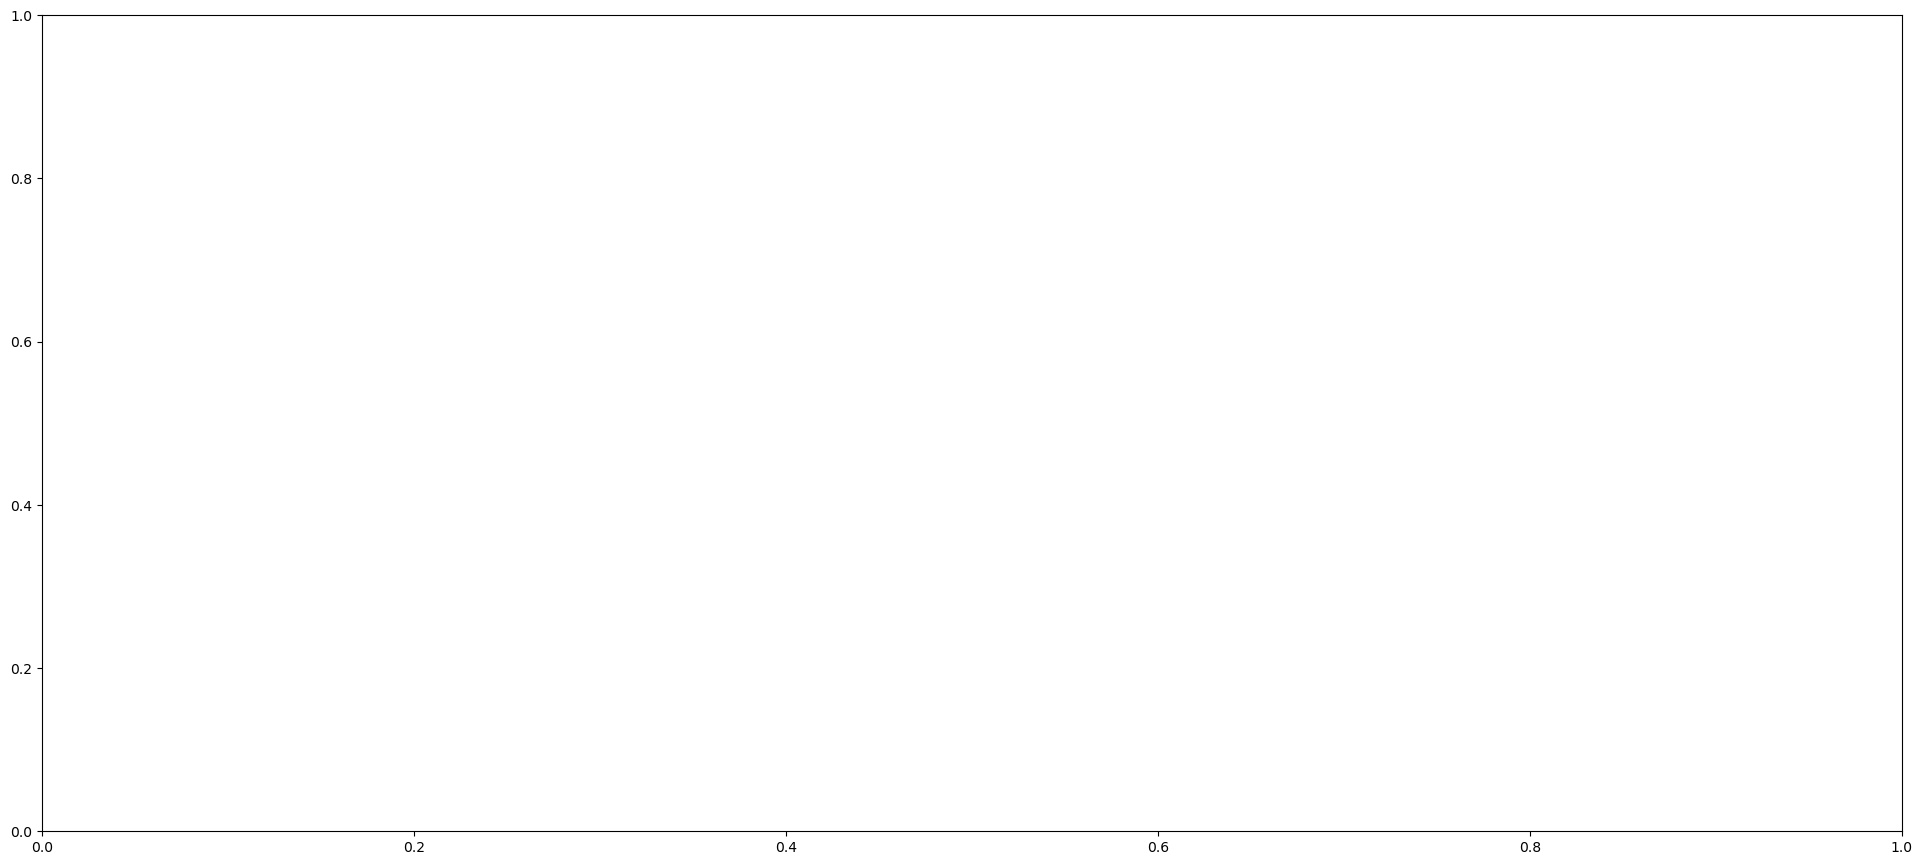

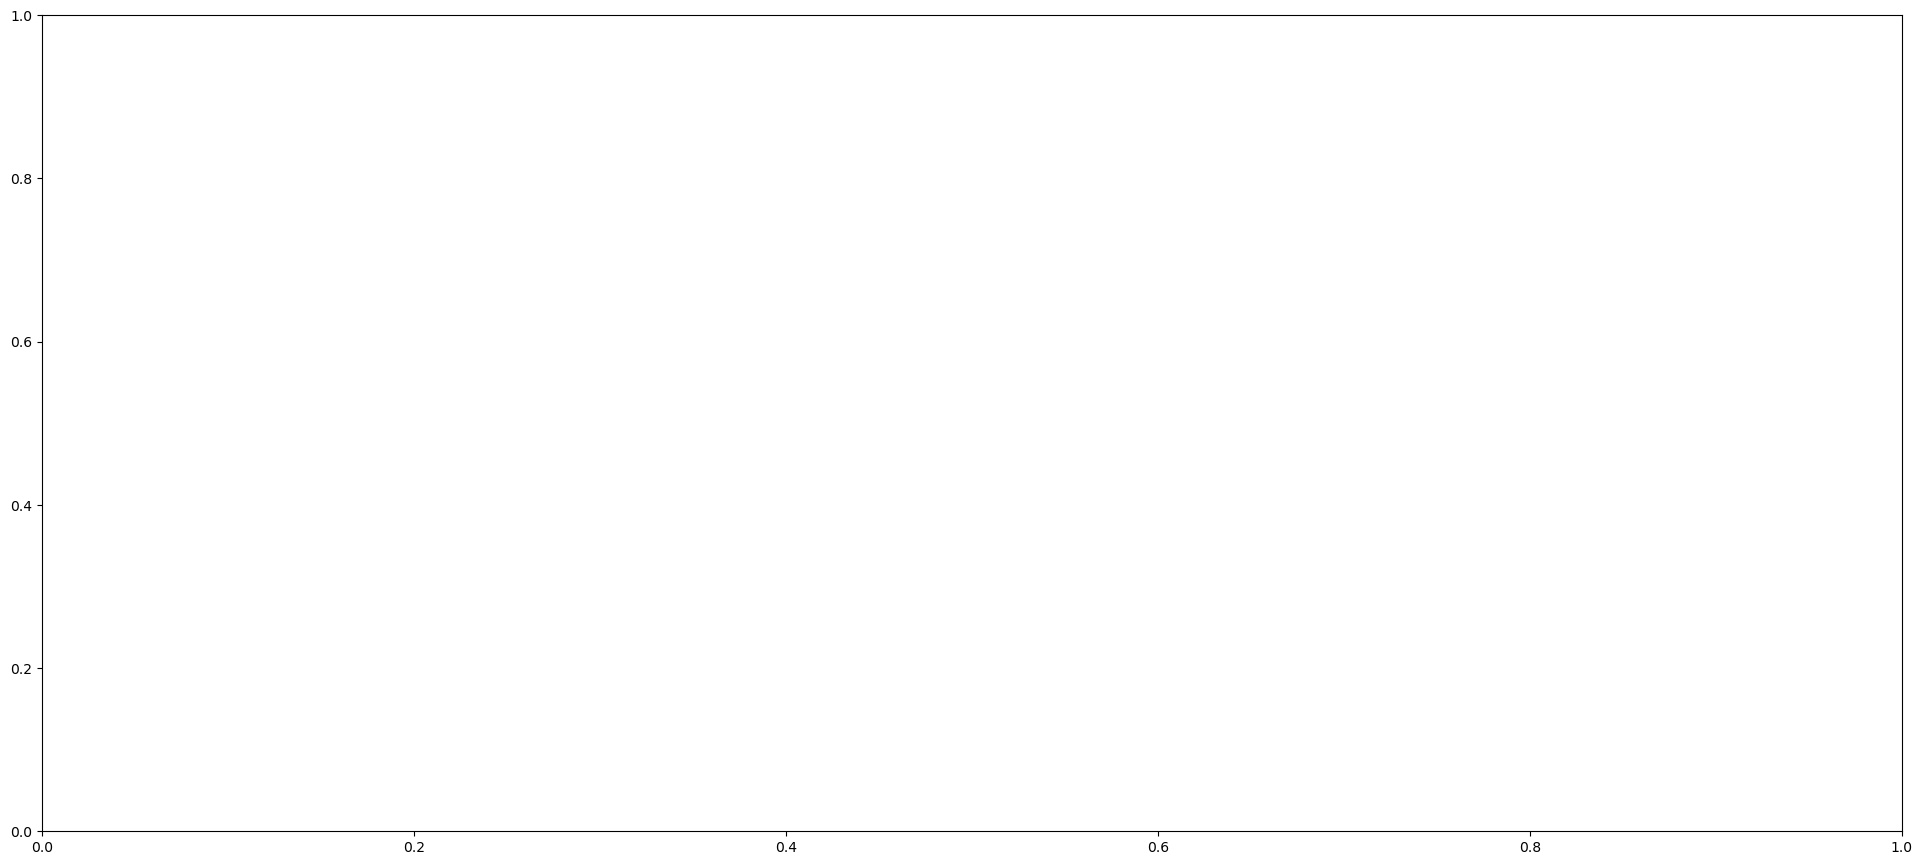

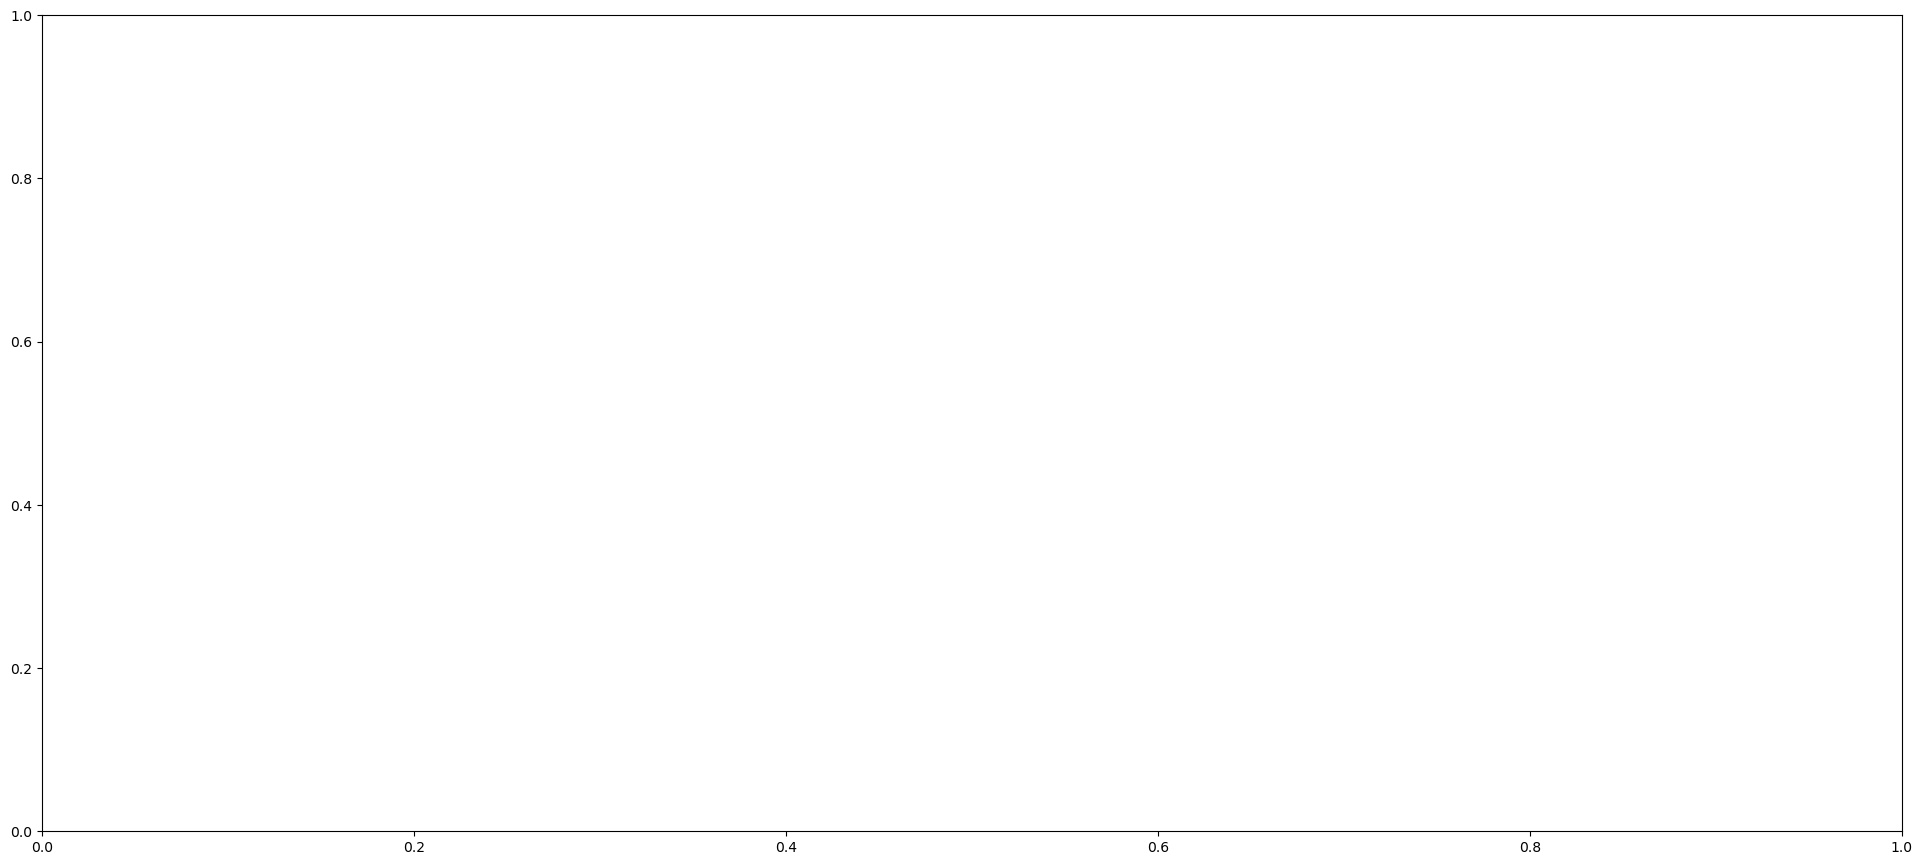

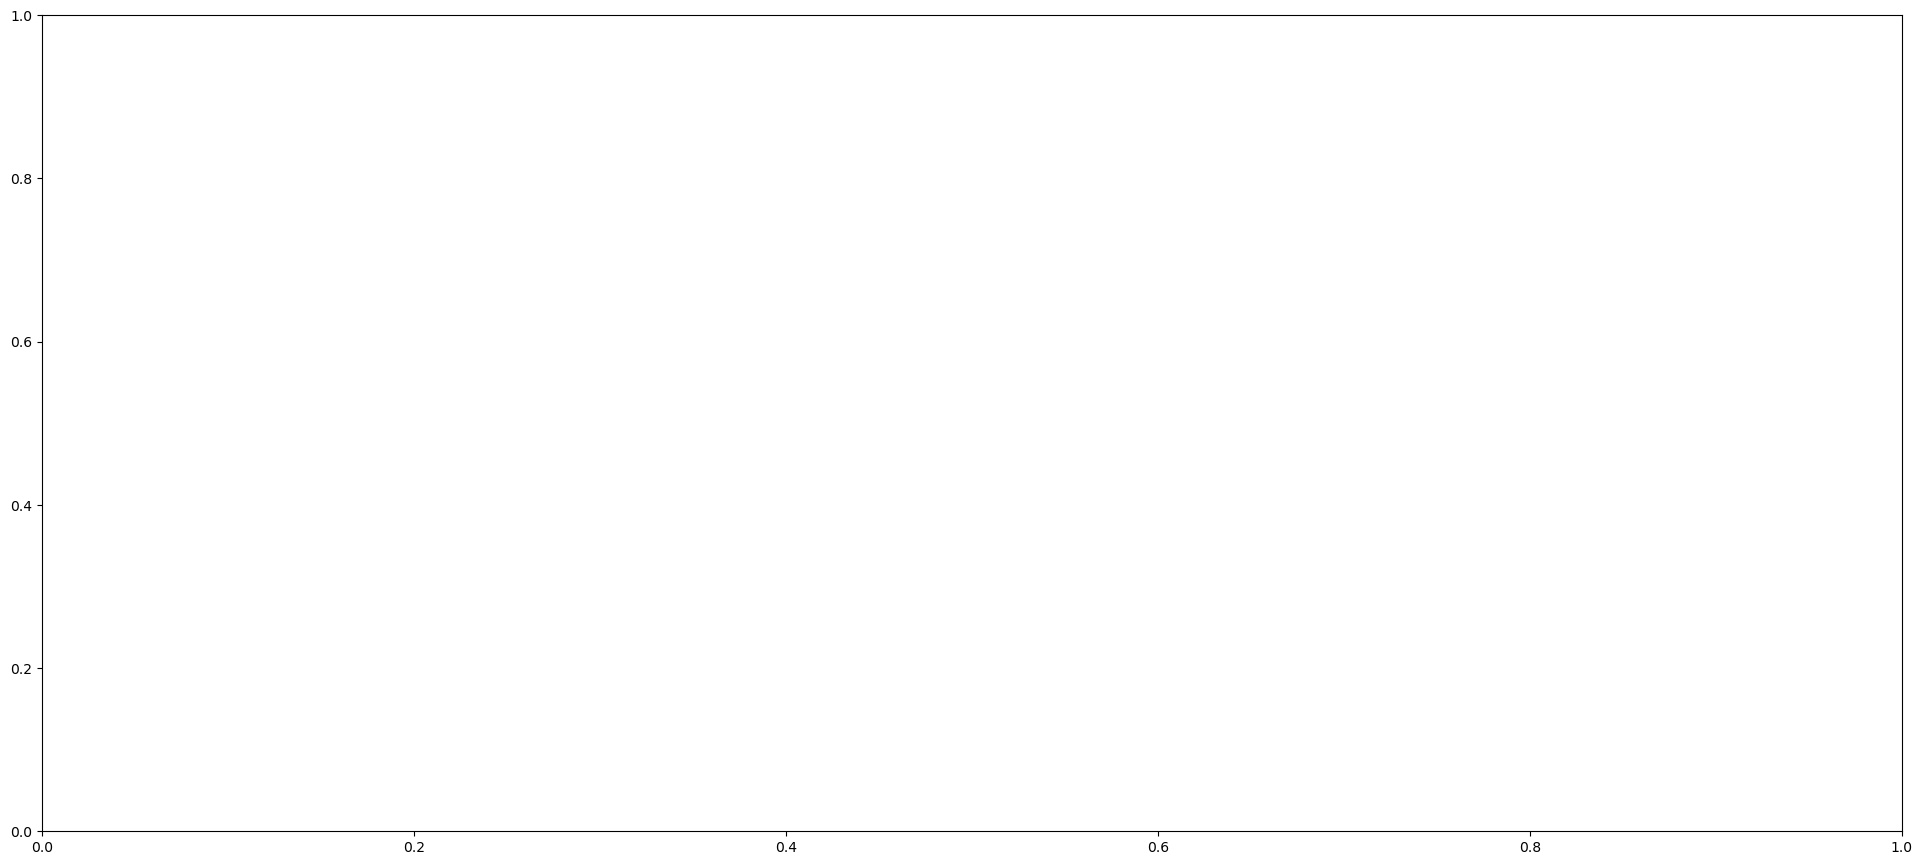

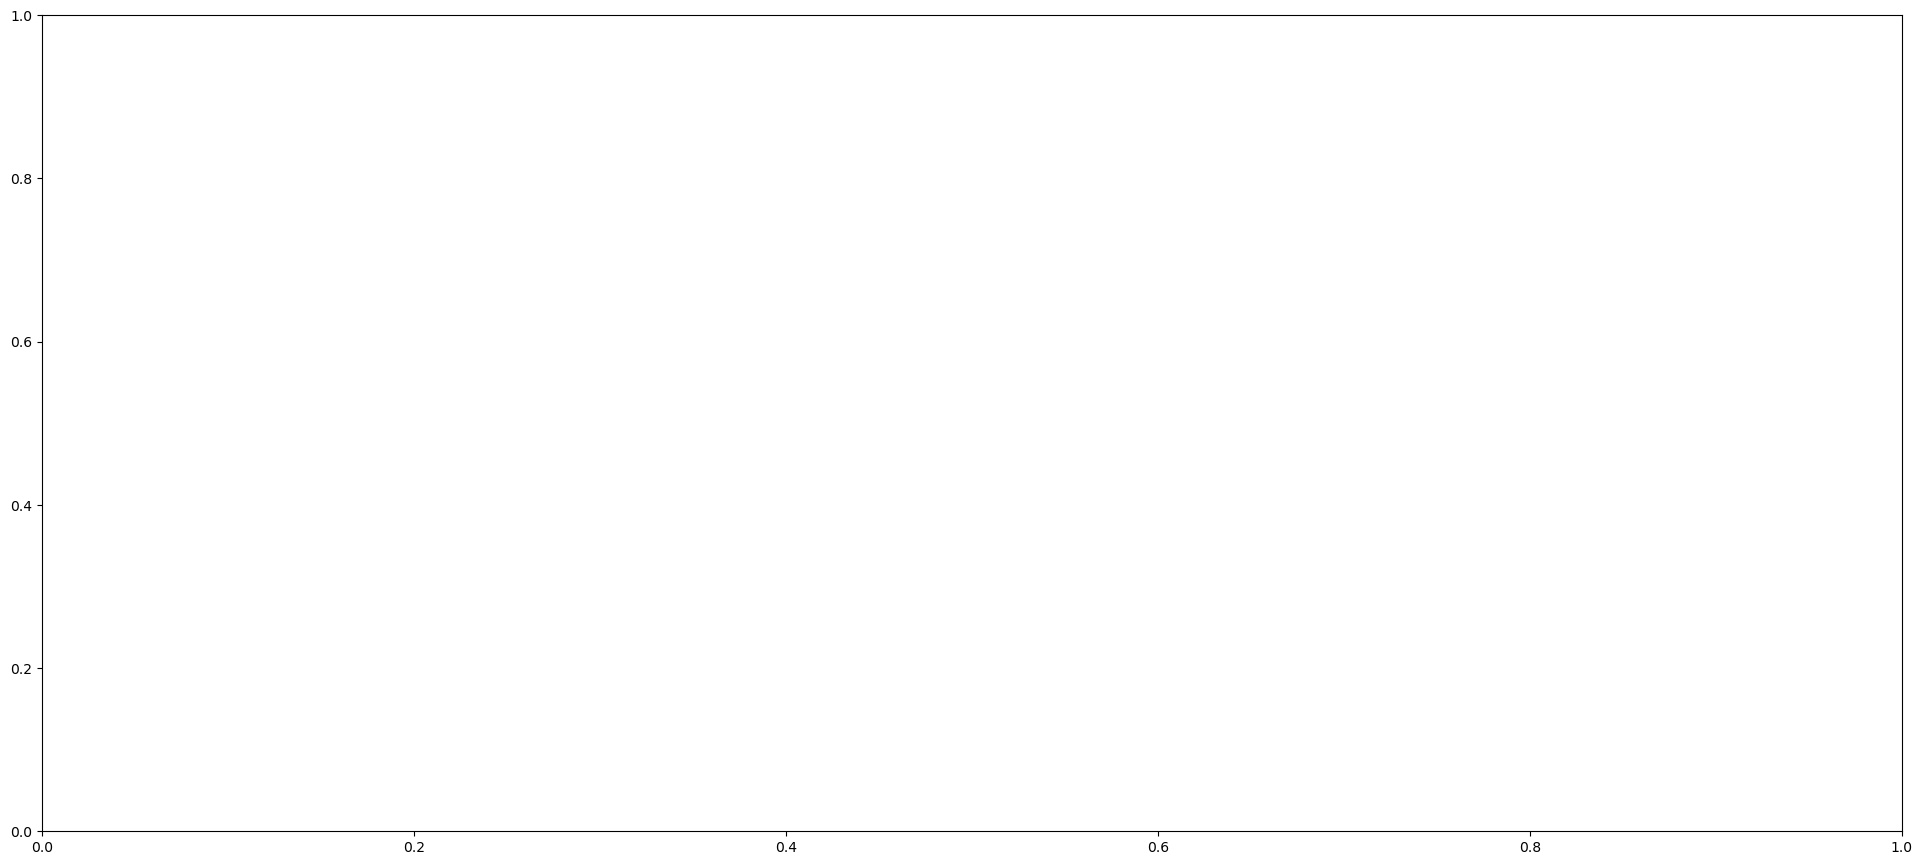

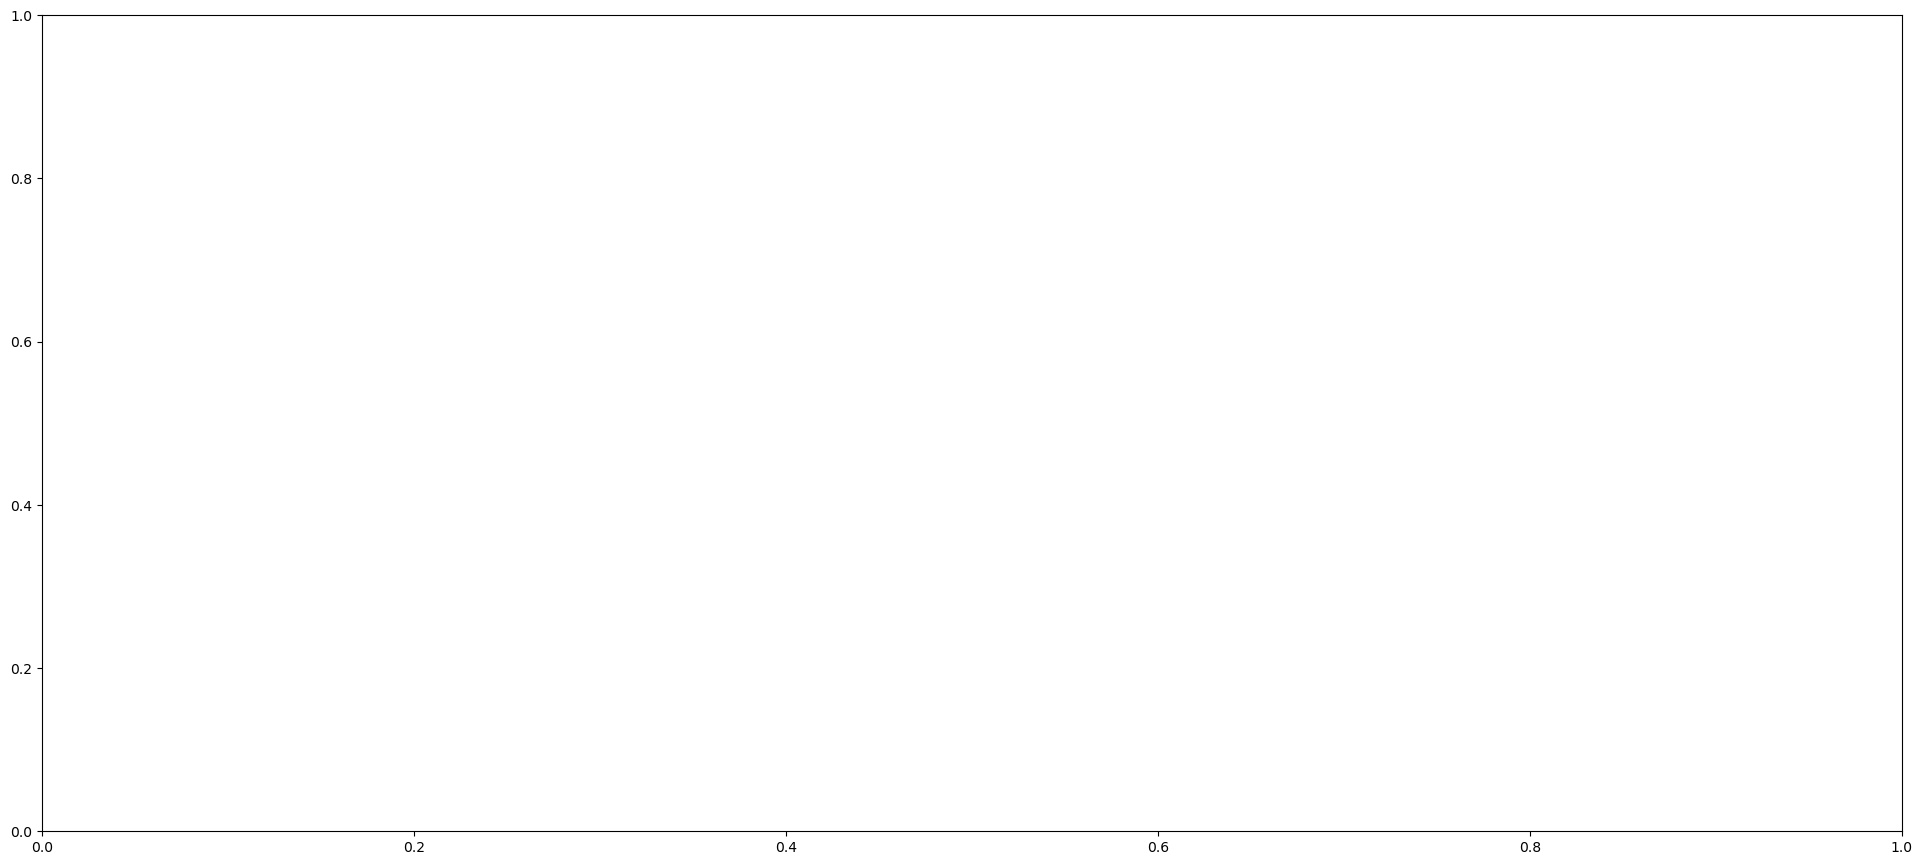

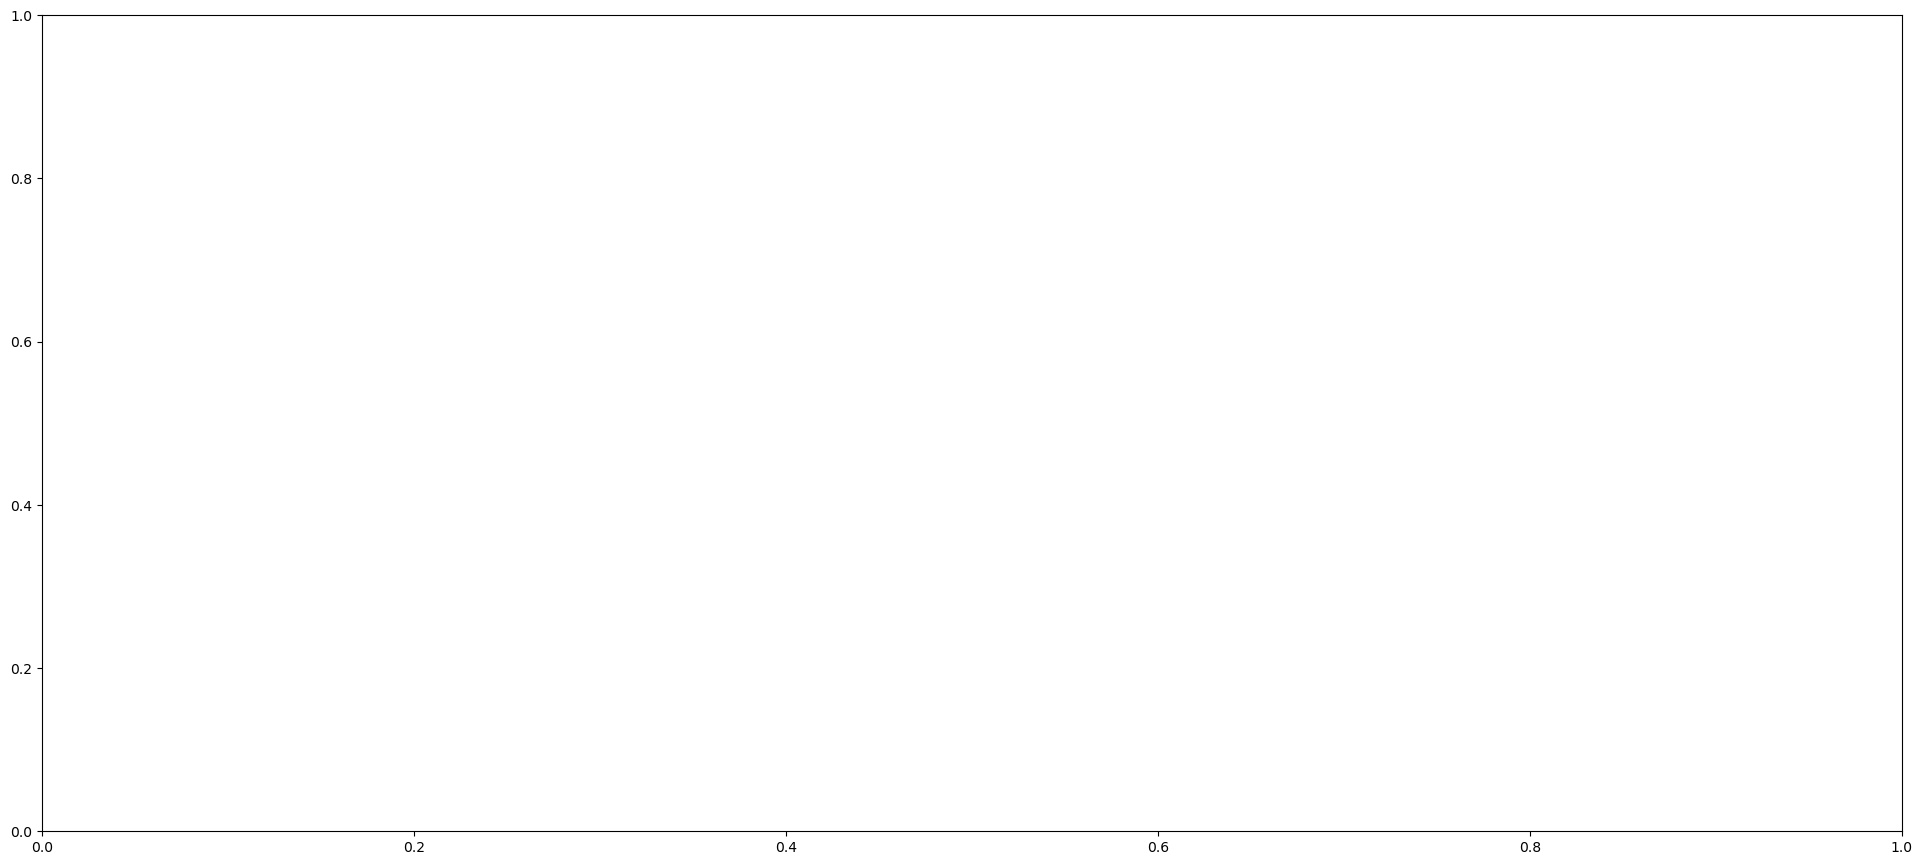

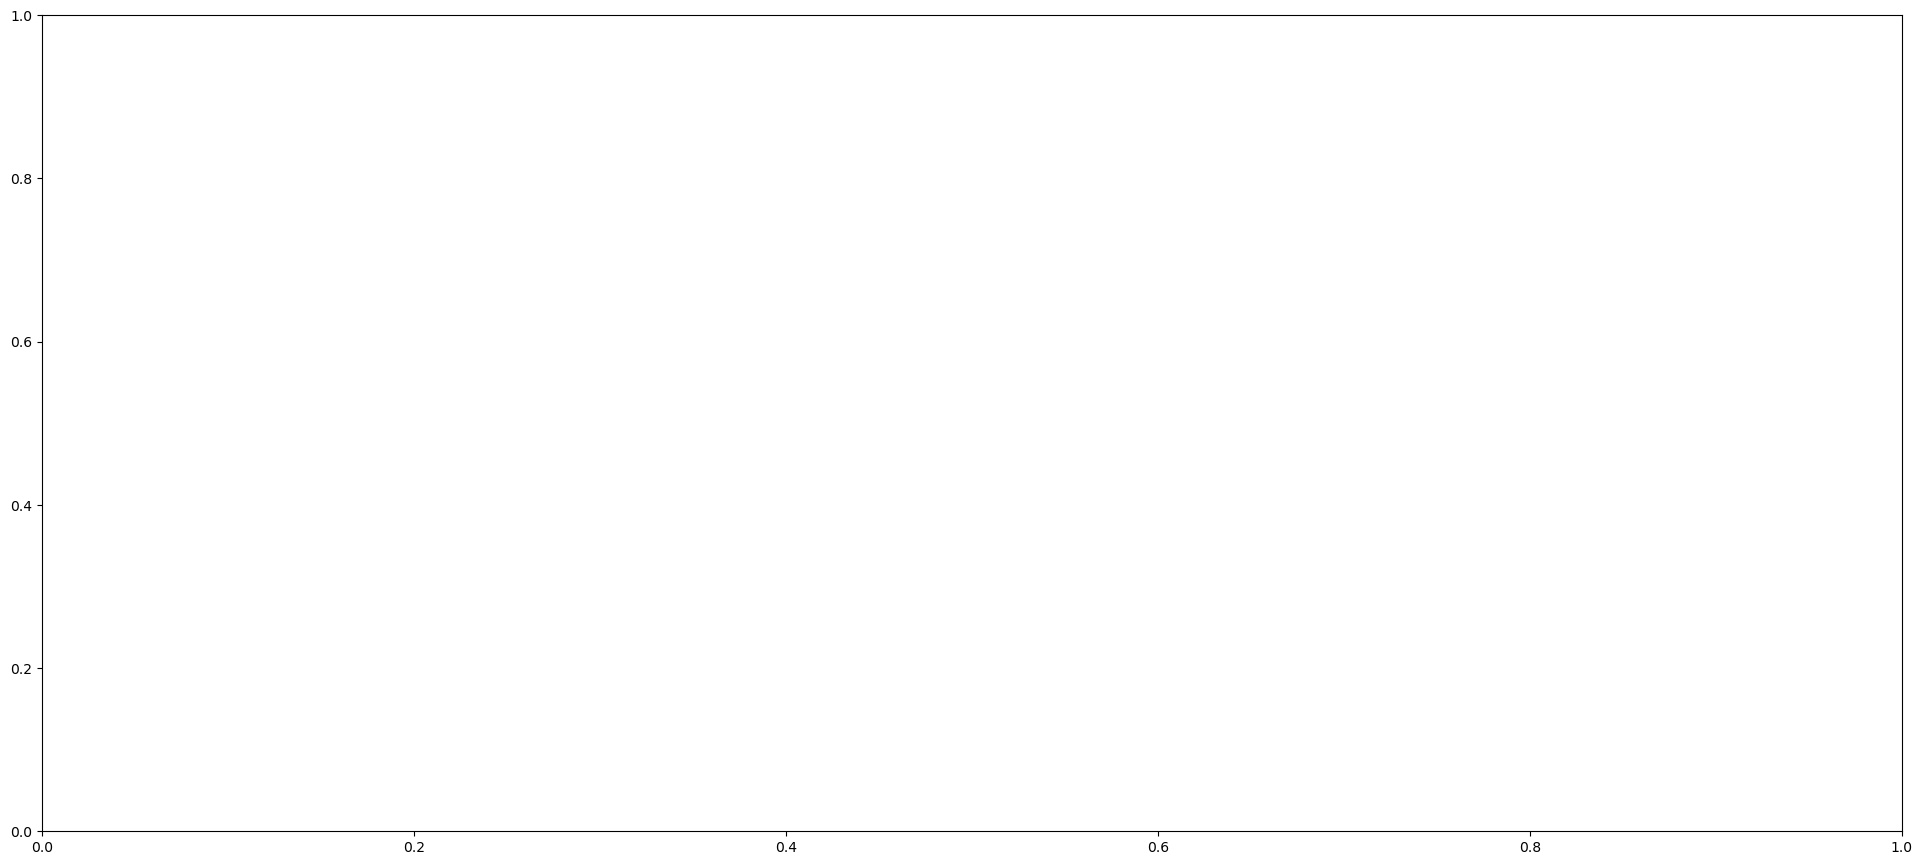

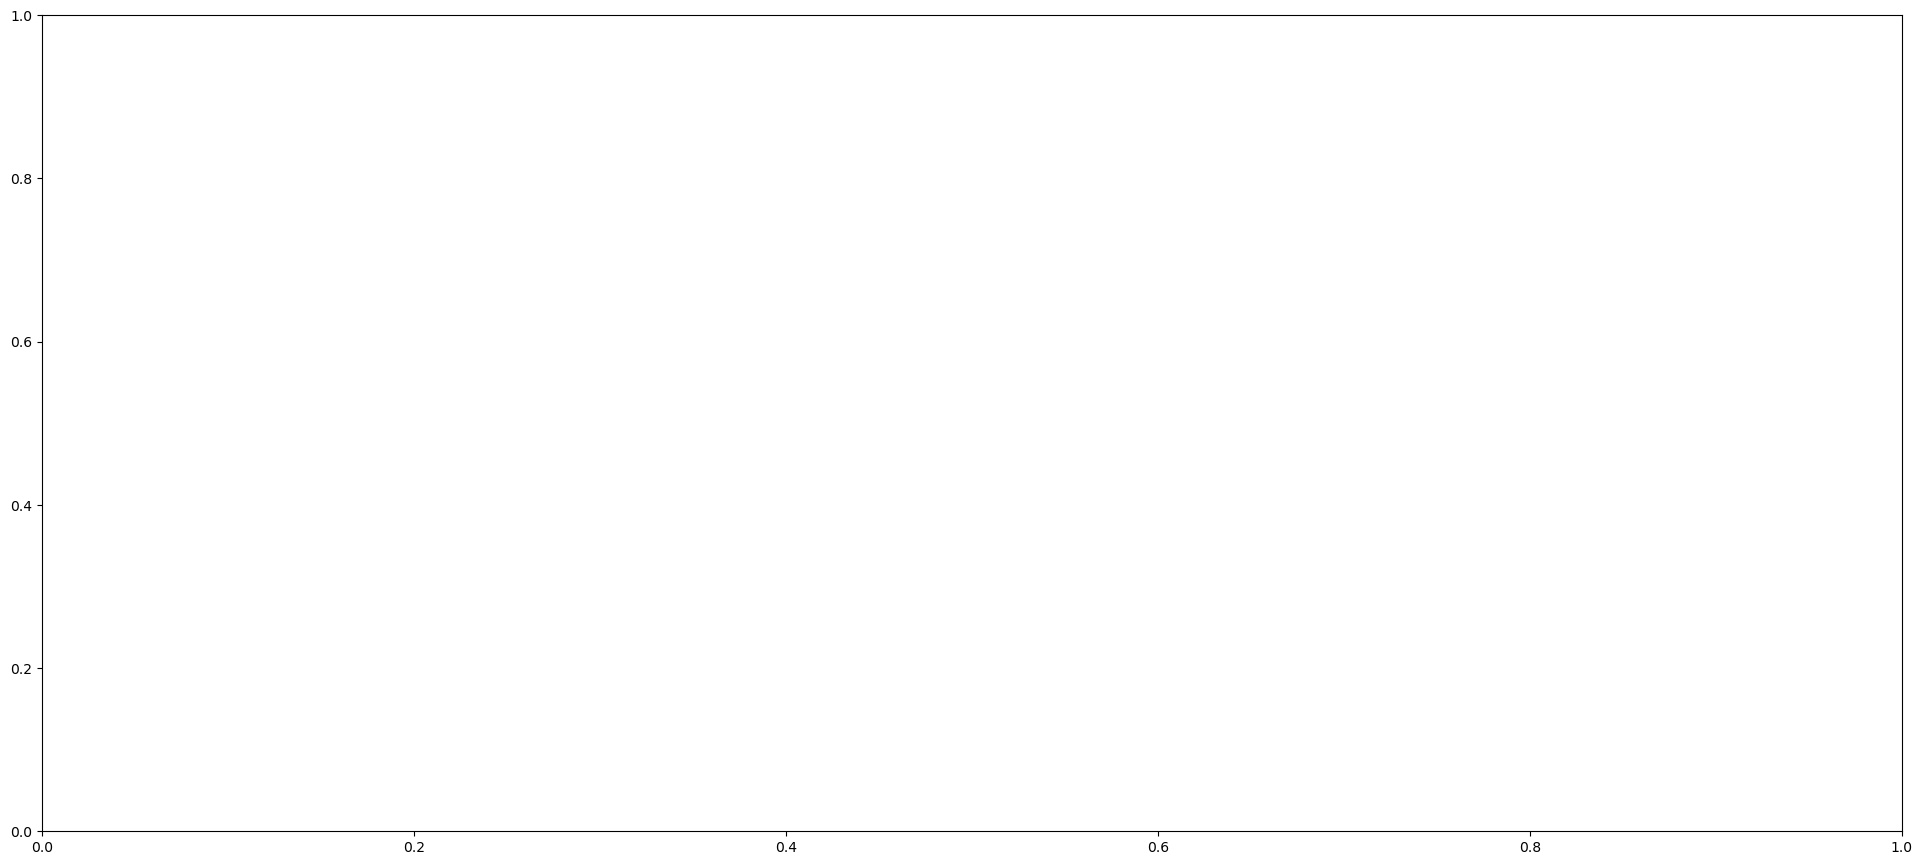

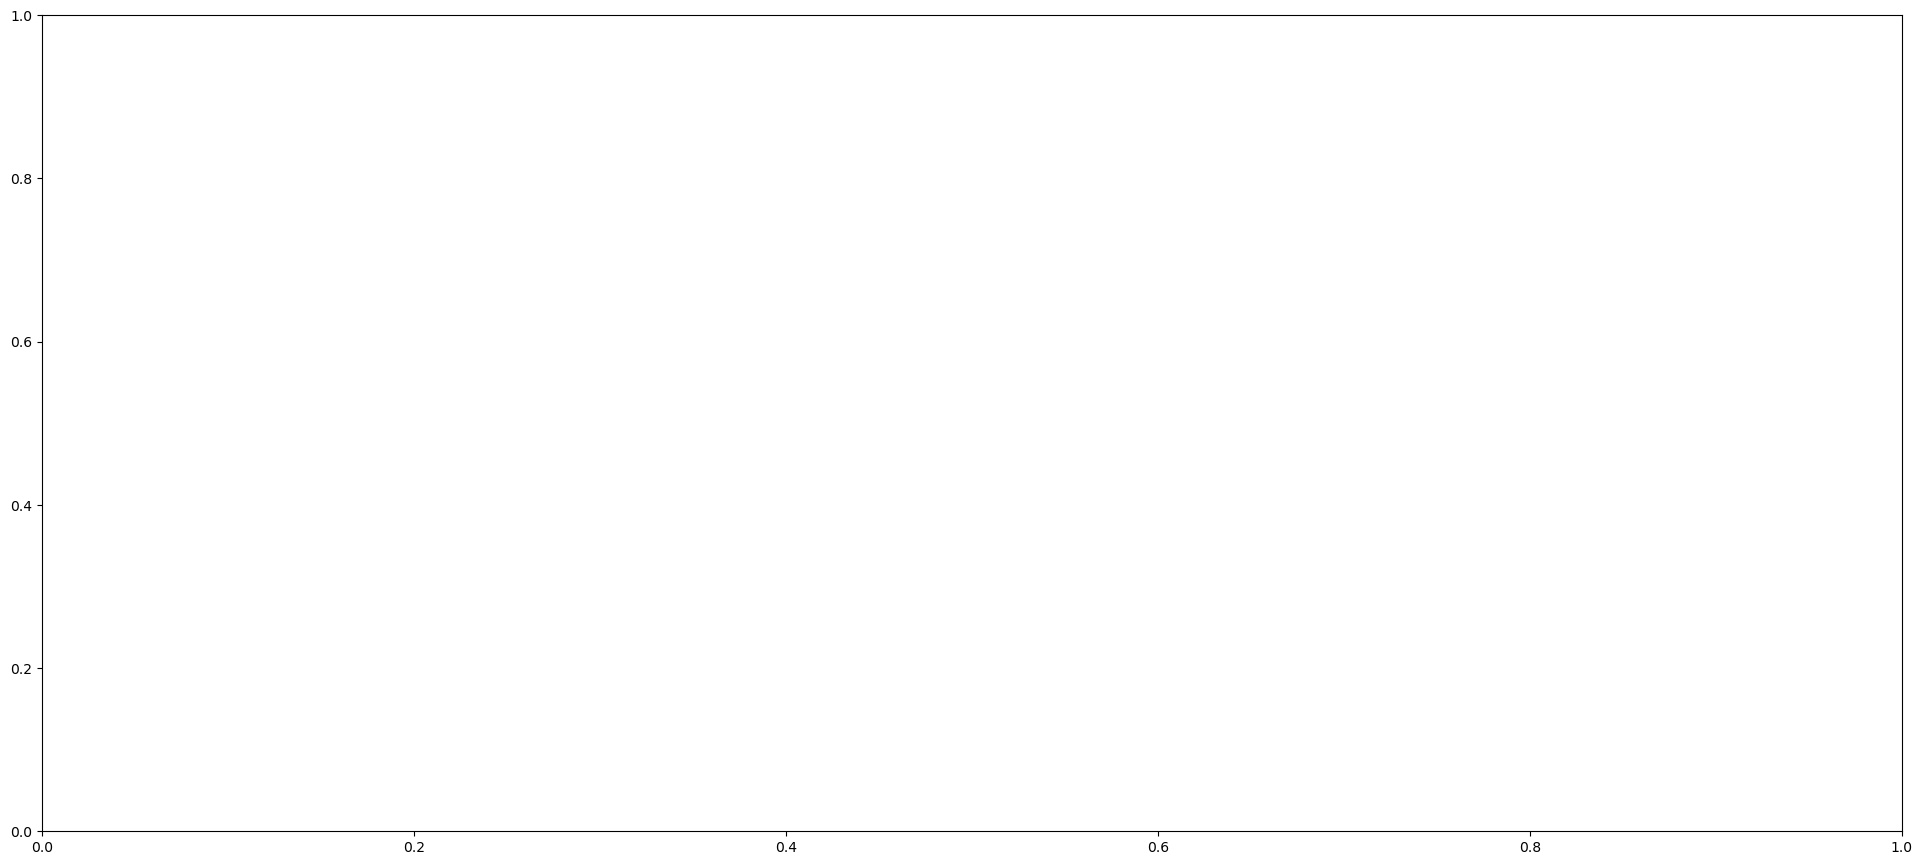

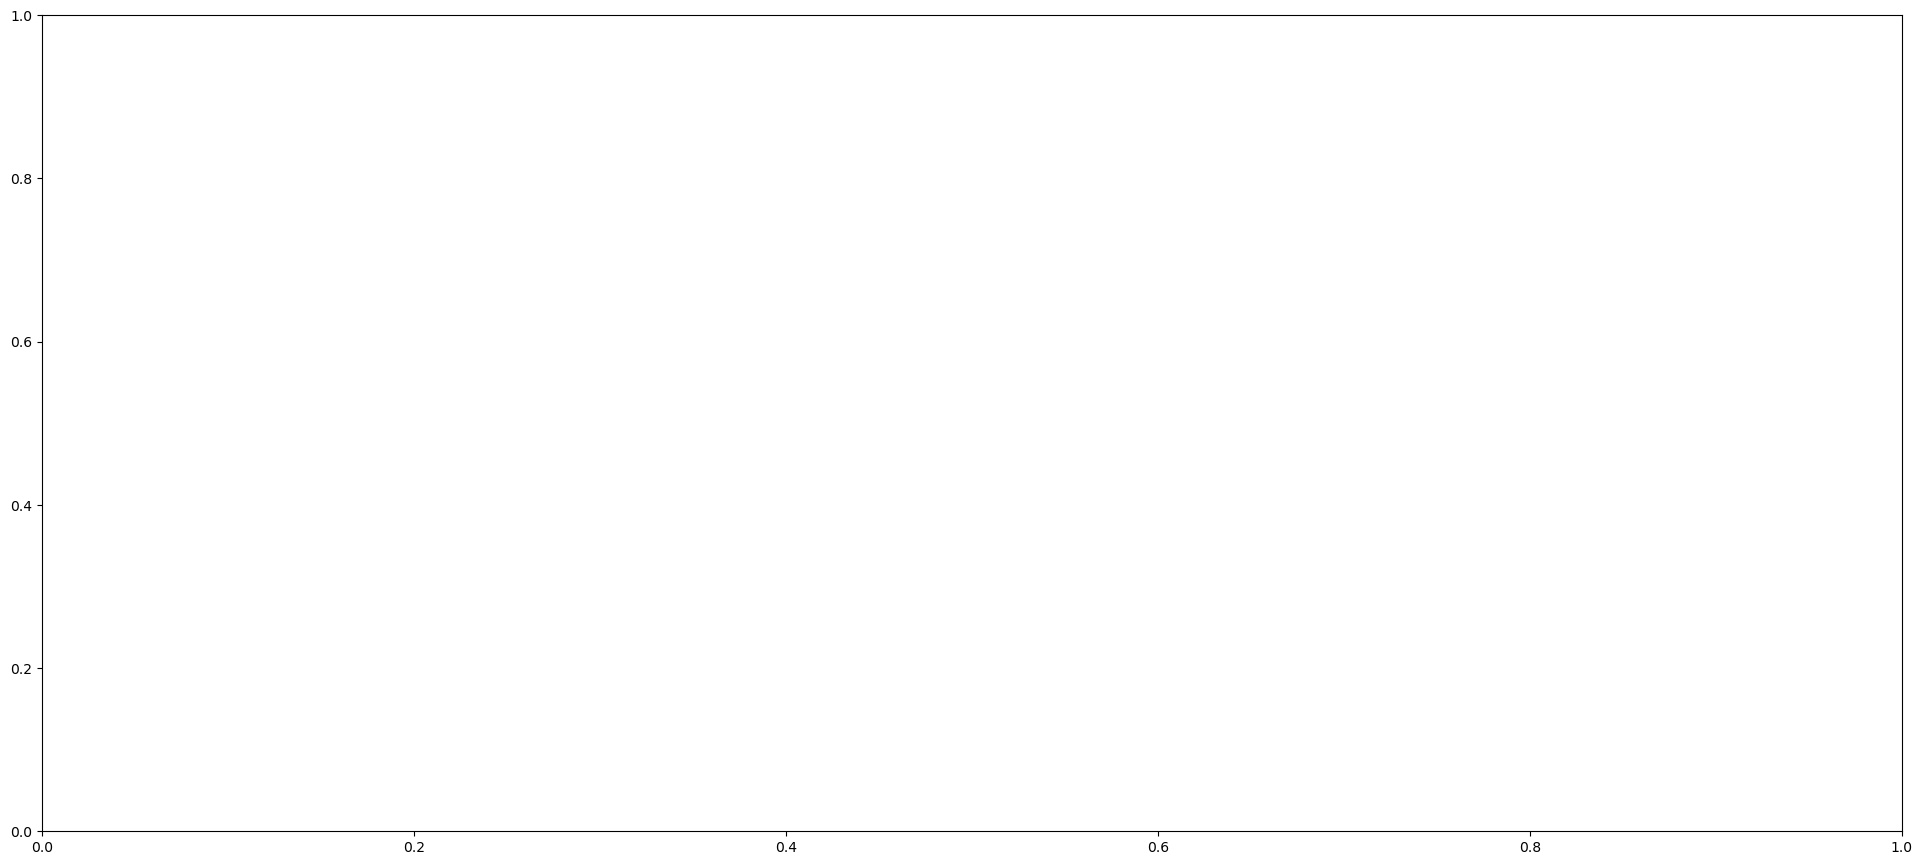

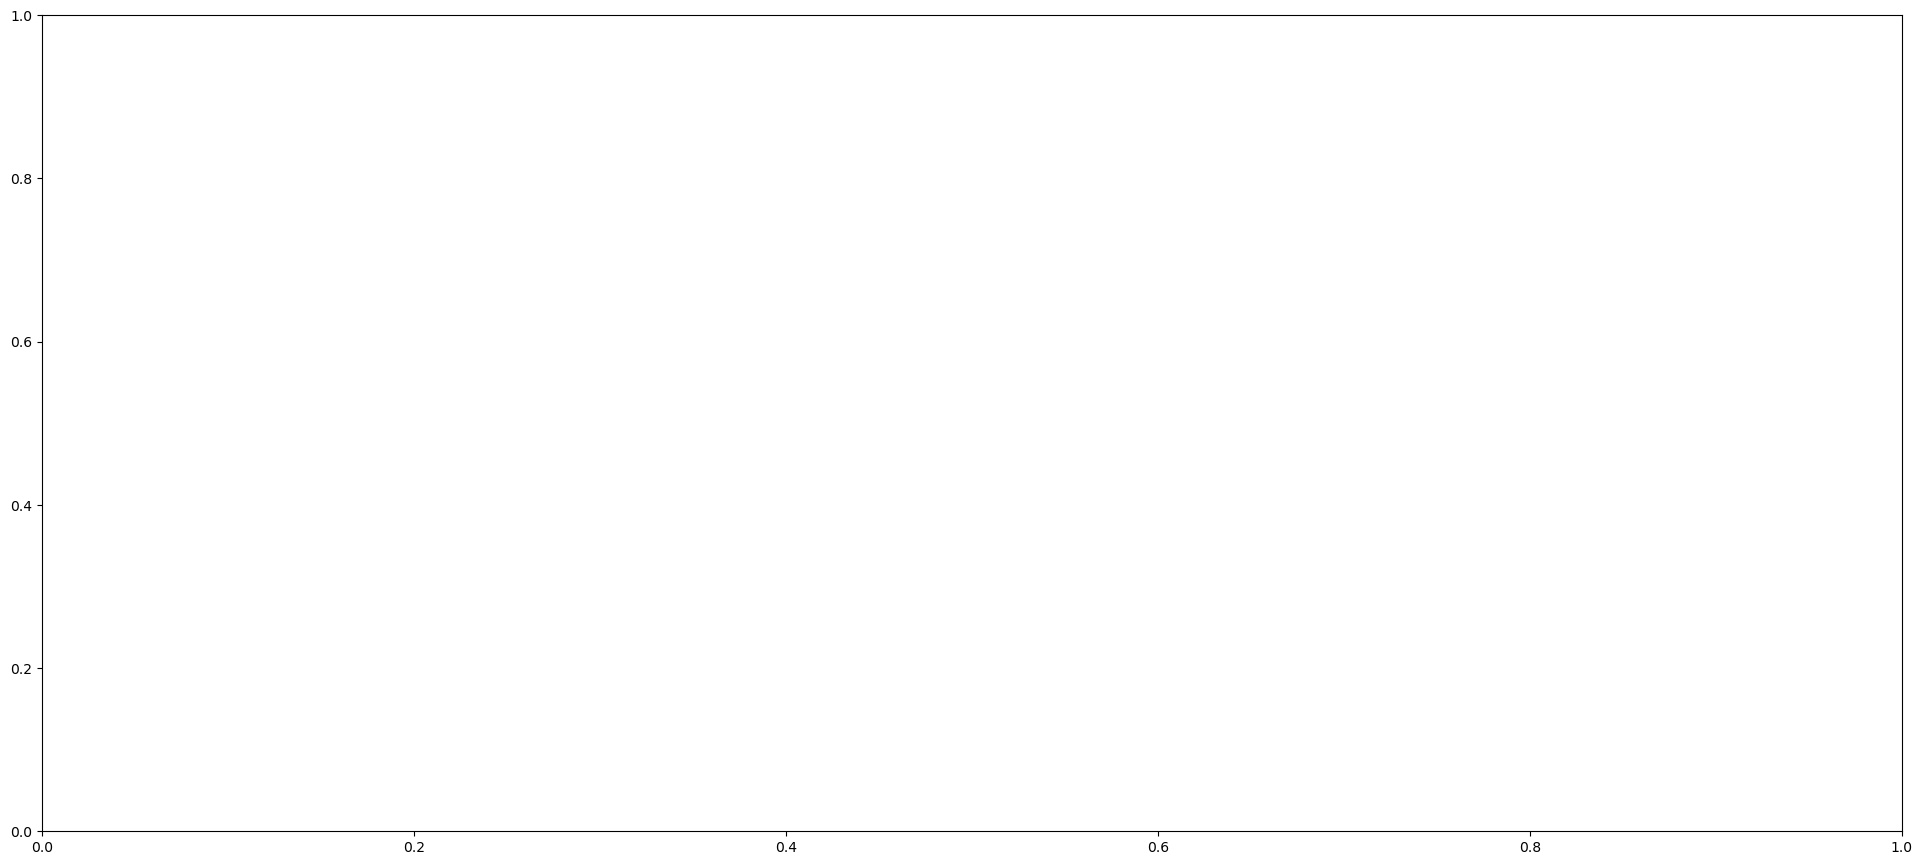

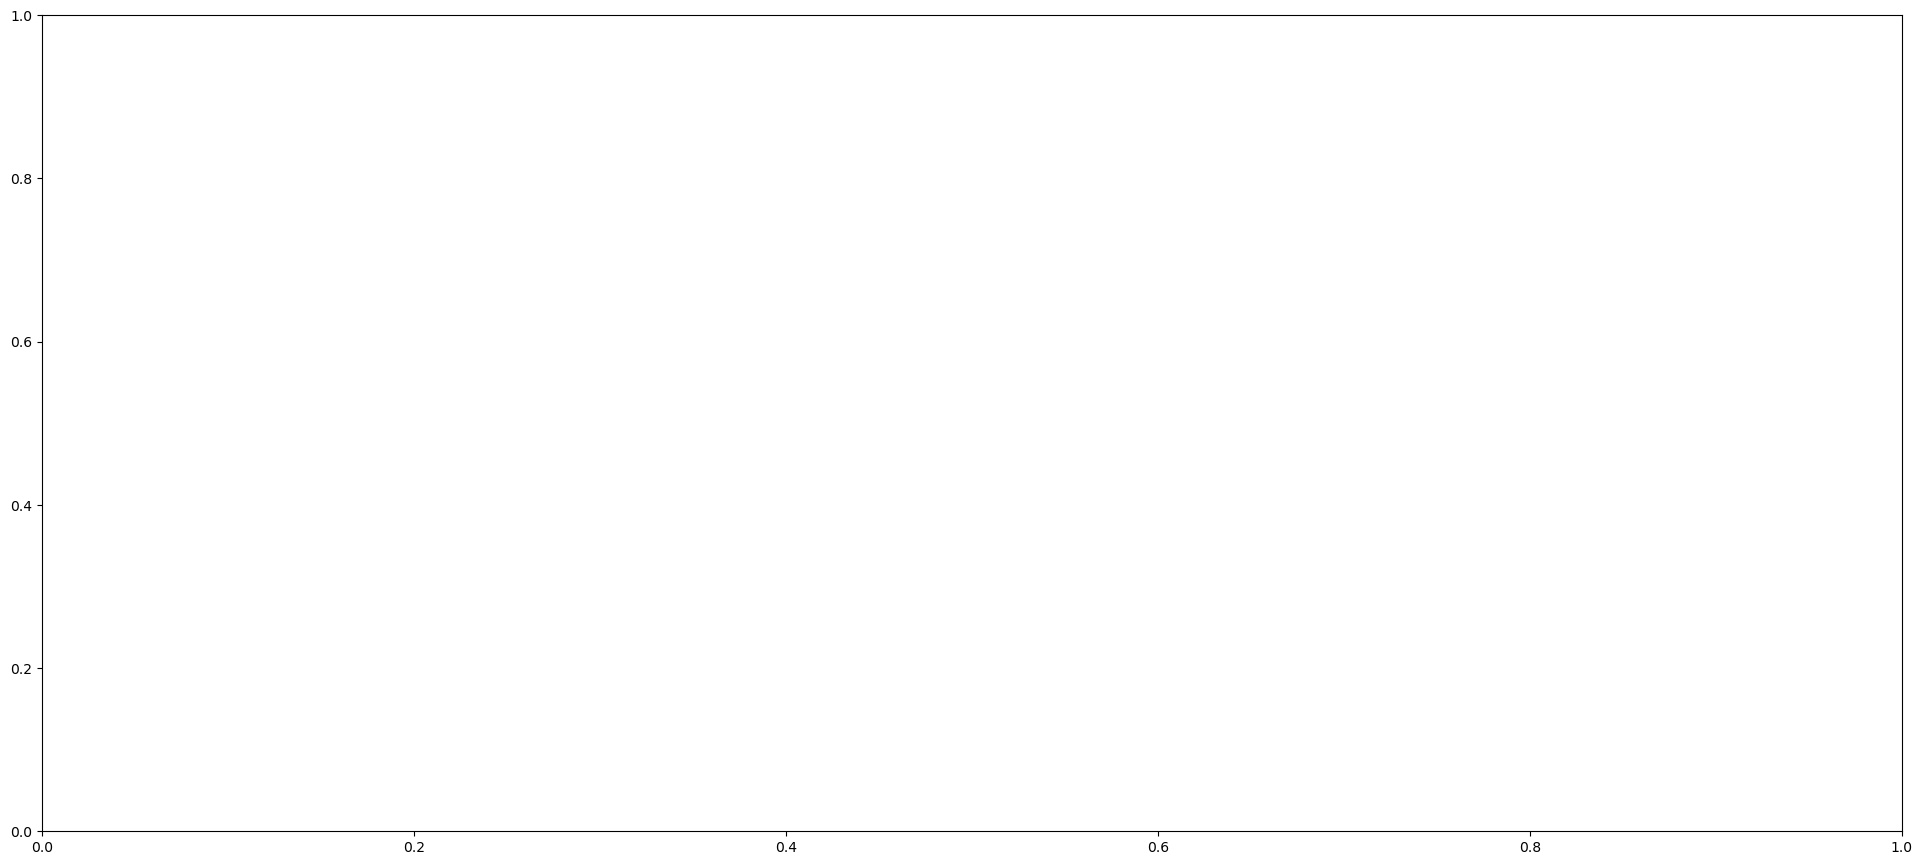

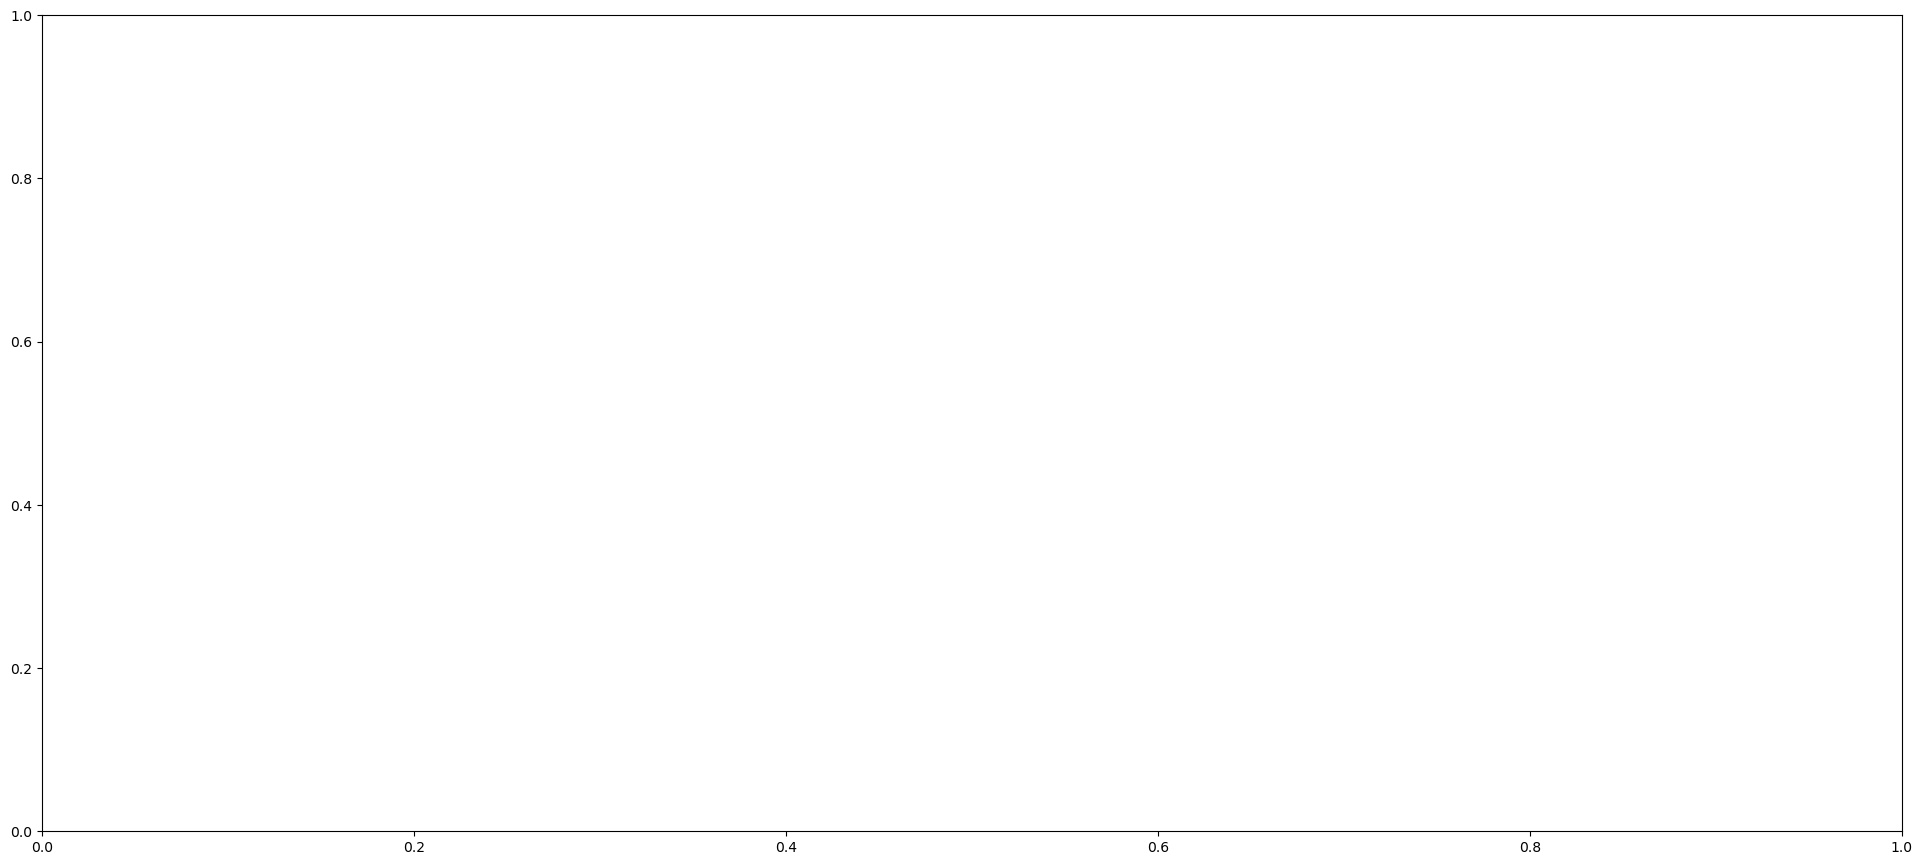

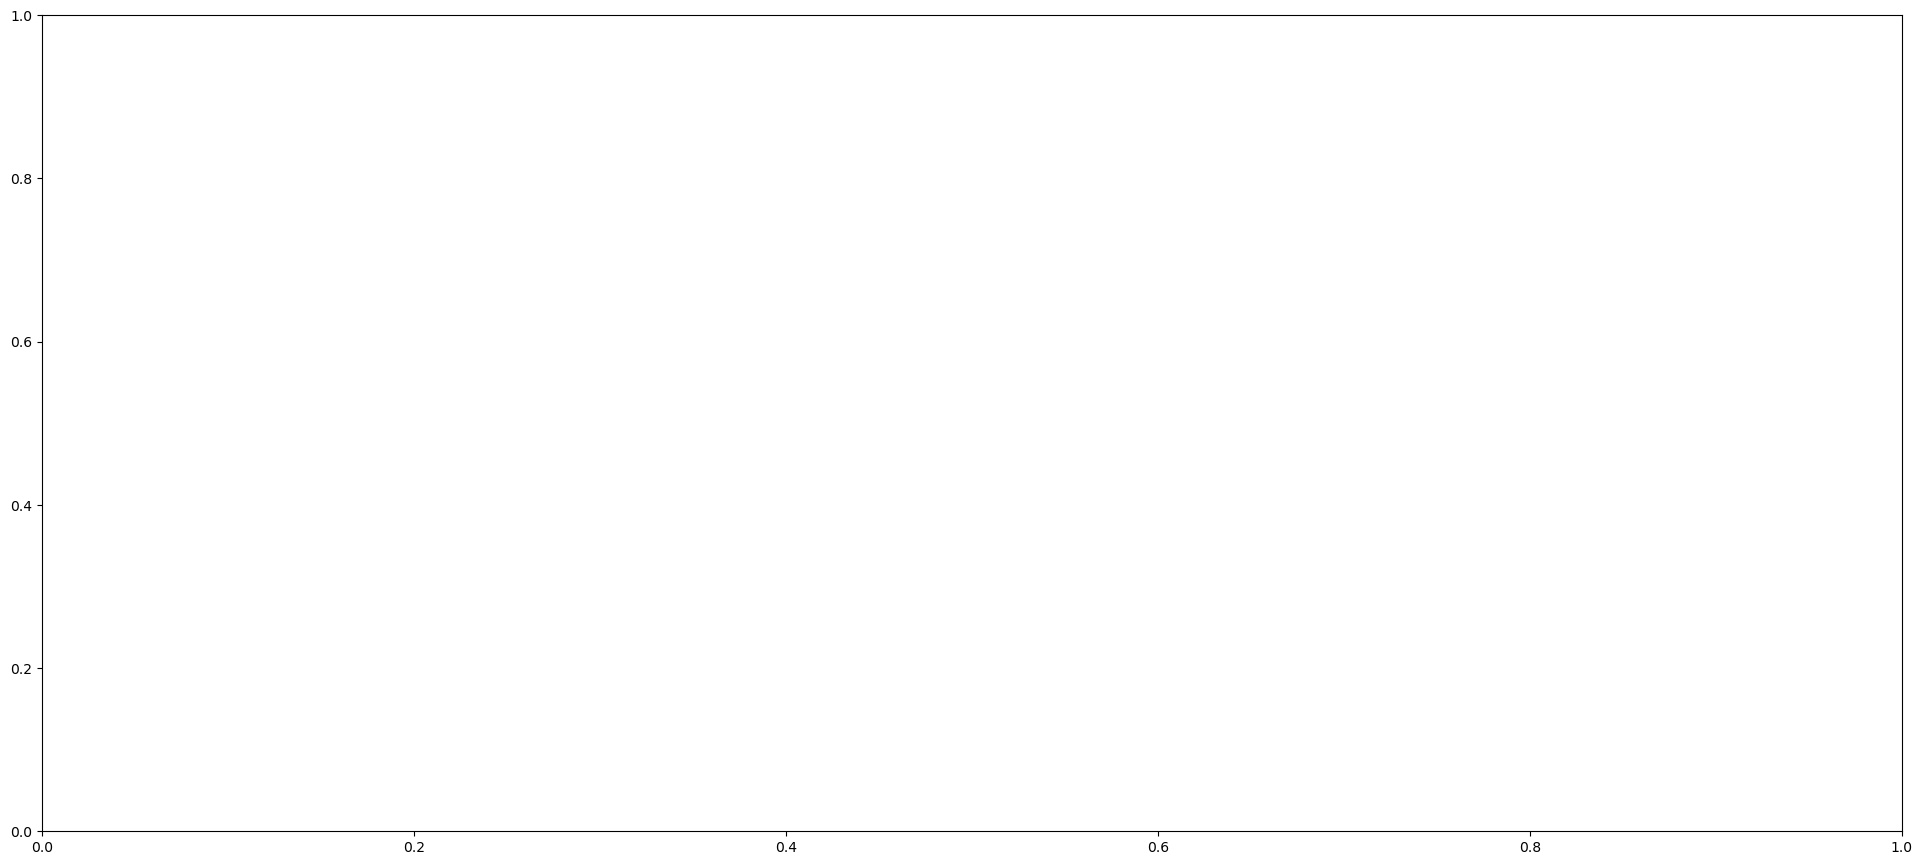

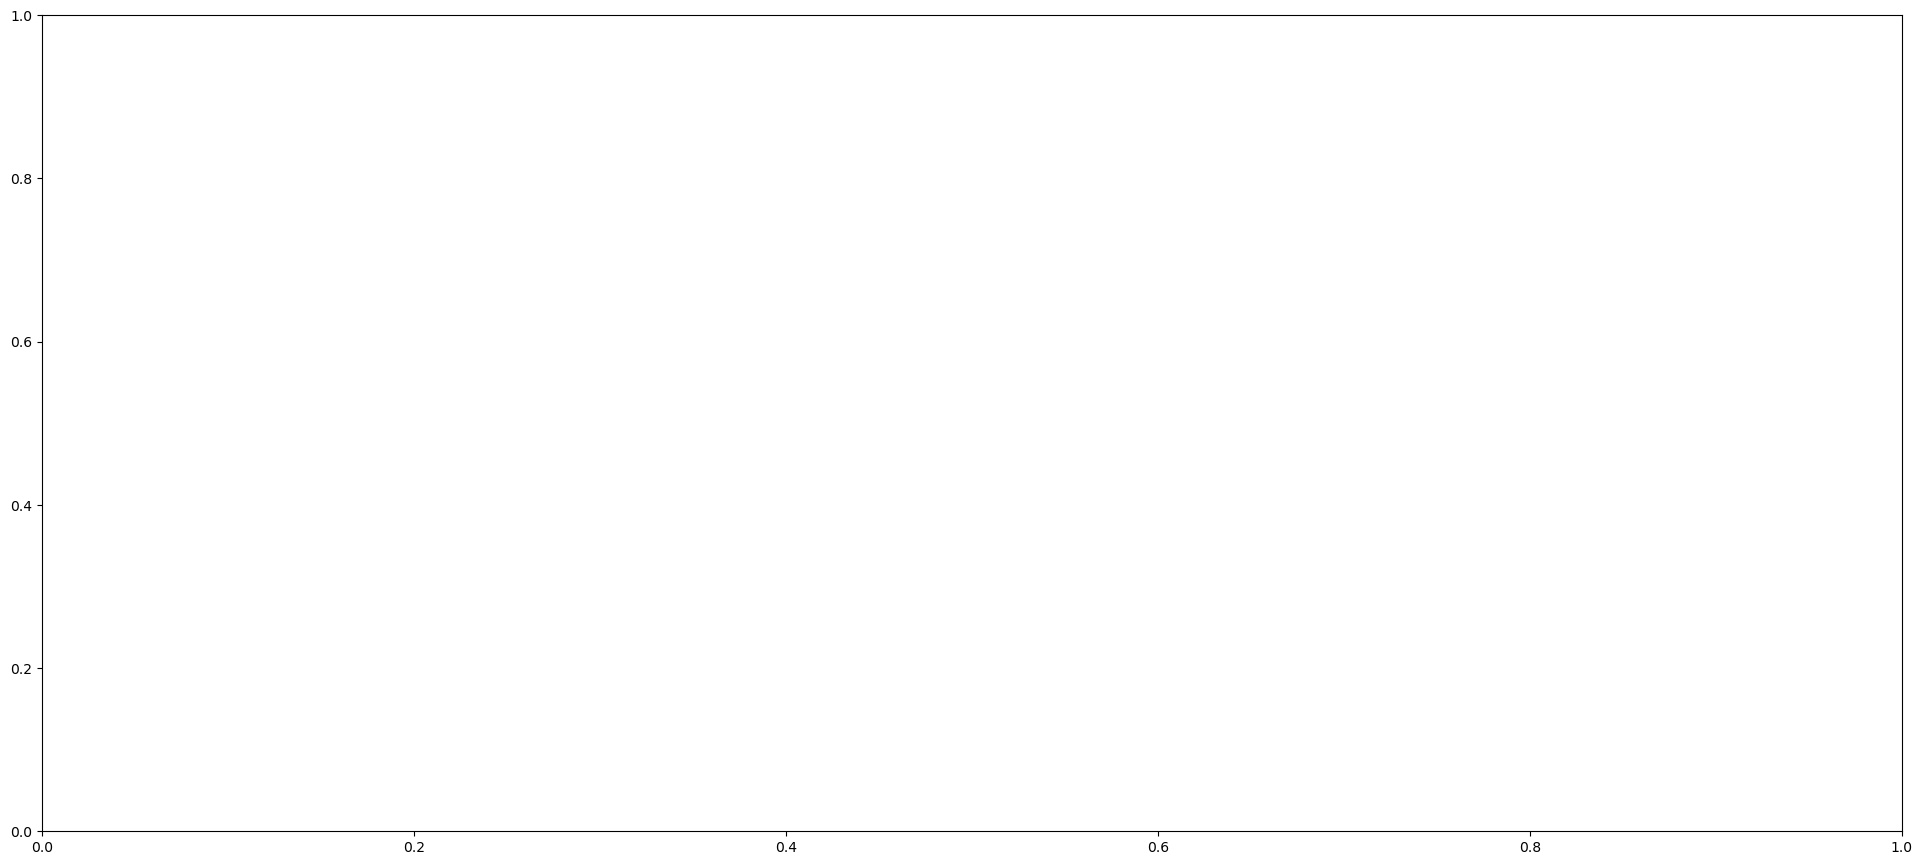

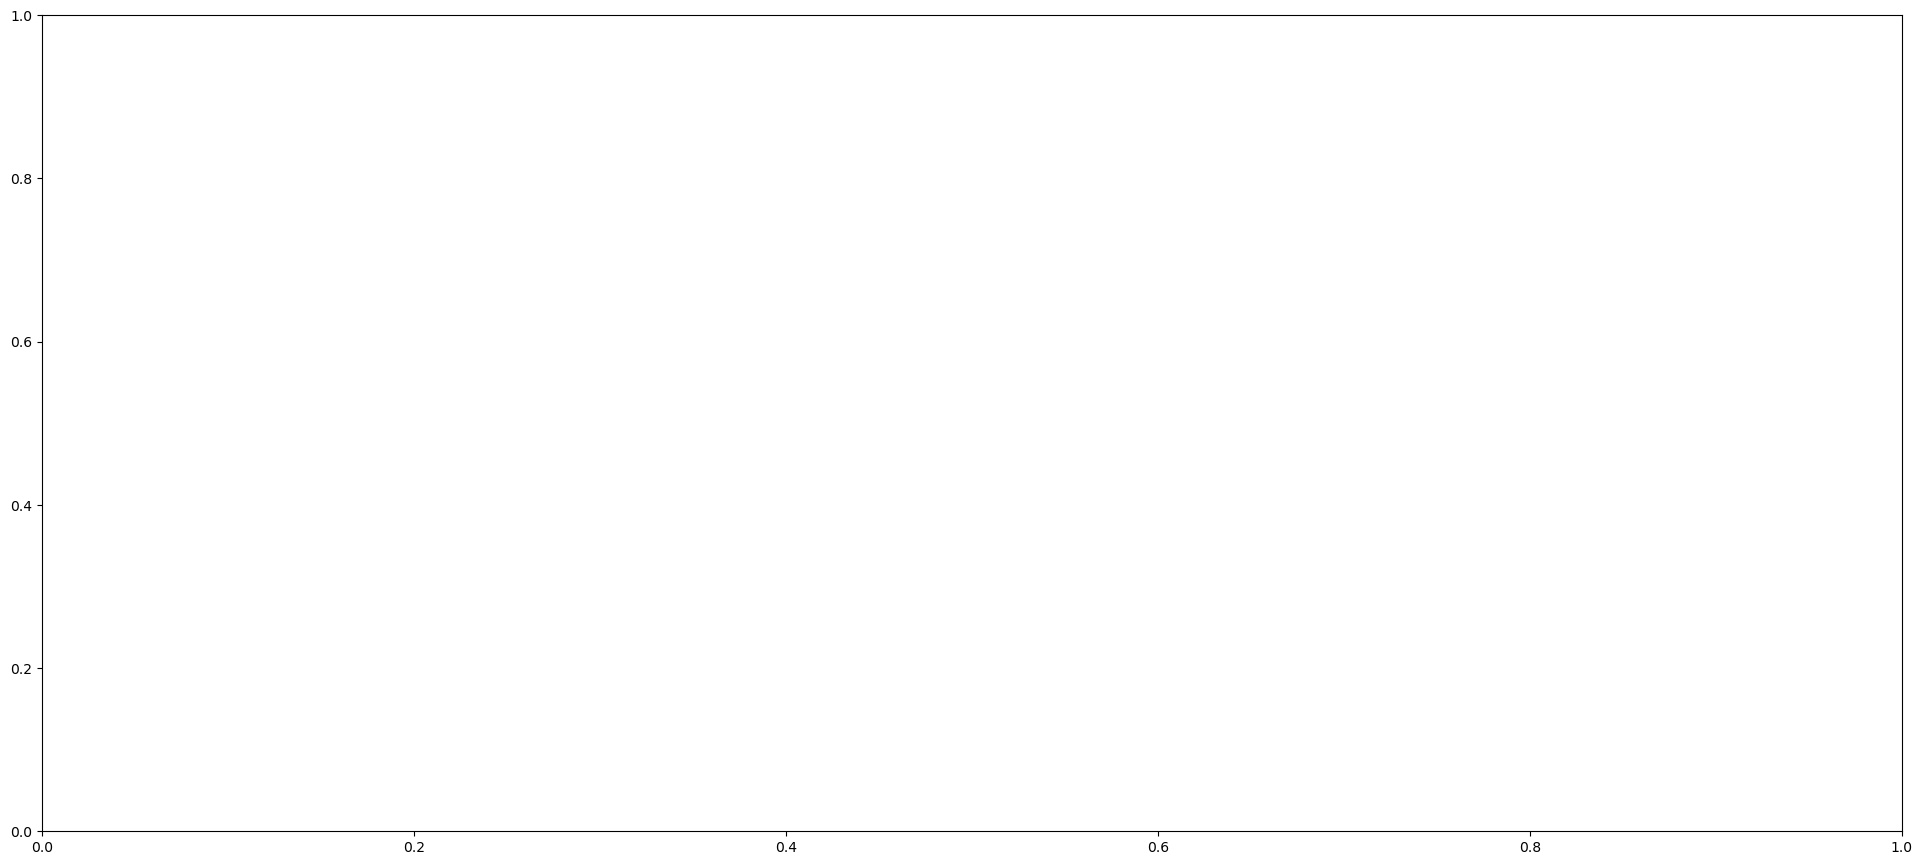

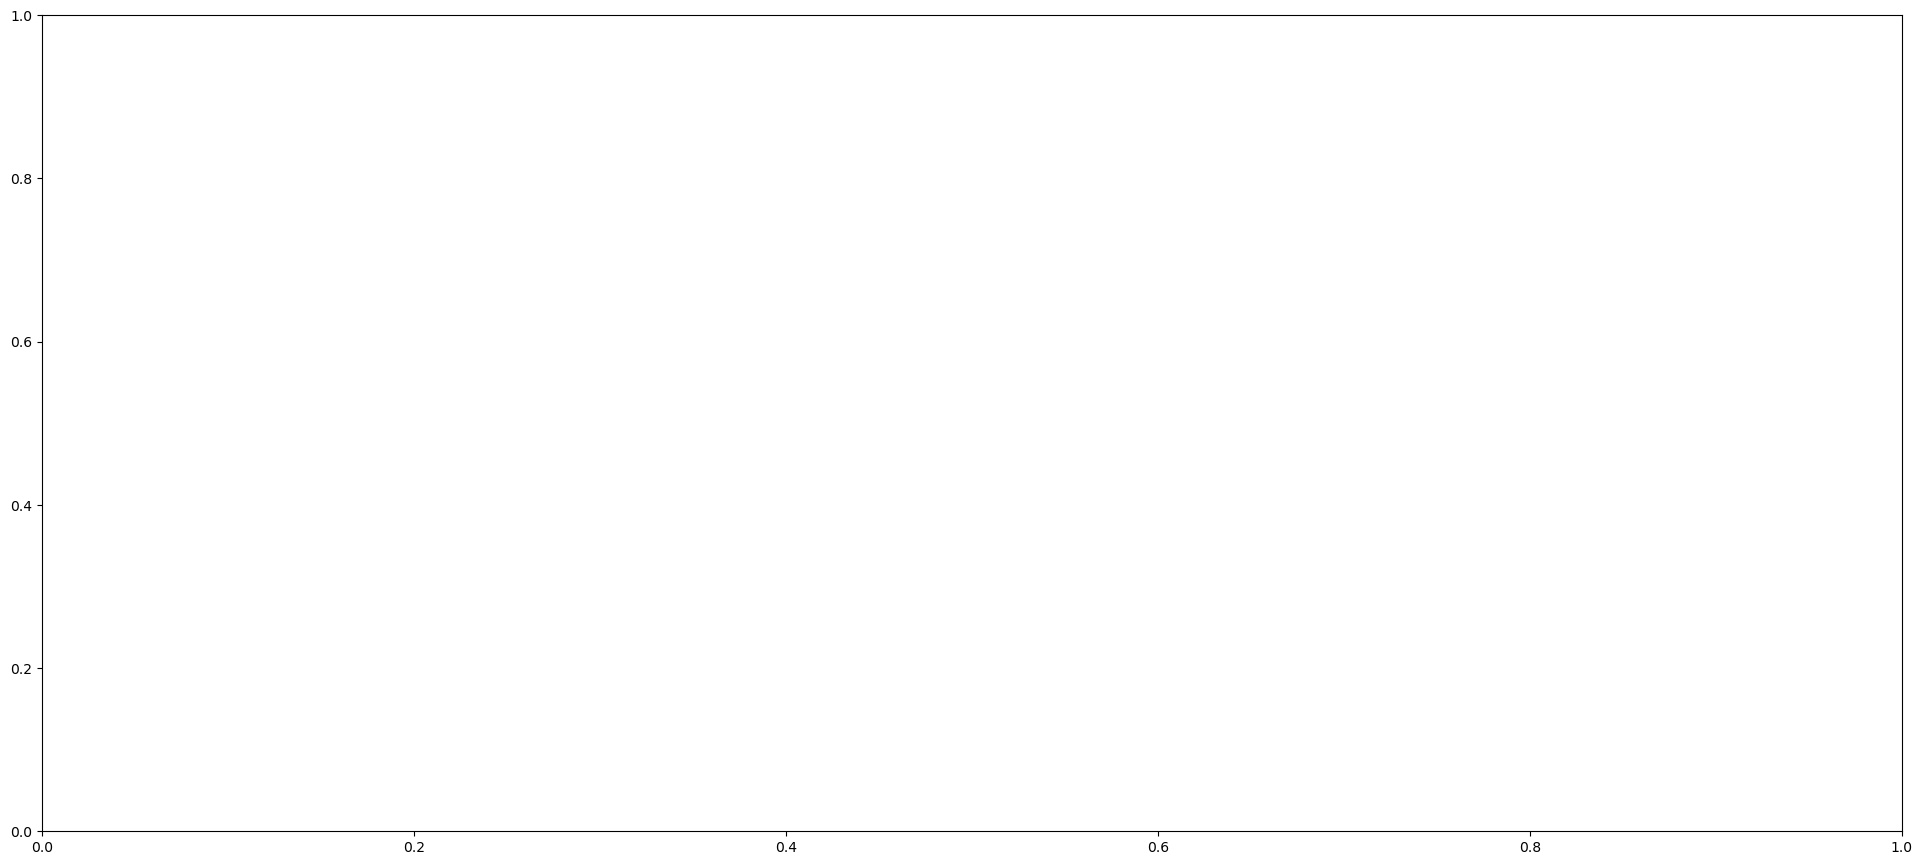

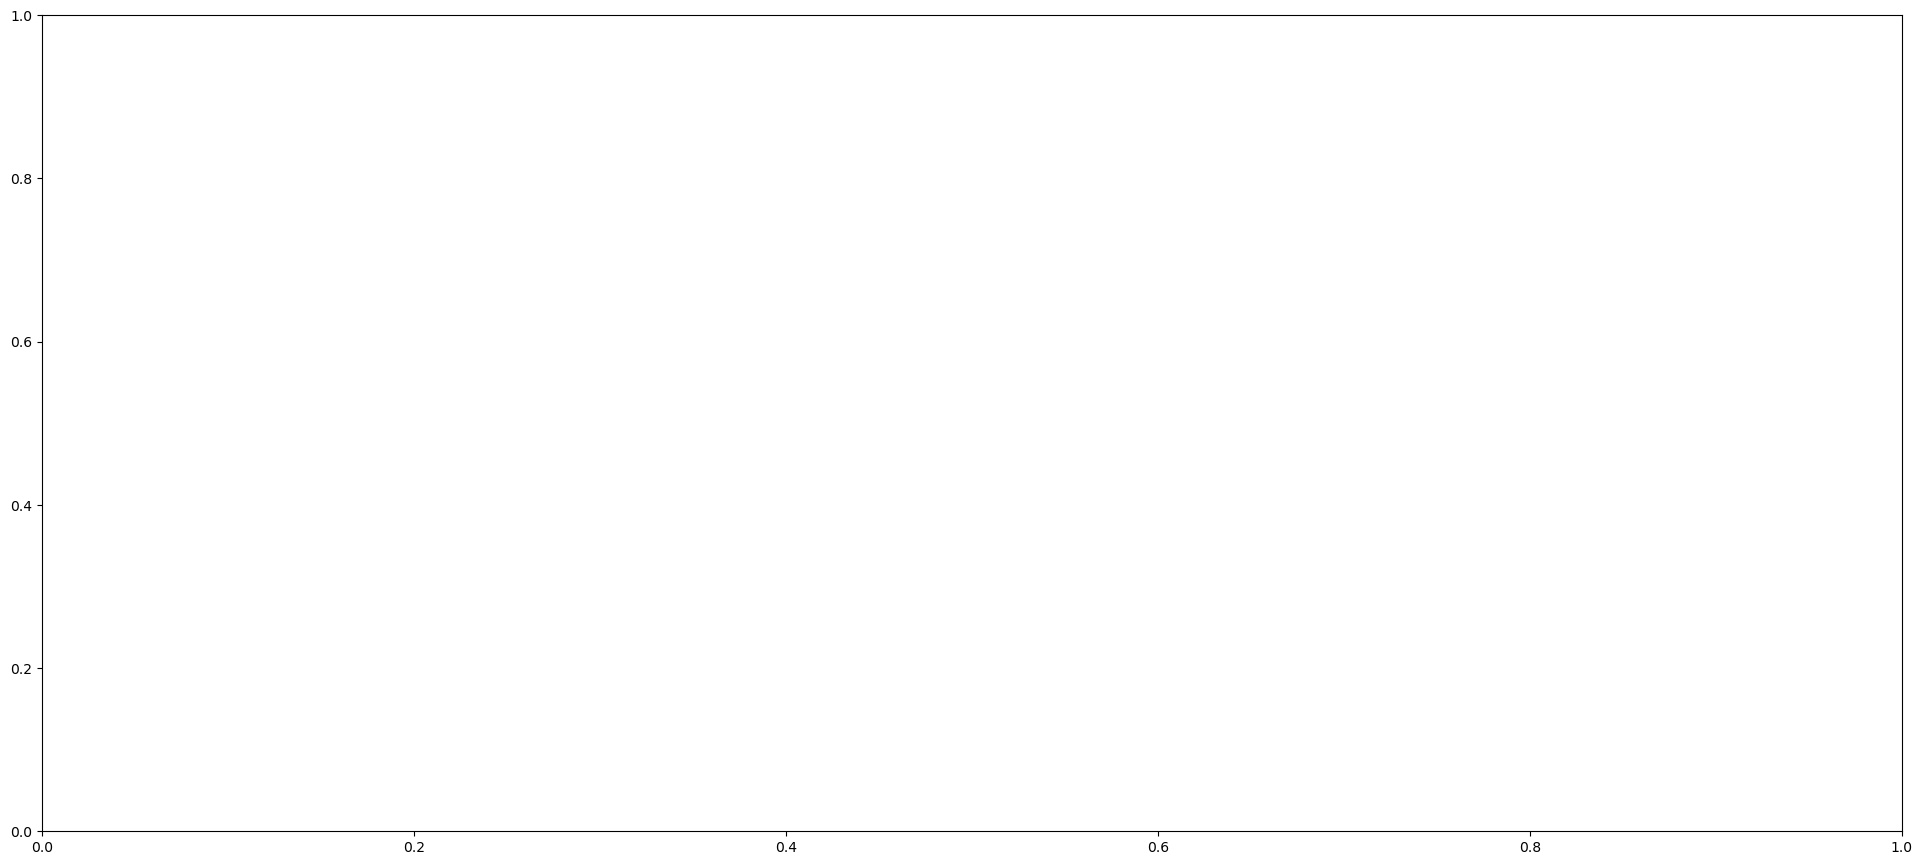

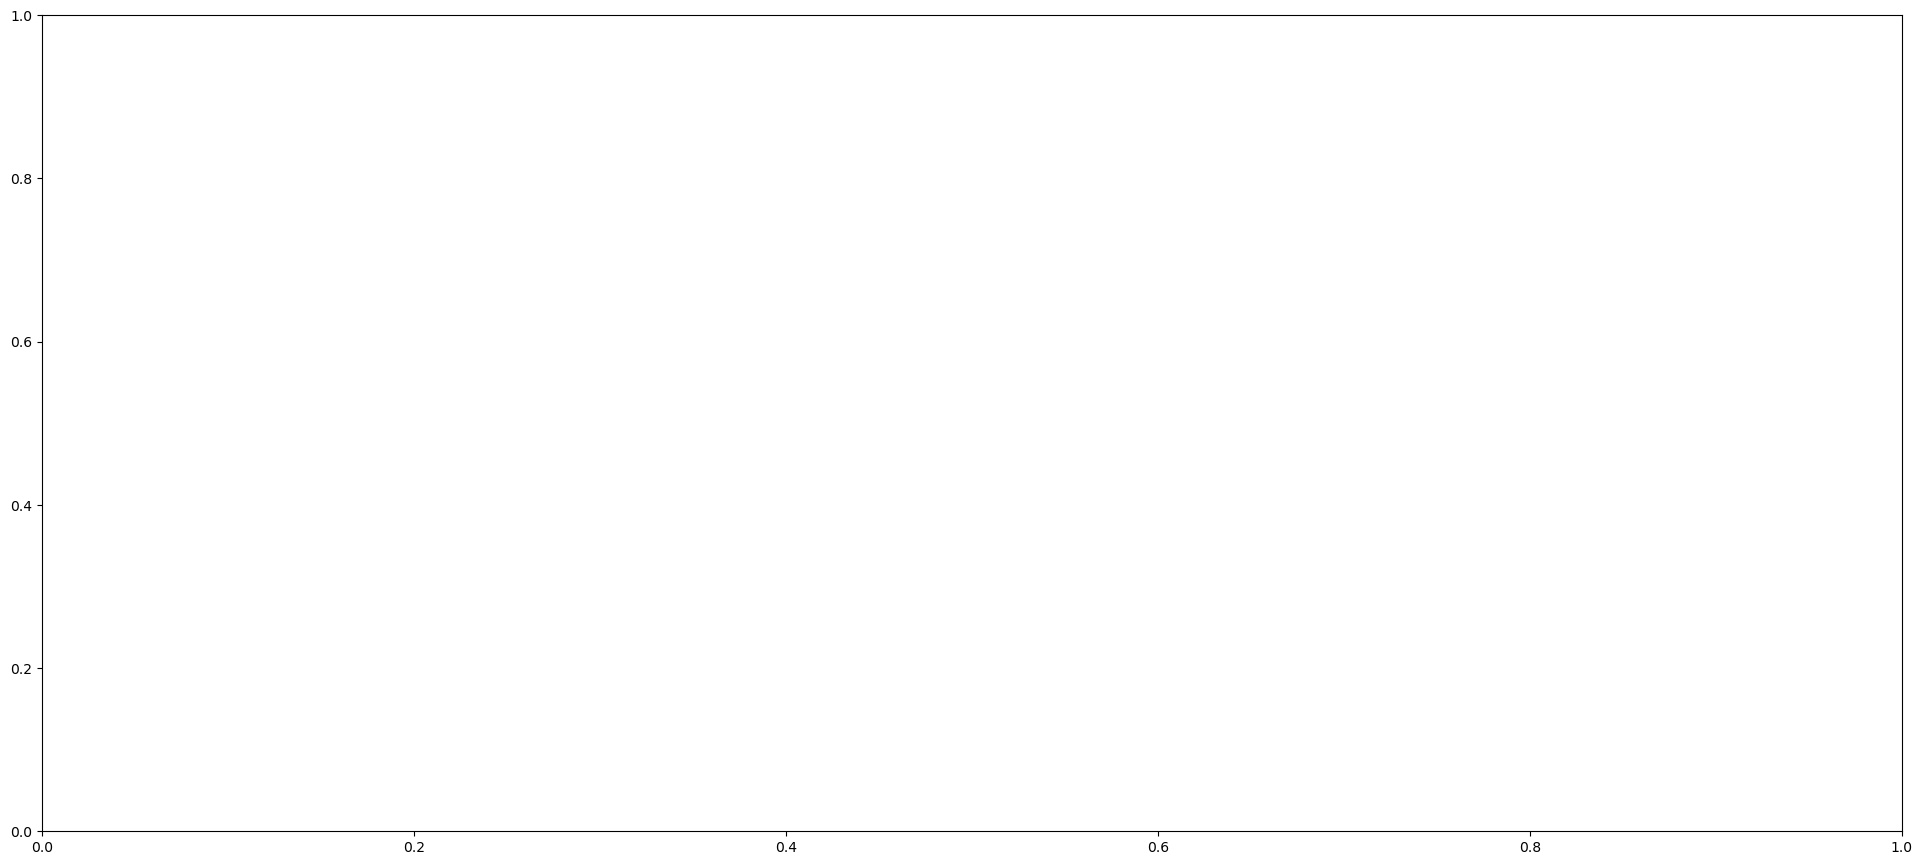

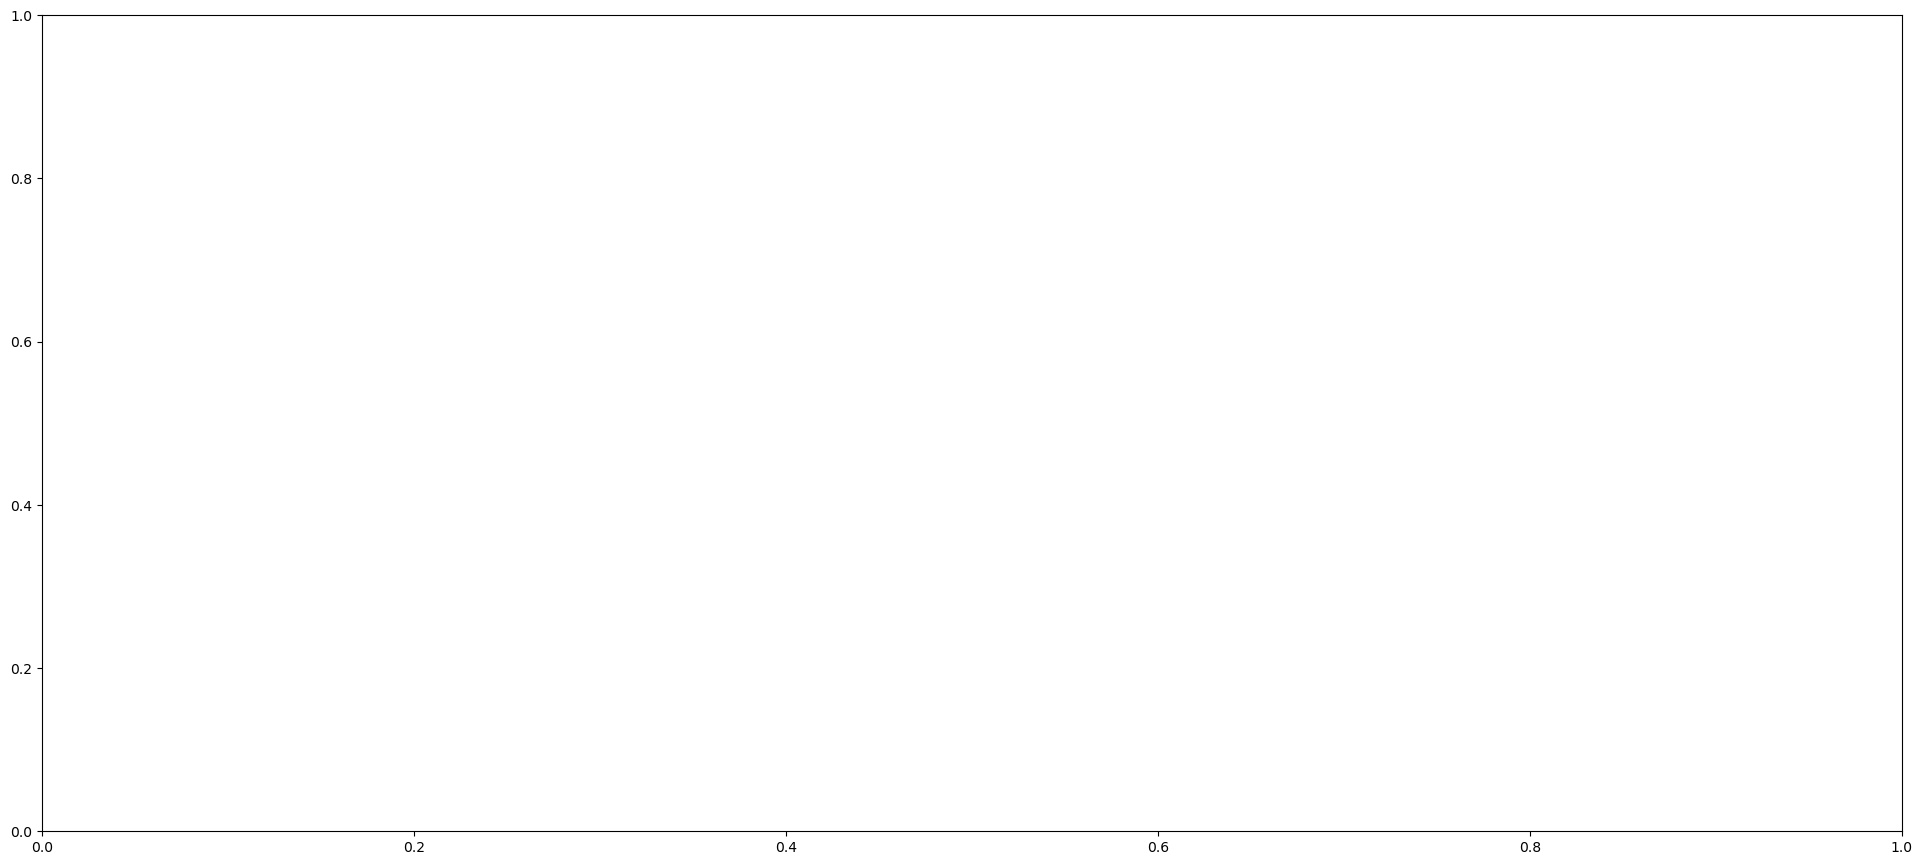

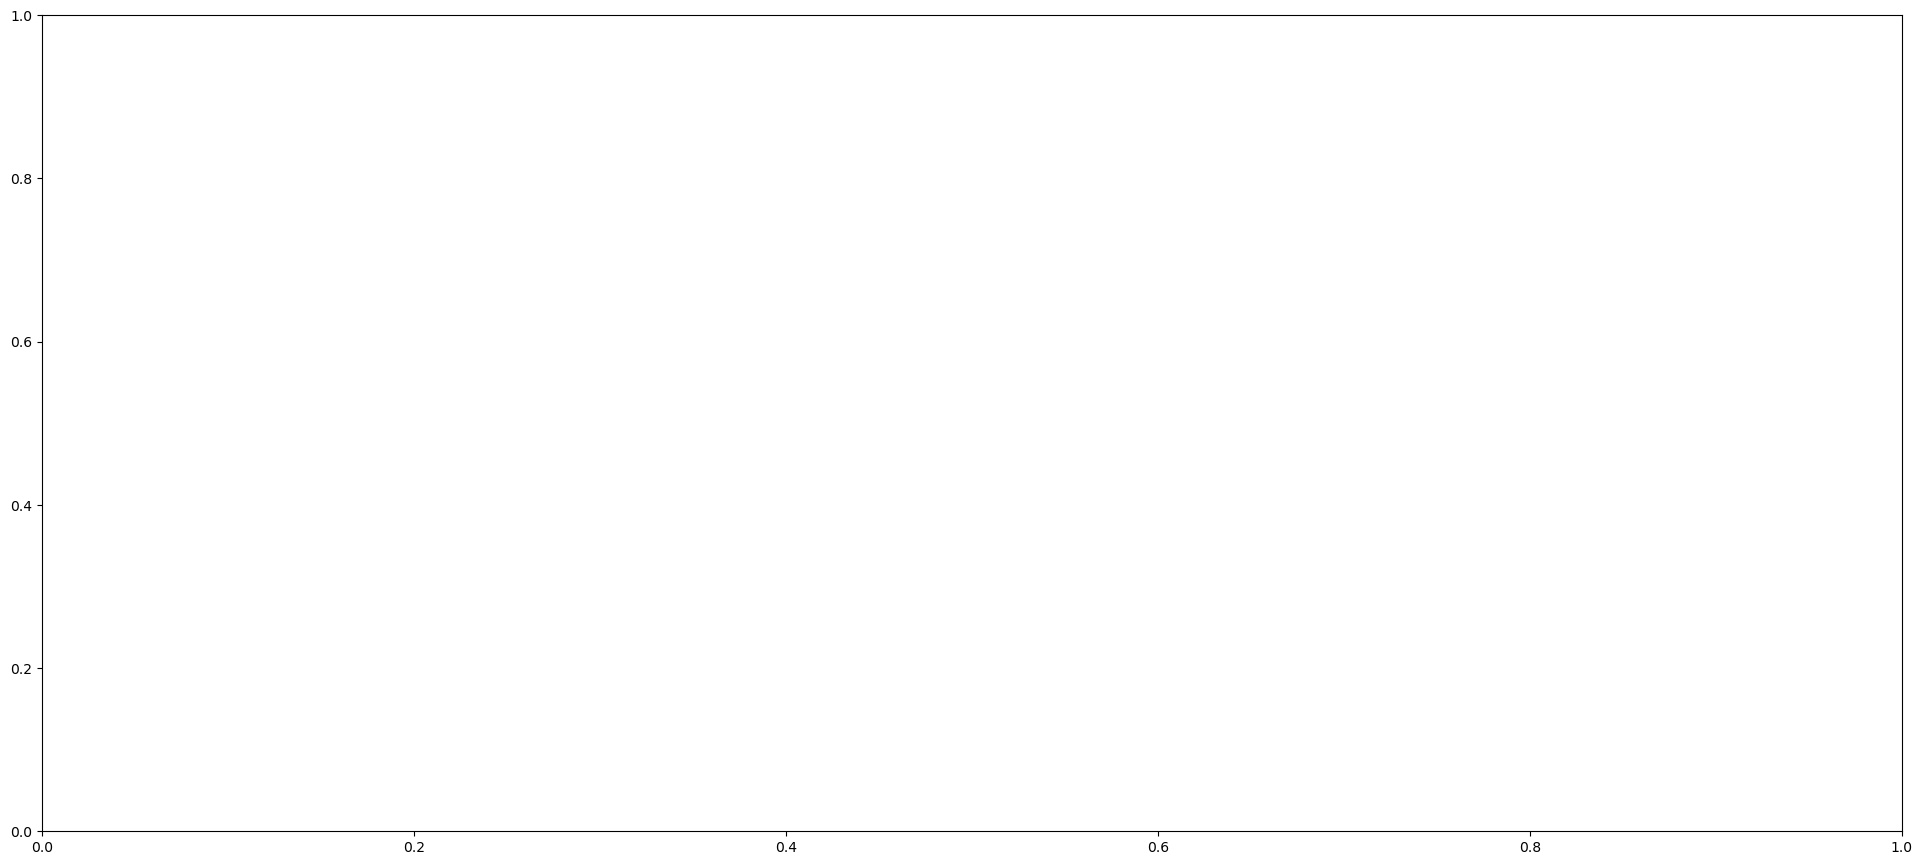

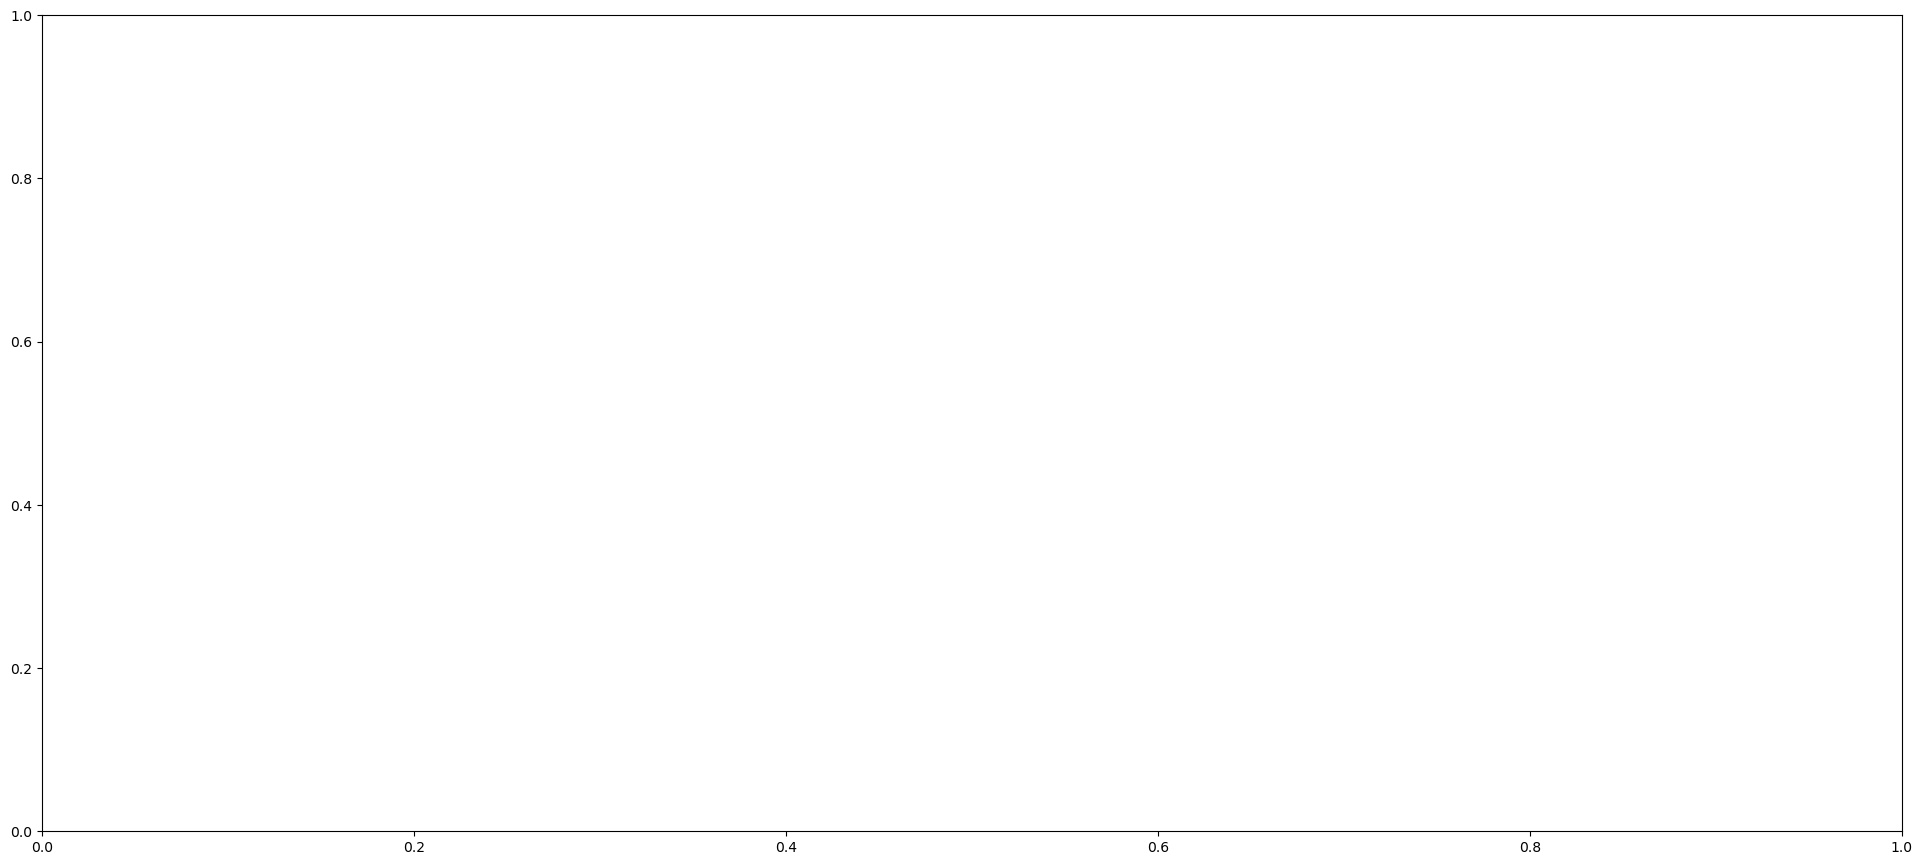

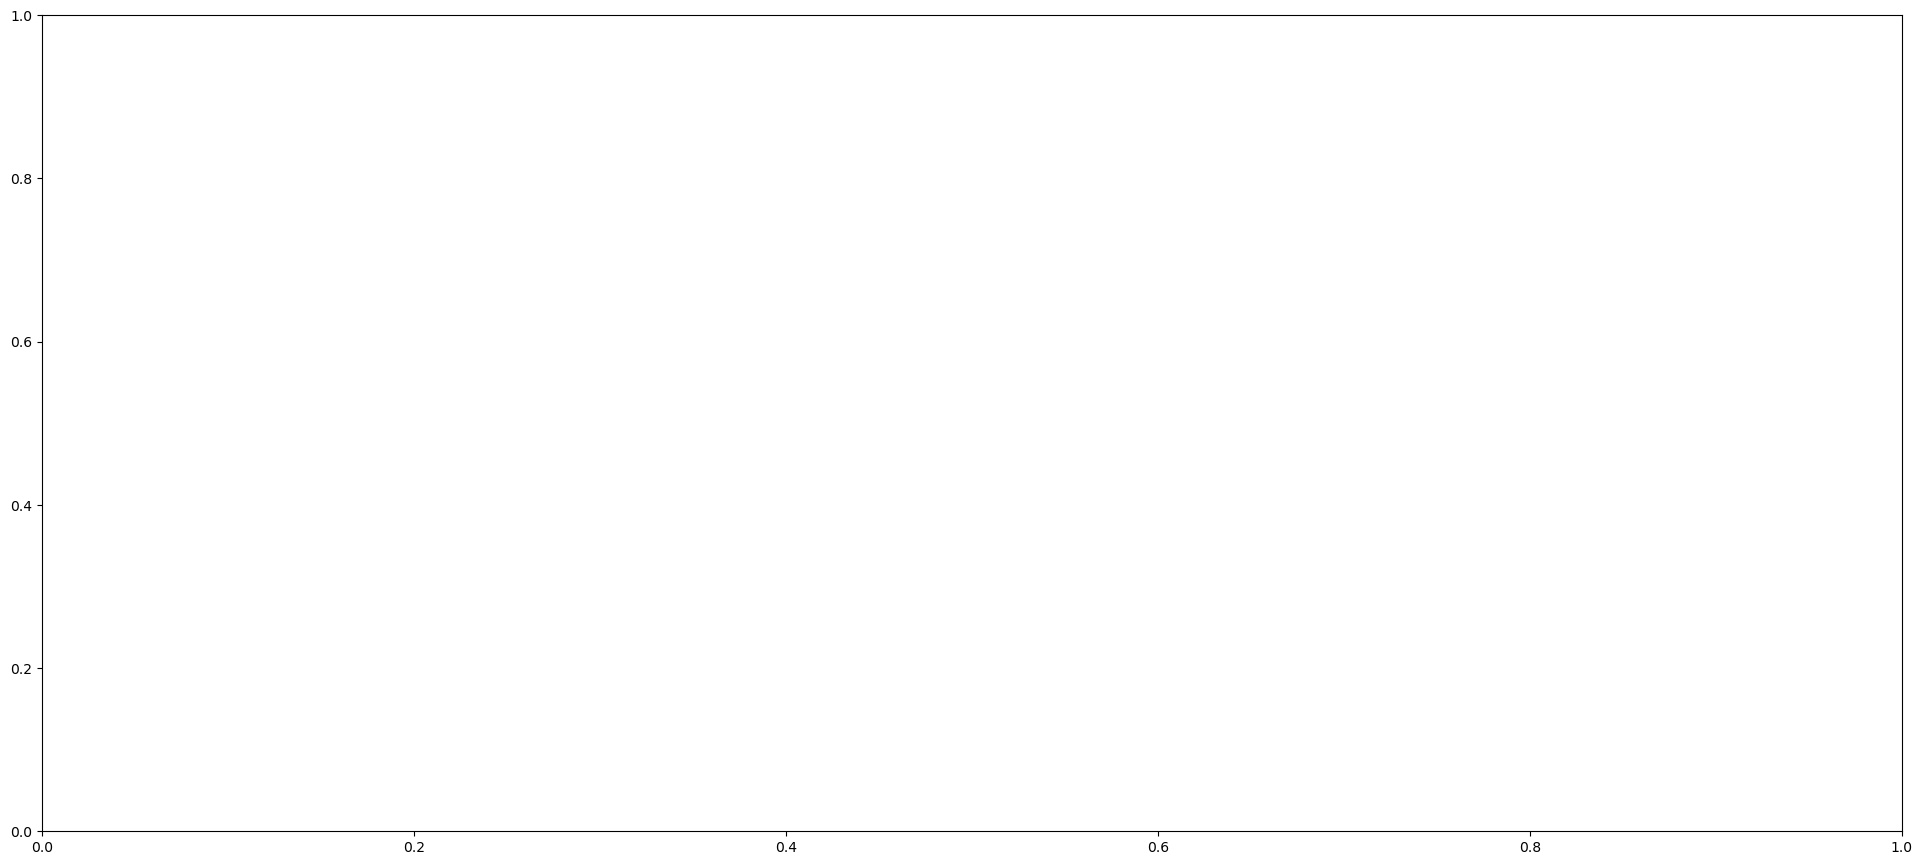

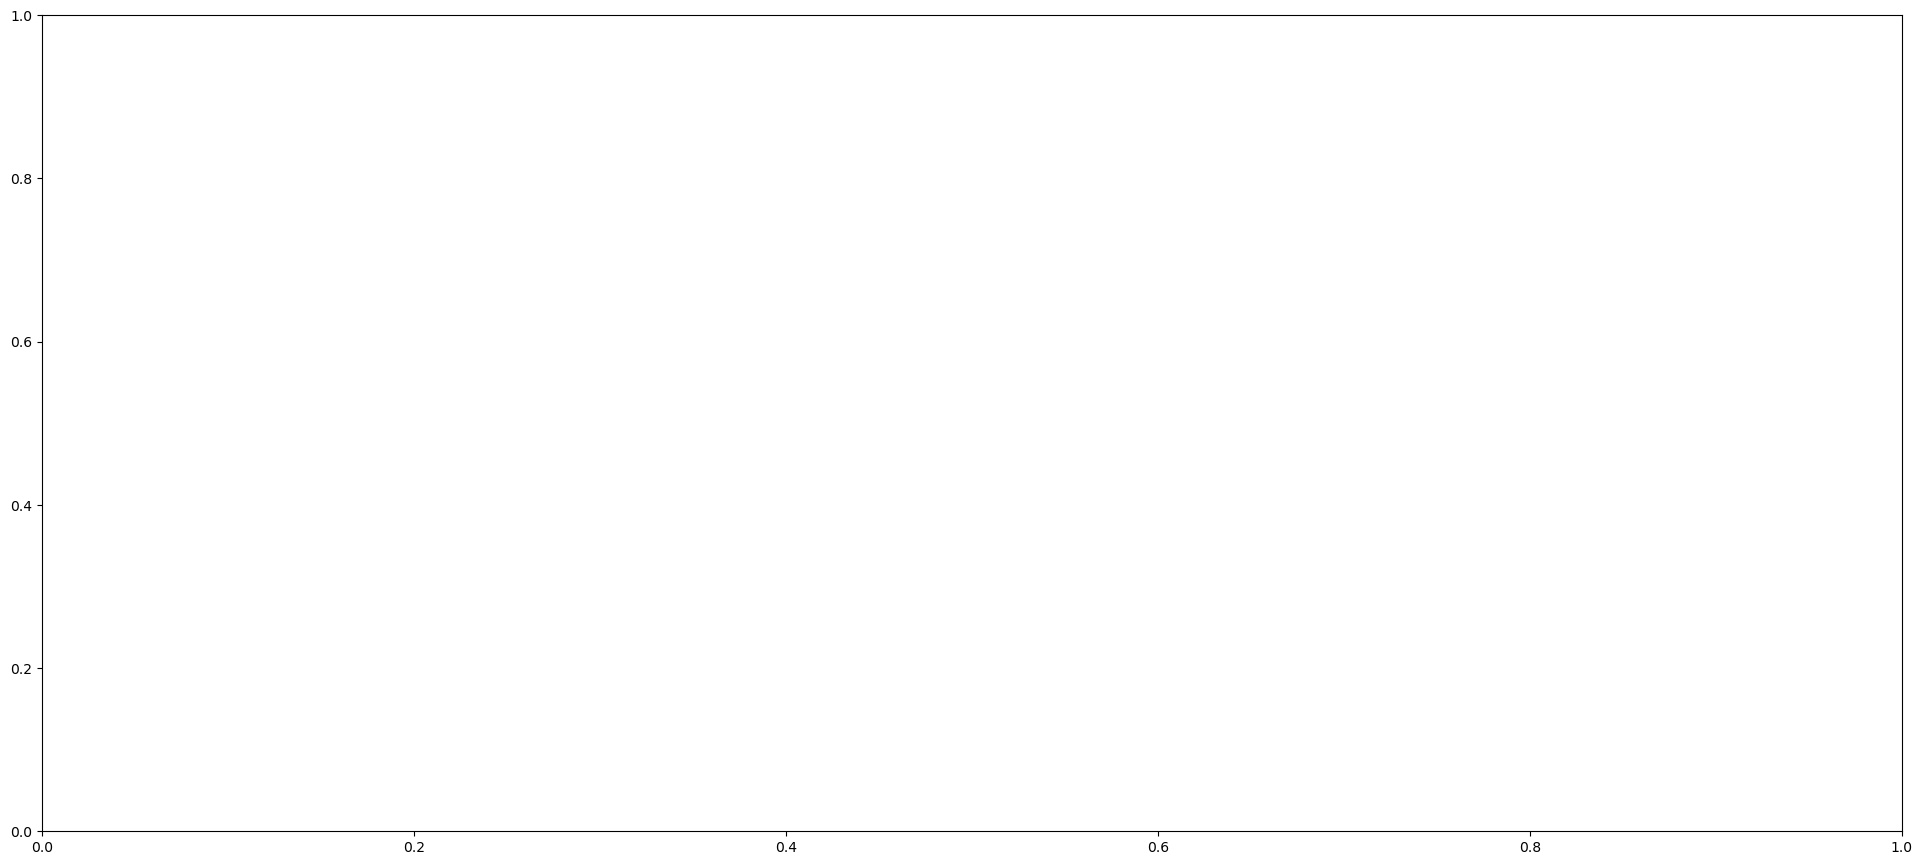

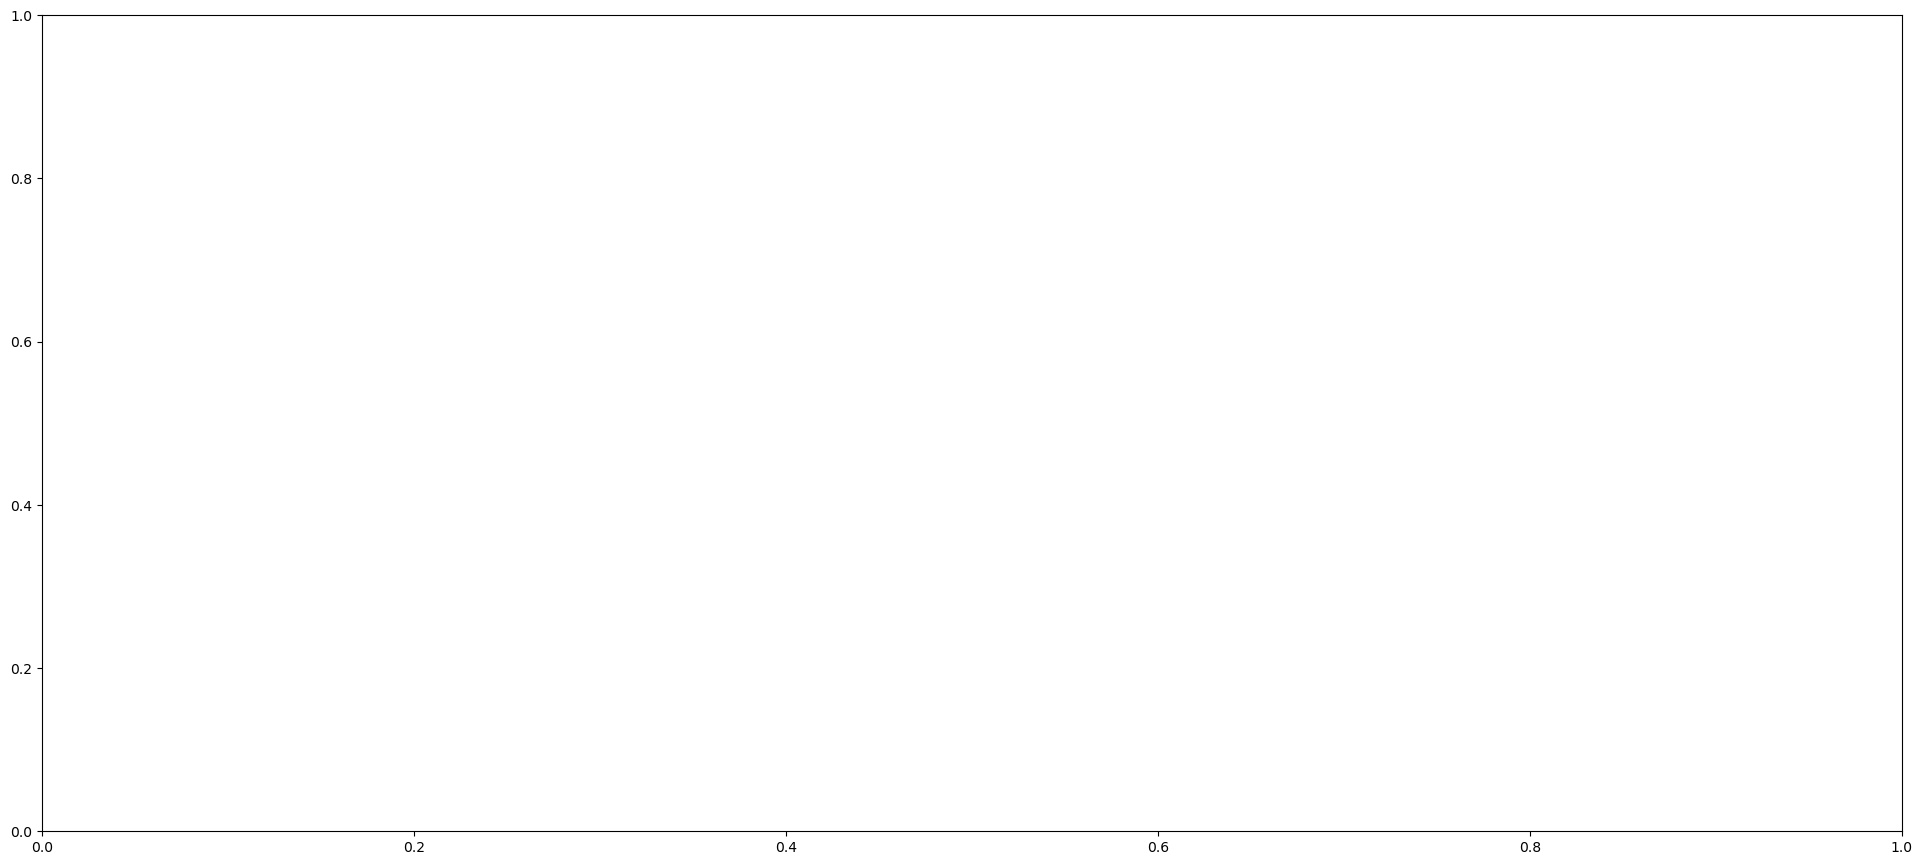

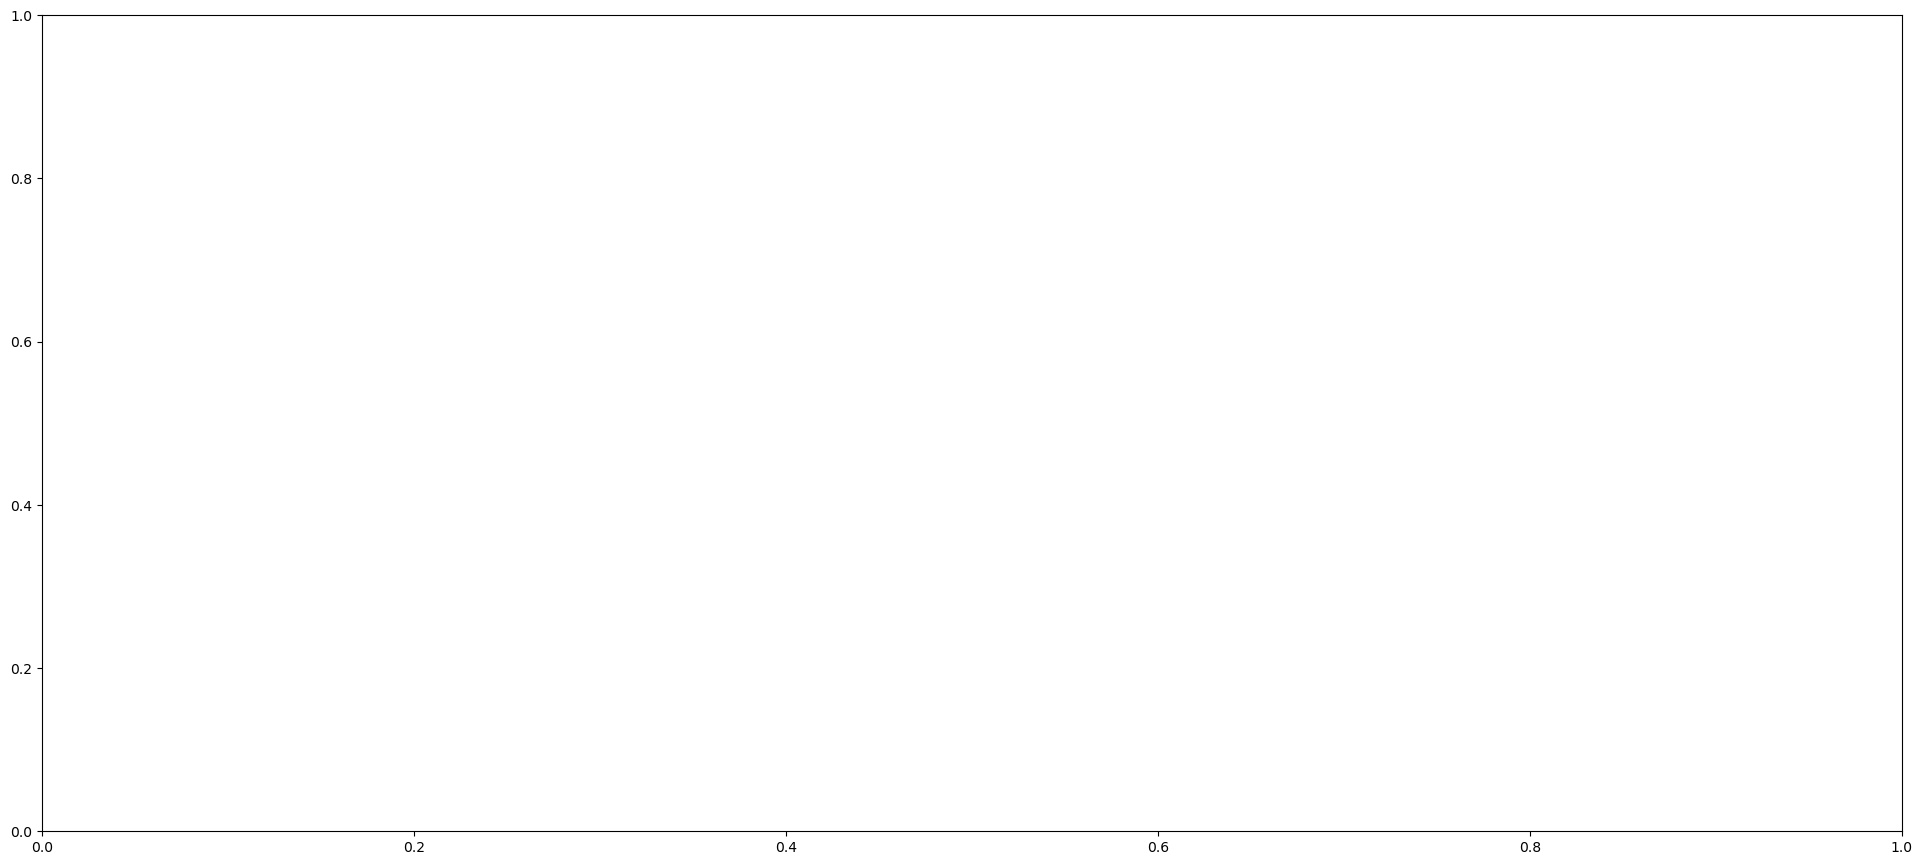

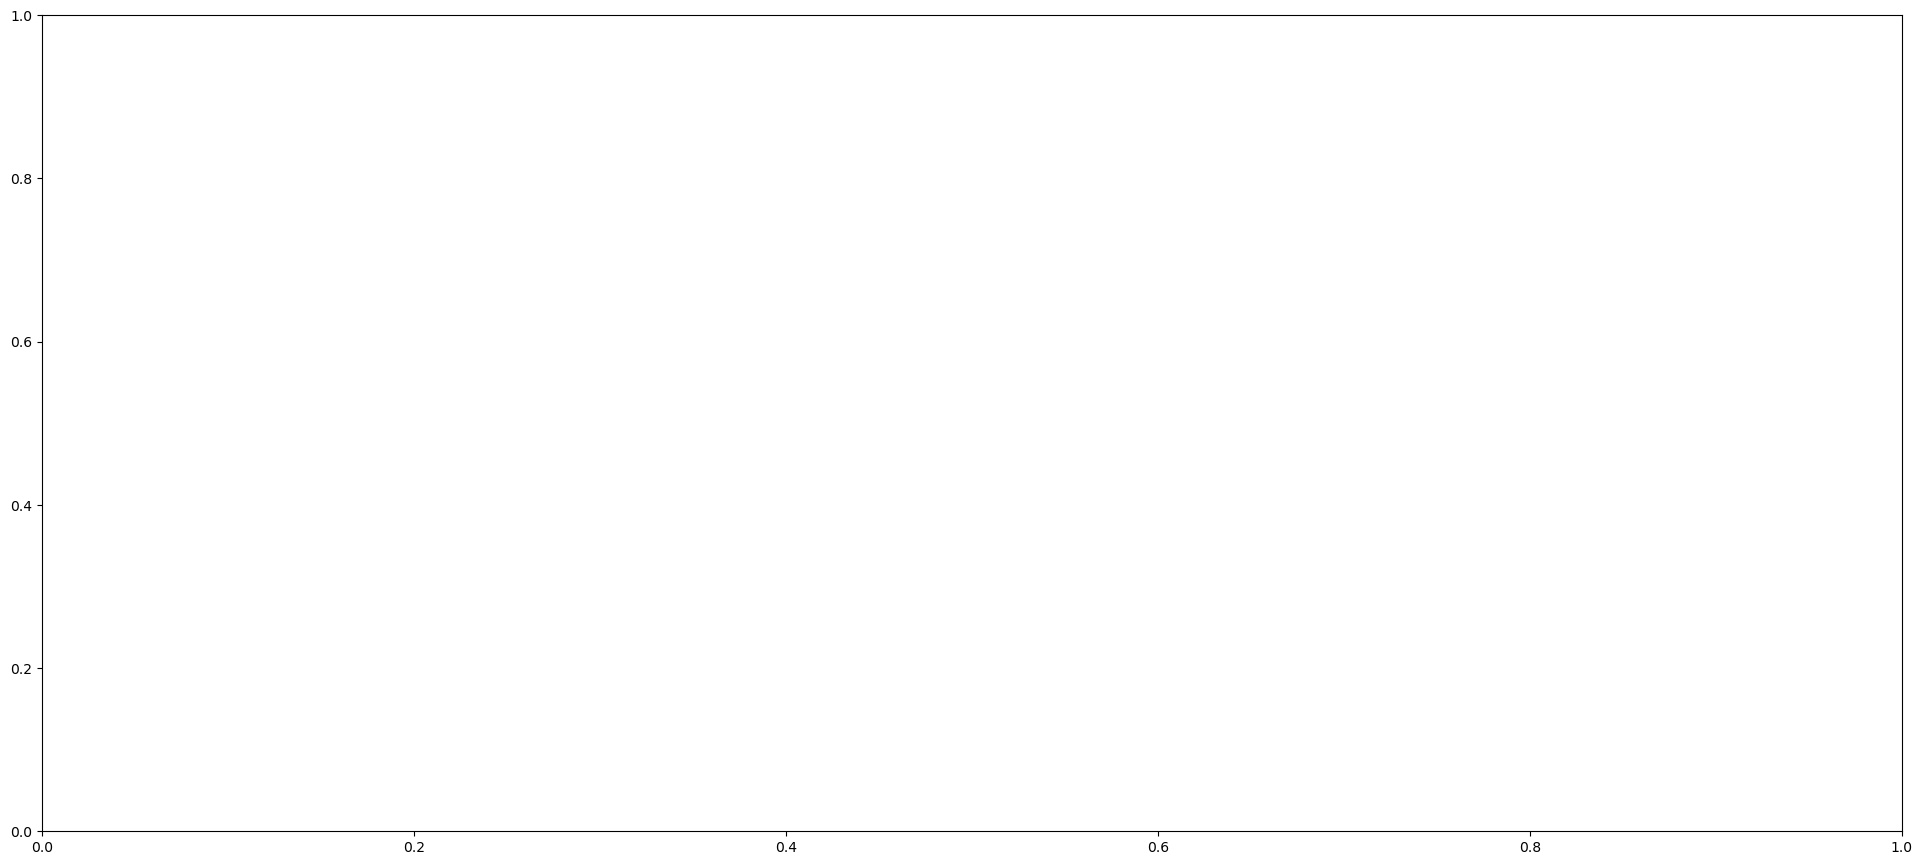

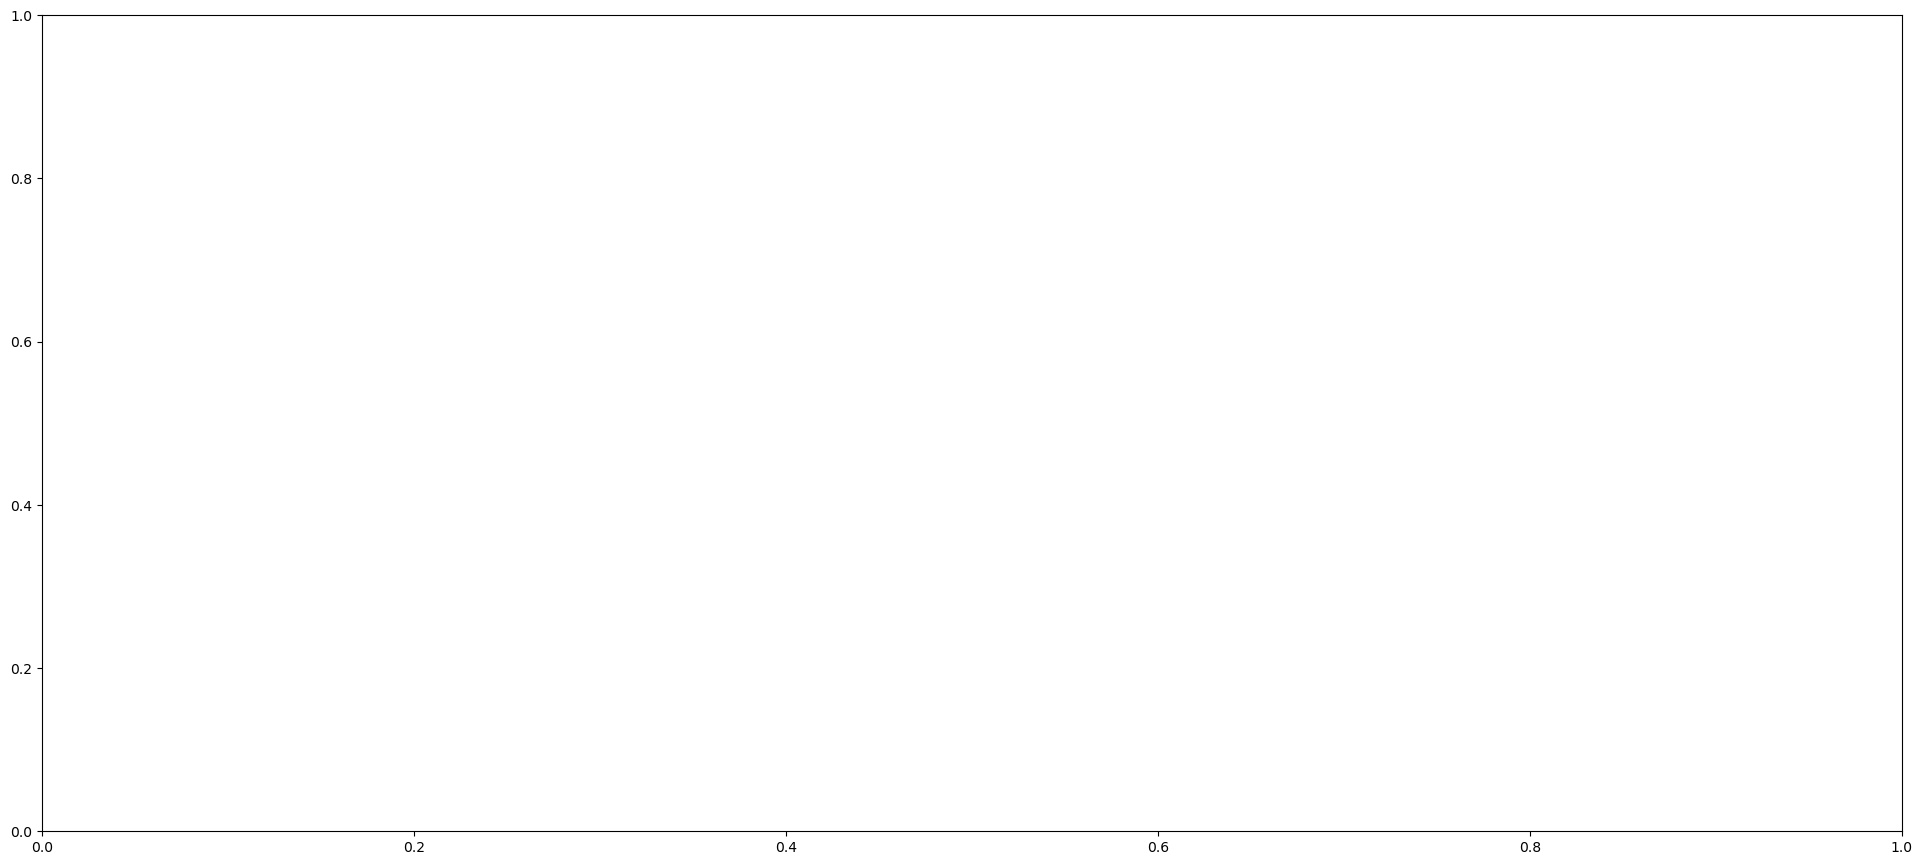

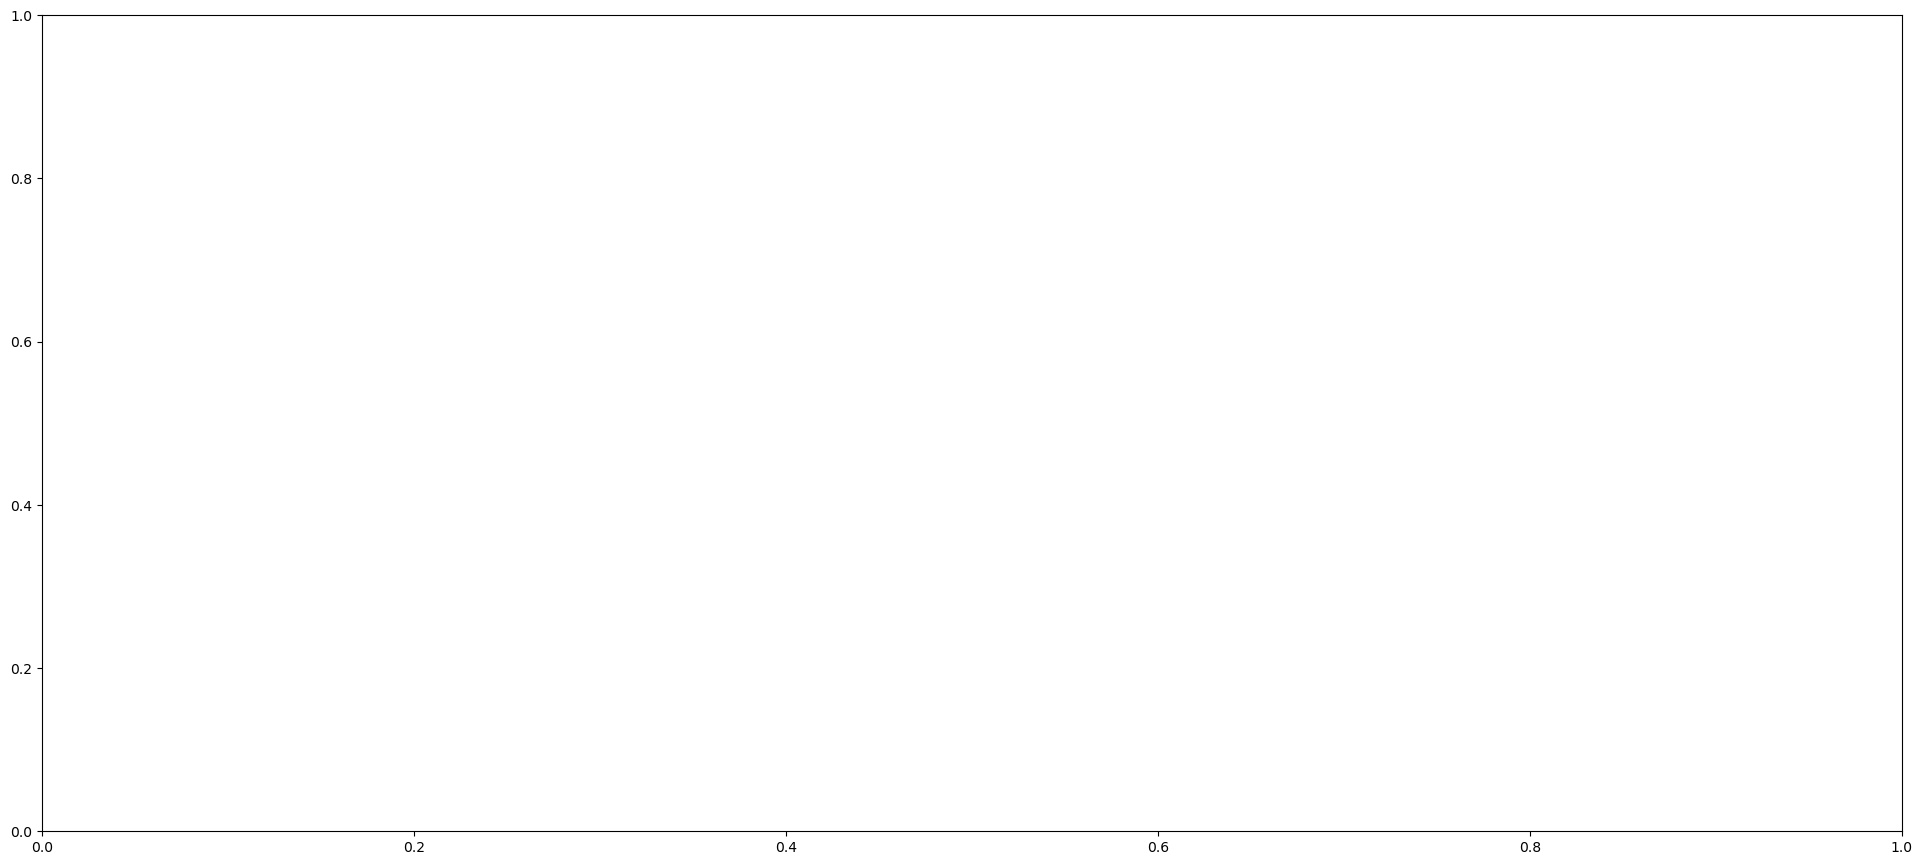

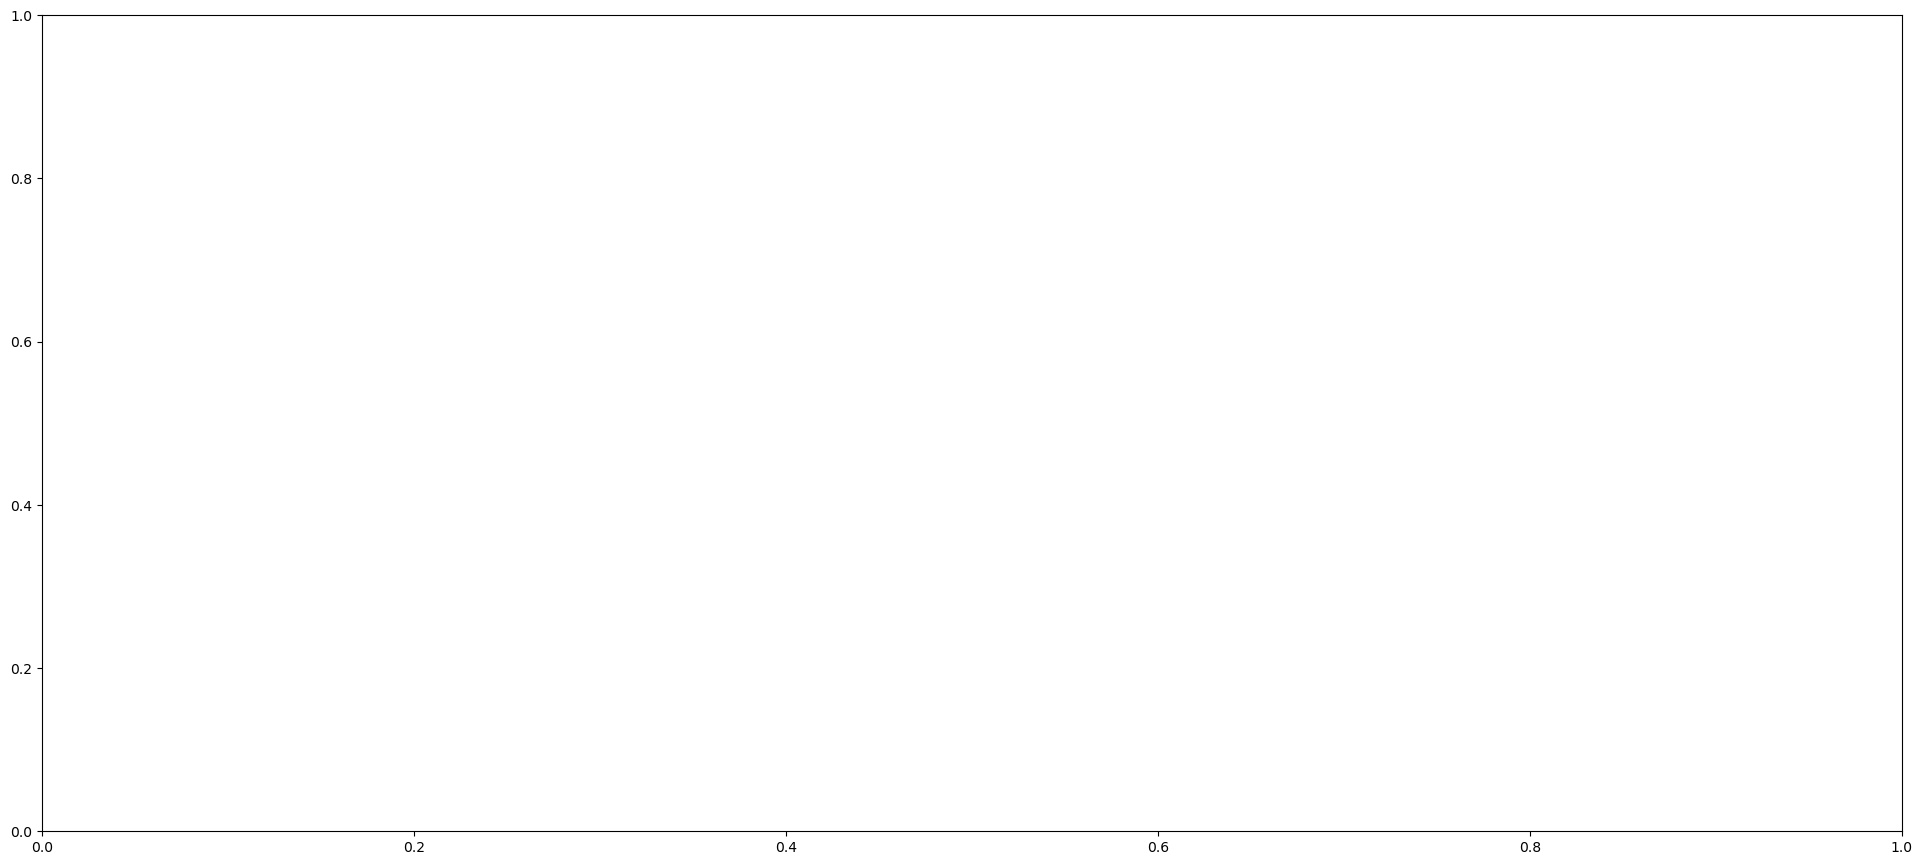

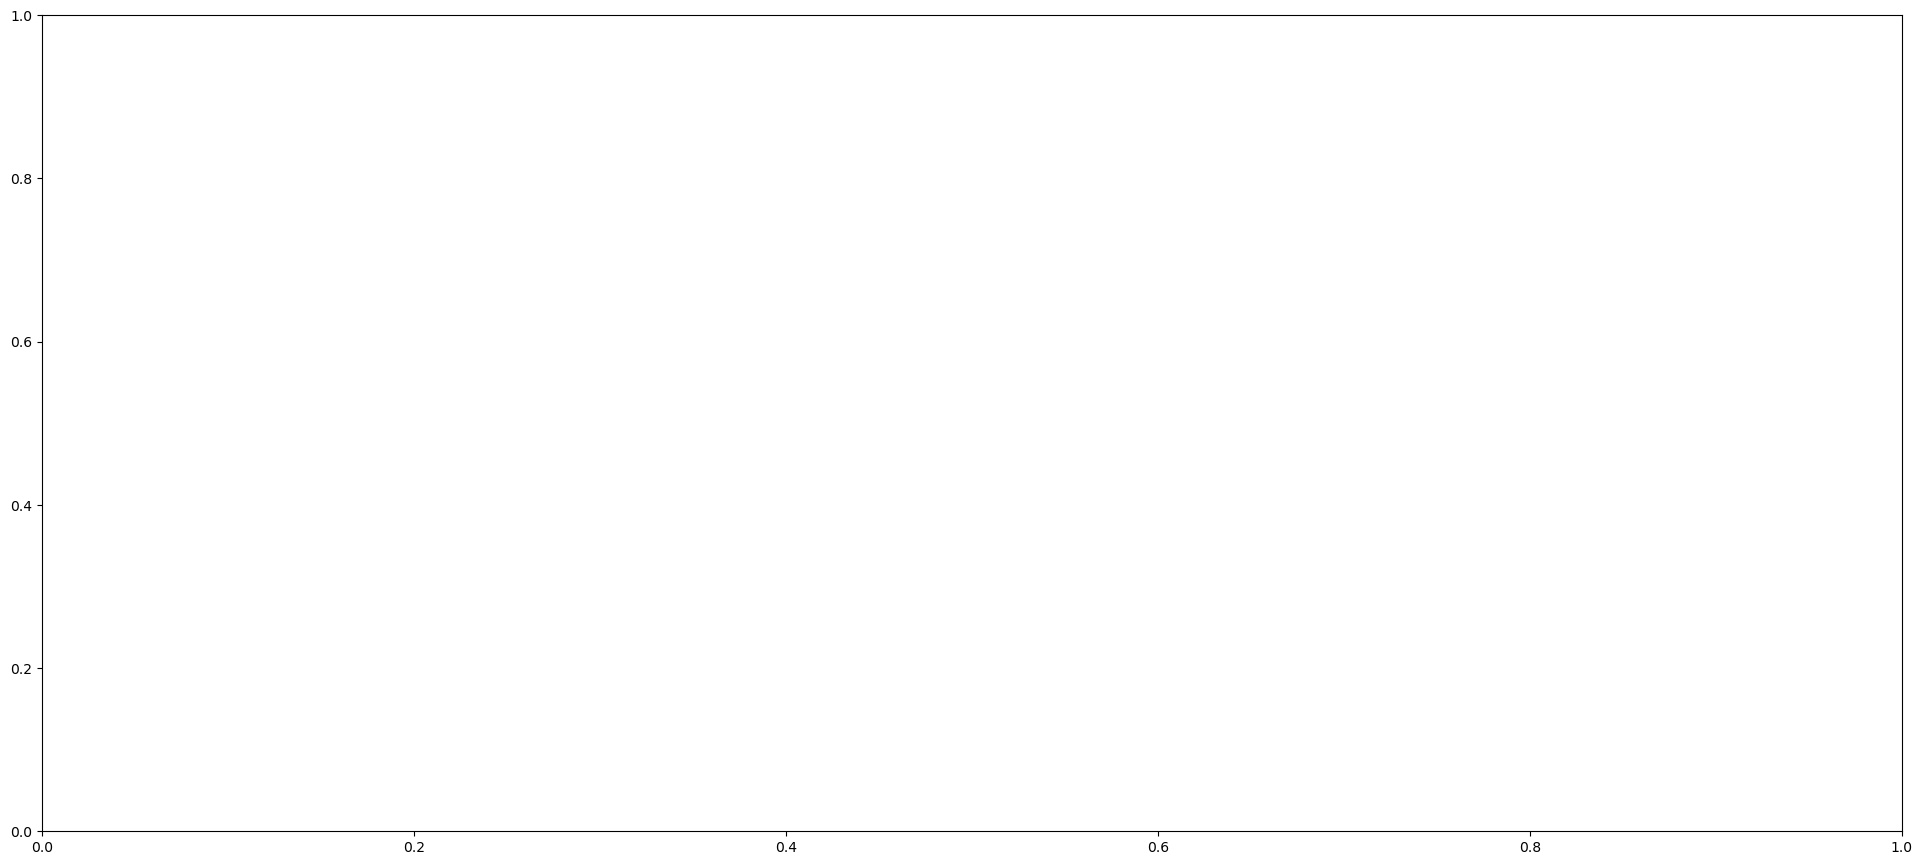

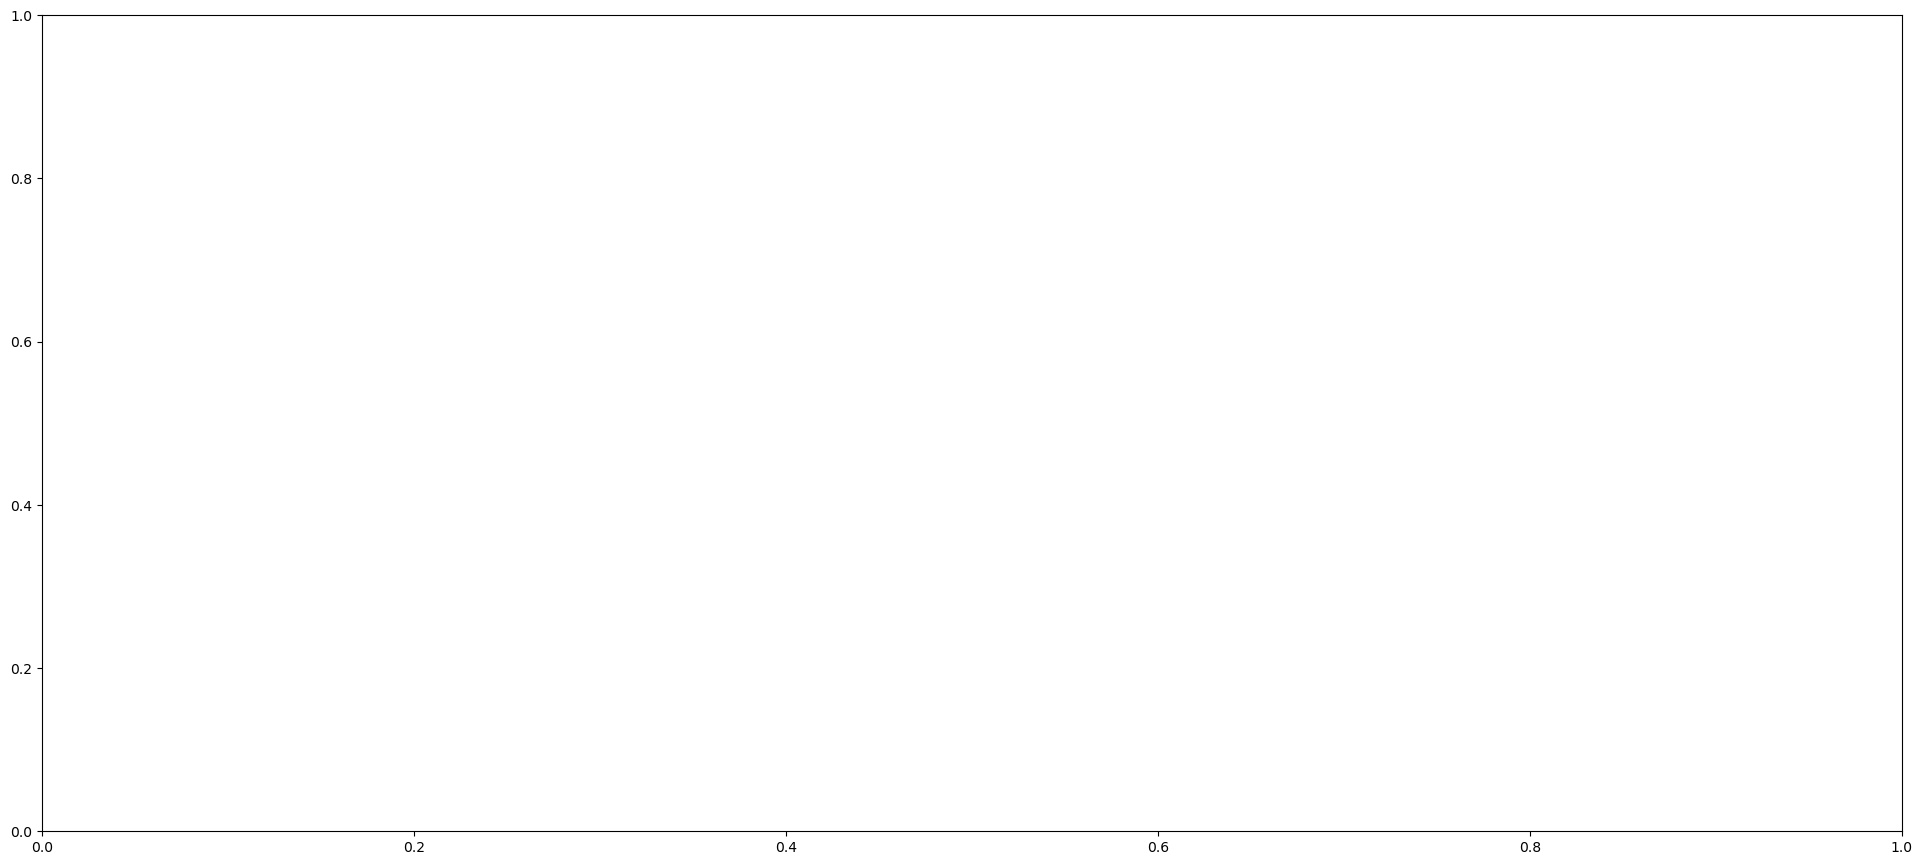

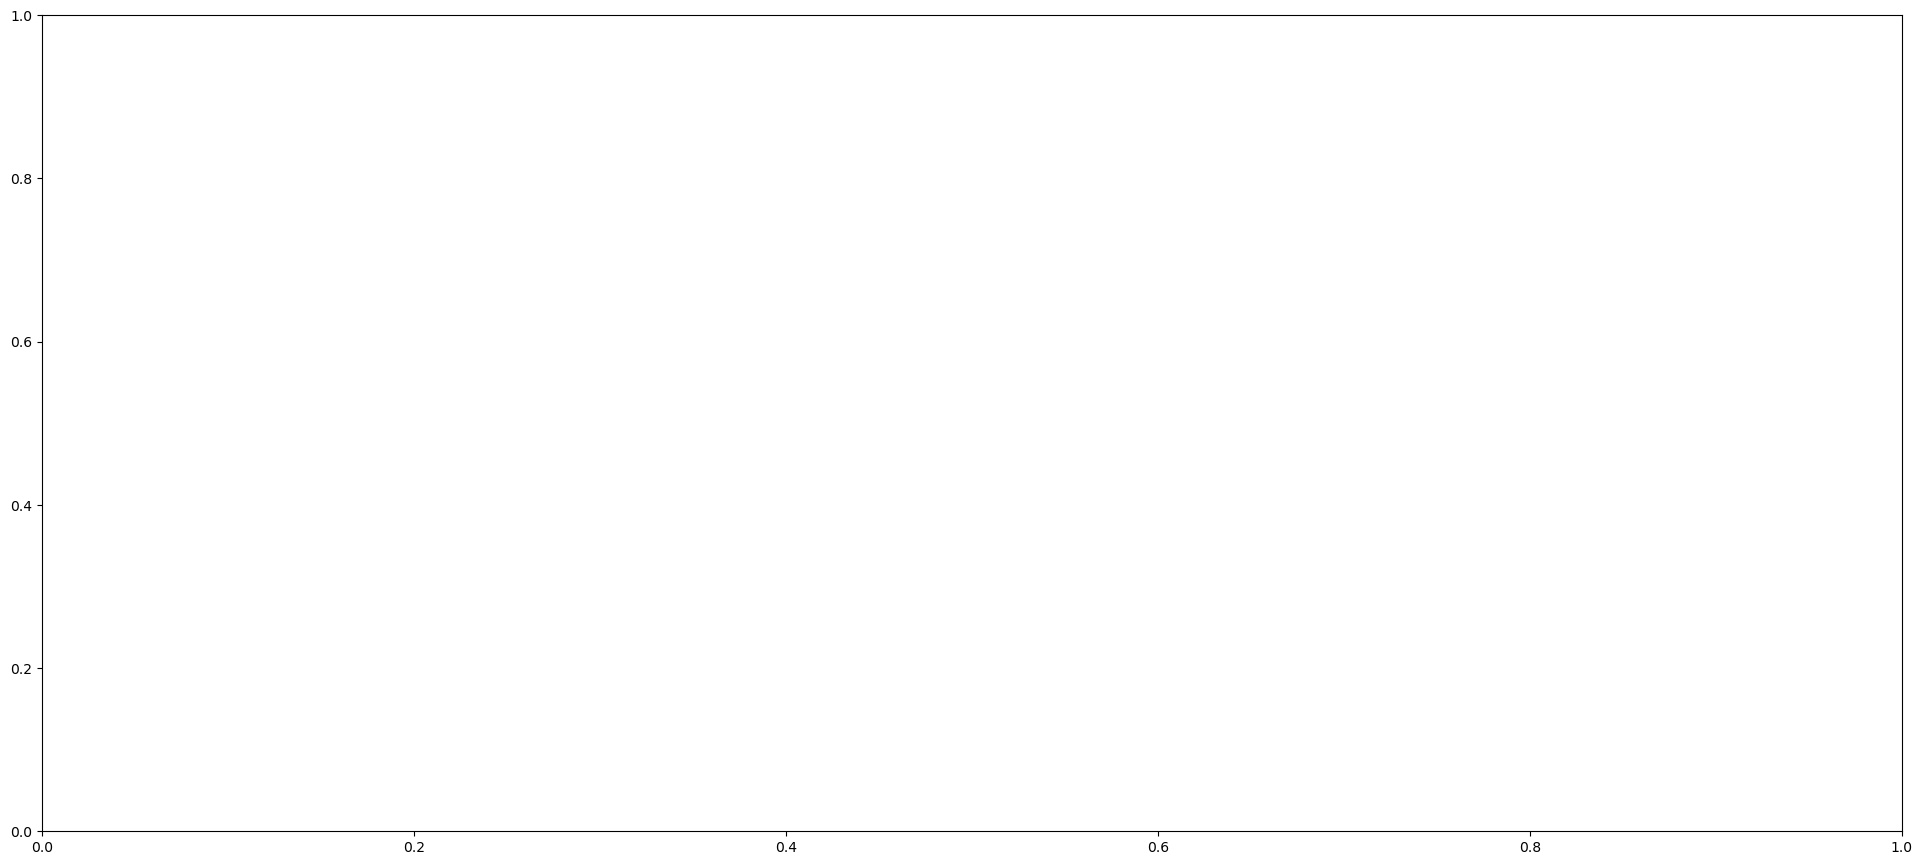

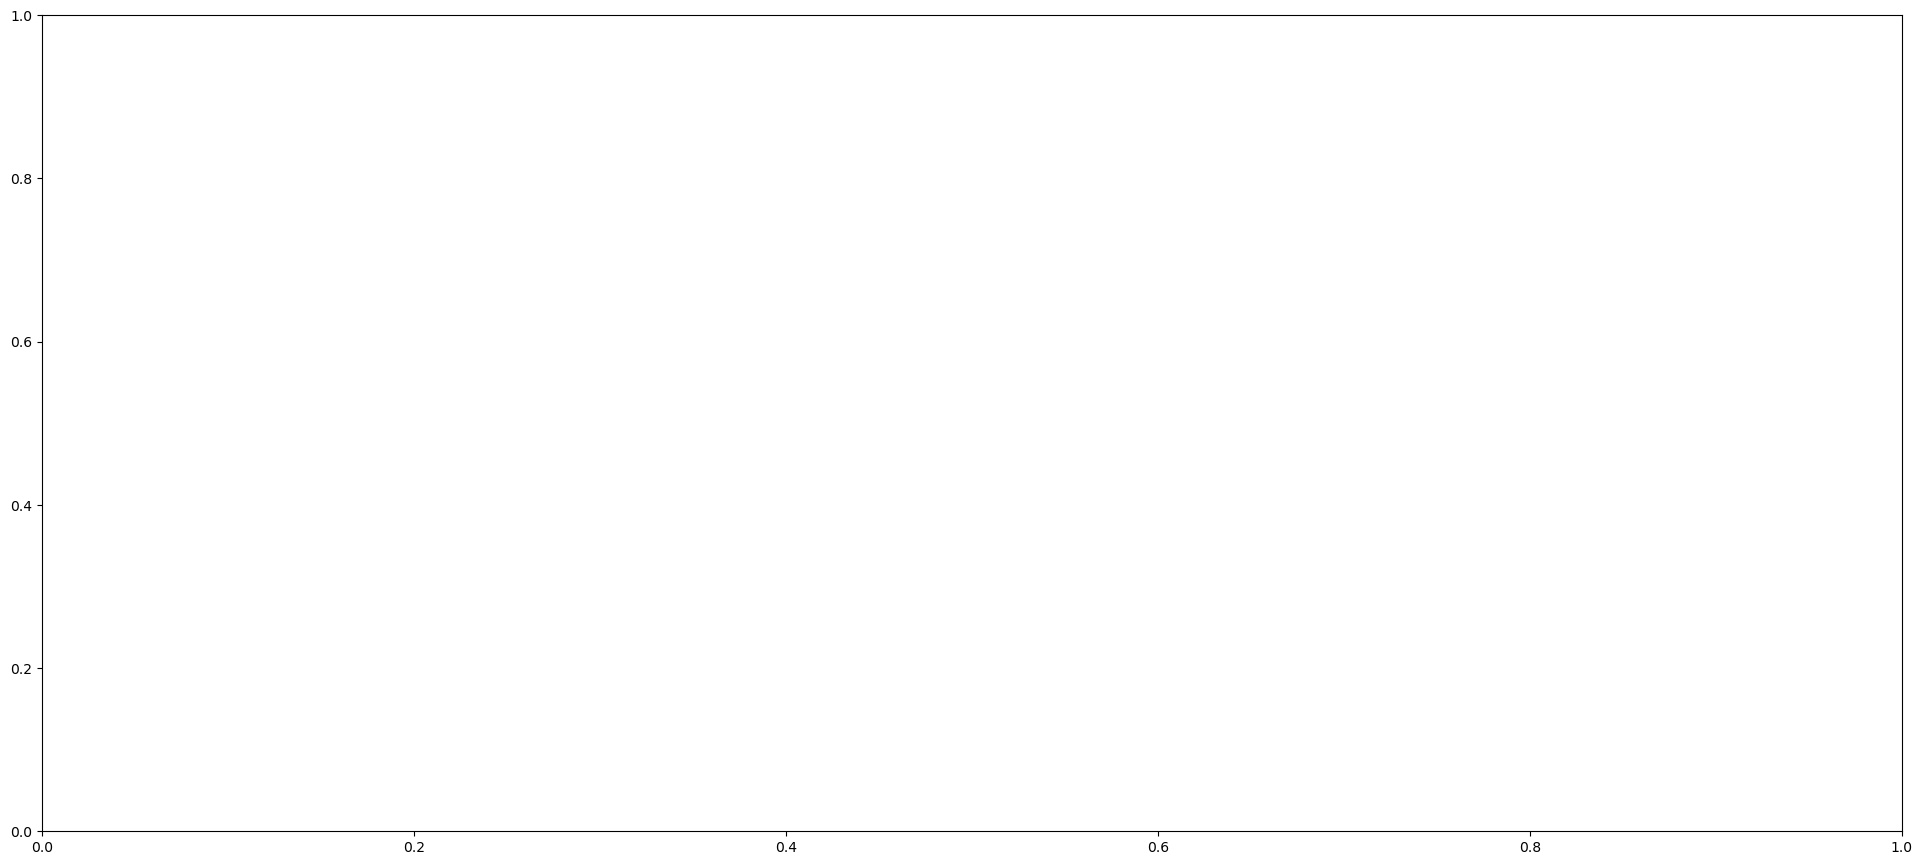

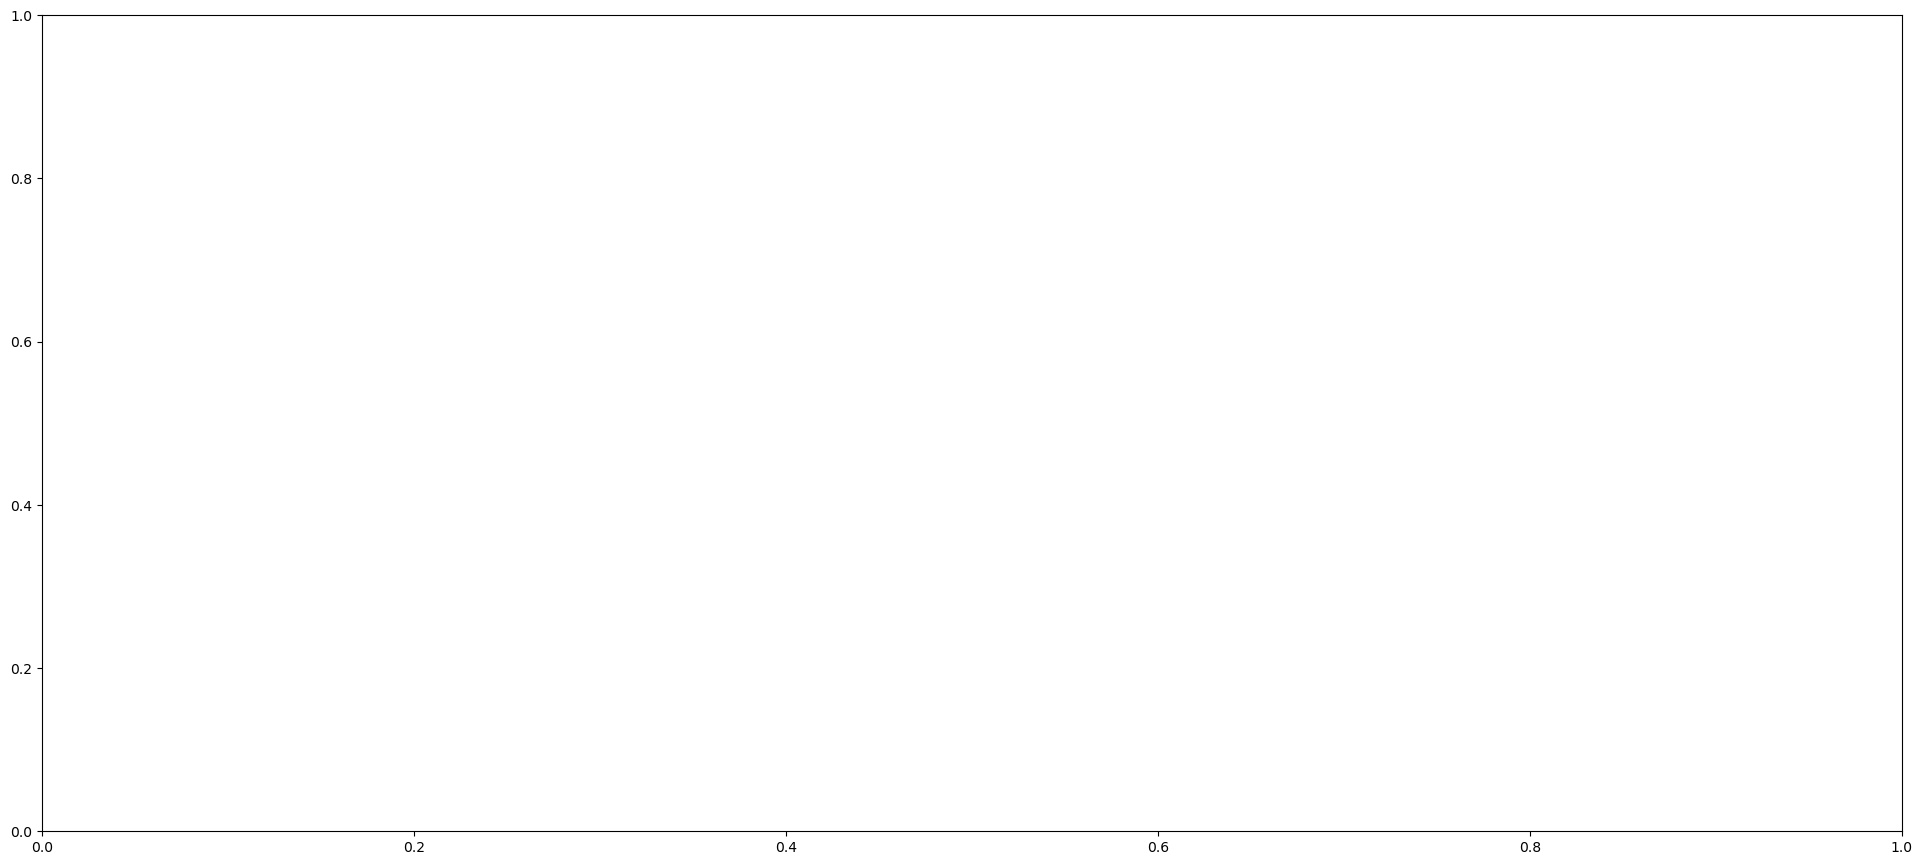

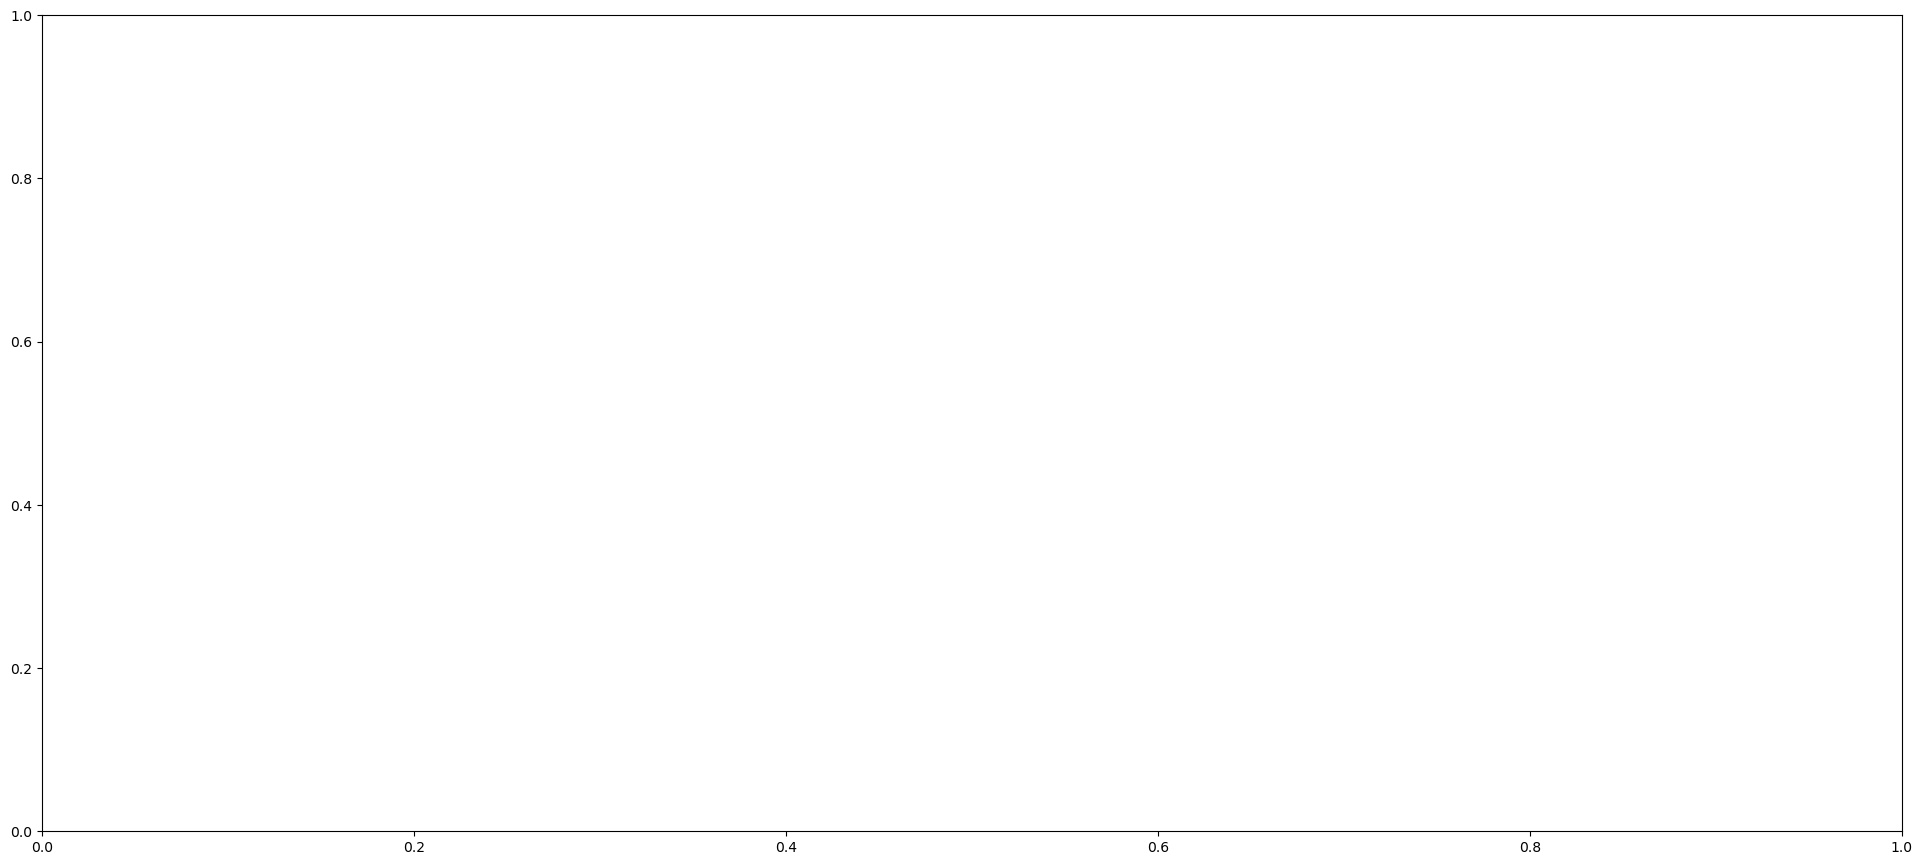

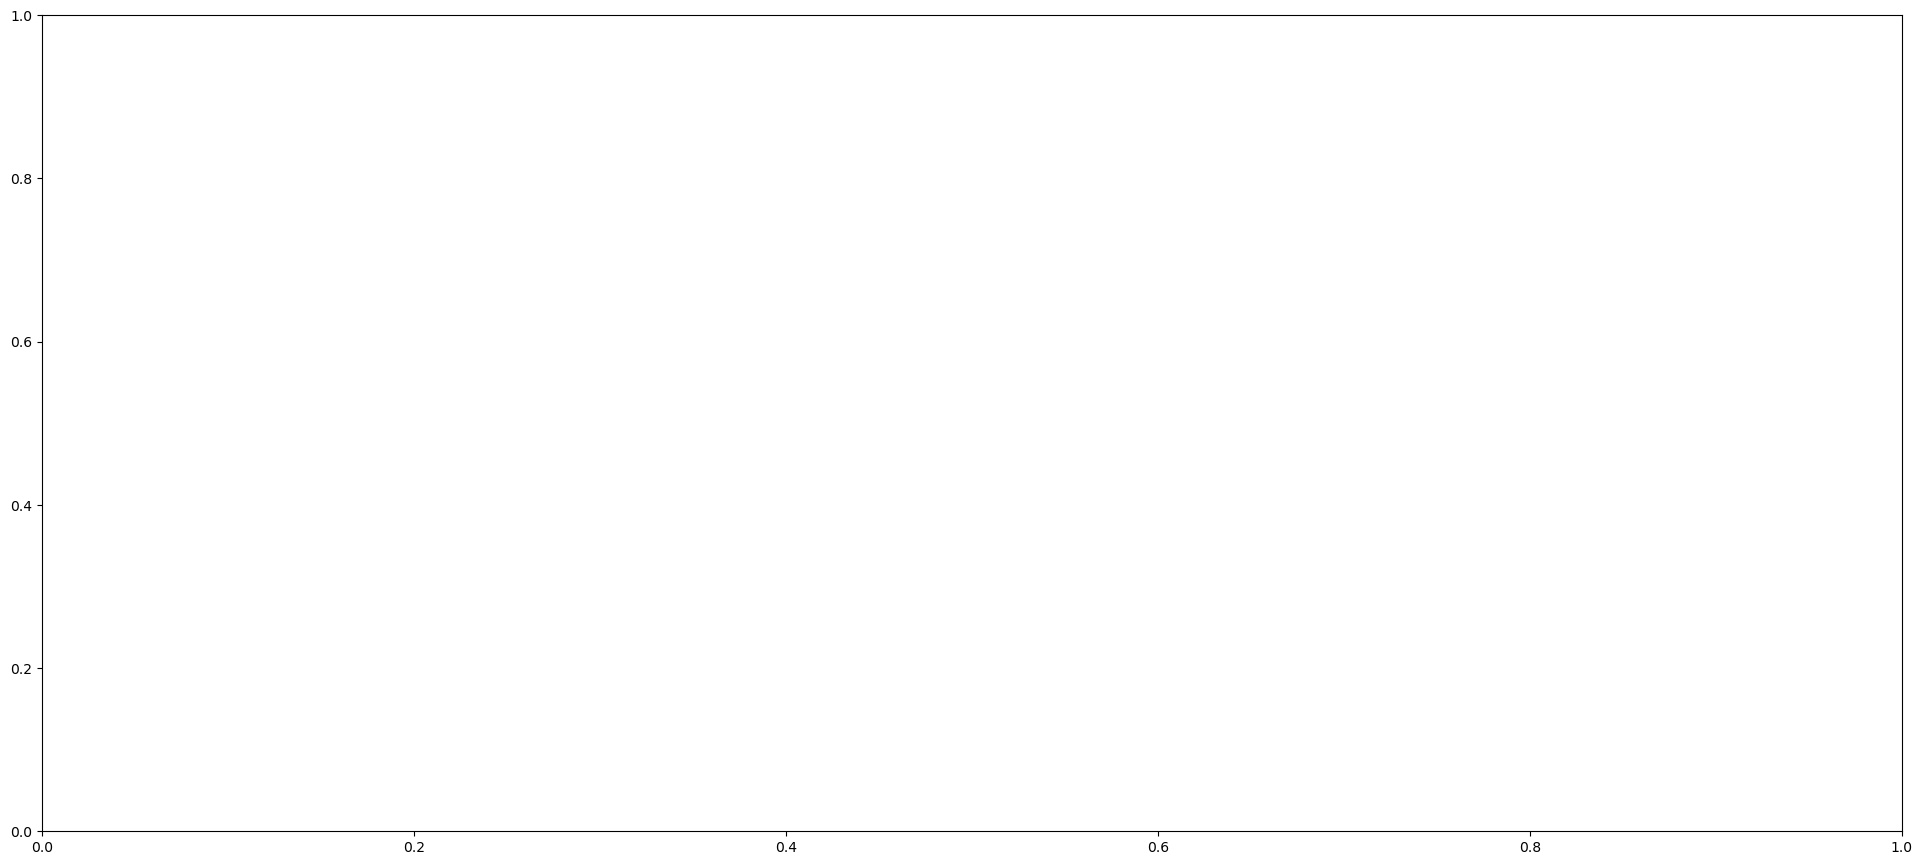

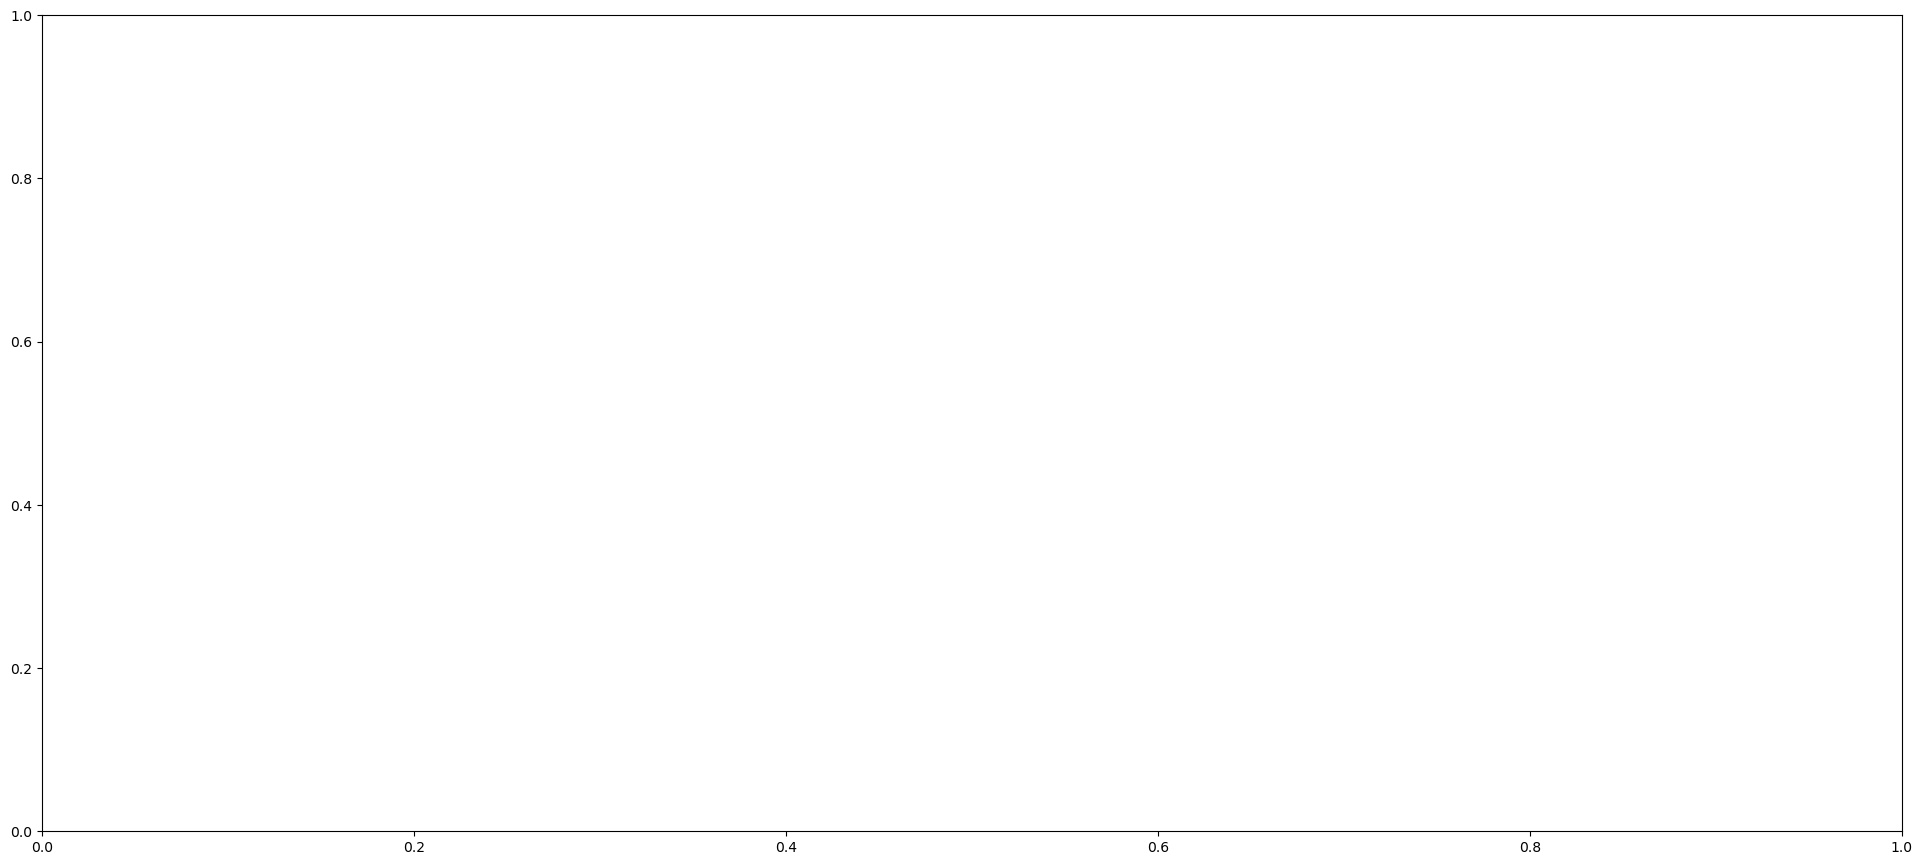

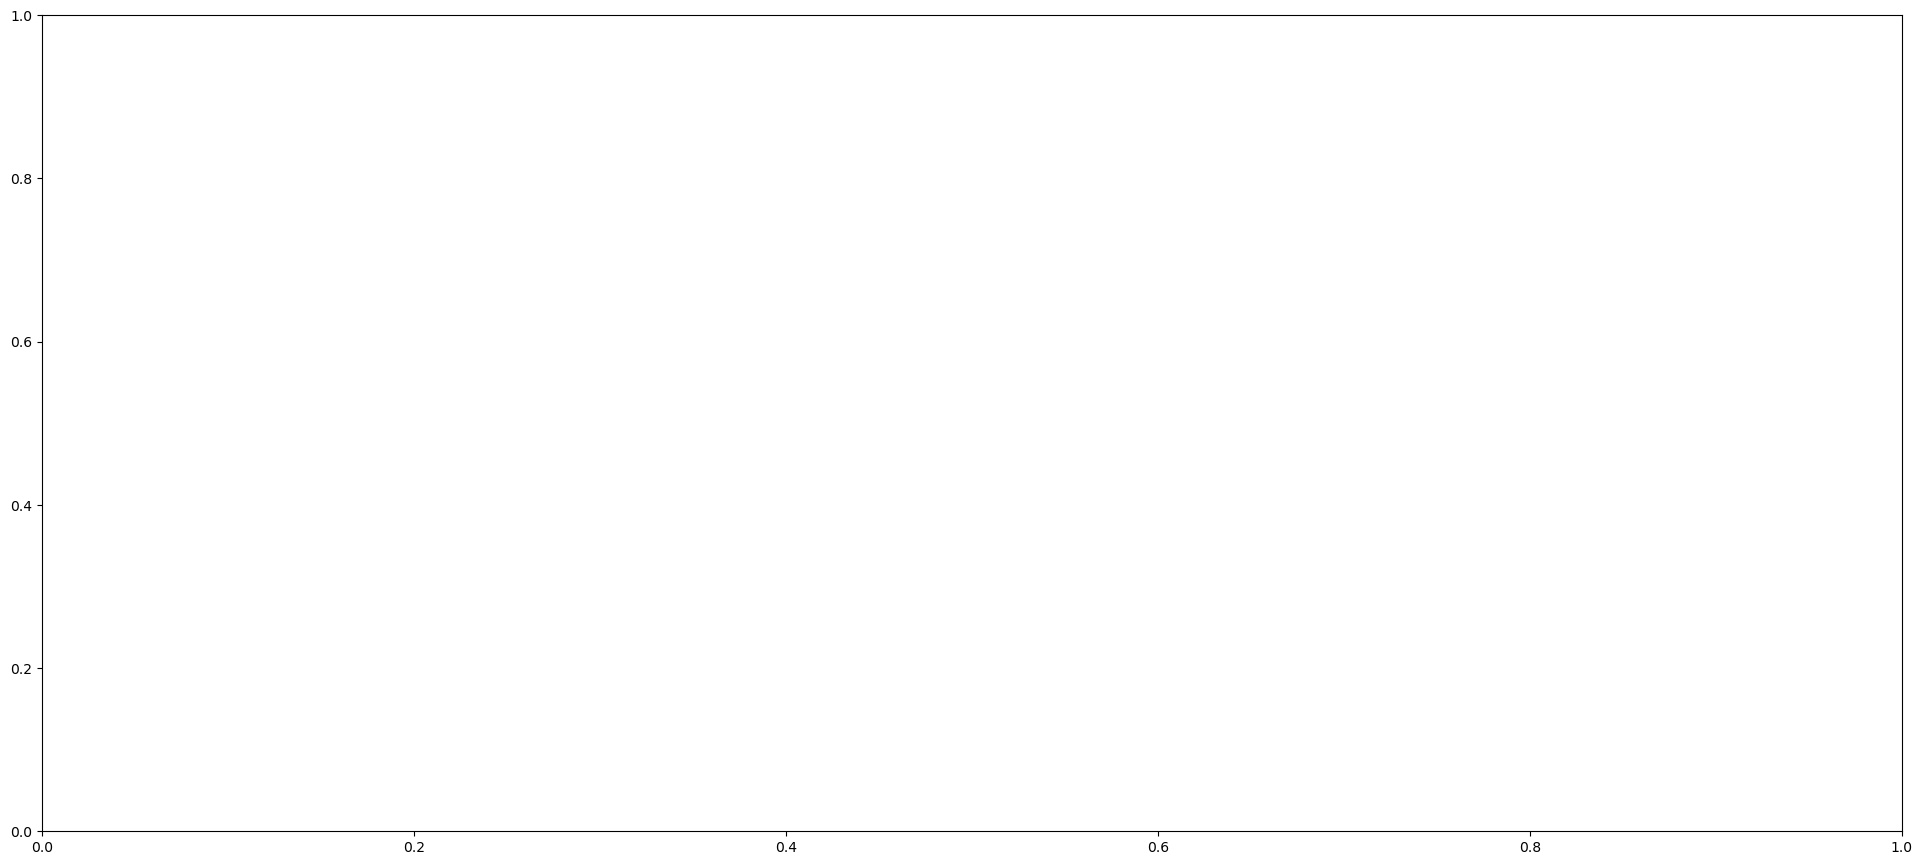

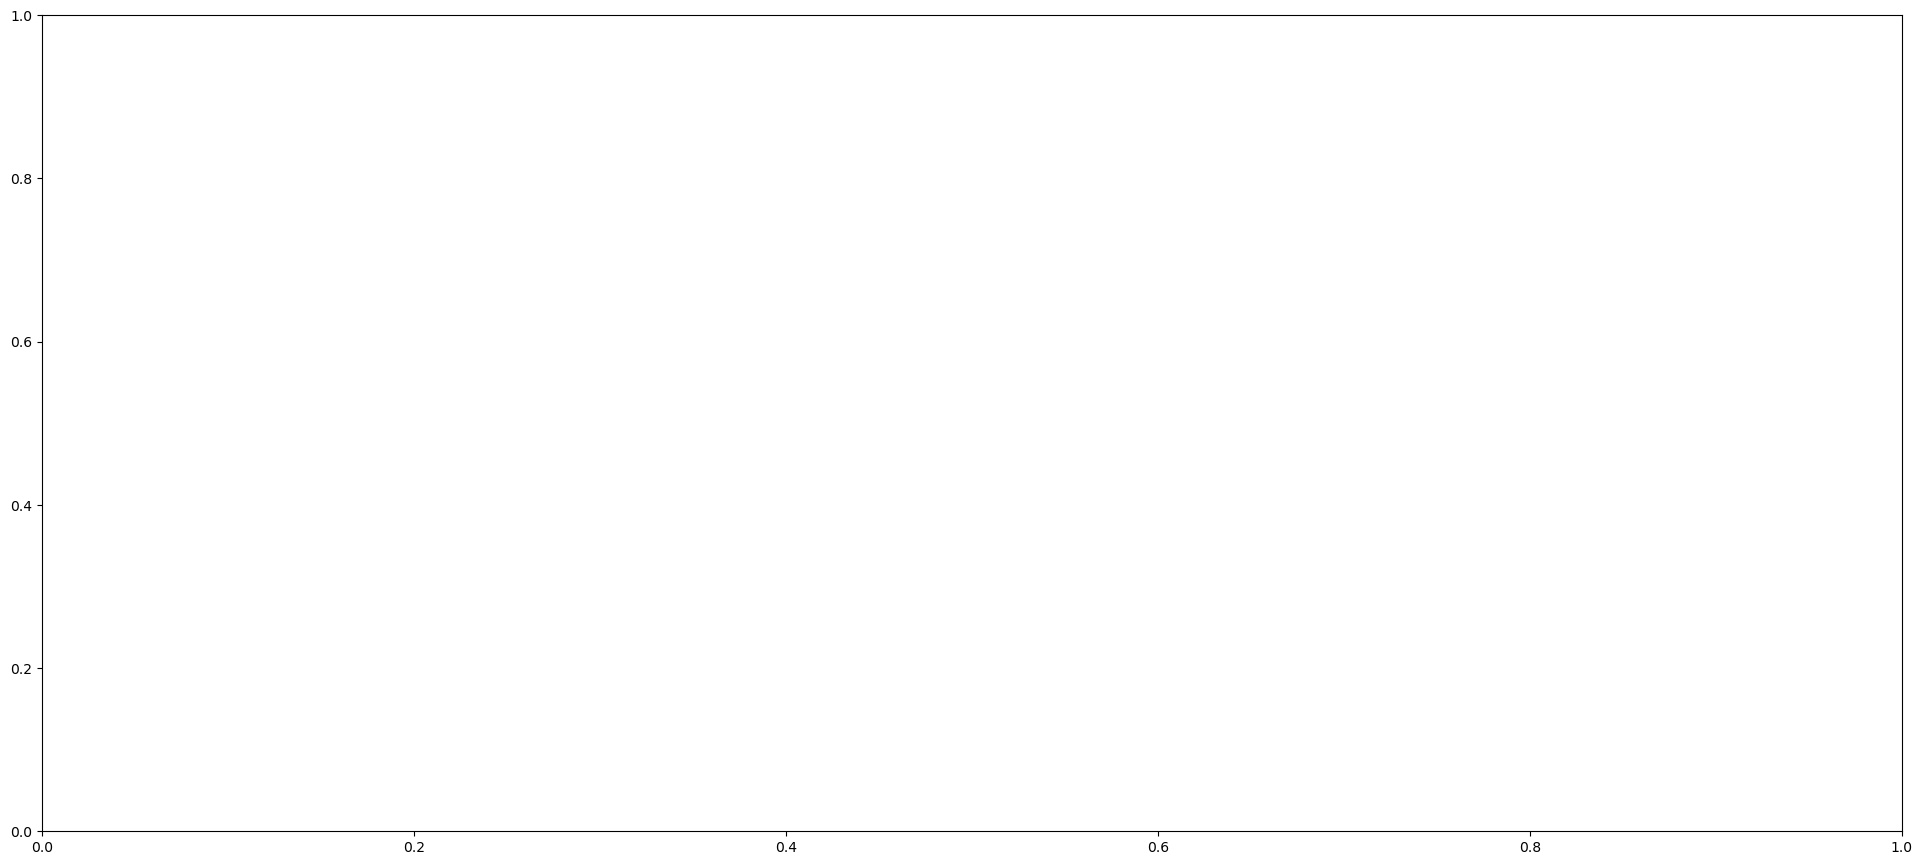

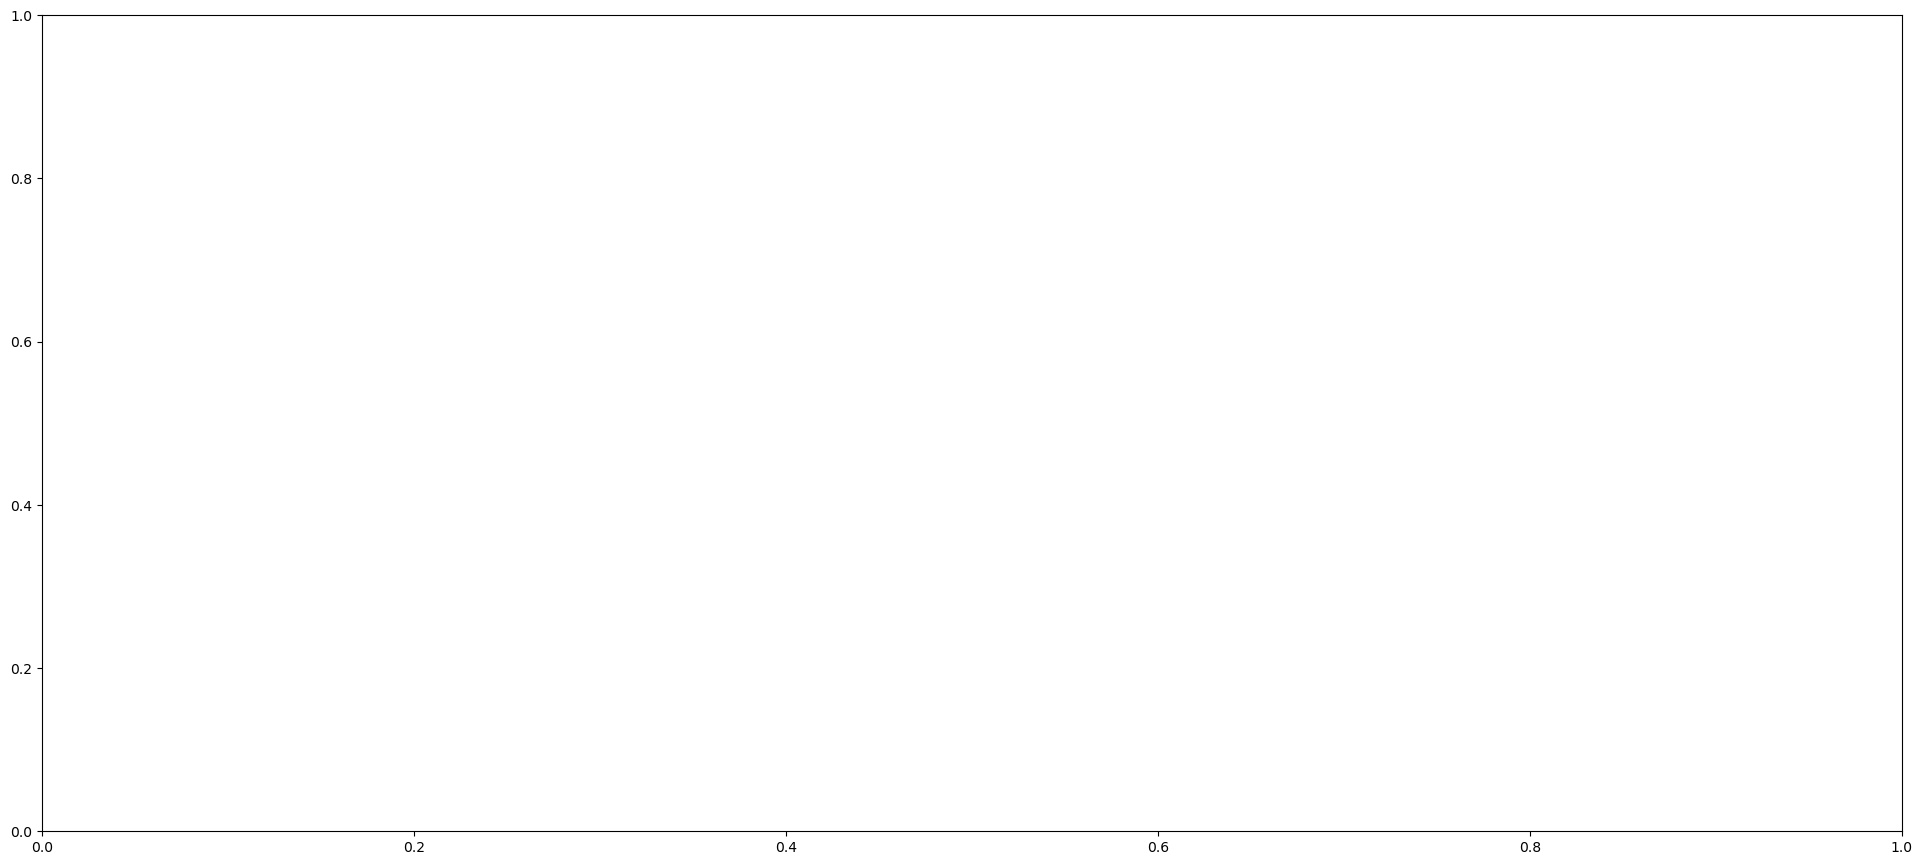

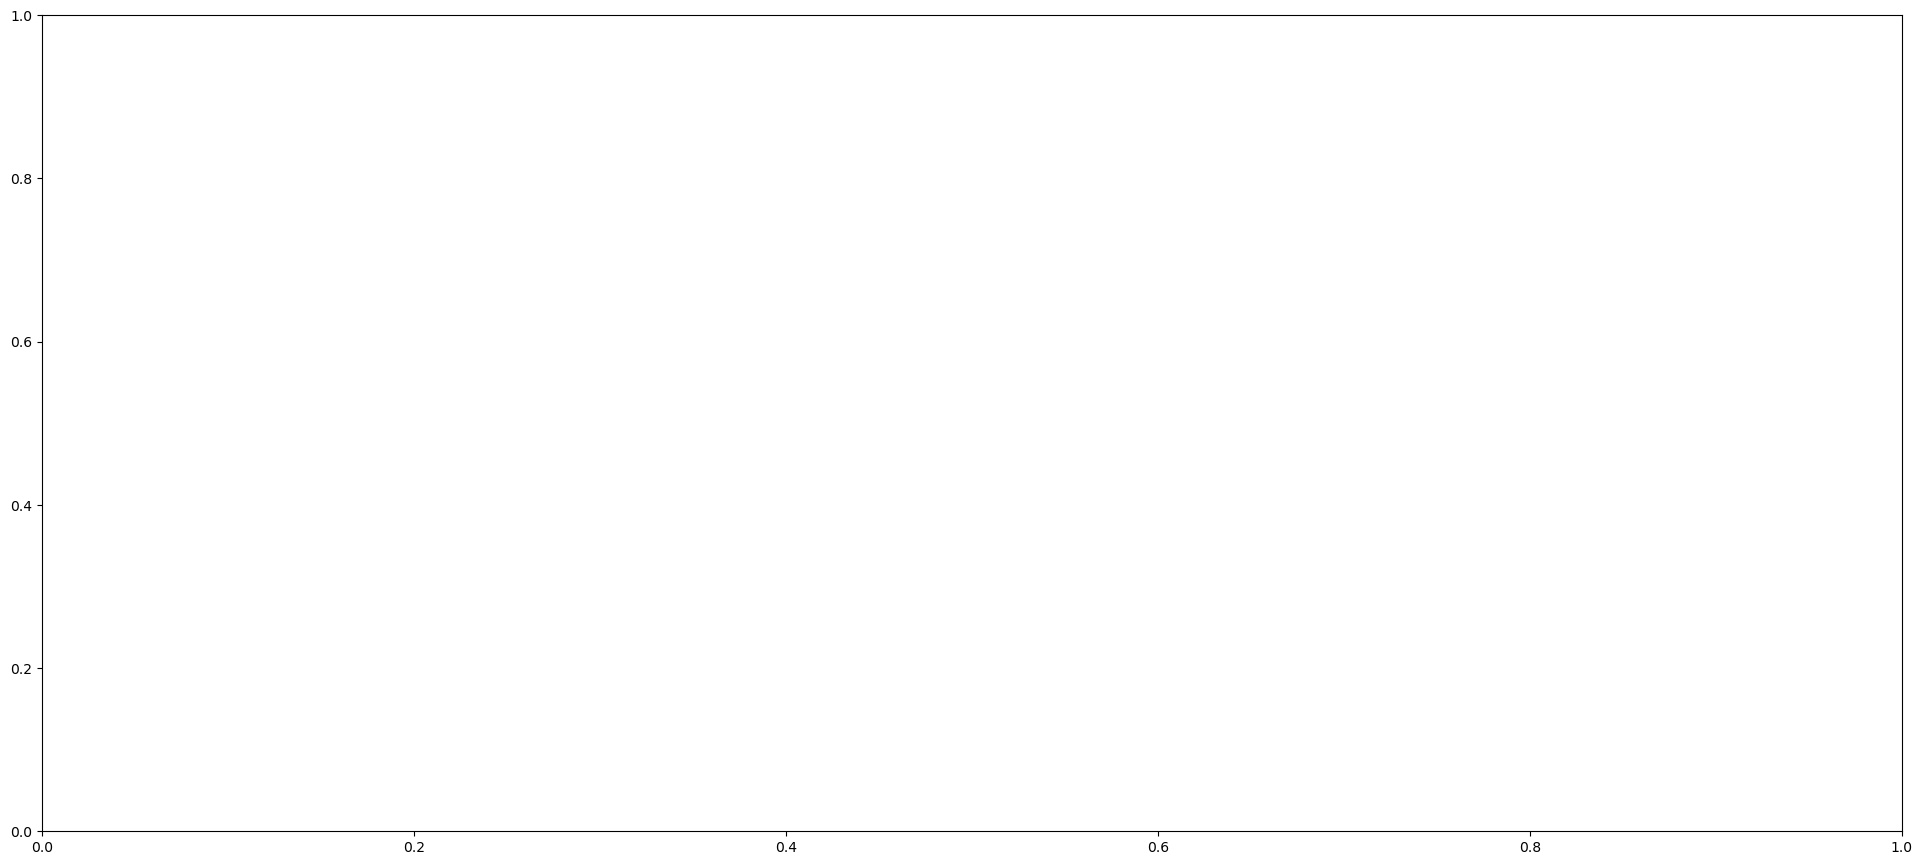

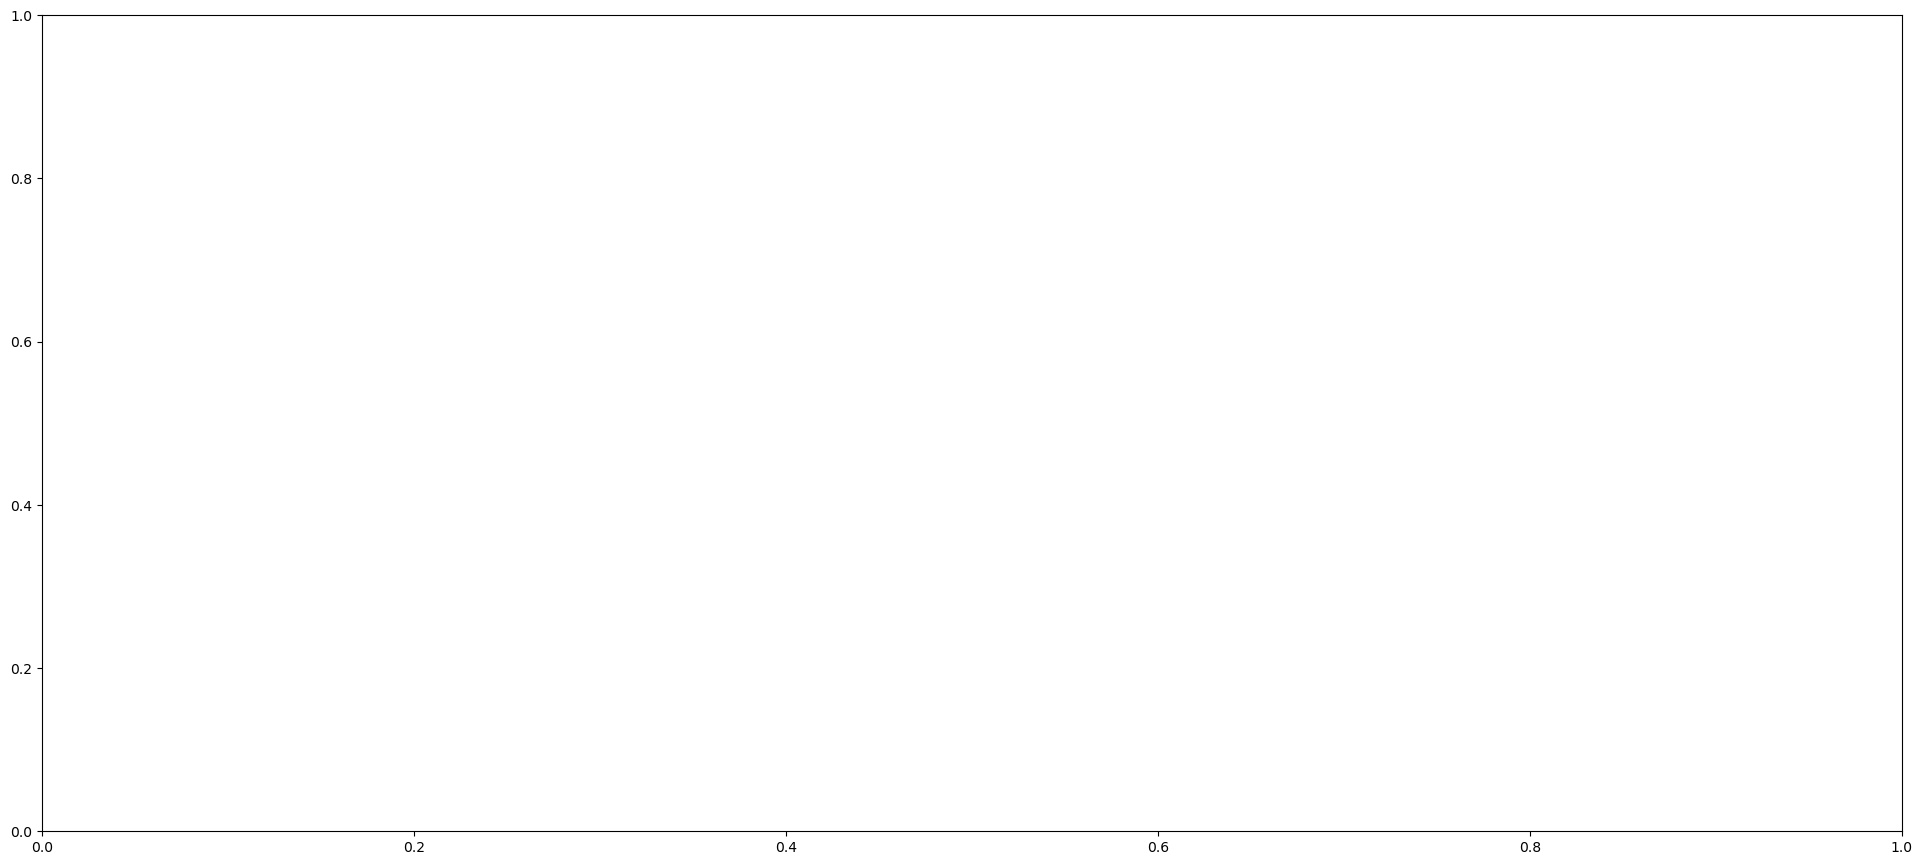

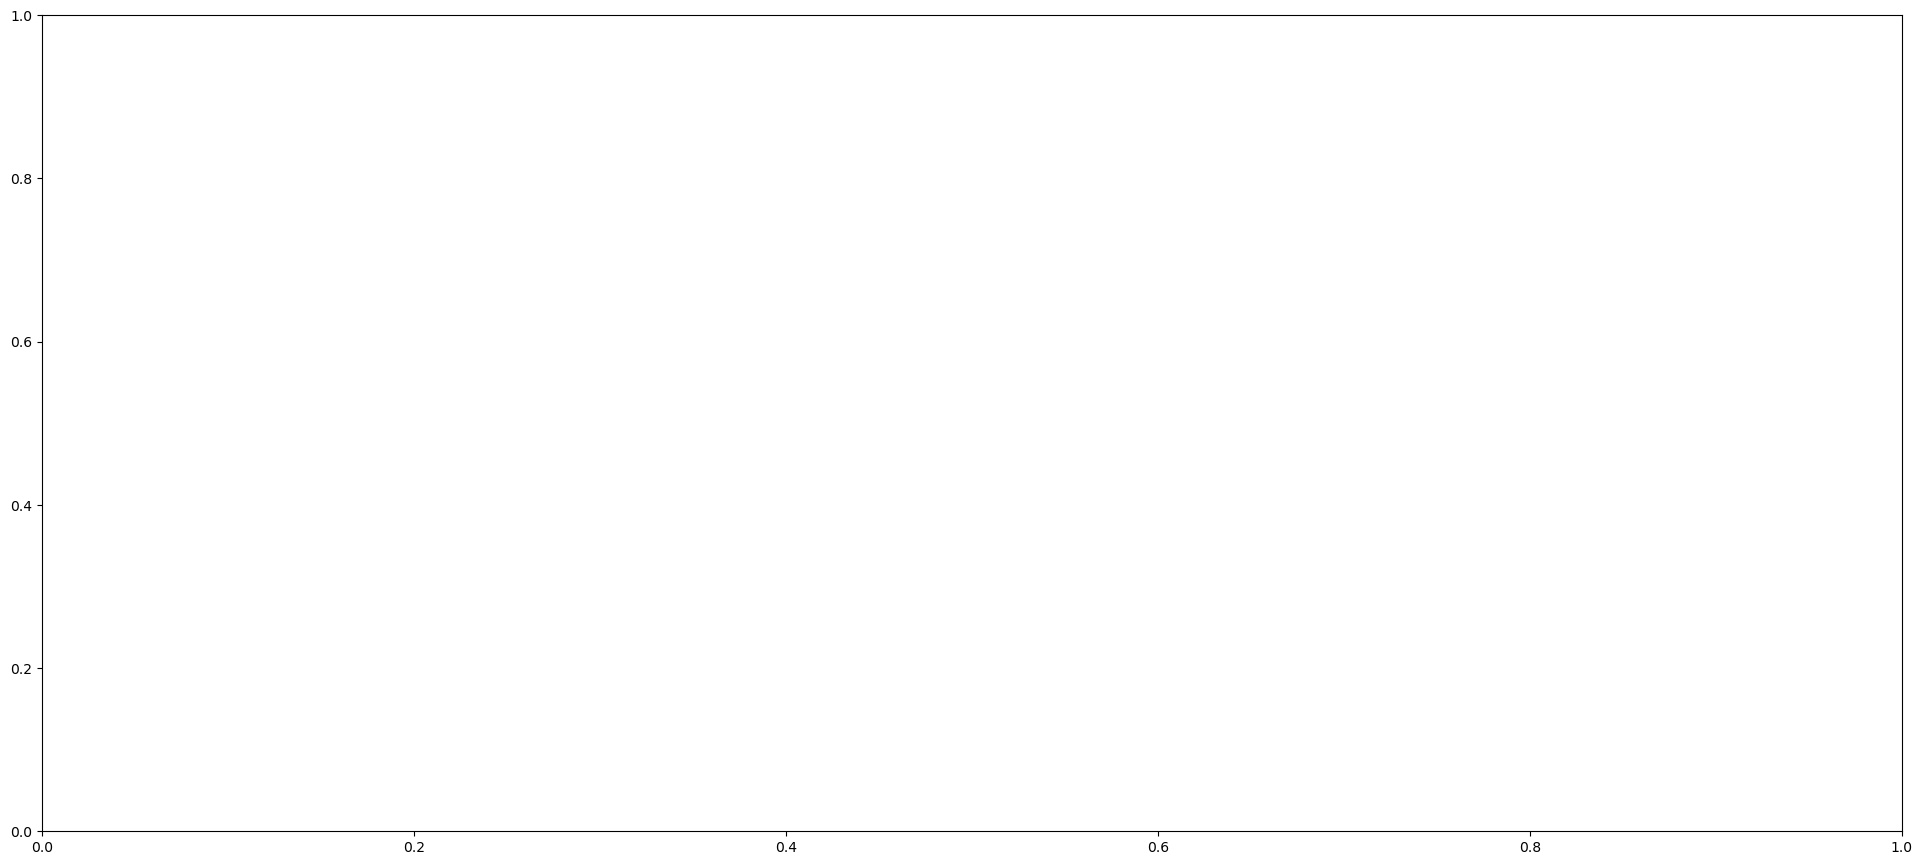

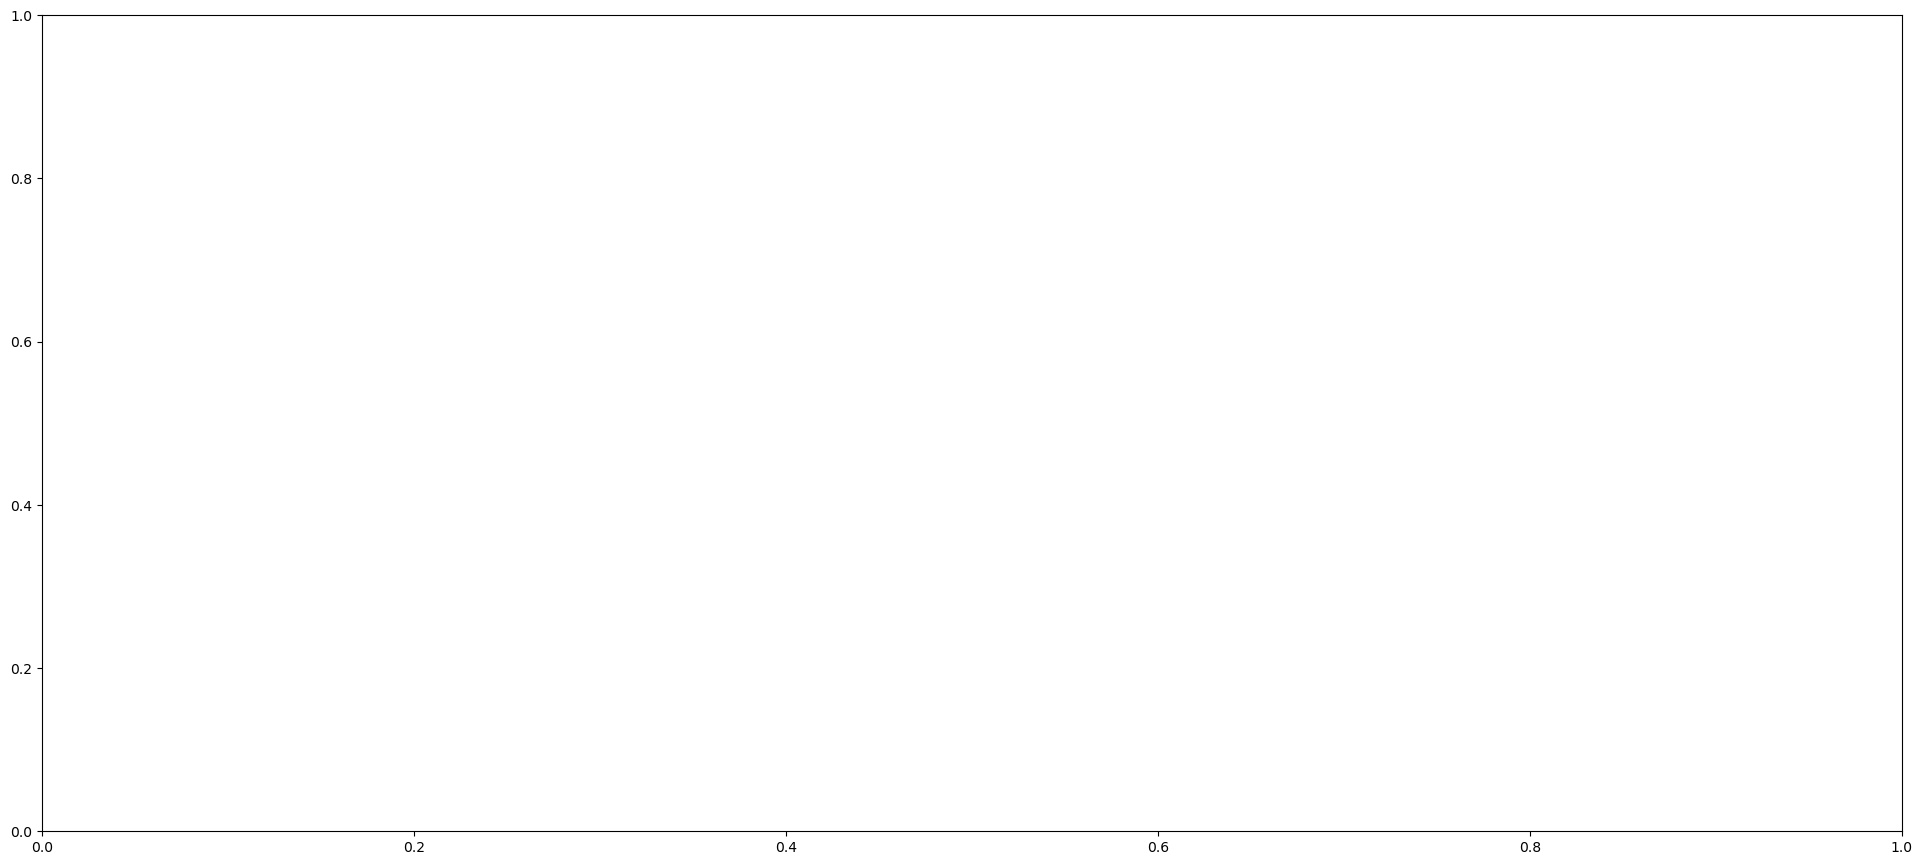

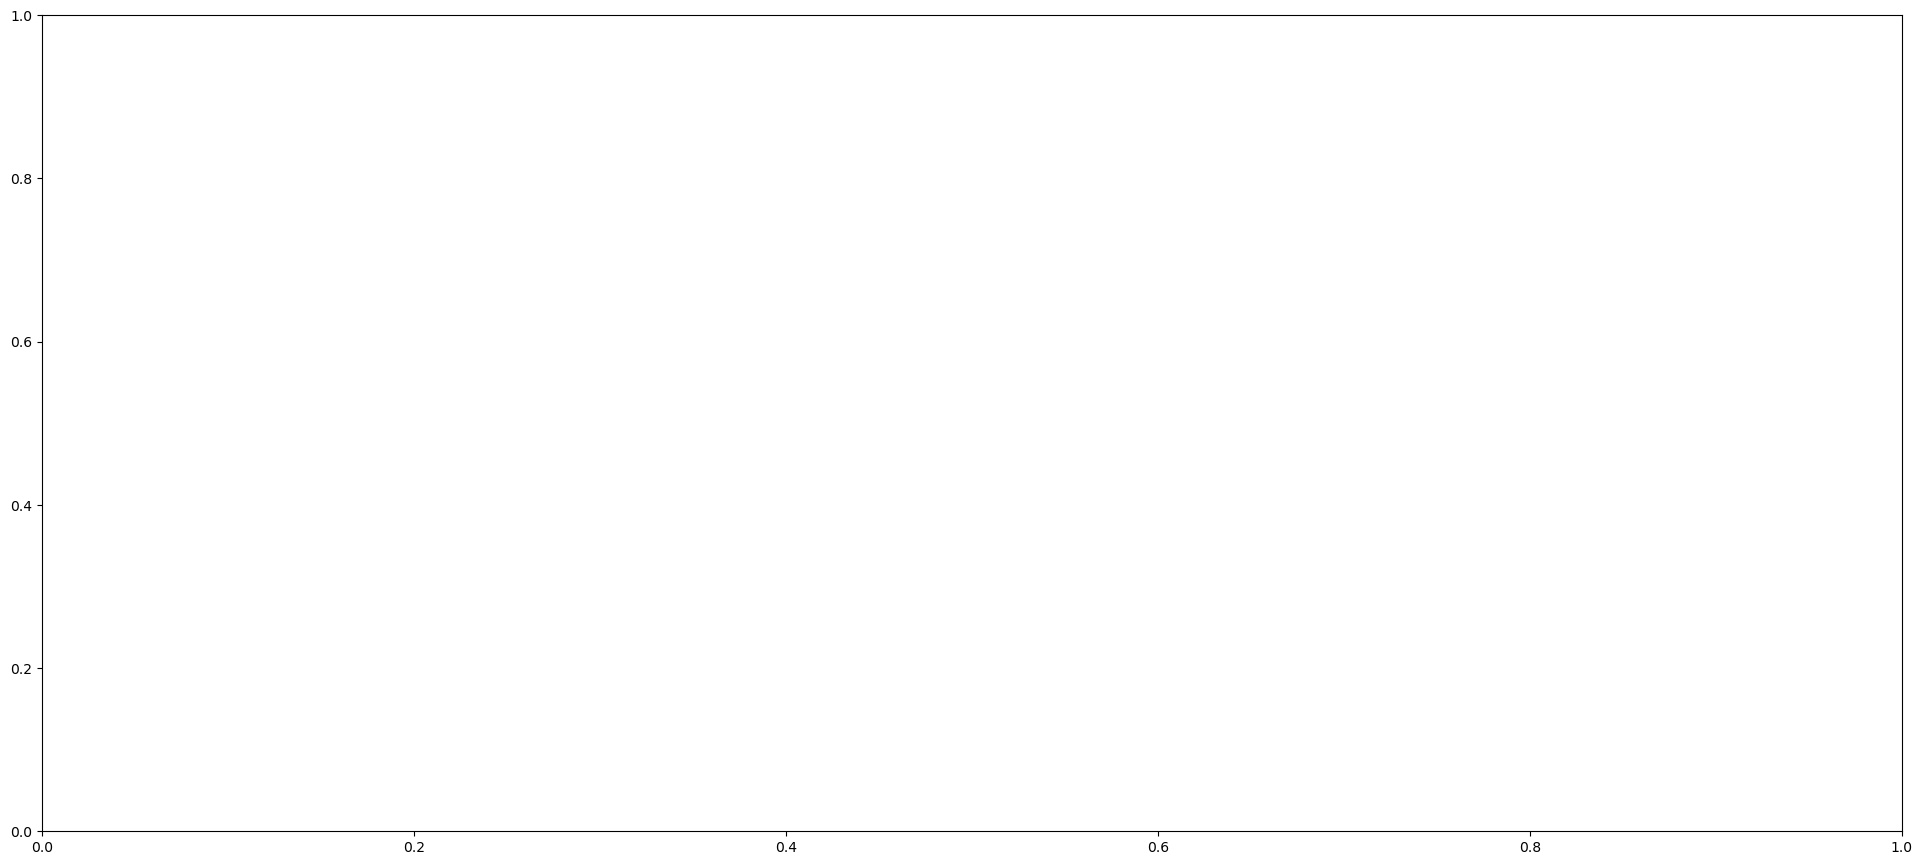

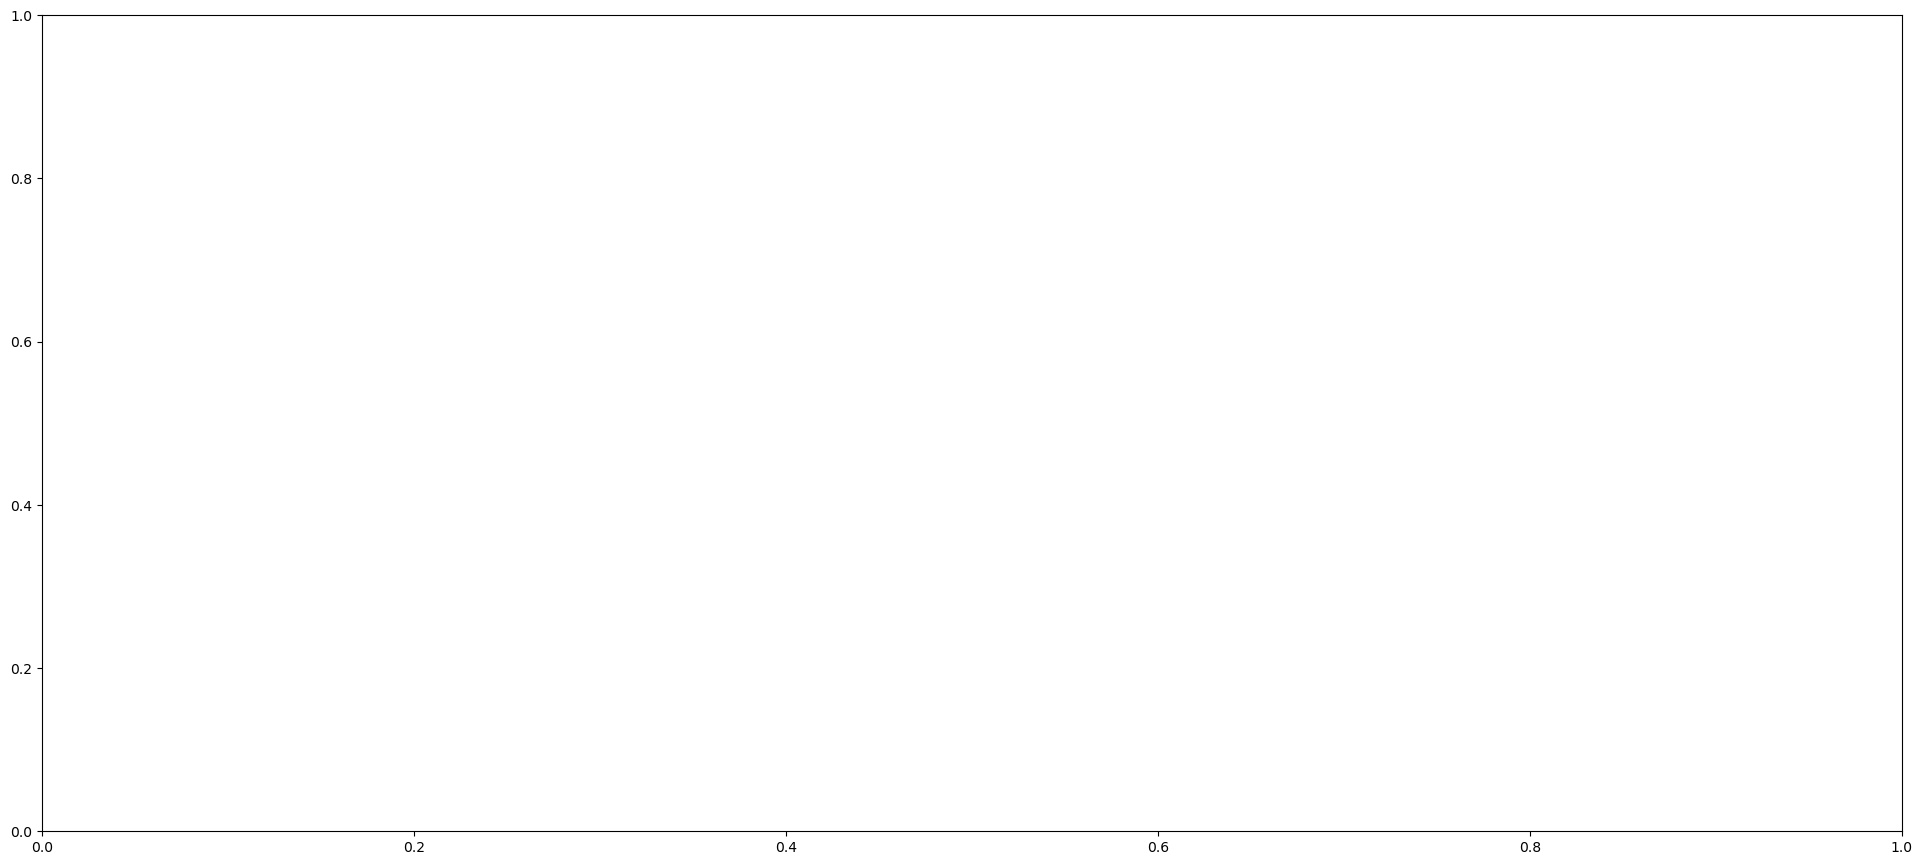

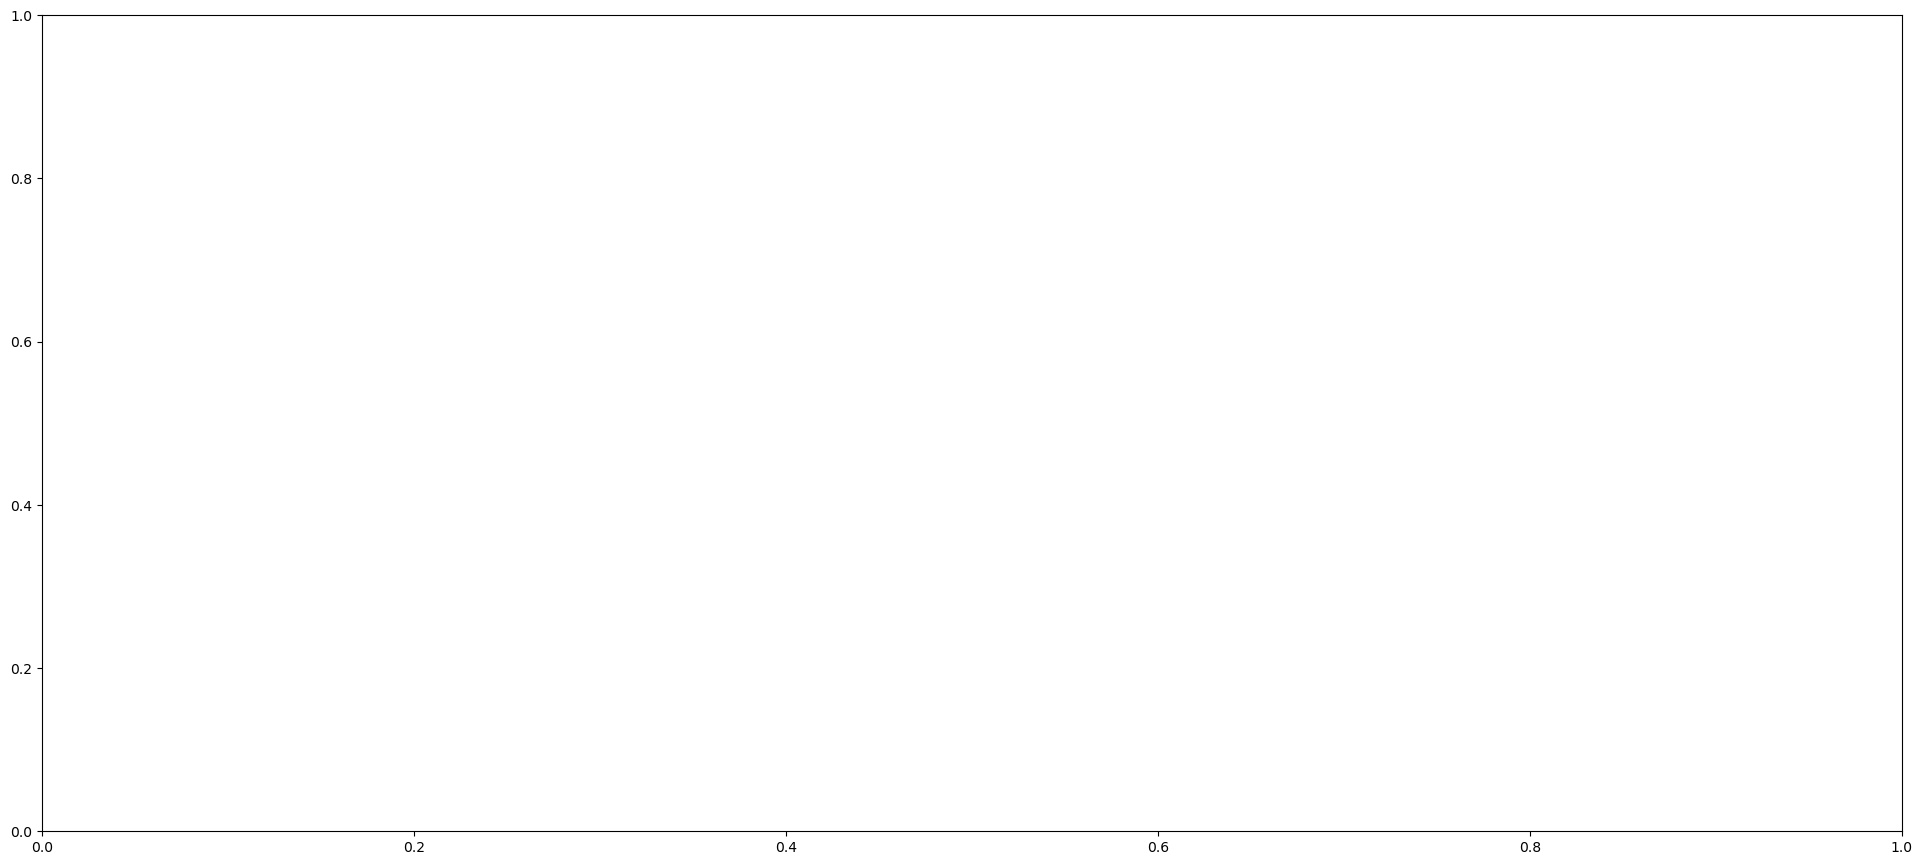

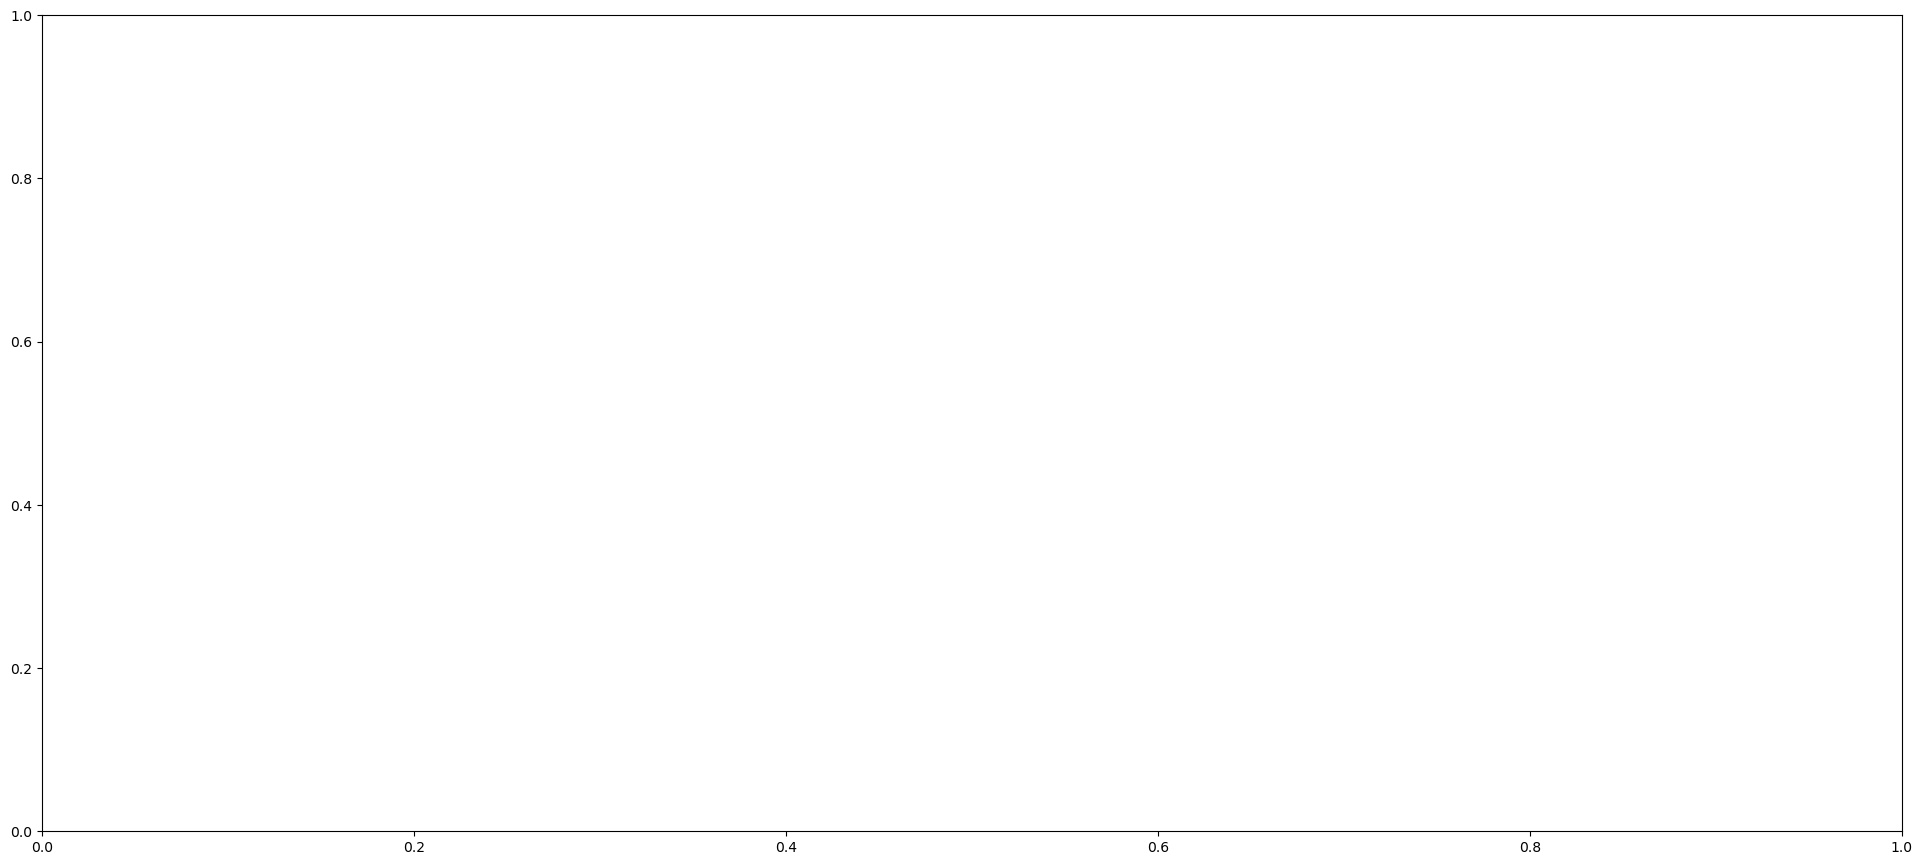

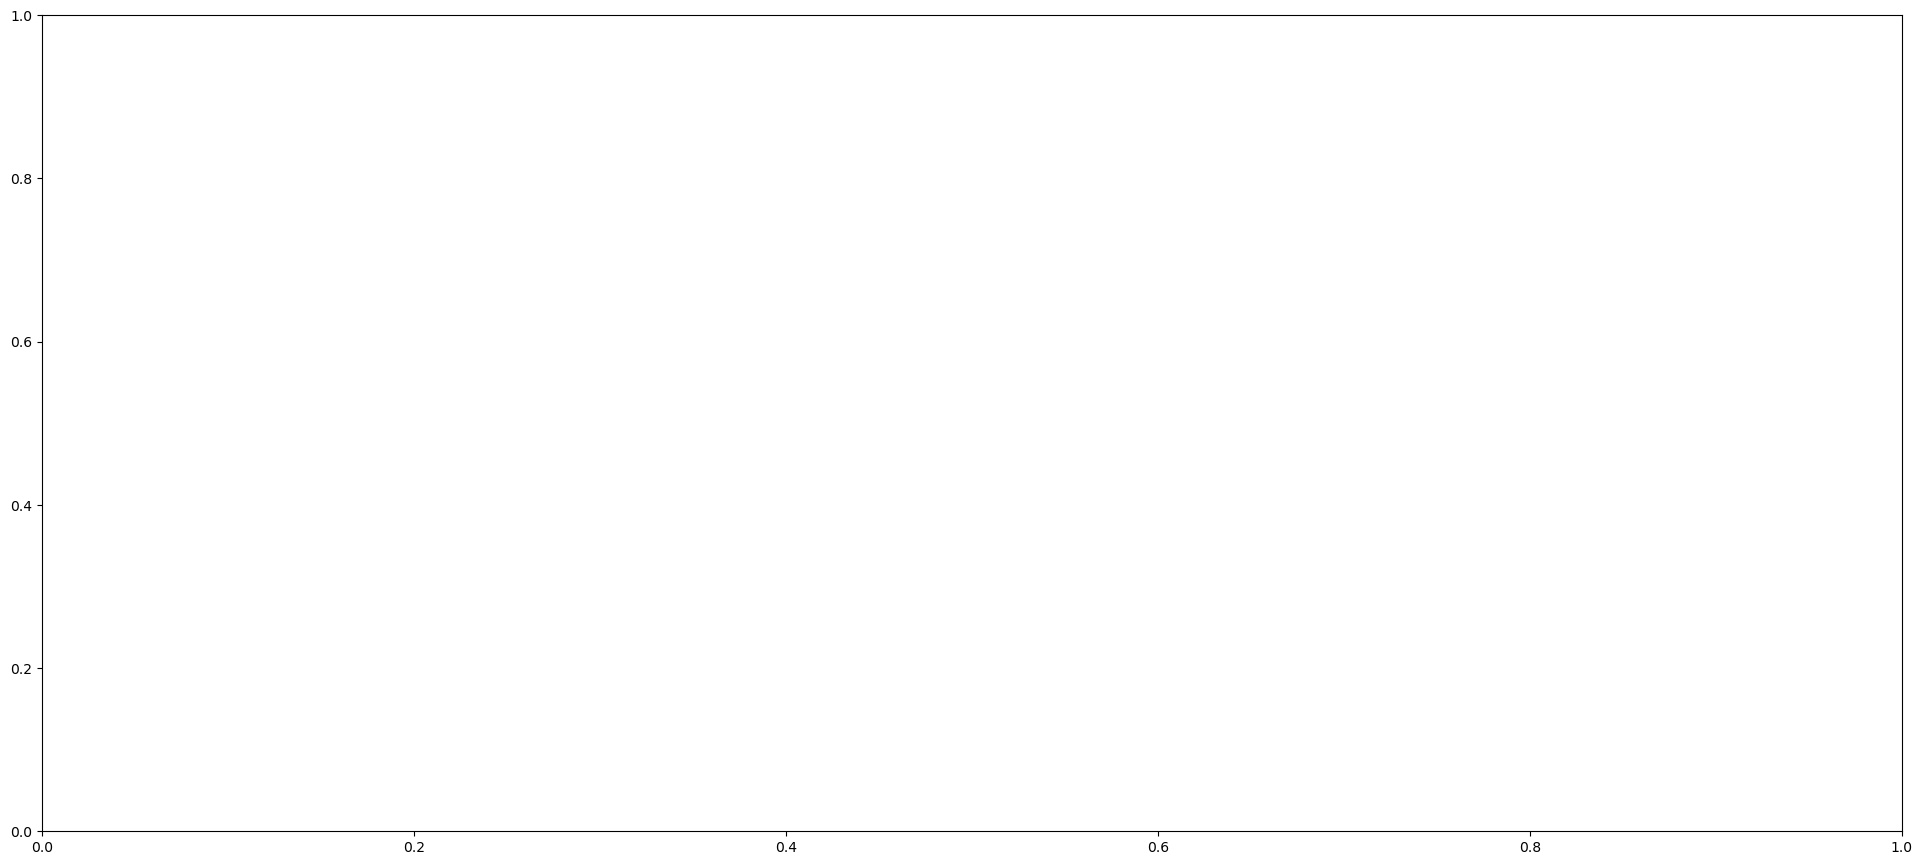

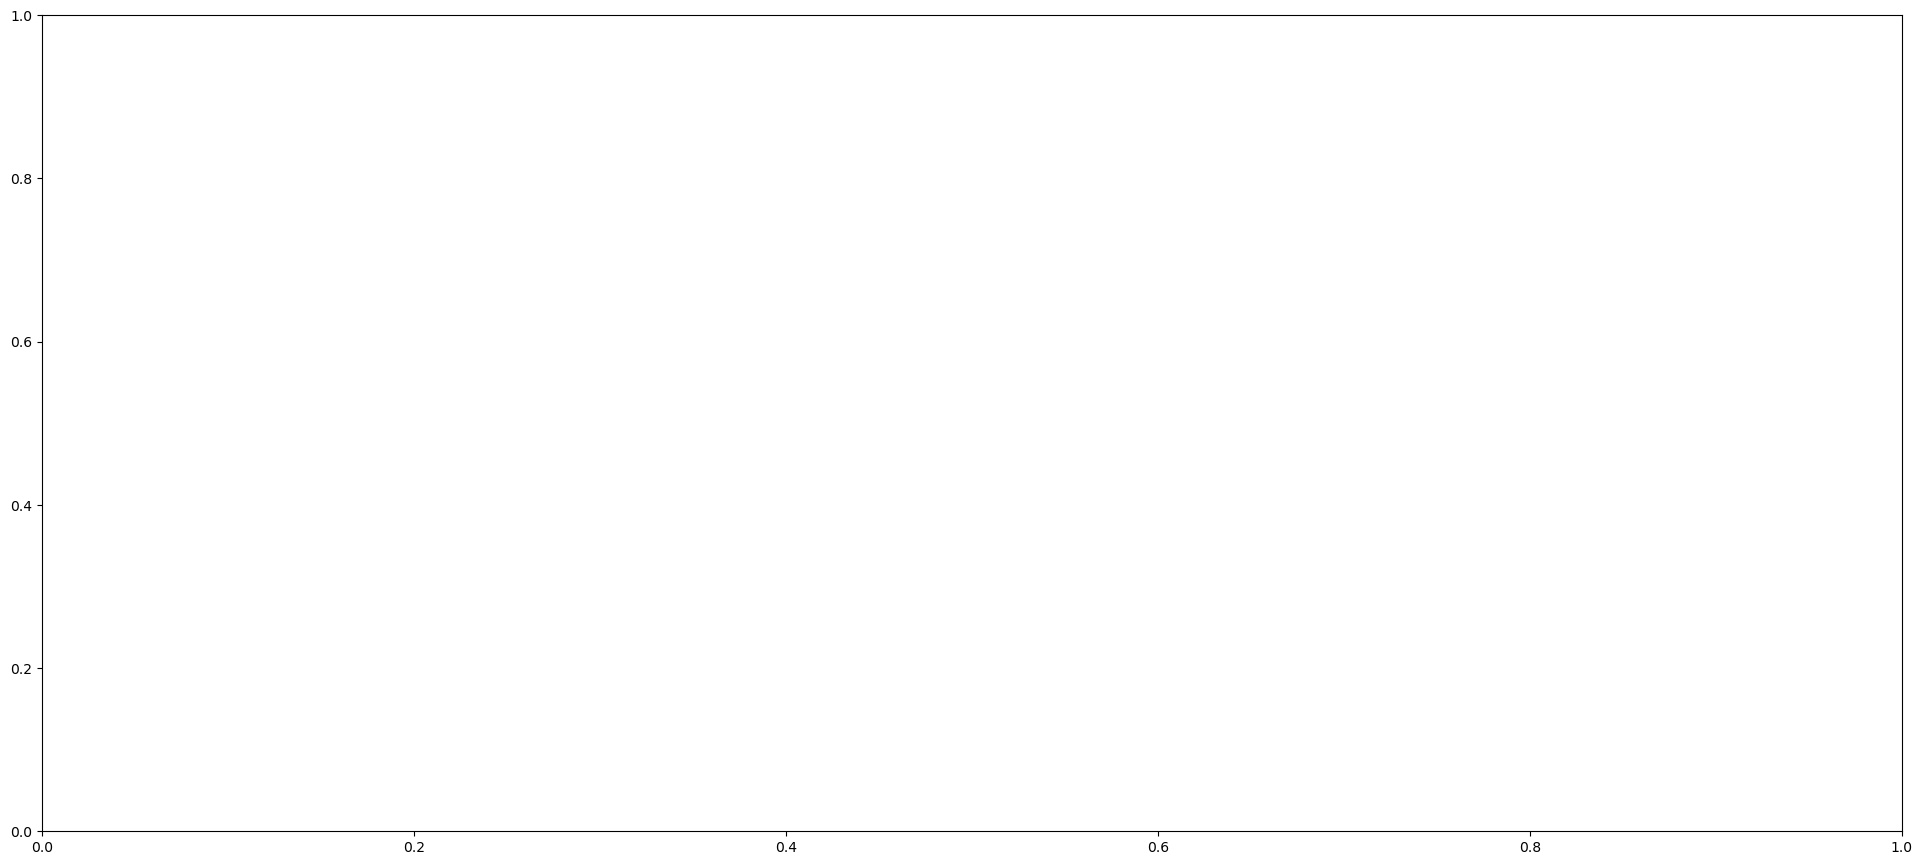

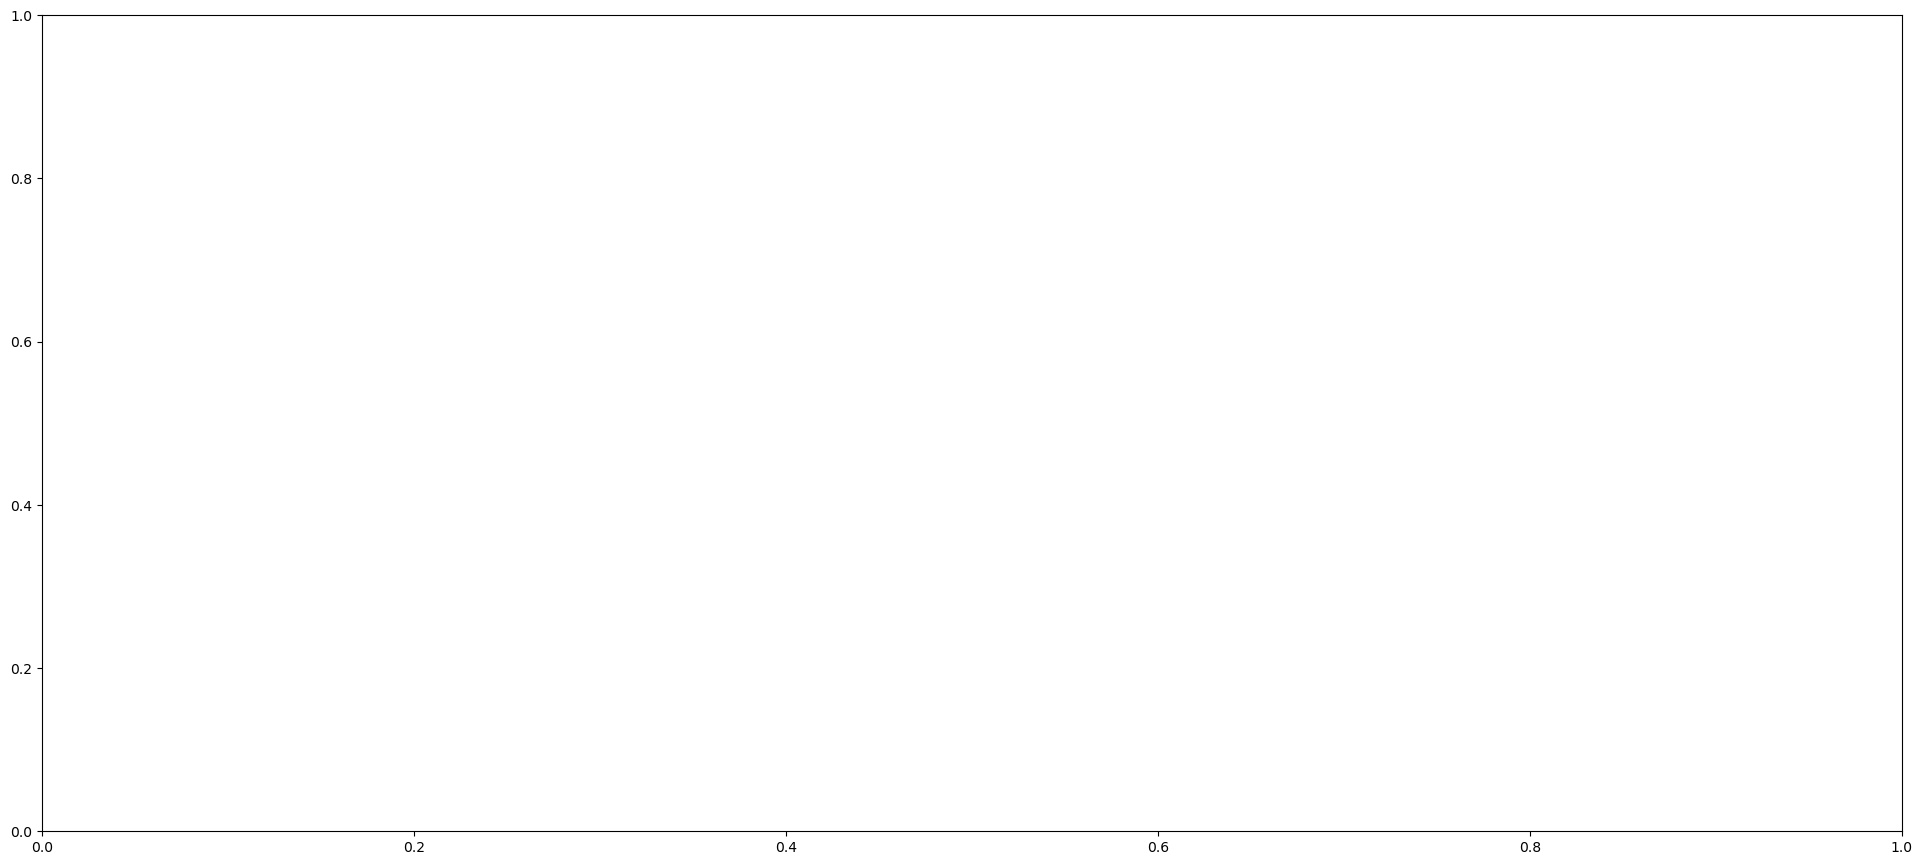

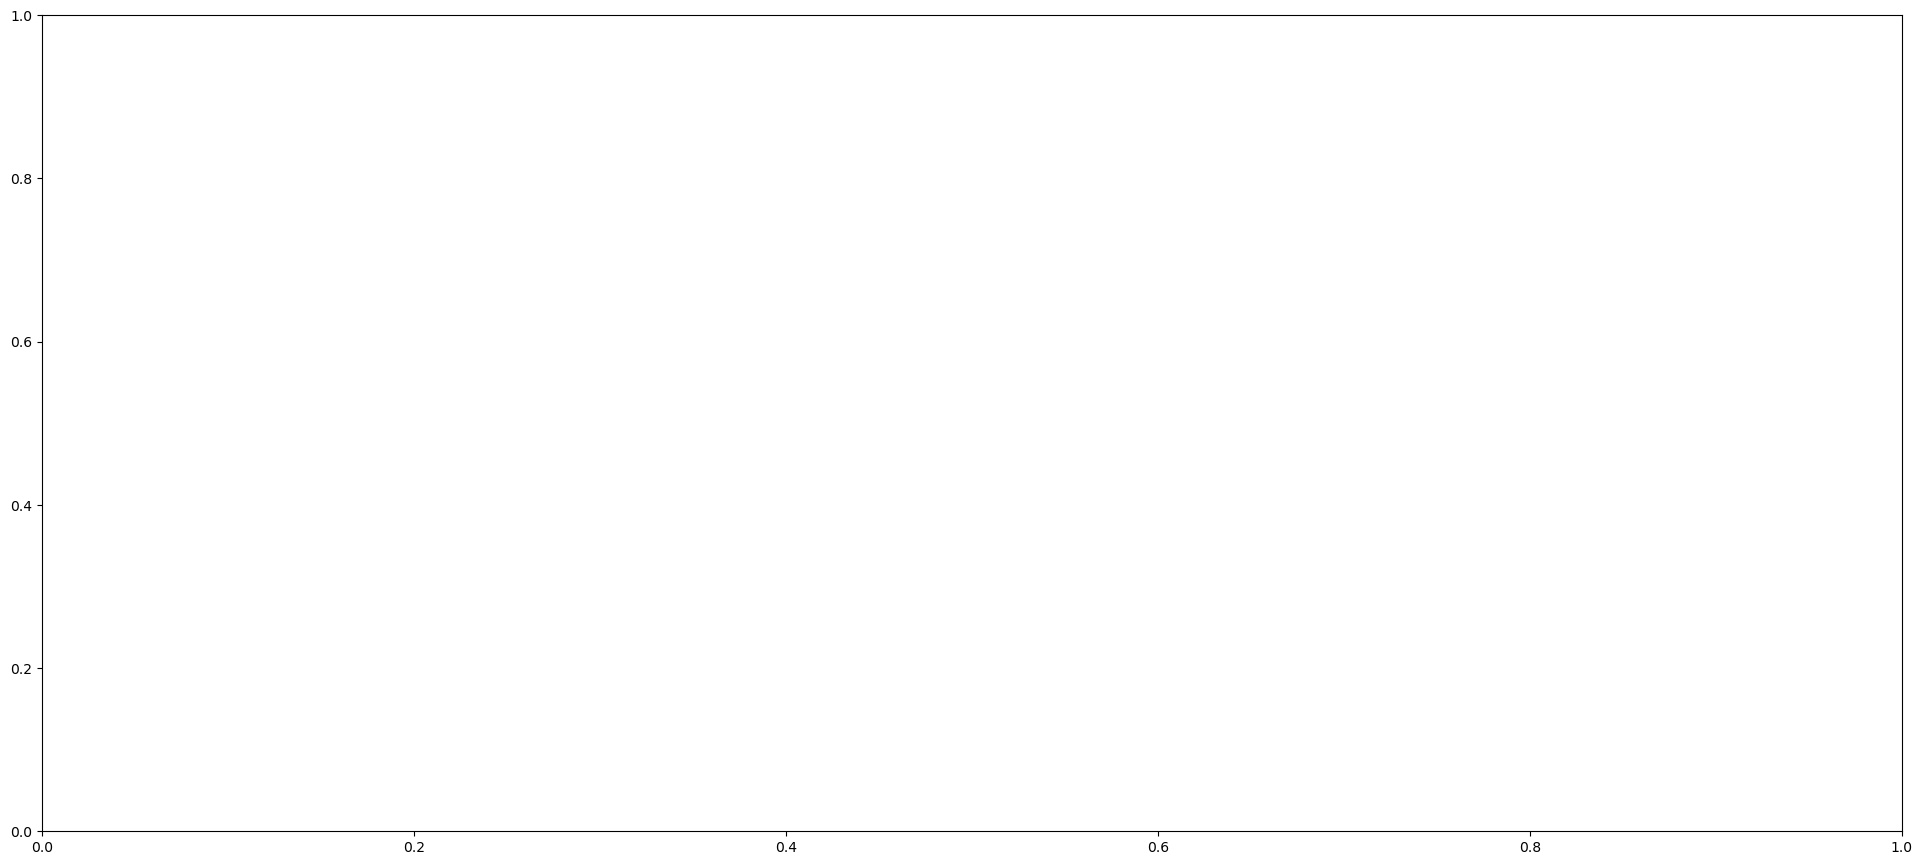

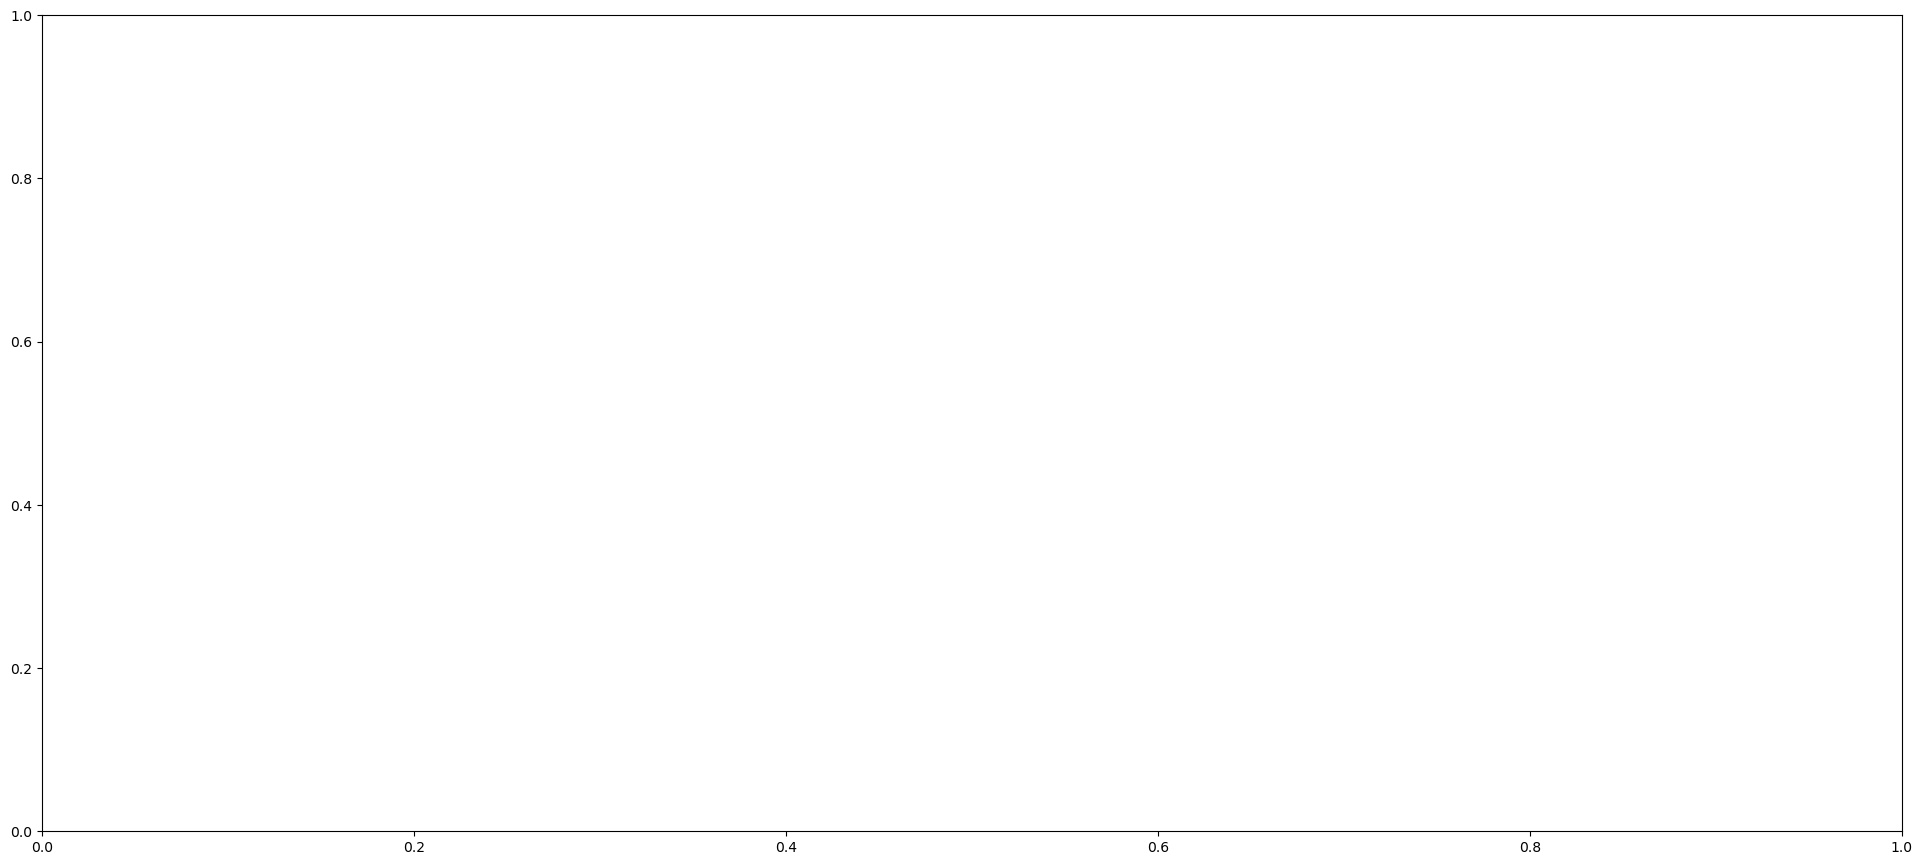

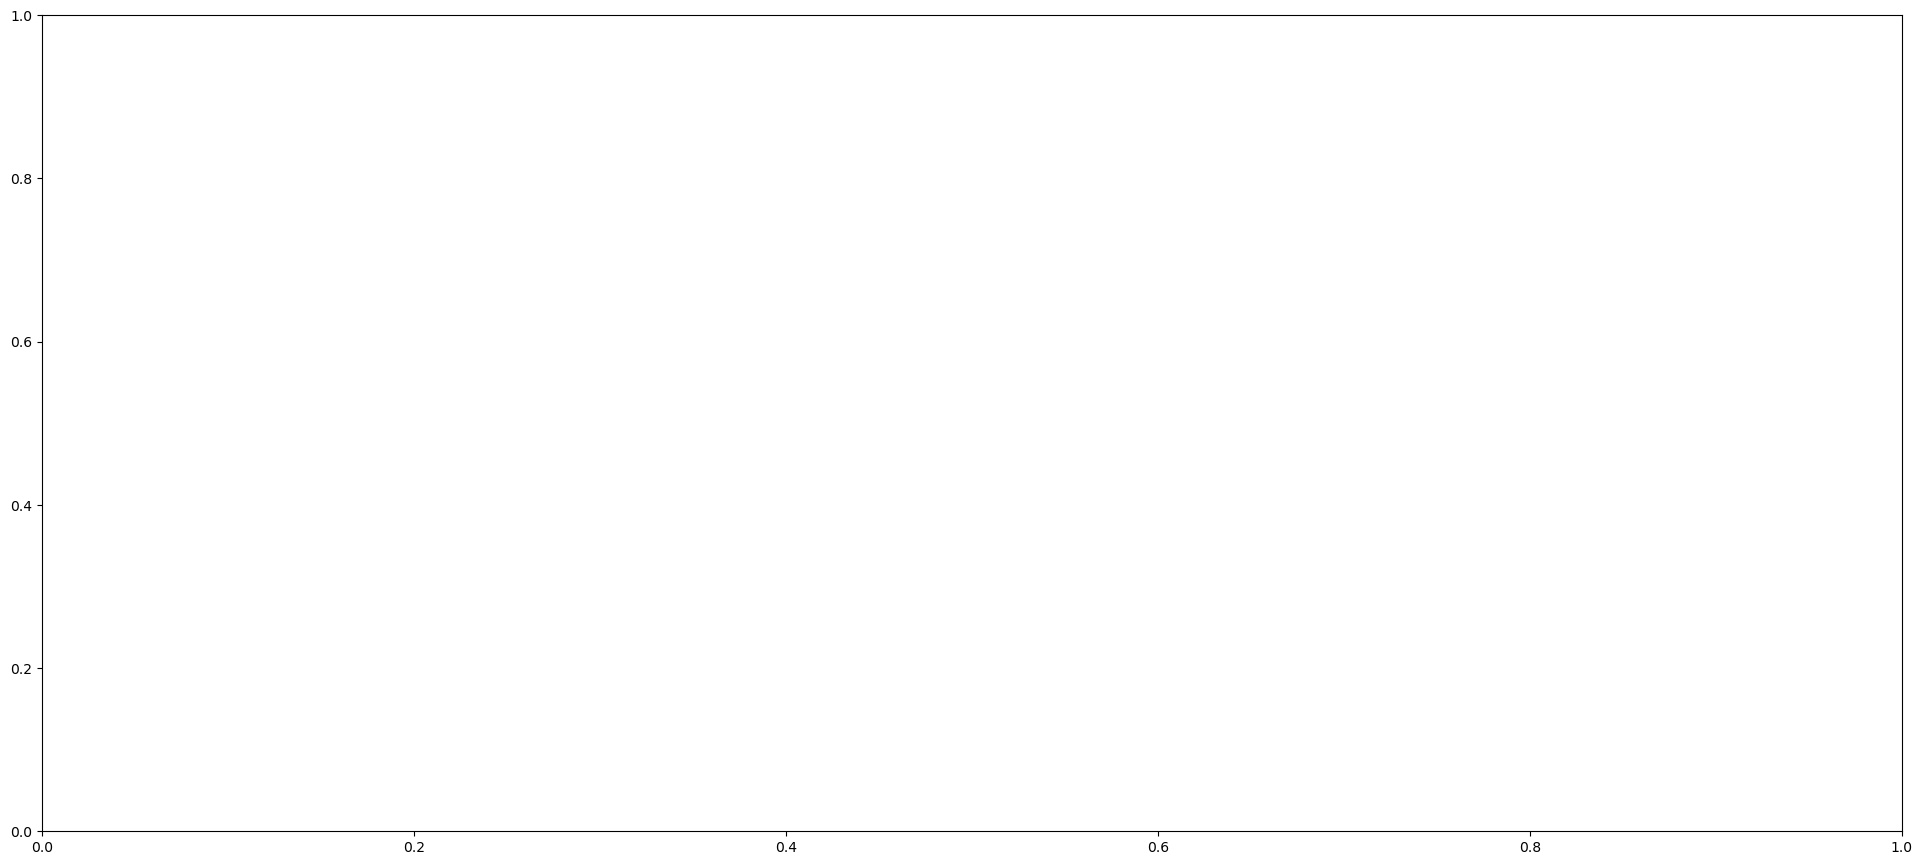

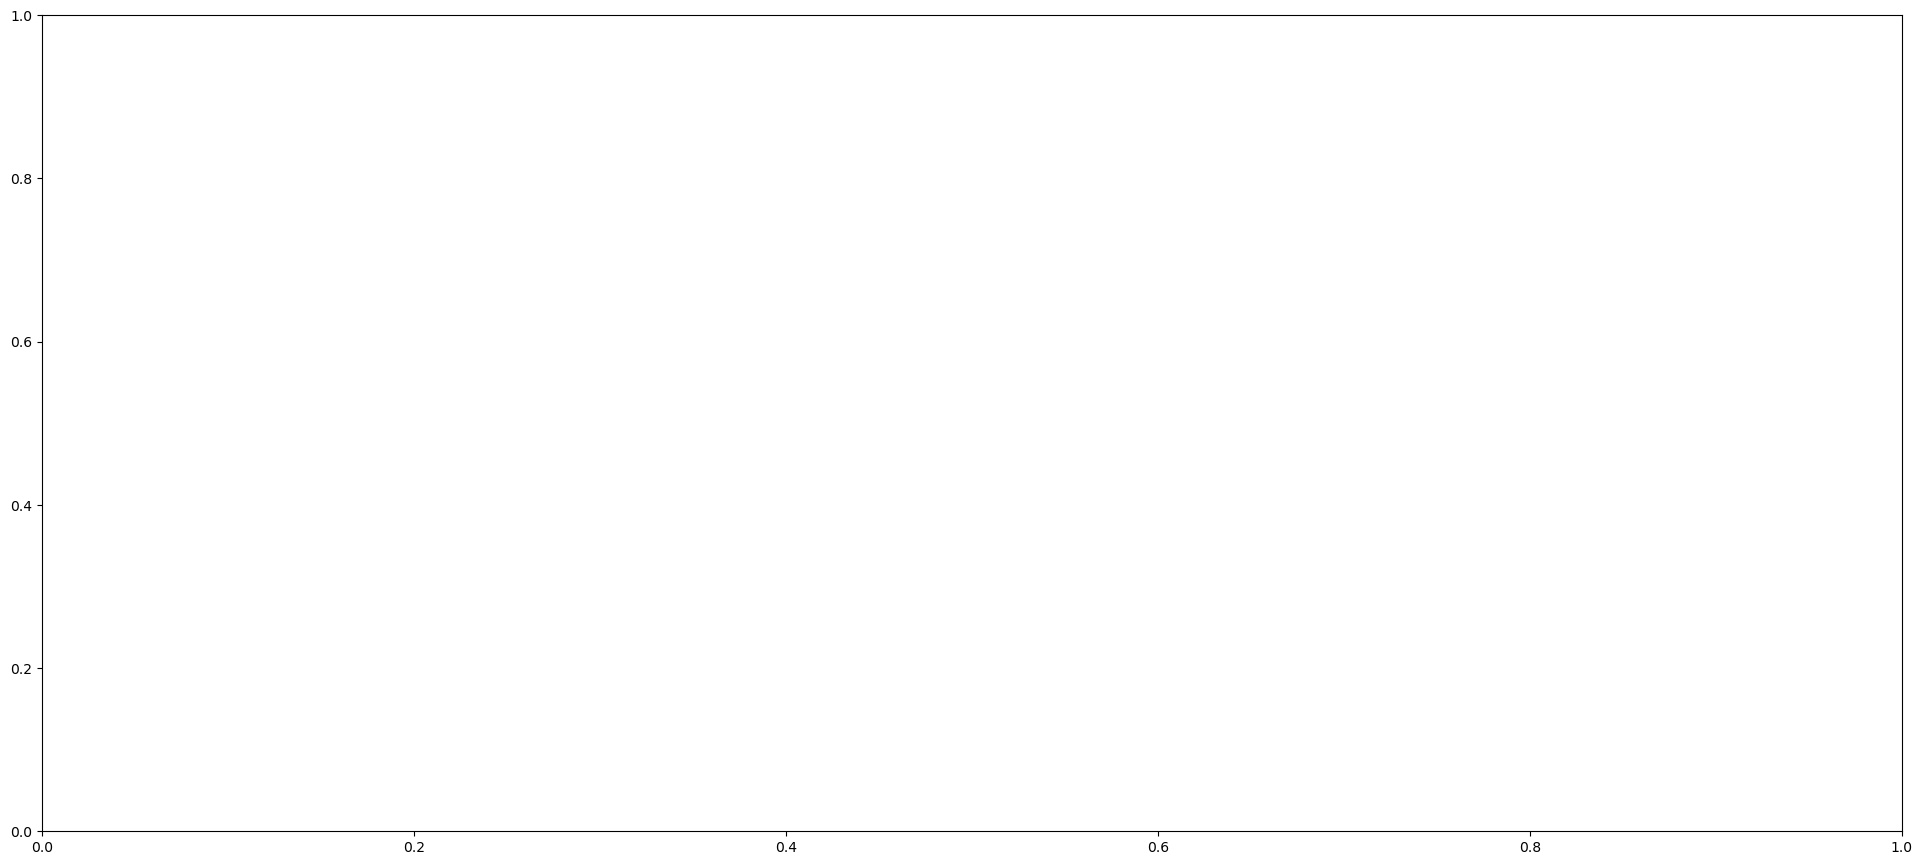

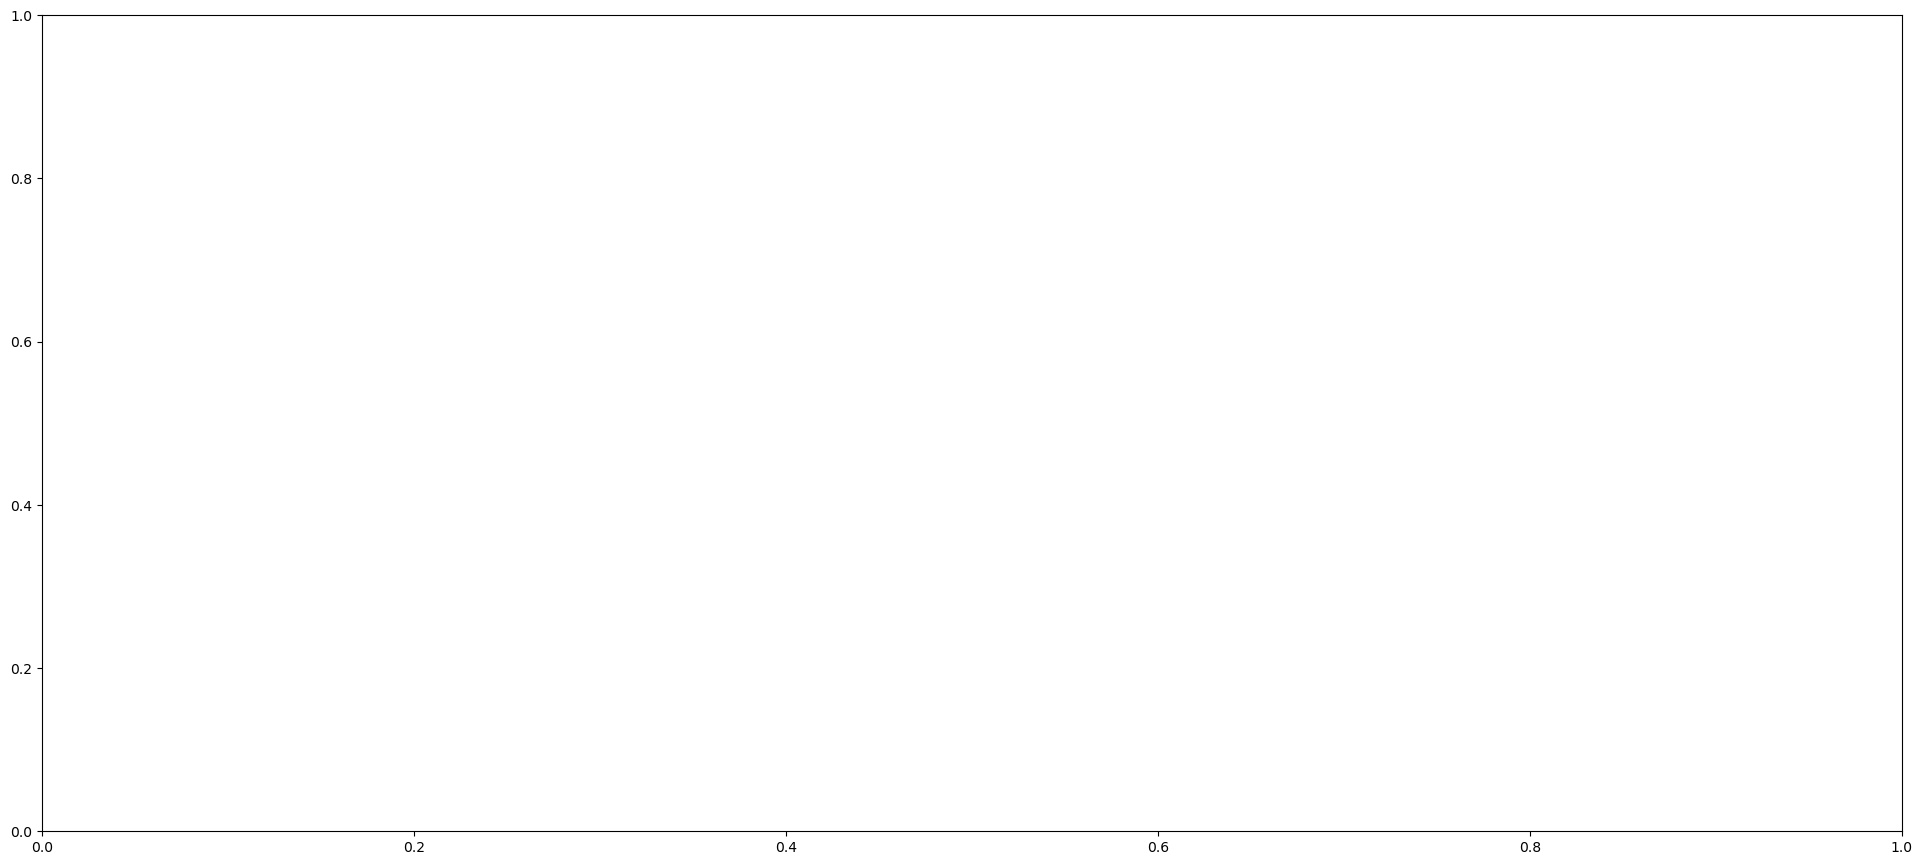

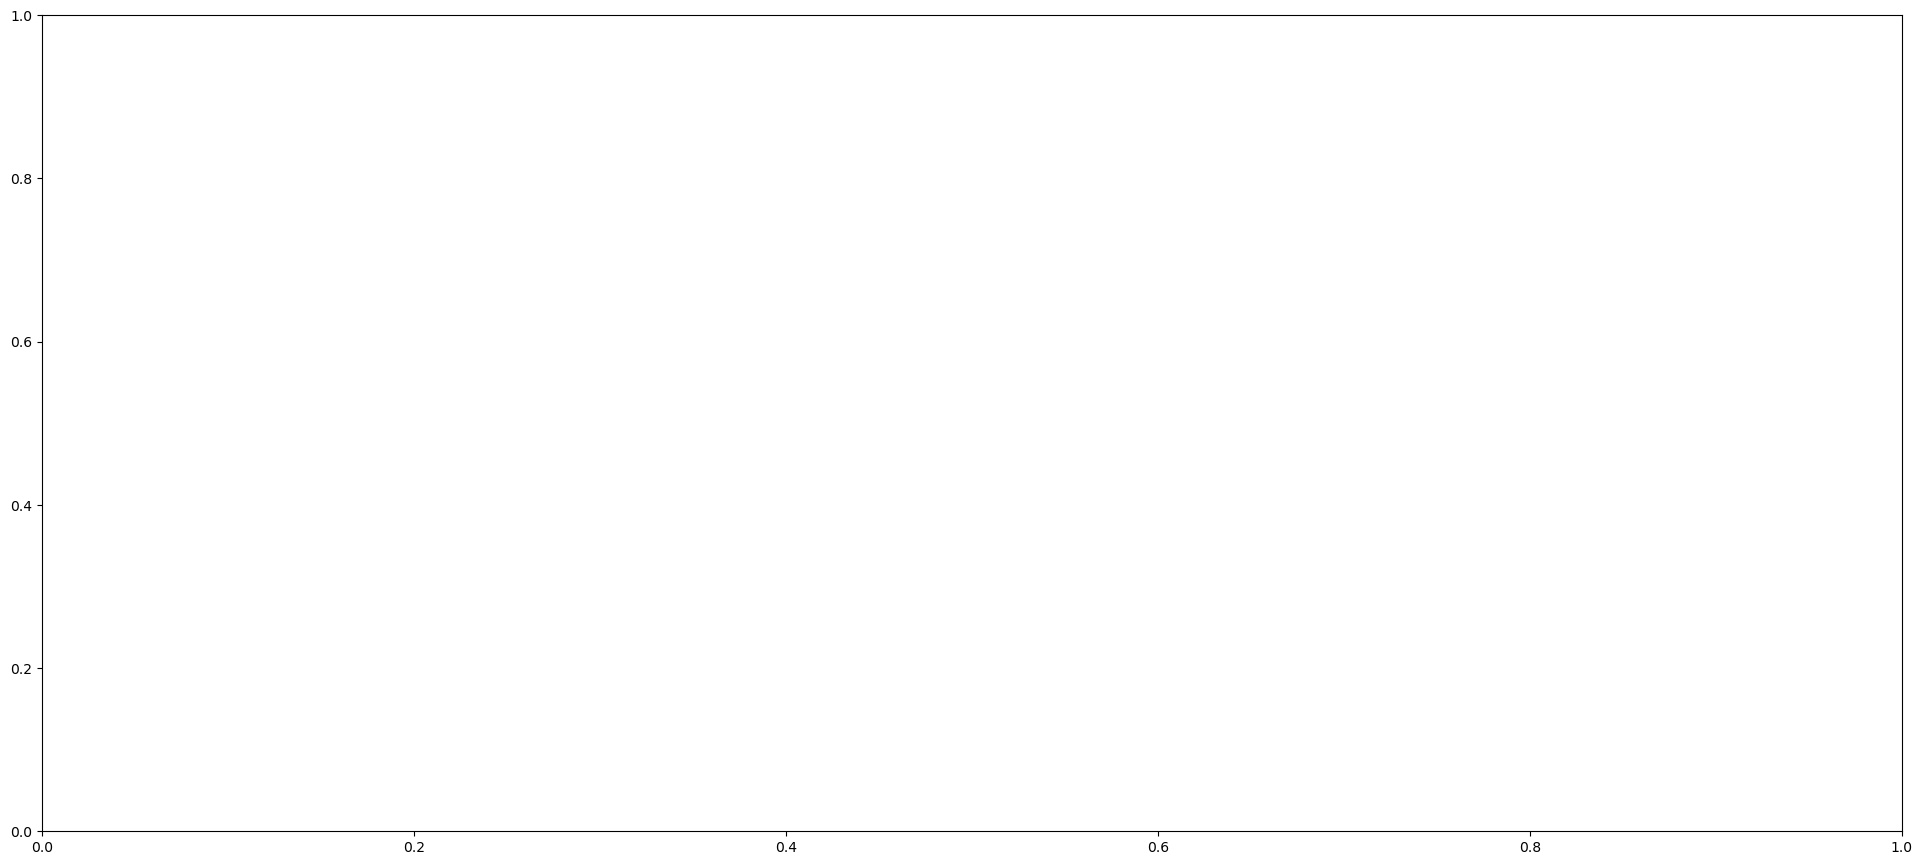

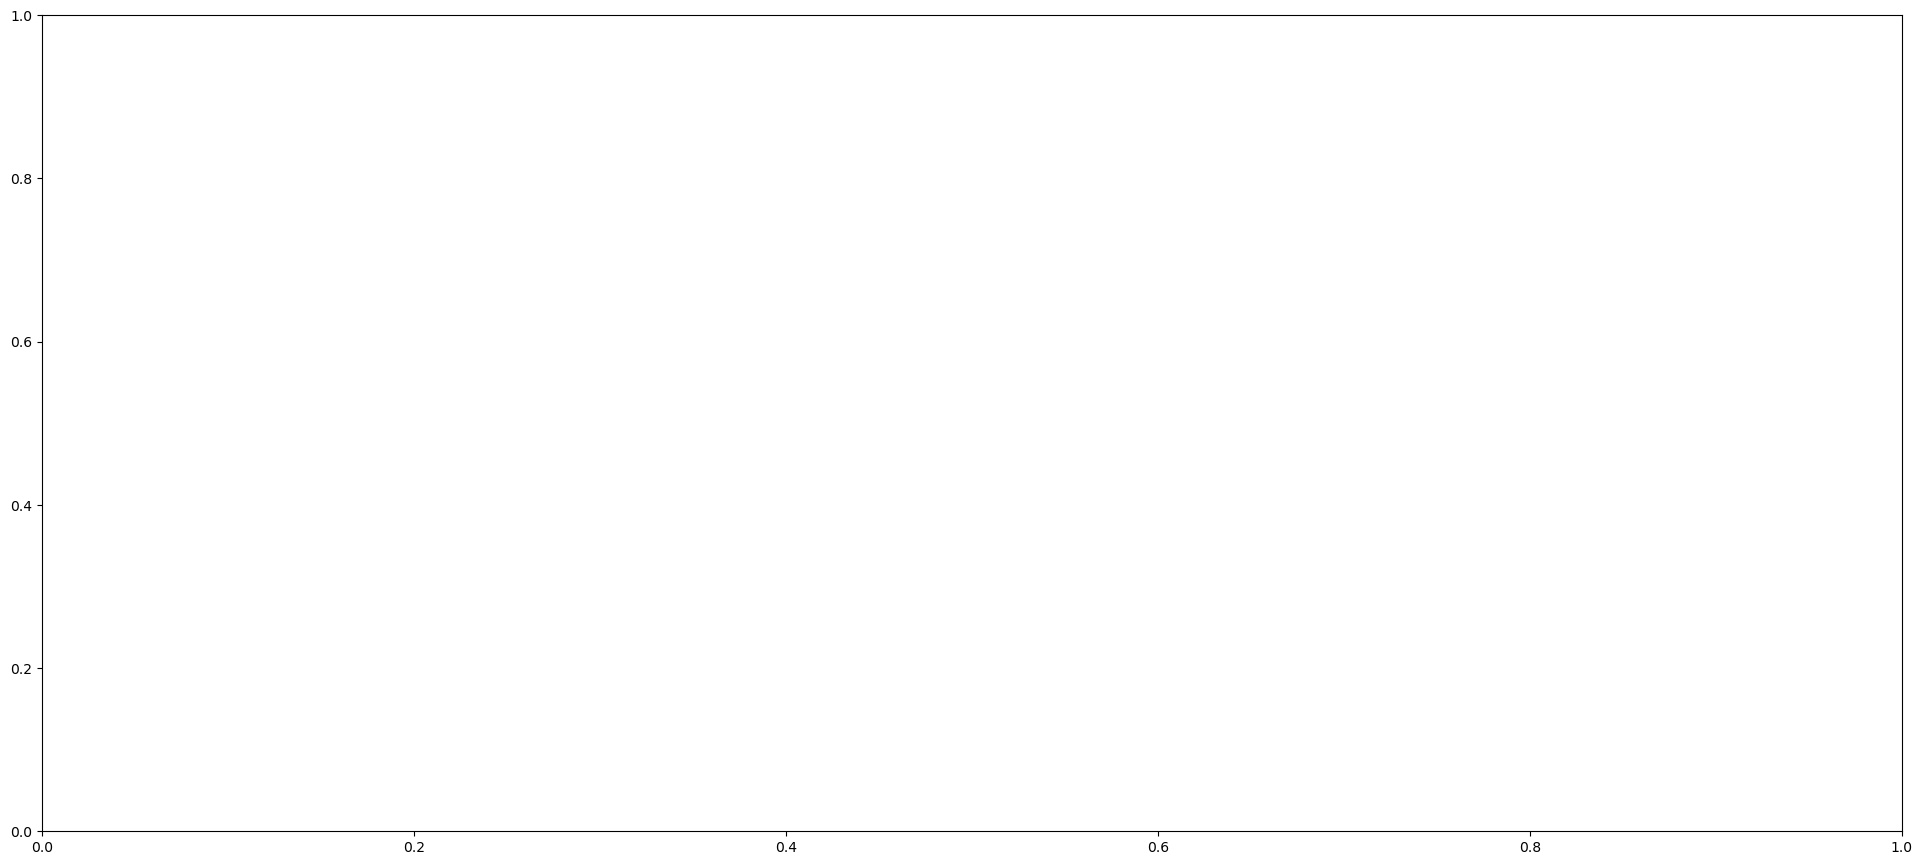

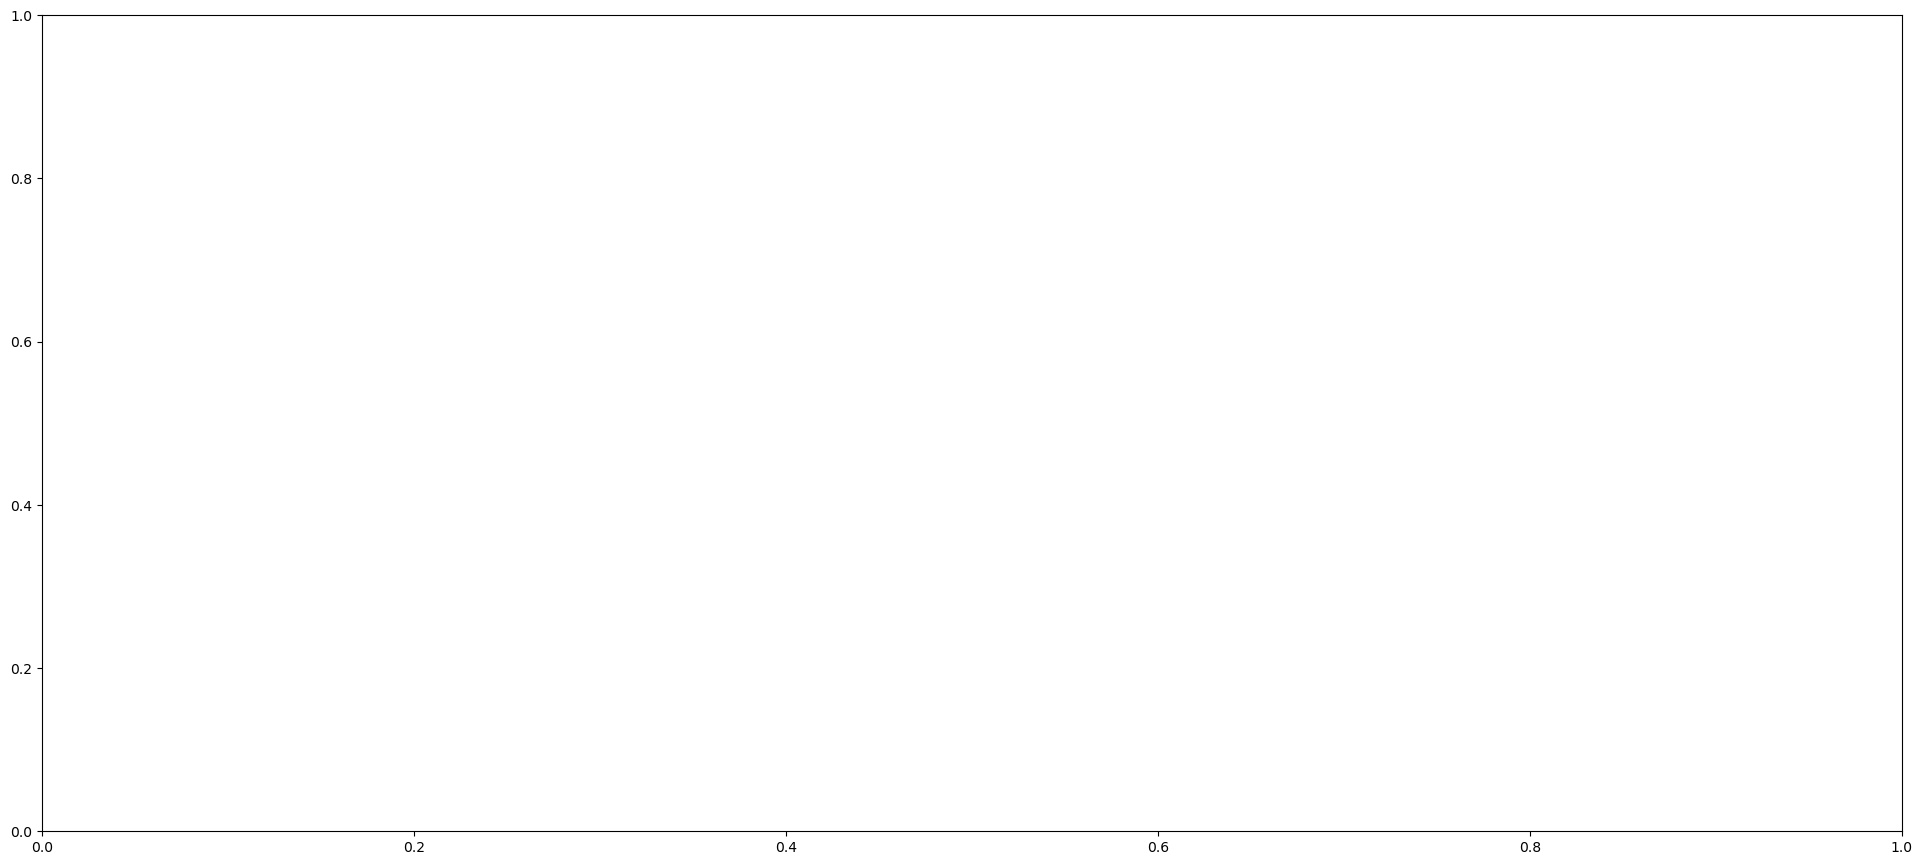

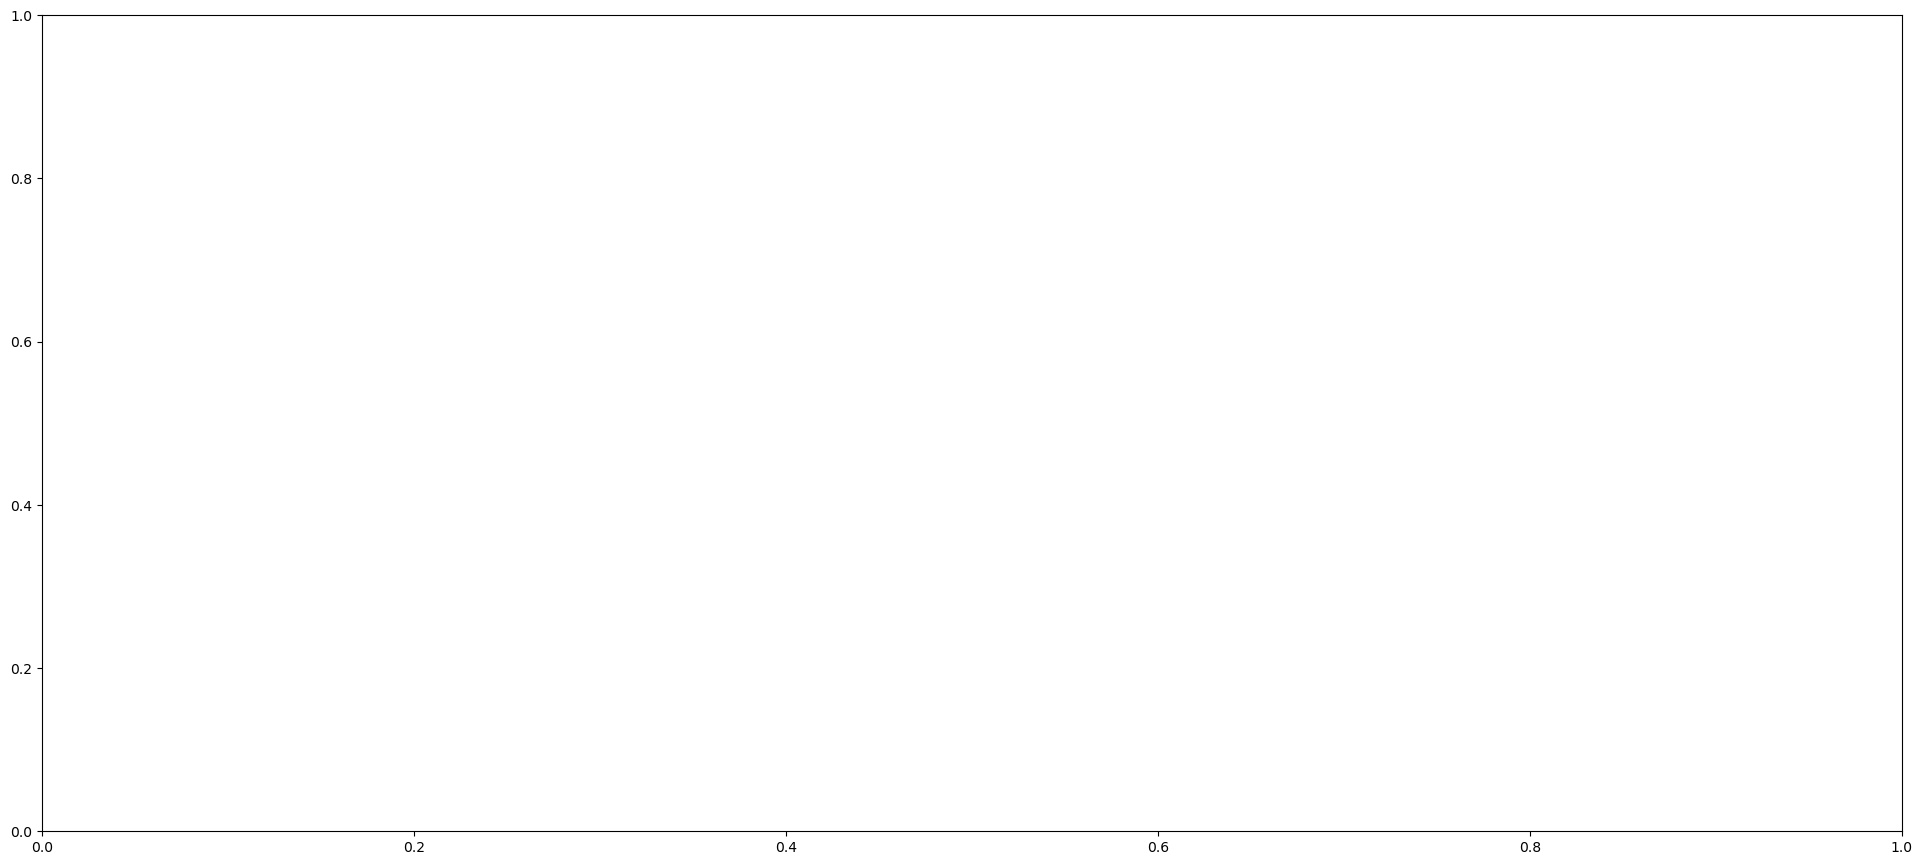

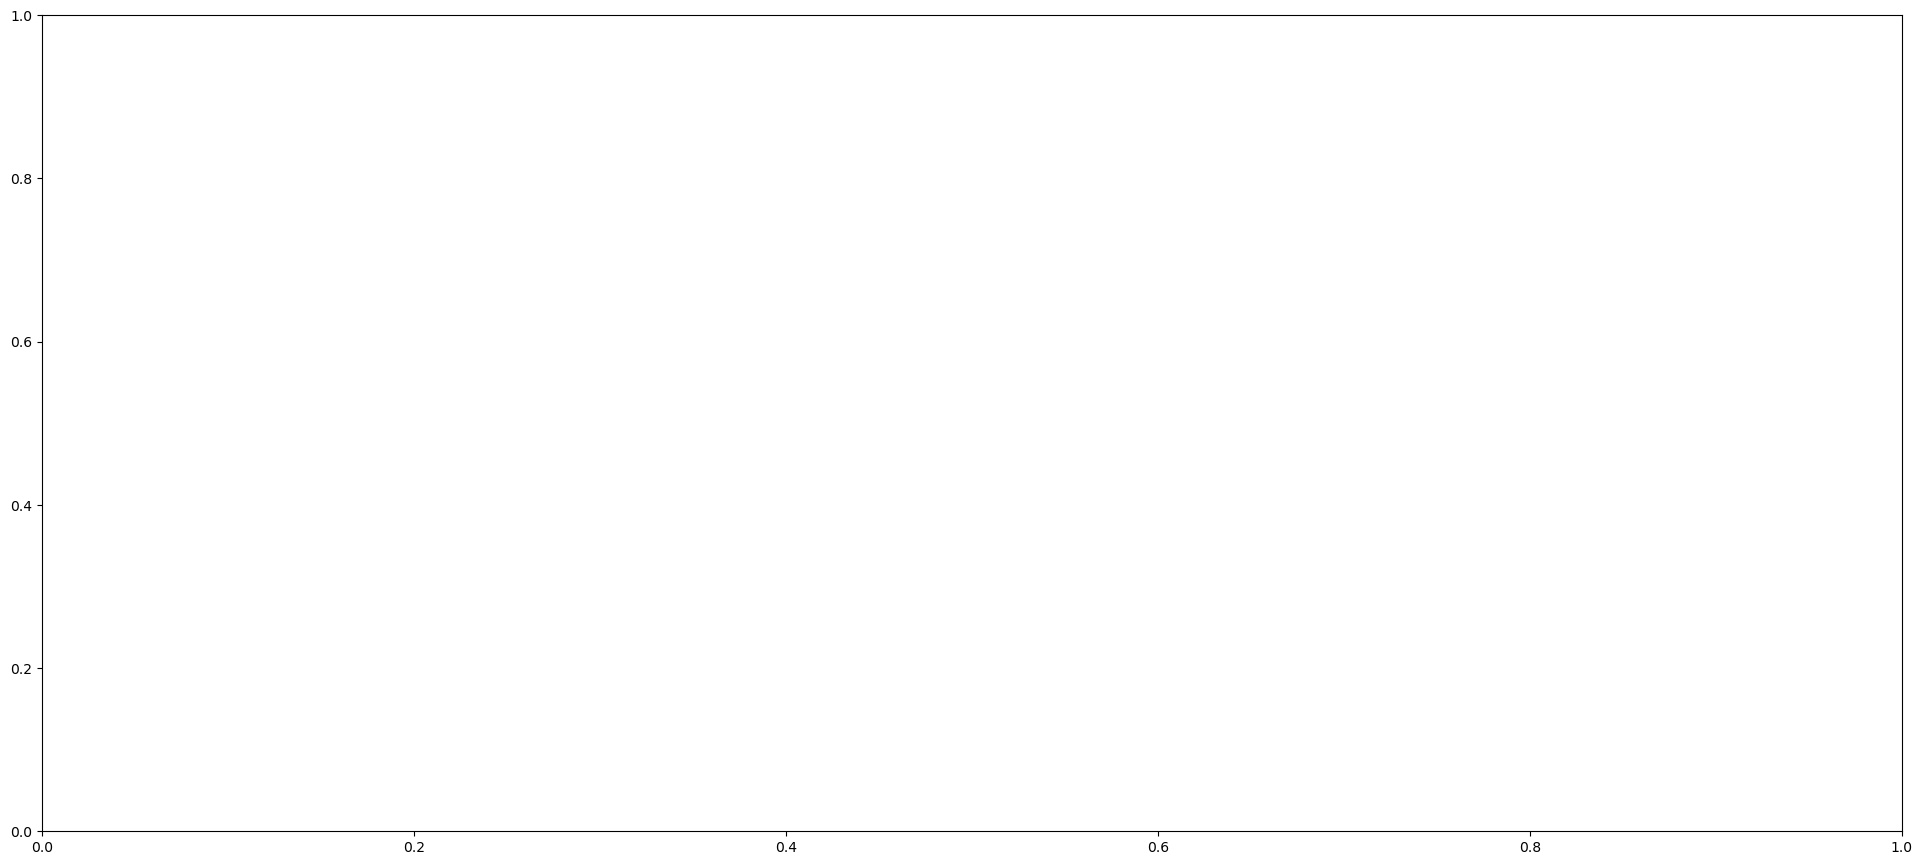

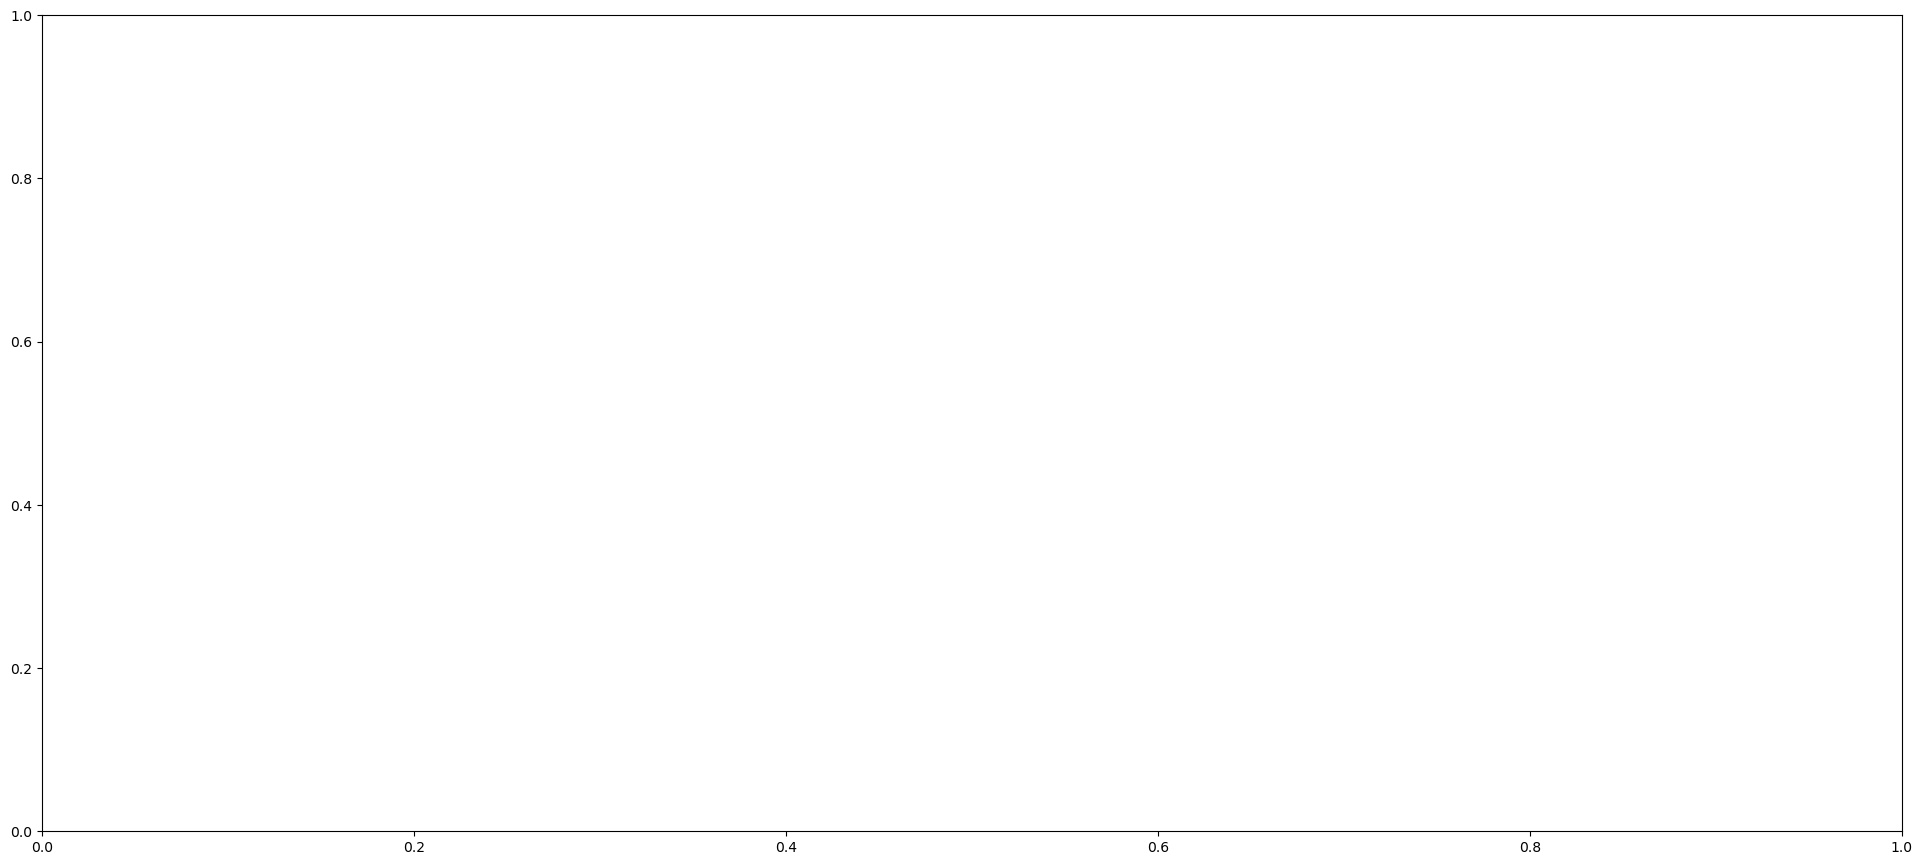

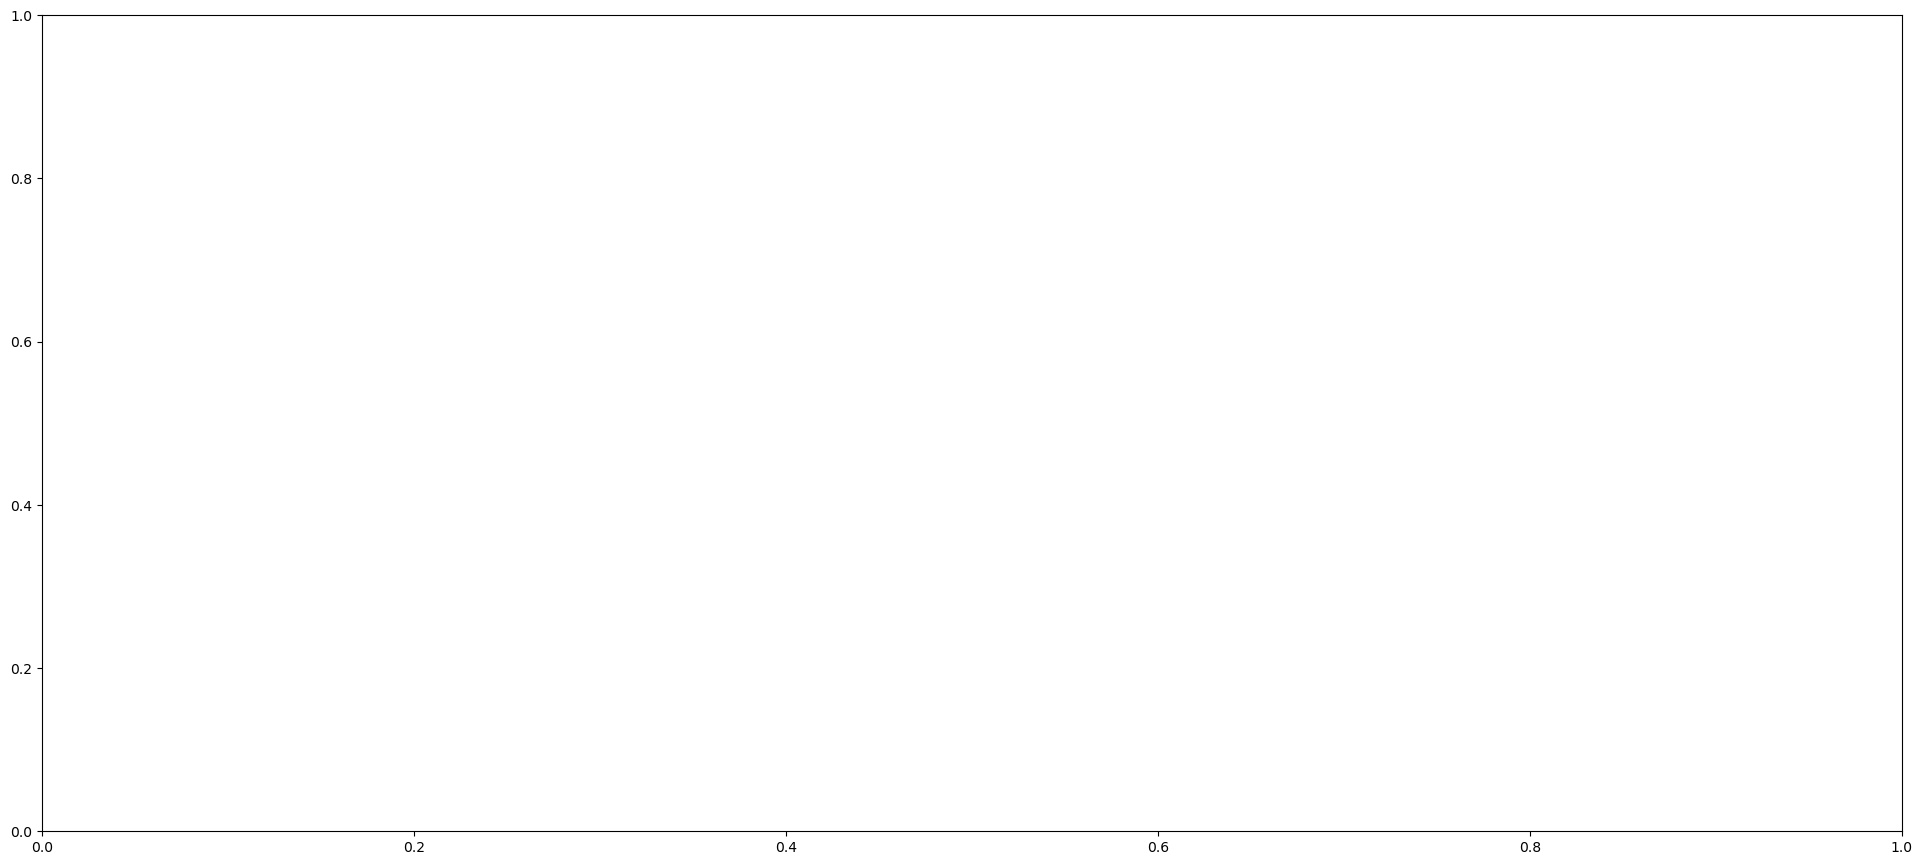

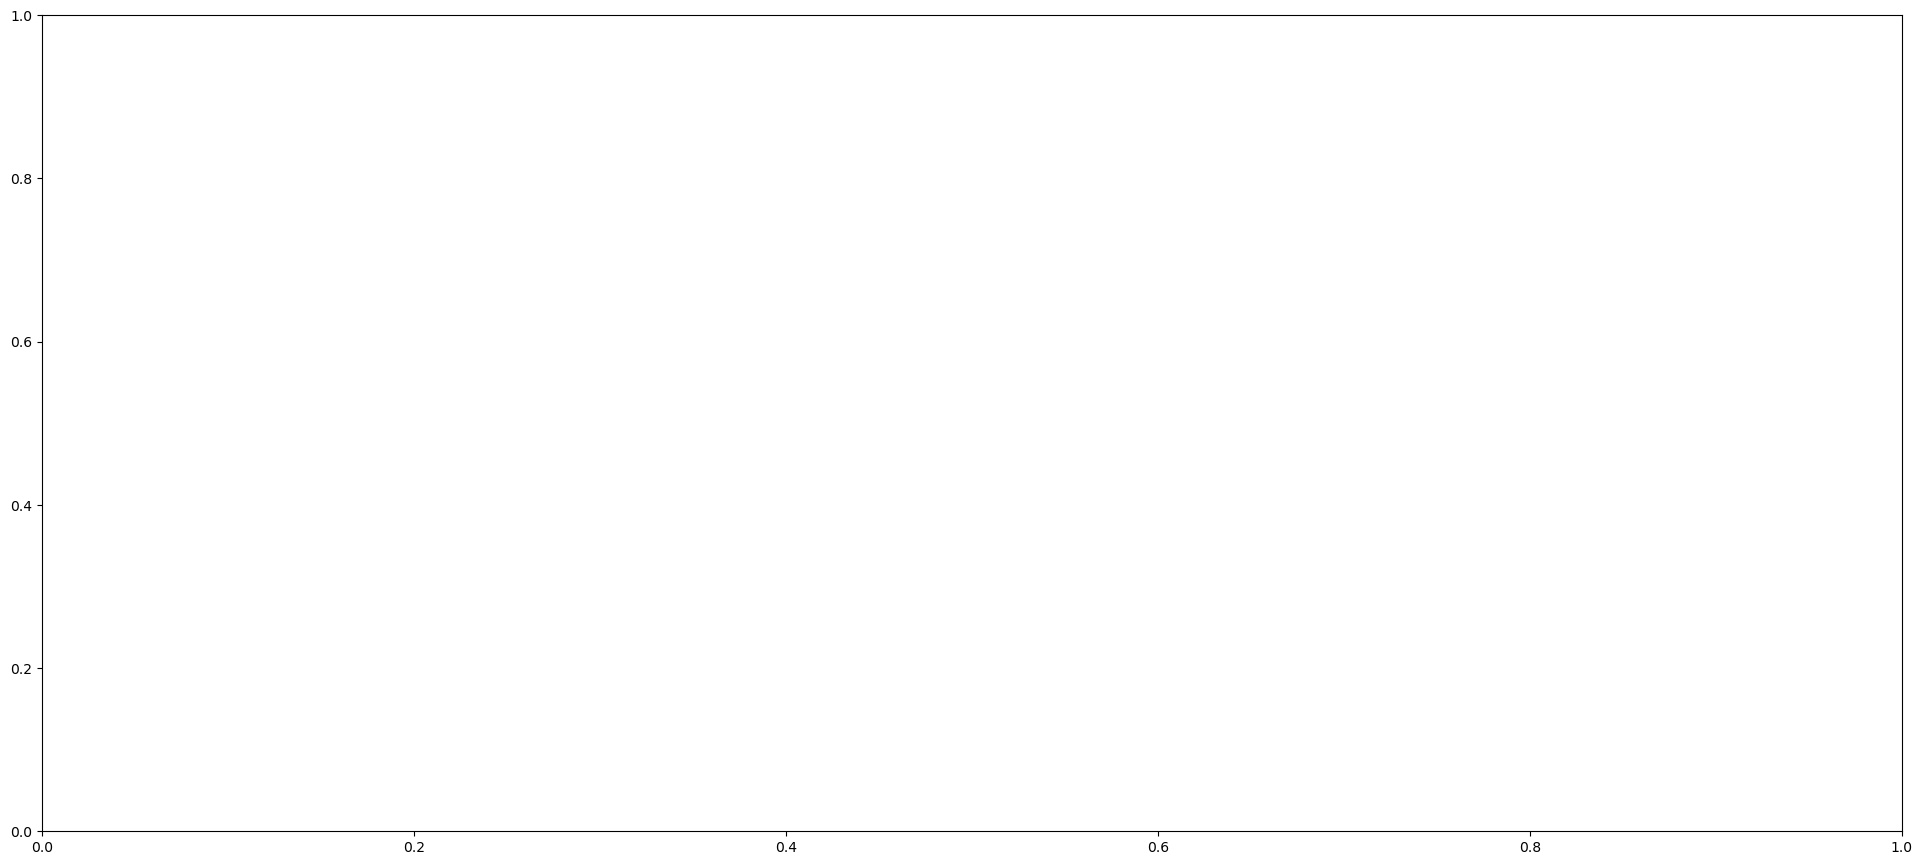

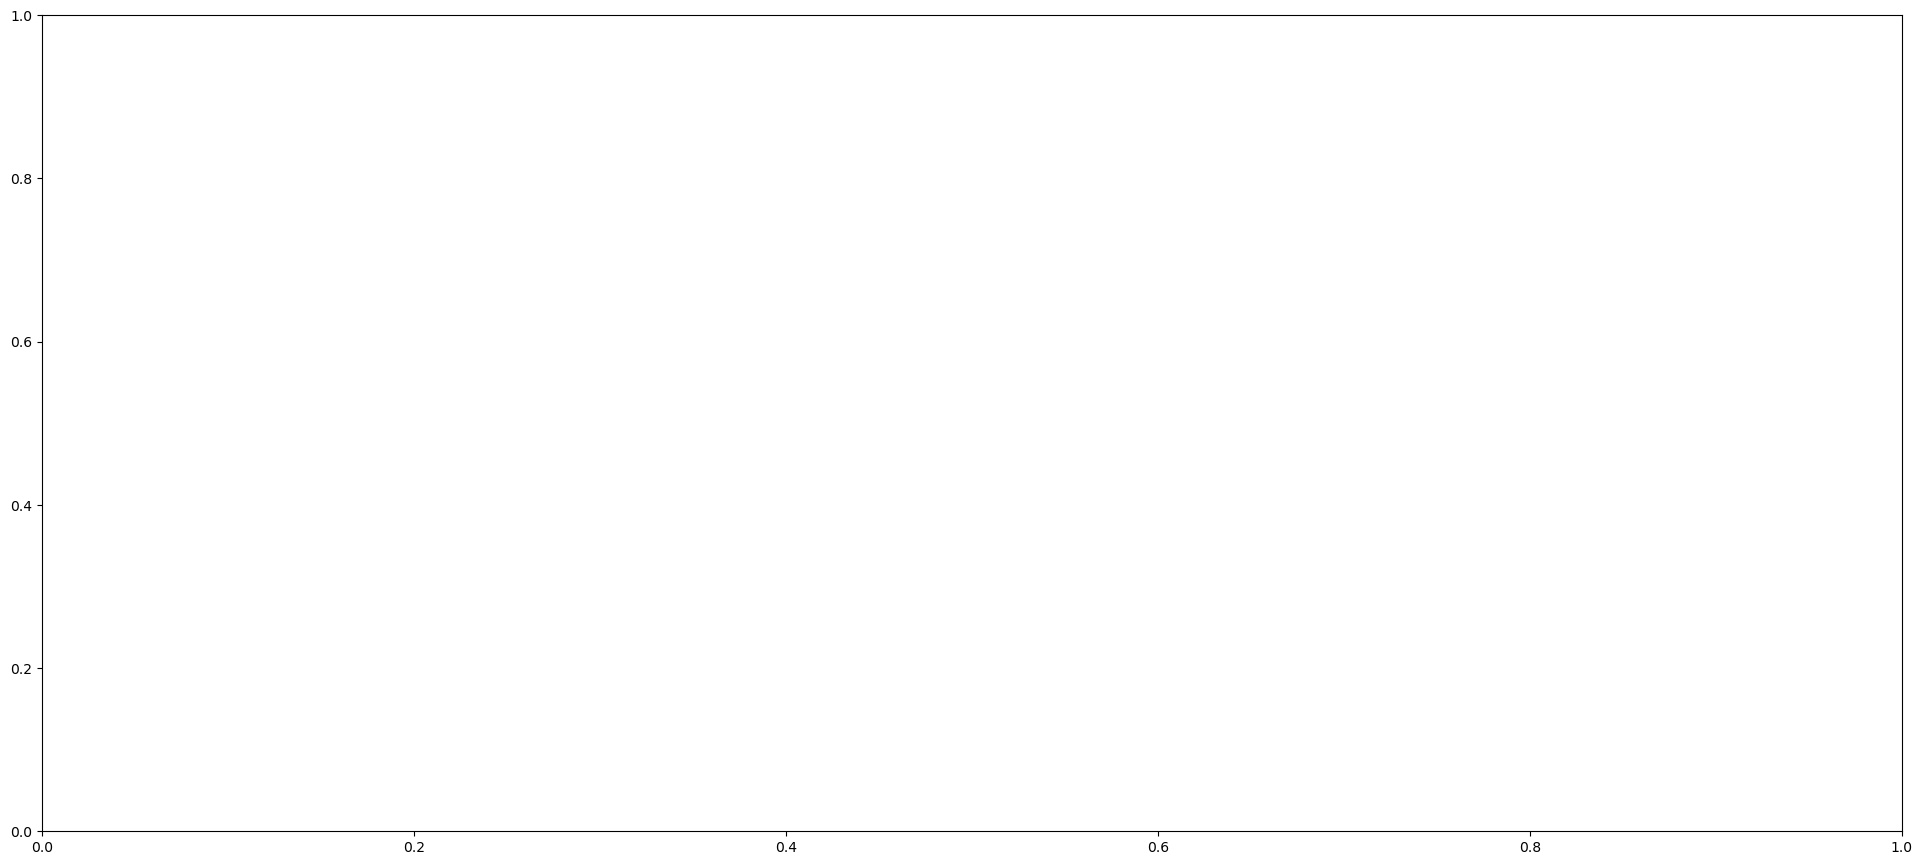

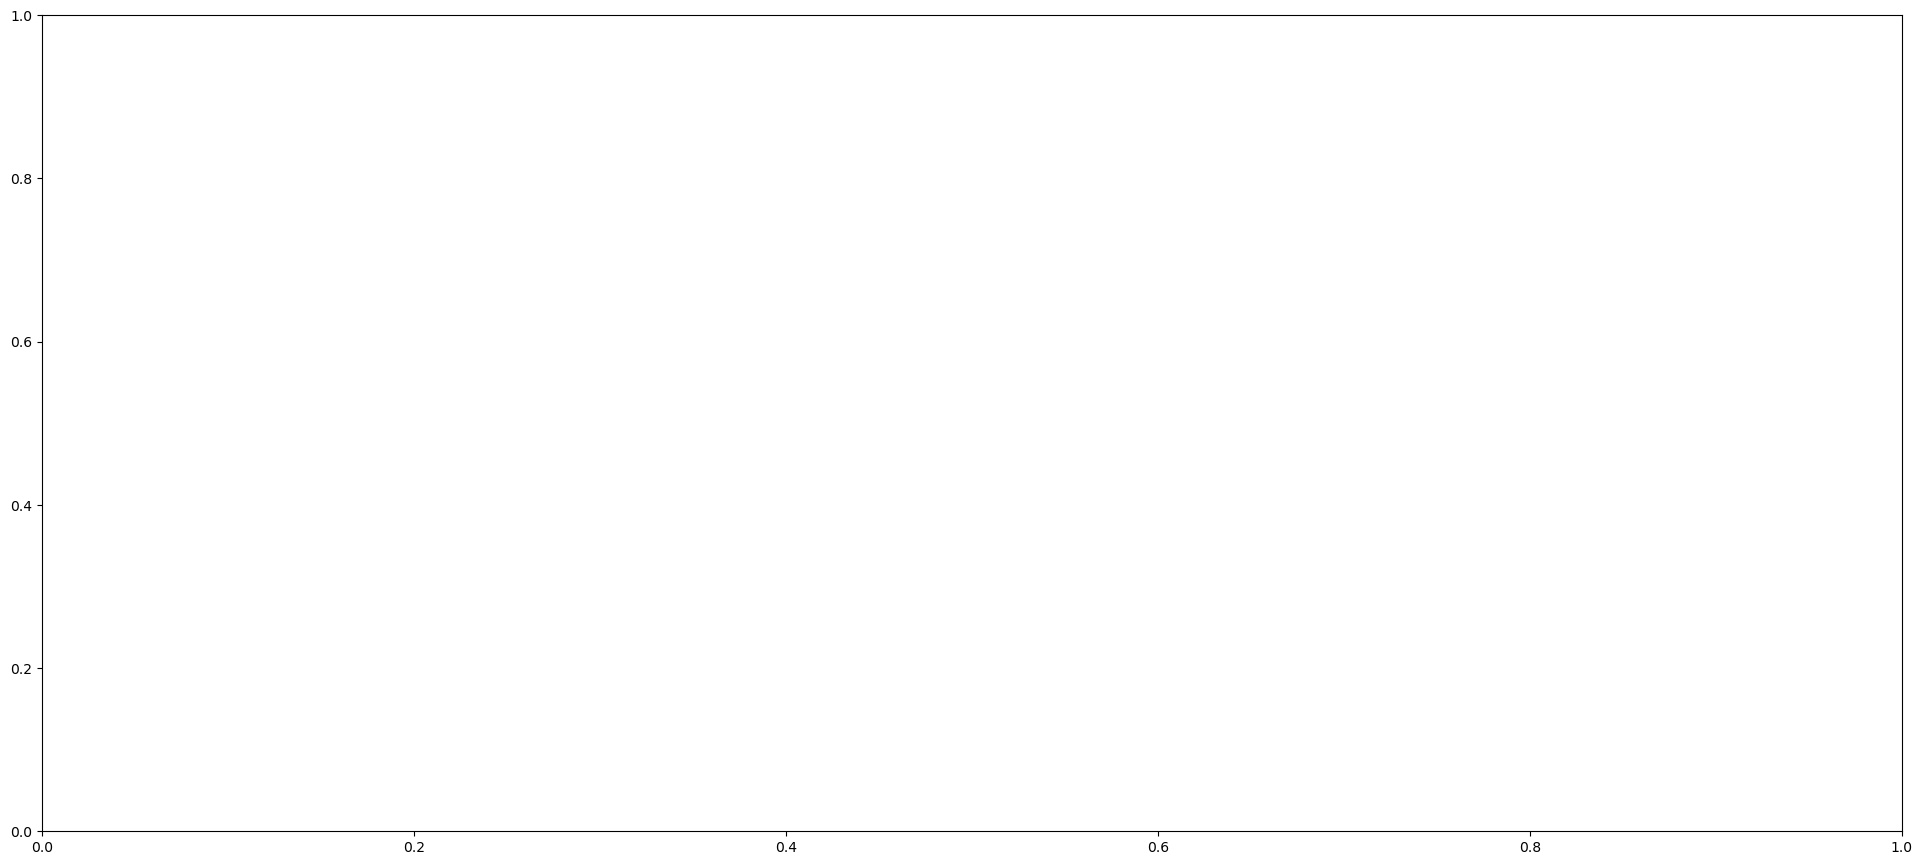

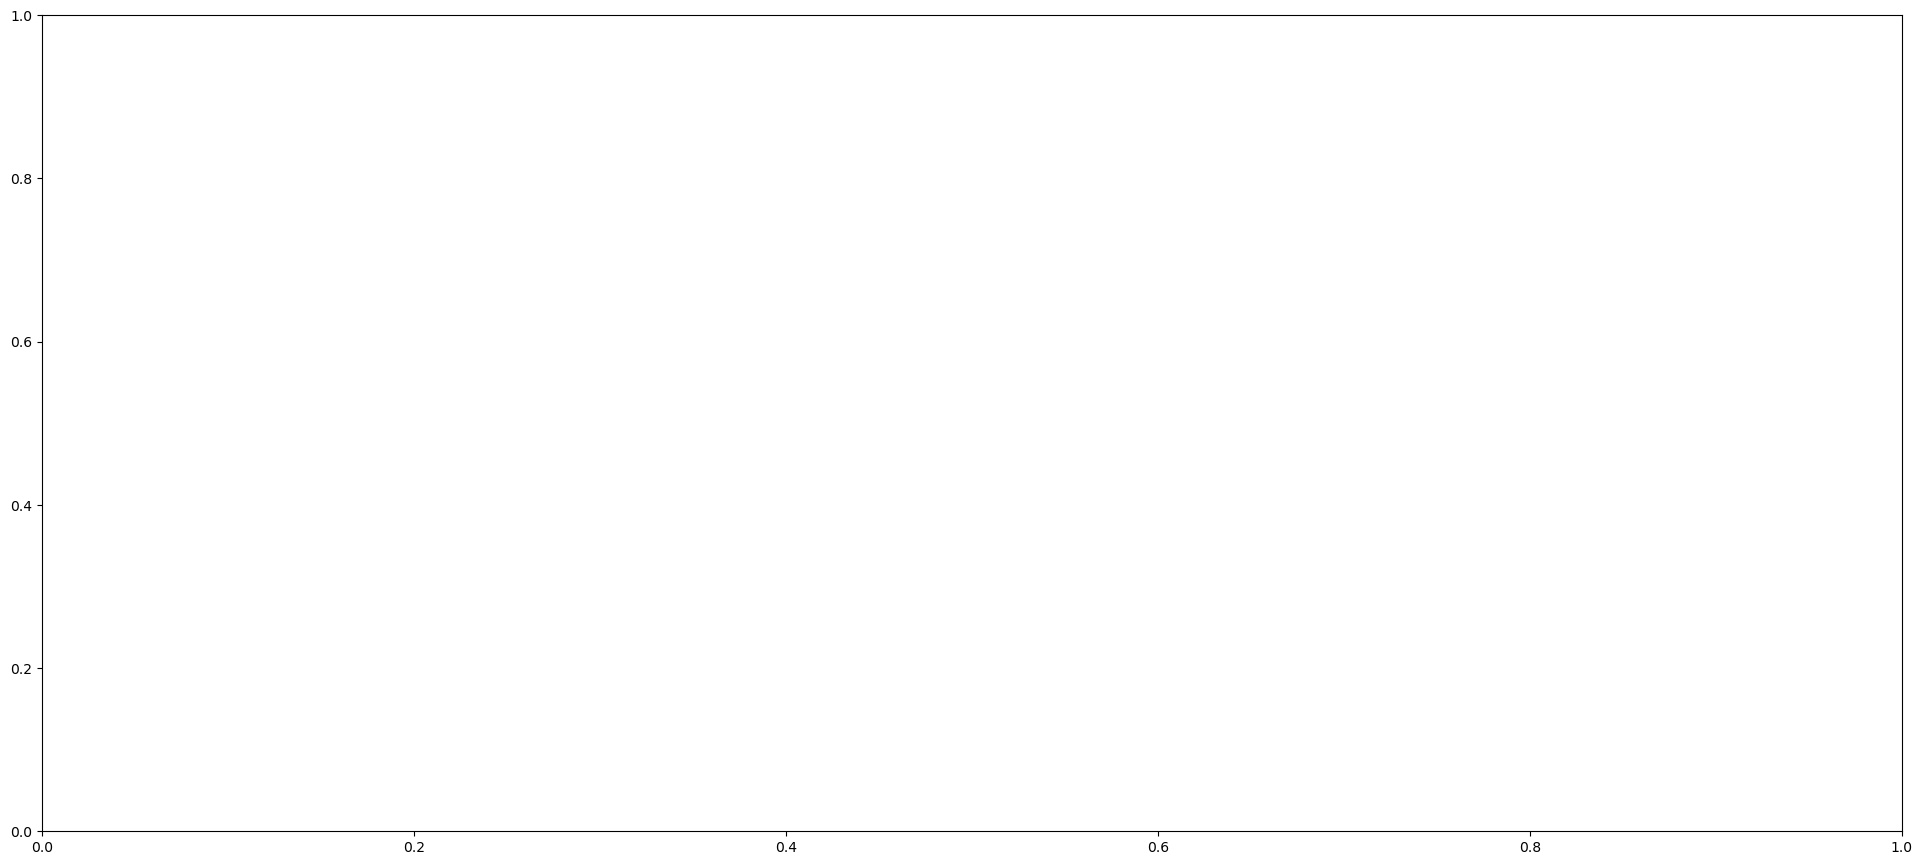

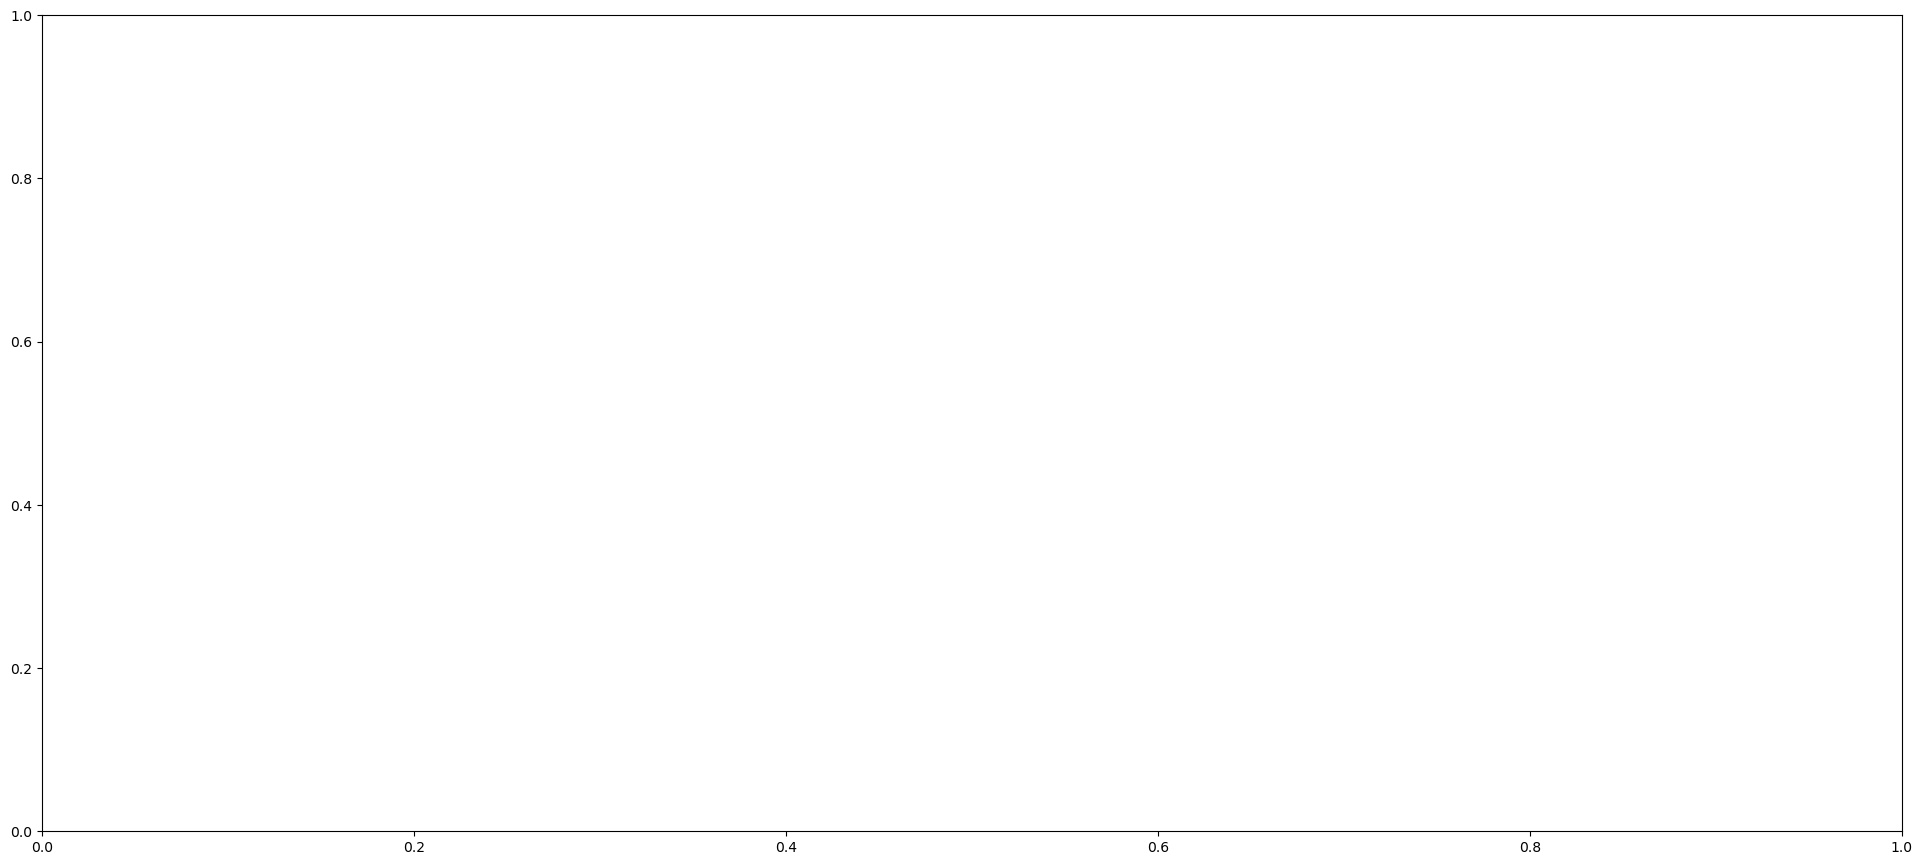

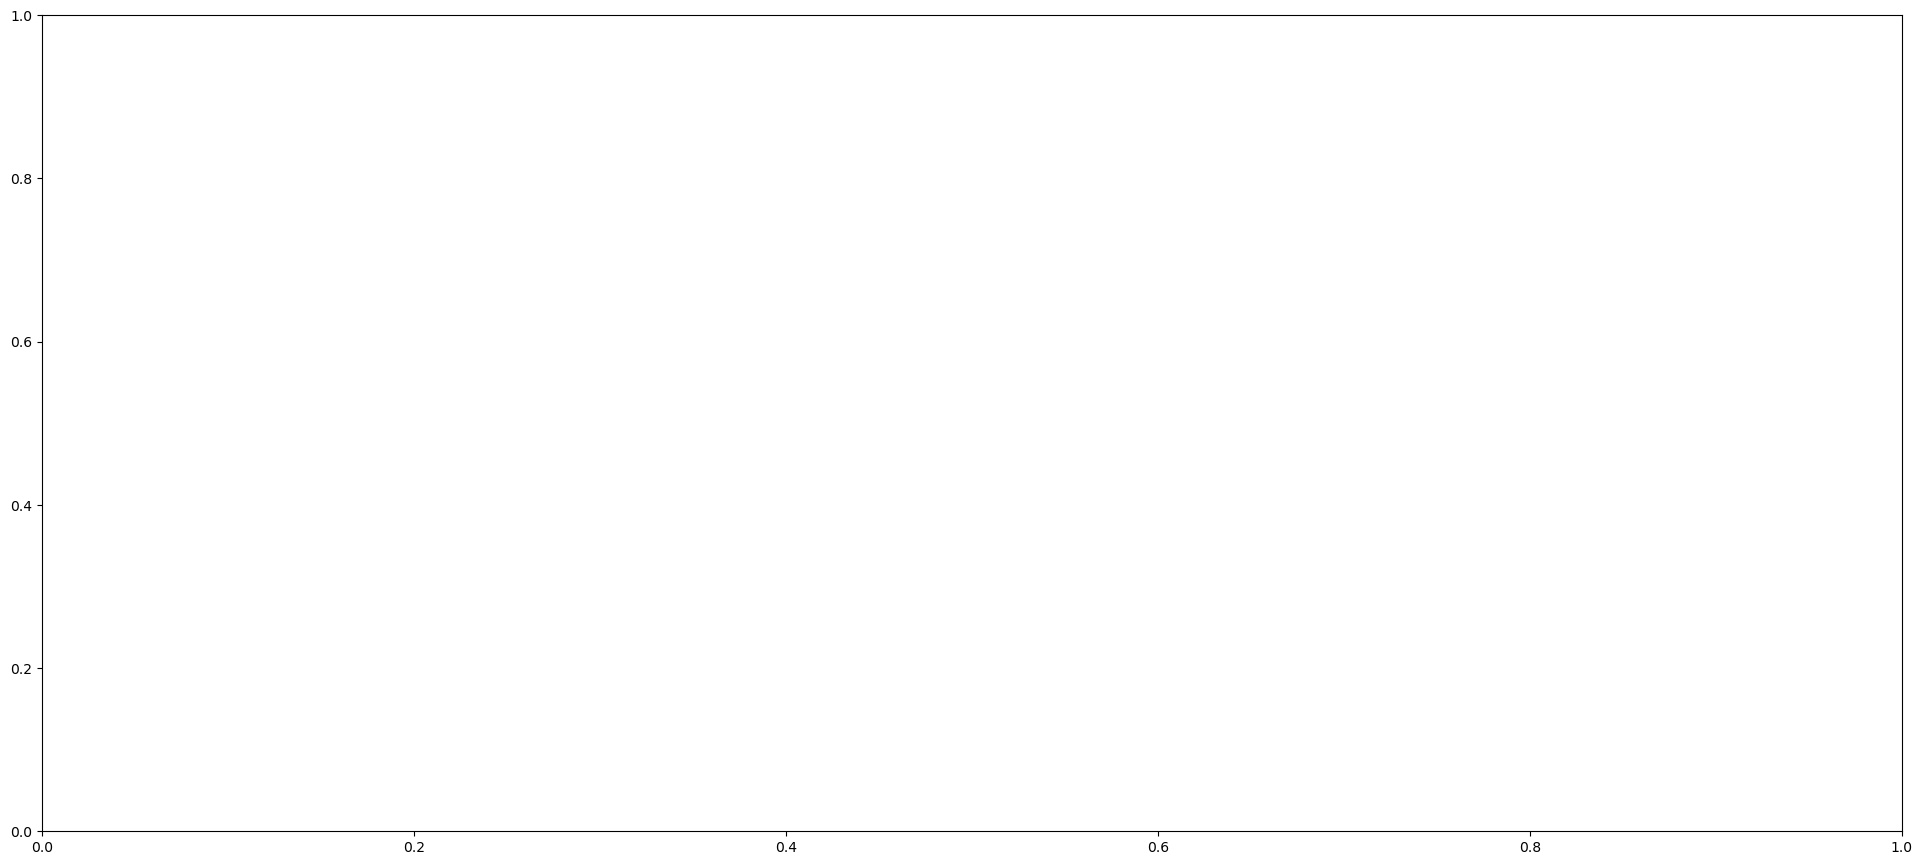

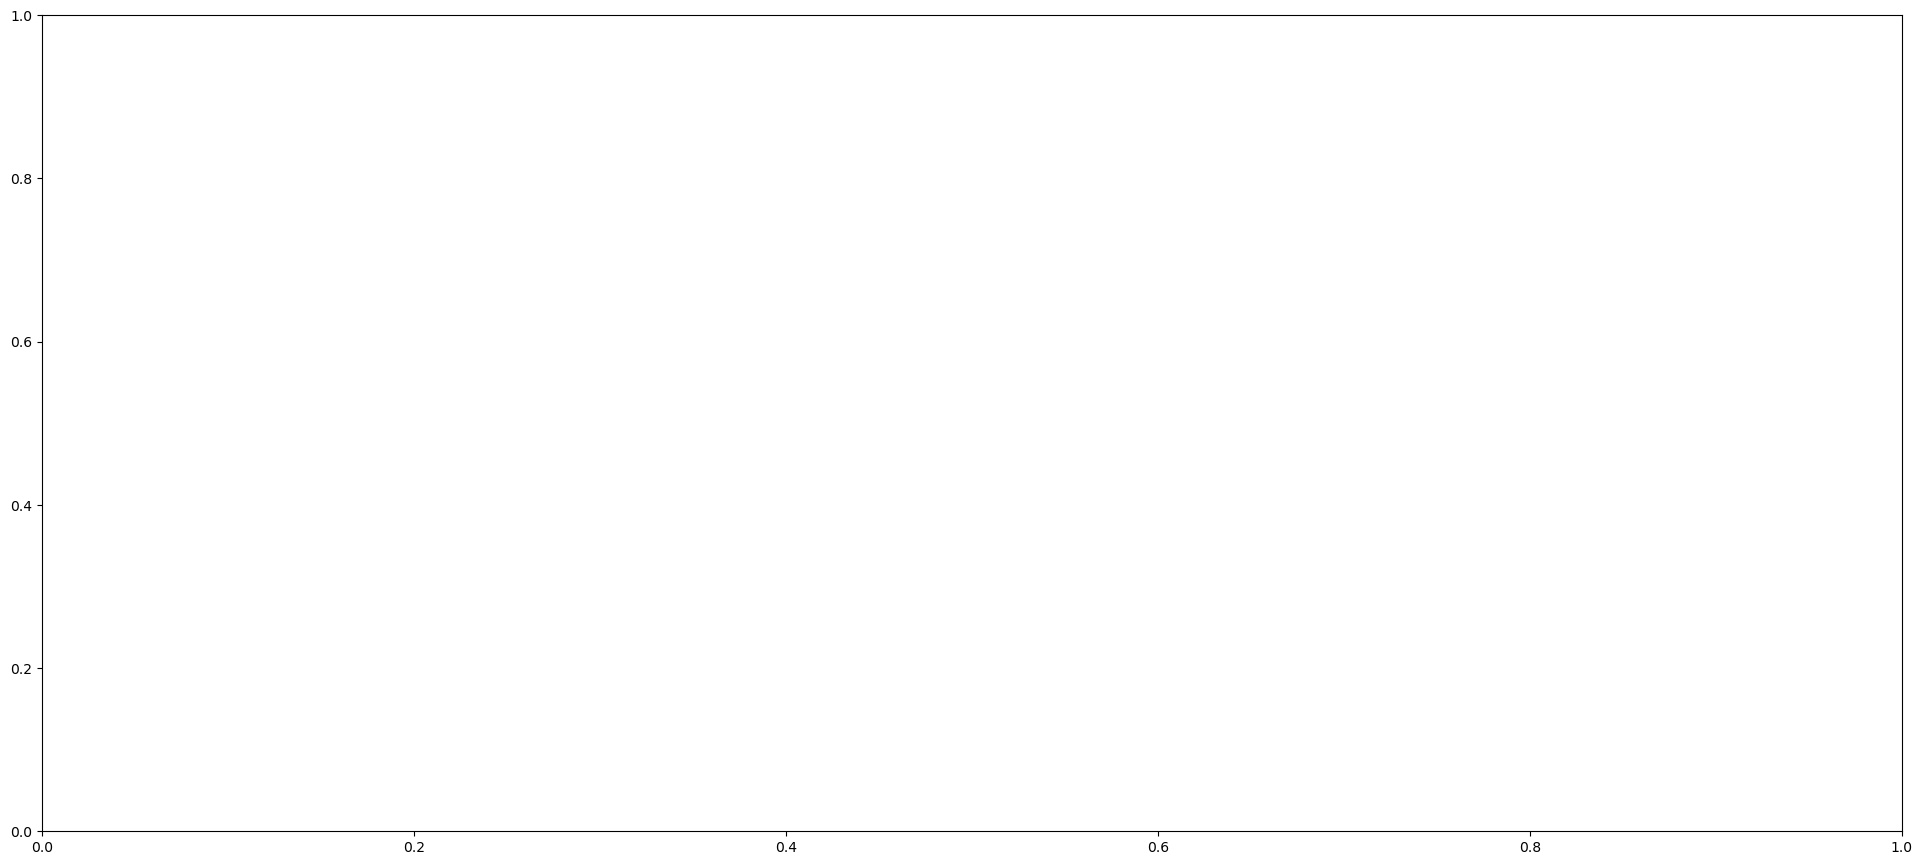

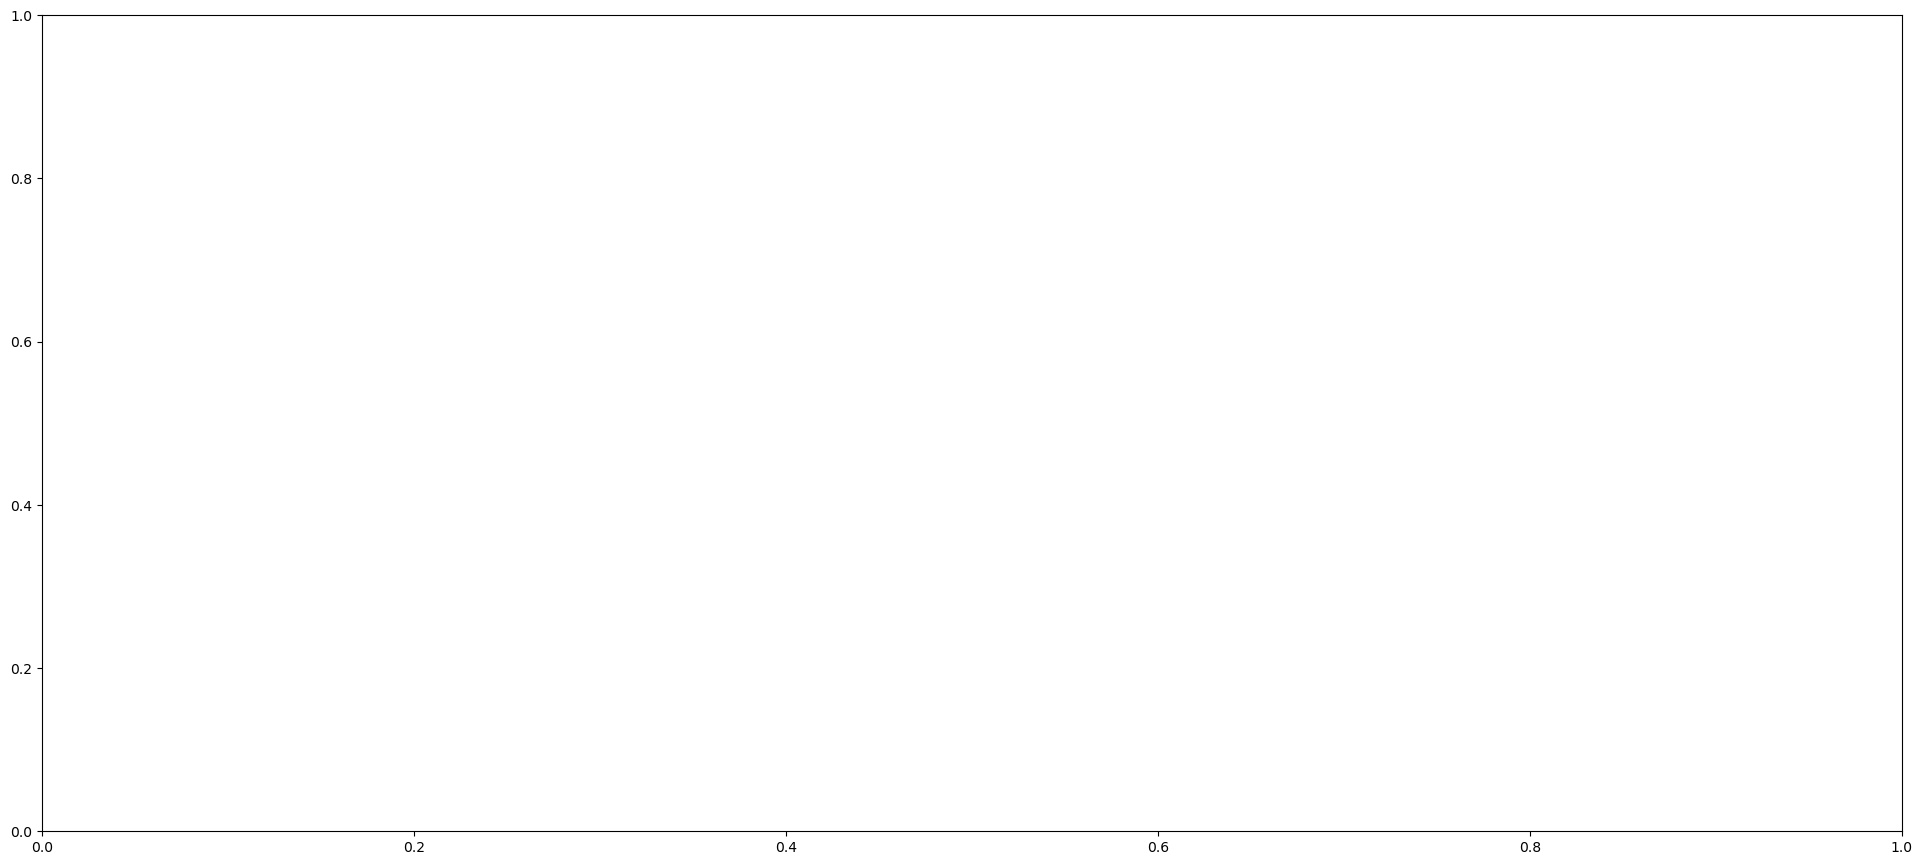

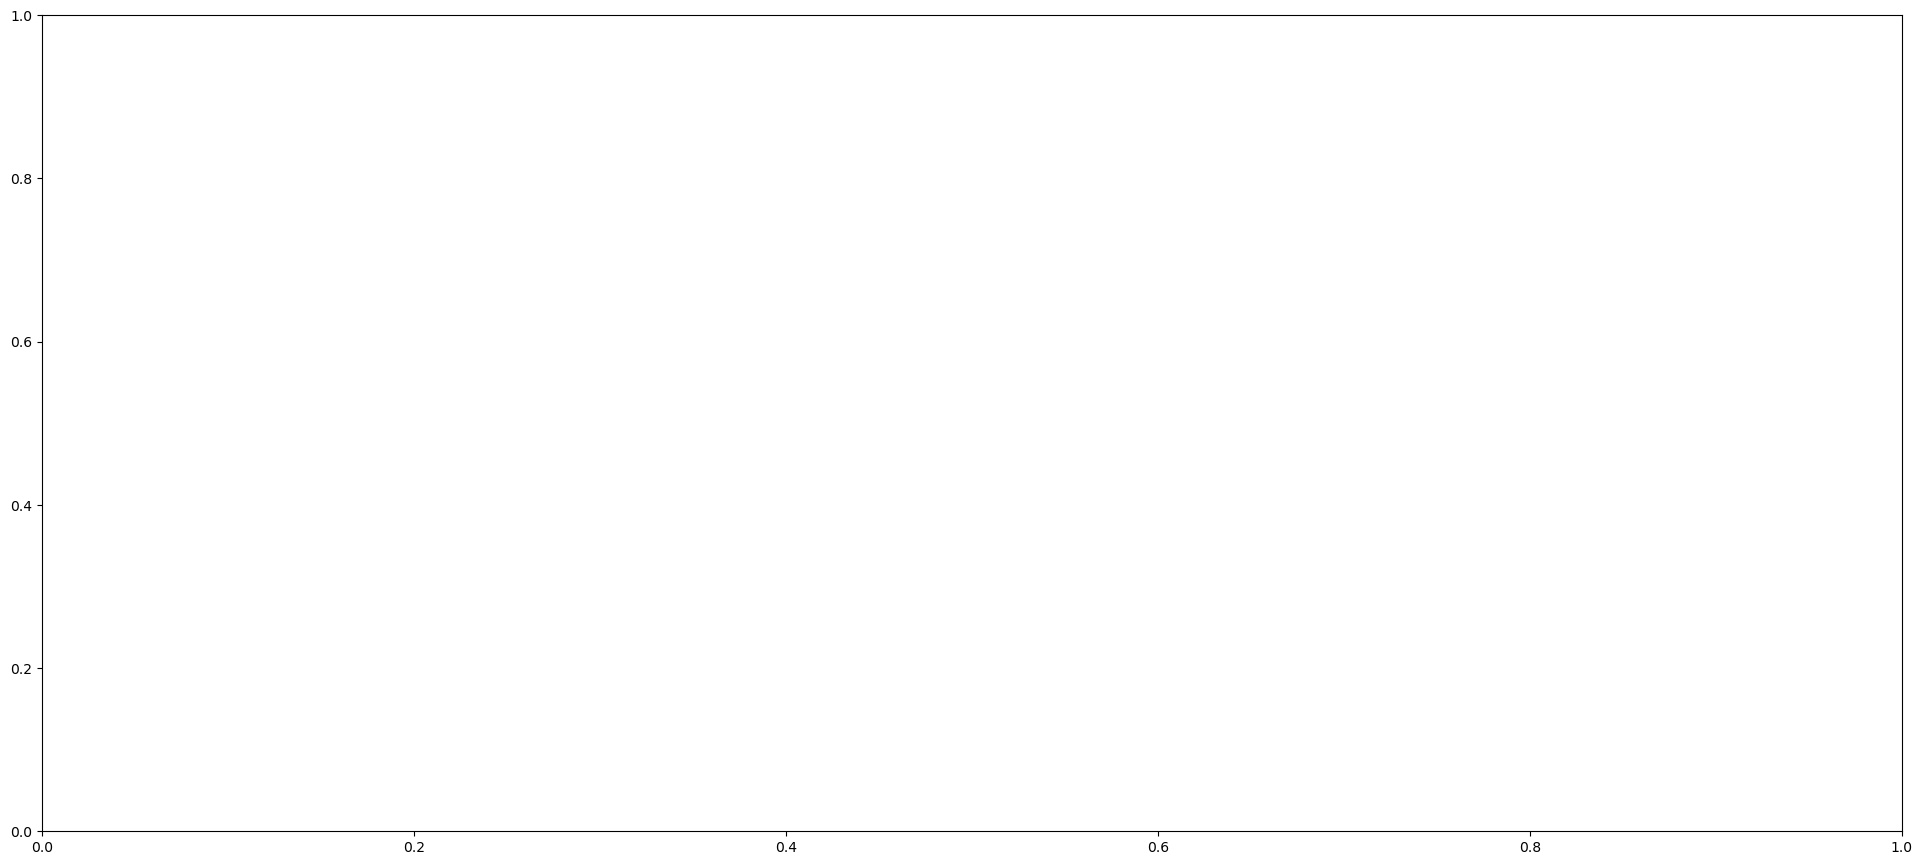

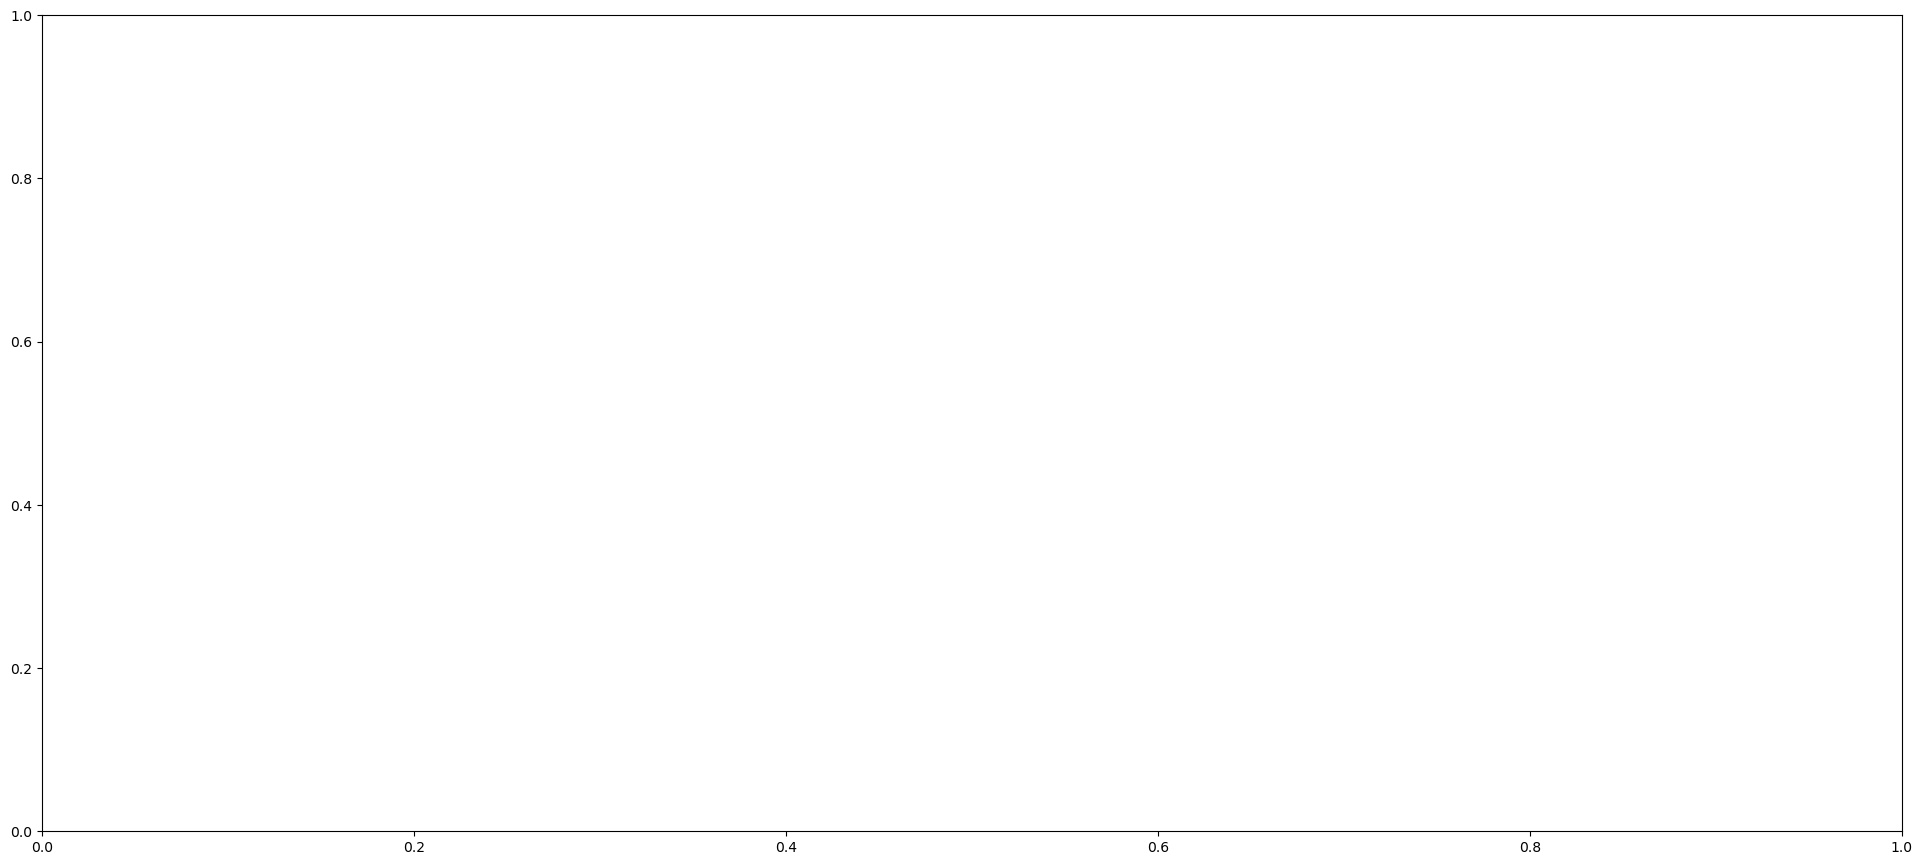

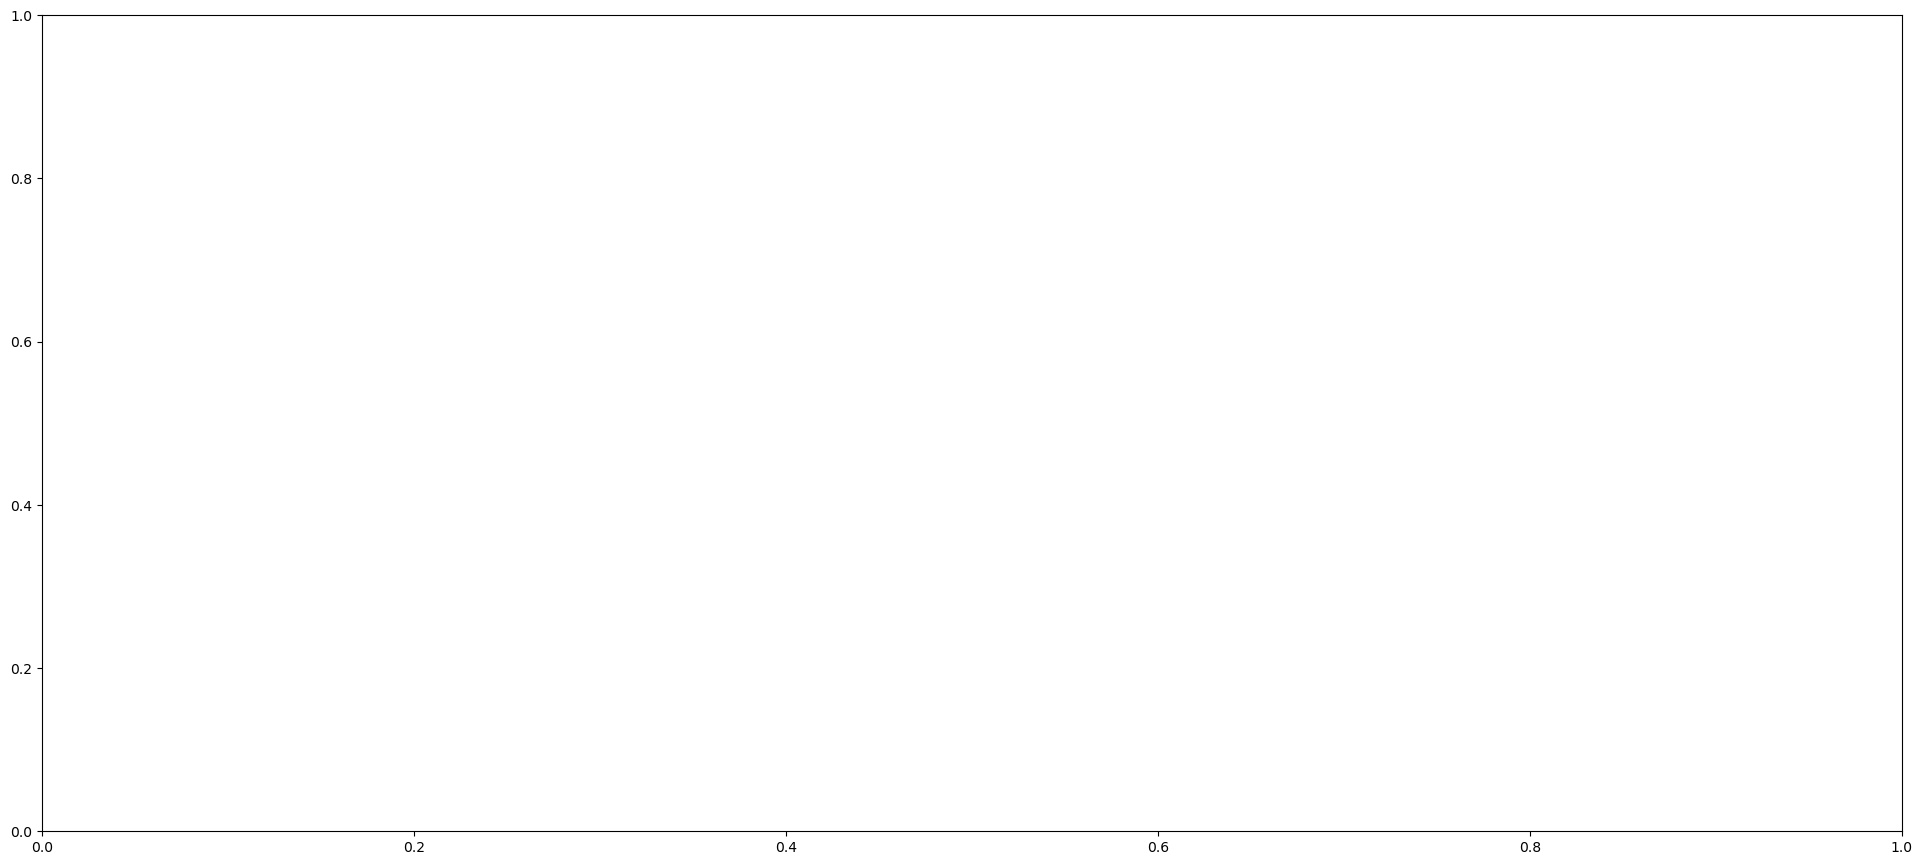

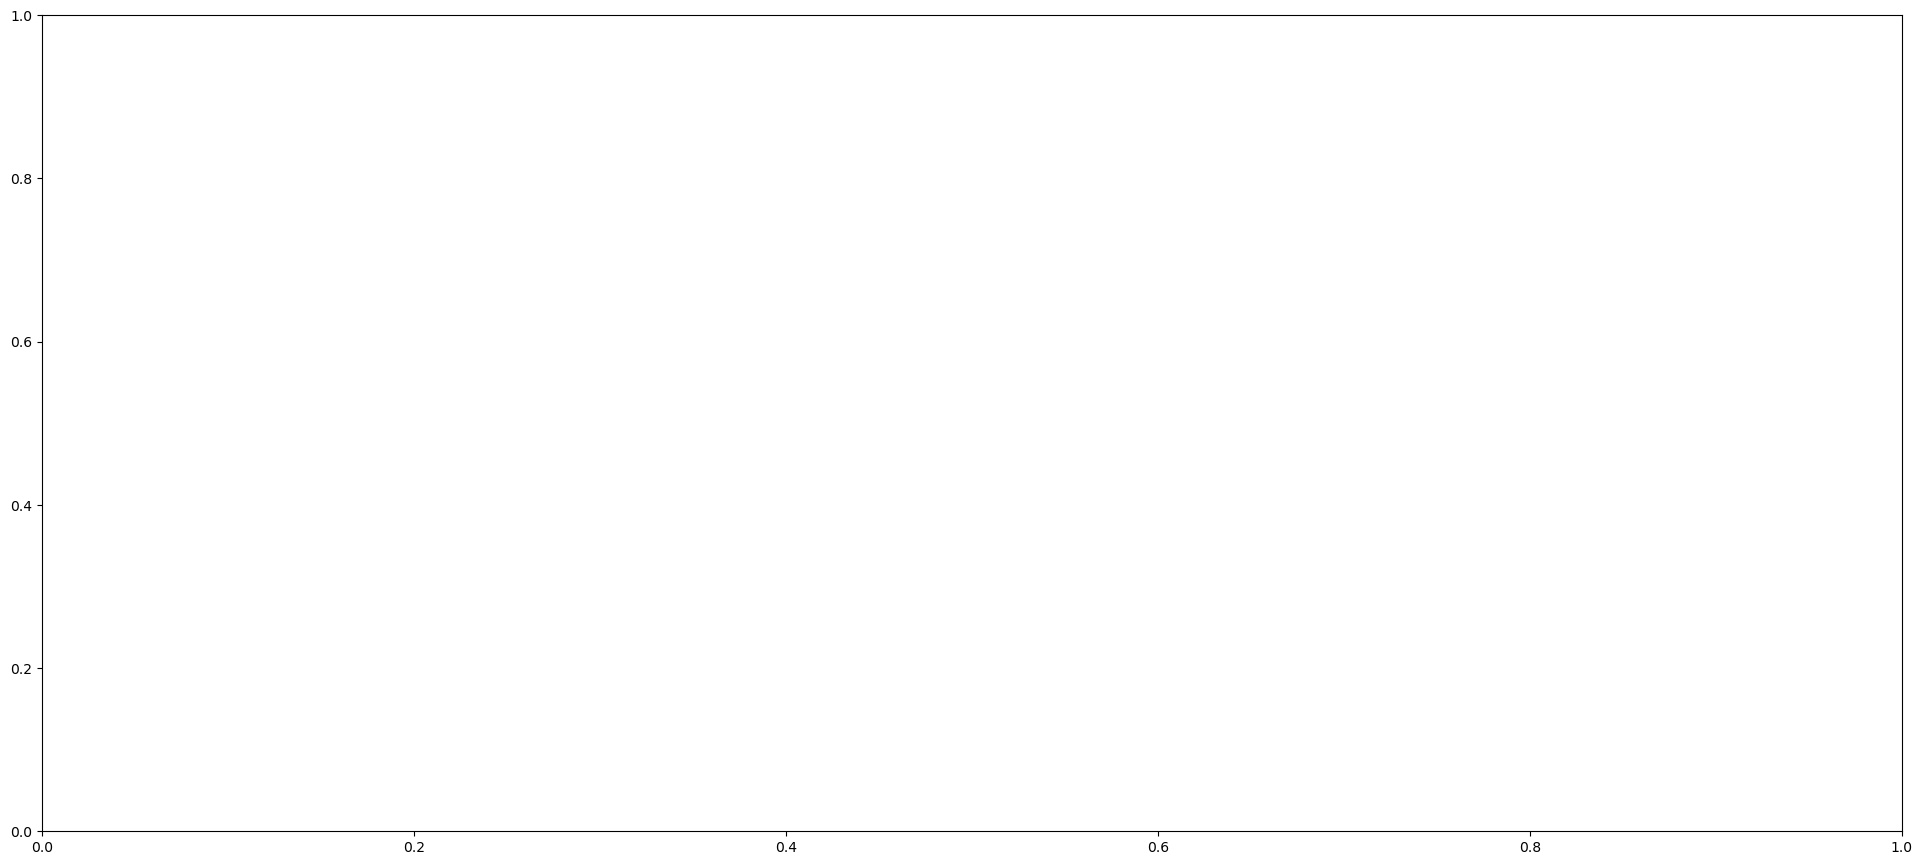

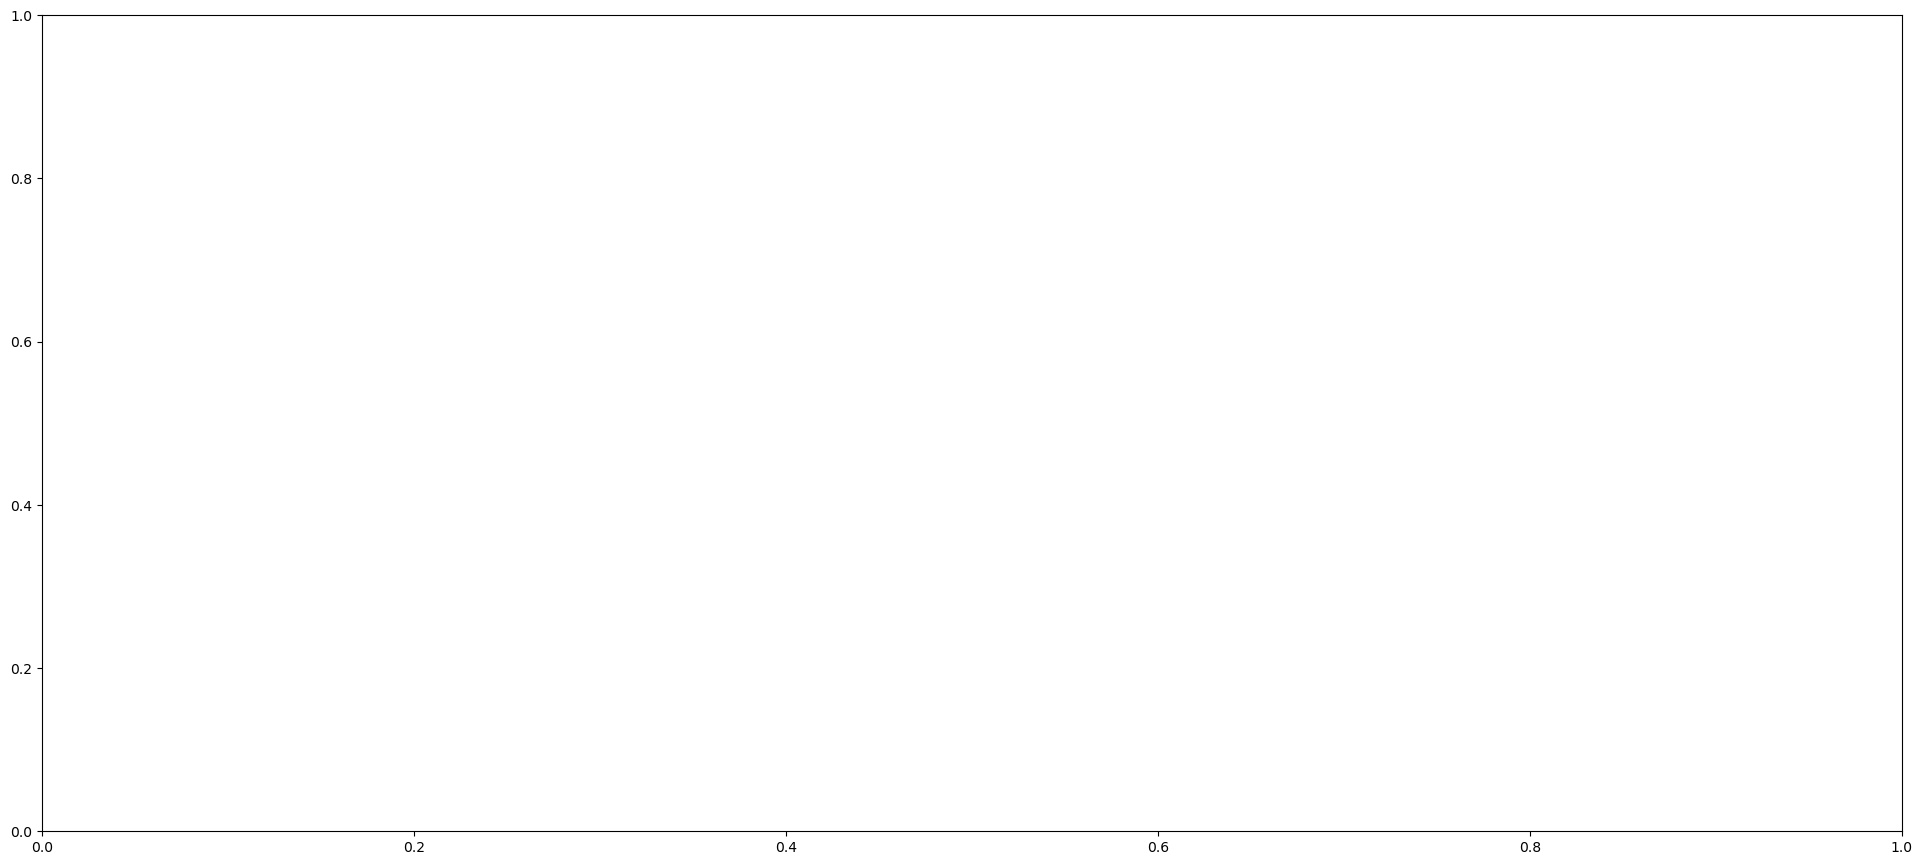

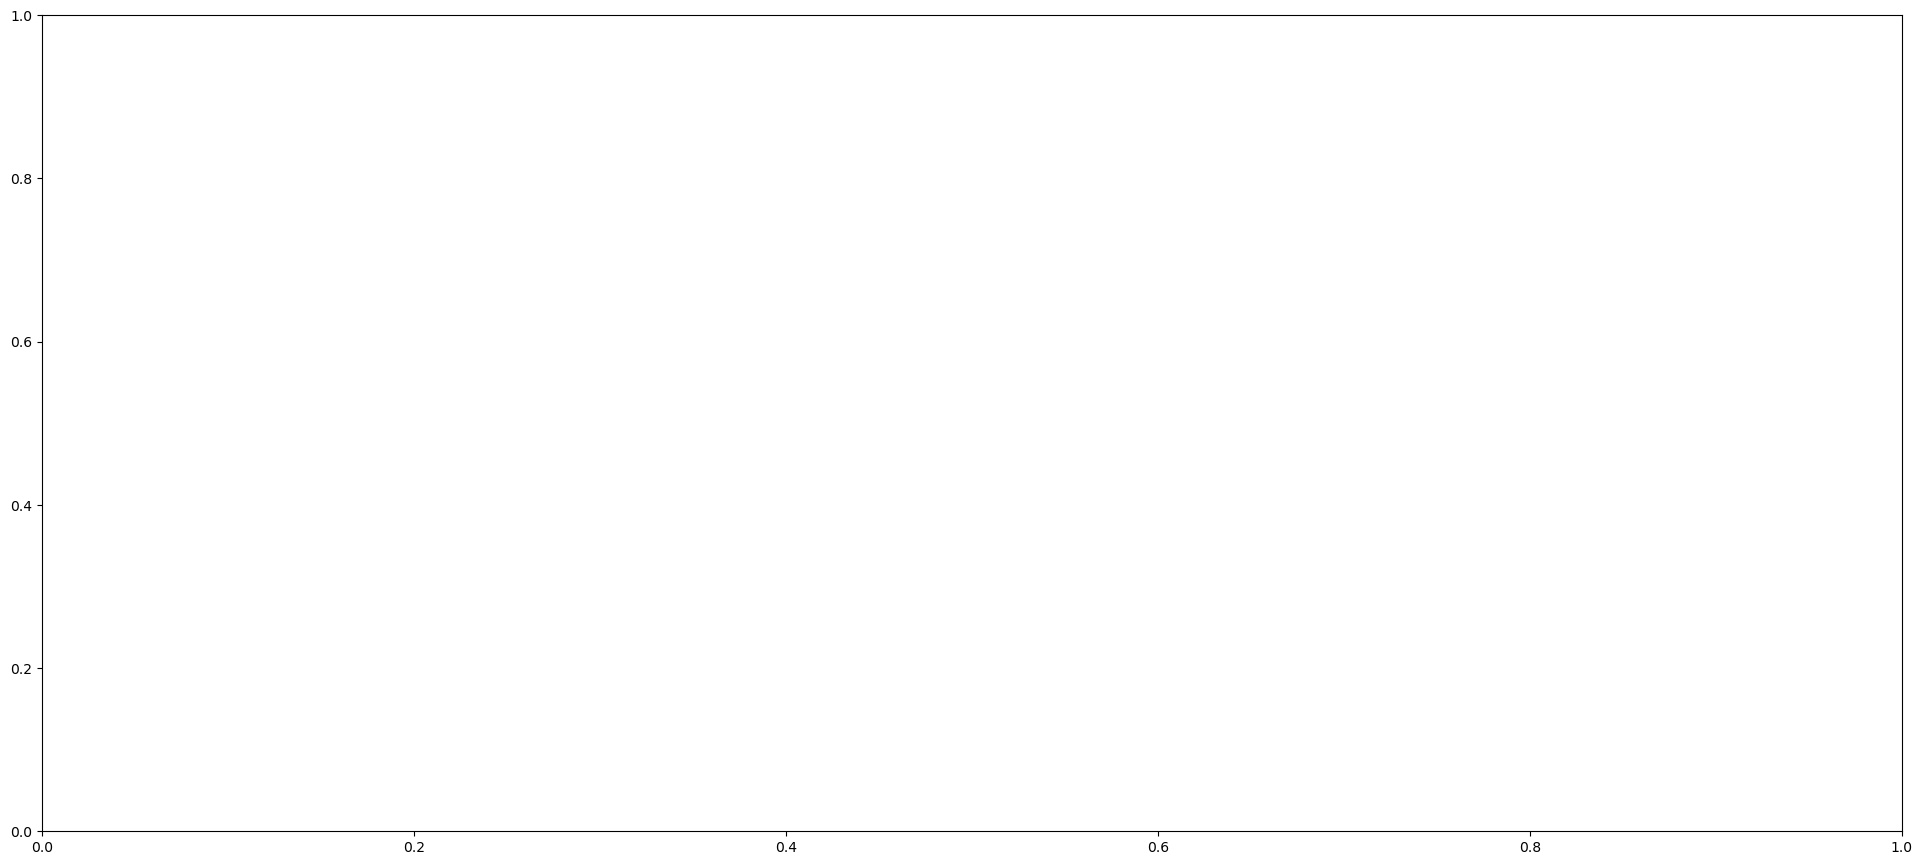

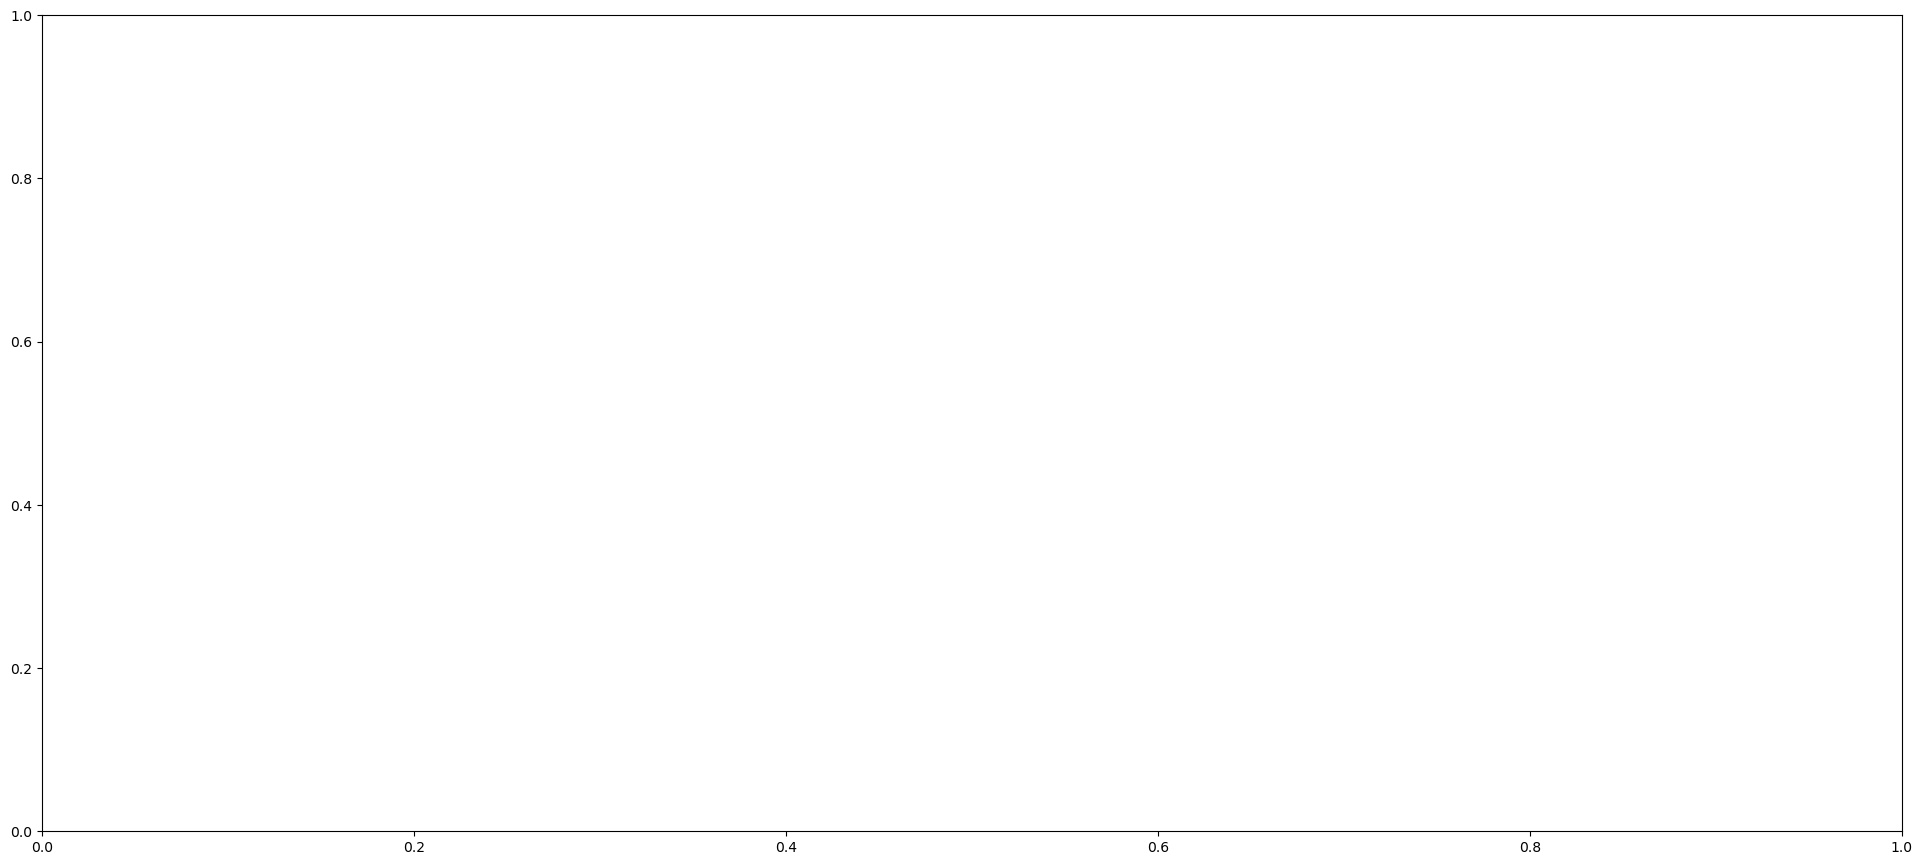

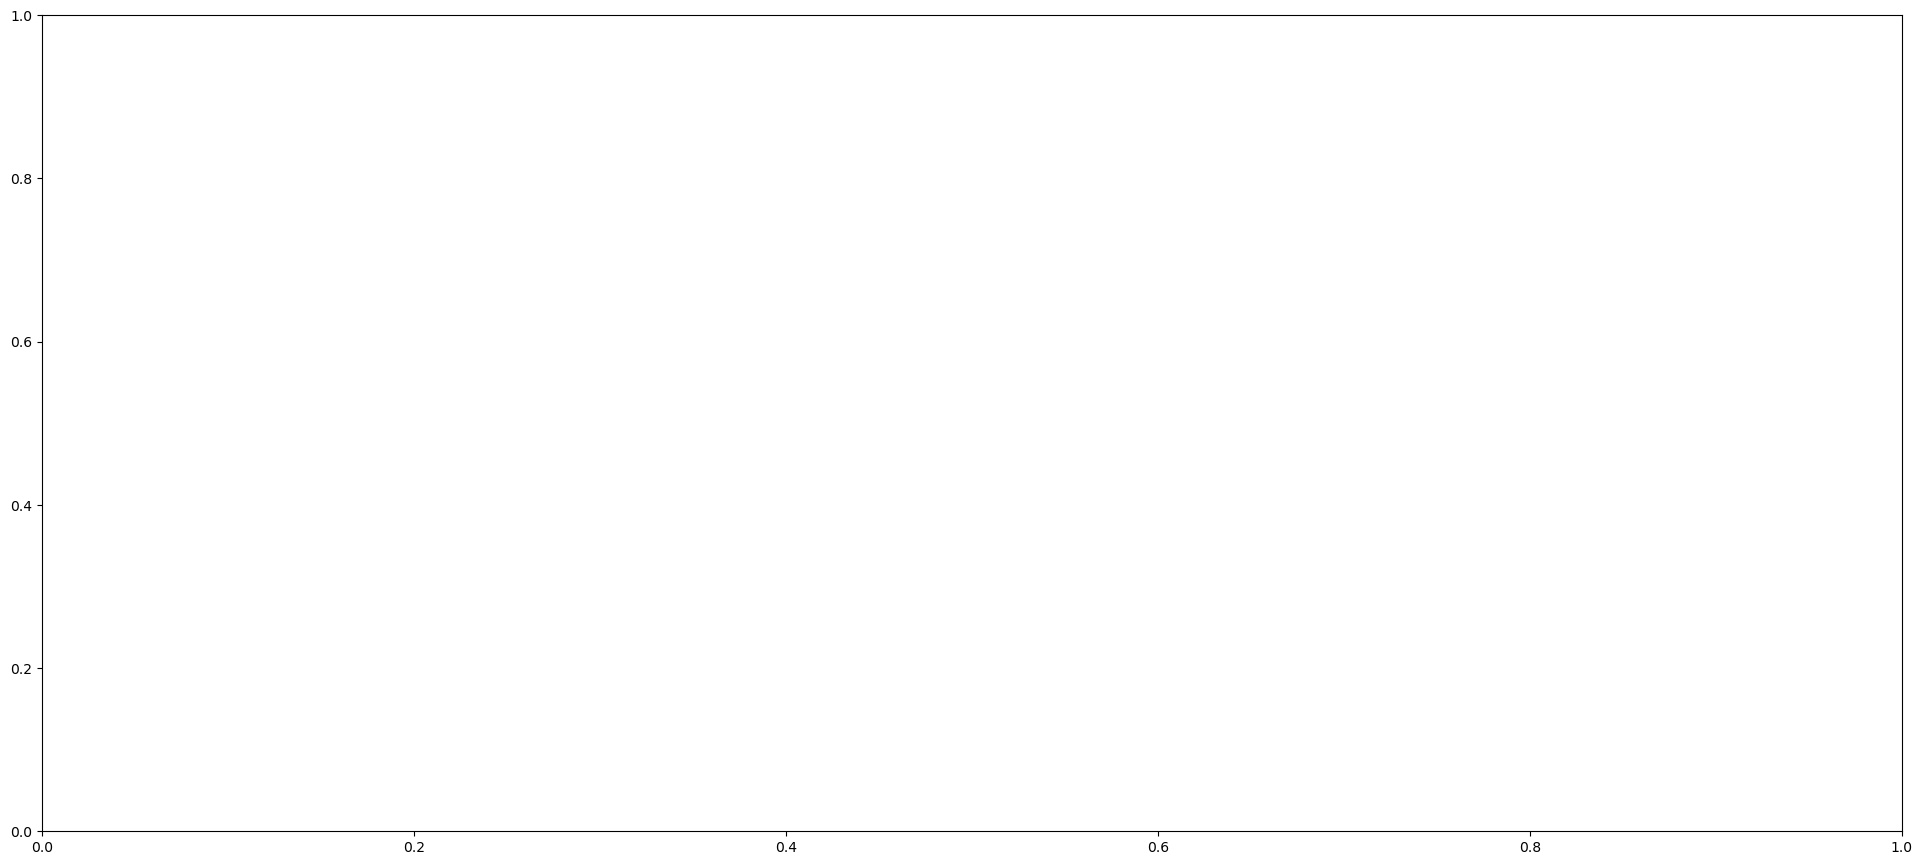

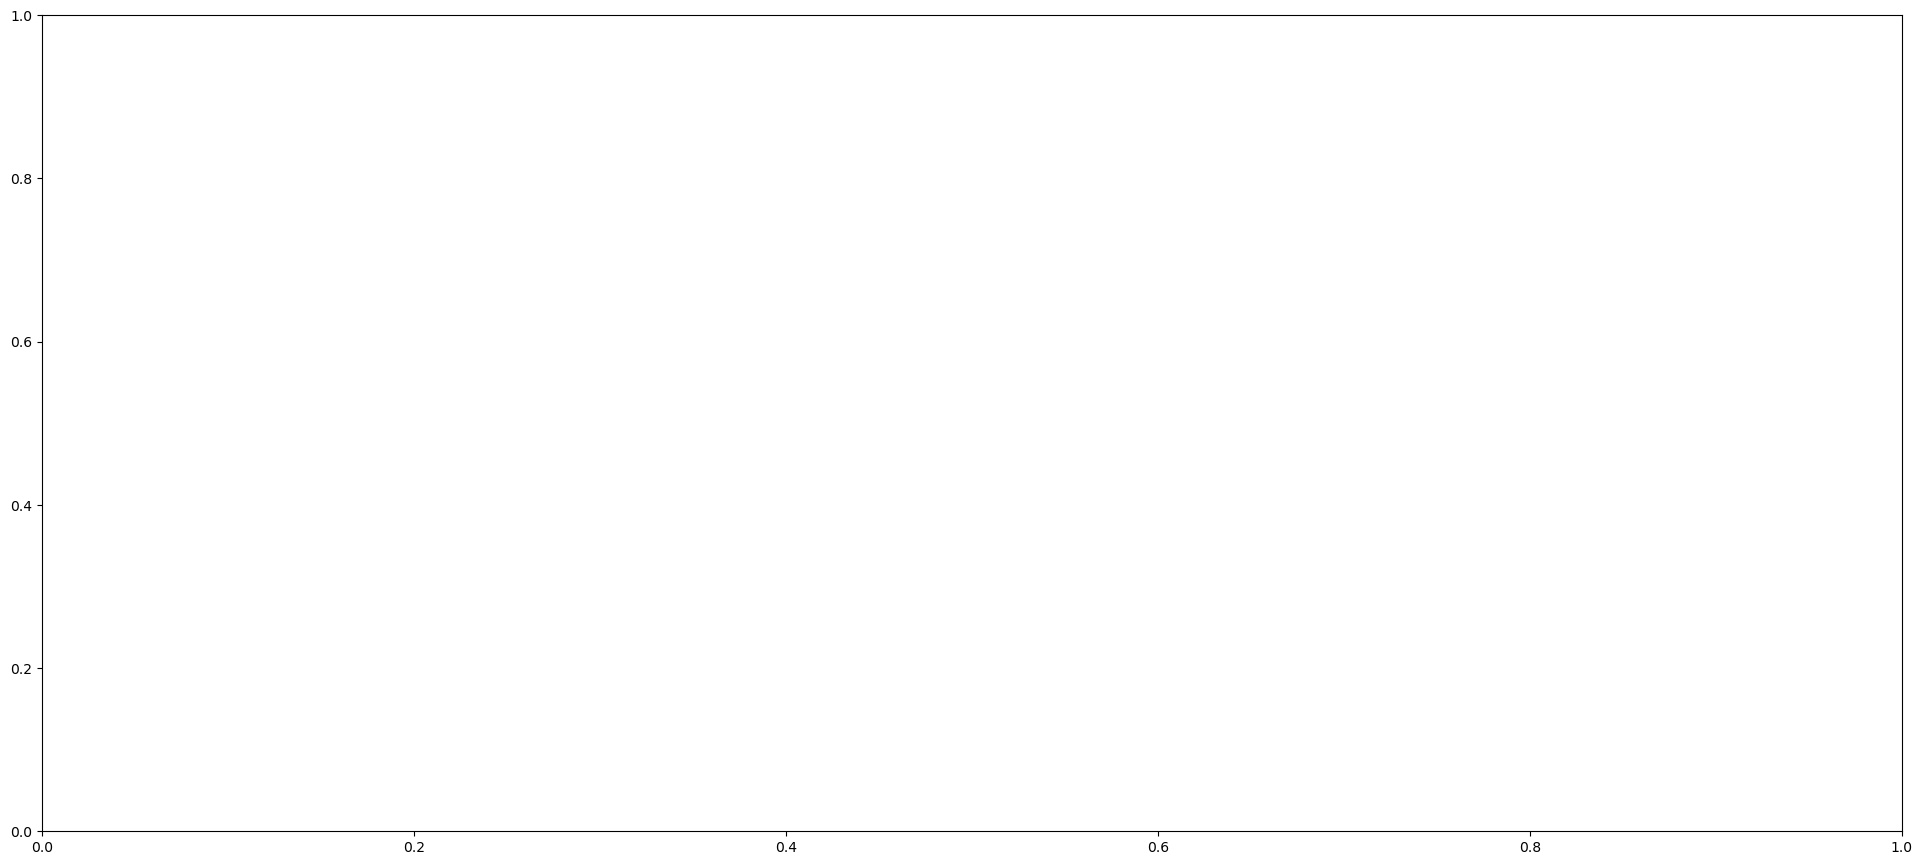

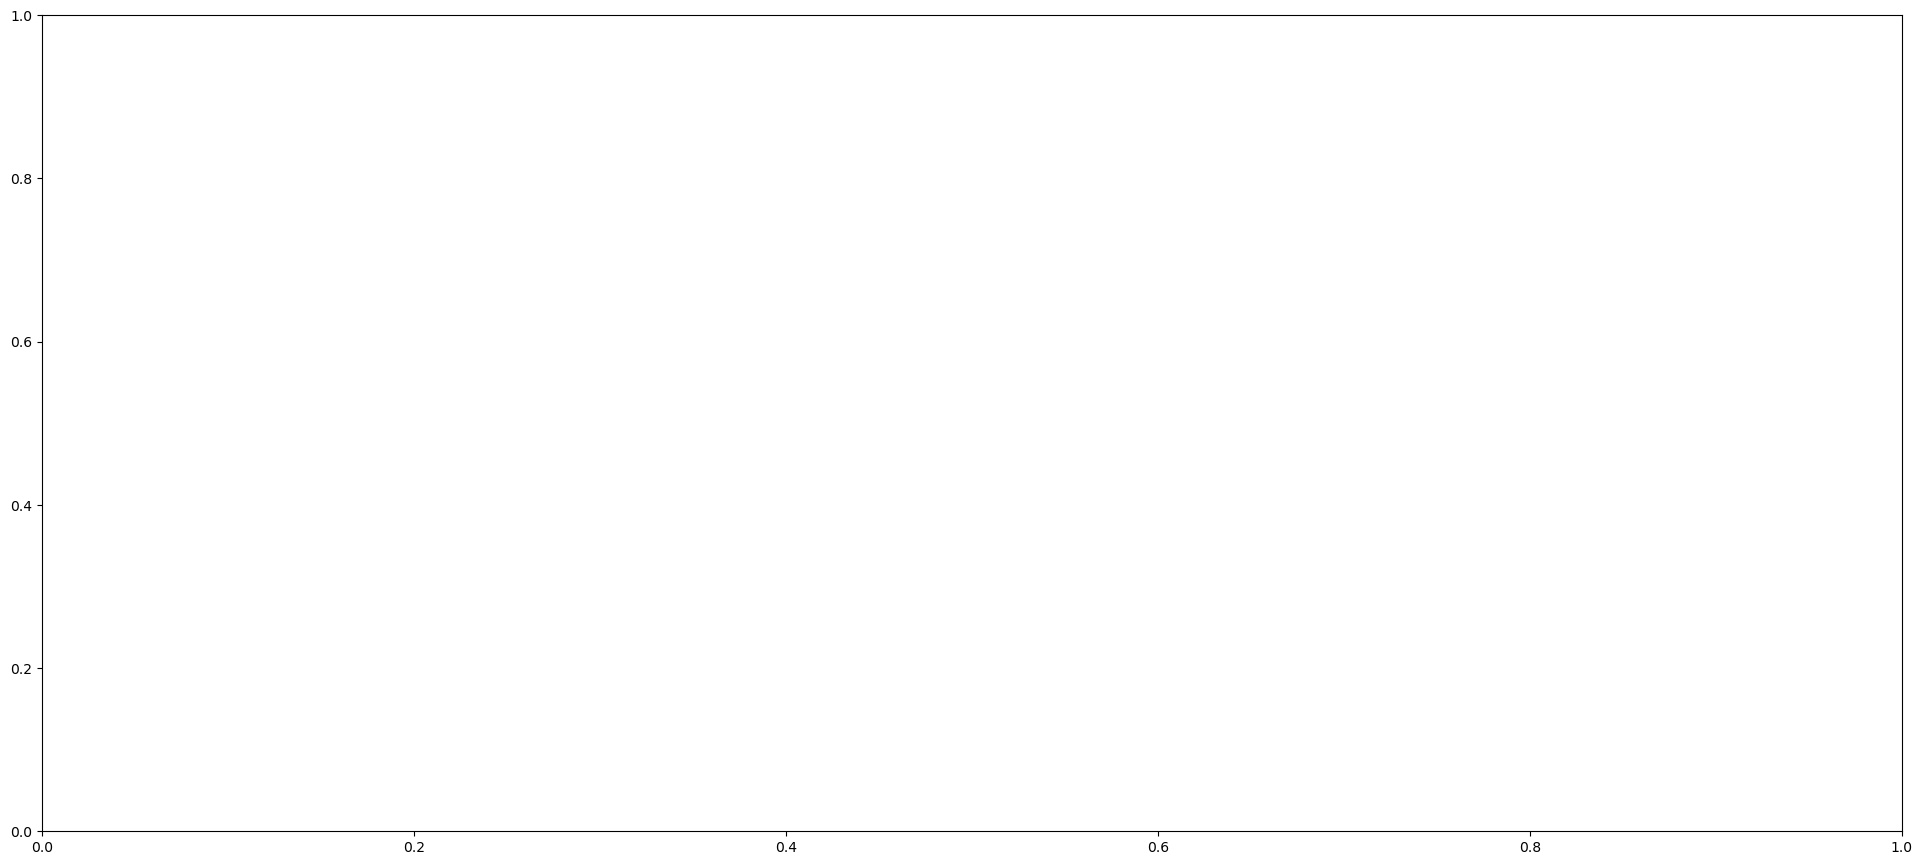

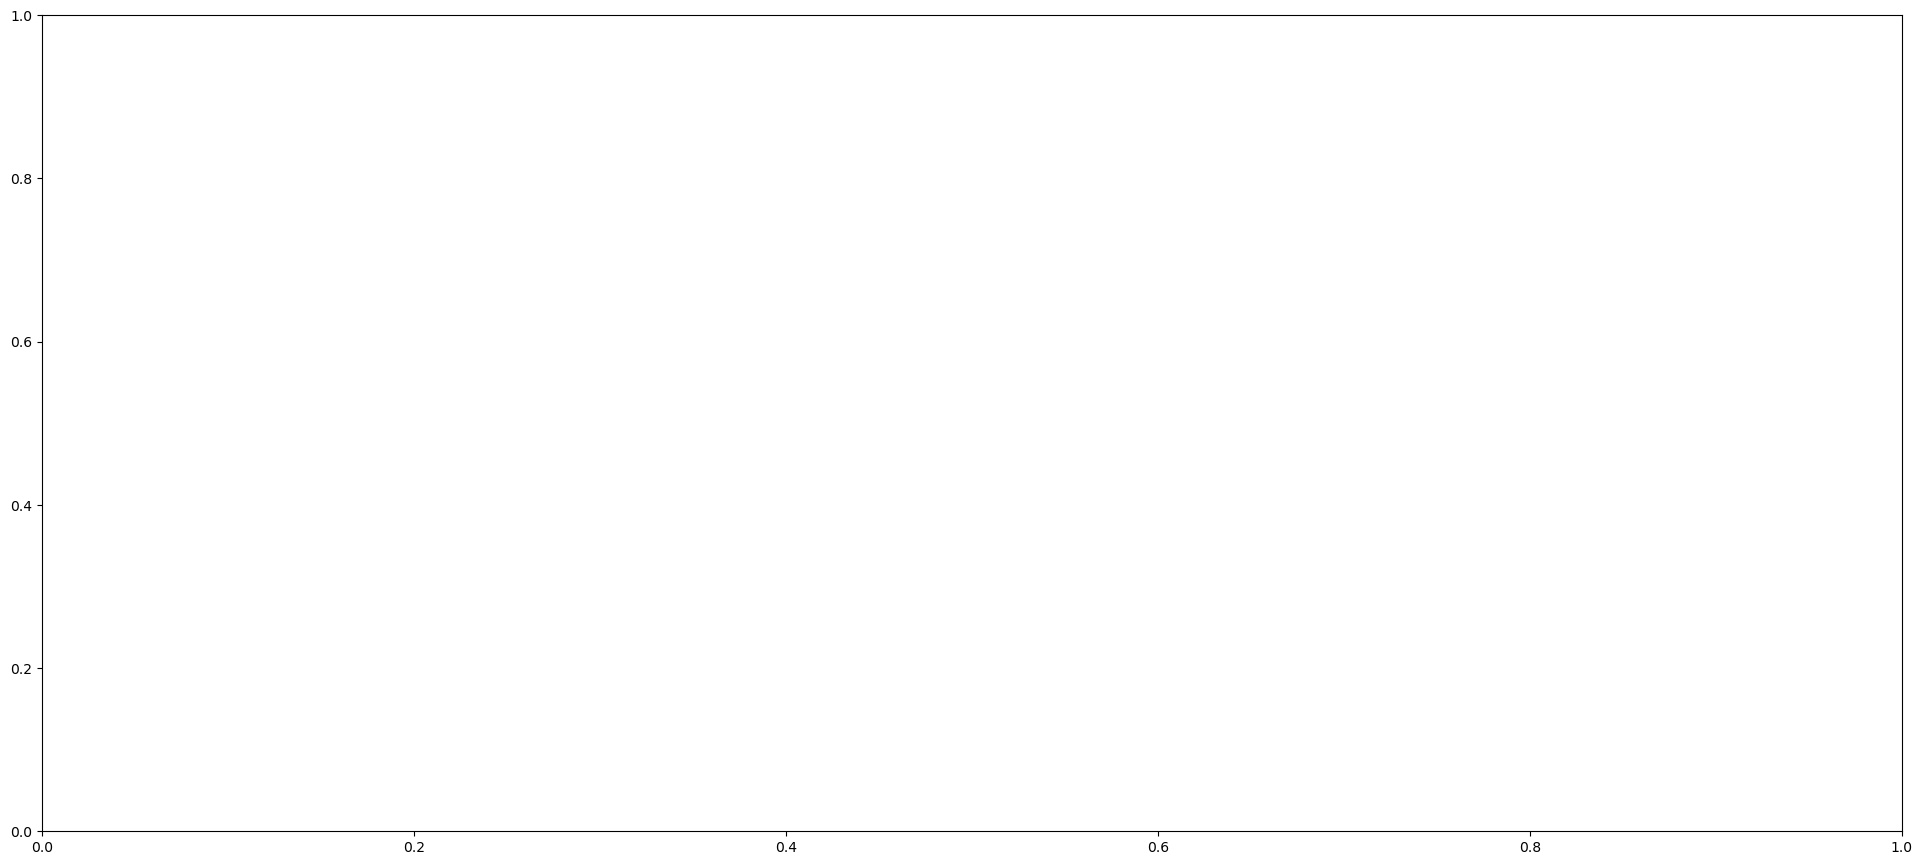

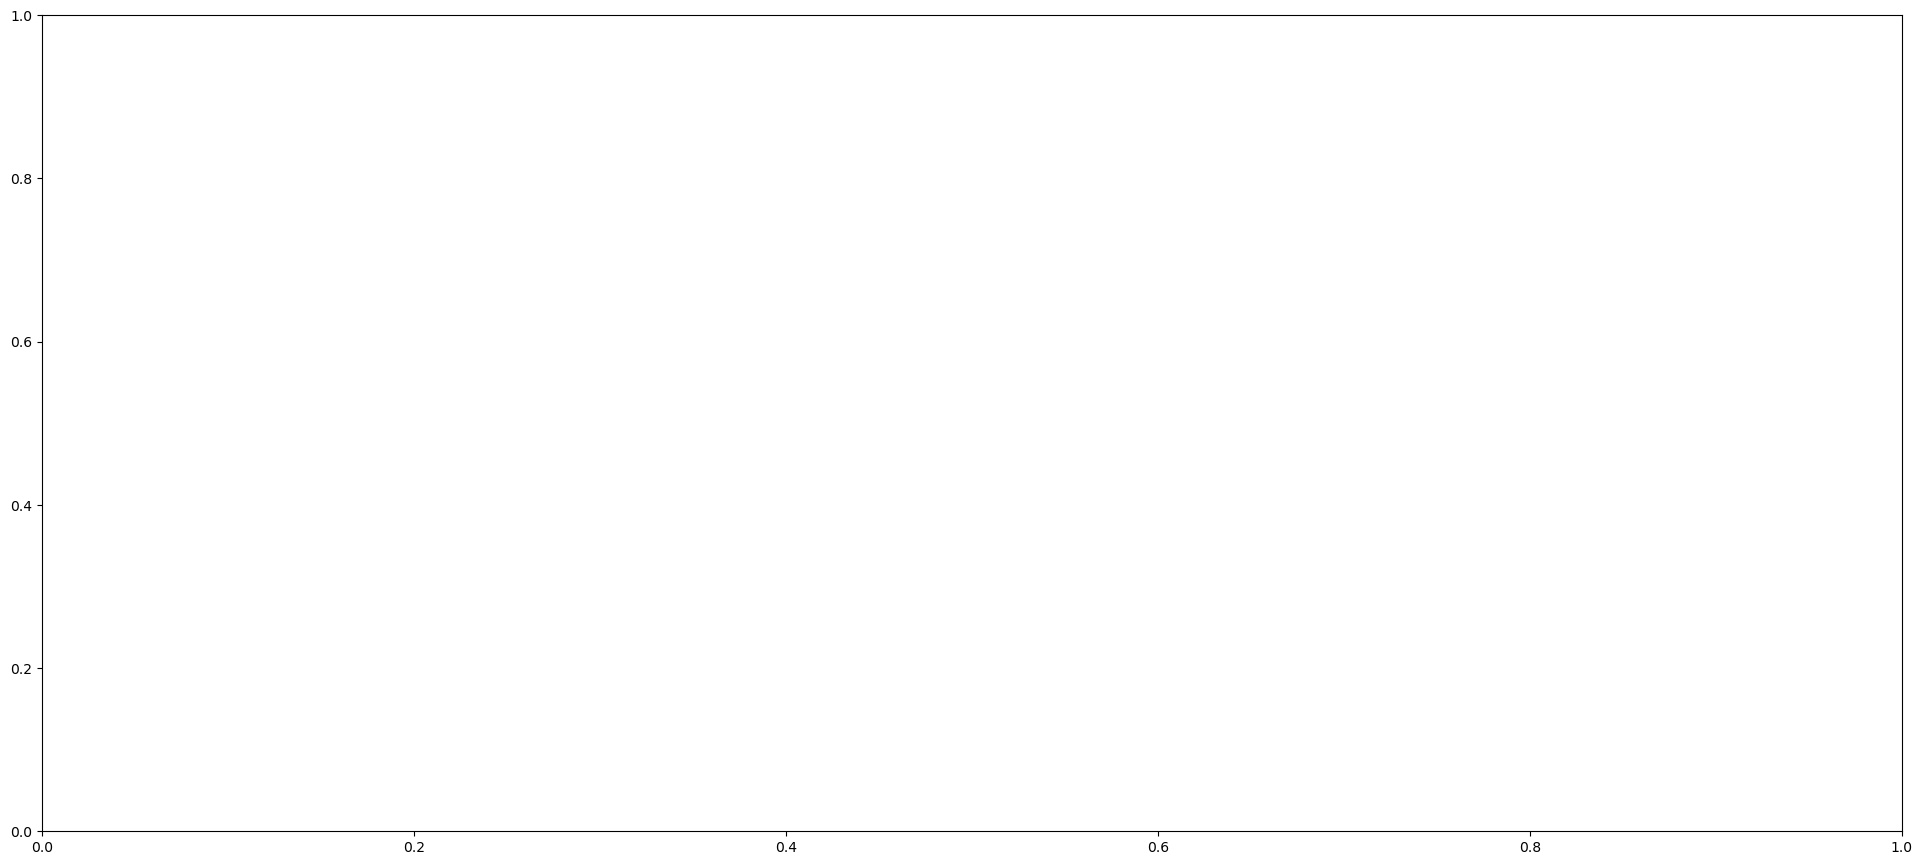

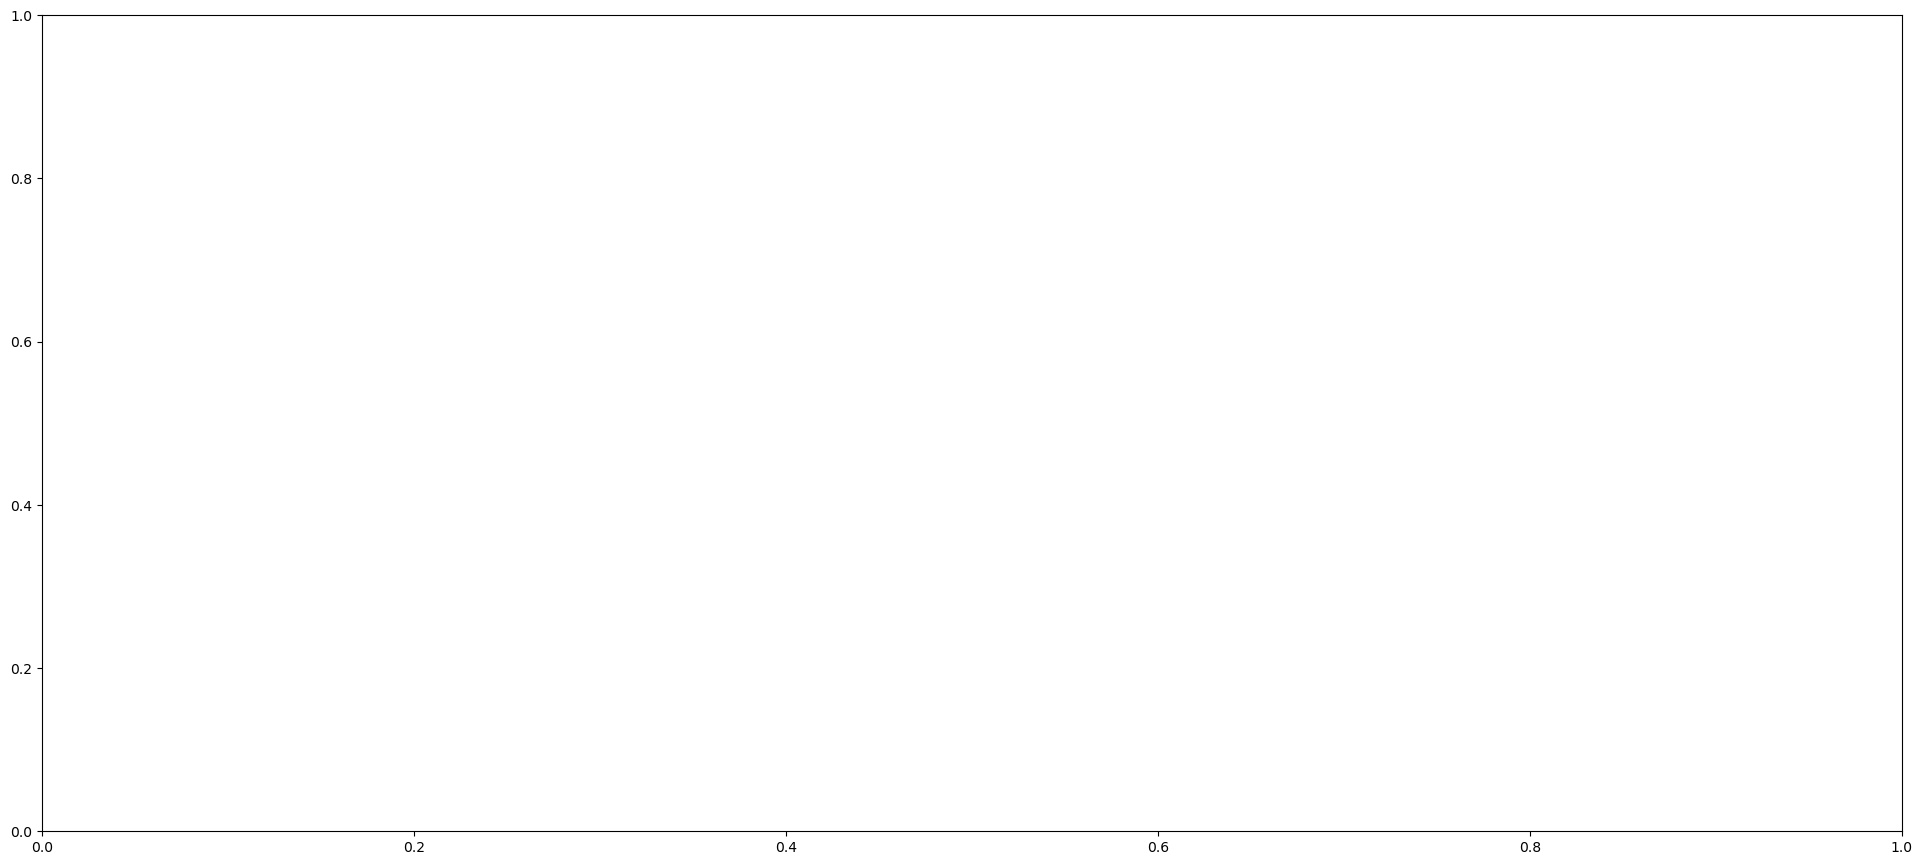

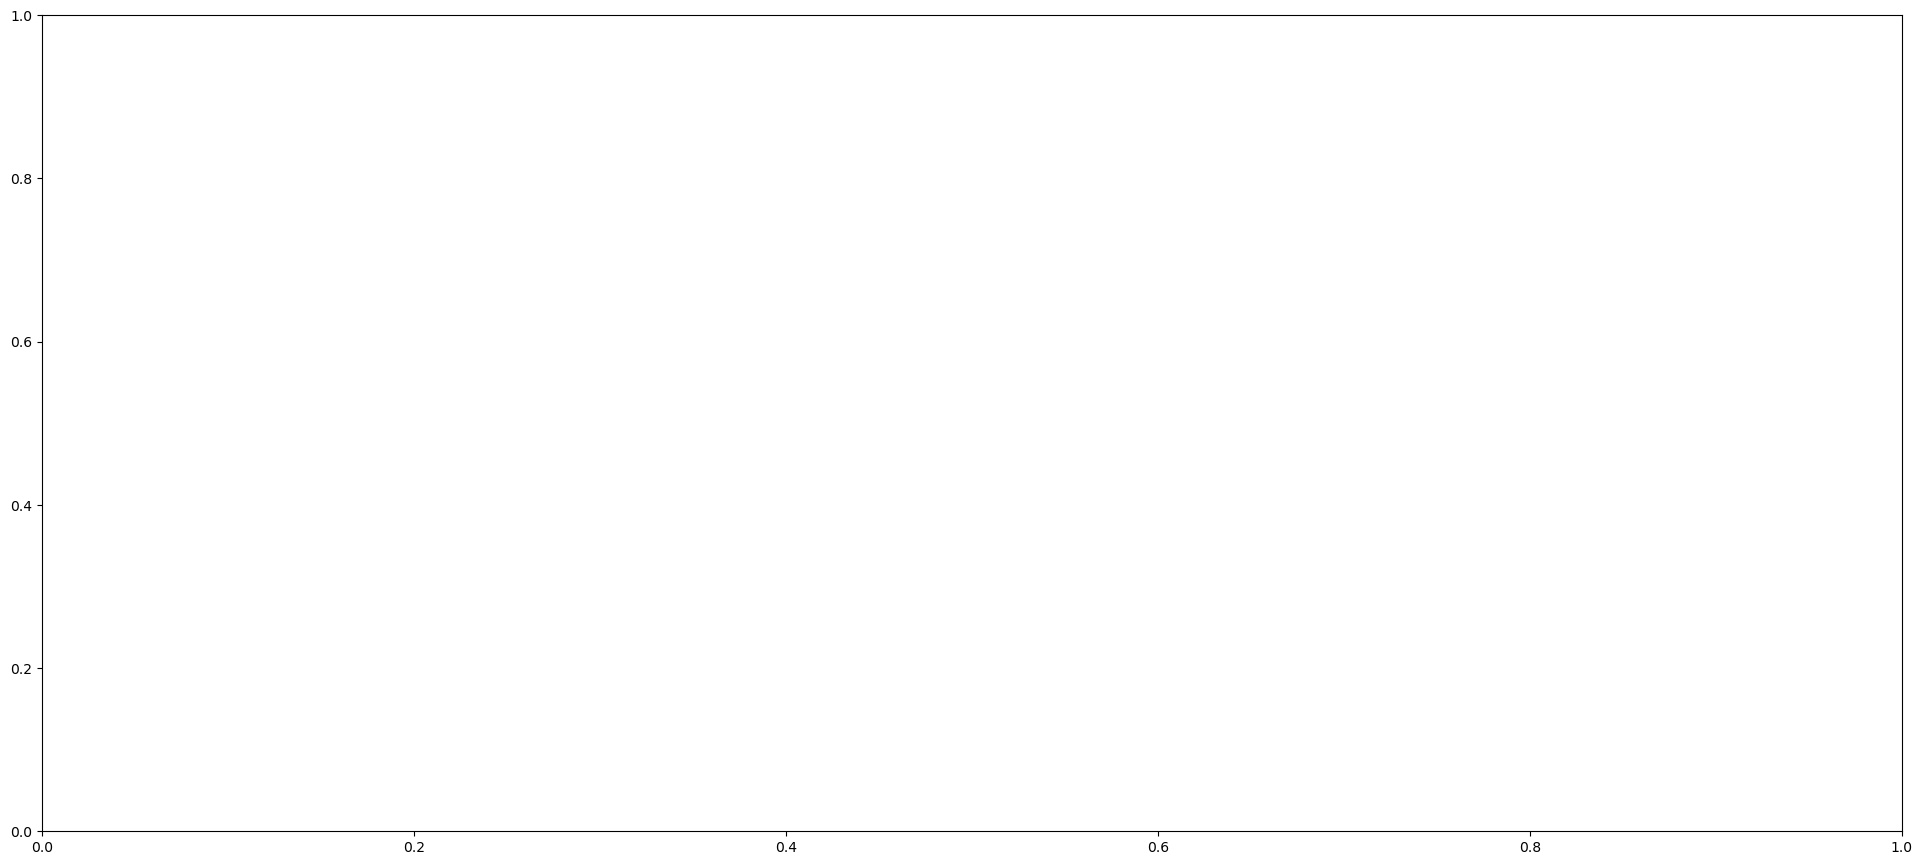

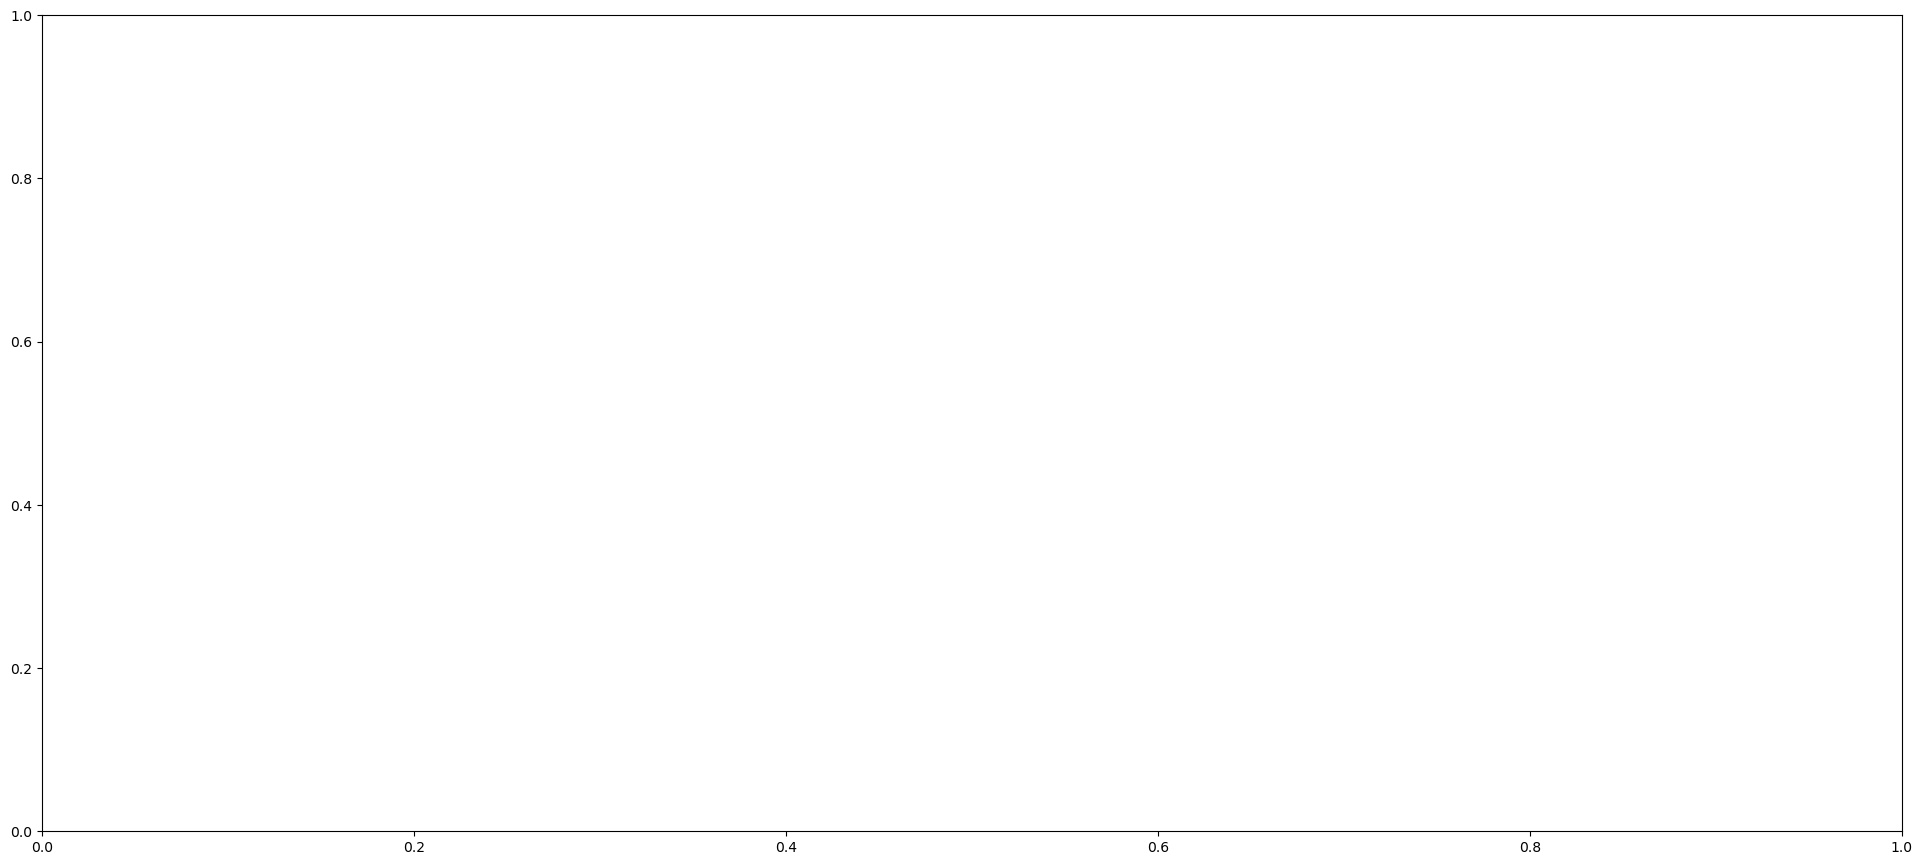

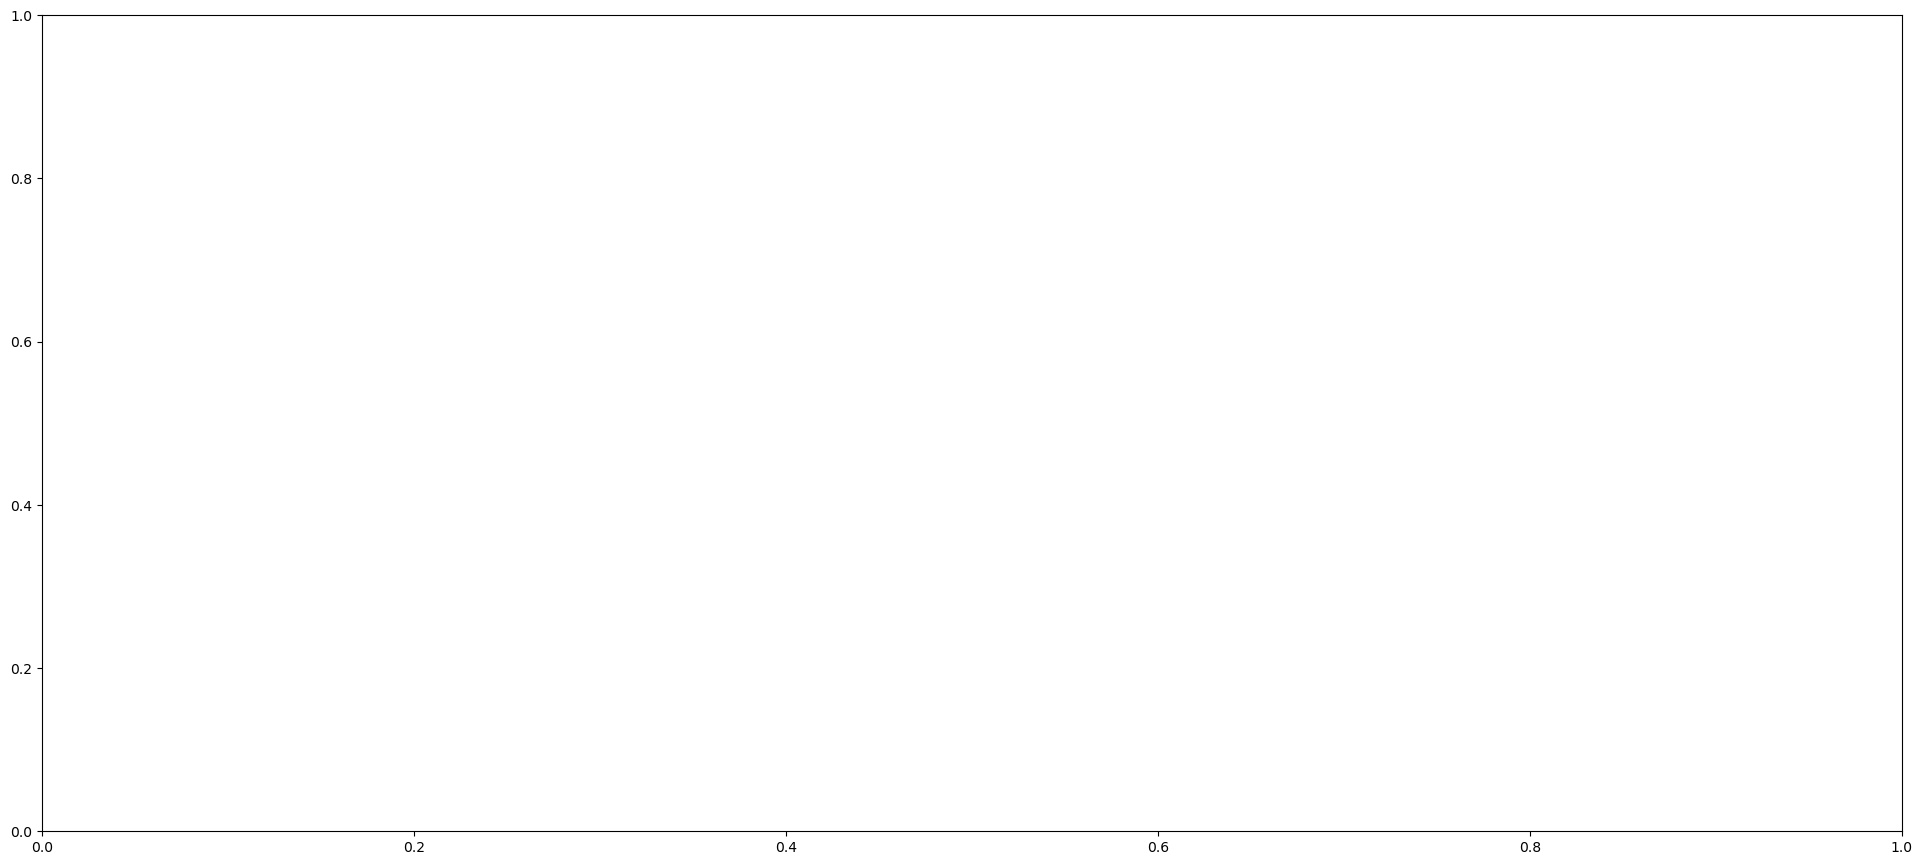

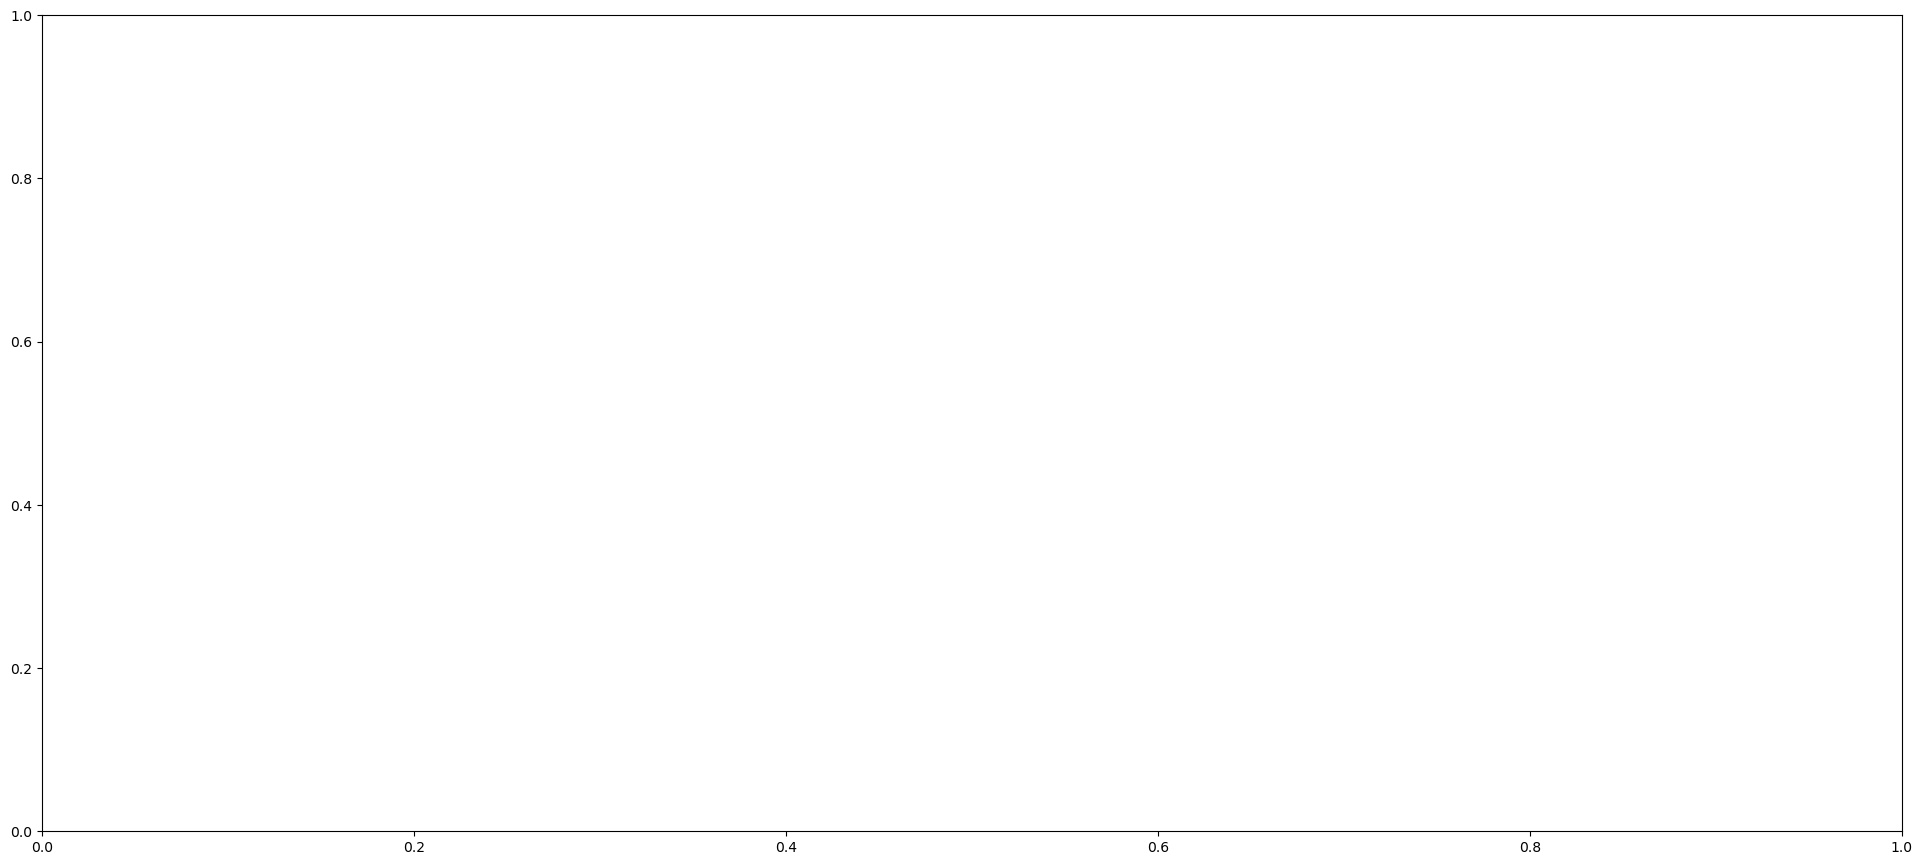

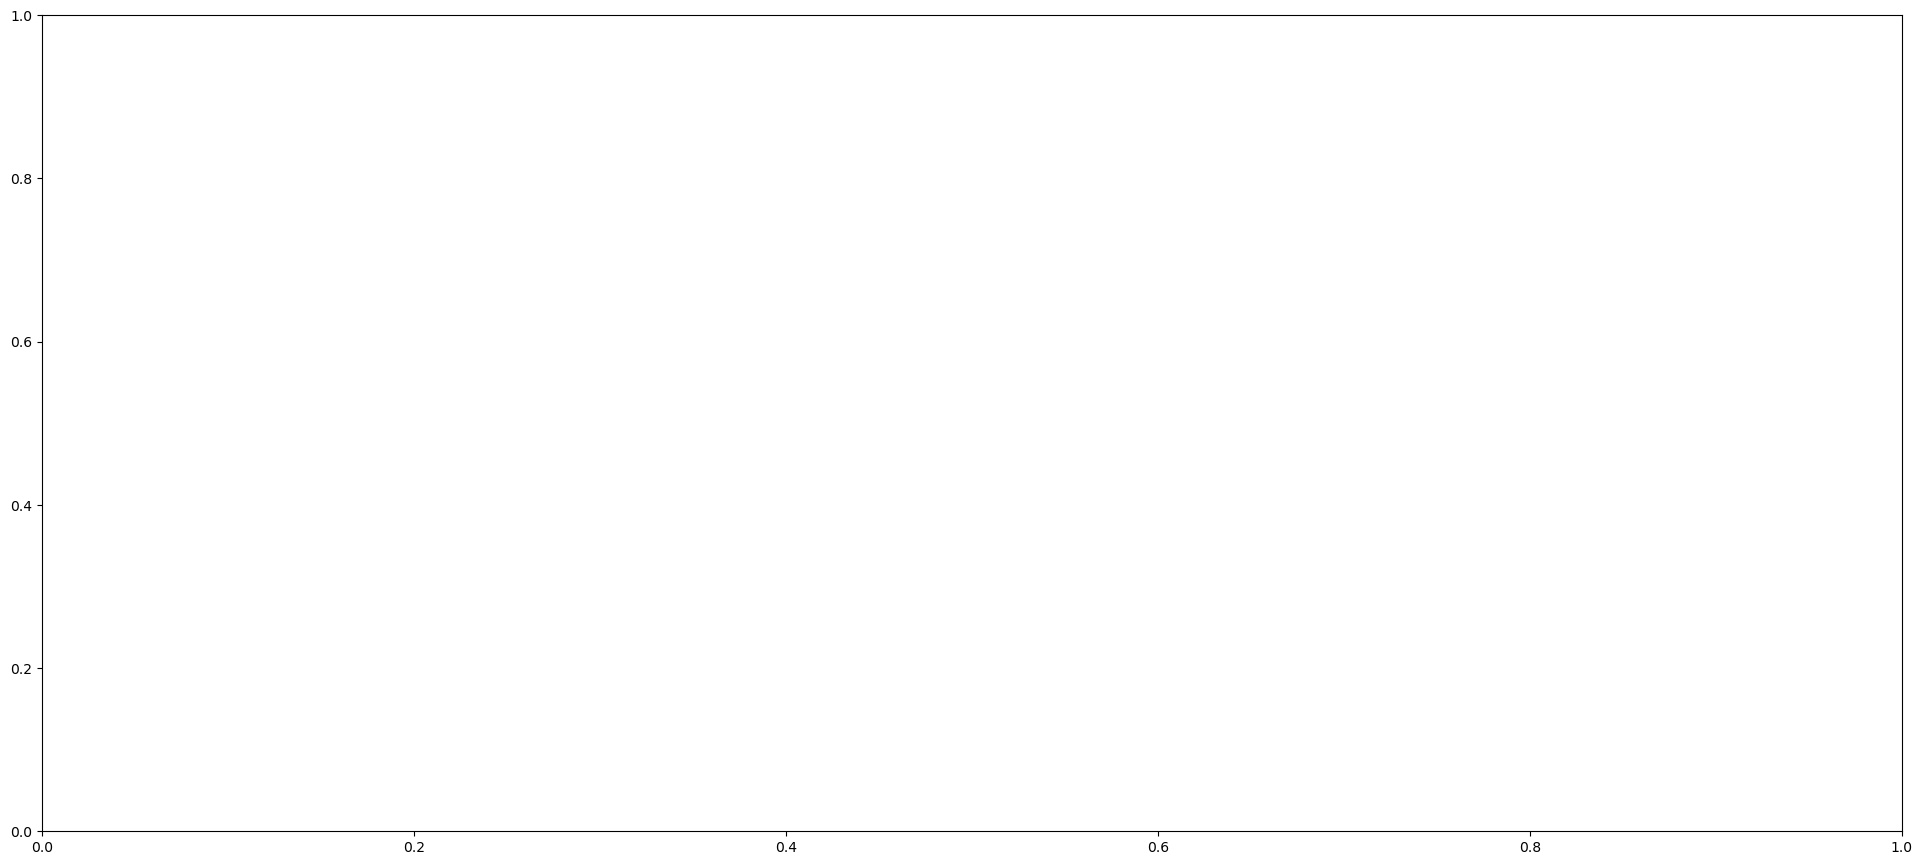

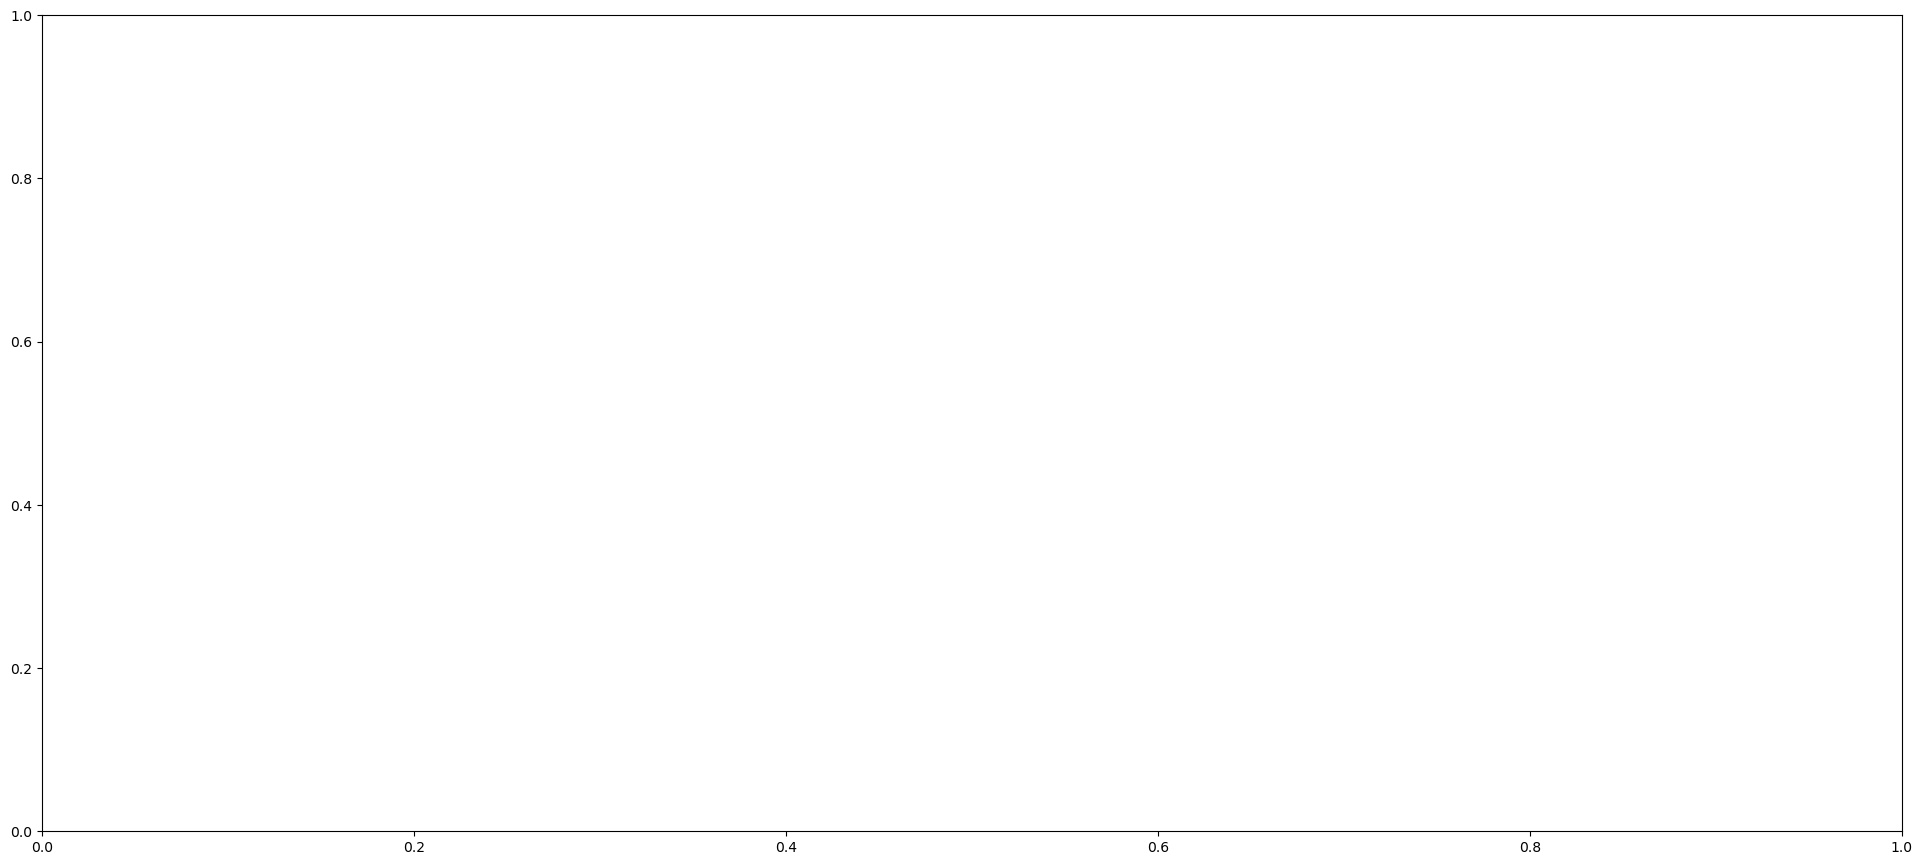

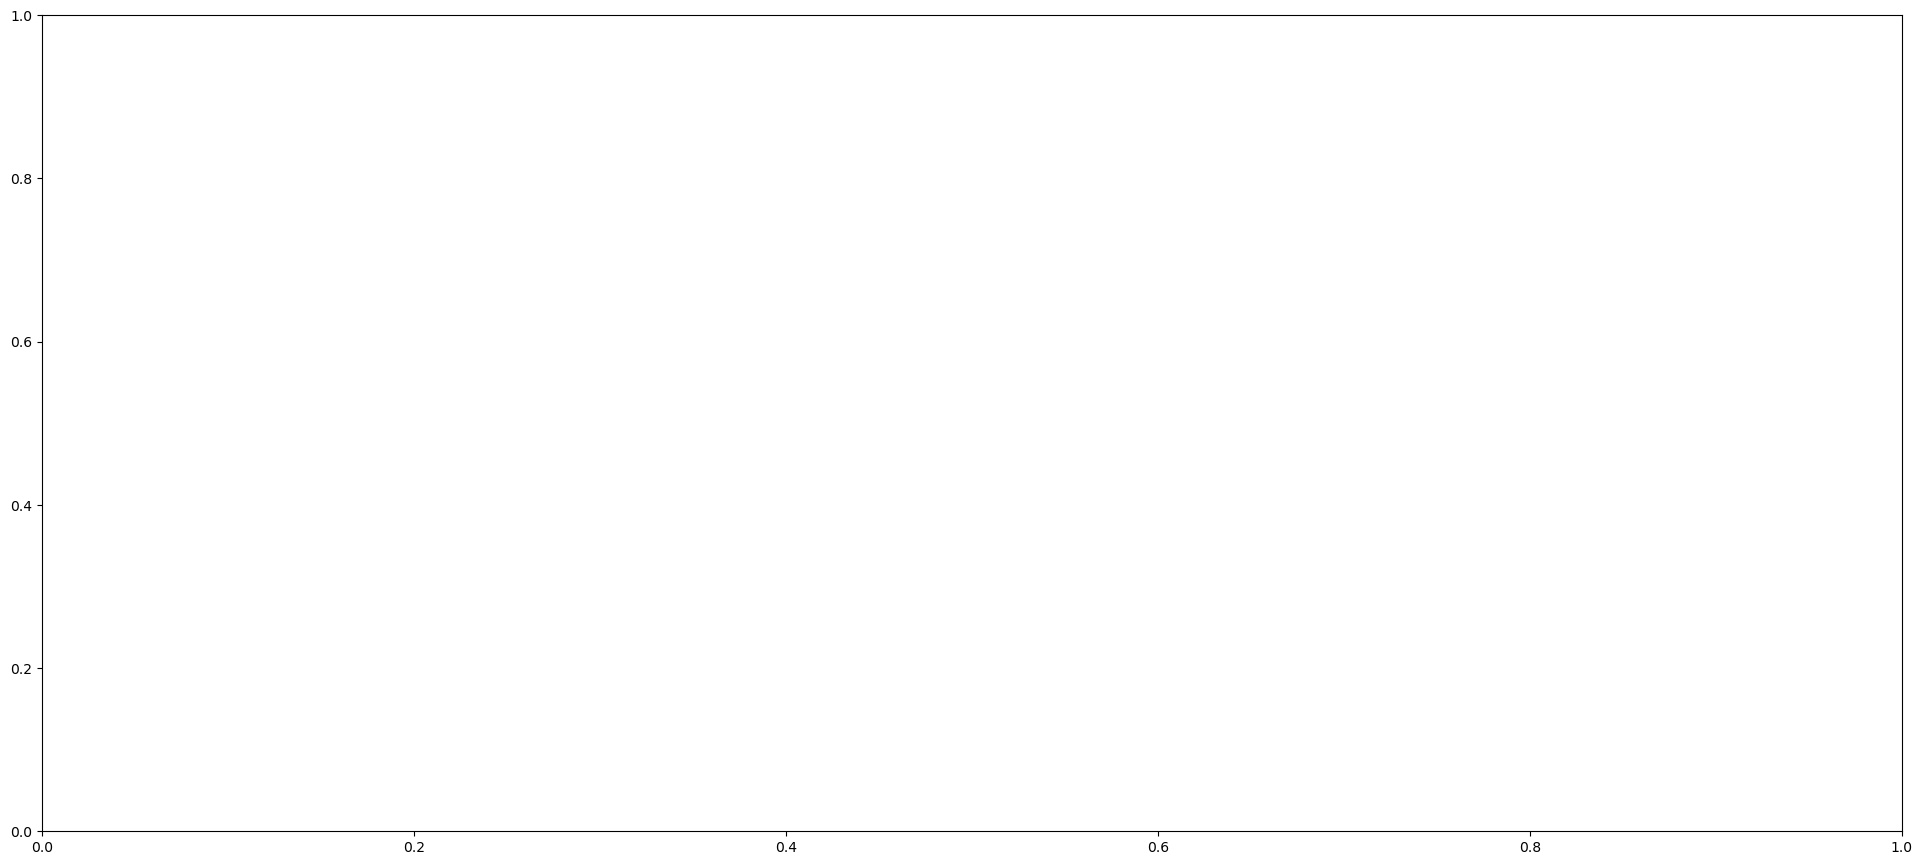

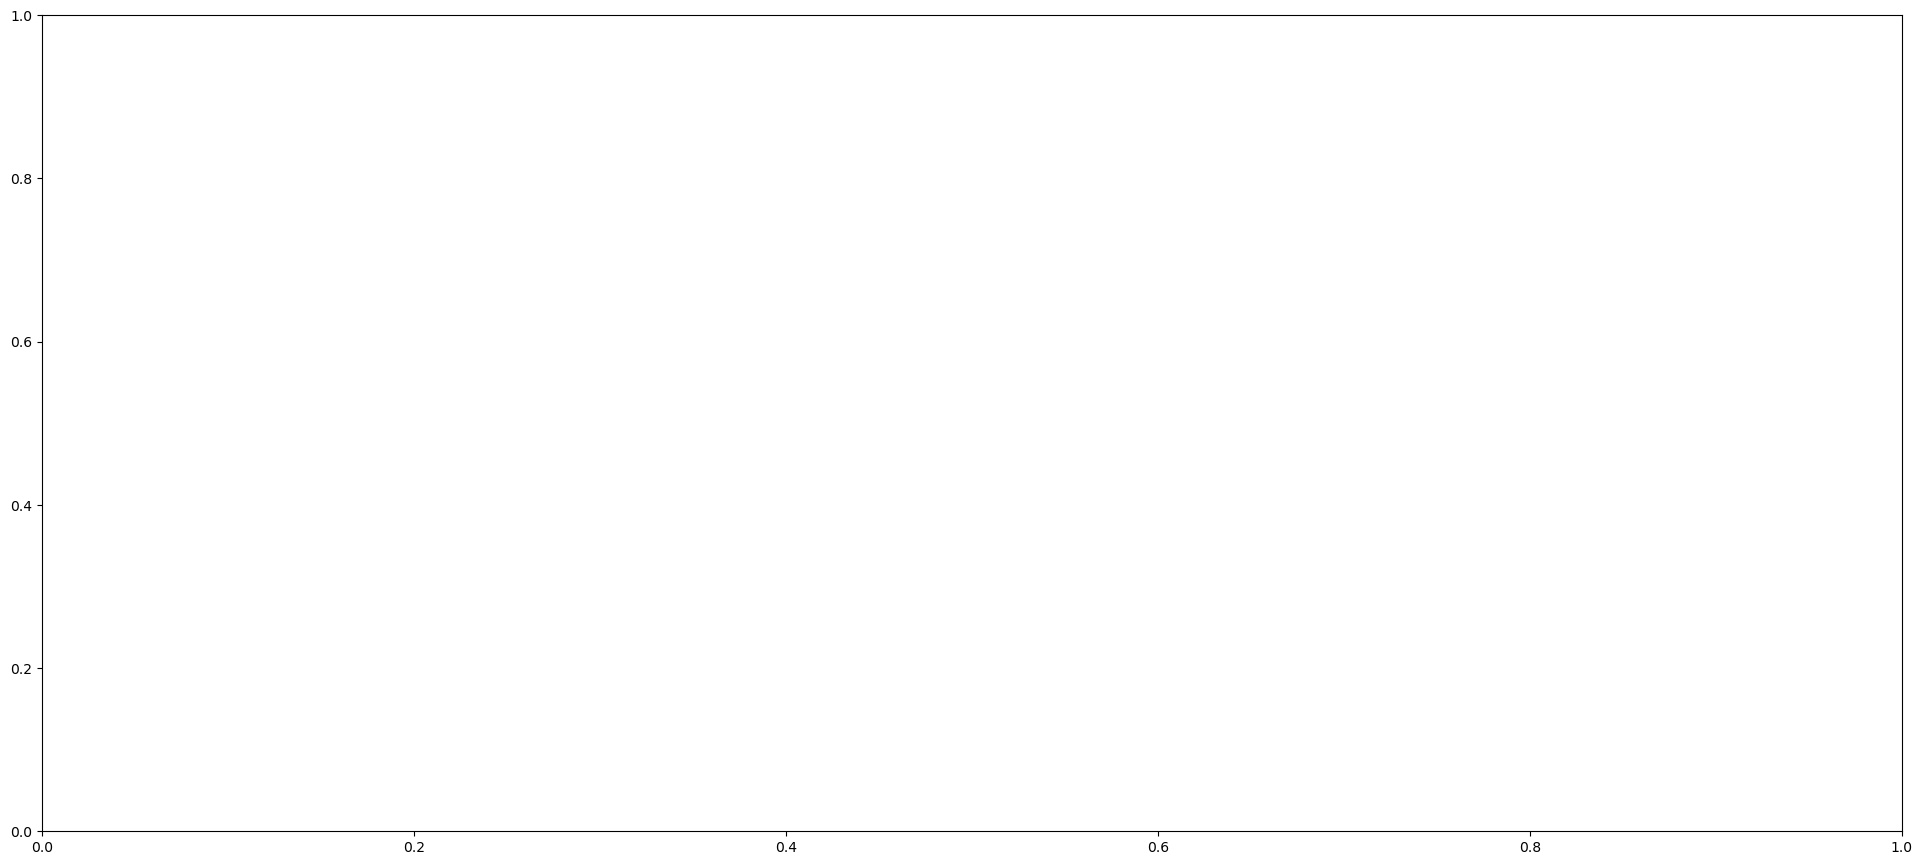

In [19]:
find_all_penalties()

Here are the explanations for the NFL penalty codes you asked about:

- `FMM`: Face Mask (Major). This penalty is called when a player grabs an opponent's face mask in a harmful manner. It results in a 15-yard penalty and an automatic first down if committed by the defense.
- `IBW`: Illegal Block in the Back. This penalty is called when a player hits an opponent in the back outside of close line play. It results in a 10-yard penalty.
- `IDT`: I couldn't find a specific match for this code. It might be best to refer to the official NFL rulebook or contact NFL operations for more information.
- `UNS`: Unsportsmanlike Conduct. This penalty is called for various actions that violate the rules of sportsmanship, such as abusive language or gestures, excessive taunting, or unnecessary physical contact with an official.
- `POK`: I couldn't find a specific match for this code. It might be best to refer to the official NFL rulebook or contact NFL operations for more information.
- `OH`: Offensive Holding. This penalty is called when an offensive player uses his hands, arms, or other parts of his body to prevent a defensive player from pursuing the play. It results in a 10-yard penalty.
- `ITK`: I couldn't find a specific match for this code. It might be best to refer to the official NFL rulebook or contact NFL operations for more information.
- `UNR`: Unnecessary Roughness. This penalty is called when a player uses unnecessarily violent methods to tackle or block another player.
- `DOF`: Delay of Game, Defense. This penalty is called when a defensive player uses tactics that simulate the start of a play (like abrupt movements) to cause an offensive player to false start. It results in a 5-yard penalty.
- `UNRd`: Unnecessary Roughness, Defense. This is similar to Unnecessary Roughness but specifically called on a defensive player.
- `TRP`: Tripping. This penalty is called when a player uses his leg or foot to trip an opponent. It results in a 10-yard penalty.
- `ILF`: Illegal Formation. This penalty is called when the offensive team does not have at least seven players on the line of scrimmage at the snap, among other formation issues. It results in a 5-yard penalty.
- `UNSd`: Unsportsmanlike Conduct, Defense. This is similar to Unsportsmanlike Conduct but specifically called on a defensive player.
- `POK;OH`, `POK;ILF`, `UNRd;ILF`, `FCI;OH`, `OH;IBW`, and `POK;UNR` seem to indicate multiple penalties on a single play. For example, `POK;OH` would mean that both Poking Eyes and Offensive Holding were called on the same play.
- The rest of the codes (`CHB`, `OFK`, `RNK`, `HC`, `KCI`, `UOHd`, `ILH`, `IDP`, `TRPd`, `WED`, `IBB`, `DSQd`, and `IDK`) don't have clear matches based on my current knowledge and available resources.

Please note that these are general explanations and actual enforcement may vary based on specific game situations and league rules. For the most accurate information, it's always best to refer to the official NFL rulebook or contact NFL operations directly.

In [146]:
game_id, play_id = 0, 0
penalties = ["FMM"]#, "IBW", "IDT", "OH", "POK", "UNS"]
penalty = random.choice(penalties)

def play_saved(penalty):
  files = glob.glob(os.path.join("animations/"+penalty+"/", "*.mp4"))
  print(files)
  def getinfo(s):
    if ".mp4" in s:
      s = s.split("/")[-1]
      nm = s.split("_")
      return int(nm[0]), int(nm[1][:-4])
  game_id, play_id = getinfo(random.choice(files))
  with open("animations/"+penalty+"/"+str(game_id)+"_"+str(play_id)+".mp4", "rb") as f:
    video_data = f.read()
    return video_data

HTML("""<video width=800 controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>""".format(b64encode(play_saved(penalty)).decode()))

['animations/FMM/2020091301_2177.mp4']
